In [1]:
#!pip3 install julia
#import julia
#julia.install()

#Temporal fix because this python installation does not have libpython
# from julia.api import Julia
# jl = Julia(compiled_modules=False)
#!pip3 install numpy
# !pip3 install matplotlib

import matplotlib.pyplot as plt
from npodjlEnv import NpodJLEnv
import numpy as np
env = NpodJLEnv("")
env.ver()

0.17

In [2]:
def argmaxQ(Q, s, n_actions):
    if s in Q.keys():
        print("Policy: Greedy")
        print("Q[s]: ", Q[s]) #if Q[s]== 0 then the policy is not really greedy
        return(np.argmax(Q[s]))
    else:
        print("Policy: Random")
        action = np.random.randint(0, n_actions)
        if action in [6,7]:
            action = np.random.randint(0, n_actions)
        return(action)

In [3]:
def policy_greedy(Q, s, epsilon, n_actions):
    if np.random.rand() < epsilon:
        return(argmaxQ(Q,s,n_actions))
    else:
        print("Policy: Random")
        return(np.random.randint(0, n_actions))

In [4]:
def SARSA(env, alpha, gamma, epsilon, Q, max_cycles):
    n_actions = len(env.actions())
    r = [0.0] * (max_cycles+1)
    s = [None] * (2*(max_cycles+1))
    a = [None] * (2*max_cycles)
    
    terminal = False
    strikes = 0
    t=0
    s[t] = env.encoded_state()
    a[t] = policy_greedy(Q,s[t], epsilon, n_actions)
    if not s[t] in Q.keys():
        Q[s[t]] = [0]*n_actions
    obs = env.run(a[t])
    n_actions = len(env.actions())
    r[t] = obs['reward']
    s[t+1] = env.encoded_state() 
    if not s[t+1] in Q.keys():
        Q[s[t+1]] = [0]*n_actions
    try:
        while t < max_cycles:  
            print("State: ", s[t+1])
            a[t+1] = policy_greedy(Q,s[t+1], epsilon, n_actions) 
            print("Action: ", a[t+1])
            obs = env.run(a[t+1])
            n_actions = len(env.actions())
            r[t+1] = obs['reward']
            if(r[t+1]==0.0):
                print("No SPP")
                #r[t+1] = -20000 # Basically a crash
                terminal = True
                Q[s[t+1]][a[t+1]] =-20000
            print("Reward: ", r[t+1])
            print("-----")
            s[t+2] = env.encoded_state()
            if not s[t+2] in Q.keys():
                Q[s[t+2]] = [0]*n_actions
            Q[s[t]][a[t]] = Q[s[t]][a[t]] + alpha * ( r[t] + (gamma * Q[s[t+1]][a[t+1]] ) - Q[s[t]][a[t]] )
            if terminal:
                terminal = False
                return(-20000)
                break
            t += 1
        print(r)
        print("Total Reward: ", sum(r))
        return(sum(r))
            
    except KeyboardInterrupt:
        print("Press Ctrl-C to terminate while statement")
        pass
    return(s,a,r,Q)

In [5]:
Q = dict()
total_reward=[]

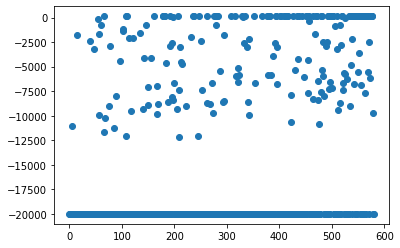

In [6]:
total_reward = [-20000, -20000, -20000, -20000, -20000, -11002.70802248536, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -1746.8399677948046, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -2433.220315074181, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -3230.085934853353, -20000, -20000, -20000, -20000, -20000, -20000, -108.81560037468473, -20000, -1720.7646423876565, -9917.3011951025, -20000, -20000, -20000, -763.3827455312886, -20000, -20000, -20000, 131.57550428500127, -11635.583367406469, -20000, -10273.358749574225, -20000, -20000, -20000, -20000, -20000, -20000, -9021.968127356877, -20000, -20000, -2852.49067725527, -20000, -20000, -20000, -20000, -20000, -20000, -11207.146730231618, -20000, -20000, -7973.495637352057, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -4387.379044403895, -20000, -20000, -20000, -20000, -20000, -1345.118546387968, -1145.6680849775466, -20000, -20000, -20000, 131.59175494035958, -12091.13133802653, -20000, 131.6011198821687, -20000, -20000, -2044.688649916802, -20000, -20000, -20000, -20000, -9514.095949147391, -20000, -20000, -2093.465654483791, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -1525.7439531964083, -20000, -20000, -20000, -20000, -9359.43119678498, -20000, -4157.754725090251, -20000, -20000, -781.3519385630998, -20000, -20000, -20000, -8899.791749045853, -7059.407663365563, -20000, -20000, -20000, -20000, -4158.1397347788925, -20000, -20000, -20000, -20000, -20000, -20000, 131.5986722261662, -20000, -20000, -20000, -9844.331242561186, -6968.0910563558, -8833.985542174712, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -20000, 131.61896386509096, 131.61771880055193, 131.62590119083794, -20000, -20000, 131.59541352526662, -20000, -4664.287699667896, -20000, -8603.780448261881, -20000, -20000, -20000, 131.5816164795734, -2916.811260714885, -20000, -20000, -2571.337599547618, -8054.056996145894, 83.5361305413362, -8436.33201044366, -6709.014319391652, -20000, -20000, -20000, -20000, -20000, -9338.44091784936, 131.65737420092955, -20000, -12142.928920315035, -7416.7377490885365, -3042.3286332624352, -20000, -20000, -4526.457483874554, -4703.313728737134, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -9021.291211211534, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -1932.6616810052967, -20000, -20000, -20000, -20000, 131.59487966647825, 131.62359327474405, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -12047.594417711376, -20000, 131.59435768594165, -20000, -20000, -20000, -2378.770907936974, -20000, -7385.619523902014, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -20000, 131.5250851571925, -8746.449331340607, -20000, -20000, -20000, -20000, -8801.581725469343, -20000, -20000, -6692.146038169261, -20000, -9673.270825994596, -20000, -20000, 131.60890652721213, -20000, -20000, 131.6282465787767, -757.310746198219, -20000, 131.60273808470032, -20000, 131.4473552553755, -20000, -20000, -5428.52758372545, -20000, -20000, -20000, -20000, -20000, -8648.27475126872, -8496.413388954617, -1801.2490841005895, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -20000, 131.6045233699681, -20000, -20000, -20000, -20000, -20000, -20000, -20000, 131.36434413047368, -20000, -5956.744382857802, -20000, -20000, -20000, -5161.046597476341, -6515.006947706328, -20000, -5853.236580036284, -20000, -20000, -20000, -20000, 131.59924795163354, -20000, 47.40535904742069, -20000, -2548.0699622779193, -20000, 131.5921932679342, -20000, -20000, -3021.187501929566, -20000, -20000, -8585.917392673346, -2200.9883656905545, -9938.878265640802, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -20000, 131.5778306150027, -6647.113016042464, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -20000, 131.6015630964023, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -20000, -20000, 131.59958682454433, -5859.558192345877, -20000, 131.39505645697744, -20000, 131.60860326181268, -20000, -5818.5933267324135, -20000, -20000, -3896.385992464296, -20000, -20000, -20000, -20000, -2548.0699622779193, 131.6384515465996, 131.56707236066322, -2986.9639130980436, -6785.684125567475, -20000, -20000, -20000, -20000, -20000, 131.61313242556753, -20000, 131.51967686639648, -20000, -20000, -20000, 131.57180881446718, -20000, -20000, 131.54460417060028, -20000, -20000, -20000, 131.59957618429445, 131.53542816498694, -20000, -20000, -20000, -20000, -20000, -10643.837701861785, -7939.753803861759, -20000, -20000, -20000, 131.59126784535127, -20000, -20000, -5338.750348197521, -20000, -20000, 131.59092927711896, -20000, -4246.909425039636, -20000, -20000, 131.65114001033552, -20000, -20000, -20000, -20000, -20000, 131.59332746164282, -20000, -20000, -6061.736579445499, -20000, -20000, -20000, 131.58555691709685, -20000, 131.56173638602317, -7717.373999274031, -4329.709500990929, -392.67433107816987, 131.6001468299289, -20000, -20000, -20000, -20000, -20000, -20000, -8339.947444802441, 131.6218602025664, -20000, -20000, -1684.2059810751616, 131.5903268076255, -20000, 131.65272612373226, -20000, -6463.937900000115, -8400.689677906114, -10853.369002228193, -20000, -20000, -20000, 131.61029990515905, -7582.487349723094, -5367.320762335536, 131.57520104518468, -5988.996094307493, -2494.9566407256907, -20000, -7983.207941301643, -20000, -20000, -2899.0342769471204, -2512.282054520933, -20000, 131.5807262950143, 131.59608160599265, -7238.467085014069, -20000, -20000, -6522.669545376201, 131.60994873435038, 131.61663180152382, 131.57060935866883, -7167.348839034137, 131.64407777039125, 131.59542112900152, -20000, -20000, -825.2294836751374, -20000, -20000, -3251.6330472422087, 131.52954032468287, -9404.132456062383, -20000, -20000, -20000, -732.0526736095935, -8690.297955699467, -2811.503368367406, -20000, 131.6153895884985, 131.52708244760532, -6674.046509057392, -7379.971845297278, -5633.599521425744, -20000, -5798.505495889048, -61.2953502946762, -20000, -20000, -6236.323463724988, -20000, -20000, -20000, 131.5691885821149, -8963.216502381401, 131.61442451874763, -4788.147000215225, 131.59366719660522, -2152.8915574018056, -20000, 131.64282206993448, 131.6533910519529, -6798.6753461016215, 131.6563651168374, 131.64842582317127, -20000, 131.6398787581564, -20000, -20000, -5530.799740734025, 131.53511171570366, 131.6032900432018, -3627.9273679407083, -20000, 131.57722041503544, -6860.605840465989, 131.62064516871, 131.6050633545671, -20000, 131.57182618923778, -20000, -20000, 131.59869119855193, -7675.124035118601, 131.63422109285278, -20000, 131.57717683480777, 131.4701763723683, 131.5884884668501, -5565.2578635114705, -20000, -2535.890372022847, 131.6176841479446, -6179.508249493197, 131.53543660676812, 131.62760137372933, 131.59639758091237, 131.5207217869696, -9730.811140498496, -20000, -20000]
Q={'2:0.001000_125.000000_0.001000_0.001000_2.000000_625.000000_100.000000_100.000000': [-10965.54108832923, -9072.783469956492, -10819.081988340042, -12659.798279045353, -11761.477113870595, -5939.307062417092, -12075.22401208155, -11979.30083401597, -20598.996372915826, -11479.282975043974, -17614.706902187147, -11494.840688347134, -11491.564283206746, -11734.778710998233, -10750.220073231461, -11640.868774955014, -13472.998638759746], '2:0.001000_113.636364_0.001000_0.001000_2.000000_625.000000_100.000000_100.000000': [107.96278518297667, -29.51965508269199, -1.0841637800472181, -1392.3097022533009, 0.83387122816197, -1074.0035387664775, -6408.986941824806, -304.4346636087131, -10946.153083593848, 0.0046453498610389945, 697.833601525472, 8.670999115915976, 6173.743766393152, -246.84026843322243, -1796.9745941326025, -0.004599300086920266, -2001.2965279659816], '2:0.001000_103.305785_0.001000_0.001000_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 1.28992595903471, 0, 0, 0, 0, 0.003773872849524196, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000909_0.001000_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, -441.68469018899685, 0, 0, 7593.2131071896265, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_103.305785_2.000000_625.000000': [-2130.761151569921, -161.73066867138652, 26.976521549155734, -379.3063580362599, -65.67282878282481, 25.289613076227226, -186.20626657318857, 0, -20000], '1:0.001000_103.305785_1.818182_625.000000': [441.79846454578075, 0, -4.694398514021077, -323.1536100220988, 0, 0, -428.5939272044634, -407.3268336125348, 0], '1:0.001000_113.636364_1.818182_625.000000': [822.5447241637515, 1188.2291518081502, 0, 173.34094354055748, 3.0116446040482514, 306.6247437839924, -1521.2562407066034, -335.2579891500881, -20000], '1:0.001000_113.636364_1.652893_625.000000': [0, 801.2109288775131, 360.57644997776856, -65.71479591610832, 0, 0, -508.7353471361424, 0, -20000], '1:0.001000_125.000000_1.652893_625.000000': [605.3661297225414, 0, -4.046272991139313, -683.9130106628195, -17954.27268756431, 341.3352560956329, -18482.39075251648, -369.7437957308385, -20000], '1:0.001000_137.500000_1.652893_625.000000': [0, 30.536724028743663, 0, 0, 3.3699423609310544, 366.07602642018657, -999.3904422926663, 0, -20000], '2:0.001000_125.000000_0.001000_0.001000_2.200000_625.000000_100.000000_100.000000': [0, 302.9268905225222, 0, -20.077575664644066, 0.847483055476856, -9401.28917552385, 616.3571957925476, -22.464374051573486, -9678.4344522961, 0, 0, 0.0007701974039355263, 496.18585404369, 0, -481.4681289271679, -0.004079324100530357, -441.61803922953476], '1:0.001000_125.000000_2.200000_625.000000': [83.95570810104903, 692.4896199554037, -1802.7852817240691, -168.65700149273172, -297.13441213840974, 105.96148777662765, 128.22508229725526, -20.98002632691752, -20000], '1:0.000909_125.000000_2.200000_625.000000': [-17616.08546025614, -17664.90228945765, 0, 592.3367024136554, 0, -107.32013532968028, -435.5254245536735, -18321.456309185418, -20000], '1:0.000909_125.000000_2.200000_687.500000': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_125.000000_0.001000_0.001000_2.420000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, -299.5633332094567, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_2.420000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.00422576715645846, 0], '2:0.001000_125.000000_0.001100_0.001000_2.420000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -6237.303251595472, 0, 0], '2:0.001000_125.000000_0.001100_0.001000_2.420000_687.500000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -20000, 0], '2:0.001000_125.000000_0.001210_0.001000_2.420000_687.500000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_2.000000_687.500000_100.000000_100.000000': [0, 0, -1.62905808838932, 0, 1.7368688209089669, -384.14318051790997, 318.26197002829394, 0, 7502.356118695236, 0.002742210786891519, 0, 902.3415557709199, 1105.8999711307838, -0.0009308568880442181, -7831.779310839947, -0.003016227708940278, 0], '2:0.001000_125.000000_0.001000_0.001000_2.000000_687.500000_100.000000_110.000000': [202.6657352410056, 0, 0, 0, 0, 0, 0, 0, 0, 0, -301.1742031716769, 0.001362495702232991, -304.71705329120067, 1.1685445888960022, 0, -0.003506943270258489, -1393.0115755224838], '2:0.001000_125.000000_0.001000_0.001000_2.000000_687.500000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, -223.38828770637684, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.001000_2.000000_687.500000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, -428.0652761833706, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_151.250000_0.001000_0.001000_2.000000_687.500000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -509.12069875580346, 0, 0], '2:0.001000_151.250000_0.001000_0.001000_2.000000_687.500000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 6618.360033815295, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_151.250000_2.000000_687.500000': [411.59366496745076, 0, 0, 0, -17997.81675999882, 0, 0, 0, 0], '1:0.000909_151.250000_2.000000_687.500000': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_125.000000_0.001000_0.000909_2.000000_625.000000_100.000000_100.000000': [723.0074564801213, 922.4013965363733, -2.2525810069473664, -1062.9714755965801, 102.77017286638102, 0, -391.9751247223341, -298.2275852661298, 0, 650.7110283915424, 1009.7572310151885, -11838.110243305808, 1148.5675409433225, -0.0007023182224365883, -1431.8426713184156, 908.7775181624606, -1818.9870394367026], '2:0.001000_125.000000_0.000909_0.000909_2.000000_625.000000_100.000000_100.000000': [907.2897296874719, 0, 0, -957.63089177529, 0, -488.1624530980258, 0, -296.76134548364115, -9100.14641364978, 0, 0, 0, 0, -0.0006327172874080134, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.000909_2.200000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 7635.155796967044, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_137.500000_2.200000_625.000000': [101.03629346602253, 338.1341968851235, 0, -249.34076950896844, 0.7703769983516395, 0, 0, -293.32011160387384, 0], '1:0.001000_137.500000_2.200000_568.181818': [0, 303.2656731030721, -1.5978015183700336, -166.16849437652428, 1.4593744788016012, 97.90007804385996, -381.2070448409565, 0, 0], '1:0.001000_151.250000_2.200000_568.181818': [0, 261.60132848446057, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_151.250000_2.200000_516.528926': [397.03303790389924, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_137.500000_2.200000_516.528926': [0, 0, -2.3275762877540958, 0, 0, 0, 0, -277.4273215474033, 0], '1:0.001000_137.500000_2.000000_568.181818': [0, 288.6920880162533, 30.371853539765652, 0, 1.2137145361745751, -270.1257769065558, -181.37261537550756, 0, 0], '1:0.000909_137.500000_2.000000_568.181818': [356.07207875326884, 0, 0, 0, 0, -18267.902474134324, 0, -304.9431665598549, -20000], '1:0.000909_137.500000_1.818182_568.181818': [0, 0, 0, 0, 3.1300140667786764, 0, 0, 0, -20000], '2:0.001000_125.000000_0.001000_0.001100_2.000000_625.000000_100.000000_100.000000': [723.0095241139674, 783.074595408162, 0, -1053.3953066043223, 0, -488.1617904465917, -431.1719024262542, 0, -4598.63823201924, 0.002640290711133275, 1180.4817025627326, 0, 1006.1531933164066, -13007.802376135078, 0, 999.6560483680125, -1337.9469811440936], '2:0.001000_125.000000_0.001100_0.001100_2.000000_625.000000_100.000000_100.000000': [723.0078291291899, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1189.5597772118724, 0, 0, 0, -1431.8445545766574, 0, 0], '2:0.001000_125.000000_0.001100_0.001100_2.000000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, -10516.269465589996, 0, 84.76665063326605, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001100_0.001100_2.000000_625.000000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 5732.379880367867, 0, -192.4004929445595, 0, 0, 0, 0, 0, -0.7636635192186162], '2:0.001000_125.000000_0.001100_0.001100_2.000000_625.000000_75.131480_100.000000': [0, 0, 0, 0, 1.5484963894903558, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001100_0.001100_2.000000_625.000000_75.131480_100.000000': [0, 0, 0, -652.6163002221414, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001100_0.001100_2.200000_625.000000_75.131480_100.000000': [338.27295734453327, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001100_0.001100_2.200000_625.000000_75.131480_100.000000': [0, 0, 0, 74.02628617390637, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001100_0.001100_2.420000_625.000000_75.131480_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.006318865430694132, 0], '2:0.000909_113.636364_0.001210_0.001100_2.420000_625.000000_75.131480_100.000000': [0, 0, -1.2833771958368743, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001210_0.001100_2.420000_625.000000_75.131480_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.006958933342684759, 0], '2:0.001000_113.636364_0.001331_0.001100_2.420000_625.000000_75.131480_100.000000': [0, 0, 0, 299.63510968584615, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001331_0.001100_2.662000_625.000000_75.131480_100.000000': [0, 0, -0.5445214901204963, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001331_0.001100_2.662000_625.000000_75.131480_100.000000': [0, 0, 0, 0, 0, 0, 0, -341.38910802946924, 0, 0, 0, 0.001467962521383015, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001331_0.001100_2.662000_687.500000_75.131480_100.000000': [0, 341.38910802946924, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001331_0.001210_2.662000_625.000000_75.131480_100.000000': [271.4632906588673, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001331_0.001210_2.662000_625.000000_75.131480_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.08378734973393875, 0], '2:0.001100_103.305785_0.001464_0.001210_2.662000_625.000000_75.131480_100.000000': [0, 0, 0, 0, -0.21646030802348834, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001464_0.001210_2.662000_625.000000_75.131480_100.000000': [0, 0, 0, 0, 0, -273.0708710857243, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001464_0.001210_2.420000_625.000000_75.131480_100.000000': [0, 0, 0, 0, 0, -34.87703794297268, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001464_0.001210_2.200000_625.000000_75.131480_100.000000': [0, 0, -1.6773100435593733, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001464_0.001210_2.200000_625.000000_75.131480_100.000000': [0, 0, 0, 0, 0, 0, 0, 833.4353459705917, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001464_0.001210_2.200000_687.500000_75.131480_100.000000': [0, 0, -3.241816035819102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_103.305785_0.001464_0.001210_2.200000_687.500000_75.131480_100.000000': [0, 0, 0, 0, 0, 0, -1527.9023528781763, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_113.636364_0.001464_0.001210_2.200000_687.500000_75.131480_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 368.9221116011384, 0, 0, 0, 0], '2:0.001210_113.636364_0.001464_0.001210_2.200000_687.500000_75.131480_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 389.8581577921315, 0, 0, 0, 0, 0, -399.85103671890704], '2:0.001210_113.636364_0.001464_0.001210_2.200000_687.500000_68.301346_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -389.8581577921315], '2:0.001210_113.636364_0.001464_0.001210_2.200000_687.500000_82.644628_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_113.636364_0.001464_0.001210_2.200000_687.500000_82.644628_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_2.000000_625.000000_100.000000_90.909091': [397.243163948082, 272.3864965904595, 0, 40.16380843486441, 1.540290979219997, 1427.9291640432018, 0, -4891.01128749837, 0, 0.003959076669343631, 317.597613764435, 0, -8340.62398504867, 1072.5531221698475, -4951.838662839262, -0.00435493680597574, -6691.011287498369], '2:0.001000_125.000000_0.001000_0.001000_2.000000_625.000000_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, -20000, 0, -20000, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_2.000000_687.500000_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001100_0.001000_2.000000_625.000000_100.000000_100.000000': [803.2604949165968, 165.22810535998997, -2.252556222046042, -1053.3965202060501, -1287.1978766188238, -194.6024171159969, -607.1770208191034, -296.76132437274737, 0, -19993.335551601394, 0, 908.7819722694138, 1465.427234293967, -0.0007655913524286007, -146.70673729688355, 0, -1190.8896900495035], '2:0.001000_125.000000_0.001100_0.001000_2.000000_625.000000_100.000000_110.000000': [-506.40834736264003, 530.292150201182, -550.0632074035342, 0, 2.3242150337746534, -1262.288282863479, 0, 0, 0, 0, 0, 0, 0, 0, -49.90613825020772, 0, -1010.7322285811073], '2:0.001000_113.636364_0.001100_0.001000_2.000000_625.000000_100.000000_110.000000': [0, 0, 0, -773.6729398866036, 0, 0, 0, 0, 6472.845376781592, 0, 0, 0, 980.0743758667804, 0, 0, 0, 0], '2:0.001000_113.636364_0.001100_0.001000_2.000000_625.000000_100.000000_121.000000': [0, 0, 0, 0, 0, -1113.3052858149565, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001100_0.001000_1.818182_625.000000_100.000000_121.000000': [424.46680341238937, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -236.2949018465659, 0, 0], '2:0.001000_113.636364_0.001100_0.001000_1.818182_625.000000_100.000000_110.000000': [425.69310530681395, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 236.2949018465659, 0, 0, 0, 0], '2:0.001000_103.305785_0.001100_0.001000_1.818182_625.000000_100.000000_110.000000': [0, 0, 0, 0, 3.4405847972748234, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001100_0.001000_1.818182_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0002348228726987145, 0, 0, 0], '2:0.000909_103.305785_0.001100_0.000909_1.818182_625.000000_100.000000_110.000000': [416.5839286362329, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001100_0.000909_1.818182_625.000000_100.000000_110.000000': [0, 0, 0, 634.064265554903, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001100_0.000909_2.000000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 5764.225505267877, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_93.914350_2.000000_625.000000': [0, 735.719909431319, 148.95662787444238, 153.93500795249426, 0, 0, 0, 0, -20000], '1:0.000909_93.914350_2.200000_625.000000': [0, 0, 0, 0, 0, -153.93500795249426, 0, 0, 0], '1:0.000909_93.914350_2.000000_568.181818': [195.74018366002812, 0, 0, 0, 0, 876.6115235057009, 0, 0, 0], '1:0.000909_93.914350_1.818182_568.181818': [0, 0, 0, 0, 0, 468.275005264722, -404.68895683969134, 0, -20000], '1:0.000909_103.305785_1.818182_568.181818': [0, 337.6298925714445, 0, 0, 3.4555418800640836, 589.9249659753696, 0, 0, 0], '1:0.000909_103.305785_1.818182_516.528926': [402.6755843419316, -1457.990605050476, 0, -57.73010771625392, 0, 0, 0, 0, 0], '1:0.000909_103.305785_1.818182_469.571751': [390.4839933495383, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_125.000000_0.001000_0.001000_2.000000_625.000000_110.000000_100.000000': [357.8120670674169, 1661.3426336183247, 0, 0, 1.228223218228816, 1428.5755921006778, 0, -6555.317982303488, 7598.751714947328, 10729.259663966053, -5315.285451953471, 0.0004923296424749424, 1574.5476974928795, -0.0004475723832001677, 0, -0.0039112495969675365, -6078.5940434774875], '2:0.001000_125.000000_0.001000_0.001000_2.000000_568.181818_110.000000_100.000000': [0, 0, 0, 0, 1094.4879539478343, 0, -5427.605078221515, 0, 0, 0, 0, 0, 0, 0, -289.92050113882124, 0, 0], '2:0.000909_125.000000_0.001000_0.001000_2.000000_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 7577.3706944490295, 0, 0, 0, 0, -0.0012286734317967785, 0, -0.00375236281506659, 0], '2:0.000909_125.000000_0.001000_0.000909_2.000000_568.181818_110.000000_100.000000': [0, 0, 0, 0, 1.716242670973952, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_125.000000_0.001000_0.000909_2.000000_568.181818_110.000000_100.000000': [0, 0, 0, 52.02198544098155, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_125.000000_0.001000_0.000909_2.200000_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -956.4233609974584, 0, 0], '2:0.000826_125.000000_0.001000_0.000909_2.200000_568.181818_110.000000_90.909091': [0, 0, 0, 0, 1.1916167846879036, 0, 11457.274056868975, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_137.500000_0.001000_0.000909_2.200000_568.181818_110.000000_90.909091': [-11457.274056868975, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_125.000000_0.001000_0.000909_2.200000_568.181818_110.000000_90.909091': [0, -370.8770340517287, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_125.000000_0.001000_0.000909_2.200000_516.528926_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.000567649429285666, 0, 0, 0], '2:0.000751_125.000000_0.001000_0.000826_2.200000_516.528926_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 370.8764823477357, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_125.000000_0.001000_0.000826_2.200000_568.181818_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0038941634000366323, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_125.000000_0.000909_0.000826_2.200000_568.181818_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 7954.938751088492, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_125.000000_2.200000_568.181818': [0, 306.821389087797, 0, 0, 0, 377.418848057596, 0, 0, 0], '1:0.000751_125.000000_2.200000_516.528926': [0, 0, 0, 0, 1.7181380134896926, 0, 0, 0, 0], '1:0.000683_125.000000_2.200000_516.528926': [382.6068466190204, 0, 0, -38.92708444350901, 0, 0, 0, 0, 0], '1:0.000683_125.000000_2.420000_516.528926': [0, 307.97103496659605, 0, 0, 0, 0, 0, 0, 0], '1:0.000683_125.000000_2.420000_469.571751': [0, -17714.389600382943, 0, 0, 0, 0, 0, 0, 0], '1:0.000683_125.000000_2.420000_426.883410': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001100_125.000000_0.001000_0.001000_2.000000_625.000000_100.000000_100.000000': [6743.7748772781615, -202.40196596868225, 0, -375.3368609250383, -10407.300889521048, 0, -391.4321565666682, 0, -10407.538184039278, -206.04108163383614, 514.1180127259486, 0, 508.76356033236084, -0.0006940298548215651, 0, -0.0031653490026292276, -1578.5413285369007], '2:0.001100_125.000000_0.001000_0.001000_2.200000_625.000000_100.000000_100.000000': [1774.438343253113, 0, 0, -19.87668092870954, 0, 0, 0, -277.9784605388035, -7530.818384522579, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_125.000000_2.200000_625.000000': [733.3866287753581, -1467.0912236783424, 0, 0, -364.77696569041524, 0, 0, 0, -20000], '1:0.001100_125.000000_2.200000_568.181818': [412.0401187057284, 278.04408148399796, -2.1836393605362447, 0, 0, 0, 0, 0, -20000], '2:0.001000_125.000000_0.001000_0.001000_2.000000_625.000000_90.909091_100.000000': [-503.9893478296253, 200.32448360781964, -54.98749781781475, 0, -11.849045012437763, -1314.7564042989184, -987.5098814522717, -320.4524948816831, 5144.384450029972, 222.19222714059873, 755.0370251866734, -881.9406333647355, 80.64031387656917, -0.0010084037984233872, 3.3780080825810272, 68.72497024159537, -10250.224289154692], '2:0.001000_137.500000_0.001000_0.001000_2.000000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1784.5423570708185, 0, 0, 0, -409.7408312682614, 0, 0], '2:0.001000_137.500000_0.001000_0.001000_2.000000_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 1066.7118792202389, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_151.250000_0.001000_0.001000_2.000000_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -8193.799029690615, 0, 0], '2:0.001000_151.250000_0.001000_0.001000_2.000000_625.000000_90.909091_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -20000, 0, 0, 0, 0, 0], '2:0.001000_151.250000_0.001000_0.001100_2.000000_625.000000_90.909091_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_2.200000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0.4517668460011919, -36.512553122604004, 0, 0, 8417.12500804056, 0, 0, 0, 0, -0.000507249110887642, -6119.250087212031, 397.31294044015453, 0], '2:0.001000_125.000000_0.001000_0.001000_2.200000_625.000000_100.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, -20000, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_2.200000_687.500000_100.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.001000_2.000000_625.000000_100.000000_110.000000': [0, 0, 0, -995.9797275450879, 0, 0, 0, 0, 0, 0.0037658577577531103, 0, 0.0011378988823707915, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.000909_0.001000_2.000000_625.000000_100.000000_110.000000': [91.89836694290553, 0, 0, -995.9800095740469, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.000909_0.001000_2.200000_625.000000_100.000000_110.000000': [0, 308.39226268452074, 0, 0, 0, 0, 0, 0, -10785.118829795516, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.000909_0.001000_2.200000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, -308.39226268452074, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001100_2.000000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1104.5139209146632, 0, 817.8415232924405, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001100_2.000000_687.500000_100.000000_110.000000': [0, 0, 0, -1375.7310042840368, 1.2999014208631707, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.001100_2.000000_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0035227662996476284, 0], '2:0.000909_125.000000_0.001100_0.001100_2.000000_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, -1124.5391994768984, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001100_0.001100_1.818182_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 270.4631367344404, 0, 0, 0, 0], '2:0.000909_125.000000_0.001100_0.001100_1.818182_687.500000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 803.6129578029098, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_137.500000_0.001100_0.001100_1.818182_687.500000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0010741479080024873, 0, 0, 0, 0, 0], '2:0.000909_137.500000_0.001100_0.001210_1.818182_687.500000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1477.5652072120374], '2:0.000909_137.500000_0.001100_0.001210_1.818182_687.500000_110.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1475.1565578403374, 0, 0, 0, 0], '2:0.000909_137.500000_0.001100_0.001210_1.818182_687.500000_110.000000_133.100000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1475.9805983537522], '2:0.000909_137.500000_0.001100_0.001210_1.818182_687.500000_121.000000_133.100000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0014052850183361443, 0], '2:0.000909_137.500000_0.001210_0.001210_1.818182_687.500000_121.000000_133.100000': [0, 0, 0, 0, 0, 0, 0, 0, 6713.480867043881, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_137.500000_1.818182_687.500000': [438.10103648648436, 364.2267375327381, 0, 0, 0, 631.9761620809194, 0, -365.4820578937592, 0], '1:0.000909_125.000000_1.818182_687.500000': [0, -17610.39580357195, 0, 234.56011724564414, 0, 675.630475035959, -438.10103648648436, 0, -20000], '1:0.000909_125.000000_1.652893_687.500000': [0, 369.4049495019908, 0, 0, 3.6319850369490725, 0, 0, 0, -20000], '1:0.000826_125.000000_1.652893_687.500000': [473.03656749245323, 0, -3.6319850369490725, 0, 0, 0, 0, 0, 0], '1:0.000909_125.000000_1.652893_625.000000': [913.44972096262, 317.4810703727881, 374.7649353358992, -238.22042308702538, 3.7097233214674996, 309.19844956862426, -482.69889781407926, -33.58226813654462, -20000], '1:0.000909_113.636364_1.652893_625.000000': [451.7838763033442, 0, -3.534499658527784, 0, 0, 0, -508.5774003361375, 0, 0], '1:0.000826_125.000000_1.652893_625.000000': [0, 307.67175762586214, -3.342093082403153, 0, 0, 308.1789401314873, 0, -335.5327894109003, 0], '1:0.000826_125.000000_1.652893_568.181818': [448.9444581416424, 0, -2.9123272886691214, 0, 0, -1539.6005675307842, 0, -307.67175762586214, 0], '1:0.000826_125.000000_1.502630_568.181818': [432.8871456314758, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.000909_125.000000_0.001000_0.001000_2.000000_625.000000_100.000000_100.000000': [801.2277879712746, 782.3903803741832, 0, -367.4732452116823, 1.882797979829884, -535.1267696553474, -392.33878171053567, 0, -12335.052054793043, 0.0026075794974531165, 1623.7928255202196, -0.0017387609350407733, 1552.875887058488, 563.2180687364007, -304.48592447717056, -0.0031838653620179683, -367.2518398278737], '2:0.000909_125.000000_0.001000_0.001000_1.818182_625.000000_100.000000_100.000000': [0, 0, 0, 486.47888150486125, 0, 992.2208037747175, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.001000_2.000000_625.000000_100.000000_100.000000': [0, 0, -0.8353913946442845, 0, 0, -770.9029410663951, 0, -273.5571922657206, 0, 0, 0, 0, 0, -0.00185798125616202, 0, 0, -98.25968621250195], '2:0.000909_113.636364_0.001000_0.001000_1.818182_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 230.3226584939026, 0, -235.7137171441089, 0, 0], '2:0.000909_113.636364_0.001000_0.001000_1.818182_625.000000_100.000000_90.909091': [0, 0, 0, -789.2610726979719, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.001000_2.000000_625.000000_100.000000_90.909091': [408.9089990081867, 0, 0, 0, 0, 0, 0, -300.75794094762426, 0, 0, 0, 0, 1795.877730908476, -0.0003460053083472303, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.001000_2.000000_687.500000_100.000000_90.909091': [0, 0, 0, 845.9405676074192, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.001000_2.200000_687.500000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -6987.729139645544], '2:0.000909_113.636364_0.001000_0.001000_2.200000_687.500000_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -20000, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.001100_2.200000_687.500000_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_2.000000_568.181818_100.000000_100.000000': [-89.19702836183183, 2164.298856561425, 0, -1465.317467305067, 0, -1017.9436797066254, -149.39307548941255, -11792.824731501962, 0, 0, 0, 0, -11538.05414559686, -0.0018365978874862775, -1582.9826176725956, -0.00483935121264949, 0], '2:0.001000_125.000000_0.001000_0.001000_1.818182_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 1389.5972218790216, 1919.259129400784, 0, 0, 0.001113917792463326, 0, 0, 0, 0, 0, 0, -265.9775953336543], '2:0.001000_125.000000_0.001000_0.001000_1.818182_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0010859507474378916, 241.7978139396857, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001000_1.818182_568.181818_110.000000_100.000000': [461.60055742453045, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.001000_1.818182_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 244.40218018402592, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.001000_1.818182_568.181818_100.000000_100.000000': [454.4920049112987, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0012044689150570776, 0], '2:0.001000_113.636364_0.001000_0.001000_1.818182_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 7034.424860597021, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001000_1.652893_568.181818_100.000000_100.000000': [0, 0, 0, -97.33807074434405, 0, 644.6138363952025, 0, 0, 7441.583371798664, 0, 0, 0, 0, -0.0002781423147098394, -269.06671901377575, 0, 0], '1:0.001000_113.636364_1.652893_568.181818': [751.8305396435779, 0, -3.3033783344276344, 0, 0, 201.06306780934224, -494.26123563068836, -18295.41176106559, 0], '1:0.001000_103.305785_1.652893_568.181818': [749.1431443196158, 243.1881535172283, 0, -532.8424621214223, 2.2725280526391543, 108.33731829036445, 0, -273.262934401584, -20000], '1:0.001000_93.914350_1.652893_568.181818': [942.6216435755819, 0, -2.1459162000888043, 0, -36.02332631557542, 0, 0, -232.92374871731846, 0], '1:0.001100_93.914350_1.652893_568.181818': [676.4405634908067, 0, -18002.16890774878, -426.37288370001414, 0, 0, 0, 0, 0], '1:0.001100_93.914350_1.818182_568.181818': [0, 0, 0, -409.25607143893166, 0, 0, 0, 0, 0], '1:0.001100_93.914350_2.000000_568.181818': [0, 0, 0, 424.18559781606865, 0, 0, 300.6162836828753, 0, -20000], '1:0.001100_103.305785_2.000000_568.181818': [-18273.287530620793, -155.06521856462754, -3.6017349286482716, -372.1482104563289, -127.14093235340879, -268.4187805732833, -18670.59393944361, -2136.100241815633, -20000], '1:0.001100_103.305785_1.818182_568.181818': [0, 0, 0, 0, 0, 0, 0, -374.06545738285365, 0], '1:0.001100_103.305785_1.818182_625.000000': [0, 0, 1139.568727866653, 0, 0, -17302.246418449082, 0, -407.5649439262976, 0], '1:0.001100_103.305785_1.652893_625.000000': [370.2859926316424, 0, -3.9146044139408787, 0, 249.48079508081787, 0, 0, 0, -20000], '1:0.001210_103.305785_1.652893_625.000000': [0, 0, 0, 0, 0, 0, -405.33890590123394, -288.97995567070365, 0], '1:0.001210_113.636364_1.652893_625.000000': [405.33890590123394, 0, -18004.725240838954, -655.9532517427248, 0, 271.1663536955489, 0, 0, 0], '1:0.001210_113.636364_1.818182_625.000000': [-17574.28543331916, 0, -4.053105164245335, 0, 0, 0, 0, 0, 0], '1:0.001331_113.636364_1.818182_625.000000': [0, 363.35754826671985, 0, 0, 0, 0, -429.2124469225932, -389.3694597445595, 0], '1:0.001331_113.636364_1.818182_568.181818': [435.81669634187125, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001331_103.305785_1.818182_568.181818': [404.01518138855147, 0, 0, 271.70181023490846, 0, 0, 0, 0, 0], '1:0.001331_93.914350_1.818182_568.181818': [0, 0, 0, 0, 5.358715047200394, -17568.009919627148, -404.0151813885506, 0, 0], '1:0.001210_93.914350_1.818182_568.181818': [835.0244515032241, 0, 0, 0, 0, 0, 0, 0, -20000], '1:0.001210_85.376682_1.818182_568.181818': [410.83560494457424, 0, -0.9588325731370787, 0, 0, 0, 0, -249.62679792142526, 0], '1:0.001210_85.376682_1.818182_625.000000': [0, 0, 0, -1093.5932101587794, 590.3407809086968, 0, 0, 0, 0], '1:0.001100_85.376682_1.818182_625.000000': [0, 0, 0, 0, 3.2613326205548447, 660.238536471312, 0, 0, 0], '1:0.001000_85.376682_1.818182_625.000000': [0, 0, 0, 0, 224.8134590909587, 367.24301285002406, 0, -121.01435027459024, 0], '1:0.001000_85.376682_1.818182_568.181818': [0, 0, 0, -966.6607778107775, 0, 0, -748.3116014573715, 0, 0], '2:0.001000_125.000000_0.000909_0.001000_2.000000_625.000000_100.000000_100.000000': [811.9329911235616, 861.3828118497802, -2.5003940821337345, 0, 2.0169637357625105, -541.8607963962327, -24.97658772187998, 0, -8849.125189219754, 0.0024002576114071418, 736.6017061479328, 0.0007655841927771689, 0, 931.4022470279144, 0, -3903.0565820632773, -1579.6176085759623], '2:0.001100_125.000000_0.000909_0.001000_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, -391.43168328478276, -325.7513914548772, 7715.913187507594, 0, 0, 0.0007634282706931117, 0, 0, 0, 0, 0], '1:0.001100_125.000000_2.000000_625.000000': [426.48670280761746, -17634.979096009512, -1706.222682573014, -1505.9689208785894, 168.5221823221509, -18202.51148899237, -67.31204752951476, -376.1102595995333, -20000], '2:0.001000_137.500000_0.001000_0.001000_2.000000_625.000000_100.000000_100.000000': [-11064.300550351421, 0, 21.180575880511157, 10768.03387679203, 0, -574.0998207328731, 0, 556.2358991446945, 7573.723485212541, 0.0030729981344848056, 1915.7247249699046, 0, 0, -0.0010140712178326795, -7122.605604793879, -486.9518910643943, -7122.605604793879], '2:0.001000_137.500000_0.001000_0.001000_1.818182_625.000000_100.000000_100.000000': [0, 3008.05531475082, 0, 0, 2.642861580023055, 0, 0, -356.26052141609927, 0, 0, 0, 0, 633.9244756563847, -0.0002690687686481397, 0, 0, -258.56038311690935], '2:0.001000_137.500000_0.001000_0.001000_1.818182_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, -2709.959743018757, 0, 0, 0, 0.00057701107707544, 0, -0.0005245566277153557, 0, 0, -693.162009773473], '2:0.000909_137.500000_0.001000_0.001000_1.818182_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0002893680306442548, 0, 0, 0, 0, 0], '2:0.000909_137.500000_0.001000_0.001100_1.818182_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0012015257374514477, 0], '2:0.000909_137.500000_0.001100_0.001100_1.818182_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -232.2669058918187, 0, 0], '2:0.000909_137.500000_0.001100_0.001100_1.818182_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 899.3672017813453, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_137.500000_0.001100_0.001100_1.652893_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -7251.292222341027], '2:0.000909_137.500000_0.001100_0.001100_1.652893_625.000000_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -20000, 0, 0, 0, 0, 0], '2:0.000909_137.500000_0.001100_0.001210_1.652893_625.000000_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001100_0.001000_2.000000_625.000000_100.000000_100.000000': [0, 1034.4969523964348, 0, -5.332045407426813, 0, -595.158831863643, 0, 0, 0, -170.03878531270297, 0, 0, 0, -0.0010140746901015519, -7122.60222447759, 0, 0], '2:0.001000_137.500000_0.001000_0.001000_1.818182_568.181818_110.000000_100.000000': [0, 0, 134.27701056329516, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_137.500000_0.001000_0.001000_1.818182_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -8732.624720837763, 0, 0], '2:0.001100_137.500000_0.001000_0.001000_1.818182_568.181818_110.000000_90.909091': [0, 0, 0, 0, -20000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.001000_1.818182_568.181818_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.001000_2.000000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 1.579774808970251, -342.1409054456815, 0, 0, 7628.851424770294, 0, 0, 0.0009526762589302962, 412.76561092956143, 0, 0, 0, -6969.667607743971], '2:0.001000_137.500000_0.001000_0.001000_2.000000_687.500000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -20000, 0], '2:0.001000_137.500000_0.001100_0.001000_2.000000_687.500000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001100_2.000000_625.000000_100.000000_100.000000': [105.95377340560118, 0, 0, 0, 0, 0, -723.0095241139674, -274.2660902589591, 7004.847269200229, 0, -168.71734712032557, 0, 0, 0, 0, -0.0050592480135674125, 0], '2:0.001000_125.000000_0.001000_0.001100_2.200000_625.000000_100.000000_100.000000': [288.3307571027546, 0, 0, 0, 0, 957.6320969130204, 0, -277.78636363874796, 0, 0, 0, 0, 0, -0.0006938715350770508, -437.69843492257496, 0, 0], '2:0.000909_125.000000_0.001000_0.001000_2.200000_625.000000_100.000000_100.000000': [0, 275.50295878752206, 0, 0, 0, 6213.470136425327, 0, -277.62979524385247, -9599.656515776282, 0, 0, 0, 0, -0.0006386883866071003, 0, 0, 0], '1:0.000909_125.000000_2.200000_568.181818': [0, 305.1981941888095, 0, 0, 59.48437072129603, 73.10367475139549, 0, -301.5200019485659, -20000], '1:0.000909_125.000000_2.000000_568.181818': [-17653.146870893248, 336.99282095231905, -16232.034186671117, -12.825946698050338, -1342.4430469680228, -153.9771489471772, -18390.07740857288, -1731.9021829429694, -20000], '1:0.000909_125.000000_1.818182_568.181818': [0, 0, 0, -14407.83218034822, 0, 0, 0, -771.189441693982, 0], '1:0.000826_125.000000_2.000000_568.181818': [0, 934.4938170808291, 277.8022821767525, 0, -1798.3864422549705, 0, -18390.56560478908, -325.35383282827723, 0], '1:0.000909_137.500000_2.000000_625.000000': [543.5427741106789, -17695.056833440143, -15900.181813195979, 467.4835793323699, 0, -314.6654765009422, 0, 0, 0], '1:0.000909_125.000000_2.000000_625.000000': [-1094.5456125235632, -16481.120814853082, -2959.50395292907, -621.3243373054618, 30.604092797326302, -16196.257858461857, -368.0965017292282, -116.26624739989495, -20000], '1:0.000909_113.636364_2.000000_625.000000': [701.8043553665491, 0, -17304.148057978608, -1.8273563359357967, -1044.1288965544773, -6.610518899994107, -86.26255592750658, -359.54271251783956, 0], '1:0.000909_113.636364_2.200000_625.000000': [349.3592809592208, 0, 0, -90.04399558302485, 2.6488939194088745, 0, -3.4586895472419714, -367.3715700420321, -20000], '1:0.000909_113.636364_2.200000_687.500000': [341.8814712954669, 0, 0, 0, 0, 0, 0, -345.4634601605605, 0], '1:0.000909_113.636364_2.200000_756.250000': [0, 0, 0, -219.49979487664115, 0, 0, -310.300109342416, 0, 0], '1:0.000909_125.000000_2.200000_756.250000': [0, 0, -18000.79345644743, 0, 0, 0, 0, 0, 0], '1:0.001000_125.000000_2.200000_756.250000': [-17660.231351035975, 0, 0, 0, 0, -285.5283188717376, 0, 0, -20000], '1:0.001000_125.000000_2.000000_625.000000': [-2572.0013228012485, -17802.795033119473, -194.4267833543206, -138.25617791880956, -1591.3404692521344, -15689.10302581764, -358.8070390878184, -2527.453130024938, -20000], '1:0.001000_125.000000_2.000000_568.181818': [-1454.2842960128528, -424.99957659605934, -112.206185549221, -18009.23810756814, -1522.1310745442934, -1734.2321730015503, -108.39698160598567, 263.90425538515046, -20000], '1:0.001000_125.000000_1.818182_568.181818': [478.9163540939421, 574.8654901543155, -3.702030828136285, 0, 3.033960064390385, 668.578694000771, -468.9442084065085, 69.73201994356216, -20000], '1:0.001000_125.000000_1.818182_516.528926': [0, 367.67099000711914, -17955.53696536404, 0, 0, 0, 0, -18359.03431101477, -20000], '2:0.001000_113.636364_0.001100_0.001000_2.000000_625.000000_100.000000_100.000000': [96.46116564987005, 0, 0, -1392.3092343924343, 0, -773.2388118602532, -7.2300674609955085, 0, 0, 0, 0, 0, 0, 0, -1796.8143782804332, 0, 0], '2:0.001000_113.636364_0.001100_0.001000_2.200000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255.27812045777318, 0, 0], '2:0.001000_113.636364_0.001100_0.001000_2.200000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.003635075569218316, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001000_2.200000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, -659.9425159734237, 0, 0, 0, 0, -251.36174947557046, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001000_2.000000_625.000000_100.000000_90.909091': [1668.0754574487628, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1800.3896038258295, 0.0003812218041275628, 1629.944950660651, 0, 949.7769673059956, 0, 0], '2:0.001000_113.636364_0.001000_0.001000_2.000000_625.000000_100.000000_82.644628': [0, 0, 0, 0, 1.6788301646145556, 0, 0, 0, 0, 0, 0, 0, 0, -0.001265481893278775, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.001000_2.000000_625.000000_100.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0013939018945166026, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.001100_2.000000_625.000000_100.000000_82.644628': [0, 0, 0, 0, 0, 0, -7392.071449739483, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.001100_2.000000_625.000000_100.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -20000, 0], '2:0.000909_125.000000_0.001100_0.001100_2.000000_625.000000_100.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001100_0.000909_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 2.0170319377484702, 0, 0, -296.7615591805212, 0, 0, 1110.7353913578866, 0, 0, -0.0006327214652628755, 0, -0.0030549137462003275, 0], '2:0.001000_125.000000_0.001100_0.000826_2.000000_625.000000_100.000000_100.000000': [0, 0, -2.2525524810504067, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001100_0.000826_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0028775951641364372, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.000826_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 462.13420161726646, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.000826_2.000000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 62.85823132297573, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.000826_2.000000_687.500000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, -1697.820310373105, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.000826_2.000000_756.250000_90.909091_100.000000': [0, 0, 0, 0, 0, 1532.6893910988085, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.000826_1.818182_756.250000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1033.1147605431263, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.000826_1.818182_756.250000_90.909091_110.000000': [373.6667179418224, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.000826_1.818182_756.250000_90.909091_110.000000': [377.8125389055493, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.000826_1.818182_756.250000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 754.968324689036, 0, 0], '2:0.001100_103.305785_0.001000_0.000826_1.818182_756.250000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -752.7617475670343, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.000826_1.818182_756.250000_82.644628_100.000000': [0, 0, -2.269109615645175, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_103.305785_0.001000_0.000826_1.818182_756.250000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 6467.490697212225, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_103.305785_1.818182_756.250000': [0, 0, 0, -16.651630454654516, 0, 0, 0, 0, 0], '1:0.001210_103.305785_2.000000_756.250000': [0, 0, 0, 90.91771531982577, 0, 0, 0, 0, -20000], '1:0.001210_103.305785_2.200000_756.250000': [258.4302205420924, 0, 0, 0, 0, -18090.91771531983, 0, 0, 0], '1:0.001000_113.636364_2.000000_625.000000': [-754.8547680178781, -14538.767985758834, -15434.837552068755, 434.1133636400366, -1399.206077124695, -96.96061016713674, -18495.188223991394, -644.3933532792619, -20000], '2:0.001000_137.500000_0.001000_0.001000_2.000000_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 9676.500156363942, 0, 6480.774873674157, 0, 0, 0, 0, 0, 0, -0.013332864269068522, 0], '1:0.001000_151.250000_2.000000_568.181818': [0, 308.8218703109733, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_151.250000_2.000000_516.528926': [0, 0, -2.3248265954986165, 0, 0, 0, 0, 0, 0], '1:0.001100_151.250000_2.000000_516.528926': [0, -17713.62890940732, 0, 0, 0, 0, -454.74135591393946, 0, 0], '1:0.001100_151.250000_2.000000_469.571751': [0, 0, 0, -121.43599725437112, 0, 0, 0, 0, -20000], '1:0.001100_151.250000_2.200000_469.571751': [416.5060564628609, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_137.500000_2.200000_469.571751': [0, 0, 0, 0, 1.4830287629107717, 0, 0, 0, -20000], '1:0.001000_137.500000_2.200000_469.571751': [0, 0, -18001.483028762912, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.001000_2.000000_625.000000_100.000000_90.909091': [358.40867434325685, 0, 0, 35.56401541553969, 0, 1571.2206856878622, 0, 0, 0, 0, 0, 0, 0, -0.0005381340807434754, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.000909_2.000000_625.000000_100.000000_90.909091': [371.73543711178394, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.002880998148066283, 0], '2:0.000909_113.636364_0.001100_0.000909_2.000000_625.000000_100.000000_90.909091': [371.7357299215337, 0, 0, 0, 0, 0, 0, 0, 0, 0.002880998148066283, 1799.4054517827365, 0, 0, 0, 0, 0, 944.9867624909397], '2:0.000909_103.305785_0.001100_0.000909_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, -371.7357299215337, 0, 0, 0, 0, 0.00036253900689189324, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001100_0.001000_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1672.867852304188, 0, 0, 0, 0], '2:0.000909_103.305785_0.001100_0.001000_2.000000_625.000000_100.000000_100.000000': [0, 0, -1.0229162336405353, 0, 0, 0, -96.64874312653228, 0, 0, 0, 0, 0, 0, -0.0017540452536195517, 0, 0, 0], '2:0.000909_113.636364_0.001100_0.001000_2.000000_625.000000_100.000000_100.000000': [96.64874312653228, -26.48068189124915, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001100_0.001000_2.000000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0015984210653186893, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001100_0.001100_2.000000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 6658.743835834166, 0, 0, 0, 0, 0, -1455.0388119589395, 0, 0], '1:0.000909_113.636364_2.000000_568.181818': [377.92627546004263, 658.964578318925, -28.799568606075923, 0, 0, -28.594663152067096, -632.9522238476379, 0, -20000], '1:0.000909_103.305785_2.000000_568.181818': [0, 0, -18000.10137577747, 80.42979315086487, 0.059440852868738146, 0, 0, -16304.425207332884, 0], '1:0.000826_103.305785_2.000000_568.181818': [988.4297416194138, 0, -0.059440852868738146, 81.79557814987147, 0, 0, 0, 167.4833115156334, 0], '1:0.001000_103.305785_2.000000_568.181818': [-17823.176291351567, 294.2609407155841, -1304.8747871376272, 77.40255761942734, 0.10137577746932039, 185.1794430779763, -481.507407190604, 0, -20000], '1:0.000826_125.000000_2.000000_625.000000': [0, 38.335539465493866, -1801.3090384547395, -39.860113979570365, 1.075139351501639, -183.78547877639295, 0, -340.41898336982484, 0], '1:0.000751_125.000000_2.000000_625.000000': [0, 604.0060373179122, 0, 0, 0, 0, -334.1613052119002, 0, 0], '1:0.000751_137.500000_2.000000_625.000000': [0, 0, -1.2912509801989474, 0, 0, 0, -386.62820075846247, 0, 0], '1:0.000826_137.500000_2.000000_625.000000': [0, 0, 0, 0, 0, 0, -18387.05256821868, 0, 0], '1:0.000826_151.250000_2.000000_625.000000': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_137.500000_0.001000_0.001000_2.000000_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, -874.2270766573498, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.001000_1.818182_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0014242065197322517, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.000909_0.001000_1.818182_687.500000_100.000000_110.000000': [0, 320.5494892133424, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.000909_0.001000_1.818182_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 901.1580110006031, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.000909_0.001000_1.652893_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -242.28164622392742, 0, 0], '2:0.001000_137.500000_0.000909_0.001000_1.652893_625.000000_100.000000_100.000000': [470.89956385680546, 0, 0, -906.0823194915537, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001000_1.652893_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, -470.89956385680546, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.000909_0.001000_1.818182_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -232.76780887843105, 0, 0], '2:0.001000_137.500000_0.000909_0.001000_1.818182_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.001095636781428766, 0], '2:0.001000_137.500000_0.001000_0.001000_1.818182_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -5183.660415826111, 0, 0], '2:0.001000_137.500000_0.001000_0.001000_1.818182_625.000000_100.000000_82.644628': [0, 0, 0, 0, 0, 0, -20000, 0, 0, 0, 0, 0, -1165.1217803798434, 0, 0, 0, 0], '2:0.001000_151.250000_0.001000_0.001000_1.818182_625.000000_100.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001100_0.001100_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, -1392.3103960448952, 0, 0, -723.0078291291899, -274.2646310910497, 0, 0.004599316375970375, 0, 0, 0, 0, 0, 0, -1801.182257748714], '2:0.001000_113.636364_0.001100_0.001100_2.000000_687.500000_100.000000_100.000000': [0, 274.2646310910497, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1822.8549391420688, 0, 0], '2:0.001000_113.636364_0.001100_0.001100_2.200000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 445.55832887084165, 0, 0, 0, 0], '2:0.001000_113.636364_0.001100_0.001100_2.200000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 632.3150891250391, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001100_0.001100_2.200000_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.003030061246136029, 0], '2:0.001000_113.636364_0.001210_0.001100_2.200000_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0010532119160416187, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001210_0.001210_2.200000_687.500000_100.000000_110.000000': [480.8845963806922, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001210_0.001210_2.200000_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -763.5128384620805, 0, 0, 0, 0], '2:0.001000_103.305785_0.001210_0.001210_2.200000_687.500000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 1003.5654171486096, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001210_0.001210_2.200000_756.250000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, -637.9947057797477, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001210_0.001210_2.200000_756.250000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 5852.516527183162, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_113.636364_2.200000_756.250000': [0, 345.8188095424839, 0, -221.7456314007105, 0, -54.93407684096701, -18308.880589967295, -361.38987456873684, -20000], '1:0.001000_113.636364_2.000000_756.250000': [0, 0, 0, 0, 0, 0, -298.30609818275474, 0, 0], '1:0.001000_125.000000_2.000000_756.250000': [0, 0, -1.9542491126886672, 295.51640637353796, 1.5912117402101102, -326.04158900375603, 0, -383.92078869014233, 0], '2:0.001000_113.636364_0.001000_0.001000_2.000000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 1703.7584471368189, 789.1278213989375, 0, 0, 0, 0, 0, 0, 0, -0.0003499121803724847, 0, -0.002878028953982721, 0], '2:0.001000_113.636364_0.001100_0.001000_2.000000_625.000000_110.000000_100.000000': [1668.0690690160127, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.00031810517775738846, 0, 0, 0], '2:0.001000_113.636364_0.001100_0.000909_2.000000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.002878031149157323, 0], '2:0.001000_113.636364_0.001210_0.000909_2.000000_625.000000_110.000000_100.000000': [0, 0, 0, -48.46505896246217, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001210_0.000909_2.200000_625.000000_110.000000_100.000000': [1271.6178122565523, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001210_0.000909_2.200000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 1.3781070947454281, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001210_0.000909_2.200000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, -1272.7982470471823, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001210_0.000909_2.200000_625.000000_110.000000_100.000000': [0, 275.1670090621956, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001210_0.000909_2.200000_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0.38923271048533936, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_113.636364_0.001210_0.000909_2.200000_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0.34637931699326147, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_113.636364_0.001210_0.000909_2.200000_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 8203.872493946035, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_113.636364_2.200000_568.181818': [0, 291.376080738887, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_113.636364_2.200000_516.528926': [308.4300833234712, 0, 0, 0, -17998.60564941301, 0, 0, 0, 0], '1:0.000683_113.636364_2.200000_516.528926': [308.8320173008439, 0, 0, 0, 0, 0, 0, 0, -20000], '1:0.001000_125.000000_1.818182_625.000000': [1401.4167590896361, 401.09495479464135, -3.949988356730046, 48.078436573218596, 6.866550250311056, 185.87521336308419, -18509.164900583273, -390.0850194767543, -20000], '2:0.001000_137.500000_0.001000_0.001000_2.200000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, -5920.173151749794, -7117.273109684499, 0, 0, 0, 0, 291.15410932096586, 0, -7117.273109684499, 0, 0], '2:0.001000_137.500000_0.001000_0.001000_2.200000_687.500000_100.000000_100.000000': [-11720.837800182993, -10882.726890315502, -20000, 0, 0, 0, 0, 0, 0, 0, -10625.279420049064, 0, 0, 0, 0, 0, 0], '2:0.001100_137.500000_0.001000_0.001000_2.200000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.000909_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 1428.3817350522183, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.004309169180305617, 0], '2:0.000909_125.000000_0.001100_0.000909_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 35.563577606796756, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001100_0.000909_2.200000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0.4024545714049964, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_125.000000_0.001100_0.000909_2.200000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0004627548927601311, 0, 0, 0], '2:0.000826_125.000000_0.001100_0.000826_2.200000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 438.3058845523883, 0, 0, 0, 0], '2:0.000826_125.000000_0.001100_0.000826_2.200000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 423.7024171064217, 0, 0, 0, 0, 0, 0], '2:0.000826_125.000000_0.001100_0.000826_2.200000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 7214.334715164221, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_125.000000_2.200000_625.000000': [0, 560.7566849636701, 0, 0, 0, 39.860113979570365, -37.055640243176285, 0, 0], '1:0.000826_125.000000_2.200000_568.181818': [0, 0, 0, -18097.365708193858, 90.1571892831098, 70.61010343382522, 0, 0.08285347094398503, 0], '1:0.000826_125.000000_2.420000_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.000909_125.000000_0.001000_0.000909_2.000000_625.000000_100.000000_100.000000': [0, 782.3894052543865, 0, 0, 1.7116331001367144, -486.47845802482954, 0, -297.04159487141715, 0, 0.0026075821871927476, 0, 0, 1632.1013694094636, -0.000696490011177957, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.000909_1.818182_625.000000_100.000000_100.000000': [0, 0, 0, 486.47845802482954, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.00024818987676553664, 0, 0, 0], '2:0.000909_125.000000_0.000909_0.000909_2.000000_625.000000_100.000000_100.000000': [0, 0, -2.0169632366480075, 0, 0, 0, 0, 0, 0, 0, 1096.6991194324858, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.000909_2.000000_625.000000_100.000000_100.000000': [106.91636506008658, 0, 0, 0, 0, 0, -723.0089974036866, -274.26621876590616, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000909_0.000909_2.000000_625.000000_100.000000_100.000000': [-833.6348846185974, 0, 0, 0, 0, 0, 0, 0, 0, 0.0034307807436562143, 0, 0, 0, 0, 0, 0, -229.43510068902233], '2:0.001000_103.305785_0.000909_0.000909_2.000000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -751.2815814199447], '2:0.001000_103.305785_0.000909_0.000909_2.000000_625.000000_121.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 747.3211345905619, 0, 0, 0, 0], '2:0.001000_103.305785_0.000909_0.000909_2.000000_625.000000_121.000000_110.000000': [256.4094327759896, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.000909_0.000909_2.000000_625.000000_121.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -865.2318455807392, 0, 0, 0, 0], '2:0.001000_93.914350_0.000909_0.000909_2.000000_625.000000_121.000000_121.000000': [0, 0, 0, 0, 0, 0, 834.9281332213549, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000909_0.000909_2.000000_625.000000_121.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 786.2630092427286, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000909_0.000909_2.000000_625.000000_110.000000_121.000000': [0, 0, 0, 0, 0, -993.6137816190212, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000909_0.000909_1.818182_625.000000_110.000000_121.000000': [415.6181556746369, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.000909_0.000909_1.818182_625.000000_110.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 6764.531255419006, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_93.914350_1.818182_625.000000': [880.6726677289753, 0, 150.3554344034114, -18360.569070013422, 4.513376223556634, 1180.2373319590586, -3.980261537724516, 0, 0], '1:0.001000_85.376682_1.818182_687.500000': [0, 0, 0, 0, 0, 219.67622787817945, 0, 0, -20000], '1:0.001000_85.376682_1.652893_687.500000': [0, 268.5811352464348, 0, -18219.67622787818, 0, -118.97554463029815, -634.7648908759523, 0, 0], '1:0.001000_93.914350_1.652893_687.500000': [0, 0, -3.495811721944847, 0, 0, 0, 0, -210.67915984056637, 0], '1:0.001100_93.914350_1.652893_687.500000': [638.0951039547726, 0, 0, 0, 0, 0, 0, -211.17438491238408, 0], '1:0.001100_93.914350_1.652893_756.250000': [744.8046095272293, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_85.376682_1.652893_756.250000': [0, 102.97449155180637, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_85.376682_1.652893_687.500000': [0, 0, 0, 0, 1.8215850743700912, 0, 0, 0, 0], '1:0.001000_85.376682_1.652893_625.000000': [0, 481.8996373887758, 0, 0, 2.1105177721130985, 47.972758854134035, 0, -268.5811352464348, 0], '1:0.000909_85.376682_1.652893_625.000000': [0, 0, 0, 0, -17958.46775425969, 0, 0, 0, 0], '1:0.000826_85.376682_1.652893_625.000000': [-17739.26095011117, 0, 0, 0, -3.678780328857082, 0, 0, 0, -20000], '2:0.001000_113.636364_0.001000_0.001000_1.818182_625.000000_100.000000_100.000000': [917.9515091437194, 0, 0, 0, 3.1746790785449774, 0, 0, 0, -10991.545490362663, 0, 0, 0, 230.635014101681, -0.00026461734123586214, 0, 0, -265.0820879040419], '2:0.001000_113.636364_0.001000_0.001000_1.818182_625.000000_110.000000_100.000000': [425.55785239930776, 0, 0, 0, 0, 0, 0, -374.25242023177236, 0, 0, 0, 0, 0, 0, -243.96500623450774, -0.0010862074939723243, 0], '2:0.001000_113.636364_0.001000_0.001000_1.818182_625.000000_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0010472259782545734, 0, 0, 0, -0.0003184633731507347, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.001000_1.818182_625.000000_110.000000_90.909091': [0, 0, 0, 0, 0, 0, -5879.726970228843, 0, 0, 0, 246.69918829204744, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.001000_1.818182_625.000000_100.000000_90.909091': [0, 0, -3.4995478328242826, -787.6522781392113, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.001000_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00041934055401725344, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.001100_2.000000_625.000000_100.000000_90.909091': [1668.0766568197012, 0, 0, 0, 0, 0, 0, 0, 8099.79790780371, 0.002386107323400211, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_103.305785_1.818182_568.181818': [784.5157835596968, 337.4466278938026, 0, 0, 3.818267705949711, 618.5962926349038, 0, -373.5916656590902, 0], '1:0.001000_103.305785_1.652893_625.000000': [0, -17696.473615289506, 0, 0, 0, 0, -138.74657646327023, 0, 0], '1:0.000909_103.305785_1.652893_568.181818': [846.0500381896492, 242.41287171216086, 0, 0, -19797.710883558895, 0, 0, 0, 0], '1:0.000826_103.305785_1.652893_568.181818': [0, 0, 0, -18529.903447652105, 0, 0, -381.0651736468153, 0, -20000], '1:0.000826_113.636364_1.652893_568.181818': [381.0651736468153, 0, 0, 0, 0, 181.3160674044411, -448.9444581416424, -18294.405958409312, 0], '1:0.000826_103.305785_1.818182_568.181818': [1075.9067038073208, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_125.000000_0.001000_0.001000_2.000000_625.000000_100.000000_110.000000': [0, -563.4377996199255, -550.0628537967008, -1698.9562071388268, -1092.6060424284628, -1388.5192847329997, -559.6696596702423, -485.0741873570428, 6707.149039331457, 0, 0, 0.0009140406424194225, 0, 0, -13143.087005329911, 3.9019105716511504, -1010.7329856220764], '2:0.000909_125.000000_0.001000_0.001000_2.000000_625.000000_100.000000_110.000000': [-456.6026712757117, 224.5961454682034, 0, -1545.2838852530429, 0, -1074.6992358516848, 0, 0, -11659.326357938964, 0, 76.16104138993087, 0, 0, -0.0008368336488274508, 0, -0.057245376766150005, -461.2218043176787], '2:0.000909_125.000000_0.001100_0.001000_2.000000_625.000000_100.000000_110.000000': [-456.54864244305884, 200.24659635850495, 0, 0, 0, -1260.7672669977458, 0, 0, 0, 0, 0, 0, 0, 0, -1006.2484273088212, 0, 0], '2:0.000909_125.000000_0.001100_0.001000_1.818182_625.000000_100.000000_110.000000': [435.76712962704624, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001100_0.001000_1.818182_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 1013.7628154493271, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001100_0.001000_1.818182_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.002845820716538583, 0], '2:0.000909_113.636364_0.001210_0.001000_1.818182_687.500000_100.000000_110.000000': [0, 0, -2.225775671147312, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1622.4693199691417, 0, 0], '2:0.001000_113.636364_0.001210_0.001000_1.818182_687.500000_100.000000_110.000000': [0, 0, 0, 0, 2.225775671147312, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001210_0.001000_1.818182_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.001277366143585823, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001100_0.001000_1.818182_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1625.7184033993879, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001100_0.001000_1.818182_687.500000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, -1799.9711689215032, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001100_0.001000_1.818182_687.500000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 269.81108236176334, 0, 0, 0, 0], '2:0.000909_125.000000_0.001100_0.001000_1.818182_687.500000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -272.2746425378755], '2:0.000909_125.000000_0.001100_0.001000_1.818182_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, 944.7408618214664, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001100_0.001000_1.652893_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 218.71300699642254, 0, 0, 0, 0], '2:0.000909_125.000000_0.001100_0.001000_1.652893_687.500000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, -445.72869823156924, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_137.500000_0.001100_0.001000_1.652893_687.500000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, -11776.58113120412, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_137.500000_1.652893_687.500000': [-17518.244650558478, 0, 0, 0, 0, 0, 0, -364.4285367844019, -20000], '2:0.001100_125.000000_0.001100_0.001000_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 7324.750327532234, 0, 0, 0, 0, -0.000694032526553201, -1430.5267993180528, 0, 0], '2:0.001100_125.000000_0.001100_0.001000_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 11918.201848440152, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001100_0.001000_2.000000_687.500000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, -4109.601266080304, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_125.000000_2.000000_687.500000': [334.3008931577647, 0, -1802.481161452355, -18020.557072131145, 0, 124.17288356302006, 0, 421.0536129069106, 0], '1:0.001100_125.000000_1.818182_687.500000': [1119.5790913343478, -17609.390756253575, 0, 0, 4.474212626399549, 0, -433.21682533120486, -42.151615699743346, 0], '1:0.001100_137.500000_1.818182_687.500000': [0, 0, 0, 0, 0, 0, 0, -365.1323052727983, 0], '1:0.001100_137.500000_1.818182_756.250000': [381.00640090357376, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_125.000000_1.818182_756.250000': [0, 459.49434540017273, 0, 0, 0, 0, 0, -158.61070113145576, 0], '1:0.001100_113.636364_1.818182_687.500000': [0, 387.94885168024825, 0, 0, 7.135533750934129, 789.7688737995065, 0, 0, 0], '1:0.001100_113.636364_1.652893_687.500000': [443.4433367434972, 0, -5.034344540246957, 0, 0, 0, -472.54580292438385, 0, 0], '1:0.001210_113.636364_1.652893_687.500000': [0, 327.29936978912906, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_113.636364_1.502630_625.000000': [-17624.866656006197, 0, 0, -246.51486699595353, 0, 0, -396.520751822881, 0, 0], '1:0.001210_125.000000_1.502630_625.000000': [743.100108454646, 0, 0, 0, 0, 172.00868780733774, 0, 0, 0], '1:0.001210_125.000000_1.366027_625.000000': [0, 0, 0, -172.00868780733774, 0, 0, 0, 0, 0], '1:0.001331_113.636364_1.652893_625.000000': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.000909_125.000000_0.001000_0.001100_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1006.3029587198546, 0, 0, -0.003155179081040842, 0], '2:0.000909_125.000000_0.001100_0.001100_2.000000_625.000000_100.000000_100.000000': [721.826144247026, 0, 0, 0, 0, 0, 0, 0, 0, 0.0028683446191280384, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.001100_2.000000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0031166804637905443, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.000909_0.001100_2.000000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1006.3034678233092, 0, 0], '2:0.000909_125.000000_0.000909_0.001100_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002370517924828164, 0, 0.0008427444949120399, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.000826_0.001100_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1580.5848690100815], '2:0.000909_125.000000_0.000826_0.001100_2.000000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, -6079.707816650947, 0, 0, 143.68953354637105, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.000826_0.001100_2.000000_687.500000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, -20000, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.000826_0.001100_2.000000_756.250000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_1.818182_625.000000_100.000000_100.000000': [909.9478501933423, 345.8315004671571, 307.36221914631824, 0, 629.2796103305345, 1266.3919463532625, -444.8691131508156, -354.19936047224365, 9262.569145985224, 0.0019671078678220513, 6234.22513048618, 0, 0, 0, 0, 0, 480.75054539816557], '2:0.001000_125.000000_0.001000_0.001000_1.818182_625.000000_90.909091_100.000000': [0, 346.17468909344933, 0, 0, 0, 1067.8988615235207, 0, -348.91996097171835, 0, 0, 0, 0.0003414456545215217, 0, -0.00031040509329614, 0, -0.0016105276079542818, 428.97325182439727], '2:0.001000_125.000000_0.001000_0.000909_1.818182_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 970.8171936358673, 0, 0, 0, -0.1649640244189868, 0, 0, 0, -0.0002821867172315251, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.000826_1.818182_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0002821867172315251, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.000909_1.818182_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 253.4208099835536, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.000909_1.818182_625.000000_82.644628_100.000000': [0, 0, 0, 1086.2941944176307, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.000909_2.000000_625.000000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -195.67623594439993, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.000909_2.000000_625.000000_82.644628_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -241.4432400210495, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.000909_2.000000_625.000000_82.644628_121.000000': [318.6774022818285, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.000909_2.000000_625.000000_82.644628_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 877.202682122265], '2:0.001000_113.636364_0.000909_0.000909_2.000000_625.000000_90.909091_121.000000': [0, -96.4962141978298, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.000909_2.000000_568.181818_90.909091_121.000000': [580.1508523707737, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000909_0.000909_2.000000_568.181818_90.909091_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 571.222732486364, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000909_0.000909_2.000000_568.181818_82.644628_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 4675.461843807592, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_113.636364_2.000000_568.181818': [-15476.990267616438, 580.8665333168044, -4.206369993393196, 18.08360136859214, -303.99981499823656, 330.49803144680516, 0, -1963.736833527757, -20000], '1:0.000909_103.305785_2.000000_625.000000': [-1835.019604222387, 0, -304.51101717456464, -688.1331995677737, -733.1247727155989, 0, 0, -897.9021445679828, -20000], '1:0.001000_103.305785_1.818182_687.500000': [0, 0, -4.932508827785887, -71.79821328174448, 0, 0, -408.60578886733407, 0, -20000], '1:0.001000_103.305785_2.000000_687.500000': [179.35160738045576, 0, -1.0327456467755383, 0, 0, -17921.021965390082, -16700.674777919172, 0, 0], '1:0.001100_103.305785_1.818182_687.500000': [0, 0, -5.414365798526569, 0, 0, 753.8111828792971, 0, 0, 0], '1:0.001100_103.305785_1.652893_687.500000': [397.5481560682174, -17683.117281297385, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_2.000000_687.500000_100.000000_90.909091': [0, -11916.002588075184, 0, 0, 0, 0, 0, 0, 0, 0, -10777.826874682145, -20000, 0, -20000, -20000, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_2.000000_687.500000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -7222.173125317856], '2:0.001000_125.000000_0.001000_0.000909_2.000000_687.500000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001000_2.000000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 817.8416306652585, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001000_2.000000_687.500000_100.000000_110.000000': [0, 0, 0, 0, 1.2999133710063688, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.000909_0.001000_2.000000_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 5857.283976633852, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_125.000000_2.000000_687.500000': [-17676.347188134958, 0, -298.500004728534, 0, -1798.201175191136, -234.5601172456466, 0, 0, -20000], '1:0.000909_125.000000_1.818182_625.000000': [520.9953087998426, 430.69391029436974, 0, -1402.8225572881638, -17996.452807239006, 177.41869532214037, -509.82634491997345, -389.60419642804527, -20000], '1:0.001000_137.500000_2.000000_687.500000': [-17670.427827542146, 16.44697176075971, -288.67326680121687, -2.46827934128072, 0, -346.605445398716, -37.417605906131854, -348.71317950655305, -20000], '1:0.001000_137.500000_1.818182_687.500000': [0, 0, 0, 0, 1.7437427313658191, 629.8160860522947, 0, -365.3728457211418, 0], '1:0.000909_137.500000_1.818182_625.000000': [1500.582689305038, 0, -2.966915254375454, 391.9417949193894, 0, 0, 0, -364.2267375327381, -20000], '1:0.001000_137.500000_1.818182_625.000000': [0, 351.2360668724421, 0, 317.4703093927876, -17997.033084745624, 662.4480834779682, 0, 0, -20000], '1:0.000909_137.500000_1.652893_625.000000': [0, 0, 0, 0, 3.3555090236414435, -17634.89309321482, -512.3594061197481, 0, 0], '1:0.000909_151.250000_1.652893_625.000000': [512.3594061197481, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_137.500000_1.652893_625.000000': [0, 0, 0, 0, 2.761771221374238, 0, -512.0856484825842, 0, 0], '1:0.000751_137.500000_1.652893_625.000000': [0, 0, 0, -603.2425512364596, 0, 0, -511.8406135455081, 0, 0], '1:0.000751_151.250000_1.652893_625.000000': [511.8406135455081, -17694.277247059108, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_151.250000_1.652893_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_125.000000_0.001000_0.001100_2.000000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, -0.026999572325439657, 0, 0, 2226.5437027157595, 0, -4767.239934745918, 0, 0], '2:0.001000_125.000000_0.001000_0.001100_2.000000_625.000000_110.000000_90.909091': [-10617.023544410828, -11938.9957985198, 0, 0, 0, 0, 0, -20000, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001100_2.000000_625.000000_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -942.3618160003913, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001100_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 1.9322540023982584, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1556162507269619, 0], '2:0.001000_113.636364_0.001100_0.001100_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 8909.609407898139, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_137.500000_1.818182_568.181818': [-17531.05579159349, 0, -3.7677211002025617, 0, 3.4370173084066664, 556.3567038495113, 0, 0, 0], '1:0.000826_137.500000_1.818182_568.181818': [0, 0, 0, 265.9467039676821, 0, 0, 0, 0, 0], '1:0.000826_137.500000_2.000000_568.181818': [0, 0, -18001.174243900135, 0, 0, 0, -395.0094755127199, 0, -20000], '2:0.001000_137.500000_0.001100_0.000909_2.000000_625.000000_100.000000_100.000000': [391.975600704908, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001210_0.000909_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1435.9883738618253], '2:0.001000_125.000000_0.001210_0.000909_2.000000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 1.106419440298123, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001210_0.000909_2.000000_625.000000_110.000000_100.000000': [0, 1365.7113946965928, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001210_0.000909_2.000000_568.181818_110.000000_100.000000': [0, 0, 0, 0, 1.7453649611828952, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_125.000000_0.001210_0.000909_2.000000_568.181818_110.000000_100.000000': [-692.0964713215986, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_113.636364_0.001210_0.000909_2.000000_568.181818_110.000000_100.000000': [1174.5603148659986, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_103.305785_0.001210_0.000909_2.000000_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -67.54480025150988, 0, 0], '2:0.000826_103.305785_0.001210_0.000909_2.000000_568.181818_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 7227.900495079336, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_103.305785_2.200000_568.181818': [0, 0, 0, 0, 1.294299203613582, 46.932203148738225, 0, 0, -20000], '1:0.000751_103.305785_2.200000_568.181818': [244.4436289679059, 0, 0, 0, 0, 0, 0, -310.4346809035363, 0], '1:0.000751_103.305785_2.200000_625.000000': [335.43601735273995, 0, 0, -24.018461181901603, 0, 0, 0, 0, -20000], '1:0.000751_93.914350_2.200000_625.000000': [0, 589.468042488433, 0, 95.24880016141988, 0, 0, -234.09561896093888, 0, 0], '1:0.000751_103.305785_2.420000_625.000000': [0, 365.97780480088755, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_103.305785_2.420000_568.181818': [358.1764825300215, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_93.914350_2.420000_568.181818': [-1266.968062055881, 0, 0, 0, 0, 0, 0, -346.8888904476849, 0], '1:0.000751_93.914350_2.420000_625.000000': [0, -15416.99406941622, 0, 0, 0, -86.58981832856352, 0, -18372.508145652133, 0], '1:0.000751_93.914350_2.420000_687.500000': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_125.000000_0.001000_0.000909_2.000000_625.000000_110.000000_100.000000': [1174.8300055025975, 0, -1.3037878386561716, 0, 0, 0, -6686.452955495614, 0, 0, 0, 0, 0, 0, -0.00040688471472094534, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.000909_2.000000_625.000000_110.000000_100.000000': [0, 0, 0, -20000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_137.500000_0.001000_0.000909_2.000000_625.000000_121.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.000909_2.000000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 1.08425808218999, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_125.000000_0.001000_0.000909_2.000000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1941.441085809846, 0, 0], '2:0.000826_125.000000_0.001000_0.000909_2.000000_568.181818_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0034973081514181104, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_125.000000_0.000909_0.000909_2.000000_568.181818_100.000000_90.909091': [0, 0, 0, 0, 0, 781.7531604878949, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_125.000000_0.000909_0.000909_1.818182_568.181818_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.001208796526043443, 0], '2:0.000826_125.000000_0.001000_0.000909_1.818182_568.181818_100.000000_90.909091': [0, 0, -3.8761386454521927, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.000909_1.818182_568.181818_100.000000_90.909091': [0, 0, -2.6537413195617776, -779.5033934062748, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.000909_1.818182_568.181818_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 1602.006879702586, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.000909_1.818182_568.181818_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.011133559225527279, 0], '2:0.001000_137.500000_0.001100_0.000909_1.818182_568.181818_100.000000_90.909091': [-1601.8226459390214, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001100_0.000909_1.818182_568.181818_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -239.05992493677476, 0, 0], '2:0.001000_125.000000_0.001100_0.000909_1.818182_568.181818_100.000000_82.644628': [457.08447409323435, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001100_0.000909_1.818182_568.181818_100.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0015459786125575192, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.000909_1.818182_568.181818_100.000000_82.644628': [0, 0, 0, 412.45542683984513, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.000909_2.000000_568.181818_100.000000_82.644628': [0, 69.91267652674851, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.000909_2.000000_516.528926_100.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -617.6405266898759], '2:0.001000_113.636364_0.001000_0.000909_2.000000_516.528926_110.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -960.7772973947824], '2:0.001000_113.636364_0.001000_0.000909_2.000000_516.528926_121.000000_82.644628': [0, 0, 0, 0, 0, 0, 11743.995667422263, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.000909_2.000000_516.528926_121.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, -3135.3233018926526, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_125.000000_2.000000_516.528926': [-1071.318561901826, 1234.181844001272, -2.07147901305902, -92.86784422431765, 255.0350656129084, -472.23534492375893, -371.7766359300523, -23.6586652369715, 0], '1:0.001000_125.000000_2.200000_516.528926': [382.3683185341443, 0, 0, 0, 0, 0, 0, 52.88334995888891, 0], '1:0.001000_113.636364_2.200000_516.528926': [0, 0, 0, 0, 3.5882726524930244, -17627.062803311488, 0, -292.7600043763495, 0], '1:0.001000_113.636364_2.200000_568.181818': [-17661.913862948055, 0, 0, -46.78619193814848, 21.202246121486326, -15518.165169475544, 0, -327.337392131999, -20000], '1:0.001000_103.305785_2.200000_568.181818': [243.5136566781463, 292.3575670240953, 260.3833030967006, 0, 1.5702503761223399, -78.96091855221185, 0, 0, -20000], '1:0.001000_93.914350_2.200000_568.181818': [746.7454246534677, 0, 0, 0, 2.1178420039020467, 0, 0, 0, 0], '1:0.000909_93.914350_2.200000_568.181818': [819.7501239149228, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.000909_125.000000_0.001100_0.001000_2.000000_625.000000_100.000000_100.000000': [721.8250524195773, 0, 0, 0, 1.7116209925807198, 0, 0, 0, 0, 0, 0, 0, 1006.2484273088212, 0, -1253.1380188042165, 0, 0], '2:0.000909_103.305785_0.001100_0.000909_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, -1211.7438895002429, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_103.305785_0.001100_0.000909_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 1.6247992992797664, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_103.305785_0.001100_0.000909_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 1.486045510945587, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000683_103.305785_0.001100_0.000909_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0006352759059154778, 0, -0.0005775241968876799, 0, 0, 0], '2:0.000683_103.305785_0.001100_0.000826_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0005775241968876799, 0, 0, 0, 0, 0], '2:0.000683_103.305785_0.001100_0.001000_2.000000_625.000000_100.000000_100.000000': [0, 339.98466612518644, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000683_103.305785_0.001100_0.001000_2.000000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0023491471805755283, 0, 0, 0, 0, 0, 0, 0], '2:0.000683_103.305785_0.001000_0.001000_2.000000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 464.783039395179], '2:0.000683_103.305785_0.001000_0.001000_2.000000_568.181818_110.000000_100.000000': [-383.60612603330827, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000683_93.914350_0.001000_0.001000_2.000000_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.00028091901003790554, 0, 0, 0], '2:0.000683_93.914350_0.001000_0.000909_2.000000_568.181818_110.000000_100.000000': [0, 0, 0, 0, 1.6270028298960824, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000621_93.914350_0.001000_0.000909_2.000000_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.00025511837920930705, 0, 0, 0], '2:0.000621_93.914350_0.001000_0.000826_2.000000_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.002350593070332252, 0], '2:0.000621_93.914350_0.001100_0.000826_2.000000_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.00023192556800495369, 0, 0, 0], '2:0.000621_93.914350_0.001100_0.000751_2.000000_568.181818_110.000000_100.000000': [0, 370.52591516252, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000621_93.914350_0.001100_0.000751_2.000000_516.528926_110.000000_100.000000': [0, 0, 0, 0, 1.7518302462984139, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000564_93.914350_0.001100_0.000751_2.000000_516.528926_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 295.63990168057717, 0, 0, 0, 0, 0, 0], '2:0.000564_93.914350_0.001100_0.000751_2.000000_516.528926_100.000000_100.000000': [0, 0, -1.4498419017540074, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000621_93.914350_0.001100_0.000751_2.000000_516.528926_100.000000_100.000000': [0, 0, 0, 671.566805354826, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000621_93.914350_0.001100_0.000751_2.200000_516.528926_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.003856039534730371, 0, 0, 0, 0, 0, 0, 0], '2:0.000621_93.914350_0.001000_0.000751_2.200000_516.528926_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -142.33535753072448], '2:0.000621_93.914350_0.001000_0.000751_2.200000_516.528926_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0009718478504510131, 0, 0, 0], '2:0.000621_93.914350_0.001000_0.000683_2.200000_516.528926_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 6973.062971646649, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000621_93.914350_2.200000_516.528926': [0, 0, 0, -17871.92969337601, 0, 0, 0, 0, 0], '1:0.000621_93.914350_2.420000_516.528926': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_113.636364_0.001100_0.001000_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, -358.0366957664399, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001100_0.001000_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 1570.7237219060962, 0, -6082.73317915262, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001100_0.001000_2.000000_687.500000_100.000000_90.909091': [0, 0, -20000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001000_2.000000_568.181818_100.000000_100.000000': [0, 452.17161805887685, 0, 0, 0, 589.3494937424595, 86.90113341059187, 0, 0, 0, 0, 0.0016055365955253366, 899.4114519716078, 0, -1454.077118377877, 0, 0], '2:0.001000_113.636364_0.001000_0.001000_2.000000_568.181818_100.000000_110.000000': [421.507963908839, 0, 0, 0, 381.0526489761268, 0, 0, 0, 5844.2370777505275, 0, 0, 0, 0, -0.0008911176253604936, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.000909_2.000000_568.181818_100.000000_110.000000': [0, 0, 0, -1424.9852981304846, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.000909_2.200000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, -318.8977212026981, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.000909_2.200000_568.181818_100.000000_110.000000': [0, 1044.563359550273, 0, 0, 0, 0, 0, -308.2883818024131, 0, 0.004005764529756562, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.000909_2.200000_625.000000_100.000000_110.000000': [0, 308.2883818024131, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.000909_2.200000_516.528926_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, -1044.563359550273, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.000909_2.200000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 1584.0495542214335, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.000909_2.000000_568.181818_100.000000_110.000000': [175.81600803767148, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -574.2187151443277], '2:0.001000_125.000000_0.000909_0.000909_2.000000_568.181818_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 574.2187151443277, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.000909_2.000000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, -957.3572304664862, 0, 0, 0, 0.0029774721395369854, 547.6665134147369, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.000909_2.000000_568.181818_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -547.6665134147369], '2:0.001000_113.636364_0.000909_0.000909_1.818182_568.181818_100.000000_110.000000': [0, 0, 0, 0, 2.7741165771243685, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.000909_0.000909_1.818182_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, -464.84505393625534, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.000909_0.000909_1.818182_568.181818_100.000000_110.000000': [0, 1940.3138282614834, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.000909_0.000909_1.818182_516.528926_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 5179.674478034414, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_125.000000_1.818182_516.528926': [0, 0, 0, 137.41463486978714, 2.4636000622959684, 0, 0, 0, 0], '1:0.000909_125.000000_2.000000_516.528926': [663.2721882404051, 309.4031420690253, -1.7000362916269296, 0, 1.532801100745519, -137.41463486978714, -409.45082001087485, 0, 0], '1:0.000826_125.000000_1.818182_516.528926': [0, 325.7084987351263, 0, 0, 0, 0, -464.00444112757754, 0, -20000], '1:0.000826_125.000000_1.818182_469.571751': [468.7651308571369, 0, -2.7750177623841865, 0, 0, 0, 0, 0, 0], '1:0.000909_125.000000_1.818182_469.571751': [0, 0, -3.0229943790609926, 0, 0, 478.4275545205432, 0, -293.54758109339394, 0], '1:0.001000_125.000000_1.818182_469.571751': [0, 0, 0, 0, 3.0229943790609926, 527.354776453592, 0, 0, 0], '1:0.001000_125.000000_1.652893_469.571751': [0, -17784.527104414894, 0, 0, 0, 130.62609451365165, 0, -18246.63176380467, 0], '1:0.001000_125.000000_1.652893_516.528926': [477.7154542243601, 246.63176380467016, -2.8775886990427355, 0, 0, 0, 0, 0, -20000], '2:0.000826_125.000000_0.001000_0.000909_2.000000_625.000000_100.000000_100.000000': [720.9532387184898, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_113.636364_0.001000_0.000909_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 6304.009430718762, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_113.636364_2.000000_625.000000': [-1028.9579816560727, -1435.6169927669816, -2.7055623339916206, 56.64147477149743, 0, -18064.721695055647, 0, -355.89734006692123, 0], '1:0.000826_113.636364_1.818182_625.000000': [474.0717170810234, 0, -2.7365408862260665, 0, 0, 0, 0, 0, -20000], '2:0.001000_125.000000_0.001000_0.001000_2.000000_625.000000_90.909091_90.909091': [0, 782.1201036377992, -2.30381178937414, 0, 0, 0, 0, 0, 0, 0.0028819135877711233, 1121.3307953507076, 0.000840352329214511, 1004.9113389519438, 0, -1574.9774164229646, 0, 0], '2:0.001000_125.000000_0.000909_0.001000_2.000000_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1004.9119003749729, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001000_2.000000_625.000000_90.909091_100.000000': [-455.466041485459, 233.72871670108933, 0, -1195.7440848920107, -10.741873882037908, -1263.3485421706025, 0, -534.3713766240068, -11641.895904770023, 0, 0, 0, 0, -0.0009167353866359918, 0, 0, -10.097582547997332], '2:0.001000_125.000000_0.000909_0.000909_2.000000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.20197504343468609, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000826_0.000909_2.000000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0008332017881912179, 0, 0, 0], '2:0.001000_125.000000_0.000826_0.000826_2.000000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0007574560549983289, 0, 0, 0], '2:0.001000_125.000000_0.000826_0.000751_2.000000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, -1263.547532401423, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000826_0.000751_1.818182_625.000000_90.909091_100.000000': [0, 346.3408749711993, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000826_0.000751_1.818182_568.181818_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -235.0821296771246], '2:0.001000_125.000000_0.000826_0.000751_1.818182_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, -345.8315685125144, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000826_0.000751_1.818182_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 484.24798283147703, 0, 0], '2:0.001000_125.000000_0.000826_0.000751_1.818182_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -7510.6684013893455], '2:0.001000_125.000000_0.000826_0.000751_1.818182_625.000000_110.000000_90.909091': [0, 0, 0, 0, 0, 0, -20000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.000826_0.000751_1.818182_625.000000_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.001000_2.000000_625.000000_90.909091_100.000000': [0, 0, 0, -996.5219102745532, 604.8624759959624, 0, 0, 0, -11742.145733275309, 0, 624.6830976291121, 0.0012560347304315655, 1112.3944214822698, 0, 0, -0.004154993841621035, 0], '2:0.001000_125.000000_0.001000_0.001000_2.000000_625.000000_90.909091_110.000000': [0, 0, 82.51569933709997, 0, 1.4140141700765525, 0, 0, 0, 0, 0, -192.61858073380154, 0.0014650810489911237, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.001000_2.000000_625.000000_90.909091_110.000000': [402.19344220154164, 0, 0, 0, -82.51569933709997, 0, 0, 0, 0, 0, 0, 0, -279.8365620115523, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.001000_2.000000_625.000000_90.909091_110.000000': [0, 0, -1.4140141700765525, 0, 0, 0, 0, -862.4838286934831, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_2.000000_625.000000_82.644628_110.000000': [0, 677.6777455772984, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_2.000000_568.181818_82.644628_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.005309025929636846, 0], '2:0.001000_125.000000_0.001100_0.001000_2.000000_568.181818_82.644628_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0006630625484831398, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001100_0.001100_2.000000_568.181818_82.644628_110.000000': [0, 0, 0, 0, 2.398837241785441, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001100_0.001100_2.000000_568.181818_82.644628_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.005849154643692601, 0], '2:0.000909_125.000000_0.001210_0.001100_2.000000_568.181818_82.644628_110.000000': [0, 0, 0, 0, 0, 0, 0, -678.5213124544728, 0, 0, 0, 0, 0, 0, 1380.6749608983798, 0, 0], '2:0.000909_125.000000_0.001210_0.001100_2.000000_625.000000_82.644628_110.000000': [0, 678.5213124544728, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001210_0.001100_2.000000_568.181818_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 4094.2678073645884, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_137.500000_2.000000_568.181818': [1363.3510748007436, 0, -1.552698321435173, 0, 0.12886185665196523, 0, 0, -16805.565023232837, 0], '1:0.001100_125.000000_2.000000_568.181818': [-17653.01958668489, 1076.4472084493093, -2.1774989627474954, -70.463611346945, -11.799725683036499, -18172.27807757127, 0, -16562.42797409786, -20000], '1:0.001100_113.636364_2.000000_568.181818': [-1058.8530853972006, 656.0945292763297, -1.2735530915627806, -15932.383072071223, 1.1151145065324273, 0, -436.26929254695534, -18366.126456574206, -20000], '1:0.001100_113.636364_2.000000_625.000000': [-1027.9750772831667, -15109.632088826696, 765.5505328171705, -5.147952728453547, 0, -18071.046003057854, -2445.2529006896966, -343.53614690795706, -20000], '1:0.001100_103.305785_2.000000_625.000000': [-145.44928004101047, -17660.53875576621, -3.332678419457261, -378.21463141585417, -328.8897640323506, -19.692484874560108, 0, -18812.40195760532, -20000], '1:0.001100_103.305785_2.000000_687.500000': [0, 812.4019576053205, 0, 90.59123572914518, 0, 0, 0, 0, -20000], '2:0.001000_113.636364_0.000909_0.001000_2.000000_625.000000_100.000000_100.000000': [6318.582141747763, -26.83630742844907, 0, -1392.3101276348084, 0, -773.2453350706209, -725.2400632131657, -274.2667892757467, -9207.722069866748, 0, -168.71658689667078, 0, 0, -0.0016805881990876515, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.001000_2.000000_687.500000_100.000000_100.000000': [0, 274.2667892757467, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.000826_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 2.0169627832885455, 0, 0, 0, 0, 0, 0, 0, 1006.1532489467427, 0, 0, 0, 0], '2:0.000909_125.000000_0.000909_0.000826_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, -958.8842800658252, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.000909_0.000826_2.200000_625.000000_100.000000_100.000000': [288.4568410728958, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.000909_0.000826_2.200000_625.000000_100.000000_100.000000': [0, 290.48883074001714, 0, 0, 0.8010554668573605, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_113.636364_0.000909_0.000826_2.200000_625.000000_100.000000_100.000000': [0, 0, -0.8010554668573605, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.000909_0.000826_2.200000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -473.3451837405188], '2:0.000909_113.636364_0.000909_0.000826_2.200000_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0005012677880586125, 0, 0, 0], '2:0.000909_113.636364_0.000909_0.000751_2.200000_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.004263874608295737, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.000826_0.000751_2.200000_568.181818_110.000000_100.000000': [0, 0, 0, 687.9645584608596, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.000826_0.000751_2.420000_568.181818_110.000000_100.000000': [0, 0, 0, -450.17569216143113, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.000826_0.000751_2.662000_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 7280.592314482611, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_113.636364_2.662000_568.181818': [0, 0, 0, 0, 3.708621498550292, 0, 0, 0, 0], '1:0.000826_113.636364_2.662000_568.181818': [801.4736120359057, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_103.305785_2.662000_568.181818': [791.994791551084, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_93.914350_2.662000_568.181818': [0, 447.5213718614515, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_93.914350_2.662000_516.528926': [0, 0, 0, 0, 3.0308357087009425, 444.34829154860756, 0, 0, 0], '1:0.000826_93.914350_2.420000_516.528926': [463.68267849275287, 0, -1.4778264408918405, 0, 1.3336152592287362, 0, -0.30165920187877193, -600.8189140398033, 0], '1:0.000826_85.376682_2.420000_516.528926': [233.13285287149674, 0, 0, -18168.953503716242, 0, 0, 0, 0, 0], '1:0.000826_77.615165_2.420000_516.528926': [0, 259.49294140784997, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_77.615165_2.420000_469.571751': [0, 0, -3.249252957020667, 0, 0, 0, 0, 0, 0], '1:0.000909_77.615165_2.420000_469.571751': [1301.6074940343744, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_70.559241_2.420000_469.571751': [0, 0, 0, 0, 0, -34.31761374764244, 0, 0, 0], '1:0.000909_70.559241_2.200000_469.571751': [0, 0, 0, 0, 0, 0, 0, 19.504506057079407, -20000], '1:0.000909_70.559241_2.000000_469.571751': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001000_1.818182_687.500000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, -6851.281511712069, 0, 0, 0, 0, 0, 0, 0, 11148.718488287932, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_1.818182_687.500000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, -20000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.001000_1.818182_687.500000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001100_0.001000_2.000000_568.181818_100.000000_100.000000': [-86.90061022827705, 0, -1.2081852079218152, 0, 0, 0, 0, -861.3787483222226, 0, 0.00483935121264949, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_2.000000_516.528926_100.000000_100.000000': [0, 0, 0, 1677.741715585921, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -447.07939062281605, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_2.000000_516.528926_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.011755029701453168, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001000_2.000000_516.528926_100.000000_90.909091': [0, 0, -1.5463826106299166, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.000909_0.001000_2.000000_516.528926_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1186.0067636804229, 0, 0], '2:0.001100_125.000000_0.000909_0.001000_2.000000_516.528926_100.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00048251594489556737, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.000909_0.001100_2.000000_516.528926_100.000000_82.644628': [0, 0, 0, 0, 0, -2284.0260187676795, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.000909_0.001100_1.818182_516.528926_100.000000_82.644628': [480.02782258413794, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.000909_0.001100_1.818182_516.528926_100.000000_82.644628': [0, 335.124703213296, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.000909_0.001100_1.818182_469.571751_100.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00041753807763598164, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.000909_0.001210_1.818182_469.571751_100.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 267.1337103703569, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.000909_0.001210_1.818182_469.571751_90.909091_82.644628': [0, 0, 0, 0, 0, 0, 0, -353.29701811993965, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.000909_0.001210_1.818182_516.528926_90.909091_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0013925426412242814, 0], '2:0.001100_113.636364_0.001000_0.001210_1.818182_516.528926_90.909091_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 7216.1436451706795, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_113.636364_1.818182_516.528926': [0, 0, -4.3173538236361315, -17651.549286169353, 3.9239772780460043, 0, 0, 0, 0], '1:0.001210_113.636364_1.818182_516.528926': [-17525.230602468066, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_103.305785_1.818182_516.528926': [0, 0, -4.653502723210659, 0, 0, 0, 0, 0, -20000], '1:0.001331_103.305785_1.818182_516.528926': [0, 312.31443924752705, 0, 0, 0, 0, 0, 0, 0], '1:0.001331_103.305785_1.818182_469.571751': [0, 273.5198644378259, 0, 0, 0, 0, 0, 0, 0], '1:0.001331_103.305785_1.818182_426.883410': [0, 233.6723568997474, 0, 0, 0, 0, 0, 0, 0], '1:0.001331_103.305785_1.818182_388.075827': [0, 0, 0, 0, 0, 336.49145634690575, 0, 0, 0], '1:0.001331_103.305785_1.652893_388.075827': [0, 0, 0, 0, 0, 0, 0, -325.08948191412594, 0], '1:0.001331_103.305785_1.652893_426.883410': [0, 0, 0, 0, 0.5050533508624085, 0, 0, 0, 0], '1:0.001210_103.305785_1.652893_426.883410': [0, 0, 0, 0, 0, 27.388415249513695, 0, 0, 0], '1:0.001210_103.305785_1.502630_426.883410': [0, 0, 0, 0, 0, 103.83421336339075, 0, 0, 0], '1:0.001210_103.305785_1.366027_426.883410': [0, 0, 0, 0, 0, 0, -114.37973326704825, 0, 0], '1:0.001210_113.636364_1.366027_426.883410': [0, 0, -2.9280025815565978, 0, 0, 0, 0, 0, 0], '1:0.001331_113.636364_1.366027_426.883410': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001331_113.636364_1.241843_426.883410': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.000909_2.000000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, -9040.051133688397, 0.004399397599627264, 427.00916371016865, -832.861341034614, 0, 0, 0, 0, -1946.7284329943286], '2:0.001000_125.000000_0.000909_0.000909_2.000000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 427.0082629246614, 0, 0, 0, -1942.5296661306365, 0, 0], '2:0.001000_125.000000_0.000909_0.000909_2.000000_568.181818_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1942.5296661306365, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.000909_2.000000_568.181818_90.909091_100.000000': [307.38759746935995, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.000909_2.000000_568.181818_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, -963.1784546813664, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.000909_2.000000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, -372.22592423375755, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.000909_1.818182_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -228.77354945441112, 0, 0], '2:0.001000_113.636364_0.000909_0.000909_1.818182_625.000000_90.909091_90.909091': [0, 372.0944525841338, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.000909_1.818182_568.181818_90.909091_90.909091': [0, 0, -3.916061916889521, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.000909_0.000909_1.818182_568.181818_90.909091_90.909091': [0, 0, 0, 0, 0, 0, -464.6006098774546, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.000909_0.000909_1.818182_568.181818_90.909091_90.909091': [0, 1878.1636353987117, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.000909_0.000909_1.818182_516.528926_90.909091_90.909091': [0, 0, 0, 0, 221.71116891825514, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.000909_1.818182_516.528926_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, -2096.089704954769, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.000909_1.818182_568.181818_90.909091_90.909091': [0, 0, 0, 926.3121511430669, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.000909_2.000000_568.181818_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0016695051130227513, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.000826_2.000000_568.181818_90.909091_90.909091': [-86.90781753663342, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.000826_2.000000_568.181818_90.909091_90.909091': [-752.5192849740687, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000909_0.000826_2.000000_568.181818_90.909091_90.909091': [393.2547830666714, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.000909_0.000826_2.000000_568.181818_90.909091_90.909091': [2193.004243138164, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.000909_0.000826_2.000000_568.181818_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.004507065500001773, 0], '2:0.001000_85.376682_0.001000_0.000826_2.000000_568.181818_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1457.2507615815487], '2:0.001000_85.376682_0.001000_0.000826_2.000000_568.181818_100.000000_90.909091': [0, 0, 0, 456.84584672140375, 0, 0, 0, 0, 0, 0, 0, 0.0017044961716237595, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.000909_2.000000_568.181818_100.000000_90.909091': [539.1783636199461, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0017044961716237595, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.000826_2.200000_568.181818_100.000000_90.909091': [203.65247505159715, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001000_0.000826_2.200000_568.181818_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001000_0.000826_2.420000_568.181818_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001000_2.000000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 71.51915273786027, 0, 6220.790561799441, 0, 258.9330602420834, 0, 0, 0, 0, 0, 0], '1:0.001000_113.636364_2.000000_687.500000': [268.4335075145266, 200.01588551773477, -1.8969034508681035, -290.92592724305507, 0, 0, -206.30054487204956, -623.2022944759973, -20000], '1:0.001000_125.000000_2.000000_687.500000': [1354.1638258815487, 0, -311.2307784928222, -20.97871992399778, -1347.1664045541092, -16389.48979648935, -115.03288250378526, -382.29251214587487, -20000], '2:0.001000_125.000000_0.000909_0.001000_2.000000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 1428.6049585518822, 0, -6078.567043931474, 0, 0, 1436.0160077963294, 0, 0, 0, -4886.423748324623, 0, 11921.432956068527], '2:0.001000_125.000000_0.000909_0.001000_1.818182_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 200.14055716522526, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001000_1.652893_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, -371.1459261514594, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001000_1.652893_687.500000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0003049355887924321, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001100_1.652893_687.500000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, -7336.16693843271, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001100_1.652893_756.250000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, -20000, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001100_1.652893_831.875000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_2.000000_687.500000_100.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.000909_2.000000_625.000000_100.000000_110.000000': [0, 0, -2.166750038029022, 0, -11.246317364361312, 0, 0, 0, 6529.708452285966, 0, 76.16054456360362, 0.0008368336488274508, 0, -0.054564936778115226, 0, 0, 0], '1:0.000751_125.000000_2.000000_568.181818': [343.1879169020649, 0, 0, -6.426335817781622, 0, 0, -355.3834118045341, 0, -20000], '1:0.000751_137.500000_2.000000_568.181818': [0, 0, 0, 0, 1.097067529179185, 0, 0, -304.5234575614419, 0], '1:0.000751_151.250000_2.000000_625.000000': [0, 296.5259946420968, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_151.250000_2.000000_568.181818': [394.62566367780755, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000683_137.500000_2.000000_568.181818': [391.17679769499614, 0, 0, 0, 0, 0, -394.27758955020846, 0, 0], '1:0.000683_151.250000_2.000000_568.181818': [394.27758955020846, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000683_125.000000_2.000000_568.181818': [308.51695481098267, 306.0825160516749, 0, 0, 0, 0, -35.561527063181806, 0, 0], '1:0.000683_125.000000_2.000000_516.528926': [664.953155230727, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000683_113.636364_2.000000_516.528926': [-151.72078154712364, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000683_103.305785_2.000000_516.528926': [0, 0, 0.07699151628398795, 0, 0, 0, 0, 0, 0], '1:0.000751_103.305785_2.000000_516.528926': [194.97467143699038, 0, 0, 0, 0, 239.4897081301439, 0, -293.84827652960615, 0], '1:0.000751_93.914350_2.000000_516.528926': [0, 0, 0, 137.22296261794932, 0, 0, 0, 0, 0], '1:0.000751_93.914350_2.200000_516.528926': [147.49729342577672, 0, 0, 0, 1.0274167999986277, 0, -273.1593647162822, -2.9853927953103097, 0], '1:0.000751_85.376682_2.200000_516.528926': [392.2455014507634, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_77.615165_2.200000_516.528926': [1810.0918770291928, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_70.559241_2.200000_516.528926': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_70.559241_2.420000_516.528926': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.000909_2.000000_687.500000_100.000000_110.000000': [0, 0, 0, 0, 1.4298864403591869, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.000909_2.000000_687.500000_100.000000_110.000000': [182.9727916879918, 485.9403335483801, 0, -1375.6197399828802, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_137.500000_2.000000_625.000000': [-1397.8540144818908, -51.050823659151256, 273.2714102383297, -74.42715428133953, -11.69941298400363, -293.41242720391256, -426.80450358867824, -18332.40968774103, -20000], '1:0.001100_137.500000_2.000000_625.000000': [0, 689.2263436579068, -2.250197146802957, -73.47927913790318, 0, 0, 0, -2166.2793156083626, 0], '1:0.001000_125.000000_1.652893_568.181818': [0, 696.9348267592892, 401.0689446999475, 229.84712157040497, 3.209566825763113, 268.51941596520464, -485.5935564814065, 0, 0], '1:0.001100_137.500000_1.818182_568.181818': [0, 327.7062712554907, 0, 0, 3.7677211002025617, 0, 0, 0, 0], '1:0.001100_137.500000_1.818182_516.528926': [465.7072416656305, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_125.000000_1.818182_516.528926': [452.50678695987125, 0, 0, 0, 2.7527508331279935, 583.0361254696436, 0, 0, -20000], '1:0.001000_113.636364_1.818182_568.181818': [490.7970971306098, 423.26493381548966, 0, -1047.8153261975838, 67.40794311229672, 182.56038780543392, -16344.269602898978, 0, 0], '1:0.001100_125.000000_1.818182_568.181818': [434.70714169667565, 324.06706598543997, 0, 0, 1050.8048820290876, 0, 0, 0, -20000], '1:0.001100_113.636364_1.818182_568.181818': [0, 341.8667112486373, 0, 0, 0, 0, 0, 285.1227036717251, -20000], '1:0.001100_113.636364_2.000000_516.528926': [50.63530678688104, 277.68153638797315, 0, 0, 0, 0, -663.7657327136546, -18656.094529276328, -20000], '2:0.000909_113.636364_0.001000_0.001000_2.000000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 1.5775953133712393, 0, 0, 0, 0, 0.0026911372970062075, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.000909_0.001000_2.000000_625.000000_110.000000_100.000000': [-1330.4678464144101, 0, 0, 0, 1.5775821036326307, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.000909_0.001000_2.000000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 8429.750685680187, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_103.305785_2.000000_687.500000': [0, 0, 0, 0, 0, 75.384889023617, 0, -18377.100936726132, -20000], '1:0.000909_103.305785_1.818182_687.500000': [0, 407.0958789640358, 0, 0, 0, 752.7206234309866, 0, 0, 0], '1:0.000909_103.305785_1.652893_687.500000': [0, 286.49447633908403, 0, 0, 0, 0, 0, -255.4678656484068, 0], '1:0.000909_103.305785_1.652893_756.250000': [0, 0, -4.252179759746787, 0, 0, 0, 0, 0, 0], '1:0.001000_103.305785_1.652893_756.250000': [0, 0, -4.692042285582784, 0, 0, 0, 0, 0, 0], '1:0.001100_103.305785_1.652893_756.250000': [0, 0, 0, 0, 0, 0, -514.126505653287, 0, 0], '1:0.001100_113.636364_1.652893_756.250000': [0, 0, 0, -810.1731872790855, 0, 0, 0, 0, 0], '1:0.001100_113.636364_1.818182_756.250000': [0, 0, 0, 139.5719272565867, 0, 0, 0, 0, 0], '1:0.001100_113.636364_2.000000_756.250000': [0, -17619.924022152292, 0, 0, 0, 0, 0, 0, -20000], '1:0.001100_113.636364_2.000000_687.500000': [0, -14416.161758157323, -2.3125283817753646, 328.5300184248265, 0, -100.68518730513433, -16493.588747728736, 0, -20000], '2:0.001000_137.500000_0.001000_0.001100_2.000000_625.000000_100.000000_100.000000': [0, 1034.503530146075, -1.7099342340616204, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.001100_2.000000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 5.784261423192402, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_137.500000_0.001000_0.001100_2.000000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.009572429653417203, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_137.500000_0.000909_0.001100_2.000000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0008579116944019916, 0, 0, 0, 0, 0], '2:0.000909_137.500000_0.000909_0.001210_2.000000_568.181818_100.000000_100.000000': [0, 0, -5.784477274133133, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.000909_0.001210_2.000000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -433.6734692751221], '2:0.001000_137.500000_0.000909_0.001210_2.000000_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10276.553004368496], '2:0.001000_137.500000_0.000909_0.001210_2.000000_568.181818_121.000000_100.000000': [0, -9919.162304393702, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.000909_0.001210_2.000000_516.528926_121.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.009775704682942888, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.000826_0.001210_2.000000_516.528926_121.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9919.152528689017, 0, 0], '2:0.001000_137.500000_0.000826_0.001210_2.000000_516.528926_121.000000_90.909091': [-9277.643046880747, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000826_0.001210_2.000000_516.528926_121.000000_90.909091': [-1509.431873942475, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000826_0.001210_2.000000_516.528926_121.000000_90.909091': [-281.07403063936727, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000826_0.001210_2.000000_516.528926_121.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 8452.217175350372, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_103.305785_2.000000_516.528926': [193.6399226427473, 0, 0, 0, 0, 251.20164328181426, -17856.953854782096, 0, -20000], '1:0.001000_93.914350_2.000000_516.528926': [233.4501219119313, 300.53897642677197, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_93.914350_2.000000_469.571751': [537.9618352265824, 0, 0, 0, 0, 436.8231396488158, 0, 0, 0], '1:0.001000_85.376682_2.000000_469.571751': [407.0117363617001, 0, 0, 0, 0, 0, -2.6832989426797442, 0, 0], '1:0.001000_77.615165_2.000000_469.571751': [0, 0, 0, 135.50667553919766, 2.288918155834267, 0, 0, 0, 0], '1:0.001000_77.615165_2.200000_469.571751': [0, 252.83323461925733, 0, 0, 3.142117761048144, 0, 0, 0, -20000], '1:0.000909_77.615165_2.200000_469.571751': [-16332.135365448197, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_70.559241_2.200000_516.528926': [0, 0, 8.70605889990148, 0, 0, 0, 0, 0, 0], '1:0.001000_70.559241_2.200000_516.528926': [34.29026292926772, 0, 0, 0, 0, 1.8653314991996368, 0, 0, 0], '1:0.001000_70.559241_2.000000_516.528926': [0, 0, 0, -1.8653314991996368, 1.1521182606783327, 0, 0, 0, 0], '1:0.000909_70.559241_2.000000_516.528926': [31.369449521264304, 0, -1.0473802369803025, 0, 0, 0, 0, 0, 0], '1:0.001000_64.144765_2.200000_516.528926': [0.027918081031911585, 0.010008960537842882, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_58.313423_2.200000_516.528926': [0.06605778803651777, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.001000_2.000000_625.000000_110.000000_100.000000': [0, 1502.2829819769781, -1.1334319616880866, 0, 0, 0, 0, 0, 0, 0.0035726550058825524, 0, 0.0005474698282396276, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.001100_2.000000_625.000000_110.000000_100.000000': [2060.464622326237, 0, 0, 36.085612608358865, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -6079.700996108769, 0, 0], '2:0.000909_113.636364_0.001000_0.001100_2.000000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0026911355142146933, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.000909_0.001100_2.000000_625.000000_110.000000_100.000000': [0, 0, -1703.7594705778945, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.001100_2.000000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0003849009865007247, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.001210_2.000000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0021623024264044942, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000826_0.001210_2.000000_625.000000_110.000000_100.000000': [0, 0, 0, -48.45658001577012, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000826_0.001210_2.200000_625.000000_110.000000_100.000000': [0, 274.9287703186414, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000826_0.001210_2.200000_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 832.5777913619631, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000826_0.001210_2.200000_568.181818_110.000000_100.000000': [0, -216.4706393357312, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000826_0.001210_2.200000_516.528926_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00202391080565576, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000826_0.001331_2.200000_516.528926_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.003948088807919703, 0], '2:0.001000_125.000000_0.000909_0.001331_2.200000_516.528926_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 2498.9707748651876, 0, 0, 0, 0, 0, 0, -0.0020239126490196216, 0, 0, 0], '2:0.001000_137.500000_0.000909_0.001331_2.200000_516.528926_110.000000_100.000000': [-2498.9707748651876, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001210_2.200000_516.528926_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.001839925072818005, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001100_2.200000_516.528926_110.000000_100.000000': [-348.12546824797556, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.001100_2.200000_516.528926_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0009026265399370459, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.001210_2.200000_516.528926_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 564.8705699052155], '2:0.001000_113.636364_0.000909_0.001210_2.200000_516.528926_121.000000_100.000000': [0, 0, 0, -913.6971017984054, 0, 0, 0, 0, 0, 0, 0, 0, -568.6308538788719, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.001210_2.420000_516.528926_121.000000_100.000000': [0, 0, 0, 0, 0, 913.6971017984054, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.001210_2.200000_516.528926_121.000000_110.000000': [0, 0, -0.7117993948935691, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.000909_0.001210_2.200000_516.528926_121.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.004175462031707866, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.000826_0.001210_2.200000_516.528926_121.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0037958803221044947, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.000751_0.001210_2.200000_516.528926_121.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, -267.64632275456825, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.000751_0.001210_2.200000_568.181818_121.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 790.0604778409764, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.000751_0.001210_2.200000_625.000000_121.000000_110.000000': [205.61147828423, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.000751_0.001210_2.200000_625.000000_121.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.000751_0.001210_2.420000_625.000000_121.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.001000_2.000000_568.181818_100.000000_100.000000': [0, 672.9349938256943, 0, 0, 6.362681412039255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_137.500000_0.001000_0.001000_2.000000_568.181818_100.000000_100.000000': [0, 0, -5.784255829126596, 0, 0, 0, -531.7058543816293, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_151.250000_0.001000_0.001000_2.000000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 392.0123483308609, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_151.250000_0.001000_0.001000_1.818182_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 690.4188143711034], '2:0.000909_151.250000_0.001000_0.001000_1.818182_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0, -1145.7809263244367, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_151.250000_0.001000_0.001000_1.652893_568.181818_110.000000_100.000000': [0, 560.1791189117599, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_151.250000_0.001000_0.001000_1.652893_516.528926_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.013280023325569346, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_151.250000_0.000909_0.001000_1.652893_516.528926_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0005934686623731977, 0, 0, 0], '2:0.000909_151.250000_0.000909_0.000909_1.652893_516.528926_110.000000_100.000000': [0, 0, -1.060413524289652, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_151.250000_0.000909_0.000909_1.652893_516.528926_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0005383042684115935, 0, 0, 0], '2:0.001000_151.250000_0.000909_0.000826_1.652893_516.528926_110.000000_100.000000': [0, -84.12210531971323, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_151.250000_0.000909_0.000826_1.652893_469.571751_110.000000_100.000000': [945.9825197327784, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.000909_0.000826_1.652893_469.571751_110.000000_100.000000': [619.9653606585501, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.000826_1.652893_469.571751_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, -1190.3553002892577, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.000826_1.652893_516.528926_110.000000_100.000000': [0, 0, 0, 0, 0, 0, -107.58046176949483, 0, 0, 0, 267.71236754989843, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.000826_1.652893_516.528926_100.000000_100.000000': [0, 0, -3.9142757735600755, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0016488587354615448, -267.71236754989843], '2:0.001100_125.000000_0.000909_0.000826_1.652893_516.528926_100.000000_100.000000': [0, 0, 0, 0, 3.9142757735600755, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.000826_1.652893_516.528926_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0016488587354615448, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.000909_0.000826_1.652893_516.528926_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 236.82418666046706, 0, 0], '2:0.001000_137.500000_0.000909_0.000826_1.652893_516.528926_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.012347490559477592, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.000826_0.000826_1.652893_516.528926_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0005226420749750105, 0, 0, 0], '2:0.001000_137.500000_0.000826_0.000751_1.652893_516.528926_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.011225077293966023, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.000751_0.000751_1.652893_516.528926_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0005226355675404193, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.000751_0.000826_1.652893_516.528926_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -236.82758918663532, 0, 0, 0, 0], '2:0.001000_137.500000_0.000751_0.000826_1.652893_516.528926_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.00046104692610242636, 0, 0, 0], '2:0.001000_137.500000_0.000751_0.000751_1.652893_516.528926_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.000751_0.000751_1.652893_516.528926_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.000909_1.818182_625.000000_100.000000_90.909091': [0, -376.0104852059574, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.000909_2.000000_568.181818_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1945.5699546266496, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.000909_2.000000_568.181818_90.909091_90.909091': [-86.7177050973407, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.000909_2.000000_568.181818_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0014718525560965645, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.000826_2.000000_568.181818_90.909091_90.909091': [0, 0, 0, 0, 1.187108154132693, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_113.636364_0.001000_0.000826_2.000000_568.181818_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 159.3239311769101, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_125.000000_0.001000_0.000826_2.000000_568.181818_90.909091_90.909091': [0, 910.4158047274112, 0, 0, 0, 0, 0, 0, 0, 0.004549133978980535, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_125.000000_0.000909_0.000826_2.000000_568.181818_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.004549133978980535, 0], '2:0.000826_125.000000_0.001000_0.000826_2.000000_516.528926_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0004348661972471746, 0, 0, 0], '2:0.000826_125.000000_0.001000_0.000751_2.000000_516.528926_90.909091_90.909091': [-616.1066640606012, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_113.636364_0.001000_0.000751_2.000000_516.528926_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1597.5616485877258], '2:0.000826_113.636364_0.001000_0.000751_2.000000_516.528926_100.000000_90.909091': [0, 0, 0, 0, 1.768184584206756, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_113.636364_0.001000_0.000751_2.000000_516.528926_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002765936346295348, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_113.636364_0.000909_0.000751_2.000000_516.528926_100.000000_90.909091': [0, 0, -1.768204911932844, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.00025144875875412245, 0], '2:0.000826_113.636364_0.000909_0.000751_2.000000_516.528926_100.000000_90.909091': [0, 0, 0, -136.93088715718076, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_113.636364_0.000909_0.000751_2.200000_516.528926_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 575.127177771135, 0, 0], '2:0.000826_113.636364_0.000909_0.000751_2.200000_516.528926_100.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.003999116709746886, 0], '2:0.000826_113.636364_0.001000_0.000751_2.200000_516.528926_100.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 7646.438665593531, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_113.636364_2.200000_516.528926': [403.244626250188, 0, -1.6956108185699124, 0, 0, 0, -2221.0961066911987, 0, 0], '1:0.000826_125.000000_2.200000_516.528926': [382.81464244654495, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_137.500000_0.001100_0.001000_2.000000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 5.78402514931895, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_137.500000_0.001100_0.001000_2.000000_568.181818_100.000000_100.000000': [136.09974145937522, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001100_0.001000_2.000000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 1.0842709758244382, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_125.000000_0.001100_0.001000_2.000000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 428.524453678423, 0, 0, -0.0016731185858589015, 0, 0, 0], '2:0.000826_125.000000_0.001100_0.000909_2.000000_568.181818_100.000000_100.000000': [-87.3017611410176, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0016731185858589015, 0, 0, 0, 0, 0], '2:0.000826_113.636364_0.001100_0.000909_2.000000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 87.3017611410176, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_125.000000_0.001100_0.001000_2.000000_568.181818_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0009189111600790056, 0, 0, 0], '2:0.000826_125.000000_0.001100_0.000909_2.000000_568.181818_90.909091_100.000000': [-375.66343246737546, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_113.636364_0.001100_0.000909_2.000000_568.181818_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0009366010210214882, 0, 0, 0], '2:0.000826_113.636364_0.001100_0.000826_2.000000_568.181818_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0008514571591149434, 0, 0, 0], '2:0.000826_113.636364_0.001100_0.000751_2.000000_568.181818_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, -280.7191678202404, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_113.636364_0.001100_0.000751_2.000000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 6471.064653052532, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_113.636364_2.000000_687.500000': [0, 0, -1.5471022414813889, 0, 0, 0, 0, 0, 0], '1:0.000909_113.636364_2.000000_687.500000': [-17762.65116041933, -13891.032966073808, 780.115221763723, 300.17721153733703, 0, 0, 0, -380.71264584763696, -20000], '1:0.001100_125.000000_1.652893_516.528926': [0, 0, -3.17278206760916, -527.6784505822737, 3.1653475689470087, 0, 0, -278.9096943140378, 0], '1:0.001210_125.000000_1.652893_516.528926': [434.4243094852116, 0, 0, 0, 0, 0, 0, -279.6300804958251, 0], '1:0.001210_113.636364_1.652893_516.528926': [0, 0, 0, -122.29285597387523, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001100_2.000000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0010054455404315376, 0, 0, 0, -0.003412215563184873, 0], '2:0.001000_125.000000_0.001000_0.001210_2.000000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1006.153356618613, 0, 0], '2:0.001000_125.000000_0.001000_0.001210_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, -391.9740718734298, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.001210_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, -152.93833892947424, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.001210_2.000000_687.500000_100.000000_100.000000': [248.15174092971355, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001210_2.000000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, -7217.821349291427, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001210_2.000000_756.250000_100.000000_100.000000': [0, 0, -20000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.001210_2.000000_756.250000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.001000_2.200000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 1392.3101276348084, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -457.33308771747], '2:0.001000_113.636364_0.000909_0.001000_2.200000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 457.33308771747, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.001000_1.818182_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -236.07853743459836, 0, 0], '2:0.001100_113.636364_0.000909_0.001000_1.818182_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 283.38628725193047, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.000909_0.001000_1.818182_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -7508.155900646466, 0, 0], '2:0.001100_125.000000_0.000909_0.001000_1.818182_625.000000_100.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -20000, 0, 0, 0], '2:0.001100_125.000000_0.000909_0.000909_1.818182_625.000000_100.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_2.000000_568.181818_90.909091_90.909091': [0, 477.50006326348415, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_2.000000_516.528926_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.012853716578865715, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001000_2.000000_516.528926_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, -477.50807948706097, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001000_2.000000_568.181818_90.909091_90.909091': [-86.90821878825409, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.001000_2.000000_568.181818_90.909091_90.909091': [-752.5217664903678, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000909_0.001000_2.000000_568.181818_90.909091_90.909091': [0, 0, 0, 0, 0, 831.2401614312236, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 688.1394146770057], '2:0.001000_103.305785_0.000909_0.001000_1.818182_568.181818_90.909091_90.909091': [0, 0, 0, -831.2401614312236, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000909_0.001000_2.000000_568.181818_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.00375117466555821, 0], '2:0.001000_103.305785_0.001000_0.001000_2.000000_568.181818_100.000000_90.909091': [-606.7338683113348, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.001000_2.000000_568.181818_100.000000_90.909091': [0, 0, 0, -334.3737888196767, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.001000_2.200000_568.181818_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.006506046263166354, 0], '2:0.001000_93.914350_0.001100_0.001000_2.200000_568.181818_100.000000_90.909091': [0, 0, 0, 0, 0.5877121078443451, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001100_0.001000_2.200000_568.181818_100.000000_90.909091': [0, 0, 0, 730.8251102807717, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001100_0.001000_2.420000_568.181818_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 7585.536881953612, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_93.914350_2.420000_568.181818': [484.82949811910464, 0, 0, 0, 0, 0, 0, -348.18465253499306, 0], '1:0.000909_93.914350_2.420000_625.000000': [0, 0, 0, -648.675462212713, 0, 0, 0, -373.3183903637434, 0], '1:0.000909_93.914350_2.662000_625.000000': [0, 451.7803804439008, 0, -868.5778052837932, 0, 0, 0, 0, 0], '1:0.000909_93.914350_2.928200_625.000000': [0, 0, 0, 0, 0, 868.5778052837932, 0, 0, 0], '1:0.000909_93.914350_2.662000_568.181818': [836.4886607414422, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_85.376682_2.662000_568.181818': [-17742.311031440302, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_77.615165_2.662000_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.000909_125.000000_0.001000_0.000826_2.000000_625.000000_100.000000_110.000000': [0, 0, 0, 0, -11.19251095952095, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_125.000000_0.001000_0.000826_2.000000_625.000000_100.000000_110.000000': [-443.61762887618755, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -993.3445894681527, 0, 0], '2:0.000826_125.000000_0.001000_0.000826_2.000000_625.000000_100.000000_100.000000': [720.9523292774871, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_113.636364_0.001000_0.000826_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -167.0491605479676, 0, 0, 0, 0, 0, 0], '2:0.000826_113.636364_0.001000_0.000826_2.000000_625.000000_90.909091_100.000000': [0, 0, -1.5880971648015476, 0, 0, 0, 0, 0, 0, 0.0032134490791577265, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_113.636364_0.000909_0.000826_2.000000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 980.5337272932862, 0, 0, 0, 0], '2:0.000826_113.636364_0.000909_0.000826_2.000000_625.000000_90.909091_110.000000': [0, 584.9424339113563, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0024372038504225204, 0], '2:0.000826_113.636364_0.000909_0.000826_2.000000_568.181818_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, -584.9424339113563, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_113.636364_0.001000_0.000826_2.000000_625.000000_90.909091_110.000000': [172.29411010074892, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -980.534503538515, 0, 0], '2:0.000826_103.305785_0.001000_0.000826_2.000000_625.000000_90.909091_110.000000': [0, 0, -1.5433039948948135, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.000826_2.000000_625.000000_90.909091_110.000000': [-993.6382699924382, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001000_0.000826_2.000000_625.000000_90.909091_110.000000': [0, 2241.8854119080356, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001000_0.000826_2.000000_568.181818_90.909091_110.000000': [0, 0, 0, 0, 0, 0, -443.9279750178217, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.000826_2.000000_568.181818_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -183.18777729353025, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.000826_2.000000_568.181818_90.909091_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0031572008920193184, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.000909_0.000826_2.000000_568.181818_90.909091_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -715.4354912683128, 0, 0, 0, 0], '2:0.000909_103.305785_0.000909_0.000826_2.000000_568.181818_90.909091_133.100000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0005718321266613202, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.000909_0.000909_2.000000_568.181818_90.909091_133.100000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 712.9021418711857], '2:0.000909_103.305785_0.000909_0.000909_2.000000_568.181818_100.000000_133.100000': [0, 0, 0, -1050.666679215066, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.000909_0.000909_2.200000_568.181818_100.000000_133.100000': [0, 0, 0, 0, 0, 0, 0, -367.0344552711673, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.000909_0.000909_2.200000_625.000000_100.000000_133.100000': [0, 0, 0, 0, 0, 874.0680450914466, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.000909_0.000909_2.000000_625.000000_100.000000_133.100000': [1070.7832898546596, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.000909_0.000909_2.000000_625.000000_100.000000_133.100000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0008814737791908556, 0, 0, 0], '2:0.000909_93.914350_0.000909_0.000826_2.000000_625.000000_100.000000_133.100000': [0, 142.22335918311583, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.000909_0.000826_2.000000_568.181818_100.000000_133.100000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 23.65210916492033, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.000909_0.000826_2.000000_568.181818_90.909091_133.100000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.000909_0.000826_2.000000_568.181818_82.644628_133.100000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_1.652893_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 223.2943681309582, 0, 0, 0, -273.44327661267107], '2:0.001000_125.000000_0.001000_0.001000_1.652893_625.000000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0014122449070782751, 0], '2:0.001000_125.000000_0.001100_0.001000_1.652893_625.000000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 215.71002047923977, 0, 0, 0, 0], '2:0.001000_125.000000_0.001100_0.001000_1.652893_625.000000_90.909091_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 5999.794838725879, 0, 0, 0.00021494284010259435, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001100_0.001100_1.652893_625.000000_90.909091_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -217.48269158423392], '2:0.001000_125.000000_0.001100_0.001100_1.652893_625.000000_100.000000_121.000000': [464.4118064787464, 0, 0, 0, 0, 0, 0, 0, 6213.967036474594, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001100_0.001100_1.652893_625.000000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, -464.4118064787464, 0, 0, 0, 0, 0, 0, 0, 0, 0, -230.3962884716055], '2:0.001000_113.636364_0.001100_0.001100_1.652893_625.000000_110.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 230.3962884716055, 0, 0, 0, 0, 0, 0], '1:0.001000_103.305785_1.818182_516.528926': [403.32828026283966, 0, 0, -18228.365130256196, -15916.172599021342, 0, 0, -337.4466278938026, 0], '1:0.001210_103.305785_1.818182_687.500000': [0, 0, 0, 0, 0, 754.4061874137368, 0, 0, 0], '1:0.001210_103.305785_1.652893_687.500000': [-17601.50125215095, 0, 0, 0, 264.0870402025886, 0, 0, 0, 0], '1:0.001210_93.914350_1.652893_687.500000': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_125.000000_0.001000_0.001000_2.200000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -6115.330347007194, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_2.200000_625.000000_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_125.000000_0.001000_0.001000_2.200000_625.000000_121.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001100_1.818182_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 250.6461312891215, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001100_1.818182_625.000000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 2497.272922337305, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.001100_1.818182_625.000000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -47.38823806724249, 0, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.001100_1.818182_625.000000_90.909091_121.000000': [0, -336.05340323954664, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.001100_1.818182_568.181818_90.909091_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 824.1628045355004], '2:0.001000_137.500000_0.001000_0.001100_1.818182_568.181818_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2006.1799059525963, 0, 0], '2:0.001000_137.500000_0.001000_0.001100_1.818182_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0003986932624684414, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.001000_1.818182_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2006.1800578469686, 0, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.001000_1.818182_568.181818_100.000000_121.000000': [0, 0, 0, 0, 0, 0, -1884.7915858784531, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_151.250000_0.001000_0.001000_1.818182_568.181818_100.000000_121.000000': [0, 0, -36.52133965476951, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_151.250000_0.001000_0.001000_1.818182_568.181818_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.007976093195247813, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_151.250000_0.000909_0.001000_1.818182_568.181818_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 539.5940002153147], '2:0.001100_151.250000_0.000909_0.001000_1.818182_568.181818_110.000000_121.000000': [0, 0, 0, 0, 0, 655.3782223850482, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_151.250000_0.000909_0.001000_1.652893_568.181818_110.000000_121.000000': [-1125.3661086794743, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_137.500000_0.000909_0.001000_1.652893_568.181818_110.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.010226561324998329, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_137.500000_0.000826_0.001000_1.652893_568.181818_110.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 5889.064188920621, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_137.500000_1.652893_568.181818': [0, 0, -3.5870507607556195, 0, 0, 0, 0, 0, 0], '1:0.001210_137.500000_1.652893_568.181818': [0, 0, 0, -557.3983064950337, 0, 0, 0, 0, 0], '1:0.001210_137.500000_1.818182_568.181818': [0, 0, 0, 0, 4.126211650380447, 0, 0, 0, 0], '1:0.001000_137.500000_1.652893_568.181818': [0, 0, 0, 0, 0, 291.5673682022834, 0, -18335.90396431618, 0], '1:0.001000_137.500000_1.502630_625.000000': [426.61950436504867, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_125.000000_1.502630_625.000000': [0, 258.84309631673256, 0, -2141.3352560956337, 2.571758958399323, 0, 0, 0, 0], '1:0.001000_125.000000_1.502630_568.181818': [432.5053941758893, 0, -2.5500468195657704, -754.6317278811877, 0, 0, 0, 0, -20000], '1:0.001100_125.000000_1.502630_568.181818': [392.9856790642095, 218.2815192692369, 0, 0, 2.29733947708628, 0, 0, 0, 0], '1:0.001000_125.000000_1.502630_516.528926': [0, 0, 0, 0, 0, 0, 0, -217.79965172663378, 0], '2:0.001000_113.636364_0.001000_0.001000_2.000000_625.000000_100.000000_110.000000': [0, 0, -1.9401752083851533, 0, 0, 0, 0, 0, 7142.151714644902, 0, 983.7644708889578, 0.0011987943404164981, 0, 0, 0, 0, 186.92339011783417], '2:0.001000_113.636364_0.001000_0.001000_2.000000_625.000000_110.000000_110.000000': [95.73756961720974, 0, 0, 0, 0, 0, 0, 0, 0, 0.00377971408652229, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_2.000000_625.000000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, -1539.150229515443, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_2.000000_687.500000_110.000000_110.000000': [0, 0, 0, 0, 0, 1508.1465174676168, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_1.818182_687.500000_110.000000_110.000000': [0, 0, 0, 0, 2.1380229424712525, 0, -1215.807526605105, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001000_1.818182_687.500000_110.000000_110.000000': [1215.807526605105, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -232.08476121334826, 0, 0], '2:0.001000_113.636364_0.001000_0.001000_1.818182_687.500000_110.000000_90.909091': [-10987.13929240791, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_1.818182_687.500000_110.000000_90.909091': [0, 0, -3.3528784556503526, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.001000_1.818182_687.500000_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00034379068347334396, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.001100_1.818182_687.500000_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00037787876717629846, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.001210_1.818182_687.500000_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.03647451444830949, 0], '2:0.001100_103.305785_0.001100_0.001210_1.818182_687.500000_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, -7009.472076291443, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001100_0.001210_1.818182_756.250000_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -20000, 0, 0, 0], '2:0.001100_103.305785_0.001100_0.001100_1.818182_756.250000_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.000826_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, -486.47807304196886, 0, 0, 6777.766228324514, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.000826_1.818182_625.000000_100.000000_100.000000': [0, 0, 0, 0, 2.456322298783016, 0, -445.92566878077326, 0, 0, 0, 0, 0.00024818987676553664, 0, 0, 0, 0, 0], '2:0.000909_137.500000_0.001000_0.000826_1.818182_625.000000_100.000000_100.000000': [445.92566878077326, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_125.000000_0.001000_0.000826_1.818182_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0011986626970610815, 0], '2:0.000826_125.000000_0.001100_0.000826_1.818182_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 7019.943132893495, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_125.000000_1.818182_625.000000': [426.03305716686737, 356.2809869833024, 0, -16017.285552686573, 0, 0, 0, 0, -20000], '1:0.000909_113.636364_1.818182_625.000000': [0, 0, 0, 72.71570789993514, 390.88705440477594, 0, 451.2097924354026, -386.78927713258116, 0], '1:0.000826_103.305785_2.000000_625.000000': [0, 332.3302136157893, 0, 0, 2.602393387626747, 0, 0, -899.9287104835298, -20000], '2:0.001000_125.000000_0.000909_0.000909_1.818182_625.000000_100.000000_100.000000': [0, 345.8315350093304, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.000909_1.818182_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0011139189547975548, 0], '2:0.001000_125.000000_0.001000_0.000909_1.818182_568.181818_100.000000_100.000000': [0, 0, 0, 925.4019424675118, 0, 0, 0, 0, 0, 0, 0, -217.61776563160348, 0, 0, 0, 0, 0], '1:0.001000_137.500000_2.000000_516.528926': [408.9542995230575, 0, -18001.391195469067, 0, 0, 0, 0, 0, 0], '1:0.001000_113.636364_2.000000_516.528926': [-18138.228359468816, 0, 0, 0, 0, 0, 0, -437.5271871415643, -20000], '2:0.001000_125.000000_0.001000_0.001100_2.000000_625.000000_90.909091_90.909091': [0, 0, -2.0943759444573518, -958.7126495619656, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.001100_2.000000_625.000000_90.909091_90.909091': [0, 0, 0, -957.4604585566761, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.001100_2.200000_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -436.8177486647905, 0, -441.12922371525985], '2:0.001100_125.000000_0.001000_0.001100_2.200000_625.000000_90.909091_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 436.8177486647937, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.001100_2.200000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, -6118.743306374905, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_137.500000_0.001000_0.001100_2.200000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -20000, 0, 0, 0, 0, 0], '2:0.001100_137.500000_0.001000_0.001210_2.200000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001000_2.000000_625.000000_110.000000_90.909091': [0, -11938.994083542255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -20000, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001000_2.000000_568.181818_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 11938.994083542255, 0, 0, 0, 0, 0.0003518756740959361, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.000909_0.001000_2.000000_568.181818_110.000000_90.909091': [-11938.994083542255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001100_2.000000_568.181818_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 294.12201447570095, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001100_2.000000_568.181818_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1942.5318890075384, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001100_2.000000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 427.00668216076264, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001100_2.000000_568.181818_90.909091_100.000000': [0, 2453.4503154943877, 0, 0, 0, -1117.3328823020697, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001100_1.818182_568.181818_90.909091_100.000000': [0, 0, 0, 1117.3328823020697, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001100_2.000000_516.528926_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1840.2249935596983, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001100_2.000000_516.528926_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0006888998386784806, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001000_2.000000_516.528926_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1840.2253061272065], '2:0.001000_125.000000_0.000909_0.001000_2.000000_516.528926_90.909091_100.000000': [-2526.084299893254, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.001000_2.000000_516.528926_90.909091_100.000000': [1067.4282288904549, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000909_0.001000_2.000000_516.528926_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, -265.65892885064517, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000909_0.001000_2.000000_568.181818_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002733403331876616, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000826_0.001000_2.000000_568.181818_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 629.3897623771489, 0, 0, 0, 0], '2:0.001000_103.305785_0.000826_0.001000_2.000000_568.181818_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, -803.9982740534648, 0, 0, 0, 0.0013048372107732577, 0, 0, -57.217251125195325, 0, 0], '2:0.001000_103.305785_0.000826_0.001000_2.000000_625.000000_90.909091_110.000000': [0, 803.9982740534648, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000826_0.001100_2.000000_568.181818_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -576.0644575462417], '2:0.001000_103.305785_0.000826_0.001100_2.000000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0022761505757443955, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000751_0.001100_2.000000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1991.3124842907491, 0, 0], '2:0.001000_103.305785_0.000751_0.001100_2.000000_568.181818_100.000000_100.000000': [0, 0, 0, 910.3755300798333, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000751_0.001100_2.200000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000751_0.001100_2.200000_568.181818_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_1.818182_625.000000_100.000000_90.909091': [-282.39864874045145, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -7510.666698132629, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_1.818182_625.000000_100.000000_82.644628': [0, 0, 0, 0, 0, 0, -20000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.001000_2.000000_687.500000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0030898941653504154, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.000909_0.001000_2.000000_687.500000_90.909091_110.000000': [840.5254504765124, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.000909_0.001000_2.000000_687.500000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -94.53464590886396, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.000909_0.001000_2.000000_687.500000_82.644628_110.000000': [0, 0, 0, 0, 0, 0, 0, -117.04480500678456, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.000909_0.001000_2.000000_756.250000_82.644628_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 5439.587411402544, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_113.636364_2.000000_756.250000': [-17734.943396427603, 0, 0, 0, 0, 0, -18269.584435750236, 0, 0], '1:0.000909_103.305785_2.000000_756.250000': [0, 0, 0, 0, 0, 24.419390517527336, 0, 0, -20000], '1:0.000909_103.305785_1.818182_756.250000': [443.3692930638878, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_93.914350_1.818182_756.250000': [-16677.85353413788, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_85.376682_1.818182_756.250000': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001100_125.000000_0.001000_0.001000_1.818182_625.000000_100.000000_100.000000': [0, 380.44297412998515, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.001000_1.818182_568.181818_100.000000_100.000000': [0, 2098.5616063143675, 0, 0, 0, 0, 0, 0, 0, 0.0011229776524487535, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.000909_0.001000_1.818182_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -242.29426974475518], '2:0.001100_125.000000_0.000909_0.001000_1.818182_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0002836419695086079, 0, 0, 0], '2:0.001100_125.000000_0.000909_0.000909_1.818182_568.181818_110.000000_100.000000': [0, 2277.989922722553, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.000909_0.000909_1.818182_516.528926_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 61.1722616996758, 0, 0, 0, 0], '2:0.001100_125.000000_0.000909_0.000909_1.818182_516.528926_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -61.294918830565074], '2:0.001100_125.000000_0.000909_0.000909_1.818182_516.528926_121.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, -2279.8510852031286, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.000909_0.000909_1.818182_568.181818_121.000000_110.000000': [0, 0, 0, 0, 0, 938.2115802548608, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.000909_0.000909_1.652893_568.181818_121.000000_110.000000': [0, 0, 0, 0, 0, 633.157742118743, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.000909_0.000909_1.502630_568.181818_121.000000_110.000000': [0, 0, 0, 0, 0, 566.8149794024235, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.000909_0.000909_1.366027_568.181818_121.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 287.94451066110327, 0, 0, 0, 0], '2:0.001100_125.000000_0.000909_0.000909_1.366027_568.181818_121.000000_121.000000': [401.4936066216604, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.000909_0.000909_1.366027_568.181818_121.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, -0.20238238516285492, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.000826_0.000909_1.366027_568.181818_121.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 355.2734731007895, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.000826_0.000909_1.366027_568.181818_110.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, -131.27502719966233, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.000826_0.000909_1.366027_625.000000_110.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.870740077218943, 0, 0, 0, 0], '2:0.001100_113.636364_0.000826_0.000909_1.366027_625.000000_110.000000_133.100000': [0, 0, 0, 0, 25.251054242647115, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000826_0.000909_1.366027_625.000000_110.000000_133.100000': [0, 468.88154432044485, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000826_0.000909_1.366027_568.181818_110.000000_133.100000': [0, 0, 0, 0, 2.1724924253423525, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.000826_0.000909_1.366027_568.181818_110.000000_133.100000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -366.1481455438017, 0, 0], '2:0.000909_113.636364_0.000826_0.000909_1.366027_568.181818_110.000000_121.000000': [0, 0, 0, 0, 0, -486.2719378623786, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.000826_0.000909_1.241843_568.181818_110.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0062433667377263195, 0], '2:0.000909_113.636364_0.000909_0.000909_1.241843_568.181818_110.000000_121.000000': [0, 0, 0, 486.27315637872164, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.000909_0.000909_1.366027_568.181818_110.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -349.9110747547393, 0, 0], '2:0.000909_113.636364_0.000909_0.000909_1.366027_568.181818_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00600274634653033, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.000826_0.000909_1.366027_568.181818_110.000000_110.000000': [0.9885708482788687, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.000826_0.000909_1.366027_568.181818_110.000000_110.000000': [0, 0, 0, 0, 729.1478592344264, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_103.305785_0.000826_0.000909_1.366027_568.181818_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_103.305785_0.000826_0.000909_1.366027_516.528926_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.000909_2.000000_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1235.2583923061827, 0, 0, 0, 0, 0], '2:0.001000_151.250000_0.001000_0.001000_2.000000_568.181818_110.000000_100.000000': [-10448.843466412629, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -20000, 0, 0], '2:0.001000_151.250000_0.001000_0.001000_2.000000_568.181818_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.001000_1.818182_625.000000_100.000000_110.000000': [0, 381.58529269040923, 0, 0, 0, 0, 0, -349.65728075282334, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.001000_1.818182_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, -346.8957206276447, 0, 0.001177077032298257, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.001000_1.818182_687.500000_100.000000_110.000000': [1799.188377299867, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0004496082263358403, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.000909_1.818182_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 6747.267939471065, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_137.500000_1.652893_756.250000': [0, 364.4285367844019, 0, 0, 3.9912575751548505, 0, 0, 0, -20000], '1:0.000826_137.500000_1.652893_756.250000': [0, 0, -18003.99125757516, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001100_0.001100_2.000000_625.000000_100.000000_100.000000': [0, -26.480941435842944, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001100_0.001100_2.000000_568.181818_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1009.6488779141957, 0, 0], '2:0.000909_113.636364_0.001100_0.001100_2.000000_568.181818_100.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, -374.482220004334, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001100_0.001100_2.000000_625.000000_100.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 7149.8496125534, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_113.636364_2.200000_625.000000': [-15634.6797493683, 607.2721274639971, -3.25339119498949, -23.375012525478837, -297.64074535471684, -16374.384510199037, -16547.501802569408, -87.03159788786198, -20000], '1:0.000909_103.305785_2.200000_687.500000': [394.97717558509356, 0, -2.4881105472724356, 0, 2.4629717891386007, 0, 0, 0, 0], '1:0.000826_103.305785_2.200000_687.500000': [237.58995788549274, 0, 0, 0, 2.016506804562869, 0, 0, 0, 0], '1:0.000826_93.914350_2.200000_687.500000': [0, 0, 0, 0, 1.1929750102017351, 0, 0, 0, 0], '1:0.000751_93.914350_2.200000_687.500000': [174.64290395520865, 0, 0, 0, 0, -172.26256543212307, 0, 0, 0], '1:0.000751_93.914350_2.000000_687.500000': [0, 388.6932971738984, 0, 0, 0, 0, 0, 227.97668544392695, 0], '1:0.000751_93.914350_2.000000_756.250000': [0, 0, 0, 0, 0, 0, -765.3123168148755, 0, 0], '1:0.000751_103.305785_2.000000_756.250000': [0, 376.1618456925415, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_103.305785_2.000000_687.500000': [495.27543448121764, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_93.914350_2.000000_625.000000': [0, 0, 0, 0, 0.056045947957982206, 0, 0, 0, -20000], '1:0.000683_93.914350_2.000000_625.000000': [144.5344541213814, 0, 0, 159.1551695533648, 0, -17586.52768159181, 0, 0, 0], '1:0.000683_85.376682_2.000000_625.000000': [0, 0, 0, 0, 0, 0, 0, 387.28255981550546, 0], '1:0.000683_85.376682_2.000000_687.500000': [-17589.926754732354, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000683_77.615165_2.000000_687.500000': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_137.500000_0.001000_0.001000_2.000000_625.000000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, -1485.500383796246, 0, 0, 0, 0, 0, -608.8199671403092, 0, 0, -0.0037180794952291762, 0], '2:0.001000_137.500000_0.001000_0.001000_2.000000_625.000000_82.644628_110.000000': [0, 1221.4742750211194, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.001000_2.000000_568.181818_82.644628_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1392.649356920835, 0, 0], '2:0.001000_137.500000_0.001000_0.001000_2.000000_568.181818_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 779.995049040025, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_151.250000_0.001000_0.001000_2.000000_625.000000_82.644628_100.000000': [0, 0, 0, -426.737677069446, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_151.250000_0.001000_0.001000_2.200000_625.000000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -305.50920210275416, 0, 0], '2:0.001000_151.250000_0.001000_0.001000_2.200000_625.000000_82.644628_90.909091': [0, 0, 0, 0, 0, 0, -311.1533509300376, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_166.375000_0.001000_0.001000_2.200000_625.000000_82.644628_90.909091': [0, 0, 16.78259306379587, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_166.375000_0.001000_0.001000_2.200000_625.000000_82.644628_90.909091': [292.4489217833008, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_151.250000_0.001000_0.001000_2.200000_625.000000_82.644628_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0004976527550752508, 0, 0, 0], '2:0.001100_151.250000_0.001000_0.000909_2.200000_625.000000_82.644628_90.909091': [0, 0, 0, 0, 0, 0, 0, -890.7248935851933, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_151.250000_0.001000_0.000909_2.200000_687.500000_82.644628_90.909091': [0, 0, 0, 0, 0, 0, 0, -6048.744725150047, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_151.250000_0.001000_0.000909_2.200000_756.250000_82.644628_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -20000, 0, 0, 0, 0, 0], '2:0.001100_151.250000_0.001000_0.001000_2.200000_756.250000_82.644628_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001100_0.001000_1.818182_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 248.758698690637, 0, 0, -0.00026906948569376253, 0, 0, 0], '2:0.001000_137.500000_0.001100_0.001000_1.818182_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0002995284688950051, 0, 0, 0], '2:0.001000_137.500000_0.001100_0.000909_1.818182_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3178.768071234504, 0, 0, 0, 0], '2:0.001000_137.500000_0.001100_0.000909_1.818182_625.000000_90.909091_110.000000': [-2497.2737859420013, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001100_0.000909_1.818182_625.000000_90.909091_110.000000': [0, 0, 0, 0, 0, 943.466183412192, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001100_0.000909_1.652893_625.000000_90.909091_110.000000': [464.20024930078637, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001100_0.000909_1.652893_625.000000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00022778750917495927, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001100_0.001000_1.652893_625.000000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 217.11053210176016, 0, 0, 0, 0], '2:0.001000_113.636364_0.001100_0.001000_1.652893_625.000000_90.909091_121.000000': [0, 0, 0, 0, 0, 0, -465.60076452226843, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_113.636364_1.652893_687.500000': [0, -17675.29352072336, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_113.636364_1.652893_625.000000': [0, 0, 0, 0, 0, 243.55061822401564, 0, 0, -20000], '2:0.001000_125.000000_0.001000_0.001100_2.200000_687.500000_100.000000_100.000000': [0, 0, 0, -41.85447221683062, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001100_2.420000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 453.42453037931773, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001100_2.420000_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 440.0241573256162, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001100_2.420000_687.500000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 369.33277865672136, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001100_2.420000_687.500000_82.644628_110.000000': [0, 0, 0, 360.0280812362795, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001100_2.662000_687.500000_82.644628_110.000000': [0, 0, 0, 0, 0, 0, -269.8953350734632, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.001100_2.662000_687.500000_82.644628_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.008215452471813479, 0], '2:0.001000_137.500000_0.001100_0.001100_2.662000_687.500000_82.644628_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -350.2374439283105, 0, 0], '2:0.001000_137.500000_0.001100_0.001100_2.662000_687.500000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, -319.8470407778436, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001100_0.001100_2.662000_756.250000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 11079.870243381469, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_151.250000_0.001100_0.001100_2.662000_756.250000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -11002.733567232115, 0, 0, 0, 0, 0, 0], '2:0.001000_151.250000_0.001100_0.001100_2.662000_756.250000_75.131480_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 299.06478148141326, 0, 0, 0, 0], '2:0.001000_151.250000_0.001100_0.001100_2.662000_756.250000_75.131480_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -301.458626658245], '2:0.001000_151.250000_0.001100_0.001100_2.662000_756.250000_82.644628_110.000000': [0, 0, 0, 0, 0, -293.46068386259884, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_151.250000_0.001100_0.001100_2.420000_756.250000_82.644628_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 5601.858254191579, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_151.250000_2.420000_756.250000': [0, 0, -5.060994761875008, 0, 0, 0, 0, 0, 0], '1:0.001100_151.250000_2.420000_756.250000': [453.7906256526688, 0, 0, 0, 0, 507.4706021203362, 0, 0, 0], '1:0.001100_151.250000_2.200000_756.250000': [0, 0, 0, 0, 0, 355.5155096520345, 0, 0, 0], '1:0.001100_151.250000_2.000000_756.250000': [0, 369.0963516687875, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_151.250000_2.000000_687.500000': [0, 318.6227635227012, 0, 0, 2.3886071328731306, 0, 0, 0, 0], '1:0.001000_125.000000_2.200000_687.500000': [369.6046734421538, 320.65949128001523, 0, -248.44883407558274, 0, 0, -340.33733702558294, 0, 0], '1:0.001000_125.000000_2.420000_687.500000': [424.3047452068581, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_113.636364_2.420000_687.500000': [0, 0, 0, 0, 4.055179243788098, 0, 0, 0, 0], '1:0.000909_113.636364_2.420000_687.500000': [0, 0, 0, 0, 0, 0, 0, -410.03953569041926, 0], '1:0.000909_113.636364_2.420000_756.250000': [-17581.668214261805, 0, -0.4458812346619017, -907.6544401652466, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.001000_2.000000_568.181818_100.000000_110.000000': [0, 2689.015086658275, 0, 0, 0, 0, -523.5363721718832, -1109.8771039827354, 0, 0.0031897188373477547, 1459.4448709019114, 0.0009197243552989676, 15.616871182825525, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.001100_2.000000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1459.4445785096048, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.001100_2.000000_568.181818_90.909091_110.000000': [-546.4080090502526, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0006273320488617174, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.001000_2.000000_568.181818_90.909091_110.000000': [0, 0, 0, 0, 0, 0, -284.5522432041116, 0, 4653.204869623038, 0.009042576946376358, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_137.500000_0.001000_0.001000_2.000000_568.181818_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1697.7023131354752, 0, 0], '2:0.000909_137.500000_0.001000_0.001000_2.000000_568.181818_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1698.776647259085, 0, 0, 0, 0, 0, 0], '2:0.000909_137.500000_0.001000_0.001000_2.000000_568.181818_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -125.37598129283852, 0, 0, 0, 0, 0, 0], '2:0.000909_137.500000_0.001000_0.001000_2.000000_568.181818_75.131480_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0007799542994689545, 0, 0, 0, 0, 0], '2:0.000909_137.500000_0.001000_0.001100_2.000000_568.181818_75.131480_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 608.5349025333519, 0, 0, 0, 0], '2:0.000909_137.500000_0.001000_0.001100_2.000000_568.181818_75.131480_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0007678597108679242, 0, 0, 0], '2:0.000909_137.500000_0.001000_0.001000_2.000000_568.181818_75.131480_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, -14176.79727836068, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.000909_0.001000_2.000000_625.000000_100.000000_100.000000': [721.8284575250275, 0, 0, 0, 0, -486.4803900942201, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.000909_0.001000_1.818182_625.000000_100.000000_100.000000': [437.40276012601464, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.000909_0.001000_1.818182_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 230.32260477412476, 0, 0, 0, 0], '2:0.000909_113.636364_0.000909_0.001000_1.818182_625.000000_100.000000_110.000000': [426.27127296530546, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.000909_0.001000_1.818182_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -228.34460758612096, 0, 0], '2:0.000909_103.305785_0.000909_0.001000_1.818182_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0009453352391574299, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.000826_0.001000_1.818182_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 228.34456146696286, 0, 0, 0, 0], '2:0.000909_103.305785_0.000826_0.001000_1.818182_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 6781.539016741594, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_103.305785_1.818182_625.000000': [0, 888.6307464613267, 353.5363079337551, 0, 0, 0, 0, 0, 0], '1:0.000909_103.305785_1.652893_516.528926': [0, 0, 0, 0, 49.23061899480949, 0, 0, 0, 0], '1:0.000826_103.305785_1.652893_516.528926': [0, 0, 0, 0, 0, 234.07451205455226, 0, 0, 0], '1:0.000826_103.305785_1.502630_516.528926': [0, 197.0144953861983, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_103.305785_1.502630_469.571751': [206.36655934553767, 0, 0, -18024.47963277611, 0, 0, -265.7311211404634, 0, -20000], '1:0.000826_103.305785_1.652893_469.571751': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_103.305785_0.001000_0.001000_1.818182_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 454.82458608618373, 0, 373.88864969601894, 231.36788048598993, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_1.818182_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 1012.0218359205421, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_1.652893_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0017189712943945779, 0], '2:0.001000_103.305785_0.001100_0.001000_1.652893_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, -444.2275831731329, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001100_0.001000_1.652893_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, -11561.439755776199, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001000_2.000000_625.000000_90.909091_100.000000': [0, 0, 0, -774.6018345978424, 1.9283182114058763, 0, 0, 0, 0, 0, 1082.0064190216733, 0, 0, 0, 172.13182128105655, 0, 144.56436652017268], '2:0.001000_113.636364_0.001000_0.001000_2.000000_625.000000_82.644628_100.000000': [192.18446852697184, 0, 0, 0, 0, 0, 0, 0, 0, 0.002666347651393153, 0, 0, 0, 0, 0, 155.821761912508, 0], '2:0.001000_103.305785_0.001000_0.001000_2.000000_625.000000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, -324.3539321657767, 6011.181762925077, 0, 0, 0, 0, 0, 0, 0, -99.24986270415229], '1:0.001000_93.914350_2.000000_625.000000': [0, 0, 134.520544472983, 0, 0, 0, 316.9022439926881, 0, -20000], '1:0.001000_93.914350_1.818182_516.528926': [-17140.79634342635, 299.30862819930064, 0, 0, 0, 0, 0, -336.22920688851383, 0], '1:0.001000_93.914350_1.818182_568.181818': [0, 0, 0, 0, 0, 466.1636279746158, 367.23877335320174, 0, 0], '1:0.001210_93.914350_1.652893_568.181818': [675.9712778754899, 0, 0, 315.70449469744756, 0, 0, 0, 0, -20000], '1:0.000909_125.000000_2.420000_625.000000': [843.8839391011547, 369.8879861429497, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_113.636364_2.420000_625.000000': [424.55032964568284, 367.57857320057394, 0, 0, 0, 127.77251604878867, -422.95612529998095, 0, 0], '1:0.000909_103.305785_2.420000_625.000000': [345.2175193929579, -17633.19733298802, 0, -692.953082752862, 0, 0, 0, -382.61651870285067, 0], '1:0.000909_103.305785_2.420000_568.181818': [0, 0, 0, 0, 0, 0, 0, -366.8026670119824, -20000], '2:0.001000_125.000000_0.001000_0.001000_2.200000_516.528926_100.000000_100.000000': [0, 0, 0, -3173.7777761512816, 0, -1.510118555882832, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.004395958858367521, -3008.87530953012], '2:0.001000_125.000000_0.001100_0.001000_2.200000_516.528926_100.000000_100.000000': [-2855.215910788407, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001100_0.001000_2.200000_516.528926_100.000000_100.000000': [974.0768394616642, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001100_0.001000_2.200000_516.528926_100.000000_100.000000': [0, 0, -2.0536255458098824, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001100_0.001000_2.200000_516.528926_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.004301394429785432, 0], '2:0.001100_103.305785_0.001210_0.001000_2.200000_516.528926_100.000000_100.000000': [0, 0, 0, -660.093920167915, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001210_0.001000_2.420000_516.528926_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0007363230375631247, 0, 0, 0], '2:0.001100_103.305785_0.001210_0.000909_2.420000_516.528926_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -393.45737297639533, 0, 0], '2:0.001100_103.305785_0.001210_0.000909_2.420000_516.528926_100.000000_90.909091': [0, 0, 0, 0, 1.3005517916255485, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001210_0.000909_2.420000_516.528926_100.000000_90.909091': [1136.0704276910208, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001210_0.000909_2.420000_516.528926_100.000000_90.909091': [0, 0, 0, 0, -818.845441943448, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001210_0.000909_2.420000_516.528926_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.006782291519084538, 0], '2:0.000909_93.914350_0.001331_0.000909_2.420000_516.528926_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 439.60465455735704, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001331_0.000909_2.420000_516.528926_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0008428438384726179, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001331_0.001000_2.420000_516.528926_90.909091_90.909091': [0, 0, -1.6206896975922065, 0, 0, 0, -356.56457235980145, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001331_0.001000_2.420000_516.528926_90.909091_90.909091': [356.56457235980145, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001331_0.001000_2.420000_516.528926_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 386.66864115237206, 0, 0], '2:0.001000_93.914350_0.001331_0.001000_2.420000_516.528926_90.909091_82.644628': [0, 0, 0, 0, 0, -984.1970828678137, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001331_0.001000_2.200000_516.528926_90.909091_82.644628': [375.37049956858374, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001331_0.001000_2.200000_516.528926_90.909091_82.644628': [0, 0, 0, 93.94640530154302, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001331_0.001000_2.420000_516.528926_90.909091_82.644628': [1289.7185243921856, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001331_0.001000_2.420000_516.528926_90.909091_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0021454397807247005, 0, 0, 0], '2:0.001000_77.615165_0.001331_0.000909_2.420000_516.528926_90.909091_82.644628': [0, 277.46806139787134, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001331_0.000909_2.420000_469.571751_90.909091_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.006262927056377521, 0], '2:0.001000_77.615165_0.001464_0.000909_2.420000_469.571751_90.909091_82.644628': [0, 0, 0, 0, 0, 400.39091913962915, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001464_0.000909_2.200000_469.571751_90.909091_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 6589.598140167665, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_77.615165_2.200000_426.883410': [1062.8854849330132, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.001000_2.000000_625.000000_90.909091_100.000000': [-487.2350412832312, 213.18161219320356, 0, -1532.7062910448349, 0, 0, 0, 0, -11700.51298338727, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.001000_2.200000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 1.2521210672655798, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_125.000000_0.001000_0.001000_2.200000_625.000000_90.909091_100.000000': [314.1652576923658, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_113.636364_0.001000_0.001000_2.200000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0007404841122479411, 0, 0, 0, 0, 0], '2:0.000826_113.636364_0.001000_0.001100_2.200000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0037799081308548923, 0], '2:0.000826_113.636364_0.001100_0.001100_2.200000_625.000000_90.909091_100.000000': [0, 0, 0, -26.319325434027814, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_113.636364_0.001100_0.001100_2.420000_625.000000_90.909091_100.000000': [0, 0, -0.974975495005674, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001100_0.001100_2.420000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0008931788810514263, 0, 0, 0], '2:0.000909_113.636364_0.001100_0.001000_2.420000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -472.79017634357916, 0, 0], '2:0.000909_113.636364_0.001100_0.001000_2.420000_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0006016718820319511, 0, 0, 0], '2:0.000909_113.636364_0.001100_0.000909_2.420000_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 472.78996603923355, 0, 0, 0, 0], '2:0.000909_113.636364_0.001100_0.000909_2.420000_625.000000_90.909091_100.000000': [261.3525217582499, 0, 0, 0, 0, 0, -271.5906786327536, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001100_0.000909_2.420000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, -261.3525217582499, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001100_0.000909_2.420000_625.000000_90.909091_100.000000': [0, 320.4438135671866, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001100_0.000909_2.420000_568.181818_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -503.36547182781777], '2:0.000909_125.000000_0.001100_0.000909_2.420000_568.181818_100.000000_100.000000': [0, 300.75631497990565, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001100_0.000909_2.420000_516.528926_100.000000_100.000000': [294.88236052992926, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001100_0.000909_2.420000_516.528926_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0007400340056847199, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001100_0.001000_2.420000_516.528926_100.000000_100.000000': [338.2773392039075, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001100_0.001000_2.420000_516.528926_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.000811873929160356, 435.52755993406464, 0, 0, 0, 0], '2:0.000909_103.305785_0.001100_0.001100_2.420000_516.528926_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.000811873929160356, 0, 0, 0], '2:0.000909_103.305785_0.001100_0.001000_2.420000_516.528926_100.000000_110.000000': [318.73034132126486, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001100_0.001000_2.420000_516.528926_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 532.1413714679793, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001100_0.001000_2.420000_516.528926_90.909091_110.000000': [270.896172858982, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.001100_0.001000_2.420000_516.528926_90.909091_110.000000': [309.6436643999794, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.001100_0.001000_2.420000_516.528926_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 1103.5028697711784, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.001100_0.001000_2.420000_568.181818_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_77.615165_2.420000_568.181818': [0, 0, 997.2460635926774, 0, 0, 0, 0, 0, -20000], '2:0.001000_125.000000_0.001100_0.001000_2.000000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 490.6326582381776, 0, 73.30883318523357, 0, 0, 0, 0], '2:0.001000_125.000000_0.001100_0.001000_2.000000_625.000000_82.644628_100.000000': [496.99263020428475, 0, 0, 0, 0, 0, 0, -862.3234670787946, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001100_0.001000_2.000000_687.500000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 300.1654103806868], '2:0.001000_125.000000_0.001100_0.001000_2.000000_687.500000_90.909091_100.000000': [0, 0, 0, 0, 1.433547767795062, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001100_0.001000_2.000000_687.500000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -820.4223458764857], '2:0.000909_125.000000_0.001100_0.001000_2.000000_687.500000_100.000000_100.000000': [745.310921955947, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001100_0.001000_2.000000_687.500000_100.000000_100.000000': [-1168.8121544164824, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001100_0.001000_2.000000_687.500000_100.000000_100.000000': [0, 0, -1.1515356277344837, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001100_0.001000_2.000000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0005973627652565483, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001100_0.001100_2.000000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 1168.4206712370749, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001100_0.001100_2.000000_687.500000_100.000000_90.909091': [0, 7589.9841488976945, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_103.305785_2.200000_568.181818': [243.1027910998466, 550.3484967028936, 0, 0, 0, 0, 0, -311.6120953373755, -20000], '1:0.001100_103.305785_2.200000_516.528926': [277.2733391227586, 0, 0, 68.80612031927072, 0, 0, 0, 0, 0], '1:0.001100_93.914350_2.200000_516.528926': [0, 0, -1.8280277769033546, 0, 0, 318.18097390400175, 0, 0, 0], '1:0.001210_93.914350_2.200000_516.528926': [0, -17743.392593149725, 0, 0, 0, 0, -253.15482884585626, 0, 0], '1:0.001210_93.914350_2.200000_469.571751': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '1:0.001100_125.000000_2.000000_756.250000': [-17730.02061789372, 449.2033494776322, 13.918002356949728, 0, 0, 0, -34.59524304229001, 0, 0], '1:0.001210_125.000000_2.000000_625.000000': [336.8497829605308, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_125.000000_0.001000_0.001000_2.000000_687.500000_110.000000_110.000000': [0, 0, 0, 0, 0, -598.2982707679802, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_1.818182_687.500000_110.000000_110.000000': [412.97232493966334, 353.33857731884456, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.001000_1.818182_687.500000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 6197.248477755435, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_93.914350_1.818182_625.000000': [0, 379.55936020864766, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_93.914350_1.652893_568.181818': [677.7527724393874, 0, 0, -18425.9582010156, 734.2229894495821, 0, -16493.091383062918, 0, 0], '1:0.000826_93.914350_1.652893_568.181818': [752.808901714444, 0, -1.5858326738386495, 0, 0, 9.908518214454672, 0, 0, 0], '1:0.000826_85.376682_1.652893_568.181818': [220.78199676182643, 0, -2.0392779952116142, 0, 0, 0, 0, 19.284814048911464, 0], '1:0.000826_77.615165_1.652893_568.181818': [934.2870320153431, 0, 0, 0, 2.0927407826839954, 0, 0, 0, 0], '1:0.000751_77.615165_1.652893_568.181818': [932.431531764327, 0, -2.0927407826839954, 0, 0, 0, 0, 0, 0], '1:0.000826_70.559241_1.652893_568.181818': [0, 0, 0, 0, 0, 0, 0, 149.55833987161475, 0], '1:0.000826_70.559241_1.652893_625.000000': [0, 0, 0, 0, -14.841669934293547, 0, 0, 0, 0], '1:0.000751_70.559241_1.652893_625.000000': [0, -134.47942940565335, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_70.559241_1.652893_568.181818': [178.1002068363489, 0, 0, 0, 0, 0, -932.431531764327, 0, 0], '1:0.000751_64.144765_1.652893_568.181818': [0.03300359275560538, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_58.313423_1.652893_568.181818': [-0.0014974509475990771, 0, 0, 0, 0, -0.036866851104477405, 0, 0, 0], '1:0.000751_53.012202_1.652893_568.181818': [0, 0, 0, 0, 0, 0, 0.0014974509475990771, 0, 0], '1:0.000751_58.313423_1.502630_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000683_58.313423_1.502630_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001100_0.001000_2.000000_625.000000_110.000000_100.000000': [0, 659.2300405858325, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0004475740874113399, 0, 0, 0], '2:0.001000_125.000000_0.001100_0.000909_2.000000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 11921.410315346198, 0, 0, 0.003911251301178709, 0, 0.0004475740874113399, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.000909_2.000000_625.000000_110.000000_100.000000': [357.08004083887334, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.000909_2.000000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 2.035943537600724, 0, 0, -299.5873407883702, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.000909_2.000000_687.500000_110.000000_100.000000': [0, 299.5873407883702, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.000909_2.000000_625.000000_110.000000_100.000000': [0, 314.14632188078707, 0, -48.46071595339581, 0, 875.9328221817082, -357.8121965378179, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.000909_1.818182_625.000000_110.000000_100.000000': [0, 0, 0, 0, 2.813716592656965, 0, 0, 0, 0, 0.0010862033128432812, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.000909_1.818182_625.000000_110.000000_100.000000': [425.5578434550034, 0, -3.9751733084351146, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.000909_0.000909_1.818182_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, -373.8217691802436, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.000909_0.000909_1.818182_687.500000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 232.36935091840624, 0, 0, 0, 0], '2:0.001100_113.636364_0.000909_0.000909_1.818182_687.500000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 776.5097664794748, 0, 0, 0, 0], '2:0.001100_113.636364_0.000909_0.000909_1.818182_687.500000_110.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0013671530592546334, 0, 0, 0], '2:0.001100_113.636364_0.000909_0.000826_1.818182_687.500000_110.000000_121.000000': [-136.41595122209438, -167.24652742501348, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.000909_0.000826_1.818182_687.500000_110.000000_121.000000': [0, 0, 0, 0, 3.7578719035287578, 0, 136.41595122209438, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000909_0.000826_1.818182_687.500000_110.000000_121.000000': [0, 0, -3.7578719035287578, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.000909_0.000826_1.818182_625.000000_110.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.00017931672791746678, 0, 0, 0], '2:0.001100_113.636364_0.000909_0.000751_1.818182_625.000000_110.000000_121.000000': [0, 375.60303076116344, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.000909_0.000751_1.818182_568.181818_110.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -236.6688102483944], '2:0.001100_113.636364_0.000909_0.000751_1.818182_568.181818_121.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0009100962939555757, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.000826_0.000751_1.818182_568.181818_121.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -244.86469469570312], '2:0.001100_113.636364_0.000826_0.000751_1.818182_568.181818_133.100000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0001769740236341022, 0, 0, 0], '2:0.001100_113.636364_0.000826_0.000683_1.818182_568.181818_133.100000_121.000000': [0, 0, 0, 0, 0, 0, -461.5748596741669, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.000826_0.000683_1.818182_568.181818_133.100000_121.000000': [0, 0, -3.8817181680125943, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_125.000000_0.000826_0.000683_1.818182_568.181818_133.100000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0008093140009805211, 0], '2:0.001210_125.000000_0.000909_0.000683_1.818182_568.181818_133.100000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_125.000000_0.000909_0.000751_1.818182_568.181818_133.100000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.001000_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, -1392.3214975539183, -771.4922623953768, 0, 0, 0, 6915.900837153789, 0.004167146321015025, -169.86213855180796, 0, -174.0427162732347, 0, 0, 0, 0], '2:0.001000_113.636364_0.001100_0.001000_1.818182_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 236.19825630496672, 0, 0, 0, 0], '2:0.001000_113.636364_0.001100_0.001000_1.818182_625.000000_110.000000_110.000000': [428.5820471005742, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001100_0.001000_1.818182_625.000000_110.000000_110.000000': [414.71348025136103, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001100_0.001000_1.818182_625.000000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0010777311339552399, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.001000_1.818182_625.000000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0009797581667953636, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.000909_0.001000_1.818182_625.000000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 188.68719351064502, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.000909_0.001000_1.818182_687.500000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0012059254393534502, 0, 0, 0], '2:0.001000_93.914350_0.000909_0.000909_1.818182_687.500000_110.000000_110.000000': [417.9572285544671, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.000909_0.000909_1.818182_687.500000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.001089985839826113, 0, 0, 0], '2:0.001000_85.376682_0.000909_0.000826_1.818182_687.500000_110.000000_110.000000': [689.8644803457557, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.000909_0.000826_1.818182_687.500000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 284.70571534641675, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.000909_0.000826_1.818182_687.500000_100.000000_110.000000': [424.54804000658424, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.000909_0.000826_1.818182_687.500000_100.000000_110.000000': [0, 0, 0, 10.603858443307036, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.000909_0.000826_2.000000_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, -1091.2542046701649, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.000909_0.000826_2.000000_756.250000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 62.48968488824139], '2:0.001000_70.559241_0.000909_0.000826_2.000000_756.250000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, -44.99090891008618, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.000909_0.000826_2.000000_831.875000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 8842.843113260691, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_70.559241_2.000000_831.875000': [0, -1297.5611332713368, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_70.559241_2.000000_756.250000': [0, 0, 23.79185541279933, 0, 0, 0, -34.312900483128054, 0, 0], '1:0.001000_77.615165_2.000000_756.250000': [34.312900483128054, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_70.559241_2.000000_756.250000': [0, 0, 0, 0, 0, 1231.424378738053, 0, 0, 0], '1:0.001100_70.559241_1.818182_756.250000': [0, 0, 0, 0, 0, -16.18688712667322, 0, 0, 0], '1:0.001100_70.559241_1.652893_756.250000': [86.48573495578292, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_64.144765_1.652893_756.250000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_58.313423_1.652893_756.250000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001100_0.001000_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, -20000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001100_0.001000_2.200000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_2.200000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 284.23554867362526, 0, 0, 0, 0, 0, 0, 0, 427.51480586424043, 0, 0, -0.0034605567883772893, 0], '2:0.001000_125.000000_0.001000_0.001000_2.200000_625.000000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0006337975428323261, 382.03273305682234, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001100_2.200000_625.000000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -388.64987568312756, 0, 0], '2:0.001000_125.000000_0.001000_0.001100_2.200000_625.000000_100.000000_110.000000': [0, 308.2887272328506, 0, 0, 0, 0, 0, 0, 7215.878865861515, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_125.000000_2.200000_568.181818': [615.1859231501953, 0, 0, -100.28544112544455, 0, 64.08295986674985, -426.64559292804245, 0, -20000], '1:0.001100_113.636364_1.818182_625.000000': [0, 364.8873522739208, -3.6653747199977262, 0, 0, 728.7991536360272, 0, -387.94885168024825, -20000], '1:0.001100_113.636364_1.652893_625.000000': [748.4233972751506, 0, 217.57544323257795, 0, -17996.10743405151, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001000_1.818182_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, -10980.696859361082, 0.0010819066016119906, 0, 0.0002963928840472363, 0, 0, 0, -0.0010819115574122408, 0], '2:0.001000_125.000000_0.000826_0.001000_1.818182_625.000000_100.000000_100.000000': [437.92752020733496, 0, -3.5538909423401495, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.000826_0.001000_1.818182_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 485.29101441336536, 0, 0], '2:0.001100_125.000000_0.000826_0.001000_1.818182_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -482.20962997332555, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.000826_0.001000_1.818182_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 7015.824675233032, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_125.000000_1.818182_625.000000': [427.70738813897054, 0, 0, 0, 0, 718.0587480682962, 0, -429.6701681210662, -20000], '1:0.001000_125.000000_1.818182_687.500000': [0, -17532.469474716516, 0, 0, -19795.54604352991, 0, -435.7957278814056, -417.7703768898712, 0], '1:0.000909_103.305785_1.652893_625.000000': [0, 0, 0, -635.9542275472752, 3.1969395897328106, 0, -820.400589885462, -286.49447633908403, 0], '1:0.001100_93.914350_1.818182_625.000000': [882.3935007847947, 0, 0, 0, 0, 0, -380.4232958715732, 0, 0], '1:0.001100_85.376682_1.652893_625.000000': [0, 458.8847292569203, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_85.376682_1.652893_568.181818': [1102.9128825303073, 152.378678130108, 0, 0, 2.889333047425089, 0, 0, 0, 0], '1:0.001000_85.376682_1.652893_568.181818': [570.0452848789193, 0, 0, -353.012192113907, 0, 0, 0, -46.70386522939435, 0], '1:0.001000_85.376682_1.502630_625.000000': [0, 0, 0, 0, 0, 0, -646.7755813053029, 0, 0], '1:0.001000_93.914350_1.502630_625.000000': [646.7755813053029, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_85.376682_1.502630_687.500000': [0, 0, 0, 0, 0, 0, 0, -151.23296764861468, 0], '1:0.001000_125.000000_1.818182_756.250000': [429.3106060435028, 0, -384.57375354978967, 0, 0, 0, 0, 0, 0], '1:0.001100_125.000000_1.818182_831.875000': [0, 0, 0, 373.97983836853524, 0, 0, 0, 0, 0], '1:0.001100_125.000000_2.000000_831.875000': [259.3506725306492, 0, -2.641394275277253, 0, 2.374031762677896, 0, 0, 0, 0], '1:0.001000_125.000000_2.000000_831.875000': [25.90740911864632, 383.9207886901423, -2.374031762677896, 0, 0, 0, -300.21168835121244, -393.836713502554, 0], '1:0.001210_125.000000_2.000000_831.875000': [0, 381.37274702719554, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_125.000000_2.000000_756.250000': [0, 0, 0, 19.437836033956046, 0, 0, 0, 0, 0], '1:0.001210_125.000000_2.200000_756.250000': [0, 320.24548096766887, -1.088125601122556, 0, 0, 0, 0, 0, 0], '1:0.001331_125.000000_2.200000_756.250000': [0, 319.426401068855, 0, 0, 0, 0, 0, 0, 0], '1:0.001331_125.000000_2.200000_687.500000': [331.25111549130827, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001331_113.636364_2.200000_687.500000': [0, 0, -18002.90462598115, 0, 0, 0, 0, 0, 0], '1:0.001464_113.636364_2.200000_687.500000': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.000826_113.636364_0.001000_0.001000_2.000000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 1.1826373227619116, 0, -2060.878363168991, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_125.000000_0.001000_0.001000_2.000000_625.000000_110.000000_100.000000': [2060.878363168991, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_113.636364_0.001000_0.001000_2.000000_625.000000_110.000000_100.000000': [-1329.4864540739097, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_103.305785_0.001000_0.001000_2.000000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 846.9119808582093, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_103.305785_0.001000_0.001000_1.818182_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -252.86536808439106, 0, 0], '2:0.000751_103.305785_0.001000_0.001000_1.818182_625.000000_110.000000_90.909091': [410.21030729624164, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_93.914350_0.001000_0.001000_1.818182_625.000000_110.000000_90.909091': [0, 0, 0, 0, 0, 923.0640649542592, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_93.914350_0.001000_0.001000_1.652893_625.000000_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.00034041469189105555, 0, 0, 0], '2:0.000751_93.914350_0.001000_0.000909_1.652893_625.000000_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, -419.5116888221437, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_93.914350_0.001000_0.000909_1.652893_687.500000_110.000000_90.909091': [362.19204544147163, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_85.376682_0.001000_0.000909_1.652893_687.500000_110.000000_90.909091': [0, 0, 0, 0, 0, 571.4518504754782, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_85.376682_0.001000_0.000909_1.502630_687.500000_110.000000_90.909091': [344.74135052759465, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_77.615165_0.001000_0.000909_1.502630_687.500000_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.004766354141247576, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_77.615165_0.000909_0.000909_1.502630_687.500000_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0003716934137628414, 0, 0, 0, 0, 0], '2:0.000751_77.615165_0.000909_0.001000_1.502630_687.500000_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -961.008433980317], '2:0.000751_77.615165_0.000909_0.001000_1.502630_687.500000_121.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -421.08703424033575], '2:0.000751_77.615165_0.000909_0.001000_1.502630_687.500000_133.100000_90.909091': [0, 0, 0, 0, 0, 0, 0, -8217.542208302877, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_77.615165_0.000909_0.001000_1.502630_756.250000_133.100000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, -20000, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_77.615165_0.000826_0.001000_1.502630_756.250000_133.100000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000909_0.001000_1.818182_625.000000_100.000000_100.000000': [456.97375374480777, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.000909_0.001000_1.818182_625.000000_100.000000_100.000000': [0, 423.9495225183646, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -242.52654301923795], '2:0.001000_93.914350_0.000909_0.001000_1.818182_568.181818_100.000000_100.000000': [0, 0, 0, 0, 3.6276313570025196, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.000909_0.001000_1.818182_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 234.02573602434185, -0.00026782074746733997, 0, 0, 0], '2:0.000909_93.914350_0.000909_0.000909_1.818182_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, -466.3604140216492, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.000909_0.000909_1.818182_625.000000_100.000000_100.000000': [405.0228569218316, 42.396401274695386, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.000909_0.000909_1.818182_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -245.1367805152171], '2:0.000909_85.376682_0.000909_0.000909_1.818182_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.001116177815492847, 0], '2:0.000909_85.376682_0.001000_0.000909_1.818182_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 953.4807532103601, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.001000_0.000909_1.652893_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0023042447146508493, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.000909_0.000909_1.652893_625.000000_110.000000_100.000000': [0, 0, -3.132247907515921, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.000909_0.000909_1.652893_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0002700938279303955, 0, 0, 0], '2:0.001000_85.376682_0.000909_0.000826_1.652893_625.000000_110.000000_100.000000': [331.40286504913837, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.000909_0.000826_1.652893_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 304.93623965672816, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.000909_0.000826_1.652893_625.000000_100.000000_100.000000': [0, 0, 0, 0, 3.143785025345096, 0, -375.0771263226159, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.000909_0.000826_1.652893_625.000000_100.000000_100.000000': [375.0771263226159, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.000909_0.000826_1.652893_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, -476.7523224098888, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.000909_0.000826_1.652893_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.002011050949295168, 0], '2:0.000909_77.615165_0.001000_0.000826_1.652893_687.500000_100.000000_100.000000': [340.5935476347049, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.001000_0.000826_1.652893_687.500000_100.000000_100.000000': [0, 0, -2.9818147817739376, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001000_0.000826_1.652893_687.500000_100.000000_100.000000': [0, 0, 0, 171.38430833030344, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001000_0.000826_1.818182_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, -1479.040078292455, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001000_0.000826_1.818182_756.250000_100.000000_100.000000': [0, 0, -2.8164536871907333, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.001000_0.000826_1.818182_756.250000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.001000_0.000826_1.652893_756.250000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_103.305785_2.200000_625.000000': [-1543.4686359473144, 342.36333557593235, 0, 302.28064274853176, 1.90367545527939, 379.3063580362599, 0, 0, 0], '1:0.001000_93.914350_2.200000_625.000000': [0, 0, -2.3995218284174826, -1707.557228822836, 0, 0, 0, 0, -20000], '1:0.001000_137.500000_2.200000_687.500000': [707.4218555468046, 293.32011160387384, 0, 0, 0, 67.68082101632714, -400.81324239040134, 0, 0], '1:0.001000_151.250000_2.200000_687.500000': [0, 0, 0, 0, 0, 0, 0, -18321.652369358897, 0], '1:0.001000_151.250000_2.200000_756.250000': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_125.000000_0.001000_0.001000_2.000000_625.000000_90.909091_82.644628': [0, 0, -1.215556673235733, 0, 0, 0, -6087.628872945362, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.001000_2.000000_625.000000_90.909091_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1430.9188336133775, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.001000_2.000000_625.000000_90.909091_90.909091': [722.817828209508, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 457.13073512777265, 0, 0, 0, -1435.52960464013], '2:0.001100_125.000000_0.001000_0.001000_2.000000_625.000000_100.000000_90.909091': [356.6621274525549, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.001000_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 786.3038559403216, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.001000_1.818182_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 239.17570589085682, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.001000_1.818182_625.000000_90.909091_90.909091': [427.57006804077577, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.00028256313835299806, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.000909_1.818182_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.00025687592515168947, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.000826_1.818182_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -239.17573714454593], '2:0.001100_113.636364_0.001000_0.000826_1.818182_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0011932347248875886, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.000909_0.000826_1.818182_625.000000_100.000000_90.909091': [0, 0, 0, 0, 3.4995367530467774, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0001084758840806899, 0], '2:0.001000_113.636364_0.000909_0.000826_1.818182_625.000000_100.000000_90.909091': [0, 367.61401462678697, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.000826_1.818182_568.181818_100.000000_90.909091': [0, 0, 0, 0, 0, 944.8884616097961, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.000826_1.652893_568.181818_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, -381.45212636032846, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.000826_1.652893_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 261.0378405377334, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.000826_1.652893_625.000000_90.909091_90.909091': [442.2854153227072, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000909_0.000826_1.652893_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0002749323617535993, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000909_0.000909_1.652893_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0018376579120740644, 0], '2:0.001000_103.305785_0.001000_0.000909_1.652893_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00030242607317632064, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_1.652893_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, 607.9169777189563, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_1.502630_625.000000_90.909091_90.909091': [0, 355.04699762764415, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_1.502630_568.181818_90.909091_90.909091': [0, 0, 0, 0, 1.3950249851070111, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.001000_1.502630_568.181818_90.909091_90.909091': [560.9271204876326, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001000_0.001000_1.502630_568.181818_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00035831751865771365, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001000_0.001100_1.502630_568.181818_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0003941494916944066, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001000_0.001210_1.502630_568.181818_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_93.914350_1.502630_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.001000_2.000000_625.000000_90.909091_100.000000': [1057.7134878982229, 0, 0, 0, 0, 0, 0, 0, -9056.406528468015, 0, 0, 0.0013113402006638354, 980.0523402592682, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.001100_2.000000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 1.7468982817293182, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_113.636364_0.001000_0.001100_2.000000_625.000000_90.909091_100.000000': [1057.774375139839, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0013084831700325595, 0, 0, 0], '2:0.000826_113.636364_0.001000_0.001000_2.000000_625.000000_90.909091_100.000000': [1057.7745757221808, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 170.58513693762035, 0, 0], '2:0.000826_103.305785_0.001000_0.001000_2.000000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, -1057.7745757221808, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_113.636364_0.001000_0.001000_2.000000_625.000000_90.909091_90.909091': [0, 0, 0, -1391.9214127041935, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_113.636364_0.001000_0.001000_2.200000_625.000000_90.909091_90.909091': [0, 290.5936960806534, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_113.636364_0.001000_0.001000_2.200000_568.181818_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.004604824669695517, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_113.636364_0.000909_0.001000_2.200000_568.181818_90.909091_90.909091': [0, 0, -0.9046049917200435, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.000909_0.001000_2.200000_568.181818_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0009050013753949315, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.000909_0.001100_2.200000_568.181818_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.004622278422903037, 0], '2:0.000909_113.636364_0.001000_0.001100_2.200000_568.181818_90.909091_90.909091': [0, 0, 0, 0, 0.9046201903565816, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_113.636364_0.001000_0.001100_2.200000_568.181818_90.909091_90.909091': [0, 0, 0, -56.97472575929515, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_113.636364_0.001000_0.001100_2.420000_568.181818_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 7736.182656776989, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_113.636364_2.420000_568.181818': [381.4869794897483, 0, 0, -264.5868847018202, 0, 0, 0, 0, 0], '1:0.000826_103.305785_2.420000_568.181818': [326.0837086787116, 0, 0, 0, 295.46974233844014, 0, -381.4869794897483, 0, 0], '1:0.000826_93.914350_2.420000_568.181818': [0, 0, 0, 0, 0, 0, -358.69207954658276, 0, 0], '1:0.000751_85.376682_2.420000_568.181818': [0, 0, 0, 0, 0, 0, 0, -210.27981619772336, -20000], '2:0.001000_125.000000_0.001100_0.000909_2.000000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0030161707332808873, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.000909_2.000000_687.500000_100.000000_100.000000': [0, 0, -1.7919463456331868, 0, 0, 0, 0, 10782.181731901981, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.000909_2.000000_756.250000_100.000000_100.000000': [-10336.106618081058, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.000909_2.000000_756.250000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002603218190233747, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.000909_2.000000_756.250000_100.000000_100.000000': [0, 0, 0, -348.77505773919313, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.000909_2.200000_756.250000_100.000000_100.000000': [0, 0, 0, 0, 320.60750814571713, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.000909_0.000909_2.200000_756.250000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0005909725561650703, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.000909_0.001000_2.200000_756.250000_100.000000_100.000000': [295.51066942982726, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.000909_0.001000_2.200000_756.250000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 6211.145211250726, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_103.305785_2.200000_756.250000': [0, 0, 0, 0, 0, 0, -281.56578798305065, 0, 0], '1:0.000909_103.305785_2.420000_756.250000': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_125.000000_0.001000_0.001000_2.200000_568.181818_100.000000_100.000000': [303.4099403422462, 0, -0.9723471288254587, 0, 0, 0, 0, 0, 7661.831057521835, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_113.636364_2.200000_687.500000': [850.9785094885783, -17667.10421274629, -2.0744744354256, 0, 0, -18020.31100134518, 0, -383.8588785921571, 0], '1:0.001000_113.636364_2.420000_756.250000': [0, 0, 0, 0, 4.904693581280917, 0, 0, 0, 0], '1:0.000909_113.636364_2.662000_756.250000': [0, 0, -5.413187076714803, 0, 0, 0, 0, 0, 0], '1:0.001000_113.636364_2.662000_756.250000': [405.13238542762446, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_103.305785_2.662000_756.250000': [398.79854898770554, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_93.914350_2.662000_756.250000': [-16794.9465063021, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_85.376682_2.662000_756.250000': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001100_125.000000_0.001000_0.001000_2.200000_625.000000_100.000000_110.000000': [0, 0, 0, 18.267122835782903, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.001000_2.420000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0007504603287088685, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.001100_2.420000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 454.9956925373761, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.001100_2.420000_625.000000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 6571.300749067762, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_125.000000_2.420000_625.000000': [423.7908816577746, 0, 0, -723.0253133830674, 0, 170.3199967813288, -493.0420714959703, 0, 0], '1:0.001100_113.636364_2.200000_625.000000': [321.3572452471262, 360.39627629945846, 0, -91.02127747808609, 0, 4.6799570258668615, 0, -86.35833479070462, 0], '1:0.001100_113.636364_2.200000_687.500000': [343.52060806185534, 0, 0, 0, -340.2861470116335, -22.025499036620996, 0, 0, 0], '1:0.001100_103.305785_2.200000_687.500000': [116.10323374001388, 0, 0, -18069.25249527232, 218.33966828477742, 0, 0, -375.84902647552724, -20000], '1:0.001100_93.914350_2.200000_687.500000': [669.1601484768058, 0, 0, 0, 0, -184.5882121189904, -2.4065761508690287, -359.2426204589203, 0], '1:0.001100_93.914350_2.000000_687.500000': [0, 0, 666.1263351999249, 0, 0, 0, -163.44138525332806, 0, 0], '1:0.001100_103.305785_2.200000_625.000000': [-17767.08497936464, 0, 0, 0, 0, 653.2057383559194, 0, -18343.596090460323, 0], '2:0.001000_125.000000_0.001000_0.001000_1.818182_687.500000_90.909091_100.000000': [0, 0, 0, 1238.9386498378979, 0, 0, 0, 0, 0, 0, 272.4197945883194, 0.0005945550568867475, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_2.000000_687.500000_90.909091_100.000000': [203.9190071129229, 0, 0, 0, 0, 0, 0, -1698.5549926815718, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001000_2.000000_687.500000_90.909091_100.000000': [171.1883915863331, 0, -1.932304937599838, 0, 0, 0, 0, 0, 0, 0.0032217678299275576, 0, 0.0013567606010838063, 352.91407774518575, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001100_2.000000_687.500000_90.909091_100.000000': [189.79256021935075, 0, 0, 0, 0, 0, -18.371067491158012, 0, 0, 0, 0, 0, 0, -0.0013567606010838063, 0, -0.003543956924659142, 0], '2:0.001000_103.305785_0.001000_0.001000_2.000000_687.500000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 6028.825172079361, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_103.305785_2.420000_687.500000': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_125.000000_0.001000_0.000909_2.000000_625.000000_90.909091_100.000000': [-455.4660992787747, 200.32448345053945, 0, 0, 0, -1263.1795265702947, -987.5098976766616, -485.79267643963124, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.000909_2.000000_687.500000_90.909091_100.000000': [0, 0, 0, 0, 0, -1126.3070411737485, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.000909_1.818182_687.500000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 961.3069019846153, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.000909_1.818182_756.250000_90.909091_100.000000': [0, 0, 0, -1533.554099725832, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.000909_2.000000_756.250000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 7193.948247180471, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_137.500000_2.000000_756.250000': [0, 383.2357104253518, 0, 0, 0, 0, 0, -364.2798204285162, 0], '1:0.001100_137.500000_2.000000_831.875000': [0, 0, 0, 26.241013273969113, 0, 0, -354.1079688596962, 0, 0], '1:0.001100_137.500000_2.200000_831.875000': [0, 0, 0, 0, 0, -26.241013273969113, 0, 0, 0], '1:0.001100_151.250000_2.000000_831.875000': [0, 0, 0, -26.88505442412543, 0, 0, 0, 0, 0], '1:0.001100_151.250000_2.200000_831.875000': [0, 0, 0, -18614.14052652799, 0, 0, 0, 0, 0], '1:0.001100_151.250000_2.420000_831.875000': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001100_125.000000_0.001100_0.001000_2.000000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, -927.7197209269528, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001100_0.001000_1.818182_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 233.20174929692857, 0, 0, 0, 0], '2:0.001100_125.000000_0.001100_0.001000_1.818182_568.181818_100.000000_110.000000': [465.2868977165159, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001100_0.001000_1.818182_568.181818_100.000000_110.000000': [0, 0, 0, 959.2265643965508, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001100_0.001000_2.000000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, -160.09472790220624, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001100_0.001000_2.000000_568.181818_100.000000_110.000000': [0, 684.4639344363197, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001100_0.001000_2.000000_516.528926_100.000000_110.000000': [-905.3038676198639, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001100_0.001000_2.000000_516.528926_100.000000_110.000000': [1068.0857773355374, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001100_0.001000_2.000000_516.528926_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0008294385314002284, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001100_0.001100_2.000000_516.528926_100.000000_110.000000': [0, 0, 0, 0, 0, 0, -1068.0858957504013, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001100_0.001100_2.000000_516.528926_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15.435545355439354, 0, 0], '2:0.001100_113.636364_0.001100_0.001100_2.000000_516.528926_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0010434367555717473, 0, 0, 0], '2:0.001100_113.636364_0.001100_0.001000_2.000000_516.528926_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -11.024265571647447, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001100_0.001000_2.000000_516.528926_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 886.75013001169, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001100_0.001000_2.000000_516.528926_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 5326.130717312653, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_125.000000_2.000000_516.528926': [983.1125761940998, 0, -2.290173375031304, 0, 0, -139.06554629280186, 0, 0, 0], '1:0.001210_125.000000_2.000000_516.528926': [304.9925137562063, 0, -2.297231859778549, 0, 0, -140.04174166280018, 0, 0, 0], '1:0.001210_113.636364_2.000000_516.528926': [0, 0, 0, 0, 0, 0, -304.9925137562063, 0, 0], '1:0.001331_125.000000_2.000000_516.528926': [0, 0, 0, 0, 0, -141.14853995908734, 0, 0, 0], '1:0.001331_125.000000_1.818182_516.528926': [0, 0, 0, 0, 0, 0, 0, -18325.492400268806, 0], '1:0.001331_125.000000_1.818182_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '1:0.001100_125.000000_1.652893_625.000000': [0, 309.08060500174145, 0, 0, -298.4713780613649, 342.65271753344297, 0, 0, 0], '1:0.001100_125.000000_1.502630_625.000000': [0, 0, 353.7127705222647, 0, 0, 170.75879187261813, 0, 0, 0], '1:0.001100_125.000000_1.366027_625.000000': [327.9991827785508, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_113.636364_1.366027_625.000000': [-17493.523123118328, 0, 0, 0, 0.22276511406480495, 0, 0, 0, 0], '1:0.001000_113.636364_1.366027_625.000000': [0, 0, -0.22276511406480495, 0, 0, 0, 0, 0, 0], '1:0.001100_103.305785_1.366027_625.000000': [-17900.396957184148, 0, 0, 0, 0, 0, -46.0433524437887, -155.5278885472487, -20000], '1:0.001100_93.914350_1.366027_625.000000': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.000909_137.500000_0.001000_0.001000_2.000000_625.000000_100.000000_100.000000': [392.33878171053567, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_137.500000_1.818182_756.250000': [0, 0, 0, 0, 0, 633.0296831902766, -331.9491039985152, 0, 0], '1:0.000909_151.250000_1.818182_756.250000': [331.9491039985152, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_93.914350_1.652893_625.000000': [0, 233.88059503560035, 0, 0, 2.9076792274535364, 0, 0, 0, 0], '1:0.001000_93.914350_1.652893_625.000000': [1154.4362146531757, 0, 0, 0, 0, 0, -335.9871547731907, 0, 0], '1:0.001000_85.376682_1.502630_756.250000': [0, 0, 0, 142.00970773434574, 0, 0, 0, 0, 0], '1:0.001000_85.376682_1.652893_756.250000': [335.82698809941866, 0, 0, 0, 0, 0, 0, -18193.20046078117, 0], '1:0.001000_85.376682_1.652893_831.875000': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_125.000000_0.001000_0.000826_2.000000_625.000000_110.000000_100.000000': [0, 0, -1.3037891398615102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.000826_2.000000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 1428.271807802374, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.000826_1.818182_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0008941362711993861, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.000751_1.818182_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10494.43968645337, 0, 0], '2:0.001100_125.000000_0.001000_0.000751_1.818182_625.000000_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -10491.849986559753, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.000751_1.818182_625.000000_100.000000_90.909091': [0, 0, 0, -1426.3488097938728, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.000751_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1430.5247262732626, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.000751_2.000000_625.000000_100.000000_100.000000': [724.281617457091, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.000751_2.000000_625.000000_100.000000_100.000000': [-1119.2384970412259, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.000751_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 8418.76039295392, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.000909_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 1493.2872854082163, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.004354938488904736, -4891.010748539238], '2:0.001000_125.000000_0.001100_0.000909_2.000000_625.000000_100.000000_90.909091': [358.0368394399349, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001100_0.000909_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1796.8130440121126, 0, 0, 0, 0], '2:0.001000_113.636364_0.001100_0.000909_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, -723.0057615323306, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001100_0.000909_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.003155196039006114, 0], '2:0.000909_125.000000_0.001210_0.000909_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 1.711604673146212, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_125.000000_0.001210_0.000909_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.003487115839016042, 0], '2:0.000826_125.000000_0.001331_0.000909_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0006344777833874104, 0, 0, 0], '2:0.000826_125.000000_0.001331_0.000826_2.000000_625.000000_100.000000_100.000000': [793.0409796416684, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_113.636364_0.001331_0.000826_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0.676928496540495, 0, -72.09463451287891, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_113.636364_0.001331_0.000826_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.006281536338428851, 0], '2:0.000751_113.636364_0.001464_0.000826_2.000000_625.000000_100.000000_100.000000': [-1114.977581212666, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_103.305785_0.001464_0.000826_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 8119.493838756476, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_103.305785_2.000000_625.000000': [-18305.272215103174, -154.43644549142806, -139.38853593574993, -18381.80812430936, 0, 27.431167957867313, 0, -674.7054494876486, 0], '2:0.001000_125.000000_0.001000_0.001000_1.818182_625.000000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 480.548953760913], '2:0.001000_125.000000_0.001000_0.001000_1.818182_625.000000_121.000000_110.000000': [0, -376.5488597591793, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_1.818182_568.181818_121.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -242.12936787625404], '2:0.001000_125.000000_0.001000_0.001000_1.818182_568.181818_133.100000_110.000000': [0, 336.76172715020095, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_1.818182_516.528926_133.100000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -250.62425220541317, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_1.818182_516.528926_133.100000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 7754.740013533667, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_125.000000_1.502630_469.571751': [384.4208078362423, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_113.636364_1.502630_469.571751': [0, 171.4079285547797, 0, 0, 1.4307527287689028, 0, 0, 0, 0], '1:0.000909_113.636364_1.502630_469.571751': [0, 0, -1.4307527287689028, 0, 0, 0, 0, 0, 0], '1:0.001000_113.636364_1.502630_426.883410': [0, 0, 0, 0, 0, 0, -365.8411739220692, 0, 0], '1:0.001000_125.000000_1.502630_426.883410': [0, 0, -1.930086016866335, 0, 0, 0, 0, 0, 0], '1:0.001100_125.000000_1.502630_426.883410': [366.65600829402194, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_113.636364_1.502630_426.883410': [0, 159.65272728311095, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_113.636364_1.502630_388.075827': [299.93314645335846, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_103.305785_1.502630_388.075827': [0, 171.6606494152463, 0, 0, 0, 87.0651459701739, 0, 0, 0], '1:0.001100_103.305785_1.502630_352.796206': [0, 0, 0, 0, 0, 0, 0, -171.6606494152463, 0], '1:0.001100_103.305785_1.366027_388.075827': [0, 0, 0, 0, 0, 280.57673129084566, 0, 0, 0], '1:0.001100_103.305785_1.241843_388.075827': [0, 0, 0, 0, 0.21768530272393036, 0, 0, 0, 0], '1:0.001000_103.305785_1.241843_388.075827': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_113.636364_1.241843_388.075827': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_2.000000_625.000000_121.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_125.000000_0.001000_0.001000_2.000000_625.000000_133.100000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.001000_2.000000_625.000000_100.000000_100.000000': [-832.8359482946813, -874.3440481888125, 0, 0, 0, 0, 0, 0, -11095.62239074747, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_103.305785_2.200000_625.000000': [0, 0, 278.0402616513354, 0, 0, 380.0364551550612, 0, -374.5475288789695, 0], '1:0.001000_103.305785_2.200000_687.500000': [296.1682475185082, 0, 0, 0, 0, -92.32579267153183, 0, 0, 0], '1:0.000909_125.000000_2.000000_756.250000': [486.44892958219464, 0, 0, 0, 0, 0, -315.9333209264807, -379.5755740207308, -20000], '1:0.000909_137.500000_2.000000_756.250000': [347.5266530191288, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_125.000000_2.000000_831.875000': [0, 0, 0, 0, 0, -339.5030663346929, 0, 0, 0], '1:0.000909_125.000000_1.818182_831.875000': [0, 0, 0, 0, 0, 0, -335.01530946759067, 0, 0], '1:0.000909_137.500000_1.818182_831.875000': [0, 0, 0, 0, 0, 0, 0, -379.8015596687169, 0], '1:0.000909_137.500000_1.818182_915.062500': [0, 0, 0, 0, -17998.50121463057, 0, 0, 0, 0], '1:0.000826_137.500000_1.818182_915.062500': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001100_137.500000_0.001000_0.001000_2.000000_625.000000_100.000000_100.000000': [391.4321565666682, 2820.7179478312346, 0, 0, 7195.318681425969, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_137.500000_0.001000_0.001000_2.000000_568.181818_100.000000_100.000000': [-1388.7389501948114, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1490.1375288795664, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.001000_2.000000_568.181818_100.000000_100.000000': [0, 434.76112329158985, 0, -1584.2786299804259, 0, 0, 0, 0, 0, 0, 0, 0.0018346539607591694, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.001000_2.000000_516.528926_100.000000_100.000000': [0, 0, 0, 0, 0, 0, -309.0284565879771, 0, 0, 0, 0, 0, 0, 0, 0, 0, -403.6163198520435], '2:0.001100_137.500000_0.001000_0.001000_2.000000_516.528926_100.000000_100.000000': [309.0284565879771, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.001000_2.000000_516.528926_110.000000_100.000000': [0, 0, -1.7162543220387307, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_125.000000_0.001000_0.001000_2.000000_516.528926_110.000000_100.000000': [0, 0, 0, -612.9049082833753, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_125.000000_0.001000_0.001000_2.200000_516.528926_110.000000_100.000000': [-783.6163570185599, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_113.636364_0.001000_0.001000_2.200000_516.528926_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 497.9109840417092, 0, 0, 0, 0], '2:0.001210_113.636364_0.001000_0.001000_2.200000_516.528926_110.000000_110.000000': [970.5407916970397, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_103.305785_0.001000_0.001000_2.200000_516.528926_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1173.216800316053], '2:0.001210_103.305785_0.001000_0.001000_2.200000_516.528926_121.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 722.3156114061061, 0, 0], '2:0.001210_103.305785_0.001000_0.001000_2.200000_516.528926_121.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1470.3899892185084, 0, 0], '2:0.001210_103.305785_0.001000_0.001000_2.200000_516.528926_121.000000_90.909091': [0, 0, 0, 0, 0.9295130447171687, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.001000_2.200000_516.528926_121.000000_90.909091': [307.1866140155757, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.001000_0.001000_2.200000_516.528926_121.000000_90.909091': [0, 0, 0, 0, 0, 571.3984919899812, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.001000_0.001000_2.000000_516.528926_121.000000_90.909091': [425.42758464510007, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.001000_0.001000_2.000000_516.528926_121.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0011549130342245917, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.000909_0.001000_2.000000_516.528926_121.000000_90.909091': [0, 0, -4.526258175045768, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_85.376682_0.000909_0.001000_2.000000_516.528926_121.000000_90.909091': [413.5863582860497, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_77.615165_0.000909_0.001000_2.000000_516.528926_121.000000_90.909091': [0, 0, -4.402202944567216, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001331_77.615165_0.000909_0.001000_2.000000_516.528926_121.000000_90.909091': [0, 0, 0, 625.3331453243484, 0, 0, 0, 0, 0, 0, 0, 0, 276.811793440566, 0, 0, 0, 0], '2:0.001331_77.615165_0.000909_0.001000_2.200000_516.528926_121.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0031254957932105756, 0], '2:0.001331_77.615165_0.001000_0.001000_2.200000_516.528926_121.000000_90.909091': [0, 0, 0, 0, 0, -625.3311110084593, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001331_77.615165_0.001000_0.001000_2.000000_516.528926_121.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0010911799041423366, 0, 0, 0, 0, 0, 0, 0], '2:0.001331_77.615165_0.000909_0.001000_2.000000_516.528926_121.000000_100.000000': [0, 0, 0, 500.00144679297154, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001331_77.615165_0.000909_0.001000_2.200000_516.528926_121.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001331_77.615165_0.000909_0.001000_2.200000_516.528926_121.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_137.500000_2.200000_568.181818': [0, 0, 0, 0, 0, 0, 0, -282.56634936691006, 0], '1:0.000909_137.500000_2.200000_625.000000': [0, 0, 0, 0, 724.6076657307087, 546.8709200415573, -385.26237037985504, -320.8765256267799, -20000], '1:0.000909_151.250000_2.200000_625.000000': [-17614.737629620147, 0, 0, 0, 0, 0, 0, -307.4609398885934, 0], '1:0.000909_151.250000_2.200000_687.500000': [400.0134799362001, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_137.500000_2.200000_687.500000': [0, 0, 0, -350.0559562318711, 1.349685013958424, 0, 0, 0, 0], '1:0.000909_137.500000_2.420000_687.500000': [444.5703899049864, 0, 0, 0, 0, 0, 0, -421.1463673657067, 0], '1:0.000909_137.500000_2.420000_756.250000': [0, 421.1463673657067, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_125.000000_2.420000_687.500000': [0, 0, 0, 0, -17996.365773806094, 0, 0, 0, 0], '1:0.000826_125.000000_2.420000_687.500000': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001100_137.500000_0.001000_0.001000_2.000000_568.181818_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 180.8454498516494, 0, 0, 0, 0], '2:0.001100_137.500000_0.001000_0.001000_2.000000_568.181818_90.909091_110.000000': [358.68074863269356, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.001000_2.000000_568.181818_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1502.8986541376262, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.001000_2.000000_568.181818_82.644628_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 4599.887561128622, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_137.500000_2.000000_516.528926': [0, 0, 333.35031830707226, 0, 0, 0, 0, -288.7270275100535, 0], '1:0.000909_103.305785_2.200000_568.181818': [-17756.131282785336, 0, -1.5702503761223399, 0, 0, 0, -306.5243917378308, 0, -20000], '1:0.000909_113.636364_2.200000_568.181818': [-17662.823169088388, 0, 185.39032430511287, 0, 0, -250.34529099070298, -118.19866575318437, 0, 0], '2:0.001000_103.305785_0.001000_0.001100_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, -96.32575157164855, 0, 0, 0, 0, 0, 0, 0, 0, 0.13503582159846703, 0], '2:0.001000_113.636364_0.001100_0.001100_2.000000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1801.182257748714, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001100_2.000000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, -877.3572946948855, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001100_1.818182_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 6999.495121929809, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_113.636364_1.818182_687.500000': [0, 0, 0, 108.51666482497896, 659.942806590301, 0, 0, 0, 0], '1:0.000909_113.636364_1.818182_687.500000': [0, 0, 0, 457.7778573012972, 0, 1083.853582340521, 0, 0, 0], '1:0.000909_113.636364_1.652893_687.500000': [0, 761.6763657679219, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_125.000000_1.652893_568.181818': [0, 0, 246.89589018584616, 0, -15983.713235598401, 0, 0, -280.4445893248699, 0], '2:0.001000_137.500000_0.001100_0.001000_2.200000_625.000000_100.000000_100.000000': [-560.3258721575351, 0, 0, 0, 0, 0, 0, 0, 0, 0, 294.65678915513035, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001100_0.001000_2.200000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0.8398092695617378, 0, 560.3258721575351, 0, 0, 0, 0, 0, 0, 0, -437.6989398824195, 0, -441.6182472634668], '2:0.001000_125.000000_0.001100_0.001000_2.200000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00472018182190368, 485.6104740935268, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001100_0.001000_2.200000_625.000000_90.909091_90.909091': [288.48104495382887, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -441.4640673577516], '2:0.001000_113.636364_0.001100_0.001000_2.200000_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 256.05364322047734, 0, 0], '2:0.001000_113.636364_0.001100_0.001000_2.200000_625.000000_90.909091_82.644628': [0, 0, 0, 0, 0, 0, -981.6926652261199, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001100_0.001000_2.200000_625.000000_90.909091_82.644628': [0, 0, -0.5024764480938757, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001100_0.001000_2.200000_625.000000_90.909091_82.644628': [0, 0, 0, 0, 0, 0, -6123.048980888053, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_137.500000_0.001100_0.001000_2.200000_625.000000_90.909091_82.644628': [0, 0, 0, 0, -20000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001100_0.001000_2.200000_625.000000_90.909091_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_2.000000_625.000000_82.644628_90.909091': [-455.2906952969088, 199.8454342398458, 0, 0, 0, -1265.2028797292503, 0, 0, 0, 0, 0, 0, 0, 0, -1003.8603120189302, 0, 0], '2:0.001000_113.636364_0.001000_0.001000_2.000000_625.000000_82.644628_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0013071561756078155, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.000909_2.000000_625.000000_82.644628_90.909091': [1057.255530421945, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0039042099573634915, 0], '2:0.001000_113.636364_0.001100_0.000909_2.000000_625.000000_82.644628_90.909091': [1057.2559977487288, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001100_0.000909_2.000000_625.000000_82.644628_90.909091': [0, 0, 0, 0, 0, -1005.1167207197244, 0, 0, 0, 0, 99.20742927898883, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001100_0.000909_1.818182_625.000000_82.644628_90.909091': [0, 0, 0, 1005.1167207197244, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001100_0.000909_2.000000_625.000000_75.131480_90.909091': [0, 0, 0, 0, 0, -866.7541524701907, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001100_0.000909_1.818182_625.000000_75.131480_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -234.7363175767303, 0, 0], '2:0.001000_103.305785_0.001100_0.000909_1.818182_625.000000_75.131480_82.644628': [0, 0, -3.5924206322255485, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001100_0.000909_1.818182_625.000000_75.131480_82.644628': [0, 403.92391623462356, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001100_0.000909_1.818182_568.181818_75.131480_82.644628': [0, 0, 0, 0, 0, 0, -454.4854495265849, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001100_0.000909_1.818182_568.181818_75.131480_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0017101226354498068, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.000909_1.818182_568.181818_75.131480_82.644628': [454.4853750758377, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.000909_1.818182_568.181818_75.131480_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0003206320563549525, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.001000_1.818182_568.181818_75.131480_82.644628': [439.7942287229671, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.001000_0.001000_1.818182_568.181818_75.131480_82.644628': [1173.4471915207166, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.001000_0.001000_1.818182_568.181818_75.131480_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -515.0519942091287, 0, 0, 0, 0], '2:0.001100_85.376682_0.001000_0.001000_1.818182_568.181818_75.131480_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 240.05792086032872, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.001000_0.001000_1.818182_568.181818_68.301346_90.909091': [420.6601310809556, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.001000_0.001000_1.818182_568.181818_68.301346_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1780.456332076774, 0, 0, 0, 0], '2:0.001100_77.615165_0.001000_0.001000_1.818182_568.181818_68.301346_100.000000': [0, 0, 0, 0, 0, 0, 0, -524.5411951156483, 0, 0, 0, -0.15738542520693954, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.001000_0.001100_1.818182_568.181818_68.301346_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1618.438943735975, 0, 0], '2:0.001100_77.615165_0.001000_0.001100_1.818182_568.181818_68.301346_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1456.736662608748, 0, 0, 0], '2:0.001100_77.615165_0.001000_0.001000_1.818182_625.000000_68.301346_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 412.1680233214983, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.001000_0.001000_1.818182_625.000000_62.092132_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_77.615165_1.818182_625.000000': [777.5121968442606, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001100_0.001100_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0005928548107476672, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001100_0.001210_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 1.4003485896169878, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001100_0.001210_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 1428.385513280819, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001100_0.001210_1.818182_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 201.27031854636536, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001100_0.001210_1.652893_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0003796519702518708, 0, 0, 0], '2:0.000909_125.000000_0.001100_0.001100_1.652893_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 664.4410354518925, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001100_0.001100_1.502630_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -395.4011889342417, 0, 0], '2:0.000909_125.000000_0.001100_0.001100_1.502630_625.000000_100.000000_82.644628': [702.5987879469288, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001100_0.001100_1.502630_625.000000_100.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 50.47395905463309, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001100_0.001100_1.502630_625.000000_90.909091_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 6641.789745155277, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_113.636364_1.502630_625.000000': [370.73953571092346, 0, -2.822585059556104, 0, 0, 0, 0, 0, 0], '1:0.000909_103.305785_1.502630_625.000000': [234.94643347097485, 0, 0, 0, 0, 0, -337.03594155538497, 0, 0], '1:0.001000_113.636364_1.502630_625.000000': [0, 0, 0, 0, 0, 0, -16876.37697418769, 0, 0], '1:0.001000_125.000000_1.652893_687.500000': [0, -223.43446715063556, 0, 0, 0, 396.9635707018722, -481.673038516757, 0, 0], '1:0.001000_137.500000_1.652893_687.500000': [481.673038516757, 0, 0, 0, 0, 0, -513.0285453329561, 0, 0], '2:0.001000_125.000000_0.001000_0.001100_2.000000_625.000000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, -10601.373176451943, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_125.000000_2.420000_568.181818': [0, 0, 0, -712.6333086742235, 0, 0, 0, 0, 0], '1:0.001000_125.000000_2.662000_568.181818': [-17568.42702378342, 0, 0, -738.9447890061473, 0, 0, 0, 0, 0], '1:0.001000_113.636364_2.662000_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '1:0.000909_113.636364_1.818182_568.181818': [0, 341.63414293880356, 0, 0, 0, 887.2465911212869, 0, 0, 0], '1:0.000909_113.636364_1.652893_568.181818': [0, 289.0309108423203, 0, 0, 2.7327728374420985, 0, 0, 68.98018221523752, 0], '1:0.000909_137.500000_1.502630_625.000000': [426.7904405975234, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_113.636364_0.001000_0.000909_2.000000_625.000000_100.000000_100.000000': [96.321456948792, 0, 0, 0, 0, 0, 530.952155547205, -301.6913814390269, 0, 0, 0, 0, 0, 0, 0, 0, -1090.9662982903785], '2:0.001000_113.636364_0.001000_0.000909_2.000000_687.500000_100.000000_100.000000': [-1168.419693068045, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 254.9187366377608, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.000909_2.000000_687.500000_100.000000_100.000000': [1995.653084348274, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1594.2562006800376, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.000909_2.000000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -568.8072631108424, 0, 0], '2:0.001000_93.914350_0.001000_0.000909_2.000000_687.500000_100.000000_90.909091': [-25.507518658935442, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.000909_2.000000_687.500000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 889.4675173275739, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.000909_2.000000_687.500000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0011468338127087919, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.000826_2.000000_687.500000_90.909091_90.909091': [114.66438438750451, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001000_0.000826_2.000000_687.500000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, -164.68667677372287, 0, 0, 0, 0, 180.54697955516423, 0, 0, 0, 0], '2:0.001000_77.615165_0.001000_0.000826_2.000000_687.500000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, -1542.623280334199, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.000826_2.000000_687.500000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1351.6522658347164, 0, 0], '2:0.001000_77.615165_0.001000_0.000826_2.000000_756.250000_90.909091_90.909091': [-126.33107113040333, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001000_0.000826_2.000000_756.250000_90.909091_90.909091': [0, 0, 399.90689960402744, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.001000_0.000826_2.000000_756.250000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0011407697300455765, 0, 0, 0], '2:0.001100_70.559241_0.001000_0.000751_2.000000_756.250000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.003412560196920822, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.000909_0.000751_2.000000_756.250000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0031023012024888885, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.000826_0.000751_2.000000_756.250000_90.909091_90.909091': [0, 0, 0, 0, -399.9057362946476, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.000826_0.000751_2.000000_756.250000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0035571039299611587, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.000751_0.000751_2.000000_756.250000_90.909091_90.909091': [189.52443473699242, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.000751_0.000751_2.000000_756.250000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1022.234454824001, 0, 0, 0, 0], '2:0.001000_64.144765_0.000751_0.000751_2.000000_756.250000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0010875581492655328, 0, 0, 0], '2:0.001000_64.144765_0.000751_0.000683_2.000000_756.250000_90.909091_100.000000': [0, 0, 0, -863.5279236331016, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.000751_0.000683_2.200000_756.250000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0007034553949779365, 0, 0, 0], '2:0.001000_64.144765_0.000751_0.000621_2.200000_756.250000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -160.79793083231908, 0, 0], '2:0.001000_64.144765_0.000751_0.000621_2.200000_756.250000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0007519687716921908, 0, 0, 0], '2:0.001000_64.144765_0.000751_0.000564_2.200000_756.250000_90.909091_90.909091': [198.85845599206024, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.000751_0.000564_2.200000_756.250000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.000751_0.000564_2.000000_756.250000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.001000_2.200000_625.000000_100.000000_110.000000': [345.70193184725673, 0, 0, 16.679164528387084, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.001000_2.200000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, -314.27448349750614, 0, 0, 0, 0, 0.0006692317929264391, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.001100_2.200000_625.000000_100.000000_110.000000': [300.3824691307929, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.001100_2.200000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 428.1751137848578, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.001100_2.200000_625.000000_100.000000_121.000000': [0, 0, 0, 0, 0, 1199.6222764128095, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.001100_2.000000_625.000000_100.000000_121.000000': [-993.3455718217201, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001000_0.001100_2.000000_625.000000_100.000000_121.000000': [0, 0, 0, 0, 0.7714862814935259, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_93.914350_0.001000_0.001100_2.000000_625.000000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 994.1562126493236, 0, 0, 0, 2145.658297790147, 0, 0, 0, 0, 0, 0], '2:0.000826_93.914350_0.001000_0.001100_2.000000_625.000000_90.909091_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2145.658297790147], '2:0.000826_103.305785_0.001000_0.001100_2.000000_625.000000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, -172.62284412180233, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_113.636364_0.001000_0.001100_2.000000_625.000000_100.000000_121.000000': [0, 0, 0, -1353.0400332347028, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_113.636364_0.001000_0.001100_2.200000_625.000000_100.000000_121.000000': [0, 349.69441036003155, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_113.636364_0.001000_0.001100_2.200000_568.181818_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.003328093771233398, 0], '2:0.000826_113.636364_0.001100_0.001100_2.200000_568.181818_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 462.46638226624884, 0, -440.3996499556544, 0, 0], '2:0.000826_113.636364_0.001100_0.001100_2.200000_568.181818_100.000000_133.100000': [326.8472331781408, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -420.423983878408, 0, 0], '2:0.000826_113.636364_0.001100_0.001100_2.200000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 818.7812354462217, 0, 0, 0, 0], '2:0.000826_103.305785_0.001100_0.001100_2.200000_568.181818_100.000000_133.100000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 406.75548846757647, 0, 0, 0, 0, 0, 0], '2:0.000826_103.305785_0.001100_0.001100_2.200000_568.181818_90.909091_133.100000': [0, 0, 0, 0, 0, -69.76827951964025, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_103.305785_0.001100_0.001100_2.000000_568.181818_90.909091_133.100000': [0, 0, 0, 0, 0.3246126460939195, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_103.305785_0.001100_0.001100_2.000000_568.181818_90.909091_133.100000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0007612495668581687, 0, 0, 0, 0, 0], '2:0.000751_103.305785_0.001100_0.001210_2.000000_568.181818_90.909091_133.100000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.003532037501463492, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_103.305785_0.001000_0.001210_2.000000_568.181818_90.909091_133.100000': [0, 0, -0.3246057201682561, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_103.305785_0.001000_0.001210_2.000000_568.181818_90.909091_133.100000': [1406.3847844337556, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_93.914350_0.001000_0.001210_2.000000_568.181818_90.909091_133.100000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_85.376682_0.001000_0.001210_2.000000_568.181818_90.909091_133.100000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001100_0.001000_2.000000_687.500000_100.000000_100.000000': [745.5040669100081, 0, 0, -938.6573673307887, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001100_0.001000_2.000000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, -877.3543702368642, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001100_0.001000_1.818182_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0002780298727884656, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001100_0.001100_1.818182_687.500000_100.000000_100.000000': [1216.0124223851008, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001100_0.001100_1.818182_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 6192.089647163233, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_113.636364_2.200000_568.181818': [450.7164548542303, 295.2206922449435, 0, 0, -17997.33151095106, -315.7187082681607, 0, -623.2265134442433, 0], '2:0.001000_125.000000_0.001000_0.001000_2.200000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 1.011878366451856, 2079.3671781551675, 13010.129958203122, 0, 0, 0, 0, 0, 0, 0, -4978.149203996692, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_2.200000_687.500000_100.000000_90.909091': [-11013.537732469944, -11880.74991278797, 0, 0, -20000, 0, 0, 0, 0, 0, 0, 0, -11720.837800182993, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.001000_2.200000_687.500000_100.000000_100.000000': [274.73387977869373, 1948.1713292288453, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.00047066584756976225, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.000909_2.200000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0030815273414191327, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.000909_0.000909_2.200000_687.500000_100.000000_100.000000': [274.73436954150765, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.000909_0.000909_2.200000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0035654402745421976, 0], '2:0.000909_113.636364_0.001000_0.000909_2.200000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.00042255934840795817, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.000826_2.200000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 428.92003516575807], '2:0.000909_113.636364_0.001000_0.000826_2.200000_687.500000_110.000000_100.000000': [0, 0, 0, -6983.73511681019, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.000826_2.420000_687.500000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, -20000, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.000909_0.000826_2.420000_687.500000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.001000_2.000000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, -704.2017078378964, 0, 0, 0, 59.7638042088729, 0, 0, 0, -0.0008483482883093529, 0, 0, 0], '2:0.001000_137.500000_0.000909_0.001000_2.000000_625.000000_100.000000_110.000000': [0, 730.4069295516614, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -37.519907802072275, 0, 0], '2:0.001000_137.500000_0.000909_0.001000_2.000000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 2.596286346336092, 0, 0, 0, 0, 0, 1700.3696903906875, 0, 0, 0, 0, 0, 860.9160133507269], '2:0.000909_137.500000_0.000909_0.001000_2.000000_568.181818_100.000000_110.000000': [0, 0, -2.596286346336092, 0, 0, 0, 0, -664.9226618729062, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.000909_0.001000_2.000000_568.181818_90.909091_110.000000': [-1160.2614586606874, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001000_2.000000_568.181818_90.909091_110.000000': [838.9947160904911, 0, 0, -1036.4558179272628, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.006633356953898328, 0], '2:0.001000_125.000000_0.001000_0.001000_2.000000_568.181818_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, -12178.817786138168, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.001100_1.818182_568.181818_100.000000_100.000000': [0, -455.7336725049858, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.001100_1.818182_516.528926_100.000000_100.000000': [54.7978966854691, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001100_1.818182_516.528926_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 693.1981004601818, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001100_1.818182_516.528926_100.000000_110.000000': [-1141.5824647781308, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001100_1.818182_516.528926_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 6737.968596391768, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_113.636364_1.818182_516.528926': [0, 309.88939253095174, 0, 0, 393.0050269722103, 0, 200.16632464021777, -298.1633288877616, 0], '1:0.000826_137.500000_1.818182_516.528926': [0, 325.2698006674936, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_137.500000_1.818182_469.571751': [0, 0, -2.262172393750234, 0, 0, 466.3834879188751, 0, 0, 0], '1:0.000909_137.500000_1.818182_469.571751': [0, 0, 0, 0, 0, 0, -497.1803301323958, 0, 0], '1:0.000909_151.250000_1.818182_469.571751': [0, 265.28519242994884, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_151.250000_1.818182_426.883410': [0, 0, 0, 0, 0, 0, -493.24195430522565, 0, 0], '1:0.000909_166.375000_1.818182_426.883410': [0, 0, -0.9686815939022381, 0, 0, 0, 0, 0, 0], '1:0.001000_166.375000_1.818182_426.883410': [491.9775290838876, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_151.250000_1.818182_426.883410': [497.4754995246444, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_137.500000_1.818182_426.883410': [0, 0, 0, 0, 1.9427828458618024, 0, 0, 0, 0], '1:0.000909_137.500000_1.818182_426.883410': [478.14616263874706, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_125.000000_1.818182_426.883410': [0, 0, 0, 0, 0, 0, 0, -279.5457883075018, 0], '1:0.000909_125.000000_1.652893_469.571751': [0, 0, 0, 0, 0, 0, -476.1309119354513, 0, 0], '1:0.000909_137.500000_1.652893_469.571751': [0, 0, 0, 0, 2.4586055434692753, 0, -517.7710559632076, 0, 0], '1:0.000909_151.250000_1.652893_469.571751': [0, 0, 0, 0, 0, 0, 0, -248.77608681728302, 0], '1:0.000909_151.250000_1.652893_516.528926': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_151.250000_1.652893_516.528926': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.001000_2.000000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 424.10528364313376, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001000_2.000000_687.500000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -300.16565309486106, 0, 0, 0, 0, 181.87019589867543, 0], '2:0.001000_125.000000_0.000909_0.001000_2.000000_687.500000_82.644628_100.000000': [0, 0, 0, -704.6073171687955, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001000_2.200000_687.500000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, -313.4333167313484, 0, 0, 0, 0, 0, 0, 0, 0, -0.003148458704527002, 0], '2:0.001000_137.500000_0.000909_0.001000_2.200000_687.500000_82.644628_100.000000': [313.4333167313484, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_2.200000_687.500000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 6837.674742414544, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_93.914350_2.200000_687.500000': [0, -15754.084677882269, -1.6345382751665511, 0, 0, 0, 0, 0, 0], '1:0.001100_93.914350_2.200000_625.000000': [669.4854167193914, 321.7998658018615, 0, 0, 0, -164.6361865685472, 0, -335.8534960087803, -20000], '1:0.001100_93.914350_2.000000_625.000000': [0, 0, 0, 31.580213969057695, 0, 355.76869432924065, 0, 0, 0], '1:0.001100_93.914350_2.200000_756.250000': [0, 0, 0, 0, 0, -17594.221484617385, 0, 0, 0], '1:0.001100_93.914350_2.000000_756.250000': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '1:0.001210_125.000000_2.000000_568.181818': [914.9779668789478, 0, -2.4043425672576633, 0, 0, 0, 0, 0, 0], '1:0.001331_125.000000_2.000000_568.181818': [314.1646517085569, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001331_113.636364_2.000000_568.181818': [0, 0, 0, 0, 0, 0, 0, -331.00944454360445, 0], '1:0.001331_113.636364_2.000000_625.000000': [691.4554223632315, 0, 0, 0, 0, -73.08849025213003, 0, 0, 0], '1:0.001331_103.305785_2.000000_625.000000': [0, 0, 0, 0, 0, 16.96581510499851, -691.4554223632315, 0, 0], '1:0.001331_113.636364_1.818182_687.500000': [0, 389.3694597445595, 0, 0, 0, 0, 0, 0, 0], '1:0.001331_125.000000_1.818182_625.000000': [0, 0, 0, 196.2766644350084, 0, 0, 0, 0, 0], '1:0.001331_125.000000_2.000000_625.000000': [0, 0, 0, 0, 0, 0, -336.1389277397532, 0, 0], '1:0.001331_137.500000_2.000000_625.000000': [0, 0, 0, 0, 0, -320.5292615442639, 0, 0, 0], '1:0.001331_137.500000_1.818182_625.000000': [0, 0, 0, 0, 3.891005956245408, 0, 0, 0, 0], '1:0.001210_137.500000_1.818182_625.000000': [0, 0, 0, 0, 0, 601.1743799518499, 0, 0, 0], '1:0.001210_137.500000_1.652893_625.000000': [481.74297627341093, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_125.000000_1.652893_625.000000': [462.8019664970641, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.001000_1.818182_687.500000_100.000000_100.000000': [1641.55053014958, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_1.818182_687.500000_100.000000_100.000000': [0, 0, 0, 0, 3.1884190889197273, 0, 0, 0, 0, 0, 367.787731687224, 0, 237.0977823152034, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_1.818182_687.500000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 6470.980729342137, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_137.500000_1.818182_756.250000': [0, 365.3728457211418, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_151.250000_1.652893_687.500000': [0, 335.77516591068223, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_151.250000_1.652893_625.000000': [512.6663888142242, 0, 0, -489.43276123839223, 0, 0, -108.16090077298713, 0, 0], '1:0.001000_166.375000_1.652893_625.000000': [594.8849542514291, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_137.500000_2.000000_516.528926': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_113.636364_0.001000_0.001000_2.000000_516.528926_100.000000_100.000000': [-867.9085076233378, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_2.000000_516.528926_100.000000_100.000000': [410.93345977656463, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.001000_2.000000_516.528926_100.000000_100.000000': [2029.9675847817225, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.001000_2.000000_516.528926_100.000000_100.000000': [0, 0, -572.6409891706755, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.001000_0.001000_2.000000_516.528926_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 381.16675417235876, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.001000_0.001000_2.000000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 5414.65874181798, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_85.376682_2.000000_568.181818': [0, 0, 0, 699.5873076615371, 2.0817869270038503, 0, 0, 0, 0], '1:0.001100_85.376682_2.200000_568.181818': [-18321.27938424208, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_77.615165_2.200000_568.181818': [2668.174042321749, 0, 0, 0, 0, 0, 0, 0, -20000], '1:0.001100_70.559241_2.200000_568.181818': [20.234014443363353, 0, 0, 0, -100.07929405796591, 0, 0, 0, 0], '1:0.001000_70.559241_2.200000_568.181818': [0, 0, 0, 124.76758981140495, 0, 0, 0, 0, 0], '1:0.001000_70.559241_2.420000_568.181818': [81.36259825425178, 0, 0, 8.113014916656228, 0, 0, 0, 0, 0], '1:0.001000_70.559241_2.662000_568.181818': [65.86173970316047, 0, 0, 0, 0, -0.7375468106051115, 0, 0, 0], '1:0.001000_64.144765_2.662000_568.181818': [0.04379615997414987, 0, -0.006539616655865644, 0, 0, 0, 0, 0, 0], '1:0.001000_58.313423_2.662000_568.181818': [0.024006168835404653, 0, -0.017376966170604646, 0, 0, 0, 0, 0, 0], '1:0.001100_58.313423_2.662000_568.181818': [0.032717528427411935, 0, 0, 0, 0, 0, -0.03295881045941087, 0, 0], '1:0.001100_64.144765_2.662000_568.181818': [0, 0, 0, 0.044734225462034656, 0.006539616655865644, 0, 0, 0, 0], '1:0.001100_64.144765_2.928200_568.181818': [0.00850122573588692, 0, 0, 0, 0, -0.004066747769275877, 0, 0, 0], '1:0.001100_58.313423_2.928200_568.181818': [0, 0, 0, 0, 0, -0.01620989296923483, 0, 0, 0], '1:0.001100_53.012202_2.662000_568.181818': [0, 0, 0, 0, 0, 0, 0, 0.012311009181635768, 0], '1:0.001100_53.012202_2.662000_625.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_53.012202_2.662000_625.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.000909_2.000000_625.000000_100.000000_110.000000': [987.7760160453112, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.000909_2.000000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 2.166750038029022, 0, 0, 0, 0, 0, 0, 0, 174.0623268236279, 0, -1006.1529099058088, 0, 0], '2:0.001000_125.000000_0.001000_0.000909_2.200000_625.000000_100.000000_100.000000': [0, 275.38805242212584, 0, -20.077705067719762, 0, 0, 0, 0, 0, 0, 0, 247.84990485253425, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.000909_2.420000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.004243780197066372, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.000909_2.420000_625.000000_100.000000_100.000000': [254.410737628222, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.000909_2.420000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 7655.5265628575125, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_113.636364_2.420000_625.000000': [460.9100015166541, 0, 0, 0, 382.3942548125064, 0, 0, 0, 0], '1:0.001000_103.305785_2.420000_625.000000': [625.6526742451224, -138.39162216732308, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_103.305785_2.420000_568.181818': [0, 0, -3.2781187647638035, -672.3208746677008, 2.9595517637347712, 0, 0, -0.3672417958391236, 0], '1:0.000909_103.305785_2.420000_687.500000': [354.5156477320652, 0, 0, -798.8937912046522, 0, 0, 0, 0, 0], '1:0.000909_93.914350_2.420000_687.500000': [0, 0, 0, 0, 0, -48.99966347620712, -354.5156477320652, 0, 0], '1:0.000909_103.305785_2.662000_687.500000': [0, 0, -1805.4957193464998, 0, 0, 0, 0, 0, 0], '1:0.001000_103.305785_2.662000_687.500000': [387.2709901568117, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_125.000000_0.001000_0.001000_1.818182_625.000000_82.644628_90.909091': [435.4681554405028, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001000_1.818182_625.000000_82.644628_90.909091': [0, 0, 0, 0, 3.487535812977876, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.001000_1.818182_625.000000_82.644628_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 237.64031354444452, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.001000_1.818182_625.000000_75.131480_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -235.0555146162629, 0, 0], '2:0.000909_113.636364_0.001000_0.001000_1.818182_625.000000_75.131480_82.644628': [0, 0, -3.2181498589970943, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001000_1.818182_625.000000_75.131480_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -227.4633814546025, 0, 0], '2:0.001000_113.636364_0.001000_0.001000_1.818182_625.000000_75.131480_75.131480': [0, 0, -3.455313428014051, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.001000_1.818182_625.000000_75.131480_75.131480': [0, 0, 0, 0, 0, 0, 0, -379.32242153648093, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.001000_1.818182_687.500000_75.131480_75.131480': [0, 0, 0, 884.3922965477125, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.001000_2.000000_687.500000_75.131480_75.131480': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.004218643809144851, 0], '2:0.001100_113.636364_0.001100_0.001000_2.000000_687.500000_75.131480_75.131480': [0, 272.2902818776094, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001100_0.001000_2.000000_625.000000_75.131480_75.131480': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -166.0887720641358, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001100_0.001000_2.000000_625.000000_68.301346_75.131480': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -447.3109573368851, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001100_0.001000_2.000000_625.000000_62.092132_75.131480': [0, 0, -0.7900453564490818, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_113.636364_0.001100_0.001000_2.000000_625.000000_62.092132_75.131480': [0, 0, 0, 72.53776444456962, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_113.636364_0.001100_0.001000_2.200000_625.000000_62.092132_75.131480': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.001105707133865508, 0, 0, 0, 0, 0], '2:0.001210_113.636364_0.001100_0.001100_2.200000_625.000000_62.092132_75.131480': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.004897056672234612, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_113.636364_0.001000_0.001100_2.200000_625.000000_62.092132_75.131480': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0048970457032373816, 0, 0, 0, 0, -397.1101850278721, 0, 0], '2:0.001210_113.636364_0.000909_0.001100_2.200000_625.000000_62.092132_75.131480': [327.48610527621895, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.004451859730215802, 0], '2:0.001210_113.636364_0.001000_0.001100_2.200000_625.000000_62.092132_68.301346': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 397.11419170162935, 0, 0, 0, 0], '2:0.001210_103.305785_0.000909_0.001100_2.200000_625.000000_62.092132_75.131480': [1230.6557700763067, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_93.914350_0.000909_0.001100_2.200000_625.000000_62.092132_75.131480': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -520.263852289991, 0, 0, 0, 0, 0, 0], '2:0.001210_93.914350_0.000909_0.001100_2.200000_625.000000_56.447393_75.131480': [0, 0, 0, 0, -8.699210936211603, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.000909_0.001100_2.200000_625.000000_56.447393_75.131480': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.000909_0.001100_2.200000_625.000000_51.315812_75.131480': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.001000_2.000000_625.000000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -192.55287771592484, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.001000_2.000000_625.000000_75.131480_100.000000': [0, 0, 0, 0, 0, -623.1116204815866, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.001000_1.818182_625.000000_75.131480_100.000000': [0, 2617.075872224181, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.001000_1.818182_568.181818_75.131480_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2550.711450189426], '2:0.001100_125.000000_0.001000_0.001000_1.818182_568.181818_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0003250827568990644, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.001100_1.818182_568.181818_82.644628_100.000000': [448.7547478158027, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.001100_1.818182_568.181818_82.644628_100.000000': [0, 371.1353092809639, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.001100_1.818182_516.528926_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.00027984926800854736, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.001000_1.818182_516.528926_82.644628_100.000000': [473.46193541589076, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.001000_1.818182_516.528926_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -224.92570254042948, 0, 0], '2:0.001100_103.305785_0.001000_0.001000_1.818182_516.528926_82.644628_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0002967992082631099, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.000909_1.818182_516.528926_82.644628_90.909091': [0, 0, 0, 0, 0, 0, 0, -392.208006435393, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.000909_1.818182_568.181818_82.644628_90.909091': [0, 0, 0, 0, 0, 0, -454.2330196161562, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.000909_1.818182_568.181818_82.644628_90.909091': [0, 370.76454309877516, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.000909_1.818182_516.528926_82.644628_90.909091': [0, 2087.8644338665003, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.000909_1.818182_469.571751_82.644628_90.909091': [0, 0, 0, 0, 0, -732.5976826149872, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.000909_1.652893_469.571751_82.644628_90.909091': [0, 1242.3409498268957, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.000909_1.652893_426.883410_82.644628_90.909091': [-374.8715100015562, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.000909_1.652893_426.883410_82.644628_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00029643327679877983, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.001000_1.652893_426.883410_82.644628_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 240.60160726974937, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.001000_1.652893_426.883410_82.644628_100.000000': [491.378872699324, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -242.9576406442693], '2:0.001100_93.914350_0.001000_0.001000_1.652893_426.883410_82.644628_100.000000': [0, 0, 0, 0, 0, 0, -491.378872699324, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.001000_1.652893_426.883410_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0002700163051486015, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.000909_1.652893_426.883410_90.909091_100.000000': [0, 404.43716239612695, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.000909_1.652893_388.075827_90.909091_100.000000': [460.0267222580816, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.001000_0.000909_1.652893_388.075827_90.909091_100.000000': [469.36388412238085, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.001000_0.000909_1.652893_388.075827_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.001000_0.000909_1.652893_388.075827_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.001000_2.000000_625.000000_110.000000_100.000000': [357.0799102811217, 0, -1.4499618293026288, 0, 0, 0, 0, 11922.70974292928, 0, 0, 1435.0375713971823, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.001000_2.000000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002373935893047019, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.000909_0.001000_2.000000_625.000000_110.000000_100.000000': [1668.301183105069, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.000909_0.001000_2.000000_625.000000_110.000000_100.000000': [0, 0, -2.1233905307302847, 0, 0, -454.442546242977, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_103.305785_0.000909_0.001000_2.000000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0010627553561789683, 0, 0, 0, 0, 0], '2:0.001210_103.305785_0.000909_0.001100_2.000000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -985.4052456745181, 0, 0, 0, 0, 0, 0], '2:0.001210_103.305785_0.000909_0.001100_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 1077.984600040366, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_113.636364_0.000909_0.001100_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, -312.48180396918417, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_113.636364_0.000909_0.001100_2.000000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 2.4691515645023174, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.000909_0.001100_2.000000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 333.2832442027297, 0, 0, 0, 0], '2:0.001100_113.636364_0.000909_0.001100_2.000000_687.500000_100.000000_110.000000': [171.01065848740927, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.000909_0.001100_2.000000_687.500000_100.000000_110.000000': [262.5085423942279, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.000909_0.001100_2.000000_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1270.9407273302618, 0, 0, 0, 0], '2:0.001100_93.914350_0.000909_0.001100_2.000000_687.500000_100.000000_121.000000': [-252.12758044143067, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1159.225143956022], '2:0.001100_93.914350_0.000909_0.001100_2.000000_687.500000_110.000000_121.000000': [0, 0, -2.5220136413905494, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_93.914350_0.000909_0.001100_2.000000_687.500000_110.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0008802136910162517, 0, 0, 0, 0, 0], '2:0.001210_93.914350_0.000909_0.001210_2.000000_687.500000_110.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 186.96976299784237, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_93.914350_0.000909_0.001210_2.000000_756.250000_110.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0009105999710300239, 0, 0, 0], '2:0.001210_93.914350_0.000909_0.001100_2.000000_756.250000_110.000000_121.000000': [0, 0, 0, 0, 0, -1115.574875295634, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_93.914350_0.000909_0.001100_1.818182_756.250000_110.000000_121.000000': [0, 0, -3.583943705996171, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001331_93.914350_0.000909_0.001100_1.818182_756.250000_110.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1452.6790500747263, 0, 0, 0, 0], '2:0.001331_93.914350_0.000909_0.001100_1.818182_756.250000_110.000000_133.100000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.002474359466759779, 0], '2:0.001331_93.914350_0.001000_0.001100_1.818182_756.250000_110.000000_133.100000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0011167505630510278, 0, 0, 0, 0, 0], '2:0.001331_93.914350_0.001000_0.001210_1.818182_756.250000_110.000000_133.100000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 536.5797677005621, 0, 0, 0, 0, 0, 0], '2:0.001331_93.914350_0.001000_0.001210_1.818182_756.250000_100.000000_133.100000': [0, 0, 0, 0, 0, 0, -700.3672044747894, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001331_103.305785_0.001000_0.001210_1.818182_756.250000_100.000000_133.100000': [700.3672044747894, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001331_85.376682_0.001000_0.001210_1.818182_756.250000_100.000000_133.100000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001100_2.000000_625.000000_90.909091_100.000000': [-455.4655175795633, 0, 0, -1544.8638249939197, -10.771861092217478, 0, -84.02977445033207, -485.79173971435665, 6041.577579494346, 0, 0, 0, 0, 74.06492204916431, -1004.9115070031942, 0, -1005.5045789429431], '2:0.001000_113.636364_0.001000_0.001100_2.000000_625.000000_90.909091_100.000000': [0, 963.1776080101135, 0, 0, 0, 0, 455.4655175795633, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001100_2.200000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 387.9107648696452, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001100_2.200000_625.000000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -391.1574163992842], '2:0.001000_125.000000_0.001000_0.001100_2.200000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.004406329017729149, 0], '2:0.001000_125.000000_0.001100_0.001100_2.200000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, -10790.345189922999, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_2.000000_568.181818_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -6061.003849603305, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_2.000000_568.181818_110.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -20000, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.000909_2.000000_568.181818_110.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_1.818182_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0005071342182418449, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001100_1.818182_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.000557868354007951, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001210_1.818182_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0006136798292573076, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001331_1.818182_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0006750775122782215, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001464_1.818182_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -238.9247520876563], '2:0.001000_125.000000_0.001000_0.001464_1.818182_687.500000_110.000000_110.000000': [412.9723532951981, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001464_1.818182_687.500000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.00034244699891132767, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001331_1.818182_687.500000_110.000000_110.000000': [0, 0, -3.2599626921850358, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.001331_1.818182_687.500000_110.000000_110.000000': [1216.8682361640556, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.001331_1.818182_687.500000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1045.1817427342903, 0, 0], '2:0.001100_103.305785_0.001000_0.001331_1.818182_687.500000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00040240574162453413, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.001464_1.818182_687.500000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0004426454890563036, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.001611_1.818182_687.500000_110.000000_100.000000': [0, 0, 0, 0, 0, 917.1077579513887, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.001611_1.652893_687.500000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0005145578013980413, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.001772_1.652893_687.500000_110.000000_100.000000': [0, 415.61369325262166, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.001772_1.652893_625.000000_110.000000_100.000000': [0, 0, -4.096315437924204, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_103.305785_0.001000_0.001772_1.652893_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0005388561659856351, 0, 0, 0], '2:0.001210_103.305785_0.001000_0.001611_1.652893_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 268.84940065086323, 0, 0, 0, 0], '2:0.001210_103.305785_0.001000_0.001611_1.652893_625.000000_110.000000_110.000000': [0, 0, -4.718547447648598, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001331_103.305785_0.001000_0.001611_1.652893_625.000000_110.000000_110.000000': [422.85380988595244, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001331_93.914350_0.001000_0.001611_1.652893_625.000000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, -11406.526856698496, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001331_93.914350_1.652893_625.000000': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.000909_125.000000_0.001100_0.001000_2.200000_625.000000_100.000000_100.000000': [0, 0, -0.07634629723288526, 0, 0, 0, 0, 0, 0, 0.004114599949025433, 0, 0, 419.905092060254, 0, 0, 0, 0], '2:0.000909_125.000000_0.001100_0.001000_2.200000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -419.905092060254, 0, 0], '2:0.000909_125.000000_0.001000_0.000909_2.200000_625.000000_100.000000_100.000000': [288.4568087551617, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.000909_2.200000_625.000000_100.000000_100.000000': [1543.6977622145234, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -458.02530481433223], '2:0.000909_113.636364_0.001000_0.000909_2.200000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 458.02530481433223, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.000909_2.200000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 6469.54781616353, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_93.914350_2.200000_568.181818': [2263.1493932018425, 0, 0, 0, 0, 101.71666629440274, 0, 0, 0], '1:0.001100_64.144765_2.200000_568.181818': [0, 0, 0.005945904190306806, 0, 0, 0, 0, 0, 0], '1:0.001210_64.144765_2.200000_568.181818': [0, 0, 0, 0, 0, 0.022211731897905908, 0, 0.032368357434876316, 0], '1:0.001210_64.144765_2.200000_625.000000': [0, 0, 0.0006834486805846041, 0, 0, 0, 0, -0.012772690582687573, 0], '1:0.001331_64.144765_2.200000_625.000000': [0, 0, 0, 0, -6.213169823496395e-05, 0, 0, -0.030144005818621623, 0], '1:0.001331_64.144765_2.200000_687.500000': [0, 0, 0, 0, 0, -18000.056229448797, 0, 0.007251935428305956, 0], '1:0.001331_64.144765_2.000000_687.500000': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.000826_125.000000_0.001000_0.001000_2.000000_625.000000_100.000000_100.000000': [720.9542391083675, 0, -1.7116345271180762, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_113.636364_2.000000_568.181818': [217.6942275630418, 661.1725834906402, 0, 0, 0, 0, 0, -327.81206218969055, 0], '1:0.000751_113.636364_2.000000_625.000000': [0, 0, 0, 0, 1.095558761535449, 0, 0, 0, 0], '1:0.000683_113.636364_2.000000_625.000000': [700.7900222502494, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000683_103.305785_2.000000_625.000000': [-307.16411000901934, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000683_93.914350_1.818182_625.000000': [0, 0, 0, 0, 3.0487138756252534, 564.5796872304668, 0, 0, -20000], '1:0.000683_93.914350_1.652893_625.000000': [0, 0, 0, 0, 1.768103438084563, 0, 0, 0, 0], '1:0.000621_93.914350_1.652893_625.000000': [675.8841823065442, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000621_85.376682_1.652893_625.000000': [0, 0, 0, 0, 1.0542641111634339, 0, 0, 0, 0], '1:0.000564_85.376682_1.652893_625.000000': [0, 0, 0, 0, 0, 0, -675.3365414785337, 0, 0], '1:0.000564_93.914350_1.652893_625.000000': [0, 0, 0, 0, 0, 70.72021605991922, 0, 0, 0], '1:0.000564_93.914350_1.502630_625.000000': [0, 0, -0.6441306776332567, 0, 0, 0, 0, 0, 0], '1:0.000621_93.914350_1.502630_625.000000': [654.6356454851629, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000621_85.376682_1.502630_625.000000': [990.6066198725753, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000621_77.615165_1.502630_625.000000': [0, 0, 0, 0, 0, -192.90415977972864, 0, 0, 0], '1:0.000621_77.615165_1.366027_625.000000': [627.3573278430869, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000621_70.559241_1.366027_625.000000': [85.63280019373745, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000621_64.144765_1.366027_625.000000': [0, 0, 0, 0, 0.005317923451895012, 0, 0, 0, 0], '1:0.000564_64.144765_1.366027_625.000000': [-0.03698351467677128, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000564_58.313423_1.366027_625.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000564_58.313423_1.366027_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.001000_2.000000_625.000000_90.909091_100.000000': [0, 0, 0, -773.6463284920649, 0, 0, -92.28710480884183, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.001000_2.200000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 773.6463284920649, 0, 0, 0, 0, 0, 0, 400.3968222391113, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.001000_2.200000_625.000000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -403.8316385584347], '2:0.001100_113.636364_0.001000_0.001000_2.200000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 631.4066605236525, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.001000_2.200000_687.500000_100.000000_110.000000': [481.2534948843804, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.001000_2.200000_687.500000_100.000000_110.000000': [0, 0, -1.8836800793043948, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_103.305785_0.001000_0.001000_2.200000_687.500000_100.000000_110.000000': [-868.0665660545768, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_93.914350_0.001000_0.001000_2.200000_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0008338696916325716, 0, 0, 0, 0, 0], '2:0.001210_93.914350_0.001000_0.001100_2.200000_687.500000_100.000000_110.000000': [0, 0, 0, 0, 1.6236485006811563, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.001000_0.001100_2.200000_687.500000_100.000000_110.000000': [1886.172907166468, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.001000_0.001100_2.200000_687.500000_100.000000_110.000000': [460.688506278957, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.001000_0.001100_2.200000_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 233.88233457059434, 0, 0, 0, 0], '2:0.001100_77.615165_0.001000_0.001100_2.200000_687.500000_100.000000_121.000000': [611.6103893487697, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.001000_0.001100_2.200000_687.500000_100.000000_121.000000': [208.53864919162135, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.001000_0.001100_2.200000_687.500000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0027518419996340527, 0], '2:0.001100_64.144765_0.001100_0.001100_2.200000_687.500000_100.000000_121.000000': [0, 0, -438.80688157818435, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_64.144765_0.001100_0.001100_2.200000_687.500000_100.000000_121.000000': [853.4919930709214, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_58.313423_0.001100_0.001100_2.200000_687.500000_100.000000_121.000000': [0, 0, 0, 0, 0, -611.0679123641659, 0, 0, 0, 0.0018311023265596305, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_58.313423_0.001000_0.001100_2.200000_687.500000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0018311023265596305, 0], '2:0.001210_58.313423_0.001100_0.001100_2.000000_687.500000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, -122.85671931264979, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_58.313423_0.001100_0.001100_2.000000_756.250000_100.000000_121.000000': [234.56363428581471, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_53.012202_0.001100_0.001100_2.000000_756.250000_100.000000_121.000000': [0, 0, 0, -575.6840876830228, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_53.012202_0.001100_0.001100_2.200000_756.250000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.003992826397552563, 0], '2:0.001210_53.012202_0.001210_0.001100_2.200000_756.250000_100.000000_121.000000': [0, 932.1469962749633, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_53.012202_0.001210_0.001100_2.200000_687.500000_100.000000_121.000000': [228.08464052806013, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_48.192911_0.001210_0.001100_2.200000_687.500000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 6683.699919924876, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_48.192911_2.200000_687.500000': [0, 0, 0, 0, 0, 0, 0.0038689965464243415, 0, 0], '1:0.001100_48.192911_2.200000_687.500000': [0, 0, 0, 0, 0, 0, -0.018407910246466486, 0, 0], '2:0.001000_113.636364_0.001100_0.001000_2.000000_568.181818_100.000000_100.000000': [-752.1532738825834, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001100_0.001000_2.000000_568.181818_100.000000_100.000000': [0, 336.4181823538811, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0003291344984972966, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001100_0.001000_2.000000_516.528926_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1924.463119583082, 0, 0, 0, 0, 0, -308.7257452119211], '2:0.001000_103.305785_0.001100_0.001000_2.000000_516.528926_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 308.7257452119211, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001100_0.001000_2.000000_516.528926_90.909091_100.000000': [-157.27807193955906, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001100_0.001000_2.000000_516.528926_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1356.2517248586425], '2:0.001000_93.914350_0.001100_0.001000_2.000000_516.528926_100.000000_100.000000': [0, 0, 0, 0, 2.329498671617148, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001100_0.001000_2.000000_516.528926_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0003656015545857372, 0, 0, 0], '2:0.000909_93.914350_0.001100_0.000909_2.000000_516.528926_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -297.3686470658469], '2:0.000909_93.914350_0.001100_0.000909_2.000000_516.528926_110.000000_100.000000': [0, 0, -3.0457068795643862, 0, 2.5165736301667496, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_93.914350_0.001100_0.000909_2.000000_516.528926_110.000000_100.000000': [0, 0, -2.5165736301667496, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001100_0.000909_2.000000_516.528926_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 7669.846649894193, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_85.376682_2.000000_516.528926': [275.0101643695263, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_77.615165_2.000000_516.528926': [2000.792874106373, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_64.144765_2.000000_516.528926': [0.03749585450503617, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_58.313423_2.000000_516.528926': [-18000.06190758118, 0, -0.15515027478256513, 0, -0.053092956279638774, -0.0035081848587276442, 0, 0, 0], '1:0.000826_58.313423_2.000000_516.528926': [0, 0.07090217823734975, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_58.313423_2.000000_469.571751': [0, 0, -0.009641193393693471, 0, 0, 0, 0, 0, -20000], '1:0.000909_58.313423_2.000000_469.571751': [0, 0, 0, 0, 0, 0, 0, -0.008168028564017505, 0], '1:0.001000_58.313423_2.000000_516.528926': [0, 0, 0, 0.10011380445465648, 0, 0, 0, 0, 0], '1:0.001000_53.012202_2.200000_516.528926': [-0.015408900429432038, 0, 0, 0, 0, 0, -0.0005951152075361996, 0, 0], '1:0.001000_53.012202_2.200000_469.571751': [-0.0020771244844695505, 0.02832570908281298, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_125.000000_2.000000_469.571751': [694.4918307674316, 0, 0, -100.1662564463476, 0, 0, 0, 0, 0], '1:0.000909_113.636364_2.000000_469.571751': [-121.33803606471712, -104.34309495258094, 0, 0, 0, 0, -63.13562097885744, 0, 0], '1:0.000909_103.305785_2.000000_469.571751': [244.42710847976758, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_93.914350_2.000000_469.571751': [0, 0, 0, 88.18045314785563, 0, 0, -22.220646225433416, -301.76048128473286, 0], '1:0.000909_93.914350_2.200000_469.571751': [0, 233.30216536020828, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_93.914350_2.200000_426.883410': [0, 247.46872209522166, 0, 147.47355221824267, 0, -40.16150942417762, 0, 0, 0], '1:0.000909_93.914350_2.000000_426.883410': [0, 0, 0, 0, 0, 0, -244.21699641598482, 0, 0], '1:0.000909_103.305785_2.000000_426.883410': [0, 0, 0, 270.08481499200855, 0, 0, 0, 0, 0], '1:0.000909_103.305785_2.200000_426.883410': [235.02347787693623, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_93.914350_2.200000_388.075827': [370.19400227840055, 0, -18002.050504506482, 0, 0, 0, 0, 0, 0], '1:0.001000_93.914350_2.200000_388.075827': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.000909_93.914350_0.001000_0.001000_2.000000_625.000000_100.000000_100.000000': [2157.7152224775396, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0006017554424033733, 0, 0, 0], '2:0.000909_85.376682_0.001000_0.001000_2.000000_625.000000_100.000000_100.000000': [0, 0, -1782.6000270875127, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.001000_2.000000_625.000000_100.000000_100.000000': [1645.1032884789552, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001000_0.001000_2.000000_625.000000_100.000000_100.000000': [602.2359887414631, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001000_0.001000_2.000000_625.000000_100.000000_100.000000': [-371.35380845678685, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.001000_0.001000_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 8365.09990388033, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_64.144765_2.000000_625.000000': [0, 0, 0.010416313531624156, -1799.983841459265, 0, 0.007427372429501133, 0, 0, 0], '1:0.001000_64.144765_1.818182_625.000000': [-0.027743016149625533, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_58.313423_1.818182_625.000000': [0.024362407578868785, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_53.012202_1.818182_625.000000': [0, 0, -18000.012469863, 0, 0, 0, 0, 0, 0], '1:0.001100_53.012202_1.818182_625.000000': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_113.636364_0.000909_0.001000_2.000000_625.000000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, -353.56266133491516, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.001000_2.000000_687.500000_110.000000_110.000000': [-1089.8513578824688, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000909_0.001000_2.000000_687.500000_110.000000_110.000000': [0, 1539.151245551161, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000909_0.001000_2.000000_625.000000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.003124020159157226, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000826_0.001000_2.000000_625.000000_110.000000_110.000000': [-834.3065005964021, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.000826_0.001000_2.000000_625.000000_110.000000_110.000000': [0, 0, 0, 0, 0, 809.152006142236, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.000826_0.001000_1.818182_625.000000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 229.86147573312812, 0, 0, 0, 0], '2:0.001000_93.914350_0.000826_0.001000_1.818182_625.000000_110.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0008683856796778855, 0], '2:0.001000_93.914350_0.000909_0.001000_1.818182_625.000000_110.000000_121.000000': [1425.2509546969593, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.000909_0.001000_1.818182_625.000000_110.000000_121.000000': [0, 0, 0, -1779.0834633520974, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.000909_0.001000_2.000000_625.000000_110.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1926.3239218629071, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.000909_0.001000_2.000000_625.000000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0006472340266554966, 0, 0, 0], '2:0.001000_85.376682_0.000909_0.000909_2.000000_625.000000_100.000000_121.000000': [0, 370.07650465321296, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.000909_0.000909_2.000000_568.181818_100.000000_121.000000': [0, 0, 0, 0, 0, -854.330814433543, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.000909_0.000909_1.818182_568.181818_100.000000_121.000000': [424.0417840328444, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.000909_0.000909_1.818182_568.181818_100.000000_121.000000': [0, 0, 0, 880.9224945504158, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.000909_0.000909_2.000000_568.181818_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 456.9696043347779, 0, 0, 0, 0], '2:0.001000_77.615165_0.000909_0.000909_2.000000_568.181818_100.000000_133.100000': [0, 0, 0, 0, 0, -1105.528947818346, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.000909_0.000909_1.818182_568.181818_100.000000_133.100000': [0, 401.6891426866923, 0, 0, 0, 0, 0, 0, 0, 0.0006476221054981579, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.000909_0.000909_1.818182_516.528926_100.000000_133.100000': [0, 0, 0, 0, 0, 0, 0, -401.6891426866923, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.000826_0.000909_1.818182_568.181818_100.000000_133.100000': [423.72907448443965, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.000826_0.000909_1.818182_568.181818_100.000000_133.100000': [0, 0, 0, 0, 2.755200320601034, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.000826_0.000909_1.818182_568.181818_100.000000_133.100000': [0, 0, 0, 0, 0, 0, 0, 319.53404677303234, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.000826_0.000909_1.818182_625.000000_100.000000_133.100000': [0, 0, 0, 0, 0, 0, 0, 0, 7049.026186611266, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_70.559241_1.818182_625.000000': [0, 0, 0, -1017.8329992798568, 0, 0, 0, 0, 0], '1:0.000909_70.559241_2.000000_625.000000': [-16832.13864664174, 0, -0.14882015738368823, 0, 0, 0, 0, 0, 0], '1:0.000909_64.144765_2.000000_625.000000': [0, 0, 0.0013490486151360415, 0, -0.094302604119639, 0, 0, 0, -20000], '1:0.000826_125.000000_2.000000_687.500000': [0, 0, 0, -21.559205120057594, 0, -232.52977484934928, 0, 0, -20000], '2:0.001100_125.000000_0.001000_0.001000_2.420000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.004261425447293732, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.000909_0.001000_2.420000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 300.4131063047051, 0, 0], '2:0.001100_125.000000_0.000909_0.001000_2.420000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 7182.595414215305, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_137.500000_2.420000_625.000000': [0, 0, -4.482069453963596, 0, 0, 860.9770075841151, 0, 0, 0], '1:0.001210_137.500000_2.420000_625.000000': [448.0805517379308, 0, 0, -722.6411799728972, 0, 0, 0, 0, 0], '1:0.001210_137.500000_2.662000_625.000000': [446.8505225918695, 0, 0, 0, 0, 722.6411799728972, 0, 0, 0], '1:0.001210_125.000000_2.662000_625.000000': [-17575.583802575366, 0, 0, 0, 0, 0, -446.8505225918695, 0, 0], '1:0.001210_125.000000_2.420000_625.000000': [0, 371.6621388698066, 0, 0, 4.6215827123694, 0, 0, 0, 0], '1:0.001210_125.000000_2.420000_568.181818': [0, 0, 0, 0, 0, 0, 0, -371.6621388698066, 0], '1:0.001100_113.636364_2.420000_625.000000': [382.5138143781591, 0, 0, -722.3771445989697, 0, 0, 0, 0, 0], '1:0.001100_103.305785_2.420000_625.000000': [0, 0, -4.0965310577421405, 0, 0, 0, 0, 0, 0], '1:0.001210_103.305785_2.420000_625.000000': [0, 0, 0, 0, 0, 31.608445180532545, 0, 0, 0], '1:0.001210_103.305785_2.200000_625.000000': [0, 0, 0, 0, 0, 0, -322.6020622099521, 0, 0], '1:0.001210_113.636364_2.200000_625.000000': [0, -17674.69479640835, 0, 0, 0, 0, -343.7047842508197, 0, 0], '1:0.001210_125.000000_2.200000_625.000000': [343.7047842508197, 0, 0, 0, 0, 43.90620678676378, 0, 0, 0], '1:0.001210_113.636364_2.000000_625.000000': [1045.4468259495936, 0, 0, 0, -13.980708686826802, 0, 0, 0, -20000], '1:0.001210_113.636364_2.000000_687.500000': [0, 0, 0, 19.916703730992232, 2.102298528886695, 0, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.000909_1.818182_568.181818_100.000000_100.000000': [-1919.25887175827, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001000_1.818182_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, -345.83153247339214, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001000_1.818182_625.000000_100.000000_110.000000': [0, 0, -3.580538054882527, 0, 0, 0, 0, 0, -9844.987546913932, 0, 0, 0, 0, 0, 548.7849217489697, 0, 0], '2:0.001100_113.636364_0.001000_0.001000_1.818182_625.000000_100.000000_110.000000': [425.55480253907155, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.001000_1.818182_625.000000_100.000000_110.000000': [416.4131087561104, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.001000_0.001000_1.818182_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0009674625500338152, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.000909_0.001000_1.818182_625.000000_100.000000_110.000000': [0, 0, 0, 643.4792842628538, 3.829366703031883, 0, 0, 0, 0, 0, 0, 0, 0, -0.0002507194451027317, 0, 0, 0], '2:0.001000_93.914350_0.000909_0.001000_1.818182_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, -415.839889038571, 0, 0, 0, 0, 0, 0, -0.0002537670658057323, 0, 0, 0], '2:0.001000_93.914350_0.000909_0.000909_1.818182_625.000000_100.000000_110.000000': [1424.7756872585874, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.000909_0.000909_1.818182_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 6218.119103344218, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_77.615165_1.652893_568.181818': [0, 173.7191471519927, 0, 0, 11.784117981186728, 399.3980034968336, -201.08384564188182, 0, 0], '1:0.001000_77.615165_1.502630_568.181818': [0, -130.52412087175813, 0, 0, 0, 0, -18710.074083799245, 0, 0], '1:0.001000_85.376682_1.502630_568.181818': [0, 0, -4.025740905569887, 0, 0, 0, 0, 0, -20000], '2:0.001000_113.636364_0.001000_0.001000_2.000000_625.000000_90.909091_90.909091': [97.38883143107796, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0018537284466219716, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.000909_2.000000_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, -721.5762481846214, 0, 0, 0.004625781411778007, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.000909_2.000000_625.000000_90.909091_90.909091': [721.5762481846214, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.000909_2.000000_625.000000_90.909091_90.909091': [0, 0, 0, -1391.8081618084675, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.000909_2.200000_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 448.8633798943342, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.000909_2.200000_625.000000_82.644628_90.909091': [301.40588100536644, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000909_0.000909_2.200000_625.000000_82.644628_90.909091': [291.3955657144781, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.000909_0.000909_2.200000_625.000000_82.644628_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0008142068616507459, 0, 0, 0], '2:0.001000_93.914350_0.000909_0.000826_2.200000_625.000000_82.644628_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 539.4101414757588, 0, 0], '2:0.001000_93.914350_0.000909_0.000826_2.200000_625.000000_82.644628_82.644628': [729.0586333251864, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.000909_0.000826_2.200000_625.000000_82.644628_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -978.0312531185917, 0, 0, 0, 0], '2:0.001000_85.376682_0.000909_0.000826_2.200000_625.000000_82.644628_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.003906265791010811, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.000826_0.000826_2.200000_625.000000_82.644628_90.909091': [1387.1407069941574, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.000826_0.000826_2.200000_625.000000_82.644628_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002745894891995704, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.000751_0.000826_2.200000_625.000000_82.644628_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.001025510474210023, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.000751_0.000909_2.200000_625.000000_82.644628_90.909091': [729.8335714839617, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.000751_0.000909_2.200000_625.000000_82.644628_90.909091': [73.75666008615791, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.000751_0.000909_2.200000_625.000000_82.644628_90.909091': [966.741425969209, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.000751_0.000909_2.200000_625.000000_82.644628_90.909091': [0, 0, -19.04125221244058, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_58.313423_0.000751_0.000909_2.200000_625.000000_82.644628_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1041.1825236347988], '2:0.001100_58.313423_0.000751_0.000909_2.200000_625.000000_90.909091_90.909091': [370.26644683033436, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_53.012202_0.000751_0.000909_2.200000_625.000000_90.909091_90.909091': [0, 0, -2.3524138984509593, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_53.012202_0.000751_0.000909_2.200000_625.000000_90.909091_90.909091': [0, 0, 271.45671859300546, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001331_53.012202_0.000751_0.000909_2.200000_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, -1149.3386912938447, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001331_53.012202_0.000751_0.000909_2.000000_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, 832.0697969161791, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001331_53.012202_0.000751_0.000909_1.818182_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0013050696448772216, 0], '2:0.001331_53.012202_0.000826_0.000909_1.818182_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001331_53.012202_0.000826_0.000909_1.818182_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_125.000000_2.200000_516.528926': [381.8355503812606, 0, 0, -43.541577215888175, 0, 0, 0, 0, 0], '1:0.001100_125.000000_2.420000_516.528926': [427.47693110294114, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_113.636364_2.420000_516.528926': [373.0749196199793, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_103.305785_2.420000_516.528926': [336.7494506321078, 0, -2.745906061848791, 0, 0, 0, 0, 0, 0], '1:0.001100_93.914350_2.420000_516.528926': [459.817876869417, 0, 0, 0, 1.823787880048576, 0, -30.33778834523493, 0, 0], '1:0.001100_85.376682_2.420000_516.528926': [0, 0, 0, 0, 0, 0, 0, -18284.821333115928, 0], '1:0.001100_85.376682_2.420000_568.181818': [0, 0, 0, -193.89633682044675, 0, 0, -48.94478411679473, -211.359406565561, -20000], '2:0.001000_125.000000_0.001100_0.001000_1.818182_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 250.64574428981723, 0, 0, 0, -234.73821969555738], '2:0.001000_125.000000_0.001100_0.001000_1.818182_625.000000_100.000000_100.000000': [0, 383.87292644705997, 0, 0, 0, 0, 0, 0, 0, 0, 234.73821969555738, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001100_0.001000_1.818182_568.181818_100.000000_100.000000': [464.32544253092004, 0, 0, 0, 3.335563456759337, 0, 0, -34.58314652676215, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001100_0.001000_1.818182_568.181818_100.000000_100.000000': [454.37128552864255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001100_0.001000_1.818182_568.181818_100.000000_100.000000': [0, 390.48904001233626, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001100_0.001000_1.818182_516.528926_100.000000_100.000000': [462.182254629556, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001100_0.001000_1.818182_516.528926_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 6872.144246365923, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_85.376682_1.818182_516.528926': [1141.6766063942746, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_125.000000_0.000909_0.001100_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, -391.9740240471645, 0, 0, 0, 0, 650.7118729461547, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.000909_0.001100_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0012270167731912808, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.000909_0.001210_2.000000_625.000000_100.000000_100.000000': [391.9736391703218, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001210_2.000000_625.000000_100.000000_100.000000': [795.3134820964963, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.001210_2.000000_625.000000_100.000000_100.000000': [96.32129422852213, 0, 0, 0, 0.8354588934786079, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000909_0.001210_2.000000_625.000000_100.000000_100.000000': [0, -875.317852236609, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000909_0.001210_2.000000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.00212110855809442, 0], '2:0.001000_103.305785_0.001000_0.001210_2.000000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0023332316310188616, 0], '2:0.001000_103.305785_0.001100_0.001210_2.000000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0025665694285635257, 0], '2:0.001000_103.305785_0.001210_0.001210_2.000000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1991.3101232848471, 0, 0, 0, 0], '2:0.001000_103.305785_0.001210_0.001210_2.000000_568.181818_100.000000_110.000000': [212.28625644163094, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001210_0.001210_2.000000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1814.5001986157902], '2:0.001000_93.914350_0.001210_0.001210_2.000000_568.181818_110.000000_110.000000': [0, 0, 0, 0, 0, 881.2192944344821, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001210_0.001210_1.818182_568.181818_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00033204669580300106, 234.25800117353864, 0, 0, 0, 0], '2:0.001000_93.914350_0.001210_0.001331_1.818182_568.181818_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.00033204669580300106, 0, 0, 0], '2:0.001000_93.914350_0.001210_0.001210_1.818182_568.181818_110.000000_121.000000': [424.31776194617487, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001210_0.001210_1.818182_568.181818_110.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0002872650618883199, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001210_0.001331_1.818182_568.181818_110.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 7040.35916606015, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_85.376682_2.000000_568.181818': [0, 0, 0, 707.3997871803373, -17998.134220241773, 0, 0, 0, -20000], '1:0.001000_85.376682_2.200000_568.181818': [-484.19984045403606, 0, 0, -150.98371564845368, 0, 0, -819.68718729744, 0, -20000], '1:0.001000_77.615165_2.200000_568.181818': [2365.617420076646, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_64.144765_2.420000_568.181818': [0.08681630348976566, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_58.313423_2.420000_568.181818': [-0.027027687534186384, 0, 0, 0, 0, -0.05369218813466148, 0, 0, 0], '1:0.001000_53.012202_2.420000_568.181818': [-0.018444376434820244, 0, -0.0019177046071575889, 0, 0, 0, 0, 0, 0], '1:0.001000_151.250000_1.818182_625.000000': [0, 0, 0, 0, 0, 0, -368.7614136478652, 0, 0], '1:0.001000_166.375000_1.818182_625.000000': [0, 0, 0, 265.6179956506621, 0, 0, 0, 0, 0], '1:0.001000_166.375000_2.000000_625.000000': [0, 0, 0, 0, 2.0612392043545698, 0, -462.0423203303227, 0, 0], '1:0.001000_183.012500_2.000000_625.000000': [462.0423203303227, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_166.375000_2.000000_625.000000': [0, 0, 0, 0, 0, -267.68077961893187, 0, 0, 0], '1:0.000909_166.375000_1.818182_625.000000': [0, 0, 0, 0, 0, 321.0703310306177, 0, 0, 0], '1:0.000909_166.375000_1.652893_625.000000': [0, 0, 0, 0, 0, 0, -597.2432558012115, 0, 0], '1:0.000909_183.012500_1.652893_625.000000': [54.294841436473796, 0, 0, 0, 0, 382.78385889203804, 0, 0, 0], '1:0.000909_183.012500_1.502630_625.000000': [567.8363406490911, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_166.375000_1.502630_625.000000': [524.2030644217588, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_151.250000_1.502630_625.000000': [486.39377698174, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_125.000000_1.502630_625.000000': [700.6858472468109, 0, 210.90063346114542, 0, 0, 0, 0, -249.66184286139193, 0], '1:0.001100_125.000000_1.502630_516.528926': [0, 0, 0, 0, 1.8154719344831847, 0, 0, 0, 0], '1:0.001000_113.636364_1.502630_568.181818': [0, 214.94493759797203, 0, -182.78460709940205, 2.246878075490167, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_1.818182_625.000000_110.000000_100.000000': [0, 0, -2.861586714838086, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.001000_1.818182_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, -426.6714377385284, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.001000_1.818182_625.000000_110.000000_100.000000': [0, 366.5909677915159, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.001000_1.818182_568.181818_110.000000_100.000000': [452.8489984885511, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.001000_1.818182_568.181818_110.000000_100.000000': [0, 0, -4.334576871486752, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_103.305785_0.001000_0.001000_1.818182_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0012405151030179696, 0], '2:0.001210_103.305785_0.001100_0.001000_1.818182_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 246.2225619650828, 0, 0, 0, 0, 0, 0], '2:0.001210_103.305785_0.001100_0.001000_1.818182_568.181818_100.000000_100.000000': [0, 391.65918357608825, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_103.305785_0.001100_0.001000_1.818182_516.528926_100.000000_100.000000': [460.8446605661358, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_93.914350_0.001100_0.001000_1.818182_516.528926_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 6872.55344635476, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_93.914350_1.818182_516.528926': [0, 0, 0, 0, 0, 0, 0, 339.41446499767153, 0], '1:0.001331_85.376682_1.818182_568.181818': [408.7500735528011, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001331_77.615165_1.818182_568.181818': [1243.629163355429, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001331_70.559241_1.818182_568.181818': [0, 0, 0, 0, 0, -17975.495110746913, 0, -8.774806945404562, 0], '1:0.001331_70.559241_1.652893_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_137.500000_0.001100_0.001000_2.200000_625.000000_90.909091_100.000000': [-432.4563633938755, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001100_0.001000_2.200000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 387.91103951589923, 0, 0, 0, 0], '2:0.001000_125.000000_0.001100_0.001000_2.200000_625.000000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.003812394948545261, 0], '2:0.001000_125.000000_0.001210_0.001000_2.200000_625.000000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 6824.729428980077, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_113.636364_2.200000_687.500000': [308.7164839670151, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_103.305785_2.200000_687.500000': [0, 0, 0, 0, 219.6724200506644, 0, 0, 0, 0], '1:0.001210_93.914350_2.000000_687.500000': [297.12468045307753, 0, 0, 0, -60.5569395636295, 0, 0, 0, 0], '1:0.001210_85.376682_2.000000_687.500000': [0, 0, -2.3419759895125027, -535.3611835505399, 2.5781207173100937, 0, 0, 0, 0], '1:0.001100_85.376682_2.000000_687.500000': [1362.5133836046814, 0, -2.5781207173092753, 0, 0, 0, 0, 0, 0], '1:0.001210_85.376682_2.200000_687.500000': [0, 0, 0, 549.6625474651925, 0, 0, 0, 0, 0], '1:0.001210_85.376682_2.420000_687.500000': [-17786.948987871707, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_77.615165_2.420000_687.500000': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_103.305785_0.001000_0.000909_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, -1539.0060422341342, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.000909_2.000000_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 508.2308839494077, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.000909_2.000000_687.500000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -503.9460651633779, 0, 0], '2:0.001000_103.305785_0.001000_0.000909_2.000000_687.500000_90.909091_100.000000': [0, 0, -2.017775793957662, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.000909_2.000000_687.500000_90.909091_100.000000': [262.76152998277905, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.001000_0.000909_2.000000_687.500000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 134.57419119527458], '2:0.001100_93.914350_0.001000_0.000909_2.000000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.003212880917089933, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.000909_0.000909_2.000000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 1.7940834084203743, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.000909_0.000909_2.000000_687.500000_100.000000_100.000000': [291.00078106308666, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.000909_0.000909_2.000000_687.500000_100.000000_100.000000': [0, 0, -1.782785791679089, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.000909_0.000909_2.000000_687.500000_100.000000_100.000000': [-294.85854373283166, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.000909_0.000909_2.000000_687.500000_100.000000_100.000000': [530.288446098908, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.000909_0.000909_2.000000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1416.6854150138172], '2:0.001100_70.559241_0.000909_0.000909_2.000000_687.500000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1412.9252996999846, 0, 0, 0, 0], '2:0.001100_70.559241_0.000909_0.000909_2.000000_687.500000_110.000000_110.000000': [0, 0, 0, 0, 0, 777.6472918018361, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.000909_0.000909_1.818182_687.500000_110.000000_110.000000': [-655.6192579649414, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.000909_0.000909_1.818182_687.500000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.27795553059349914, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.000826_0.000909_1.818182_687.500000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 875.2401581230254, 0, 0, 0, 0], '2:0.001100_64.144765_0.000826_0.000909_1.818182_687.500000_110.000000_121.000000': [0, 182.24215135333307, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.000826_0.000909_1.818182_625.000000_110.000000_121.000000': [940.0655446306905, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_58.313423_0.000826_0.000909_1.818182_625.000000_110.000000_121.000000': [98.5423314564022, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_53.012202_0.000826_0.000909_1.818182_625.000000_110.000000_121.000000': [0, 0, 0, 0, 0, 0, -8.958393768763836, -526.8676806286018, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_53.012202_0.000826_0.000909_1.818182_687.500000_110.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 463.1091076572293, 0, 0, 0, 0], '2:0.001100_53.012202_0.000826_0.000909_1.818182_687.500000_110.000000_133.100000': [372.1475916737722, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_48.192911_0.000826_0.000909_1.818182_687.500000_110.000000_133.100000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_48.192911_0.000826_0.000909_1.818182_687.500000_110.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_1.652893_625.000000_100.000000_100.000000': [0, 883.6478332047327, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_1.652893_568.181818_100.000000_100.000000': [532.6700269378512, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001000_1.652893_568.181818_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 6884.591469385778, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_113.636364_1.502630_568.181818': [0, 0, 0, -182.02630178415822, 2.022538457724977, 0, 0, 0, 0], '1:0.000826_113.636364_1.502630_568.181818': [307.3336588278584, 214.13176242148572, -2.022538457724977, -181.3160674044411, 0, 0, 0, 0, 0], '1:0.000826_103.305785_1.502630_568.181818': [0, 0, 0, 0, 0, 0, 0, -203.5652165140447, 0], '1:0.000826_103.305785_1.502630_625.000000': [257.95676438142596, 0, 0, 0, 0, 225.68481943800475, 0, 0, -20000], '1:0.000826_93.914350_1.502630_625.000000': [0, 0, 0, 0, 0.9038892768937331, 0, -18234.50614943766, 0, 0], '1:0.000751_93.914350_1.502630_625.000000': [0, 0, 0, -73.87171666570357, 0, 0, 0, 0, 0], '1:0.000751_93.914350_1.652893_625.000000': [676.4702135578817, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_85.376682_1.652893_625.000000': [0, 0, 40.46658361742789, 0, 0, 0, 0, 0, 0], '1:0.000826_77.615165_1.652893_625.000000': [0, 0, 2.3503278542711814, 0, 0, 0, 0, 0, -20000], '1:0.000909_77.615165_1.652893_625.000000': [0, 0, 0, 0, -0.21366616857010717, 0, 0, 0, 0], '1:0.000909_70.559241_1.652893_625.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_2.000000_625.000000_110.000000_110.000000': [0, 784.3475504608383, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0007670369010156719, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001100_2.000000_625.000000_110.000000_110.000000': [796.884497840728, 0, -2.3462616831298875, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.002655165886426403, 0], '2:0.001000_125.000000_0.001100_0.001100_2.000000_625.000000_110.000000_110.000000': [724.438950092588, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001100_0.001100_2.000000_625.000000_110.000000_110.000000': [0, 0, 0, -1392.7205819623512, 0, 0, 0, 0, 0, 0, 0, 0, -173.61719669277227, 0, 0, 0, 0], '2:0.001000_113.636364_0.001100_0.001100_2.200000_625.000000_110.000000_110.000000': [0, 0, 0, 0, 0, 1392.7205819623512, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001100_0.001100_2.000000_625.000000_110.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.001200932035135338, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001100_0.001210_2.000000_625.000000_110.000000_121.000000': [1052.061970964814, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001100_0.001210_2.000000_625.000000_110.000000_121.000000': [0, 0, 0, 0, 0, -993.6128523181533, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001100_0.001210_1.818182_625.000000_110.000000_121.000000': [0, 404.3175535687171, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001100_0.001210_1.818182_568.181818_110.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -235.10416612339358, 0, 0], '2:0.001000_103.305785_0.001100_0.001210_1.818182_568.181818_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.000337438387759903, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001100_0.001331_1.818182_568.181818_110.000000_110.000000': [0, 0, 0, 0, 0, 980.3087442407332, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001100_0.001331_1.652893_568.181818_110.000000_110.000000': [439.643354646033, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001100_0.001331_1.652893_568.181818_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.00035110840744891905, 0, 0, 0], '2:0.001000_93.914350_0.001100_0.001210_1.652893_568.181818_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00204677077508677, 283.93433701367616, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.001210_1.652893_568.181818_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.00204677077508677, 0], '2:0.001000_93.914350_0.001100_0.001210_1.652893_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, -422.94801427131625, 0, 0, 0, 0, 0, 0, 0, 0, 0, -25.81221245578875], '2:0.001000_103.305785_0.001100_0.001210_1.652893_568.181818_100.000000_110.000000': [0, 376.0426729208748, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001100_0.001210_1.652893_516.528926_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -255.17373809754082, 0, 0], '2:0.001000_103.305785_0.001100_0.001210_1.652893_516.528926_100.000000_100.000000': [454.8708704672512, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001100_0.001210_1.652893_516.528926_100.000000_100.000000': [426.93453387636475, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001100_0.001210_1.652893_516.528926_100.000000_100.000000': [0, 0, 0, -958.7132486481418, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001100_0.001210_1.818182_516.528926_100.000000_100.000000': [423.3178957990227, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001100_0.001210_1.818182_516.528926_100.000000_100.000000': [0, 0, -3.4780375169393665, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.001100_0.001210_1.818182_516.528926_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.001100_0.001210_1.818182_516.528926_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001000_2.000000_687.500000_100.000000_110.000000': [170.9177838753445, -153.73253986344827, 0, 0, 1.6908273483679295, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001000_2.000000_625.000000_90.909091_110.000000': [173.69910342036965, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_2.000000_625.000000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0029345269806071886, 0, 0, 0, 0, -95.56962346457276, 0, 0], '2:0.001000_103.305785_0.000909_0.001000_2.000000_625.000000_90.909091_110.000000': [-993.061078344684, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.000909_0.001000_2.000000_625.000000_90.909091_110.000000': [0, 0, 0, 0, 0, 561.5217616490685, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 943.7685683728438], '2:0.001000_93.914350_0.000909_0.001000_1.818182_625.000000_90.909091_110.000000': [0, 0, 0, -561.5217616490685, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.000909_0.001000_2.000000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.06367711097809661, 0], '2:0.001000_93.914350_0.001000_0.001000_2.000000_625.000000_100.000000_110.000000': [-988.0309637568215, 0, 0, 0, 0, 0, -56.323980769646006, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_2.000000_625.000000_100.000000_110.000000': [56.323980769646006, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.001000_2.000000_625.000000_100.000000_110.000000': [0, 0, -2.113164492413125, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.001000_0.001000_2.000000_625.000000_100.000000_110.000000': [387.2901566753271, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.001000_0.001000_2.000000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0017537489058668144, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.000909_0.001000_2.000000_625.000000_100.000000_110.000000': [2026.8311115623856, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.000909_0.001000_2.000000_625.000000_100.000000_110.000000': [-209.32366123483482, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.000909_0.001000_2.000000_625.000000_100.000000_110.000000': [0, 913.2284590644616, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.000909_0.001000_2.000000_568.181818_100.000000_110.000000': [278.1125084991563, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_58.313423_0.000909_0.001000_2.000000_568.181818_100.000000_110.000000': [379.7679216299178, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_53.012202_0.000909_0.001000_2.000000_568.181818_100.000000_110.000000': [0, 0, -1.4292991508698834, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_53.012202_0.000909_0.001000_2.000000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002409384100974421, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_53.012202_0.000826_0.001000_2.000000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1731.7371520912127, 0, 0], '2:0.001210_53.012202_0.000826_0.001000_2.000000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1735.1700148392827, 0, 0, 0, 0, 0, 0], '2:0.001210_53.012202_0.000826_0.001000_2.000000_568.181818_90.909091_100.000000': [0, 0, 0, 0, 1.3673571206810267, 0, 0, 0, 0, 0.0024053464465396248, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_53.012202_0.000751_0.001000_2.000000_568.181818_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0024053464465396248, 0], '2:0.001100_53.012202_0.000826_0.001000_2.000000_568.181818_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_53.012202_0.000751_0.001000_2.000000_568.181818_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_2.000000_625.000000_90.909091_90.909091': [0, -876.273556563929, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_2.000000_568.181818_90.909091_90.909091': [393.2547440904795, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.001000_2.000000_568.181818_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.000382710747726378, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.001100_2.000000_568.181818_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, -350.40118504608637, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.001100_2.000000_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1672.0861780792886, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.001100_2.000000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0008859779274644098, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.001000_2.000000_625.000000_90.909091_100.000000': [-988.5497264040474, 0, 0, 0, 0, 0, 0, -74.37659513489744, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.001000_2.000000_625.000000_90.909091_100.000000': [1737.3325530475838, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001000_0.001000_2.000000_625.000000_90.909091_100.000000': [0, -962.8127208966789, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001000_0.001000_2.000000_568.181818_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0022229326725209833, 0], '2:0.001000_77.615165_0.001100_0.001000_2.000000_568.181818_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 6747.580053613715, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_77.615165_2.000000_568.181818': [0, 0, -3.8692734034863405, 0, 0, 0, 0, 0, 0], '1:0.001100_77.615165_2.000000_568.181818': [1473.9638740895928, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_70.559241_2.000000_568.181818': [0, 0, -0.014066242906119441, 0, 0, 884.4952674899478, 0, 0, 0], '1:0.001100_70.559241_1.818182_568.181818': [53.24150994459228, 0, 0, 0, 22.644420654237482, -134.3541839941197, 0, 0, 0], '1:0.001100_70.559241_1.652893_568.181818': [0, 0, -17844.682354019005, 134.3554042864357, 0, 0, 0, 0, 0], '1:0.001210_70.559241_1.652893_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '1:0.001210_125.000000_2.200000_687.500000': [0, 0, 0, 0, -17998.075644295048, 0, -340.29415164155546, 0, 0], '1:0.001100_125.000000_2.200000_687.500000': [0, 0, 0, 0, 0, 0, -340.2871818293685, 0, -20000], '1:0.001100_137.500000_2.200000_687.500000': [0, 0, 0, -355.79975202733215, 1.555952667665315, 0, 0, -346.60851876110746, 0], '1:0.001000_137.500000_2.420000_625.000000': [0, 0, 0, -720.008709855482, 0, 0, 0, 0, 0], '1:0.001000_137.500000_2.662000_625.000000': [446.09557631602286, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_125.000000_2.662000_625.000000': [0, 0, 0, 0, 0, 722.2736182574203, 0, 0, 0], '1:0.001000_125.000000_2.420000_625.000000': [423.361335206574, 0, -4.1950695832044405, 0, 0, 0, 0, 0, 0], '1:0.001100_125.000000_2.662000_625.000000': [0, 0, -5.4674784482605, 0, 0, 0, 0, 0, 0], '1:0.001210_113.636364_2.662000_625.000000': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_125.000000_0.001000_0.001000_2.000000_568.181818_100.000000_110.000000': [177.43222621856833, 0, 0, 0, 0, 0, -671.6064174779734, -318.29397317279114, -9377.237376344661, 0.0032541891721848517, 0, 0.000977849833361688, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001000_2.200000_625.000000_90.909091_100.000000': [300.9061390464767, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_2.200000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 430.15213651672985, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_2.200000_625.000000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.003615536753750348, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000909_0.001000_2.200000_625.000000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, -377.9140795115274, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000909_0.001000_2.200000_687.500000_82.644628_100.000000': [0, 0, 0, 0, 1.8777284086299915, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.000909_0.001000_2.200000_687.500000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0007879689164838055, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.000909_0.001100_2.200000_687.500000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1618.6295631637104, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.000909_0.001100_2.200000_687.500000_75.131480_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1614.6476675047595, 0, 0], '2:0.000909_103.305785_0.000909_0.001100_2.200000_687.500000_75.131480_90.909091': [0, 0, 0, 0, 0, 1253.6481149783326, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.000909_0.001100_2.000000_687.500000_75.131480_90.909091': [0, 0, 0, 0, 0, 0, 0, 1.0285054600022705, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.000909_0.001100_2.000000_756.250000_75.131480_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0024525166101739162, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.000826_0.001100_2.000000_756.250000_75.131480_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -226.23265404564845, 0, 0, 0, 0], '2:0.000909_103.305785_0.000826_0.001100_2.000000_756.250000_75.131480_100.000000': [0, 101.9255601318755, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.000826_0.001100_2.000000_687.500000_75.131480_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 119.2585113910076], '2:0.000909_103.305785_0.000826_0.001100_2.000000_687.500000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.00141059942652646, 0, 0, 0], '2:0.000909_103.305785_0.000826_0.001000_2.000000_687.500000_82.644628_100.000000': [591.4210386087842, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.000826_0.001000_2.000000_687.500000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -105.80480889230567, 0, 0], '2:0.000909_93.914350_0.000826_0.001000_2.000000_687.500000_82.644628_90.909091': [0, 0, 0, 0, 0, -1246.060229206973, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.000826_0.001000_1.818182_687.500000_82.644628_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0009690585331554758, 0], '2:0.000909_93.914350_0.000909_0.001000_1.818182_687.500000_82.644628_90.909091': [0, 0, 0, 0, 2.880509741151218, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_93.914350_0.000909_0.001000_1.818182_687.500000_82.644628_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.001081830310249643, 0], '2:0.000826_93.914350_0.001000_0.001000_1.818182_687.500000_82.644628_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.00033897157863975734, 0, 0, 0], '2:0.000826_93.914350_0.001000_0.000909_1.818182_687.500000_82.644628_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.001081831950614287, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_93.914350_0.000909_0.000909_1.818182_687.500000_82.644628_90.909091': [1362.8605309141828, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_85.376682_0.000909_0.000909_1.818182_687.500000_82.644628_90.909091': [387.9853659680734, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_77.615165_0.000909_0.000909_1.818182_687.500000_82.644628_90.909091': [0, 0, 0, 0, 1.441406301990719, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_77.615165_0.000909_0.000909_1.818182_687.500000_82.644628_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -283.00934353785215, 0, 0], '2:0.000751_77.615165_0.000909_0.000909_1.818182_687.500000_82.644628_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_77.615165_0.000909_0.000909_1.652893_687.500000_82.644628_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.001000_2.000000_516.528926_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 269.42549961998793, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_151.250000_0.001000_0.001000_2.000000_516.528926_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0008310199558763997, 0, 0, 0, 0, 0], '2:0.001000_151.250000_0.001000_0.001100_2.000000_516.528926_100.000000_100.000000': [-269.42560588073866, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.001100_2.000000_516.528926_100.000000_100.000000': [-52.30878069083865, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001100_2.000000_516.528926_100.000000_100.000000': [-114.81094821669758, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001100_2.000000_516.528926_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0033555174855791846, 0], '2:0.001000_113.636364_0.001100_0.001100_2.000000_516.528926_100.000000_100.000000': [-867.9083393855557, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001100_0.001100_2.000000_516.528926_100.000000_100.000000': [410.93334775605655, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001100_0.001100_2.000000_516.528926_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0004412029209561297, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001100_0.001210_2.000000_516.528926_100.000000_100.000000': [2029.9682797787327, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001100_0.001210_2.000000_516.528926_100.000000_100.000000': [698.8639525807655, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001100_0.001210_2.000000_516.528926_100.000000_100.000000': [0, 0, -1.7925986417129935, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.001100_0.001210_2.000000_516.528926_100.000000_100.000000': [-1498.005305868374, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.001100_0.001210_2.000000_516.528926_100.000000_100.000000': [0, 0, -3.2924186613203346, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_70.559241_0.001100_0.001210_2.000000_516.528926_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0003075765202083858, 0, 0, 0, 0, 0], '2:0.001210_70.559241_0.001100_0.001331_2.000000_516.528926_100.000000_100.000000': [1218.947337335833, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_64.144765_0.001100_0.001331_2.000000_516.528926_100.000000_100.000000': [0, 0, 0, 0, 556.6453970743904, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.001100_0.001331_2.000000_516.528926_100.000000_100.000000': [0, -207.38126939174109, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.001100_0.001331_2.000000_469.571751_100.000000_100.000000': [0, 0, 0, 476.02445721045024, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.001100_0.001331_2.200000_469.571751_100.000000_100.000000': [0, 210.70397343183367, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.001100_0.001331_2.200000_426.883410_100.000000_100.000000': [51.24643001803861, 0, 0, -112.75982967981955, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.001100_0.001331_2.420000_426.883410_100.000000_100.000000': [0, 0, 0, 0, 0, 112.75982967981955, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_58.313423_0.001100_0.001331_2.200000_426.883410_100.000000_100.000000': [0, 0, 0, 0, 1.2546277150217067, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.001100_0.001331_2.200000_426.883410_100.000000_100.000000': [203.37609633824968, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.001100_0.001331_2.200000_426.883410_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_53.012202_2.200000_426.883410': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001100_0.001000_2.000000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.003538211339582631, 0], '2:0.000909_113.636364_0.001210_0.001000_2.000000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 1.7392188247036757, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_113.636364_0.001210_0.001000_2.000000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 488.0571672370503, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_125.000000_0.001210_0.001000_2.000000_625.000000_100.000000_110.000000': [-44.3688333851864, 0, 0, 0, 0, 0, 0, 0, 0, 0, 88.6140308574093, 0, 0, 0, 0, 0, 0], '2:0.000826_125.000000_0.001210_0.001000_2.000000_625.000000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0013352723890420748, 0, 0, 0], '2:0.000826_125.000000_0.001210_0.000909_2.000000_625.000000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.005249636855114659, 0], '2:0.000826_125.000000_0.001331_0.000909_2.000000_625.000000_90.909091_110.000000': [452.41138043469493, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -84.60785262916124, 0, 0], '2:0.000826_113.636364_0.001331_0.000909_2.000000_625.000000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, -452.41138043469493, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_125.000000_0.001331_0.000909_2.000000_625.000000_90.909091_100.000000': [0, 0, 0, -1533.619303353174, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_125.000000_0.001331_0.000909_2.200000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.004615009132248815, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_125.000000_0.001210_0.000909_2.200000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -423.7027178979861], '2:0.000826_125.000000_0.001210_0.000909_2.200000_625.000000_100.000000_100.000000': [288.55988194444143, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_113.636364_0.001210_0.000909_2.200000_625.000000_100.000000_100.000000': [0, 290.5690419697532, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_113.636364_0.001210_0.000909_2.200000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.005564242085711157, 0], '2:0.000826_113.636364_0.001331_0.000909_2.200000_568.181818_100.000000_100.000000': [0, 296.6809501552147, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_113.636364_0.001331_0.000909_2.200000_516.528926_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -502.1705997285235], '2:0.000826_113.636364_0.001331_0.000909_2.200000_516.528926_110.000000_100.000000': [0, 0, 0, 0, 0.5077446422337744, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_113.636364_0.001331_0.000909_2.200000_516.528926_110.000000_100.000000': [0, 0, 0, 0, 0, 138.82253969444574, 235.89569927721297, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_125.000000_0.001331_0.000909_2.200000_516.528926_110.000000_100.000000': [-235.89569927721297, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_113.636364_0.001331_0.000909_2.000000_516.528926_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0002874006964702858, 0, 0, 0], '2:0.000751_113.636364_0.001331_0.000826_2.000000_516.528926_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_113.636364_0.001331_0.000751_2.000000_516.528926_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.000909_2.000000_625.000000_110.000000_90.909091': [-10617.025821441533, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -20000, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.000909_2.000000_625.000000_110.000000_90.909091': [-862.4155307524915, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.000909_2.000000_625.000000_110.000000_90.909091': [1392.3983280495356, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.000909_2.000000_625.000000_110.000000_90.909091': [169.0760665998194, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.000909_2.000000_625.000000_110.000000_90.909091': [0, 0, 0, 0, 0, 126.65785770925632, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.000909_1.818182_625.000000_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 261.3536425318498, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.000909_1.818182_625.000000_100.000000_90.909091': [381.7939205593757, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0003204464692316833, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001000_0.000909_1.818182_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 256.9079135109503, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001000_0.000909_1.818182_625.000000_90.909091_90.909091': [405.35510715042403, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001000_0.000909_1.818182_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.00041101752667600523, 0, 0, 0], '2:0.001000_70.559241_0.001000_0.000826_1.818182_625.000000_90.909091_90.909091': [391.2049092802614, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.001000_0.000826_1.818182_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.00040716151233937125, 0, 0, 0], '2:0.001000_64.144765_0.001000_0.000751_1.818182_625.000000_90.909091_90.909091': [363.48889036456933, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.001000_0.000751_1.818182_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -327.1495211033789, 0, 0], '2:0.001000_58.313423_0.001000_0.000751_1.818182_625.000000_90.909091_82.644628': [0, 0, 0, 0, 0, 0, 0, -467.63998213172107, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.001000_0.000751_1.818182_687.500000_90.909091_82.644628': [317.98901191447203, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.001000_0.000751_1.818182_687.500000_90.909091_82.644628': [293.75159372797043, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.001000_0.000751_1.818182_687.500000_90.909091_82.644628': [0, 487.52148192251315, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.001000_0.000751_1.818182_625.000000_90.909091_82.644628': [277.24623141044424, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_43.811737_0.001000_0.000751_1.818182_625.000000_90.909091_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 376.47373537496327, 0, 0, 0, 0, 0, 0], '2:0.001000_43.811737_0.001000_0.000751_1.818182_625.000000_82.644628_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0005870077178769861, 0, 0, 0], '2:0.001000_43.811737_0.001000_0.000683_1.818182_625.000000_82.644628_82.644628': [0, 0, 0, 0, 0, 0, 0, -498.71017661822333, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_43.811737_0.001000_0.000683_1.818182_687.500000_82.644628_82.644628': [0, 0, 0, 0, 0, 0, -286.1951957011141, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.001000_0.000683_1.818182_687.500000_82.644628_82.644628': [0, 0, -2.8124941145484628, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_48.192911_0.001000_0.000683_1.818182_687.500000_82.644628_82.644628': [0, 0, 0, 0, 0, 607.4354516275097, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_48.192911_0.001000_0.000683_1.652893_687.500000_82.644628_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -339.14513366131644, 0, 0], '2:0.001100_48.192911_0.001000_0.000683_1.652893_687.500000_82.644628_75.131480': [167.52315745871076, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_43.811737_0.001000_0.000683_1.652893_687.500000_82.644628_75.131480': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_43.811737_0.001000_0.000683_1.652893_625.000000_82.644628_75.131480': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001100_0.000909_1.818182_625.000000_100.000000_100.000000': [444.8691587248586, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001100_0.000909_1.818182_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 480.9828687666375], '2:0.001000_125.000000_0.001100_0.000909_1.818182_625.000000_110.000000_100.000000': [0, 0, 0, -1428.8108147333949, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001100_0.000909_2.000000_625.000000_110.000000_100.000000': [-11921.410315346198, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001100_0.001000_2.000000_568.181818_110.000000_100.000000': [1836.5246343860094, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001100_0.001000_2.000000_568.181818_110.000000_100.000000': [1431.6289920988695, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001100_0.001000_2.000000_568.181818_110.000000_100.000000': [-500.996872448019, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -585.1461608102298, 0, 0, -0.004050336429463642, 0], '2:0.001000_103.305785_0.001100_0.001000_2.000000_568.181818_110.000000_110.000000': [392.5315920832642, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001100_0.001000_2.000000_568.181818_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1814.4997096434322, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001100_0.001000_2.000000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, -489.4463084107671, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001100_0.001000_2.000000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, -56.32401817529353, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001100_0.001000_2.000000_625.000000_100.000000_110.000000': [0, 333.48383997039457, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001100_0.001000_2.000000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, -924.5574252679446, 0, 0, 0, 0, 0, 0, 0, -0.0009876858657662524, 0, 0, 0], '2:0.001000_103.305785_0.001100_0.000909_2.000000_568.181818_100.000000_110.000000': [212.28595878511442, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001100_0.000909_2.000000_568.181818_100.000000_110.000000': [-29.87886820456806, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001100_0.000909_2.000000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0039993522264921925, 0], '2:0.001000_85.376682_0.001210_0.000909_2.000000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 6456.9362650546655, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_85.376682_2.200000_568.181818': [-482.461562509227, 0, -18000.407271636373, 0, 0, 0, 0, 0, 0], '1:0.000909_77.615165_2.200000_568.181818': [0, 0, 0, 0, 0, 0, 482.4615625092288, 0, 0], '1:0.000909_85.376682_2.200000_625.000000': [2927.477189790714, 0, 0, 0, 0, -18180.596323220983, 0, 0, 0], '1:0.001000_113.636364_2.420000_568.181818': [381.9026519760592, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_103.305785_2.662000_568.181818': [0, 0, -18005.04770210469, 0, 0, 0, 0, 0, 0], '1:0.001100_103.305785_2.662000_568.181818': [0, 0, 0, -797.097953522282, 0.45474793735946556, 0, 0, 0, -20000], '1:0.001100_103.305785_2.928200_568.181818': [0, 0, -4.670329829874754, 0, 0, 0, 0, 0, 0], '1:0.001210_103.305785_2.928200_568.181818': [362.16430729556924, 0, -18005.172591793384, 0, 0, 0, 0, 0, 0], '1:0.001210_93.914350_2.928200_568.181818': [0, 0, 0, 0, 0, 0, -362.16430729556924, 0, 0], '1:0.001331_103.305785_2.928200_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_137.500000_0.001000_0.000909_2.000000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, -150.4988444221388, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.000909_2.000000_687.500000_90.909091_100.000000': [0, 0, -2.1165640392797287, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_137.500000_0.001000_0.000909_2.000000_687.500000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -416.38680519016617], '2:0.001100_137.500000_0.001000_0.000909_2.000000_687.500000_100.000000_100.000000': [0, 0, -1.8210209909599144, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_137.500000_0.001000_0.000909_2.000000_687.500000_100.000000_100.000000': [0, 0, 0, 11033.996185859023, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_137.500000_0.001000_0.000909_2.200000_687.500000_100.000000_100.000000': [-11722.99525330463, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_125.000000_0.001000_0.000909_2.200000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 7591.08750081595, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_137.500000_2.200000_687.500000': [0, 0, 0, 0, 1.7563840894180431, 0, 0, 0, 0], '1:0.001100_137.500000_2.200000_756.250000': [0, 0, 0, -462.4560377291654, 0, 0, -364.98076398563325, 0, 0], '1:0.001100_151.250000_2.000000_625.000000': [0, 0, -2.6033299685965177, 0, 0, 0, 0, 0, 0], '1:0.001210_151.250000_2.000000_625.000000': [389.0889968677649, 0, 0, -71.4671070082517, 0, 0, 0, 0, 0], '1:0.001210_151.250000_2.200000_625.000000': [0, 288.3647571161753, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_151.250000_2.200000_568.181818': [0, 0, 0, 0, 0, 0, -430.20380946627967, 0, 0], '1:0.001210_166.375000_2.200000_568.181818': [0, 0, 0, 0, 0, 68.21662931840429, -474.75680361134675, 0, 0], '1:0.001210_183.012500_2.200000_568.181818': [474.75680361134675, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_166.375000_2.000000_568.181818': [443.3324155758158, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_151.250000_2.000000_568.181818': [0, 0, 0, 0, 2.1359869055196214, 0, 0, 0, 0], '1:0.001100_151.250000_2.000000_568.181818': [396.63770502219444, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_137.500000_2.000000_568.181818': [352.5920466169686, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.001100_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0028810001020974597, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.000909_0.001100_2.000000_625.000000_100.000000_90.909091': [0, 0, -1.932248375348354, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.000261909100190678, 0], '2:0.001000_103.305785_0.000909_0.001100_2.000000_625.000000_100.000000_90.909091': [255.80849351230538, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.000909_0.001100_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, -142.74732869129676, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.000909_0.001100_2.000000_687.500000_100.000000_90.909091': [-25.49937150488404, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.000909_0.001100_2.000000_687.500000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 889.4585733637298, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.000909_0.001100_2.000000_687.500000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 158.9619207060134, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.000909_0.001100_2.000000_756.250000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -603.201966804127, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.000909_0.001100_2.000000_756.250000_82.644628_90.909091': [0, 0, 0, 386.96154367896764, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.000909_0.001100_2.200000_756.250000_82.644628_90.909091': [0, 395.5725294497183, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.000909_0.001100_2.200000_687.500000_82.644628_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0010759038397736731, 0, 0, 0], '2:0.001000_85.376682_0.000909_0.001000_2.200000_687.500000_82.644628_90.909091': [0, 0, 0, 0, 0, 0, -1881.3480167724213, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.000909_0.001000_2.200000_687.500000_82.644628_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 950.0634714578873], '2:0.001000_93.914350_0.000909_0.001000_2.200000_687.500000_90.909091_90.909091': [-55.43310632081994, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.000909_0.001000_2.200000_687.500000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 6490.241839666252, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_85.376682_2.200000_687.500000': [0, 0, -2.115002686074513, 0, 0, 0, 0, 0, 0], '1:0.001100_85.376682_2.200000_687.500000': [0, 0, 0, 606.5031415238117, 0, 0, 0, 0, 0], '1:0.001100_85.376682_2.420000_687.500000': [0, 0, -4.037768302471341, -365.57842009764784, 0, 0, 0, 0, 0], '1:0.001100_85.376682_2.662000_687.500000': [0, 0, 0, 0, 4.2137349806306705, 0, 0, 0, 0], '1:0.001000_85.376682_2.662000_687.500000': [0, 0, 0, -1663.6839464346594, 0, 0, 0, 0, 0], '1:0.001000_85.376682_2.928200_687.500000': [319.9361165778355, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_77.615165_2.928200_687.500000': [0, 0, 0, -302.3089025833162, 0, 0, 0, 0, 0], '1:0.001000_77.615165_3.221020_687.500000': [2716.8258484892563, 0, -3.4715038877122426, 0, 0, 0, 0, 0, 0], '1:0.001100_77.615165_3.221020_687.500000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_77.615165_2.928200_687.500000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001100_0.001000_2.000000_625.000000_100.000000_90.909091': [394.25111276704877, 0, 0, 0, 0, 0, 0, 0, 0, 0.00430916756613442, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001100_0.001000_2.000000_625.000000_100.000000_90.909091': [1740.4458074285624, 0, 0, 0, 0, 0, -358.41010251549886, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.001000_1.818182_625.000000_100.000000_90.909091': [0, -376.01136909000525, -1.8535820442837576, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001000_1.818182_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 7244.5330839944445, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_113.636364_2.000000_568.181818': [0, 660.3816072749797, -18000.859649101294, 0, 0, 0, 0, -32.82729794892046, -20000], '1:0.000826_113.636364_2.000000_516.528926': [0, 0, 0, -96.99356300324406, 1.5477303012865378, -344.9646961451973, 0, 0, 0], '1:0.000826_113.636364_1.818182_516.528926': [0, 0, 0, 0, 0, 0, -189.2703969096971, 0, 0], '1:0.000826_113.636364_1.818182_469.571751': [0, 0, 0, 0, 2.581233133370961, 0, 0, 0, 0], '1:0.000751_113.636364_1.818182_469.571751': [434.63076697460707, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_103.305785_1.818182_469.571751': [0, 0, 0, 0, 2.799034068519318, 0, 0, 0, 0], '1:0.000683_103.305785_1.818182_469.571751': [388.7940698310774, 0, 0, 0, 2.3024652884738317, 0, 0, 0, 0], '1:0.000683_93.914350_1.818182_469.571751': [0, 0, 0, 0, 0, 327.82473540385314, 0, 0, 0], '1:0.000683_93.914350_1.652893_469.571751': [0, 0, -0.6779362953278678, 0, 0, 0, 0, 0, 0], '1:0.000751_93.914350_1.652893_469.571751': [0, 0, 0, 0, 0, 0, -391.15846040761886, 0, -20000], '1:0.000751_103.305785_1.652893_469.571751': [-17608.84153959238, 0, 0, -327.32698495790765, 0, 0, 0, 0, 0], '1:0.001000_113.636364_1.652893_516.528926': [0, 0, -2.813268478221244, 0, 0, 0, 0, 387.6714490262356, 0], '1:0.001100_113.636364_1.652893_516.528926': [0, 0, 0, 0, 0, 0, -434.35109678842156, 0, 0], '1:0.001100_125.000000_1.652893_568.181818': [839.4552860616026, 278.9096943140378, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_113.636364_1.818182_469.571751': [477.24678375960923, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_103.305785_1.818182_469.571751': [430.27754467841913, 603.1551334224362, 0, -266.8678838373465, 0, 0, 0, -311.475504209032, 0], '1:0.001000_103.305785_2.000000_469.571751': [267.47645376992034, 0, 0, 0, 0, 618.9131476651442, 0, 0, 0], '1:0.000909_77.615165_2.000000_469.571751': [0, 0, 0, 1488.6576056377794, 0, 0, 0, 0, 0], '1:0.000826_125.000000_1.818182_568.181818': [436.6533768176461, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_113.636364_1.818182_568.181818': [0, 0, 0, 26.09336791076967, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.001000_1.652893_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 1013.8315795154354, 0, 0, 0, 273.51624758717793, 0, 0, 0, 0, 0, 0], '2:0.000909_137.500000_0.001000_0.001000_1.652893_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 1872.2276353611335, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_151.250000_0.001000_0.001000_1.652893_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0007163013485114789, 0, 0, 0, 0, 0], '2:0.000909_151.250000_0.001000_0.001100_1.652893_625.000000_100.000000_100.000000': [-1702.0248280064195, -981.3628570644975, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_137.500000_0.001000_0.001100_1.652893_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 6699.89484363398, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_151.250000_1.652893_625.000000': [0, 0, 0, 0, 3.0068061584503085, 0, 0, 0, 0], '1:0.000751_137.500000_1.818182_625.000000': [0, 0, 0, 0, 2.2747736613777305, 0, 0, 0, 0], '1:0.000683_137.500000_1.818182_625.000000': [464.78522503837115, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000683_125.000000_1.818182_625.000000': [0, 0, 0, 180.28076307789078, 0, 0, 0, 0, 0], '1:0.000683_125.000000_2.000000_625.000000': [0, 326.0993226596499, 0, 0, 0, 0, 0, 0, 0], '1:0.000683_113.636364_2.000000_568.181818': [0, 0, 0, 0, 0.5898111908932151, 0, 0, 0, 0], '1:0.000621_113.636364_2.000000_568.181818': [216.42210995249917, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000621_103.305785_2.000000_568.181818': [179.51626886985088, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000621_93.914350_2.000000_568.181818': [0, 0, 0, 150.68809426936465, 0, 0, 0, 0, 0], '1:0.000621_93.914350_2.200000_568.181818': [0, 0, 0, 0, 1.152079027176842, 0, 0, 0, 0], '1:0.000564_93.914350_2.200000_568.181818': [0, 0, 0, 0, 0, 0, 0, -18320.109800300575, 0], '1:0.000564_93.914350_2.200000_625.000000': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '1:0.001100_137.500000_2.200000_568.181818': [717.3856693687266, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.000909_2.000000_625.000000_100.000000_100.000000': [391.9751247223341, 0, -1.709931673635765, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.000826_2.000000_625.000000_100.000000_100.000000': [723.0065614071937, 0, 0, 0, 0, 0, 0, 0, 0, 0.0026402975296150543, 0, 0, 0, -0.0005752007496994338, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.000826_2.000000_625.000000_100.000000_100.000000': [96.32138973935108, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.004599271283950657, 0], '2:0.001000_113.636364_0.001100_0.000826_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.004599271283950657, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.000826_2.000000_625.000000_100.000000_100.000000': [0, -875.3100594878115, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.000826_2.000000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1995.1018304791423, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.000826_2.000000_568.181818_90.909091_100.000000': [212.3292037907635, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.000826_2.000000_568.181818_90.909091_100.000000': [-29.235801297368926, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.000826_2.000000_568.181818_90.909091_100.000000': [0, 0, 0, -1108.7258546157004, 0, 0, 0, 0, 0, 0, 0, 0, 843.8138095540752, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.000826_2.000000_568.181818_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.001349552845385915, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.000909_2.000000_568.181818_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, -369.57817368671533, 0, 0, 0, 0, 0, -0.00012268662230781048, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.000909_2.000000_625.000000_90.909091_110.000000': [0, 0, 0, 0, 0, 176.91198254661194, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.000909_1.818182_625.000000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -322.6815783931539, 0, 0], '2:0.001000_85.376682_0.001000_0.000909_1.818182_625.000000_90.909091_100.000000': [-129.07535145665207, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001000_0.000909_1.818182_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 485.41049612458556, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001000_0.000909_1.652893_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -264.07875614669376], '2:0.001000_77.615165_0.001000_0.000909_1.652893_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, -375.07692194770715, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.000909_1.652893_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255.07341884178624, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.000909_1.652893_625.000000_100.000000_110.000000': [381.8932296350735, 0, 0, 0, 0, 0, -379.00381411376765, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.000909_1.652893_625.000000_100.000000_110.000000': [379.00381411376765, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001000_0.000909_1.652893_625.000000_100.000000_110.000000': [358.1682001472924, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001000_0.000909_1.652893_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, -444.9169599474142, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001000_0.000909_1.652893_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, -351.8176412997838, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001000_0.000909_1.652893_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001100_0.000909_1.652893_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_113.636364_2.200000_625.000000': [0, 386.4449081589745, 0, -18089.619442862786, 0, 0, 0, 0, 0], '1:0.000826_113.636364_2.200000_568.181818': [262.7581461899495, 596.6815072170808, -2.154920748948098, 0, 0, 0, 0, 0, 0], '1:0.001000_103.305785_2.200000_516.528926': [0, 0, 0, 0, -17997.585295685272, 0, 0, 0, 0], '1:0.000909_103.305785_2.200000_516.528926': [251.22222101840444, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_125.000000_0.001000_0.001000_2.200000_625.000000_100.000000_133.100000': [0, 0, 0, 0, 0, 0, 0, -370.90524960194927, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_2.200000_687.500000_100.000000_133.100000': [0, 0, 0, 0, 0, 0, -294.3324363634856, 0, 0, 0, 0, 0.0004949290310833021, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.001000_2.200000_687.500000_100.000000_133.100000': [294.3324363634856, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001100_2.200000_687.500000_100.000000_133.100000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 433.46962442772127, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001100_2.200000_687.500000_90.909091_133.100000': [287.8139356021062, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001100_2.200000_687.500000_90.909091_133.100000': [0, 0, -0.06235889938980108, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.001100_2.200000_687.500000_90.909091_133.100000': [256.75650674076735, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.001100_2.200000_687.500000_90.909091_133.100000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 901.204728338385, 0, 0], '2:0.001100_103.305785_0.001000_0.001100_2.200000_687.500000_90.909091_121.000000': [264.9753693996743, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.001000_0.001100_2.200000_687.500000_90.909091_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.00023850671259424417, 0, 0, 0], '2:0.001100_93.914350_0.001000_0.001000_2.200000_687.500000_90.909091_121.000000': [0, 0, -3.417099628385222, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_93.914350_0.001000_0.001000_2.200000_687.500000_90.909091_121.000000': [0, 0, 0, 0, 0, 0, -264.8038602831895, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_103.305785_0.001000_0.001000_2.200000_687.500000_90.909091_121.000000': [0, 0, 0, 0, 3.2453296879826667, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.001000_2.200000_687.500000_90.909091_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.00045393757754936815, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.000909_2.200000_687.500000_90.909091_121.000000': [0, 0, 0, -1191.0562031478041, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.000909_2.420000_687.500000_90.909091_121.000000': [266.69697148536125, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.001000_0.000909_2.420000_687.500000_90.909091_121.000000': [0, 0, 0, 276.1383691395884, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.001000_0.000909_2.662000_687.500000_90.909091_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 5421.23182974668, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_93.914350_2.662000_687.500000': [0, 0, 0, 0, 0, 768.9995939006732, 0, 0, -20000], '1:0.001100_93.914350_2.420000_687.500000': [0, 0, 0, -18768.999593900673, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_2.000000_625.000000_100.000000_82.644628': [-10609.608774327027, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -20000, -20000], '2:0.001000_125.000000_0.001100_0.001000_2.000000_625.000000_100.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_103.305785_1.502630_625.000000': [236.4872725121928, 0, 0, 0, 0, 0, 0, 0, -20000], '1:0.001210_93.914350_1.502630_625.000000': [642.4335153144317, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_85.376682_1.502630_625.000000': [-16999.98493264994, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_77.615165_1.502630_625.000000': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_125.000000_0.001000_0.000909_2.200000_625.000000_100.000000_90.909091': [981.3060683727657, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.000909_2.200000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -251.36130819124028, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.000909_2.200000_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 448.8637440993933, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.000909_2.200000_625.000000_82.644628_90.909091': [0, 0, 0, 0, 0, 775.375083222248, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.000909_2.000000_625.000000_82.644628_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, -10388.85672334352, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_85.376682_2.200000_625.000000': [0, 0, 0, 586.373832387974, 0, 0, 0, 0, 0], '1:0.001100_85.376682_2.420000_625.000000': [226.41222239654377, 211.359406565561, 200.79971731920278, 0, 0, 0, 0, 0, 0], '1:0.001100_77.615165_2.420000_625.000000': [0, 0, 0, 0, 0, 0, -226.41222239654334, 0, 0], '1:0.001210_85.376682_2.420000_625.000000': [249.0811216167197, 210.96225178942555, 0, 0, 0, 0, -624.0561678541985, 0, 0], '1:0.001210_77.615165_2.420000_625.000000': [2066.213416838484, 0, 0, 0, 0, 0, -226.43738328792702, 0, 0], '1:0.001210_85.376682_2.420000_568.181818': [0, 0, 0, 0, 0, 166.9533707517356, 0, 0, 0], '1:0.001210_85.376682_2.200000_568.181818': [-499.24387547569717, 0, 0, 0, 0, 0, -761.7305075472565, 0, 0], '1:0.001210_77.615165_2.200000_568.181818': [0, 0, 0, 0, 0, 0, 499.24387547569717, 0, 0], '1:0.001210_93.914350_2.200000_568.181818': [0, 0, 0, 110.34603088212229, 0, 0, 0, 0, 0], '1:0.001210_93.914350_2.420000_568.181818': [0, 0, 0, -18549.577742577272, 0, 0, 0, -350.58731373022505, 0], '1:0.001210_93.914350_2.662000_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '1:0.000826_137.500000_2.200000_625.000000': [746.0501194154253, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_151.250000_2.000000_568.181818': [0, 282.67428882214375, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_151.250000_2.000000_516.528926': [0, 258.8381850988637, 0, 0, 0, -312.0011141052879, 0, 0, 0], '1:0.000826_151.250000_2.000000_469.571751': [0, 0, 0, 0, 0, 0, 0, -258.8381850988637, 0], '1:0.000826_151.250000_1.818182_516.528926': [751.0674999301569, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_137.500000_1.652893_469.571751': [0, 229.01638052186544, -2.4586055434692753, 0, 0, 0, 0, 0, 0], '1:0.000826_137.500000_1.652893_426.883410': [460.9631238538522, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_125.000000_1.652893_426.883410': [403.6386336949885, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_113.636364_1.652893_426.883410': [0, 0, 0, 0, 0, 0, 0, -198.91775439682235, 0], '1:0.000826_113.636364_1.652893_469.571751': [0, 0, 0, 0, 1.633740807066215, 0, 0, 0, 0], '1:0.000751_113.636364_1.652893_469.571751': [334.9897610758984, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_137.500000_2.200000_625.000000': [1040.7626048116233, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_113.636364_2.662000_625.000000': [409.73224405834674, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_103.305785_2.662000_625.000000': [428.3465104639781, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_93.914350_2.662000_625.000000': [0, 0, 0, 0, -17995.055654262065, 0, -38.940591860361614, 0, 0], '1:0.001000_93.914350_2.662000_625.000000': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.000909_125.000000_0.001000_0.001100_2.200000_625.000000_110.000000_100.000000': [0, 0, -0.455753541336162, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001100_2.200000_625.000000_110.000000_100.000000': [0, 0, -0.511750729520827, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.001100_2.200000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, -37.5283534714883, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.001100_2.000000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0004939040618410218, 0, 0, 0], '2:0.001210_125.000000_0.001000_0.001000_2.000000_625.000000_110.000000_100.000000': [0, 0, 0, 38.40396967274337, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_125.000000_0.001000_0.001000_2.200000_625.000000_110.000000_100.000000': [0, 0, -0.6427559556221241, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001331_125.000000_0.001000_0.001000_2.200000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, -6113.601508958539, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001331_125.000000_0.001000_0.001000_2.200000_687.500000_110.000000_100.000000': [0, 0, -20000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001464_125.000000_0.001000_0.001000_2.200000_687.500000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_113.636364_2.000000_831.875000': [230.31773898723424, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_103.305785_2.000000_831.875000': [220.7569394545074, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_93.914350_2.000000_831.875000': [0, 0, -1.279439407069276, 0, 0, 0, 0, 0, 0], '1:0.001210_93.914350_2.000000_831.875000': [0, 0, 0, 0, 0, 299.84814449554295, 0, 0, 0], '1:0.001210_93.914350_1.818182_831.875000': [0, 0, 0, 0, 0, 0, -486.34105636597707, 0, 0], '1:0.001210_103.305785_1.818182_831.875000': [0, 0, 0, 0, 0, 1062.9674972770833, 0, 0, -20000], '1:0.001210_103.305785_1.652893_831.875000': [0, 0, 0, -19062.96749727708, 0, 0, 0, 0, 0], '2:0.000826_113.636364_0.001000_0.001000_2.000000_625.000000_100.000000_100.000000': [-1115.937376551534, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_103.305785_0.001000_0.001000_2.000000_625.000000_100.000000_100.000000': [381.0778777685004, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_93.914350_0.001000_0.001000_2.000000_625.000000_100.000000_100.000000': [0, 0, -2.1672521989350573, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001000_0.000909_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.13231371305955691, 0], '2:0.000909_93.914350_0.001100_0.000909_2.000000_625.000000_100.000000_100.000000': [2157.579845844772, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.001100_0.000909_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, -943.9843999209743, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -603.6479748858612], '2:0.000909_85.376682_0.001100_0.000909_1.818182_625.000000_100.000000_100.000000': [0, 0, 0, 943.9843999209743, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.001100_0.000909_2.000000_625.000000_110.000000_100.000000': [1067.3248116001043, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.001100_0.000909_2.000000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.003040707646505325, 0], '2:0.000909_77.615165_0.001210_0.000909_2.000000_625.000000_110.000000_100.000000': [-1414.0757035526308, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.001210_0.000909_2.000000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 161.9176420513688, 0, 0], '2:0.000909_70.559241_0.001210_0.000909_2.000000_625.000000_110.000000_90.909091': [388.25228646610685, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.001210_0.000909_2.000000_625.000000_110.000000_90.909091': [0, 0, 0, 0, 0.43558245433268894, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_64.144765_0.001210_0.000909_2.000000_625.000000_110.000000_90.909091': [0, 0, 0, -1549.6605178770847, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_64.144765_0.001210_0.000909_2.200000_625.000000_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 10407.944178640615, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_64.144765_2.200000_625.000000': [0, 0, 0, 0, 0.022601234679166284, 0, 0, 0, 0], '1:0.000751_64.144765_2.200000_625.000000': [0, 0, 0, 0, -0.004339118066531001, 0, 0, 0, 0], '1:0.000683_64.144765_2.200000_625.000000': [0, 0, 0, 0, 0, 0, 0, -0.018244195723542588, 0], '1:0.000683_64.144765_2.200000_687.500000': [0, 0, 0, 0, 0, 0, 0, 0.008637825389433829, 0], '1:0.000683_64.144765_2.200000_756.250000': [0, 0, 0, 0, 0.014517472805516718, 0, 0, 0, 0], '1:0.000621_64.144765_2.200000_756.250000': [-0.03785155236168976, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000621_58.313423_2.200000_756.250000': [-0.002583857395563882, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000621_53.012202_2.200000_756.250000': [0, 0.0090587895588385, 0, 0, 0, 0, 0, 0, 0], '1:0.000621_53.012202_2.200000_687.500000': [-0.002050534732066467, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000621_48.192911_2.200000_687.500000': [0, 0, 0, 0, -0.011045756154422293, 0, 0, 0, 0], '1:0.000564_48.192911_2.200000_687.500000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000564_48.192911_2.200000_756.250000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.000909_2.000000_568.181818_110.000000_100.000000': [1289.7561113076933, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.000909_2.000000_568.181818_110.000000_100.000000': [0, 0, 0, -1100.8649892012218, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.000909_2.200000_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 969.589182577823], '2:0.001000_103.305785_0.001000_0.000909_2.200000_568.181818_121.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1709.310502199558, 0, 0], '2:0.001000_103.305785_0.001000_0.000909_2.200000_568.181818_121.000000_90.909091': [280.81655444326555, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.000909_2.200000_568.181818_121.000000_90.909091': [1863.0342073485115, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.000909_2.200000_568.181818_121.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1961.193221243955, 0, 0], '2:0.001000_85.376682_0.001000_0.000909_2.200000_568.181818_121.000000_82.644628': [306.9716916782287, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001000_0.000909_2.200000_568.181818_121.000000_82.644628': [0, 0, 0, 0, 0, 810.2237865029452, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001000_0.000909_2.000000_568.181818_121.000000_82.644628': [371.45926189764504, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001000_0.000909_2.000000_568.181818_121.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0004075348197147832, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001000_0.001000_2.000000_568.181818_121.000000_82.644628': [360.7561079273548, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.001000_0.001000_2.000000_568.181818_121.000000_82.644628': [0, 464.1839336563935, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.001000_0.001000_2.000000_516.528926_121.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -260.5471362926279], '2:0.001000_64.144765_0.001000_0.001000_2.000000_516.528926_133.100000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -294.9626886833641], '2:0.001000_64.144765_0.001000_0.001000_2.000000_516.528926_146.410000_82.644628': [0, 0, 0, 0, 0, 0, 0, -431.3781262525687, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.001000_0.001000_2.000000_568.181818_146.410000_82.644628': [326.35123723833897, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.001000_0.001000_2.000000_568.181818_146.410000_82.644628': [271.33693832580866, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.001000_0.001000_2.000000_568.181818_146.410000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0003410219755096478, 0, 0, 0], '2:0.001000_53.012202_0.001000_0.000909_2.000000_568.181818_146.410000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0003100196223385865, 0, 0, 0], '2:0.001000_53.012202_0.001000_0.000826_2.000000_568.181818_146.410000_82.644628': [0, 512.7308975805366, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.001000_0.000826_2.000000_516.528926_146.410000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 249.5405750990354, 0, 0, 0, 0], '2:0.001000_53.012202_0.001000_0.000826_2.000000_516.528926_146.410000_90.909091': [319.4090485824358, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.001000_0.000826_2.000000_516.528926_146.410000_90.909091': [0, 0, 0, 28.180143732560463, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.001000_0.000826_2.200000_516.528926_146.410000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2284579455455969, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.001000_0.000909_2.200000_516.528926_146.410000_90.909091': [0, 212.4735298536938, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.001000_0.000909_2.200000_469.571751_146.410000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_48.192911_2.200000_469.571751': [0.024506724292328388, 0, 0, 0, 0, 0, 0.0020771244844695505, -17999.999177470443, 0], '1:0.001100_137.500000_2.000000_687.500000': [0, 0, 0, -66.31078488964872, 298.2154872362267, 0, 0, -348.39610038668343, -20000], '2:0.001000_125.000000_0.000909_0.000826_2.000000_625.000000_100.000000_110.000000': [-456.2244837859111, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.000826_2.000000_625.000000_100.000000_110.000000': [1051.913666573227, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000909_0.000826_2.000000_625.000000_100.000000_110.000000': [56.258047558413274, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.000909_0.000826_2.000000_625.000000_100.000000_110.000000': [0, 489.51420164553514, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.000909_0.000826_2.000000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 791.31123143236, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.000909_0.000826_2.000000_568.181818_90.909091_110.000000': [0, 0, 0, 0, 0, 0, -427.53571851557734, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000909_0.000826_2.000000_568.181818_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 4865.744279025537, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.001100_2.000000_625.000000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1434.0964319076986], '2:0.001100_125.000000_0.001000_0.001100_2.000000_625.000000_121.000000_110.000000': [0, 0, 0, 0, 1.2662123605730813, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001100_2.000000_625.000000_121.000000_110.000000': [0, 0, 0, 0, 0, 0, -6074.824686750991, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.001100_2.000000_625.000000_121.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -20000, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.001000_2.000000_625.000000_121.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001000_1.818182_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.16496593805823068, 0], '2:0.001000_113.636364_0.000909_0.001000_2.000000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0014444146938512859, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.001100_2.000000_625.000000_90.909091_100.000000': [0, 0, -2.122042654643701, 0, 0, -372.227878414111, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.000909_0.001100_2.000000_625.000000_90.909091_100.000000': [1051.369407755134, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.000909_0.001100_2.000000_625.000000_90.909091_100.000000': [0, 333.7365371987809, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.000909_0.001100_2.000000_568.181818_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 575.8798573490203, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.000909_0.001100_2.000000_568.181818_82.644628_100.000000': [427.29727533845744, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.000909_0.001100_2.000000_568.181818_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -780.4422517840898], '2:0.001100_93.914350_0.000909_0.001100_2.000000_568.181818_90.909091_100.000000': [0, 0, 0, 0, -8.557898010119244, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.000909_0.001100_2.000000_568.181818_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1810.6607764530825, 0, 0], '2:0.001000_93.914350_0.000909_0.001100_2.000000_568.181818_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1824.899174646048, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.000909_0.001100_2.000000_568.181818_82.644628_90.909091': [-38.81559033665126, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.000909_0.001100_2.000000_568.181818_82.644628_90.909091': [0, 0, -1.5011217530754948, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.000909_0.001100_2.000000_568.181818_82.644628_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 846.3215404849318, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.000909_0.001100_2.000000_568.181818_75.131480_90.909091': [0, 0, -1.4102277421199687, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_85.376682_0.000909_0.001100_2.000000_568.181818_75.131480_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.004026313441499951, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_85.376682_0.000826_0.001100_2.000000_568.181818_75.131480_90.909091': [0, 0, 0, 0, 1.4102427710917256, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.000826_0.001100_2.000000_568.181818_75.131480_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0018258261730807136, 0, 0, 0], '2:0.001100_85.376682_0.000826_0.001000_2.000000_568.181818_75.131480_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 4972.818558794609, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_85.376682_2.000000_568.181818': [251.0803953589061, 0, 0, 0, 0, 0, -195.74018366002812, 0, -20000], '2:0.001000_137.500000_0.000909_0.001000_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 1.6530412524396525, 0, 0, 0, 0, 0, 1348.553449844626, 0, 0, -0.0010140680615222664, 0, 0, 0], '2:0.000909_137.500000_0.000909_0.001000_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 1.5404374624480626, 0, 0, 0, 0, 0, 0, 0, 0, -0.0010160069823541562, 0, 0, 0], '2:0.000826_137.500000_0.000909_0.001000_2.000000_625.000000_100.000000_100.000000': [392.5095057848386, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_125.000000_0.000909_0.001000_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, -959.8980341613026, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_125.000000_0.000909_0.001000_2.200000_625.000000_100.000000_100.000000': [288.5598701969831, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_113.636364_0.000909_0.001000_2.200000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 7986.6891474608, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_103.305785_2.000000_687.500000': [161.66039606324966, 818.1170095304817, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_103.305785_2.000000_568.181818': [0, 293.84827652960615, 0, 83.06300208560711, 0, -17804.606064862426, 0, 0, 0], '1:0.000751_103.305785_1.818182_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.000826_125.000000_0.001000_0.000909_2.000000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0007585319377540145, 0, 0, 0], '2:0.000826_113.636364_0.001000_0.000826_2.000000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 984.7107116760693, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.000826_2.000000_625.000000_90.909091_100.000000': [1057.7138427150037, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.000826_2.000000_625.000000_90.909091_100.000000': [0, -234.72701621098895, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.000826_2.000000_568.181818_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.003015846795642574, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.000909_0.000826_2.000000_568.181818_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 234.72683876106967, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.000909_0.000826_2.000000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2002.3537882544672, 0, 0], '2:0.000909_103.305785_0.000909_0.000826_2.000000_625.000000_90.909091_90.909091': [0, 0, 0, 0, 1.8138576517265392, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_103.305785_0.000909_0.000826_2.000000_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -311.51184250915634], '2:0.000826_103.305785_0.000909_0.000826_2.000000_625.000000_100.000000_90.909091': [1550.819078082035, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_93.914350_0.000909_0.000826_2.000000_625.000000_100.000000_90.909091': [694.4322921896181, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_85.376682_0.000909_0.000826_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, -863.5774779042371, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_85.376682_0.000909_0.000826_2.000000_687.500000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, -388.996657063113, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_85.376682_0.000909_0.000826_2.000000_756.250000_100.000000_90.909091': [-650.3268648682584, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10191.035075106614, 0, 0], '2:0.000826_85.376682_0.000909_0.000826_2.000000_756.250000_100.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -10191.035075106613, 0, 0, 0, 0], '2:0.000826_77.615165_0.000909_0.000826_2.000000_756.250000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1868.9218776422806, 0, 0, 0, 0, 0, 0], '2:0.000826_77.615165_0.000909_0.000826_2.000000_756.250000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 64.24198761369098, 0, 0, 0, 0, 0, 0], '2:0.000826_77.615165_0.000909_0.000826_2.000000_756.250000_82.644628_90.909091': [0, 0, 0, 0, 0, 0, -446.825326822287, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_85.376682_0.000909_0.000826_2.000000_756.250000_82.644628_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0028712784538583946, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_85.376682_0.000826_0.000826_2.000000_756.250000_82.644628_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 605.569431130066, 0, 0], '2:0.000826_85.376682_0.000826_0.000826_2.000000_756.250000_82.644628_82.644628': [0, -156.98745929485978, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_85.376682_0.000826_0.000826_2.000000_687.500000_82.644628_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0032756106089436797, 0], '2:0.000826_85.376682_0.000909_0.000826_2.000000_687.500000_82.644628_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_93.914350_0.000909_0.000826_2.000000_687.500000_82.644628_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.001100_2.000000_625.000000_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.000909_125.000000_0.001000_0.001100_2.000000_625.000000_121.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.001000_2.000000_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, -776.2057435652122, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.001000_1.818182_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0012347967902314849, 0], '2:0.001100_103.305785_0.001100_0.001000_1.818182_625.000000_90.909091_90.909091': [415.4260156661227, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.001100_0.001000_1.818182_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0014084592254221208, 0], '2:0.001100_93.914350_0.001210_0.001000_1.818182_625.000000_90.909091_90.909091': [404.4860450797864, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.001210_0.001000_1.818182_625.000000_90.909091_90.909091': [0, 0, 0, 0, 3.362723603289487, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001210_0.001000_1.818182_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -240.8624229255338, 0, 0], '2:0.001000_85.376682_0.001210_0.001000_1.818182_625.000000_90.909091_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00038735548605473014, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001210_0.001100_1.818182_625.000000_90.909091_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0017687886496787542, 0], '2:0.001000_85.376682_0.001331_0.001100_1.818182_625.000000_90.909091_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0004260930016243947, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001331_0.001210_1.818182_625.000000_90.909091_82.644628': [0, 0, 0, 0, 0, 0, 0, -441.7455166382575, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001331_0.001210_1.818182_687.500000_90.909091_82.644628': [370.0809566081842, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001331_0.001210_1.818182_687.500000_90.909091_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1205.285704595544, 0, 0, 0, 0], '2:0.001000_77.615165_0.001331_0.001210_1.818182_687.500000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.004231643382991024, 0], '2:0.001000_77.615165_0.001464_0.001210_1.818182_687.500000_90.909091_90.909091': [488.25351223534363, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001464_0.001210_1.818182_687.500000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0018607462605359614, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001464_0.001331_1.818182_687.500000_90.909091_90.909091': [-648.0753373321903, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.001464_0.001331_1.818182_687.500000_90.909091_90.909091': [354.7775343436817, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.001464_0.001331_1.818182_687.500000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0006951045310415793, 0, 0, 0], '2:0.001000_58.313423_0.001464_0.001210_1.818182_687.500000_90.909091_90.909091': [0, 0, 0, 0, 0, 735.3278122370708, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.001464_0.001210_1.652893_687.500000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -340.1706260632436, 0, 0], '2:0.001000_58.313423_0.001464_0.001210_1.652893_687.500000_90.909091_82.644628': [0, 0, 0, 0, 0, 410.36733250157926, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.001464_0.001210_1.502630_687.500000_90.909091_82.644628': [7416.717568452675, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.001464_0.001210_1.502630_687.500000_90.909091_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -5633.122789217231, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.001464_0.001210_1.502630_687.500000_82.644628_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 5726.823141654466, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_53.012202_1.502630_687.500000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_53.012202_1.502630_687.500000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_103.305785_2.420000_568.181818': [327.79097869277257, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_93.914350_2.420000_568.181818': [533.5466070553566, 0, -2.948190150909841, -547.9346884047268, 0, 0, 0, 0, 0], '1:0.001210_93.914350_2.420000_625.000000': [624.0561678541985, 0, 0, 0, 3.8117852088694235, 0, 0, 0, 0], '1:0.001100_93.914350_2.420000_625.000000': [0, 384.696090539492, 0, 0, 0, 0, 0, 0, -20000], '1:0.001100_93.914350_2.662000_568.181818': [0, 0, 0, -823.4569939002378, 0, 0, 0, 0, 0], '1:0.001100_93.914350_2.928200_568.181818': [0, 0, 0, 0, 3.988090977848151, 0, 0, 0, 0], '1:0.001000_93.914350_2.928200_568.181818': [343.52625418582824, 0, 0, 0, 0, 0, -361.6440005175344, 0, -20000], '1:0.001000_103.305785_2.928200_568.181818': [361.6440005175344, 0, 0, 0, 3.8128466671629213, 0, 0, 0, 0], '1:0.001000_85.376682_2.928200_568.181818': [0, 0, 0, 0, 0, 0, -18343.52625418583, 0, 0], '1:0.001210_125.000000_2.000000_687.500000': [0, 0, 0, -18.476412238544246, 0, 0, 0, 0, -20000], '1:0.000683_93.914350_2.200000_625.000000': [0, 0, 0, 0, 0, 179.1403636896987, 0, 0, 0], '1:0.000909_125.000000_1.502630_687.500000': [0, 0, 0, 0, 0, 535.7452956127498, -425.7327524755246, 0, 0], '1:0.000909_137.500000_1.502630_687.500000': [0, 0, 0, 0, 0, 202.9742866669828, 0, 0, 0], '1:0.000909_137.500000_1.366027_687.500000': [409.24162183101254, 240.68928643798537, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_137.500000_1.366027_625.000000': [0, 0, -1.6578917019698565, 0, 0, 0, 0, 0, 0], '1:0.001000_137.500000_1.366027_625.000000': [400.4237103094992, 0, 0, 0, 0, 0, 0, -241.22916204977074, 0], '1:0.001000_125.000000_1.366027_625.000000': [0, 0, 0, 0, 0, 0, -400.4237103094992, 0, 0], '1:0.001000_137.500000_1.366027_687.500000': [0, 0, 0, 0, 2.19776731375523, 0, 0, 0, 0], '1:0.000909_125.000000_1.366027_687.500000': [426.87594838811884, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_113.636364_1.366027_687.500000': [476.5568027713481, 0, -0.6432942829898821, 0, 0, 0, 0, 0, 0], '1:0.000909_103.305785_1.366027_687.500000': [0, 0, 0, 0, 0, 113.34829242076417, 0, 0, 0], '1:0.000909_103.305785_1.241843_687.500000': [0, 0, 0, 0, 0, 0, 0, -227.3012064034842, 0], '1:0.000909_103.305785_1.241843_756.250000': [0, 0, -3.247637492322565, 0, 0, 0, 0, 0, 0], '1:0.001000_103.305785_1.241843_756.250000': [0, 227.7088423209785, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_103.305785_1.241843_687.500000': [0, 0, 0, -111.84565721155904, 0, 0, 0, 0, 0], '1:0.001000_103.305785_1.366027_687.500000': [81.21666304464671, 0, 0, 0, 0, 0, -475.86273068871486, 0, 0], '1:0.001000_113.636364_1.366027_687.500000': [475.86273068871486, 0, 0, 0, 0, 0, 0, -181.92975503151226, 0], '1:0.001000_93.914350_1.366027_687.500000': [0, 0, -1.2024501402245278, 0, 0, 0, 0, 0, 0], '1:0.001100_93.914350_1.366027_687.500000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_93.914350_1.366027_687.500000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.000909_1.818182_625.000000_100.000000_100.000000': [444.8691127694521, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -232.7677990208251, 0, 0], '2:0.001000_125.000000_0.001000_0.000909_1.818182_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, -444.8691127694521, 0, 0, 0, 0, 0, 0, 0, 484.24668383124845, 0, 0], '2:0.001000_125.000000_0.001000_0.000909_1.818182_625.000000_100.000000_90.909091': [149.69049704010206, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.000909_1.818182_625.000000_100.000000_90.909091': [473.045632293041, 0, 0, 0, 0, 931.049404497387, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.000909_1.818182_625.000000_100.000000_90.909091': [0, 0, 0, 0, 4.0386901448827395, 0, 0, 0, 7247.2845908978925, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.000909_1.818182_625.000000_100.000000_90.909091': [413.7805111654552, 0, -0.363845958998445, 0, 0, 0, -425.9416414386915, 0, 0, 0, 0, 0, 0, 0, -253.93401961314757, 0, 0], '2:0.000909_113.636364_0.001000_0.000909_1.818182_625.000000_100.000000_90.909091': [425.9416414386915, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001000_0.000909_1.818182_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0011138065243358143, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.000909_0.000909_1.818182_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0003141039829642978, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.000909_0.001000_1.818182_625.000000_100.000000_90.909091': [0, 0, -3.6425479699406424, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.000909_0.001000_1.818182_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, -413.7764791237687, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000909_0.001000_1.818182_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.00030412931846512947, 0, 0, 0], '2:0.001000_103.305785_0.000909_0.000909_1.818182_625.000000_100.000000_90.909091': [413.776478247796, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.000909_0.000909_1.818182_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 7231.533198979704, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001100_0.001000_2.200000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0034195553747849773, 0, 0, 401.6852154971728, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001000_2.200000_625.000000_100.000000_110.000000': [300.4544688440221, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_2.200000_625.000000_100.000000_110.000000': [291.22540708084034, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.001000_2.200000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1581.792167023541, 0, 0, 0, 839.8742611619093, 0, 0], '2:0.001000_93.914350_0.001000_0.001000_2.200000_625.000000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1581.792167023541], '2:0.001000_93.914350_0.001000_0.001000_2.200000_625.000000_100.000000_100.000000': [0, 0, -2.6443087283405475, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0007405576650853619, 0, 0, 0], '2:0.001100_93.914350_0.001000_0.001000_2.200000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 6522.182751865122, 0.002234451936783444, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.000909_0.001000_2.200000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, -1221.9568756054025, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.000909_0.001000_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 861.2943223800634], '2:0.001100_93.914350_0.000909_0.001000_2.000000_625.000000_110.000000_100.000000': [150.31962069013227, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.000909_0.001000_2.000000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -634.8180938058443, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.000909_0.001000_2.000000_625.000000_100.000000_100.000000': [1646.929026542123, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.000909_0.001000_2.000000_625.000000_100.000000_100.000000': [601.4463086896478, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.000909_0.001000_2.000000_625.000000_100.000000_100.000000': [-369.963534031927, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.000909_0.001000_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, -28.1161056604049, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.000909_0.001000_2.200000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0010962108042804175, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.000909_0.001100_2.200000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 636.9275846111059, 0, 0, 0, 0], '2:0.001100_64.144765_0.000909_0.001100_2.200000_625.000000_100.000000_110.000000': [506.1138218448826, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_58.313423_0.000909_0.001100_2.200000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 493.4795760522483, 0, 0, 0, 0, 0, 0], '2:0.001100_58.313423_0.000909_0.001100_2.200000_625.000000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.000341453445435036, 0, 0, 0], '2:0.001100_58.313423_0.000909_0.001000_2.200000_625.000000_90.909091_110.000000': [209.9893300728356, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_53.012202_0.000909_0.001000_2.200000_625.000000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, -387.38373310416983, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_53.012202_0.000909_0.001000_2.200000_687.500000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, -197.95195863207056, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_58.313423_0.000909_0.001000_2.200000_687.500000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_58.313423_0.000909_0.001000_2.200000_687.500000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_113.636364_2.200000_831.875000': [0, 0, 0, 0, 0, -84.3234921124249, 0, 0, 0], '1:0.001000_113.636364_2.000000_831.875000': [0, 0, 0, 0, 0, 0, -284.98150030510953, 0, 0], '1:0.001000_137.500000_2.000000_831.875000': [300.21168835121244, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_125.000000_2.000000_915.062500': [0, 0, 0, 0, 0, 0, 0, -392.34169402278314, 0], '1:0.001000_125.000000_2.000000_1006.568750': [0, 0, 0, 0, 0, 0, 0, -356.0467590109217, 0], '1:0.001000_125.000000_2.000000_1107.225625': [324.19747983409826, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_113.636364_2.000000_1107.225625': [0, 0, 0, 0, 0, 0, 0, -303.26968634308395, 0], '1:0.001000_113.636364_2.000000_1217.948188': [389.72594013553663, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_103.305785_2.000000_1217.948188': [367.9812326365259, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_93.914350_2.000000_1217.948188': [0, 0, 0, 0, 0, 0, 0, -286.13658374337405, 0], '1:0.001000_93.914350_2.000000_1339.743006': [0, 0, 0, 0, 0, 0, -362.7091393031562, 0, 0], '1:0.001000_103.305785_2.000000_1339.743006': [0, 0, 0, -171.06092695587333, 0, 0, 0, 0, 0], '1:0.001000_103.305785_2.200000_1339.743006': [0, 0, 0, -18592.565142329888, 0, 0, 0, 0, 0], '1:0.001000_103.305785_2.420000_1339.743006': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '1:0.001100_113.636364_1.652893_568.181818': [421.59147938458847, 0, 0, -18587.68941049224, 0, 0, 0, 0, 0], '1:0.000909_93.914350_1.502630_625.000000': [648.6842759219891, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_85.376682_1.502630_625.000000': [-17007.000718888976, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_77.615165_1.502630_625.000000': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_113.636364_0.001000_0.001000_2.200000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0.8895298685398302, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.001000_2.200000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 1392.2555637794055, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.001000_2.000000_687.500000_100.000000_100.000000': [-1168.8124229978434, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.001000_2.000000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0005443783176815487, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.000909_2.000000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1933.5821453863716, 0, 0], '2:0.000909_103.305785_0.001000_0.000909_2.000000_687.500000_100.000000_90.909091': [0, -1915.3546255464905, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.000909_2.000000_625.000000_100.000000_90.909091': [0, 1118.0796363513937, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.002588188398294733, 0], '2:0.000909_113.636364_0.001100_0.000909_2.000000_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1799.4054517827365], '2:0.000909_113.636364_0.001100_0.000909_2.000000_625.000000_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -944.9867624909397, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.000909_2.000000_568.181818_100.000000_90.909091': [0, 0, 0, -192.05468785339582, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.000909_2.200000_568.181818_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0011652852301267558, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.000826_2.200000_568.181818_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 180.7569434463152, 0, 0], '2:0.000909_103.305785_0.001000_0.000826_2.200000_568.181818_100.000000_82.644628': [-1056.242235670584, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001000_0.000826_2.200000_568.181818_100.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 344.91557849278655, 0, 0, 0, 0], '2:0.000909_93.914350_0.001000_0.000826_2.200000_568.181818_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.005931405861701933, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.000909_0.000826_2.200000_568.181818_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 8875.170211175306, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001100_0.000909_2.000000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.004166413498587644, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.000909_1.652893_625.000000_90.909091_100.000000': [0, 369.2168726839669, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.000909_1.652893_568.181818_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 228.86244951720946, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.000909_1.652893_568.181818_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 6145.978521858471, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_137.500000_1.502630_568.181818': [-17567.047530571657, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.000909_2.200000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 8437.56292270087, 0, 0, 0, 0, 0, 11612.054923510474, 0, 0], '2:0.001000_113.636364_0.001000_0.000909_2.200000_625.000000_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -11612.054923510474, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.000909_2.000000_568.181818_90.909091_100.000000': [307.3874758910004, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -423.1166384916784, 0, 0], '2:0.001000_113.636364_0.001000_0.000909_2.000000_568.181818_90.909091_100.000000': [0, 0, -2.039849026060256, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.000909_2.000000_568.181818_90.909091_100.000000': [421.84198237679465, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.000909_2.000000_568.181818_90.909091_100.000000': [222.73692172990724, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.001000_0.000909_2.000000_568.181818_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0015117073564397288, 0, 0, 0], '2:0.001100_93.914350_0.001000_0.000826_2.000000_568.181818_90.909091_100.000000': [-39.591808018029226, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.001000_0.000826_2.000000_568.181818_90.909091_100.000000': [0, 0, 0, 0, 1.7975662001665114, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.000826_2.200000_568.181818_90.909091_100.000000': [1229.4883759272598, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001000_0.000826_2.200000_568.181818_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 169.66193496266624, 0, 0], '2:0.001000_77.615165_0.001000_0.000826_2.200000_568.181818_90.909091_90.909091': [270.95908112135334, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001000_0.000826_2.200000_568.181818_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.844795073215937, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001000_0.000909_2.200000_568.181818_90.909091_90.909091': [-61.829122872004156, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.001000_0.000909_2.200000_568.181818_90.909091_90.909091': [514.6972044808482, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.001000_0.000909_2.200000_568.181818_90.909091_90.909091': [339.28687011524516, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.001000_0.000909_2.200000_568.181818_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0033043785333575215, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.000909_0.000909_2.200000_568.181818_90.909091_90.909091': [0, 0, 0, 0, 1.3994876841523365, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_53.012202_0.000909_0.000909_2.200000_568.181818_90.909091_90.909091': [0, 0, 0, 0, 1.266964815341271, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_53.012202_0.000909_0.000909_2.200000_568.181818_90.909091_90.909091': [0, 0, 0, 0, 1.1473969007284723, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_53.012202_0.000909_0.000909_2.200000_568.181818_90.909091_90.909091': [0, 0, 0, 356.9163563650242, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_53.012202_0.000909_0.000909_2.420000_568.181818_90.909091_90.909091': [0, 0, 0, 1115.2623677715249, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_53.012202_0.000909_0.000909_2.662000_568.181818_90.909091_90.909091': [5584.682588160943, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_48.192911_0.000909_0.000909_2.662000_568.181818_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 65.57106147639274, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_48.192911_2.662000_568.181818': [0.02137250265526234, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_43.811737_2.662000_568.181818': [0, 0, 0, -0.0016733790363360867, 0, 0.004610459757049057, 0, 0, 0], '1:0.000751_43.811737_2.420000_568.181818': [0, 0, 0, -0.004610459757049057, 0, 0, 0, 0, 0], '1:0.000751_43.811737_2.928200_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_39.828852_2.928200_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.000909_0.001000_2.000000_625.000000_110.000000_100.000000': [2060.463173271307, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_113.636364_0.000909_0.001000_2.000000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 1.1826229451802648, 0, 0, -2003.153411146768, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_113.636364_0.000909_0.001000_2.000000_625.000000_110.000000_100.000000': [0, 0, -1.1826229451802648, 0, 0, 0, 0, 0, 0, 0.002421394764132856, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_113.636364_0.000826_0.001000_2.000000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.002421394764132856, 0], '2:0.000826_113.636364_0.000909_0.001000_2.000000_687.500000_110.000000_100.000000': [0, 0, 0, 846.3926572645571, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_113.636364_0.000909_0.001000_2.200000_687.500000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.001270715532336908, 0, 0, 0], '2:0.000826_113.636364_0.000909_0.000909_2.200000_687.500000_110.000000_100.000000': [756.0539113172899, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_103.305785_0.000909_0.000909_2.200000_687.500000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 23.13703711315011, 0, 0, 0, 0, 0, 0], '2:0.000826_103.305785_0.000909_0.000909_2.200000_687.500000_100.000000_100.000000': [734.5250237901133, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_93.914350_0.000909_0.000909_2.200000_687.500000_100.000000_100.000000': [-62.79832310804632, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_85.376682_0.000909_0.000909_2.200000_687.500000_100.000000_100.000000': [346.75636236711983, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_77.615165_0.000909_0.000909_2.200000_687.500000_100.000000_100.000000': [386.5227242619976, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_70.559241_0.000909_0.000909_2.200000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 570.7478139522144, 0, 0, 0, 0], '2:0.000826_70.559241_0.000909_0.000909_2.200000_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 990.704848065426, 0, 0, 0, 0], '2:0.000826_70.559241_0.000909_0.000909_2.200000_687.500000_100.000000_121.000000': [354.2277983891535, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -90.0640770968569, 0, 0], '2:0.000826_64.144765_0.000909_0.000909_2.200000_687.500000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1271.2568094442222], '2:0.000826_64.144765_0.000909_0.000909_2.200000_687.500000_110.000000_121.000000': [0, 0, 0, 0, 0, 0, -291.592457340371, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_70.559241_0.000909_0.000909_2.200000_687.500000_110.000000_121.000000': [0, 0, 0, 0, 306.0393437257562, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_70.559241_0.000909_0.000909_2.200000_687.500000_110.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -574.6568804037503], '2:0.000751_70.559241_0.000909_0.000909_2.200000_687.500000_121.000000_121.000000': [452.7572052555899, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_64.144765_0.000909_0.000909_2.200000_687.500000_121.000000_121.000000': [182.68846231249773, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_58.313423_0.000909_0.000909_2.200000_687.500000_121.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.000875747082864109, 0, 0, 0, 0, 0], '2:0.000751_58.313423_0.000909_0.001000_2.200000_687.500000_121.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_53.012202_0.000909_0.001000_2.200000_687.500000_121.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001100_0.001000_2.000000_625.000000_100.000000_100.000000': [-833.6576394046797, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.004584165288724762, 0], '2:0.001000_93.914350_0.001100_0.001000_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0006016758028636104, 0, 0, 0], '2:0.001000_93.914350_0.001100_0.000909_2.000000_625.000000_100.000000_100.000000': [376.9619698166731, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001100_0.000909_2.000000_625.000000_100.000000_100.000000': [0, 2167.9942503238017, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001100_0.000909_2.000000_568.181818_100.000000_100.000000': [-456.7534792538267, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001100_0.000909_2.000000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -461.454722058848], '2:0.001000_77.615165_0.001100_0.000909_2.000000_568.181818_110.000000_100.000000': [390.6175624104573, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001100_0.000909_2.000000_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.004092337499605492, 0], '2:0.001000_70.559241_0.001210_0.000909_2.000000_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, -809.0527979404477, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001210_0.000909_2.000000_625.000000_110.000000_100.000000': [509.6609767434904, 0, 0, 0, 0, 0, 0, -806.8337860474202, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001210_0.000909_2.000000_687.500000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 8980.037535804458, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_70.559241_2.000000_687.500000': [1236.4675697223438, 159.96209852253838, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_64.144765_2.000000_687.500000': [0, 0, 0, 0, 0, 0, -1236.4675697223438, 0, 0], '1:0.001000_70.559241_2.000000_625.000000': [0, 982.9058298844466, 0, 0, 972.0419629445325, 0, 0, 0, 0], '1:0.000826_64.144765_2.000000_625.000000': [0.06008233564600971, 0, 0.10483663158035057, 0, 0, 0, 0, 0, 0], '1:0.000826_58.313423_2.000000_625.000000': [0, 0, 0, 0, 0, 0.01496790595564903, 0, 0, 0], '1:0.000826_58.313423_1.818182_625.000000': [0, 0, 0.0091145981682331, 0, 0, 0, 0.032842057791435765, 0, 0], '1:0.000826_64.144765_1.818182_625.000000': [-0.032842057791435765, 0, 0, -0.10789229939309451, 0, 0, 0, 0, 0], '1:0.001000_64.144765_2.200000_625.000000': [-0.0007946759473042228, -18000.03819523377, -0.008679644631278623, -0.07548180612854481, -17999.996987162842, -16200.002059502674, -6.974874676433998, 0, -20000], '2:0.001100_137.500000_0.001000_0.000909_2.000000_625.000000_100.000000_100.000000': [391.4324753890225, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.000909_2.000000_625.000000_100.000000_100.000000': [724.2833193085838, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1430.525079625682, -0.002877592674121843, 0], '2:0.001100_125.000000_0.001100_0.000909_2.000000_625.000000_100.000000_100.000000': [724.2816130943856, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1435.026063498938], '2:0.001100_125.000000_0.001100_0.000909_2.000000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, -6077.298193346436, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_137.500000_0.001100_0.000909_2.000000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -20000, 0, 0, 0, 0, 0], '2:0.001100_137.500000_0.001100_0.001000_2.000000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_137.500000_0.001000_0.001100_2.000000_625.000000_100.000000_100.000000': [391.431805862388, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.001100_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00261597640128457, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.000909_0.001100_2.000000_625.000000_100.000000_100.000000': [724.2869297511328, 0, 0, 0, 0, 0, 0, -296.13738562859015, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.000909_0.001100_2.000000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 6458.893723710277, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_125.000000_1.652893_687.500000': [472.54580292438385, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_2.000000_568.181818_100.000000_90.909091': [441.70681870330725, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001000_2.000000_568.181818_100.000000_90.909091': [0, 0, 0, 0, 2.5340896391152383, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.001000_2.000000_568.181818_100.000000_90.909091': [1175.4589962838616, 0, 0, -89.59632011712657, 0, 0, 0, -314.3574674246644, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.001000_2.000000_625.000000_100.000000_90.909091': [1551.5856585452202, 0, 0, 0, 0, 0, -371.73545364380607, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001000_0.001000_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 1.2383507193781043, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_93.914350_0.001000_0.001000_2.000000_625.000000_100.000000_90.909091': [694.4323160672193, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_85.376682_0.001000_0.001000_2.000000_625.000000_100.000000_90.909091': [1066.6561560504742, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_77.615165_0.001000_0.001000_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -387.5272763784413, 0, 0, 0, 0], '2:0.000826_77.615165_0.001000_0.001000_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.003459754966024775, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_77.615165_0.000909_0.001000_2.000000_625.000000_100.000000_100.000000': [0, 0, -217.31700053386976, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.000909_0.001000_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.003186609827389475, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.000826_0.001000_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0016308146867231698, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.000826_0.001100_2.000000_625.000000_100.000000_100.000000': [602.7079918944017, 700.5143214909762, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 603.5782428312103, 0, 0], '2:0.000909_77.615165_0.000826_0.001100_2.000000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, -700.5143214909762, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.000826_0.001100_2.000000_625.000000_100.000000_100.000000': [-372.4147460178756, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.000826_0.001100_2.000000_625.000000_100.000000_100.000000': [-345.856928253275, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_58.313423_0.000826_0.001100_2.000000_625.000000_100.000000_100.000000': [365.9303308705401, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_53.012202_0.000826_0.001100_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0004914419972919859, 0, 0, 0, 0, 0], '2:0.000909_53.012202_0.000826_0.001210_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, -472.86298653024915, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_53.012202_0.000826_0.001210_2.000000_687.500000_100.000000_100.000000': [0, 0, -2.421761272164076, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.000826_0.001210_2.000000_687.500000_100.000000_100.000000': [323.7974062256162, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.000826_0.001210_2.000000_687.500000_100.000000_100.000000': [1437.0279728225905, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_43.811737_0.000826_0.001210_2.000000_687.500000_100.000000_100.000000': [-834.2412230563347, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_39.828852_0.000826_0.001210_2.000000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, -533.6968571088552, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_39.828852_0.000826_0.001210_2.000000_756.250000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0006605952861718833, 0, 0, 0, 0, 0], '2:0.001000_39.828852_0.000826_0.001331_2.000000_756.250000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -335.1652138349109, 0, 0], '2:0.001000_39.828852_0.000826_0.001331_2.000000_756.250000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_39.828852_0.000826_0.001331_1.818182_756.250000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.000909_2.000000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 1.5436773167240971, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.000909_0.000909_2.000000_687.500000_100.000000_100.000000': [0, 273.55797220463467, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.000909_0.000909_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, -721.8274649224912, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.000909_0.000909_2.000000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, -1249.3993797571852, 0, -473.61720113212016, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.000909_0.000909_1.818182_625.000000_90.909091_100.000000': [435.35669202983445, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.000909_0.000909_1.818182_625.000000_90.909091_100.000000': [426.9002685220383, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.000909_0.000909_1.818182_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 7115.034013223652, 0.0009706997392640915, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.000826_0.000909_1.818182_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0009706997392640915, 0], '2:0.000909_113.636364_0.001000_0.001000_1.818182_625.000000_100.000000_110.000000': [426.271312772067, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.001000_1.818182_625.000000_100.000000_110.000000': [0, 0, -2.756814722684794, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_1.818182_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0009968471615138697, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000909_0.001000_1.818182_625.000000_100.000000_110.000000': [415.839889038571, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 234.38469982800652, 0, 0, 0, 0], '2:0.001000_103.305785_0.000909_0.001000_1.818182_625.000000_100.000000_121.000000': [0, 0, -3.7568395528420298, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.000909_0.001000_1.818182_625.000000_100.000000_121.000000': [432.31793648491004, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.000909_0.001000_1.818182_625.000000_100.000000_121.000000': [1500.1535869661632, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.000909_0.001000_1.818182_625.000000_100.000000_121.000000': [-658.673724066396, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.000909_0.001000_1.818182_625.000000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1537.1567865572358, 0, 0, 0, 0], '2:0.001100_77.615165_0.000909_0.001000_1.818182_625.000000_100.000000_133.100000': [0, 0, 0, 0, 0, 0, -419.3201164779751, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.000909_0.001000_1.818182_625.000000_100.000000_133.100000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0008203809322367306, 0, 0, 0], '2:0.001100_85.376682_0.000909_0.000909_1.818182_625.000000_100.000000_133.100000': [419.32009206941547, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.000909_0.000909_1.818182_625.000000_100.000000_133.100000': [0, 0, -1.4906977078777346, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_77.615165_0.000909_0.000909_1.818182_625.000000_100.000000_133.100000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0007656909916477162, 0, 0, 0], '2:0.001210_77.615165_0.000909_0.000826_1.818182_625.000000_100.000000_133.100000': [0, 0, 0, 0, 0, 0, -419.6749524298936, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_85.376682_0.000909_0.000826_1.818182_625.000000_100.000000_133.100000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002140894596323051, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_85.376682_0.000826_0.000826_1.818182_625.000000_100.000000_133.100000': [419.6749934723589, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_77.615165_0.000826_0.000826_1.818182_625.000000_100.000000_133.100000': [-888.8544392809887, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_70.559241_0.000826_0.000826_1.818182_625.000000_100.000000_133.100000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0009677670079327072, 0], '2:0.001210_70.559241_0.000909_0.000826_1.818182_625.000000_100.000000_133.100000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1604.3379707920424, 0, 0, 0, 0, 0, 0], '2:0.001210_70.559241_0.000909_0.000826_1.818182_625.000000_90.909091_133.100000': [0, 0, 0, -188.49022903551733, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_70.559241_0.000909_0.000826_2.000000_625.000000_90.909091_133.100000': [393.09718387591994, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_64.144765_0.000909_0.000826_2.000000_625.000000_90.909091_133.100000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0005515077181371453, 0, 0, 0, 0, 0], '2:0.001210_64.144765_0.000909_0.000909_2.000000_625.000000_90.909091_133.100000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.002286386066407431, 0], '2:0.001210_64.144765_0.001000_0.000909_2.000000_625.000000_90.909091_133.100000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_64.144765_0.001000_0.000909_2.200000_625.000000_90.909091_133.100000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_113.636364_2.000000_469.571751': [-118.41973635581677, -99.35486473662313, -2.081820888468019, 0, 0, 0, 0, 0, 0], '1:0.001100_113.636364_2.000000_426.883410': [0, 0, 0, 0, -0.42623053684874324, 0, -18277.3588826544, 0, 0], '1:0.001100_125.000000_2.000000_426.883410': [277.3588826543989, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.000909_113.636364_0.001000_0.000909_2.000000_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, -182.9727916879918, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.000909_2.200000_687.500000_100.000000_110.000000': [1263.6932750532503, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.000909_2.200000_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0008717933047591942, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.001000_2.200000_687.500000_100.000000_110.000000': [529.9662785966749, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.001000_2.200000_687.500000_100.000000_110.000000': [0, 0, 0, 0, 1.6661799904762484, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_103.305785_0.001000_0.001000_2.200000_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 635.8582597503024, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_103.305785_0.000909_0.001000_2.200000_687.500000_100.000000_110.000000': [778.8047310318983, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_93.914350_0.000909_0.001000_2.200000_687.500000_100.000000_110.000000': [0, 0, 0, 0, 2.014999925763659, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_93.914350_0.000909_0.001000_2.200000_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, -522.9755293025879, 0, 0, 0, 0, 0, 0, 0, 0, -743.1328844523802], '2:0.000751_93.914350_0.000909_0.001000_2.200000_687.500000_110.000000_110.000000': [0, 0, -1.7682019762301935, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_93.914350_0.000909_0.001000_2.200000_687.500000_110.000000_110.000000': [0, 0, 0, 0, 0, 418.78465722968303, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_93.914350_0.000909_0.001000_2.000000_687.500000_110.000000_110.000000': [291.1004273432254, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_85.376682_0.000909_0.001000_2.000000_687.500000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1253.6842068429803, 0, 0, 0, 0, 0, 0], '2:0.000826_85.376682_0.000909_0.001000_2.000000_687.500000_100.000000_110.000000': [1542.907633066125, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_77.615165_0.000909_0.001000_2.000000_687.500000_100.000000_110.000000': [954.6001104126326, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_70.559241_0.000909_0.001000_2.000000_687.500000_100.000000_110.000000': [562.4036257298428, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_64.144765_0.000909_0.001000_2.000000_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -871.5674327840487], '2:0.000826_64.144765_0.000909_0.001000_2.000000_687.500000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0012141490096837515, 0, 0, 0, 0, 0], '2:0.000826_64.144765_0.000909_0.001100_2.000000_687.500000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1749.7623648546405], '2:0.000826_64.144765_0.000909_0.001100_2.000000_687.500000_121.000000_110.000000': [356.5417730999663, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_58.313423_0.000909_0.001100_2.000000_687.500000_121.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 326.7006937708688, 0, 0, 0, 0], '2:0.000826_58.313423_0.000909_0.001100_2.000000_687.500000_121.000000_121.000000': [343.4968893499352, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_53.012202_0.000909_0.001100_2.000000_687.500000_121.000000_121.000000': [0, 0, 0, 0, 2.1811419190209564, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_53.012202_0.000909_0.001100_2.000000_687.500000_121.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0005446836416012957, 0, 0, 0, 0, 0], '2:0.000751_53.012202_0.000909_0.001210_2.000000_687.500000_121.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_53.012202_0.000826_0.001210_2.000000_687.500000_121.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.001000_2.200000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -366.5564558016253, 0, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.001000_2.200000_625.000000_100.000000_121.000000': [0, 0, 0, 0, 0, 2117.682381818528, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.001000_2.000000_625.000000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 4739.304553489693, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_137.500000_2.200000_687.500000': [640.8664623412898, 0, 0, 0, 0, 0, 0, -313.5250991235293, 0], '1:0.000826_137.500000_2.200000_756.250000': [0, 0, -1.7068983374032543, 0, 0, 0, 0, 0, 0], '1:0.000909_137.500000_2.200000_756.250000': [0, 0, 0, 0, 0, 285.4500781214024, 0, 0, 0], '2:0.001100_125.000000_0.000909_0.001000_2.000000_687.500000_100.000000_100.000000': [666.9243772938134, 0, 0, 0, 0, -547.2333416819802, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.000909_0.001000_2.000000_687.500000_100.000000_100.000000': [-1089.6870654987822, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.000909_0.001000_2.000000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.000594673004343349, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.000909_0.001100_2.000000_687.500000_100.000000_100.000000': [1995.3369276217477, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.000909_0.001100_2.000000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 901.0134888103178, 0, 0, 0, 0], '2:0.001100_85.376682_0.000909_0.001100_2.000000_687.500000_100.000000_121.000000': [728.0224109307646, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.000909_0.001100_2.000000_687.500000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0023409557741615574, 0], '2:0.001100_77.615165_0.001000_0.001100_2.000000_687.500000_100.000000_121.000000': [-20.666147980929054, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.001000_0.001100_2.000000_687.500000_100.000000_121.000000': [0, 0, -2.4957582597007786, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_70.559241_0.001000_0.001100_2.000000_687.500000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, -494.97487395036535, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_70.559241_0.001000_0.001100_2.000000_756.250000_100.000000_121.000000': [0, 0, -2.7771703358377637, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001331_70.559241_0.001000_0.001100_2.000000_756.250000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 80.19564930388388, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001331_70.559241_0.001000_0.001100_2.000000_831.875000_100.000000_121.000000': [275.0144735129503, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001331_64.144765_0.001000_0.001100_2.000000_831.875000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0028713473573589, 0], '2:0.001331_64.144765_0.001100_0.001100_2.000000_831.875000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 8002.891807083138, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001331_64.144765_2.000000_831.875000': [0, 0, 0, 0, -0.022747250632926354, 0, 0, 0, 0], '1:0.001210_64.144765_2.000000_831.875000': [0.056140086776389354, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_58.313423_2.000000_831.875000': [-0.02481797309812919, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_53.012202_2.000000_831.875000': [-0.0981336408274757, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_48.192911_2.000000_831.875000': [0, 0, 0, 0, 0, 0.12748318311190587, 0, 0, 0], '1:0.001210_48.192911_1.818182_831.875000': [0.018771970953500274, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_43.811737_1.818182_831.875000': [0, 0, 0, -0.050490763309761634, 0, 0, 0, 0, 0], '1:0.001210_43.811737_2.000000_831.875000': [0.02424525642406934, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_39.828852_2.000000_831.875000': [0, 0, 0.01433874795425254, 0, 0, 0, 0, 0, 0], '1:0.001331_39.828852_2.000000_831.875000': [0, 0, 0, 0, 0, 0, 0, -0.010183166374184793, 0], '1:0.001331_39.828852_2.000000_915.062500': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001331_39.828852_1.818182_915.062500': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.001000_1.818182_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 7259.856536469769, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_113.636364_1.502630_516.528926': [440.1106354304069, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_113.636364_1.502630_469.571751': [-17734.268878859537, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001100_0.001000_1.818182_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 385.09481169131425, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_1.818182_687.500000_100.000000_100.000000': [193.9912737440787, 0, -2.441571666019445, 0, 0, 0, 0, -468.7187843022399, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.001000_1.818182_687.500000_100.000000_100.000000': [194.94632995795, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.001000_0.001000_1.818182_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -851.4193611919221], '2:0.001100_93.914350_0.001000_0.001000_1.818182_687.500000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, -391.27305596273493, 0, 0, 0, 0, 0, 0, 0, 0, 0, -254.90790666677896], '2:0.001100_103.305785_0.001000_0.001000_1.818182_687.500000_110.000000_100.000000': [391.27305596273493, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.001000_0.001000_1.818182_687.500000_121.000000_100.000000': [373.270156962983, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.001000_0.001000_1.818182_687.500000_121.000000_100.000000': [362.6783912368484, 0, 0, 989.532645753314, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.001000_0.001000_1.818182_687.500000_121.000000_100.000000': [0, 0, 0, 0, 0, 0, -362.6783912368484, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.001000_0.001000_2.000000_687.500000_121.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 6707.7175523976075, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001331_85.376682_2.000000_687.500000': [0, 0, 0, 0, 0, 591.8639331861513, 0, 0, 0], '1:0.001331_85.376682_1.818182_687.500000': [304.5646874954925, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001331_77.615165_1.818182_687.500000': [1721.7128379558305, 0, 0, 0, 0, 0, 0, -247.12003439485338, 0], '1:0.001331_77.615165_1.818182_756.250000': [0, 247.12003439485338, 0, 0, 0, 0, 0, 0, 0], '1:0.001331_70.559241_1.818182_687.500000': [44.17836591823082, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001331_64.144765_1.818182_687.500000': [-0.04971459316126925, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001331_58.313423_1.818182_687.500000': [0.08155731624131306, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001331_53.012202_1.818182_687.500000': [0, 0, -0.0018896588299753604, 0, 0, 0, 0, -18000.0481871694, 0], '1:0.001464_53.012202_1.818182_687.500000': [-0.06854766992522912, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001464_48.192911_1.818182_687.500000': [0, 0.05039271555913274, 0, 0, 0, 0, 0, 0, 0], '1:0.001464_48.192911_1.818182_625.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001464_48.192911_1.652893_625.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001000_1.502630_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -390.1382916245495, 0, 0], '2:0.001000_113.636364_0.001000_0.001000_1.502630_568.181818_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 392.9099731988146, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001000_1.502630_568.181818_90.909091_90.909091': [0, 0, 0, -644.6507290538759, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001000_1.652893_568.181818_90.909091_90.909091': [461.4683988837993, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_1.652893_568.181818_90.909091_90.909091': [0, 0, -3.7836422434706036, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.001000_1.652893_568.181818_90.909091_90.909091': [439.8062668416895, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.001000_0.001000_1.652893_568.181818_90.909091_90.909091': [0, 408.59030744807916, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0024579008320870345, 0], '2:0.001100_93.914350_0.001100_0.001000_1.652893_568.181818_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0024579008320870345, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.001000_0.001000_1.652893_516.528926_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -266.08561760364665, 0, 0], '2:0.001100_93.914350_0.001000_0.001000_1.652893_516.528926_90.909091_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002852363381316536, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.000909_0.001000_1.652893_516.528926_90.909091_82.644628': [0, 382.3382508389066, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.000909_0.001000_1.652893_469.571751_90.909091_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.003152184198552277, 0], '2:0.001100_93.914350_0.001000_0.001000_1.652893_469.571751_90.909091_82.644628': [431.5059534497701, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.001000_0.001000_1.652893_469.571751_90.909091_82.644628': [0, 0, -3.39085687816787, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_85.376682_0.001000_0.001000_1.652893_469.571751_90.909091_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -340.32409031353836], '2:0.001210_85.376682_0.001000_0.001000_1.652893_469.571751_100.000000_82.644628': [0, 383.93251696197984, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_85.376682_0.001000_0.001000_1.652893_426.883410_100.000000_82.644628': [360.59380080970914, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_77.615165_0.001000_0.001000_1.652893_426.883410_100.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, -392.076509577301, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_77.615165_0.001000_0.001000_1.652893_469.571751_100.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_77.615165_1.652893_469.571751': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001100_2.000000_568.181818_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 547.8808538444085, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001100_2.000000_568.181818_82.644628_100.000000': [0, 0, 0, -1531.3599891924803, 59.79704547316233, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.001100_2.000000_568.181818_82.644628_100.000000': [0, 0, -59.79704547316233, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001100_2.200000_568.181818_82.644628_100.000000': [0, 0, 0, 0, 1.4871346445570452, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.001100_2.200000_568.181818_82.644628_100.000000': [0, 0, 0, 0, 1.3439844648009966, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_113.636364_0.001000_0.001100_2.200000_568.181818_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 419.6739306903108, 0, 0, 0, 0], '2:0.000826_113.636364_0.001000_0.001100_2.200000_568.181818_82.644628_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0036158203256491106, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_113.636364_0.000909_0.001100_2.200000_568.181818_82.644628_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.000915107172477292, 0, 0, 0, 0, 0], '2:0.000826_113.636364_0.000909_0.001210_2.200000_568.181818_82.644628_110.000000': [0, 0, 0, 0, 1.1322140419009885, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_113.636364_0.000909_0.001210_2.200000_568.181818_82.644628_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 356.37123225297637, 0, 0, 0, 0], '2:0.000751_113.636364_0.000909_0.001210_2.200000_568.181818_82.644628_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.003081985540120513, 0], '2:0.000751_113.636364_0.001000_0.001210_2.200000_568.181818_82.644628_121.000000': [375.0889589345517, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_103.305785_0.001000_0.001210_2.200000_568.181818_82.644628_121.000000': [336.19349387027233, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_93.914350_0.001000_0.001210_2.200000_568.181818_82.644628_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 5877.637381605631, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_93.914350_2.200000_568.181818': [0, 107.88457460248824, 0, 0, 0, 0, 0, -320.7826909105033, 0], '1:0.000683_93.914350_2.200000_516.528926': [516.2118776576008, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000683_85.376682_2.200000_516.528926': [432.4982093271521, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000683_77.615165_2.200000_516.528926': [0, 0, 0, 278.85681191550384, 0, 0, 0, -575.2854084714888, 0], '1:0.000683_77.615165_2.200000_568.181818': [2393.421549655927, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000683_70.559241_2.200000_568.181818': [0, 0, -0.027452644838105302, 0, 0, 0, 0, 0, 0], '1:0.000751_70.559241_2.200000_568.181818': [42.48592339002048, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_64.144765_2.200000_568.181818': [-0.048002234536019726, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_58.313423_2.200000_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_58.313423_2.200000_625.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_2.000000_687.500000_110.000000_100.000000': [-11863.914094810008, -11921.405956522512, -20000, -20000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001000_2.000000_687.500000_110.000000_100.000000': [2587.7474492750266, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_2.000000_687.500000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, -8723.833354465018, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_2.000000_756.250000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -20000, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_2.000000_756.250000_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.001000_2.200000_568.181818_100.000000_100.000000': [333.8032889480512, 0, 0, 0, 0, 0, 0, -275.2450325613436, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.001000_2.200000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, -290.5310259889311, 0, 0, 470.77603292768964, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.001000_2.200000_625.000000_100.000000_100.000000': [1816.548312667466, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 250.49293204399146], '2:0.001100_103.305785_0.001000_0.001000_2.200000_625.000000_100.000000_100.000000': [224.04842796228533, 0, 0, 0, -107.84667294808843, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_70.559241_2.420000_625.000000': [0, 0, 0, 0, 0, -37.02265762108712, 0, 0, 0], '1:0.001210_70.559241_2.200000_625.000000': [71.26637983091791, 0, 0, 0, 0, 0, -862.5621227501753, 0, 0], '1:0.001210_77.615165_2.200000_625.000000': [862.5621227501753, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_64.144765_2.200000_687.500000': [0, 0, 0, 0, 0, 0, 0, 0.005372873460623851, 0], '1:0.001210_64.144765_2.200000_756.250000': [-0.014372864186702828, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_58.313423_2.200000_756.250000': [0, 0, 0, 0, -0.04110239483357532, 0, 0, 0, 0], '1:0.001100_58.313423_2.200000_756.250000': [0.02267636494155397, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_53.012202_2.200000_756.250000': [0, 0, 0, 0, 0, 0, -0.002061487721959451, 0.0006290944866606196, 0], '1:0.001100_53.012202_2.200000_831.875000': [0, 0, 0, 0, 0, 0, -0.02293839285837862, 0, 0], '1:0.001100_58.313423_2.200000_831.875000': [0, 0, 0, -0.11394176822450107, 0, 0, 0, 0, 0], '1:0.001100_58.313423_2.420000_831.875000': [0.14038489449442296, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_53.012202_2.420000_831.875000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_53.012202_2.662000_831.875000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.000909_2.000000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 10783.810774034375, 6991.988589918127, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.000909_2.200000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.000751_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1006.1526756886873, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.000751_2.000000_625.000000_100.000000_110.000000': [-456.22457713323, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.000751_2.000000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 983.7654803889673, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.000751_2.000000_625.000000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0005415365692897468, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.000683_2.000000_625.000000_90.909091_110.000000': [0, 0, -2.4807143055491907, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.000683_2.000000_625.000000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -983.2252196658513], '2:0.001100_113.636364_0.001000_0.000683_2.000000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 174.04067824945196, 0, 0], '2:0.001100_113.636364_0.001000_0.000683_2.000000_625.000000_100.000000_100.000000': [-1119.2377223904791, 0, 0, 0, 0.9767033872971297, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.000683_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 1119.2377223904791, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.000683_2.000000_625.000000_100.000000_100.000000': [96.32127308547588, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.000683_2.000000_625.000000_100.000000_100.000000': [-833.6304316926613, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.000683_2.000000_625.000000_100.000000_100.000000': [377.0765279777899, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.000683_2.000000_625.000000_100.000000_100.000000': [1645.0994936337881, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001000_0.000683_2.000000_625.000000_100.000000_100.000000': [602.2367723404776, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 603.1960608465582, 0, 0], '2:0.001000_70.559241_0.001000_0.000683_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, -602.2367723404776, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001000_0.000683_2.000000_625.000000_100.000000_90.909091': [-1413.2623226753865, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001000_0.000683_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1416.433758748315, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001000_0.000683_2.000000_625.000000_90.909091_90.909091': [0, 334.6263651747526, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001000_0.000683_2.000000_568.181818_90.909091_90.909091': [-1008.5516002759971, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.001000_0.000683_2.000000_568.181818_90.909091_90.909091': [401.40503049586187, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.001000_0.000683_2.000000_568.181818_90.909091_90.909091': [380.3153873065689, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.001000_0.000683_2.000000_568.181818_90.909091_90.909091': [358.9430810267657, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.001000_0.000683_2.000000_568.181818_90.909091_90.909091': [340.5348734642302, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_43.811737_0.001000_0.000683_2.000000_568.181818_90.909091_90.909091': [314.86910192359284, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_39.828852_0.001000_0.000683_2.000000_568.181818_90.909091_90.909091': [0, 0, 0, 0, 0, 724.0592445666479, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_39.828852_0.001000_0.000683_1.818182_568.181818_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_39.828852_0.001000_0.000683_1.818182_568.181818_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_113.636364_1.502630_568.181818': [0, 0, 0, 0, 0, 247.72718423856972, 0, 0, 0], '1:0.001100_113.636364_1.366027_568.181818': [87.9276879139366, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_103.305785_1.366027_568.181818': [262.1119181516167, 0, 0, 0, 0, 0, 0, -7.191840558349486, 0], '1:0.001100_93.914350_1.366027_568.181818': [0, 379.79635308864636, 0, 0, 0, 0, -262.1119181516167, 0, 0], '1:0.001100_103.305785_1.366027_687.500000': [0, 155.5278885472487, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_103.305785_2.200000_687.500000': [236.7664260911316, 551.9698643343041, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_85.376682_2.200000_687.500000': [90.6041867447285, 0, 0, 0, 0, 0, 0, 0, -20000], '1:0.000751_77.615165_2.200000_687.500000': [3060.9479894117176, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_70.559241_2.200000_687.500000': [0, 0, 0, 0, 0, 0, 0, -1410.531986437729, 0], '1:0.000751_70.559241_2.200000_756.250000': [0, 0, 1417.0280960179325, 0, 0, 0, 0, 0, 0], '1:0.000826_70.559241_2.200000_756.250000': [27.653168489477874, 0, 0, -1618.2798471341594, 0, 0, 0, -18036.629482360153, 0], '1:0.000826_70.559241_2.200000_831.875000': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001100_113.636364_0.001000_0.001000_2.000000_625.000000_100.000000_110.000000': [1051.4785924096236, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 128.33092467475853], '2:0.001100_103.305785_0.001000_0.001000_2.000000_625.000000_100.000000_110.000000': [56.42783057469514, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.001000_0.001000_2.000000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0023457097686332418, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.000909_0.001000_2.000000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, -643.4792842628538, 0, 0, 5916.364741475424, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.000909_0.000909_1.818182_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0002507194451027317, 0, 0, 0, 0, 0], '1:0.001000_93.914350_2.420000_625.000000': [0, 0, -17972.325640602336, 0, 0, 0, 0, 0, -20000], '2:0.001000_125.000000_0.001000_0.001000_1.818182_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 200.1412350157003, 0, 0, 0, 0, 0, 0, 0, 0, 10492.830364421836, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_1.652893_625.000000_110.000000_100.000000': [449.01417730475515, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001000_1.652893_625.000000_110.000000_100.000000': [0, 0, -3.814096538824015, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.001000_1.652893_625.000000_110.000000_100.000000': [432.0029324412521, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0020757554044394055, 0], '2:0.001100_103.305785_0.001000_0.001000_1.652893_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, -432.0029324412521, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001100_0.001000_1.652893_625.000000_110.000000_100.000000': [432.00268026747636, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001100_0.001000_1.652893_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0003042590660697897, 0, 0, 0], '2:0.001100_103.305785_0.001100_0.000909_1.652893_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0023279296859982424, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.000909_1.652893_625.000000_110.000000_100.000000': [0, 399.95874983654033, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.000909_1.652893_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0003182578217092669, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.001000_1.652893_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 280.53668216563455, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.001000_1.652893_568.181818_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -283.30101777148394], '2:0.001100_103.305785_0.001000_0.001000_1.652893_568.181818_121.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.002369286538123561, 0], '2:0.001100_103.305785_0.001100_0.001000_1.652893_568.181818_121.000000_110.000000': [0, 0, 0, -943.4085157355481, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -264.46405395208166], '2:0.001100_103.305785_0.001100_0.001000_1.818182_568.181818_121.000000_110.000000': [0, 0, 0, 0, 0, 943.4085157355481, -451.9154984049637, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001100_0.001000_1.818182_568.181818_121.000000_110.000000': [451.9154984049637, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001100_0.001000_1.652893_568.181818_133.100000_110.000000': [414.05015833263263, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.001100_0.001000_1.652893_568.181818_133.100000_110.000000': [388.07580678386694, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.001100_0.001000_1.652893_568.181818_133.100000_110.000000': [395.17798172873705, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.001100_0.001000_1.652893_568.181818_133.100000_110.000000': [0, 0, 0, 0, 0, 589.2830621630397, -35.925271066247305, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.001100_0.001000_1.502630_568.181818_133.100000_110.000000': [282.9230408328588, 0, 0, 0, 0, -37.71995447432273, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.001100_0.001000_1.366027_568.181818_133.100000_110.000000': [0, 0, 0, 37.71995447432273, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.001100_0.001000_1.502630_568.181818_133.100000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.001100_0.001000_1.502630_568.181818_146.410000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001100_2.200000_687.500000_100.000000_110.000000': [1263.221136443603, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001100_2.200000_687.500000_100.000000_110.000000': [480.8853519166922, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001100_2.200000_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -763.5127428448685, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001100_2.200000_687.500000_100.000000_121.000000': [304.0735697663993, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.001100_2.200000_687.500000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002915020399450441, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.000909_0.001100_2.200000_687.500000_100.000000_121.000000': [1628.8283968035755, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.000909_0.001100_2.200000_687.500000_100.000000_121.000000': [544.34556491616, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.000909_0.001100_2.200000_687.500000_100.000000_121.000000': [0, 0, 0, 0, 2.7559046238615337, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.000909_0.001100_2.200000_687.500000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -235.30858777151843, 0, 0], '2:0.000909_77.615165_0.000909_0.001100_2.200000_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1007.6357335318871], '2:0.000909_77.615165_0.000909_0.001100_2.200000_687.500000_110.000000_110.000000': [0, 0, 0, -470.0222954347828, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.000909_0.001100_2.420000_687.500000_110.000000_110.000000': [603.2141667472002, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.000909_0.001100_2.420000_687.500000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -726.8843905336156], '2:0.000909_70.559241_0.000909_0.001100_2.420000_687.500000_121.000000_110.000000': [106.17867216677132, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.000909_0.001100_2.420000_687.500000_121.000000_110.000000': [732.5244609785004, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_58.313423_0.000909_0.001100_2.420000_687.500000_121.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -571.3040146755092, 0, 0], '2:0.000909_58.313423_0.000909_0.001100_2.420000_687.500000_121.000000_100.000000': [1027.2808173328592, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_53.012202_0.000909_0.001100_2.420000_687.500000_121.000000_100.000000': [-132.95708016906448, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_48.192911_0.000909_0.001100_2.420000_687.500000_121.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -219.2497707745968], '2:0.000909_48.192911_0.000909_0.001100_2.420000_687.500000_133.100000_100.000000': [0, 0, 0, -779.2149573869309, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_48.192911_0.000909_0.001100_2.662000_687.500000_133.100000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -162.06243055612285], '2:0.000909_48.192911_0.000909_0.001100_2.662000_687.500000_146.410000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 157.06447371877422, 0, 0, 0, 0], '2:0.000909_48.192911_0.000909_0.001100_2.662000_687.500000_146.410000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0018873705099395012, 0], '2:0.000909_48.192911_0.001000_0.001100_2.662000_687.500000_146.410000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3849.065447242855, 0, 0, 0, 0, 0, 0], '2:0.000909_48.192911_0.001000_0.001100_2.662000_687.500000_133.100000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.000503627775105997, 0], '2:0.000909_48.192911_0.001100_0.001100_2.662000_687.500000_133.100000_110.000000': [0, -3070.8576191033712, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_48.192911_0.001100_0.001100_2.662000_625.000000_133.100000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_43.811737_0.001100_0.001100_2.662000_625.000000_133.100000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_125.000000_1.502630_687.500000': [0, 0, 0, 0, 2.3818470555637306, 0, 0, 0, 0], '1:0.001000_113.636364_1.366027_756.250000': [0, 0, -1.1973725973794445, 0, 0, 0, 0, 0, 0], '1:0.001100_113.636364_1.366027_756.250000': [0, 0, 0, 0, 0, 0, -409.88484095820667, 0, 0], '1:0.001100_125.000000_1.366027_756.250000': [0, 0, -2.27259031420499, 0, 0, 0, 0, 0, 0], '1:0.001210_125.000000_1.366027_756.250000': [410.8019394032574, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_113.636364_1.366027_756.250000': [551.6167698724335, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_103.305785_1.366027_756.250000': [0, 0, 0, 0, 0, 0, 0, -175.95828142005112, 0], '1:0.001210_103.305785_1.366027_831.875000': [0, 0, 0, 0, 1.5677903903143489, 0, 0, 0, 0], '1:0.001100_103.305785_1.366027_831.875000': [245.04078232855315, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_93.914350_1.366027_831.875000': [659.8019152565091, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_85.376682_1.366027_831.875000': [0, -248.3005288831161, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_85.376682_1.366027_756.250000': [0, 0, 0, 0, 0, 501.39882217569647, 0, 0, 0], '1:0.001100_85.376682_1.241843_756.250000': [0, 0, -3.7406557100965077, 0, 0, 0, 0, 0, 0], '1:0.001210_85.376682_1.241843_756.250000': [0, 0, 126.7820025113404, 0, 0, 0, 0, 0, 0], '1:0.001331_85.376682_1.241843_756.250000': [0, 0, 0, 0, 0, 0, -689.7559157795439, 0, 0], '1:0.001331_93.914350_1.241843_756.250000': [0, 0, 0, 0, 0, 0, 0, -250.77918852708163, 0], '1:0.001331_93.914350_1.241843_831.875000': [833.2917637426742, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001331_85.376682_1.241843_831.875000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001331_85.376682_1.128948_831.875000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001000_2.000000_568.181818_100.000000_100.000000': [-86.90160892347303, 480.08909127069876, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.001000_2.000000_568.181818_100.000000_100.000000': [0, 0, 0, -1075.006109619414, 0, -374.300126037355, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.001000_2.200000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -468.87269164165065, 0, 0], '2:0.001000_113.636364_0.000909_0.001000_2.200000_568.181818_100.000000_90.909091': [0, 0, 0, 0, 0, 87.74555821593295, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.001000_2.000000_568.181818_100.000000_90.909091': [0, 0, 0, 0, 0, 841.2597047464673, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.001000_1.818182_568.181818_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -247.93859486742767], '2:0.001000_113.636364_0.000909_0.001000_1.818182_568.181818_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, -366.37462020272545, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001000_1.818182_625.000000_110.000000_90.909091': [-1101.8430027064678, 0, 0, 0, 0, 0, -20000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.000909_0.001000_1.818182_625.000000_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_103.305785_1.818182_625.000000': [1399.002902818424, 0, 0, 338.7766427623369, 0, 0, 0, 0, -20000], '2:0.001000_125.000000_0.001100_0.001000_2.200000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -6279.15881539641], '2:0.001000_125.000000_0.001100_0.001000_2.200000_687.500000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_125.000000_0.001100_0.001000_2.200000_687.500000_121.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_103.305785_2.420000_516.528926': [0, 0, 0, 0, 303.09001067967466, 0, 0, 0, 0], '1:0.001000_93.914350_2.420000_516.528926': [0, 0, 0, 0, 0, 0, 0, -308.77479558037425, 0], '1:0.001000_93.914350_2.420000_568.181818': [0, 0, 0, 0, 2.391925266946555, 0, 0, 0, 0], '1:0.000909_85.376682_2.420000_568.181818': [957.976540633665, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_77.615165_2.420000_568.181818': [144.9051286159727, 0, 0, 0, -18997.24606359268, 0, 0, 0, 0], '2:0.001100_113.636364_0.000909_0.001100_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0020263206732124674, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.000909_0.001210_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1798.1520977273562, 0, 0], '2:0.001100_113.636364_0.000909_0.001210_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, -356.66039374501196, 0, 0, 0, 0, 0, 0, 0, 0, -0.002593755039561074, 0], '2:0.001100_125.000000_0.000909_0.001210_2.000000_625.000000_100.000000_90.909091': [356.66039374501196, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.001210_2.000000_625.000000_100.000000_90.909091': [0, 313.582986859972, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.001210_2.000000_568.181818_100.000000_90.909091': [1396.5059799898538, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.001210_2.000000_568.181818_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0019782869689151995, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.001331_2.000000_568.181818_100.000000_90.909091': [-607.6795846355307, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.001000_0.001331_2.000000_568.181818_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0004143613052292494, 0, 0, 0], '2:0.001100_93.914350_0.001000_0.001210_2.000000_568.181818_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 7725.020950808164, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.001000_1.818182_625.000000_100.000000_110.000000': [904.8292483943583, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0002683336855625385, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.000909_1.818182_625.000000_100.000000_110.000000': [429.68743876194077, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.000909_1.818182_625.000000_100.000000_110.000000': [0, 0, 0, 1262.289705106664, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.000909_2.000000_625.000000_100.000000_121.000000': [365.61134328605675, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -272.55557425914], '2:0.001000_113.636364_0.001000_0.000909_2.000000_625.000000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002200865857048484, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.000909_2.000000_625.000000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002000777376633778, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000826_0.000909_2.000000_625.000000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, -365.60987213115334, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000826_0.000909_2.000000_625.000000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -276.92633536057, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000826_0.000909_2.000000_625.000000_90.909091_121.000000': [957.4203830822929, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000826_0.000909_2.000000_625.000000_90.909091_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 3843.1556112423236, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001100_0.001000_2.000000_625.000000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0014650847275333946, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001100_0.001100_2.000000_625.000000_90.909091_110.000000': [0, 139.4172069594806, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001100_0.001100_2.000000_568.181818_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 131.50267871683428], '2:0.001000_125.000000_0.001100_0.001100_2.000000_568.181818_100.000000_110.000000': [0, 0, -2.221606293948389, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001100_0.001100_2.000000_568.181818_100.000000_110.000000': [0, 0, 0, -1583.2639887207722, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001100_0.001100_2.200000_568.181818_100.000000_110.000000': [0, 0, 0, 32.01965808446103, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001100_0.001100_2.420000_568.181818_100.000000_110.000000': [0, 2343.5808115477703, 0, 0, 0, -2.910878007678275, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001100_0.001100_2.420000_516.528926_100.000000_110.000000': [-1726.1617349723745, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001100_0.001100_2.420000_516.528926_100.000000_110.000000': [0, 0, -1.9275104723397818, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_113.636364_0.001100_0.001100_2.420000_516.528926_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -527.4963424894306], '2:0.001210_113.636364_0.001100_0.001100_2.420000_516.528926_110.000000_110.000000': [0, 0, 0, 0, 2.0768678886268392, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001100_0.001100_2.420000_516.528926_110.000000_110.000000': [0, 0, 0, 0, 1.9163678337188685, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001100_0.001100_2.420000_516.528926_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.004439149014433497, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001100_2.420000_516.528926_110.000000_110.000000': [338.49866961978915, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001100_2.420000_516.528926_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -399.16126831410713], '2:0.001000_103.305785_0.001000_0.001100_2.420000_516.528926_121.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 8186.218845137111, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_103.305785_2.420000_516.528926': [0, 0, 0, -525.423661936748, 0, 0, 0, 0, 0], '1:0.001000_103.305785_2.662000_516.528926': [0, 0, 0, 0, 0, 0, -412.70789061951905, 0, 0], '1:0.001000_113.636364_2.662000_516.528926': [0, 0, -4.310359647930818, 0, 0, 0, 0, 0, 0], '1:0.001100_113.636364_2.662000_516.528926': [-17586.80779179447, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_103.305785_2.662000_516.528926': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '1:0.001100_103.305785_1.652893_568.181818': [0, 0, -2.768942942940112, 0, 0, 110.70554553444809, 0, 0, 0], '1:0.001100_103.305785_1.502630_568.181818': [197.8223876400798, 187.2462103035265, 0, 0, 1.3850458992218593, 0, 0, 0, 0], '1:0.001000_103.305785_1.502630_568.181818': [0, 0, -1.5235504891448637, 0, 0, 0, 0, 0, 0], '1:0.001100_93.914350_1.502630_568.181818': [0, 0, 0, 0, 0, 89.56347891375003, 0, 0, 0], '1:0.001100_93.914350_1.366027_516.528926': [236.8079140292483, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_85.376682_1.366027_516.528926': [0, 0, -2.3329702689783973, 0, 0, 0, 0, 0, 0], '1:0.001210_85.376682_1.366027_516.528926': [976.4064687171535, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_77.615165_1.366027_516.528926': [216.40313555558058, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_70.559241_1.366027_516.528926': [0, 0, 0, 0, 0, 0, 0, 54.79090763245214, 0], '1:0.001210_70.559241_1.366027_568.181818': [0, 0, 0, 0, -12.75927418704419, 0, 0, 0, 0], '1:0.001100_70.559241_1.366027_568.181818': [0, 0, 0, 0, 0, 0, 0, -20.124118470433213, 0], '1:0.001100_70.559241_1.366027_625.000000': [86.03543701150004, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_64.144765_1.366027_625.000000': [0, 0, -0.03762506449967589, 0, 0, 0, 0, 0, 0], '1:0.001210_64.144765_1.366027_625.000000': [0.02078440424310486, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_58.313423_1.366027_625.000000': [0.052423024510238746, 0, 0, 0.004477479226090964, 0, 0, 0, 0, 0], '1:0.001210_58.313423_1.502630_625.000000': [0, 0, 0, 0, 0, -0.004477479226090964, 0, 0, 0], '1:0.001210_53.012202_1.366027_625.000000': [-0.024323738483039394, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_48.192911_1.366027_625.000000': [0, 0, 0, 0, 0, -0.00312450013765897, 0, 0, 0], '1:0.001210_48.192911_1.241843_625.000000': [0.014216628810527255, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_43.811737_1.241843_625.000000': [0, -18000.073412305937, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_43.811737_1.241843_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_125.000000_0.001100_0.001000_2.000000_568.181818_100.000000_110.000000': [175.81596179933842, 0, 0, 0, 0, 0, 0, 0, 0, 0.003579612931753218, -131.50230640985703, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001100_0.001000_2.000000_568.181818_90.909091_110.000000': [839.0018458408764, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001100_0.001000_2.000000_568.181818_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0039183949271318855, 0], '2:0.001000_113.636364_0.001210_0.001000_2.000000_568.181818_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -547.666891554633], '2:0.001000_113.636364_0.001210_0.001000_2.000000_568.181818_100.000000_110.000000': [421.50916760509153, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0008911256585633964, 0, 0, 0], '2:0.001000_113.636364_0.001210_0.000909_2.000000_568.181818_100.000000_110.000000': [421.50907104344697, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001210_0.000909_2.000000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 576.0624038025089, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001210_0.000909_2.000000_568.181818_90.909091_110.000000': [427.53625639876157, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001210_0.000909_2.000000_568.181818_90.909091_110.000000': [27.099966831597886, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001210_0.000909_2.000000_568.181818_90.909091_110.000000': [450.51566630424287, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001210_0.000909_2.000000_568.181818_90.909091_110.000000': [130.78853873824283, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001210_0.000909_2.000000_568.181818_90.909091_110.000000': [0, 0, 0, 0, 1.5141000360215913, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.001210_0.000909_2.000000_568.181818_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 61.539420760276336, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.001210_0.000909_2.000000_568.181818_82.644628_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -57.392926281069506, 0, 0], '2:0.000909_70.559241_0.001210_0.000909_2.000000_568.181818_82.644628_100.000000': [685.2584137569254, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.001210_0.000909_2.000000_568.181818_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -716.4401950135158, 0, 0], '2:0.000909_64.144765_0.001210_0.000909_2.000000_568.181818_82.644628_90.909091': [551.5983067235614, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_58.313423_0.001210_0.000909_2.000000_568.181818_82.644628_90.909091': [0, 0, -0.8957369316063705, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.001210_0.000909_2.000000_568.181818_82.644628_90.909091': [379.7728921370356, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.001210_0.000909_2.000000_568.181818_82.644628_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 486.4466100562046, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.001210_0.000909_2.000000_568.181818_75.131480_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 5665.115147761955, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_53.012202_2.000000_568.181818': [0.0023394197438506127, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_48.192911_2.000000_568.181818': [0, 0, 0, 0.004749276337014408, 0, 0, 0, 0, 0], '1:0.001000_48.192911_2.200000_568.181818': [-0.09167807511990418, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_43.811737_2.200000_568.181818': [0, 0, 0, 0.09819769145255464, 0.08542149761555322, 0, 0, 0.09722851902957359, 0], '1:0.001000_43.811737_2.420000_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_39.828852_2.420000_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.001000_2.000000_625.000000_90.909091_100.000000': [0, 0, 0, -1532.1845041446893, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.001000_2.200000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.004277468776672322, 0], '2:0.000909_103.305785_0.001100_0.001000_2.200000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 812.7059220731774, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001100_0.001000_2.200000_687.500000_90.909091_100.000000': [0, 0, 0, 0, 1.3982934606077835, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_103.305785_0.001100_0.001000_2.200000_687.500000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -646.085961259765], '2:0.000826_103.305785_0.001100_0.001000_2.200000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 184.37911928617797, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_103.305785_0.001100_0.001000_2.200000_756.250000_100.000000_100.000000': [205.08507780591827, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_93.914350_0.001100_0.001000_2.200000_756.250000_100.000000_100.000000': [27.693609110189573, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_85.376682_0.001100_0.001000_2.200000_756.250000_100.000000_100.000000': [0, 0, 0, 0, 0, 1061.9184740455769, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_85.376682_0.001100_0.001000_2.000000_756.250000_100.000000_100.000000': [-219.6877092261271, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_77.615165_0.001100_0.001000_2.000000_756.250000_100.000000_100.000000': [-1192.8813265173499, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_70.559241_0.001100_0.001000_2.000000_756.250000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.00035743699645536254, 0, 0, 0], '2:0.000826_70.559241_0.001100_0.000909_2.000000_756.250000_100.000000_100.000000': [1255.681602725779, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_64.144765_0.001100_0.000909_2.000000_756.250000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1256.9793882359052], '2:0.000826_64.144765_0.001100_0.000909_2.000000_756.250000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -307.97806048998973], '2:0.000826_64.144765_0.001100_0.000909_2.000000_756.250000_121.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -305.9019946551067], '2:0.000826_64.144765_0.001100_0.000909_2.000000_756.250000_133.100000_100.000000': [1119.2492974817217, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_58.313423_0.001100_0.000909_2.000000_756.250000_133.100000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -489.8966920101848, 0, 0, 0, 0], '2:0.000826_58.313423_0.001100_0.000909_2.000000_756.250000_133.100000_110.000000': [311.304798210124, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_53.012202_0.001100_0.000909_2.000000_756.250000_133.100000_110.000000': [1370.6244621559958, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_48.192911_0.001100_0.000909_2.000000_756.250000_133.100000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 8591.671814647449, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_48.192911_2.000000_756.250000': [0, 0, 0, 0, 0, 0, 0, -0.014725232597120908, 0], '1:0.000826_48.192911_2.000000_831.875000': [-0.04989952314627146, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_43.811737_2.000000_831.875000': [0, 0, 0, 0, 0, 0, 0, 0.04820989722856552, 0], '1:0.000826_43.811737_2.000000_915.062500': [-17999.99168459185, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_39.828852_2.000000_915.062500': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_137.500000_0.000909_0.001000_2.000000_625.000000_90.909091_100.000000': [1286.346808897703, 0, 0, -124.93252948258069, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.000909_0.001000_2.000000_625.000000_90.909091_100.000000': [-442.9711475428145, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.000909_0.001000_2.000000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 153.37796557518814, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.000909_0.001000_2.000000_687.500000_90.909091_100.000000': [171.0921574271026, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.000909_0.001000_2.000000_687.500000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1594.723753304898, 0, 0], '2:0.000909_103.305785_0.000909_0.001000_2.000000_687.500000_90.909091_90.909091': [0, 0, 0, 0, 1.1633018684966374, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_103.305785_0.000909_0.001000_2.000000_687.500000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0006072952075555805, 0, 0, 0], '2:0.000826_103.305785_0.000909_0.000909_2.000000_687.500000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.002919853373714432, 0], '2:0.000826_103.305785_0.001000_0.000909_2.000000_687.500000_90.909091_90.909091': [1996.687771217086, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_93.914350_0.001000_0.000909_2.000000_687.500000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 307.5176195882559, 0, 0, 0, 0], '2:0.000826_93.914350_0.001000_0.000909_2.000000_687.500000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, -809.984605194348, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_93.914350_0.001000_0.000909_2.000000_756.250000_90.909091_100.000000': [0, 0, 0, 0, 1.5114772346949394, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_93.914350_0.001000_0.000909_2.000000_756.250000_90.909091_100.000000': [344.7133550730318, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_85.376682_0.001000_0.000909_2.000000_756.250000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 6490.5611834027995, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_85.376682_2.000000_756.250000': [1604.322310945974, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_77.615165_2.000000_756.250000': [0, 0, 2.788545111579697, 0, 0, 0, 0, 0, 0], '1:0.000826_77.615165_2.000000_756.250000': [62.856258253993246, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_70.559241_2.000000_756.250000': [0, 0, 0, 1288.2887596129663, 0, 0, 0, 0, 0], '1:0.000826_64.144765_2.200000_756.250000': [-0.028401569754720413, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_58.313423_2.200000_756.250000': [0, 0, 0, 0, 0, -0.04404287380185963, 0, 0, 0], '1:0.000826_58.313423_2.000000_756.250000': [0, 0, 0, 0, -0.00697968772531965, 0, 0, 0, 0], '1:0.000751_58.313423_2.000000_756.250000': [-17999.958100953478, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_53.012202_2.000000_756.250000': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001100_125.000000_0.001000_0.001000_2.000000_687.500000_110.000000_100.000000': [0, -11922.70974292928, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_93.914350_2.000000_568.181818': [280.55405694717086, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_103.305785_0.001000_0.001000_2.200000_625.000000_100.000000_100.000000': [334.5394096387143, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.000909_2.200000_625.000000_100.000000_100.000000': [289.9683567868995, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.000909_2.200000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 6248.172471565552, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_85.376682_2.200000_625.000000': [1928.514883152268, 0, 0, 0, 1.3732177794778182, 0, 0, 0, 0], '1:0.001000_77.615165_2.200000_625.000000': [859.6630514063654, 0, 1.123246031522342, -1165.931225246186, 0, 0, 0, 0, 0], '1:0.001000_77.615165_2.420000_625.000000': [0, 0, 0, 0, 0, 1165.931225246186, 0, 0, 0], '1:0.001000_70.559241_2.200000_625.000000': [76.71647585323689, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_58.313423_2.200000_625.000000': [-0.011283515180038478, -0.005368551109944232, 0, -0.002110569961462261, 0, 0, 0.008019658901450694, -0.03248252431306753, 0], '1:0.001000_53.012202_2.200000_625.000000': [0, 0, 0, 0.016718852383624496, 0, 0, 0.011283515180038478, 0, 0], '1:0.001000_58.313423_2.420000_625.000000': [0.007657625137127866, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_53.012202_2.420000_625.000000': [-0.03378593518884827, -0.032568065674632864, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_48.192911_2.420000_625.000000': [-0.19432724467537527, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_43.811737_2.420000_625.000000': [0, 0, 0, 0.16254969542690154, 0, 0, 0, 0, 0], '1:0.001000_43.811737_2.662000_625.000000': [0.03721644672669126, 0, 0, 0, 0, -0.016094029250188265, 0, 0, 0], '1:0.001000_39.828852_2.662000_625.000000': [0, 0, 0, 0, 0, 0, -0.03721644672669126, 0, 0], '2:0.001000_113.636364_0.000909_0.001100_1.818182_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -228.77349683152806, 0, 0], '2:0.001000_113.636364_0.000909_0.001100_1.818182_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, -438.13119334383845, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001100_1.818182_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 480.9266039479353], '2:0.001000_125.000000_0.000909_0.001100_1.818182_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 6538.585245230544, 0.0023658548461753526, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_125.000000_1.502630_625.000000': [0, 590.3999661648696, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.001000_2.420000_625.000000_100.000000_110.000000': [271.6572741070404, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.001000_2.420000_625.000000_100.000000_110.000000': [0, 0, 0, 368.17066074541293, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.001000_2.662000_625.000000_100.000000_110.000000': [220.64932584873168, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.001000_2.662000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 460.6303887632554, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.001000_2.662000_625.000000_100.000000_121.000000': [0, 0, 0, 0, -0.5408325325164697, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_103.305785_0.001000_0.001000_2.662000_625.000000_100.000000_121.000000': [225.33749136153529, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_93.914350_0.001000_0.001000_2.662000_625.000000_100.000000_121.000000': [215.13313268248075, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_85.376682_0.001000_0.001000_2.662000_625.000000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0348830684524728, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_85.376682_0.000909_0.001000_2.662000_625.000000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 457.31564326798343, 0, 0, 0, 0, 0, 0], '2:0.000826_85.376682_0.000909_0.001000_2.662000_625.000000_90.909091_121.000000': [0, 0, 0, 0, 0, -207.05959874956042, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_85.376682_0.000909_0.001000_2.420000_625.000000_90.909091_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 418.22652819555117, 0, 0, 0, 0, 0, 0], '2:0.000826_85.376682_0.000909_0.001000_2.420000_625.000000_82.644628_121.000000': [0, 0, 0, 203.7723955585163, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_85.376682_0.000909_0.001000_2.662000_625.000000_82.644628_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.007843585480623005, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_85.376682_0.000826_0.001000_2.662000_625.000000_82.644628_121.000000': [226.7889750277931, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_77.615165_0.000826_0.001000_2.662000_625.000000_82.644628_121.000000': [209.62468370351363, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_70.559241_0.000826_0.001000_2.662000_625.000000_82.644628_121.000000': [0, 0, 0, 0, 0, -88.0547834021585, 0, 0, 0, 0.008288775095024903, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_70.559241_0.000826_0.001000_2.420000_625.000000_82.644628_121.000000': [0, 0, 0, 88.0547834021585, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_70.559241_0.000751_0.001000_2.662000_625.000000_82.644628_121.000000': [0, 0, 0, 165.22596903881987, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_70.559241_0.000751_0.001000_2.928200_625.000000_82.644628_121.000000': [0, 0, 0, 0, 0, 0, 0, -77.52214282401292, 0, 0, 0, 0, 0, -0.001016465718021209, 0, 0, 0], '2:0.000826_70.559241_0.000751_0.000909_2.928200_625.000000_82.644628_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.001016465718021209, 0, 0, 0, 0, 0], '2:0.000826_70.559241_0.000751_0.001000_2.928200_687.500000_82.644628_121.000000': [-202.67386916514243, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_64.144765_0.000751_0.001000_2.928200_687.500000_82.644628_121.000000': [0, 0, 0, 0, 1.7979583792544873, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_64.144765_0.000751_0.001000_2.928200_687.500000_82.644628_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_64.144765_0.000751_0.001000_2.928200_687.500000_75.131480_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001000_2.000000_625.000000_121.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, -20037.538015483733, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_137.500000_2.200000_516.528926': [388.6443710112637, 0, -2.3329548676978904, 0, 0, 0, 0, 0, 0], '1:0.001100_113.636364_2.200000_516.528926': [0, 0, 0, 0, 2.2858129838251124, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.000909_1.818182_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, -437.92753840207627, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.000909_1.818182_625.000000_100.000000_90.909091': [907.725611705017, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.000909_1.818182_625.000000_100.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -7403.814909670029], '2:0.000909_103.305785_0.001000_0.000909_1.818182_625.000000_110.000000_82.644628': [0, 0, 0, 0, 0, 0, -20000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.000909_1.818182_625.000000_110.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.001000_2.200000_568.181818_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, -312.4940284065751, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.001000_2.000000_625.000000_90.909091_110.000000': [174.323744886173, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0007198890116342227, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.000909_2.000000_625.000000_90.909091_110.000000': [0, 0, 0, 0, 0, -1115.637375445435, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.000909_1.818182_625.000000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 271.94789404442764, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.000909_1.818182_625.000000_82.644628_110.000000': [418.6701880642924, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.000909_1.818182_625.000000_82.644628_110.000000': [1300.7705250804372, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.001000_0.000909_1.818182_625.000000_82.644628_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 588.7320825822532, 0, 0, 0, 0], '2:0.001100_93.914350_0.001000_0.000909_1.818182_625.000000_82.644628_121.000000': [671.6520703387964, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.001000_0.000909_1.818182_625.000000_82.644628_121.000000': [289.02179438869837, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.001000_0.000909_1.818182_625.000000_82.644628_121.000000': [512.0943689178894, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.001000_0.000909_1.818182_625.000000_82.644628_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002770973791848519, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.000909_0.000909_1.818182_625.000000_82.644628_121.000000': [0, 0, 0, 0, 0, -208.49079118098416, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.000909_0.000909_1.652893_625.000000_82.644628_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 484.5851846409997, 0, 0, 0, 0], '2:0.001100_70.559241_0.000909_0.000909_1.652893_625.000000_82.644628_133.100000': [0, -164.91065837547112, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.000909_0.000909_1.652893_568.181818_82.644628_133.100000': [394.1624600696714, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.000909_0.000909_1.652893_568.181818_82.644628_133.100000': [2700.3680770050532, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_58.313423_0.000909_0.000909_1.652893_568.181818_82.644628_133.100000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -5.935727813266567e-06, 0, 0, 0, 0, 0], '2:0.001100_58.313423_0.000909_0.001000_1.652893_568.181818_82.644628_133.100000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_53.012202_0.000909_0.001000_1.652893_568.181818_82.644628_133.100000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.001000_2.200000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.001122360140288947, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.001100_2.200000_625.000000_110.000000_100.000000': [563.2628832310368, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.001100_2.200000_625.000000_110.000000_100.000000': [272.5604381910318, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.001000_0.001100_2.200000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 789.139423161491, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.001000_0.001100_2.200000_625.000000_100.000000_100.000000': [290.0684968280331, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.001000_0.001100_2.200000_625.000000_100.000000_100.000000': [132.49364769350834, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.001000_0.001100_2.200000_625.000000_100.000000_100.000000': [1107.9705194659712, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.001000_0.001100_2.200000_625.000000_100.000000_100.000000': [-525.3981612317342, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.001000_0.001100_2.200000_625.000000_100.000000_100.000000': [0, 402.7597808485669, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.001000_0.001100_2.200000_568.181818_100.000000_100.000000': [516.8786689906896, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_58.313423_0.001000_0.001100_2.200000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0026768040060233035, 0], '2:0.001100_58.313423_0.001100_0.001100_2.200000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0008973940648502321, 0, 0, 0], '2:0.001100_58.313423_0.001100_0.001000_2.200000_568.181818_100.000000_100.000000': [343.80347470763627, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_53.012202_0.001100_0.001000_2.200000_568.181818_100.000000_100.000000': [0, 0, 0, 376.06331623136424, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_53.012202_0.001100_0.001000_2.420000_568.181818_100.000000_100.000000': [-65.31867051403798, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_48.192911_0.001100_0.001000_2.420000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, -725.3418156577844, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_48.192911_0.001100_0.001000_2.420000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, -51.16271988947956, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_48.192911_0.001100_0.001000_2.420000_687.500000_100.000000_100.000000': [-404.51708984113924, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_43.811737_0.001100_0.001000_2.420000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 343.1882292088767, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_43.811737_0.001100_0.001000_2.420000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 174.23971067774684, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_43.811737_0.001100_0.001000_2.200000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.3901362288206656, 0, 0, 0, 0, 0], '2:0.001000_43.811737_0.001100_0.001100_2.200000_687.500000_100.000000_100.000000': [660.335539764746, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_39.828852_0.001100_0.001100_2.200000_687.500000_100.000000_100.000000': [-339.01916704627195, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_36.208047_0.001100_0.001100_2.200000_687.500000_100.000000_100.000000': [411.2891856648954, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_32.916407_0.001100_0.001100_2.200000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 566.6062418508191, 0, 0, 0, 0, 0, 0], '2:0.001000_32.916407_0.001100_0.001100_2.200000_687.500000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 519.9845840509977, 0, 0, 0, 0], '2:0.001000_32.916407_0.001100_0.001100_2.200000_687.500000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_36.208047_0.001100_0.001100_2.200000_687.500000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.001000_2.000000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, -248.30868522287656, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_137.500000_0.001000_0.001000_2.000000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, -6971.2473825529405, 0, 0, 0, 0, 0, 0, -6971.2473825529405, 0, 0], '2:0.000909_137.500000_0.001000_0.001000_2.000000_756.250000_100.000000_100.000000': [-20000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.001000_2.000000_756.250000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001100_0.001000_2.000000_568.181818_100.000000_110.000000': [421.50853709371313, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.003963063393894117, 0], '2:0.001000_103.305785_0.001210_0.001000_2.000000_568.181818_100.000000_110.000000': [212.28503713705013, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001210_0.001000_2.000000_568.181818_100.000000_110.000000': [-29.878267537127794, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001210_0.001000_2.000000_568.181818_100.000000_110.000000': [-673.4323519285907, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0014668556566903134, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001210_0.001000_2.000000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 673.4323519285923, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001210_0.001100_2.000000_568.181818_100.000000_110.000000': [-673.4334499459521, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001210_0.001100_2.000000_568.181818_100.000000_110.000000': [397.5990280958922, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001210_0.001100_2.000000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0025899104275595164, 0], '2:0.001000_70.559241_0.001331_0.001100_2.000000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.00035583523276727647, 0, 0, 0], '2:0.001000_70.559241_0.001331_0.001000_2.000000_568.181818_100.000000_110.000000': [1945.1746879693635, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.001331_0.001000_2.000000_568.181818_100.000000_110.000000': [0, 0, 0, 0, -273.29395111513134, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.001331_0.001000_2.000000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0012087070565939939, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.001331_0.001100_2.000000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0043165070977920555, 0], '2:0.000909_64.144765_0.001464_0.001100_2.000000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0013295805218149325, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.001464_0.001210_2.000000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.001462535400332854, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.001464_0.001331_2.000000_568.181818_100.000000_110.000000': [552.4299686733752, 0, 0, 0, 0, 0, 0, 0, 0, 0.004316495165039669, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_58.313423_0.001464_0.001331_2.000000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, -38.3483347082366, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_58.313423_0.001464_0.001331_1.818182_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, -5.249015609425169, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.001464_0.001331_1.818182_568.181818_100.000000_110.000000': [0, 0, 0, -508.83261835571346, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.001331_0.001331_2.000000_568.181818_100.000000_110.000000': [552.4298781838335, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_58.313423_0.001331_0.001331_2.000000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 531.4402792386162, 0, 0, 0, 0], '2:0.000909_58.313423_0.001331_0.001331_2.000000_568.181818_100.000000_121.000000': [-167.13074968639404, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_53.012202_0.001331_0.001331_2.000000_568.181818_100.000000_121.000000': [0, 688.6620001938458, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_53.012202_0.001331_0.001331_2.000000_516.528926_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_53.012202_0.001331_0.001331_1.818182_516.528926_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_113.636364_2.000000_568.181818': [735.48495492246, 0, 0, 0, 0, 0, 0, -328.7550085056275, 0], '1:0.001210_103.305785_2.000000_568.181818': [-270.8308553209482, -151.79758991414164, -3.301806319200114, -370.8149127562505, -16471.74630069804, -269.8410107038495, -668.6226862931454, -610.5325250413852, -20000], '1:0.001210_93.914350_2.000000_568.181818': [0, 0, 0, 0, 0, 0, 270.8308553209482, -326.6797944221808, 0], '1:0.001210_93.914350_2.000000_625.000000': [0, 326.6797944221808, 0, 0, 0, 0, 291.877103187847, 0, 0], '1:0.001000_93.914350_2.000000_687.500000': [0, 0, 0, 0, 0.34403165320040896, 0, 0, 0, 0], '1:0.000909_93.914350_2.000000_687.500000': [880.1908330912119, 353.61385643720047, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001100_2.000000_625.000000_110.000000_110.000000': [95.73764752483876, 0, 0, 0, 0, 0, 0, 0, 5060.298505363451, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001100_2.000000_625.000000_110.000000_110.000000': [-834.3048421313017, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.001100_2.000000_625.000000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.002160960685068858, 0], '2:0.001000_93.914350_0.001100_0.001100_2.000000_625.000000_110.000000_110.000000': [0, 0, 0, 1222.1428191460293, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001100_0.001100_2.200000_625.000000_110.000000_110.000000': [289.60427826434665, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001100_0.001100_2.200000_625.000000_110.000000_110.000000': [132.3627681660417, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001100_0.001100_2.200000_625.000000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.00407132056006958, 0], '2:0.001000_77.615165_0.001210_0.001100_2.200000_625.000000_110.000000_110.000000': [1106.9123900238098, 0, 0, 0, 0, 0, -132.36153528097202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001210_0.001100_2.200000_625.000000_110.000000_110.000000': [132.36153528097202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001210_0.001100_2.200000_625.000000_110.000000_110.000000': [-525.0048353795991, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.001210_0.001100_2.200000_625.000000_110.000000_110.000000': [550.3976388010041, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.001210_0.001100_2.200000_625.000000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 7846.167223135464, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_58.313423_2.200000_687.500000': [0.024607059779702924, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_53.012202_2.200000_687.500000': [0, -0.0032963326745942823, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_53.012202_2.420000_568.181818': [0, 0, 0, 0, 0, 0, 0, 0.015319638779712364, 0], '1:0.001100_53.012202_2.420000_625.000000': [-0.015122047500284452, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_48.192911_2.420000_625.000000': [0, -0.02718531612721904, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_48.192911_2.420000_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_43.811737_2.420000_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001100_2.200000_625.000000_90.909091_90.909091': [288.4810630272765, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001100_2.200000_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 251.362234885631], '2:0.001000_113.636364_0.001000_0.001100_2.200000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 192.40304165529415, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001210_2.200000_625.000000_100.000000_90.909091': [795.23878450958, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001210_2.200000_625.000000_100.000000_90.909091': [1228.0544282290539, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.001210_2.200000_625.000000_100.000000_90.909091': [664.2906898328498, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.001210_2.200000_625.000000_100.000000_90.909091': [-1008.5896198128236, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.003431926543271402, 0], '2:0.001000_77.615165_0.001000_0.001210_2.200000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, -343.613707387097, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001000_0.001210_2.200000_687.500000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -450.83453795994865, 0, 0], '2:0.001000_77.615165_0.001000_0.001210_2.200000_687.500000_100.000000_82.644628': [0, 0, 0, 0, 0, 505.26160847043974, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001000_0.001210_2.000000_687.500000_100.000000_82.644628': [371.8666785652391, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001000_0.001210_2.000000_687.500000_100.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 595.1251534460051, 0, 0], '2:0.001000_70.559241_0.001000_0.001210_2.000000_687.500000_100.000000_75.131480': [-543.7982794068487, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.001000_0.001210_2.000000_687.500000_100.000000_75.131480': [334.45867638692016, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.001000_0.001210_2.000000_687.500000_100.000000_75.131480': [318.00006863706784, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.001000_0.001210_2.000000_687.500000_100.000000_75.131480': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0010308261757018045, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.001000_0.001331_2.000000_687.500000_100.000000_75.131480': [300.0069309019262, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.001000_0.001331_2.000000_687.500000_100.000000_75.131480': [0, 0, 0, 0, 0, 0, 0, 0, 9499.937048864982, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_48.192911_2.000000_687.500000': [0, 0, 0, 0, 0, 0, -17999.973786718085, 0, 0], '1:0.001000_53.012202_2.000000_687.500000': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '1:0.000826_125.000000_2.000000_516.528926': [730.4176717167076, 0, 0, 0, 0, -18136.707799550266, -372.6351007186866, 0, 0], '1:0.000751_113.636364_2.000000_516.528926': [-149.63007939799232, 248.8799710925357, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_85.376682_2.420000_625.000000': [232.88235279746988, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_77.615165_2.420000_625.000000': [0, 933.852243439815, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_77.615165_2.420000_568.181818': [0, 0, 0, 0, 0, -1290.3825039544774, 0, 0, 0], '1:0.000751_77.615165_2.200000_568.181818': [0, 0, 0, 0, 0, 0, 0, 1515.1448365009066, 0], '1:0.000751_77.615165_2.200000_625.000000': [0, 0, 0.7981319281061133, 0, 0, 0, 0, 0, 0], '1:0.000826_77.615165_2.200000_625.000000': [0, -1517.8035241495927, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_77.615165_2.200000_568.181818': [2396.9241491535176, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_70.559241_2.200000_568.181818': [0, 0, 0, -29.936675446394137, 0, 0, 0, 0, 0], '1:0.000826_70.559241_2.420000_568.181818': [0, 0, -0.7925600104008318, 0, 0, 0, 0, 0, 0], '1:0.000909_70.559241_2.420000_568.181818': [0, 0, 0, 0, 0.7925600104008318, 0, 0, 0, 0], '1:0.000826_70.559241_2.662000_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.001100_2.000000_568.181818_100.000000_100.000000': [471.1469457168807, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.001100_2.000000_568.181818_100.000000_100.000000': [-1311.5294210376928, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.001100_2.000000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 8083.119775510688, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_103.305785_2.000000_516.528926': [422.8734353595946, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_93.914350_2.000000_516.528926': [2186.4285021649257, 0, 0, 0, 0, 0, -19.313243958003024, 0, 0], '1:0.001100_85.376682_2.000000_516.528926': [485.84136741636075, 0, -2.5026767967111936, 0, 0, 0, 0, 0, 0], '1:0.001210_85.376682_2.000000_516.528926': [0, 0, -2.7947600762176537, 0, 0, 0, 0, 0, 0], '1:0.001331_85.376682_2.000000_516.528926': [0, 0, -3.119391198534595, 0, 0, 1068.0836196840085, 0, 0, 0], '1:0.001331_85.376682_1.818182_516.528926': [0, 0, 0, -1068.0836196840085, 0, 0, 0, 0, 0], '1:0.001464_85.376682_2.000000_516.528926': [271.8687959922294, 0, 0, 0, 0, 0, 0, -349.2296191262605, 0], '1:0.001464_85.376682_2.000000_568.181818': [0, 0, 0, 0, 2.9077133557994332, 0, 0, 0, 0], '1:0.001331_85.376682_2.000000_568.181818': [243.65496453218086, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001331_77.615165_2.000000_568.181818': [1490.694224103534, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001331_70.559241_2.000000_568.181818': [929.9288353052243, 0, -11.153525388841548, 0, 0, 0, 0, 0, 0], '1:0.001464_70.559241_2.000000_568.181818': [0, 0, 0, 890.8712578651492, 0, 0, 0, 0, 0], '1:0.001464_70.559241_2.200000_568.181818': [0, 0, 0, 0, -826.8268893774091, 0, 0, 0, 0], '1:0.001331_70.559241_2.200000_568.181818': [0, 0, 0, 0, 0, -52.89084309889869, 0, 0, 0], '1:0.001331_64.144765_2.000000_568.181818': [0, 0, 0, 0, -0.002590596840559556, 0, 0, 0, 0], '1:0.001210_64.144765_2.000000_568.181818': [0, 0, 0, -0.022211731897905908, 0, 0, -937.7646759029536, 0, 0], '1:0.001210_70.559241_2.000000_568.181818': [0, 0, 0, 0, 0.014066242906119441, 0, -1478.1970313107583, -157.35705890451385, 0], '2:0.001100_125.000000_0.001000_0.001100_2.000000_625.000000_100.000000_110.000000': [91.89887084646652, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.001100_2.000000_625.000000_100.000000_110.000000': [1051.4782601210215, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.001100_2.000000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.002641254412264971, 0], '2:0.001100_103.305785_0.001100_0.001100_2.000000_625.000000_100.000000_110.000000': [56.42782523047554, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.001100_0.001100_2.000000_625.000000_100.000000_110.000000': [-987.8727401896055, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.001100_0.001100_2.000000_625.000000_100.000000_110.000000': [387.29038036413476, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.001100_0.001100_2.000000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 794.0226232367289, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.001100_0.001100_2.000000_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0011450868145402638, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.001100_0.001210_2.000000_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, -106.87121066356558, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.001100_0.001210_2.000000_756.250000_100.000000_110.000000': [0, 0, 0, -395.5656171224191, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.001100_0.001210_2.200000_756.250000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.003708637639829249, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.001000_0.001210_2.200000_756.250000_100.000000_110.000000': [0, 0, 0, 1102.2239927265032, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.001000_0.001210_2.420000_756.250000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 5355.8998835109305, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_77.615165_2.420000_756.250000': [2742.5247315777297, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_70.559241_2.420000_756.250000': [0, 0, 0, 0, -1592.0661682836633, 0, 0, 0, 0], '1:0.001000_70.559241_2.420000_756.250000': [1648.3677509751935, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_64.144765_2.420000_756.250000': [-0.02231694533484472, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_58.313423_2.420000_756.250000': [-0.012598933943812085, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_53.012202_2.420000_756.250000': [0, 0, 0, 0, 0, 0, 0, -0.003123359348082886, 0], '1:0.001000_53.012202_2.420000_831.875000': [0, 0, 0, 0, 0, 0.01564279196648215, 0, -0.11251013605834147, 0], '1:0.001000_53.012202_2.200000_831.875000': [-0.13181992906730217, 0.02335204057677345, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_48.192911_2.200000_831.875000': [0.1001623867150471, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_43.811737_2.200000_831.875000': [0.031191407480395127, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_39.828852_2.200000_831.875000': [0, 0, 0, 0, -0.027896699679169502, 0, 0, 0, 0], '1:0.000909_39.828852_2.200000_831.875000': [0.00480945972585971, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_36.208047_2.200000_831.875000': [0, -17999.96953296587, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_36.208047_2.200000_756.250000': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.000909_113.636364_0.001000_0.001000_2.000000_625.000000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0026925167405352115, 0], '2:0.000909_113.636364_0.001100_0.001000_2.000000_625.000000_90.909091_110.000000': [172.82012818789426, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001100_0.001000_2.000000_625.000000_90.909091_110.000000': [-993.6393650260467, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001100_0.001000_2.000000_625.000000_90.909091_110.000000': [0, 2241.886583916757, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001100_0.001000_2.000000_568.181818_90.909091_110.000000': [10.048147287002394, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.001100_0.001000_2.000000_568.181818_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 4981.258831347421, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_77.615165_2.000000_568.181818': [0, 0, 0, 0, 3.207590618456925, 0, 0, 0, 0], '1:0.000826_77.615165_2.000000_568.181818': [0, 0, 0, 0, 0, 0, -252.6142197845736, 0, 0], '1:0.000826_85.376682_2.000000_568.181818': [0, 0, 0, -17304.887821181917, 0, 0, -196.79098260953106, 0, 0], '1:0.000826_93.914350_2.000000_568.181818': [0, 0, 0, 0, 0, 503.0301861769399, 0, 0, 0], '1:0.000826_93.914350_1.818182_568.181818': [1189.3646521153096, 0, 0, 0, 0, 461.7156604568626, 0, -379.05408990880744, 0], '1:0.000826_85.376682_1.818182_568.181818': [451.1781688318464, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_77.615165_1.818182_568.181818': [1221.8366708416488, 0, 1272.8315938289818, 0, 0, 0, 0, 0, 0], '1:0.000826_70.559241_1.818182_568.181818': [53.71483202230896, 0, 0, 0, 0, 0, 0, 9.51413231164457, 0], '1:0.000826_64.144765_1.818182_568.181818': [0, 0, 0, 0, 0, -0.021383795166303798, 0, 0, 0], '1:0.000826_64.144765_1.652893_568.181818': [0.036841999935226966, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_58.313423_1.652893_568.181818': [0, 0, 0, 0, 0, 0, 0, 0.014737891917614546, 0], '1:0.000826_58.313423_1.652893_625.000000': [0, 0, 0.0002228719145210789, 0, 0, 0, 0, 0, 0], '1:0.000909_58.313423_1.652893_625.000000': [-0.0005976185368780307, -17999.999404293663, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_53.012202_1.652893_625.000000': [-0.014234477740098726, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_48.192911_1.652893_625.000000': [-0.02350265639145448, 0, 0, 0, 0, -0.007787772040148866, 0, 0, 0], '1:0.000909_43.811737_1.652893_625.000000': [0, 0, 0.010245899826819027, 0, 0, 0, 0, 0, 0], '1:0.001000_43.811737_1.652893_625.000000': [0, 0, 0, 0, 0, 0, 0.027119842052345574, -0.01272964450332097, 0], '1:0.001000_48.192911_1.652893_625.000000': [-0.002465440186576869, 0.0020458393033550236, 0, 0, 0, 0, -0.00025799185648443595, 0, 0], '1:0.001210_137.500000_2.200000_516.528926': [0, 0, 0, -109.12463018959265, 0, 0, 0, -276.3220370584471, 0], '1:0.001210_137.500000_2.200000_568.181818': [0, 276.3220370584471, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_137.500000_2.420000_516.528926': [453.26613273405513, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_125.000000_2.420000_516.528926': [469.6429843160429, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_113.636364_2.420000_516.528926': [0, 0, 0, -567.825650097033, 0, 0, -42.69481675600388, 0, 0], '1:0.001210_113.636364_2.662000_516.528926': [0, 0, 0, -18744.919599913585, 0, 0, 0, 0, 0], '1:0.001210_113.636364_2.928200_516.528926': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '1:0.000826_125.000000_1.818182_687.500000': [0, 0, 0, 0, 0, 0, -440.14061010441986, 0, 0], '1:0.000826_137.500000_1.818182_687.500000': [0, 0, 0, 0, 1.546851096867522, 0, 0, 0, 0], '1:0.000751_137.500000_1.818182_687.500000': [0, 0, 0, 0, 0, 0, -361.43885833197174, 0, 0], '1:0.000751_151.250000_1.818182_687.500000': [0, 0, 0, 334.9494702017584, 0, 0, 0, 0, 0], '1:0.000751_151.250000_2.000000_687.500000': [373.97656064823116, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_137.500000_2.000000_687.500000': [325.10550825178325, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_125.000000_2.000000_687.500000': [0, 340.02497580842703, 0, 0, 0, -230.67896324376943, 0, 0, 0], '1:0.000751_125.000000_1.818182_687.500000': [0, 0, 0, 230.67896324376943, 0, 0, 0, 0, 0], '1:0.000751_103.305785_1.818182_516.528926': [0, 312.23466118149156, 0, 0, 0, 0, 0, 0, 0], '1:0.000621_103.305785_1.818182_469.571751': [0, 0, 0, 0, -17997.91542262682, 0, -435.03182861150293, 0, 0], '1:0.000621_113.636364_1.818182_469.571751': [435.03182861150293, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000564_103.305785_1.818182_469.571751': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_125.000000_0.001100_0.001000_2.200000_625.000000_110.000000_100.000000': [272.61481560080483, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001100_0.001000_2.200000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.005152933433600993, 0], '2:0.001000_113.636364_0.001210_0.001000_2.200000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11612.064277683468, 0, 0], '2:0.001000_113.636364_0.001210_0.001000_2.200000_625.000000_110.000000_90.909091': [0, -10870.562118460039, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001210_0.001000_2.200000_568.181818_110.000000_90.909091': [784.8367670212856, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001210_0.001000_2.200000_568.181818_110.000000_90.909091': [-1055.553693887498, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001210_0.001000_2.200000_568.181818_110.000000_90.909091': [1638.6284700709205, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001210_0.001000_2.200000_568.181818_110.000000_90.909091': [0, 0, 0, 0, 1.425770115245541, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.001210_0.001000_2.200000_568.181818_110.000000_90.909091': [-1060.8567638018874, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.001210_0.001000_2.200000_568.181818_110.000000_90.909091': [315.5474062373285, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.001210_0.001000_2.200000_568.181818_110.000000_90.909091': [1968.859814405089, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.001210_0.001000_2.200000_568.181818_110.000000_90.909091': [0, 0, -1.1614871698664502, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.001210_0.001000_2.200000_568.181818_110.000000_90.909091': [-152.95598401774586, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.001210_0.001000_2.200000_568.181818_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0016880444061825983, 0, 0, 0], '2:0.001000_58.313423_0.001210_0.000909_2.200000_568.181818_110.000000_90.909091': [0, 0, -0.21866714525149292, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_58.313423_0.001210_0.000909_2.200000_568.181818_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0044712230299410296, 0], '2:0.001100_58.313423_0.001331_0.000909_2.200000_568.181818_110.000000_90.909091': [867.6666470879118, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_53.012202_0.001331_0.000909_2.200000_568.181818_110.000000_90.909091': [-1269.2655267153373, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_48.192911_0.001331_0.000909_2.200000_568.181818_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2458.100099656363, 0, 0, 0, 0], '2:0.001100_48.192911_0.001331_0.000909_2.200000_568.181818_110.000000_100.000000': [-369.419974091072, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_43.811737_0.001331_0.000909_2.200000_568.181818_110.000000_100.000000': [0, 464.14732052933687, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_43.811737_0.001331_0.000909_2.200000_516.528926_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 408.7266686783535, 0, 0, 0, 0], '2:0.001100_43.811737_0.001331_0.000909_2.200000_516.528926_110.000000_110.000000': [0, 262.12978858480085, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_43.811737_0.001331_0.000909_2.200000_469.571751_110.000000_110.000000': [452.7045349709454, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_39.828852_0.001331_0.000909_2.200000_469.571751_110.000000_110.000000': [322.75139827440125, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_36.208047_0.001331_0.000909_2.200000_469.571751_110.000000_110.000000': [-110.3825969486852, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_32.916407_0.001331_0.000909_2.200000_469.571751_110.000000_110.000000': [546.4324233678843, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_29.924006_0.001331_0.000909_2.200000_469.571751_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_27.203642_0.001331_0.000909_2.200000_469.571751_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_125.000000_2.420000_568.181818': [0, 0, 0, 0, 0, 98.76318196442381, 0, 0, 0], '1:0.000909_125.000000_2.200000_516.528926': [382.69123553211, 0, -1.5518311072889446, 0, 0, 0, 0, 0, 0], '1:0.000826_137.500000_2.000000_516.528926': [372.6351007186866, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.001000_2.200000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11721.859371699042, 0, 0], '2:0.001100_125.000000_0.001000_0.001000_2.200000_687.500000_100.000000_90.909091': [-11015.028911705682, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.001000_2.200000_687.500000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0015322595652833115, 0, -0.001392964647129702, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.001100_2.200000_687.500000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 11015.027379446117, 0, 0, 0, 0, 0, 0, -0.0015322595652833115, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.001100_2.200000_687.500000_100.000000_90.909091': [-11015.027379446117, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.000909_2.200000_687.500000_100.000000_90.909091': [0, 114.09387622752512, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.000909_2.200000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -250.85281745130615, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.000909_2.200000_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 448.6806867137282, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.000909_2.200000_625.000000_82.644628_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0037590345235003044, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.000909_0.000909_2.200000_625.000000_82.644628_90.909091': [301.49096145193164, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.000909_0.000909_2.200000_625.000000_82.644628_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0008517084672348574, 0, 0, 0], '2:0.001100_103.305785_0.000909_0.000826_2.200000_625.000000_82.644628_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 425.2523057618473, 0, 0, 0, 0], '2:0.001100_103.305785_0.000909_0.000826_2.200000_625.000000_82.644628_100.000000': [0, 363.4510065576673, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.000909_0.000826_2.200000_568.181818_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -470.5473131832145, 0, 0], '2:0.001100_103.305785_0.000909_0.000826_2.200000_568.181818_82.644628_90.909091': [307.29398932272363, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.000909_0.000826_2.200000_568.181818_82.644628_90.909091': [307.5192089841119, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.000909_0.000826_2.200000_568.181818_82.644628_90.909091': [1228.9672046485182, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.000909_0.000826_2.200000_568.181818_82.644628_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -446.4780420909132, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.000909_0.000826_2.200000_568.181818_75.131480_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 463.3856365527694, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.000909_0.000826_2.200000_568.181818_68.301346_90.909091': [0, 0, 0, 0, 0, 0, 0, -406.58983727834004, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.000909_0.000826_2.200000_625.000000_68.301346_90.909091': [1551.4175660292406, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.000909_0.000826_2.200000_625.000000_68.301346_90.909091': [0, 0, 0, 0, 0, 410.92254532777935, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.000909_0.000826_2.000000_625.000000_68.301346_90.909091': [0, 0, 0, 0, 0, 0, 0, -379.92081273317234, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.000909_0.000826_2.000000_687.500000_68.301346_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.000909_0.000826_2.000000_687.500000_75.131480_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.001000_2.000000_516.528926_100.000000_110.000000': [0, 0, 60.41977431442868, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_2.000000_516.528926_100.000000_110.000000': [0, 0, 0, 0, 0, 0, -1222.6366841924203, 0, 3688.720752889228, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.001000_2.000000_516.528926_100.000000_110.000000': [0, -718.2421029300693, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.001000_2.000000_469.571751_100.000000_110.000000': [436.3580612056403, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_2.000000_469.571751_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.006206797995400848, 0], '2:0.001000_125.000000_0.001100_0.001000_2.000000_469.571751_100.000000_110.000000': [0, 0, 1207.1539157967275, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001100_0.001000_2.000000_469.571751_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0005716701979508798, 0, 0, 0], '2:0.001100_125.000000_0.001100_0.000909_2.000000_469.571751_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.08015691702694312, 0], '2:0.001100_125.000000_0.001210_0.000909_2.000000_469.571751_100.000000_110.000000': [-52.848627715155274, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001210_0.000909_2.000000_469.571751_100.000000_110.000000': [0, 0, 0, 0, 1.6688389670446668, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001210_0.000909_2.000000_469.571751_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1477.5483446413175], '2:0.001000_113.636364_0.001210_0.000909_2.000000_469.571751_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.016351946886970836, 0], '2:0.001000_113.636364_0.001331_0.000909_2.000000_469.571751_110.000000_110.000000': [-1220.7459334715097, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001331_0.000909_2.000000_469.571751_110.000000_110.000000': [0, 0, 0, 0, 0, 924.2399856408905, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001331_0.000909_1.818182_469.571751_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 391.278237226646, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001331_0.000909_1.818182_469.571751_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.013463360831156025, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001210_0.000909_1.818182_469.571751_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1200.1033295018344, 0, 0], '2:0.001000_113.636364_0.001210_0.000909_1.818182_469.571751_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.01352793590458532, 0], '2:0.001000_113.636364_0.001331_0.000909_1.818182_469.571751_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1198.6419092850308, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001331_0.000909_1.818182_469.571751_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0005452897907161969, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001331_0.001000_1.818182_469.571751_100.000000_100.000000': [-389.88126362371605, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001331_0.001000_1.818182_469.571751_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 6866.115181344006, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_93.914350_1.818182_469.571751': [626.1223903164148, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_93.914350_1.818182_516.528926': [0, 811.0079964933299, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001000_2.200000_687.500000_100.000000_90.909091': [755.4442203528972, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_2.200000_687.500000_100.000000_90.909091': [-1146.5193045466979, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.001000_2.200000_687.500000_100.000000_90.909091': [1823.0604863820913, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.001000_2.200000_687.500000_100.000000_90.909091': [0, 0, -1.9939865827756875, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.001000_0.001000_2.200000_687.500000_100.000000_90.909091': [-1228.997851246893, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.001000_0.001000_2.200000_687.500000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0006245751295864465, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.001000_0.001100_2.200000_687.500000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1585.643677217556, 0, 0, 0, 0], '2:0.001100_77.615165_0.001000_0.001100_2.200000_687.500000_100.000000_100.000000': [391.5923683214573, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.001000_0.001100_2.200000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.004477206129013212, 0], '2:0.001100_70.559241_0.001100_0.001100_2.200000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -309.1644464670362, 0, 0], '2:0.001100_70.559241_0.001100_0.001100_2.200000_687.500000_100.000000_90.909091': [0, 0, 0, 0, 1.5809890510436162, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001100_0.001100_2.200000_687.500000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.17008873083595974, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001000_0.001100_2.200000_687.500000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, -91.48612528117592, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001000_0.001100_2.200000_756.250000_100.000000_90.909091': [146.13181015159844, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.001000_0.001100_2.200000_756.250000_100.000000_90.909091': [-1324.8570943892814, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.001000_0.001100_2.200000_756.250000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 1477.1743306302487, 0, 0, 0, 0, 0, 0, 0, -0.003319644509974751, 0], '2:0.001000_58.313423_0.001100_0.001100_2.200000_756.250000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.003319644509974751, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.001000_0.001100_2.200000_831.875000_100.000000_90.909091': [0, 0, 0, 0, 1.803569954431987, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_58.313423_0.001000_0.001100_2.200000_831.875000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -178.23653865581474, 0, 0, 0, 0], '2:0.000909_58.313423_0.001000_0.001100_2.200000_831.875000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 173.72675007634027], '2:0.000909_58.313423_0.001000_0.001100_2.200000_831.875000_110.000000_100.000000': [-230.19440367252557, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_53.012202_0.001000_0.001100_2.200000_831.875000_110.000000_100.000000': [645.3499756919169, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_48.192911_0.001000_0.001100_2.200000_831.875000_110.000000_100.000000': [0, 0, 0, 0, 1.1944443090702408, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_48.192911_0.001000_0.001100_2.200000_831.875000_110.000000_100.000000': [0, 0, 0, -98.75191555694838, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_48.192911_0.001000_0.001100_2.420000_831.875000_110.000000_100.000000': [-326.16865994957374, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_43.811737_0.001000_0.001100_2.420000_831.875000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_43.811737_0.001000_0.001100_2.420000_831.875000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_103.305785_2.000000_516.528926': [0, 0, 0, 71.40907485018447, 0, 0, 0, 0, 0], '1:0.001210_103.305785_2.200000_516.528926': [253.15482884585626, 0, 0, 0, 0, 0, -305.76248261307876, 0, 0], '1:0.001210_113.636364_2.200000_516.528926': [0, 0, 0, 0, 0, 0, 0, -294.0141547172054, 0], '1:0.001210_113.636364_2.200000_568.181818': [0, 0, 0, 0, -1311.5237581664182, 0, 0, 0, -20000], '1:0.000909_113.636364_2.200000_516.528926': [0, 0, -0.18747481052546391, 4.718495471339338, -16542.668006301465, 0, 0, 0, 0], '1:0.000826_103.305785_2.200000_516.528926': [0, 0, -2.189843113856887, 346.51784679124535, 0, -81.80783961667548, 0, 0, 0], '1:0.000826_103.305785_2.000000_516.528926': [194.56147216488648, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_93.914350_2.000000_516.528926': [236.5009008284867, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_85.376682_2.000000_516.528926': [0, 0, 0, 0, 0, 0, 0, -350.26205243787246, 0], '1:0.000826_85.376682_2.200000_568.181818': [0, 0, 0, 0, 0, 0, -743.8950672066122, 0, -20000], '1:0.000826_103.305785_1.818182_625.000000': [398.50137000699135, 0, 0, 334.90757902396007, 0, 0, 0, 0, -20000], '1:0.000826_93.914350_1.818182_625.000000': [0, 379.05408990880744, 0, 0, 3.7075010633955117, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_2.000000_568.181818_90.909091_100.000000': [307.38753815829114, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001000_2.000000_568.181818_90.909091_100.000000': [421.65099041654577, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_2.000000_568.181818_90.909091_100.000000': [0, 0, 0, -1540.1442608883833, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_2.200000_568.181818_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 7255.211587239227, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001000_2.000000_568.181818_90.909091_100.000000': [0, 0, -2.1697357333836407, 0, 0, 0, -526.8722123187712, 0, 0, 0, 0, 0, 13.649966007196545, 0, 0, 0, 0], '2:0.001000_137.500000_0.000909_0.001000_2.000000_568.181818_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0006784105760743842, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.000909_0.001100_2.000000_568.181818_90.909091_100.000000': [0, 0, 0, 0, 2.4966082479248146, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_137.500000_0.000909_0.001100_2.000000_568.181818_90.909091_100.000000': [526.4997443712103, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.000909_0.001100_2.000000_568.181818_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -427.7966327694912], '2:0.000909_125.000000_0.000909_0.001100_2.000000_568.181818_100.000000_100.000000': [-87.04529517759693, 0, 0, 0, 0, 0, 0, -782.3932497518114, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.000909_0.001100_2.000000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 87.04529517759693, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.000909_0.001210_2.000000_625.000000_100.000000_100.000000': [721.8307504555365, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.000909_0.001210_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0038447144883321017, 0, 0, 0, 0, -1795.8824434514095, 0, 0], '2:0.000909_113.636364_0.000826_0.001210_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0.8391249233589406, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_113.636364_0.000826_0.001210_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002260503644902201, 0, 0, 0, 0, 0], '2:0.000826_113.636364_0.000826_0.001331_2.000000_625.000000_100.000000_100.000000': [-1115.9449037096517, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_103.305785_0.000826_0.001331_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 774.8153094655553, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_103.305785_0.000826_0.001331_1.818182_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0009574822408467299, 0], '2:0.000826_103.305785_0.000909_0.001331_1.818182_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, -10988.62344607955, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.001000_2.000000_625.000000_100.000000_110.000000': [1084.708175021439, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.001000_2.000000_625.000000_100.000000_110.000000': [23.759723246381327, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001000_0.001000_2.000000_625.000000_100.000000_110.000000': [-988.1499572629554, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.001000_0.001000_2.000000_625.000000_100.000000_110.000000': [0, 0, 0, -12.539461685068455, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.001000_0.001000_2.200000_625.000000_100.000000_110.000000': [1385.338984874548, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.001000_0.001000_2.200000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -417.66059515972194], '2:0.000909_77.615165_0.001000_0.001000_2.200000_625.000000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0009686705148851616, 0, 0, 0], '2:0.000909_77.615165_0.001000_0.000909_2.200000_625.000000_110.000000_110.000000': [0, 0, 0, -124.02462130704808, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.001000_0.000909_2.420000_625.000000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1498.6355576306466, 0, 0], '2:0.000909_77.615165_0.001000_0.000909_2.420000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0005934295211773134, 0, 0, 0], '2:0.000909_77.615165_0.001000_0.000826_2.420000_625.000000_110.000000_100.000000': [0, 0, 0, -27.899200419706723, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.001000_0.000826_2.662000_625.000000_110.000000_100.000000': [212.46257304211505, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.001000_0.000826_2.662000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2126796489215849, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.001000_0.000909_2.662000_625.000000_110.000000_100.000000': [198.0025940890404, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.001000_0.000909_2.662000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 10216.576341742497, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_64.144765_2.662000_625.000000': [0, -0.053713629591374004, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_64.144765_2.662000_568.181818': [0.05114278954193594, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_58.313423_2.662000_568.181818': [-0.011427822098565344, 0, -0.010702311318817692, 0, 0, 0, 0, 0, 0], '1:0.001000_53.012202_2.662000_568.181818': [0, 0, 0, 0, -0.024731679615152304, 0, 0, 0, 0], '1:0.000909_53.012202_2.662000_568.181818': [-18000.01728360222, -0.007713590351798416, 0, 0, -0.046718514171840496, 0, 0, 0, 0], '1:0.000909_48.192911_2.662000_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.000909_125.000000_0.001000_0.001000_2.200000_625.000000_100.000000_90.909091': [272.3470379204777, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -6119.701854058032], '2:0.000909_113.636364_0.001000_0.001000_2.200000_625.000000_100.000000_90.909091': [0, 0, 708.5078823618923, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001000_2.200000_625.000000_90.909091_90.909091': [1539.3376095204696, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_2.200000_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1074.1967608889247], '2:0.001000_103.305785_0.001000_0.001000_2.200000_625.000000_100.000000_90.909091': [622.3122938106684, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.001000_2.200000_625.000000_100.000000_90.909091': [603.9007851279736, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.001000_2.200000_625.000000_100.000000_90.909091': [-1008.5882515769829, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001000_0.001000_2.200000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 9657.085194569563, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_77.615165_2.200000_625.000000': [908.4823020956079, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_70.559241_2.200000_625.000000': [19.722459285631945, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_64.144765_2.200000_625.000000': [0.09180247182571975, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_58.313423_2.200000_625.000000': [-0.021591000943115547, 0, 0, 0, 0.00035292638145659135, 0, 0, 0, 0], '1:0.001100_53.012202_2.200000_625.000000': [0.01161945979195309, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_48.192911_2.200000_625.000000': [-0.0042640293563692925, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_43.811737_2.200000_625.000000': [0, 0, 0, 0, -0.011428810815462499, 0, 0, 0, 0], '1:0.001000_43.811737_2.200000_625.000000': [-0.009908459438841532, -0.09722851902957359, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_39.828852_2.200000_625.000000': [0.009304660535894982, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_36.208047_2.200000_625.000000': [0.015851087999959646, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_32.916407_2.200000_625.000000': [0, 0, -0.02069802614247749, 0, 0, 0, 0, 0, 0], '1:0.001100_32.916407_2.200000_625.000000': [0.031278561550263366, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_29.924006_2.200000_625.000000': [0, 0, -0.01715868070249087, 0, 0, 0, 0, 0, 0], '1:0.001210_29.924006_2.200000_625.000000': [-0.06103712281158948, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_32.916407_2.200000_625.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.000909_0.001000_2.000000_568.181818_110.000000_110.000000': [-763.530657569213, 0, 0, 0, -899.9266829277154, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_137.500000_0.000909_0.001000_2.000000_568.181818_110.000000_110.000000': [0, 0, 899.9266829277154, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001000_2.000000_568.181818_110.000000_110.000000': [-87.1191418426677, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.001000_2.000000_568.181818_110.000000_110.000000': [-752.0691309045695, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000909_0.001000_2.000000_568.181818_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 585.1491297139476, 0, 0], '2:0.001000_103.305785_0.000909_0.001000_2.000000_568.181818_110.000000_100.000000': [-500.9994057913362, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.000909_0.001000_2.000000_568.181818_110.000000_100.000000': [1048.6702869054725, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.000909_0.001000_2.000000_568.181818_110.000000_100.000000': [539.1606708798199, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.000909_0.001000_2.000000_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0018312084910576231, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.000909_0.001100_2.000000_568.181818_110.000000_100.000000': [0, 0, 0, 0, 1.1773453419660656, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.000909_0.001100_2.000000_568.181818_110.000000_100.000000': [0, 0, 0, 120.26572640314517, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.000909_0.001100_2.200000_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.001471177153143799, 0, 0, 0], '2:0.000909_77.615165_0.000909_0.001000_2.200000_568.181818_110.000000_100.000000': [362.24378917099347, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.000909_0.001000_2.200000_568.181818_110.000000_100.000000': [0, 320.43449775587527, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.000909_0.001000_2.200000_516.528926_110.000000_100.000000': [298.5704438068804, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.000909_0.001000_2.200000_516.528926_110.000000_100.000000': [0, 0, -1.6824465237639743, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.000909_0.001000_2.200000_516.528926_110.000000_100.000000': [0, 385.3404123851058, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.000909_0.001000_2.200000_469.571751_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0015209250417683507, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.000909_0.001100_2.200000_469.571751_110.000000_100.000000': [288.6016807938531, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.000909_0.001100_2.200000_469.571751_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 214.00889473076768, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.000909_0.001100_2.200000_516.528926_110.000000_100.000000': [237.85955500505315, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.000909_0.001100_2.200000_516.528926_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.002760363035849878, 0], '2:0.001000_53.012202_0.001000_0.001100_2.200000_516.528926_110.000000_100.000000': [-1377.2522127829259, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.001000_0.001100_2.200000_516.528926_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1702.7969222186662, 0, 0, 0, 0], '2:0.001000_48.192911_0.001000_0.001100_2.200000_516.528926_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.001000_0.001100_2.200000_469.571751_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.000909_2.000000_625.000000_100.000000_100.000000': [-1119.2402864936473, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.000909_2.000000_625.000000_100.000000_100.000000': [0, 0, -2.227741518054063, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_103.305785_0.001000_0.000909_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 989.8109102679113, 0, 0], '2:0.001210_103.305785_0.001000_0.000909_2.000000_625.000000_100.000000_90.909091': [0, 0, -2.082153648568965, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001331_103.305785_0.001000_0.000909_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, -460.6713187885025, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001331_103.305785_0.001000_0.000909_1.818182_625.000000_100.000000_90.909091': [414.1467482241131, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001331_93.914350_0.001000_0.000909_1.818182_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.001159373968221189, 0], '2:0.001331_93.914350_0.001100_0.000909_1.818182_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 7226.641602067739, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001331_93.914350_1.818182_625.000000': [0, 420.16106455615926, 0, 0, 0, 0, -365.3788660403134, 0, 0], '1:0.001331_103.305785_1.818182_625.000000': [748.8621039028967, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001331_93.914350_1.652893_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.000909_125.000000_0.000909_0.001000_2.000000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15.61974575840577, 0, 0, 0, 0], '2:0.000909_125.000000_0.000909_0.001000_2.000000_568.181818_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, -142.4339215646305, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.000909_0.001000_2.000000_625.000000_100.000000_121.000000': [450.5238137510249, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.000909_0.001000_2.000000_625.000000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 314.51774548792326, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.000909_0.001000_2.000000_625.000000_90.909091_121.000000': [-59.87712978426298, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.000909_0.001000_2.000000_625.000000_90.909091_121.000000': [0, 0, 0, 0, 0, -676.4257650913636, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.000909_0.001000_1.818182_625.000000_90.909091_121.000000': [0, 370.8533131034881, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.000909_0.001000_1.818182_568.181818_90.909091_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -241.6896918373943], '2:0.000909_103.305785_0.000909_0.001000_1.818182_568.181818_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 7052.274814078029, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_85.376682_1.652893_568.181818': [230.38152268701776, 0, 0, 0, 0, -125.41744557672271, 0, 0, 0], '1:0.000909_85.376682_1.502630_568.181818': [711.8687065920802, 0, -2.9701394286606275, 0, 0, 0, 0, 0, 0], '1:0.001100_85.376682_1.502630_568.181818': [-17277.212626586763, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_77.615165_1.502630_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '1:0.001000_125.000000_1.652893_426.883410': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '1:0.001100_137.500000_2.420000_756.250000': [438.2823399309738, -17578.24506087898, 0, 0, 0, 0, -453.7906256526688, 0, 0], '1:0.001100_125.000000_2.420000_756.250000': [0, 0, 0, 0, 0, 0, -438.2823399309738, 0, 0], '1:0.001100_137.500000_2.420000_687.500000': [444.82551982454, 0, 0, 0, 0, 0, 0, 0, -20000], '1:0.001100_103.305785_2.000000_469.571751': [220.0025570729229, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_93.914350_2.000000_469.571751': [267.26421507059337, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_85.376682_2.000000_469.571751': [0, 0, 0, 0, 267.00816312422654, 0, 0, 0, 0], '1:0.001000_70.559241_2.200000_426.883410': [0, 0, -17753.835500062713, 0, 0, 0, 0, 0, 0], '1:0.001100_70.559241_2.200000_426.883410': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '1:0.000826_103.305785_1.652893_625.000000': [0, 0, 0, 0, 0, 386.5571453371886, -403.98885728427115, 0, 0], '1:0.000826_113.636364_1.502630_625.000000': [335.93984990355017, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_103.305785_1.366027_625.000000': [-17905.073458403436, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_93.914350_1.366027_625.000000': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '1:0.001210_103.305785_2.000000_625.000000': [-291.877103187847, -17663.80309878919, -4.000401992054094, 0, 0, -372.6543070385706, -18693.408311476003, -810.2493719222409, 0], '2:0.001000_125.000000_0.000909_0.001000_2.000000_516.528926_100.000000_100.000000': [-114.81995556017155, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.001000_2.000000_516.528926_100.000000_100.000000': [-867.9092688742896, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000909_0.001000_2.000000_516.528926_100.000000_100.000000': [410.93358431597227, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.000909_0.001000_2.000000_516.528926_100.000000_100.000000': [0, 0, 0, 656.2973610503741, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.000909_0.001000_2.200000_516.528926_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0033867338752315845, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.000826_0.001000_2.200000_516.528926_100.000000_100.000000': [436.1273536298655, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.000826_0.001000_2.200000_516.528926_100.000000_100.000000': [1400.9106819411115, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.000826_0.001000_2.200000_516.528926_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0012919551431878062, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.000826_0.001100_2.200000_516.528926_100.000000_100.000000': [-573.109732816993, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.000826_0.001100_2.200000_516.528926_100.000000_100.000000': [0, 0, 0, 0, 0, -688.1476558995324, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.000826_0.001100_2.000000_516.528926_100.000000_100.000000': [1770.9044494263037, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.000826_0.001100_2.000000_516.528926_100.000000_100.000000': [-196.1825365924182, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.000826_0.001100_2.000000_516.528926_100.000000_100.000000': [-341.92337872149403, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.000826_0.001100_2.000000_516.528926_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0013201536114138435, 0], '2:0.001000_53.012202_0.000909_0.001100_2.000000_516.528926_100.000000_100.000000': [376.01316749854004, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.000909_0.001100_2.000000_516.528926_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -300.97799806525956], '2:0.001000_48.192911_0.000909_0.001100_2.000000_516.528926_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -319.2814625016238, 0, 0], '2:0.001000_48.192911_0.000909_0.001100_2.000000_516.528926_110.000000_90.909091': [930.9259410699214, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_43.811737_0.000909_0.001100_2.000000_516.528926_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -968.8065534950947], '2:0.001000_43.811737_0.000909_0.001100_2.000000_516.528926_121.000000_90.909091': [290.2134801606788, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_39.828852_0.000909_0.001100_2.000000_516.528926_121.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 7439.485162313072, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_39.828852_2.000000_516.528926': [0, 0, 0, 0, 0, -18000.039851517125, 0, 0, 0], '1:0.001000_39.828852_1.818182_516.528926': [0.0760557375437827, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_103.305785_0.001210_0.001000_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0019302959632113926, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001210_0.001100_2.000000_625.000000_100.000000_100.000000': [-833.6569606177676, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001210_0.001100_2.000000_625.000000_100.000000_100.000000': [376.96175878726825, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001210_0.001100_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 1135.0065799347813, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001210_0.001100_2.200000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 6248.176869191009, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_77.615165_2.200000_625.000000': [987.96341695825, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_70.559241_2.200000_625.000000': [31.913838230706432, 0, 0, 0, -18001.928353365674, 0, 0, 0, 0], '1:0.000909_64.144765_2.200000_625.000000': [0, 0, -0.003012837157177728, 0, 0, 0, 0, 0, -20000], '1:0.001000_64.144765_2.200000_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '1:0.001000_125.000000_2.000000_469.571751': [726.5944308866569, 0, -1.3830186344598587, 0, 0, 0, 0, 0, 0], '1:0.001000_113.636364_2.000000_469.571751': [-90.28963966897413, 0, 0, 0, 0, 103.54279943699416, 0, 0, 0], '1:0.001000_93.914350_1.818182_469.571751': [0, 248.86357741832998, 0, 0, 2.76624904328562, 190.1256118083236, 0, -299.30862819930064, 0], '1:0.001000_93.914350_1.652893_469.571751': [603.0225634706188, 0, 0, 0, 0, -1.9161384136860988, 0, 0, 0], '1:0.001000_93.914350_1.502630_469.571751': [766.601578246298, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_85.376682_1.502630_469.571751': [242.1708006388284, 0, 0, -91.97182379414782, 0, 0, -69.69105256784522, 0, 0], '1:0.001000_85.376682_1.652893_469.571751': [231.49502018850632, 0, 0, 0, 0, 91.97182379414782, 0, 0, 0], '1:0.001000_77.615165_1.652893_469.571751': [661.5411188347114, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_70.559241_1.652893_469.571751': [134.50358873948136, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_64.144765_1.652893_469.571751': [0.014032818027433792, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_58.313423_1.652893_469.571751': [0, 0, -0.020451686815658832, 0, 0, 0, 0, 0, 0], '1:0.001100_58.313423_1.652893_469.571751': [0.03402977453310996, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_53.012202_1.652893_469.571751': [-0.020570121198548463, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_48.192911_1.652893_469.571751': [-0.12114720257267493, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_43.811737_1.652893_469.571751': [0, 0, 0, 0, 0.07041506792742495, 0, 0, 0, 0], '1:0.001000_43.811737_1.652893_469.571751': [0, 0, 0, 0, -0.03075877618213383, 0, 0, 0, 0], '1:0.000909_43.811737_1.652893_469.571751': [0, 0, 0, 0, 0, 0, 0, 0.06018281197970765, 0], '1:0.000909_43.811737_1.652893_516.528926': [-0.021565205938097166, -0.005471164725427968, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_39.828852_1.652893_516.528926': [0, 0, 0, 0, -0.001660135584970135, 0, 0, 0, 0], '1:0.000826_39.828852_1.652893_516.528926': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_36.208047_1.652893_516.528926': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_125.000000_2.000000_469.571751': [0, 253.08786456329477, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_113.636364_2.000000_426.883410': [241.42488922082066, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_103.305785_2.000000_426.883410': [0, 0, 0, 0, 0, 278.74252742568405, 0, 0, 0], '1:0.001000_103.305785_1.818182_426.883410': [626.9619451781462, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_93.914350_1.818182_426.883410': [0, 0, 0, 0, 0, 270.59219542559464, 0, -93.30625866606522, 0], '1:0.001000_77.615165_1.502630_469.571751': [0, 0, 293.3394589572301, 0, 0, 0, 0, 0, 0], '1:0.001100_77.615165_1.502630_469.571751': [381.1522019791329, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_70.559241_1.502630_469.571751': [0, 0, 0, 0, -0.15656722414927488, 0, 0, 0, 0], '1:0.001000_70.559241_1.502630_469.571751': [0, 0, 0, 0, 0, -57.99401171003223, 0, 0, 0], '1:0.001000_70.559241_1.366027_469.571751': [77.07376497699082, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_64.144765_1.366027_469.571751': [0, 0, 0, 0, -18000.020909158266, 0, 0, 0, 0], '1:0.000909_64.144765_1.366027_469.571751': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_125.000000_0.001000_0.001000_2.200000_687.500000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.000909_0.001000_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1795.8793409089735, 0, 0], '2:0.000909_113.636364_0.000909_0.001000_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 334.5592891855554, 0], '2:0.000909_113.636364_0.001000_0.000909_2.000000_625.000000_100.000000_100.000000': [0, 0, -0.8353828952389449, 0, 0, -770.9015182289626, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.000909_1.818182_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0002469018418196356, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.000826_1.818182_625.000000_110.000000_100.000000': [426.70592874415905, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.000826_1.818182_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0009731575948535465, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.000909_0.000826_1.818182_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.00022842846938146978, 0, 0, 0], '2:0.000909_103.305785_0.000909_0.000751_1.818182_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0009731579402796342, 0], '2:0.000909_103.305785_0.001000_0.000751_1.818182_625.000000_110.000000_100.000000': [0, 0, 0, 0, 2.842366366364513, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_103.305785_0.001000_0.000751_1.818182_625.000000_110.000000_100.000000': [0, 0, 0, 0, 2.454350377766423, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_103.305785_0.001000_0.000751_1.818182_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 7252.684034188141, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_103.305785_1.818182_625.000000': [438.56878651354725, 0, 0, 0, 3.185582966363518, 0, 0, 0, 0], '1:0.000751_93.914350_1.818182_625.000000': [876.4014458506938, 0, -3.70750106339633, 0, 0, 0, -398.6988968304972, 0, 0], '1:0.000683_103.305785_1.818182_625.000000': [398.8749178074499, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000621_93.914350_1.818182_625.000000': [874.1942242901748, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000621_85.376682_1.818182_625.000000': [432.479193971209, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000621_77.615165_1.818182_625.000000': [1449.4131549045844, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000621_70.559241_1.818182_625.000000': [-17955.778159512272, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000621_64.144765_1.818182_625.000000': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_137.500000_0.001000_0.001000_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, -20000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_137.500000_0.001000_0.001000_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.000909_1.652893_568.181818_100.000000_100.000000': [0, 375.60470139734065, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.000909_1.652893_516.528926_100.000000_100.000000': [0, 0, 0, -979.7926412901136, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.000909_1.818182_516.528926_100.000000_100.000000': [475.7882605539635, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.000909_1.818182_516.528926_100.000000_100.000000': [0, 376.36149518295423, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.000909_1.818182_469.571751_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 6866.11121740988, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_85.376682_1.818182_469.571751': [121.19929143815466, 204.21972147132053, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_77.615165_1.818182_469.571751': [859.2311265286843, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_70.559241_1.818182_469.571751': [250.9331669200394, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_64.144765_1.818182_469.571751': [0.06924135675614253, 0, 0.08828527970722462, 0, 0, 0, 0, 0, 0], '1:0.000909_58.313423_1.818182_469.571751': [0.013687229049889994, 0, 0, 0, 0, 0, -0.06294668796012957, -0.027307769921804947, 0], '1:0.000909_58.313423_1.818182_516.528926': [0, 0, 0, 0.0385900334460041, 0, 0, 0, 0.017989616378571327, 0], '1:0.000909_58.313423_1.818182_568.181818': [0.00759705279991465, -0.017989616378571327, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_53.012202_2.000000_516.528926': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_137.500000_0.001000_0.001000_2.000000_568.181818_100.000000_110.000000': [671.6064174779734, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_125.000000_2.200000_469.571751': [375.59173444604863, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_113.636364_2.200000_469.571751': [0, 0, -1.7628641943465482, 0, 0, 0, 0, 0, 0], '1:0.001000_113.636364_2.200000_469.571751': [316.9849213437477, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_103.305785_2.200000_469.571751': [228.95203667413531, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_93.914350_2.200000_469.571751': [152.35918910414102, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_85.376682_2.200000_469.571751': [-17583.051005402896, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_113.636364_2.000000_516.528926': [-145.64938965014508, 249.35960524728299, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_103.305785_2.000000_516.528926': [335.4666263262624, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_93.914350_2.000000_516.528926': [0, 301.76048128473286, 0, 150.3108434191022, 0, 0, 0, 0, 0], '1:0.000909_93.914350_2.200000_516.528926': [0, 0, 0, 0, 134.08801979483934, 0, 0, 0, 0], '1:0.000826_93.914350_2.200000_516.528926': [162.137423809876, 0, 0, 0, 0, 0, 0, -298.9516256773842, 0], '1:0.000826_93.914350_2.200000_568.181818': [743.8950672066122, 0, 0, 0, 0, 0, -18244.176230774978, 0, 0], '1:0.000909_77.615165_1.652893_568.181818': [1084.8052771061014, 0, 0, -172.5534992885575, 0, 0, 0, 0, 0], '1:0.000909_77.615165_1.818182_568.181818': [1414.9704703112577, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_70.559241_1.818182_568.181818': [58.55809281969465, 0, 0, 0, -0.5739483163342755, 0, 0, 0, 0], '1:0.000909_64.144765_1.818182_568.181818': [0, 0.037490729598457055, 0.005890566000775266, 0, 0, -0.004076248404288663, -48.40433949618169, 0, 0], '1:0.001000_64.144765_1.818182_568.181818': [-0.012775814588906087, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_58.313423_1.818182_568.181818': [0, -0.006246659511165831, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_58.313423_1.818182_516.528926': [-0.004565091073800431, 0.04487162497450754, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_53.012202_1.818182_516.528926': [0.024511028879837228, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_48.192911_1.818182_516.528926': [-0.10038347623068944, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_43.811737_1.818182_516.528926': [0.018765125720921105, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_36.208047_1.818182_516.528926': [0, 0, 0, 0, 0, 0, -0.00760557375437827, 0, 0], '2:0.001000_103.305785_0.001100_0.001100_2.000000_625.000000_100.000000_100.000000': [-833.658907856643, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001100_0.001100_2.000000_625.000000_100.000000_100.000000': [376.96152776062826, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001100_0.001100_2.000000_625.000000_100.000000_100.000000': [1645.1039199801282, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001100_0.001100_2.000000_625.000000_100.000000_100.000000': [602.235091269029, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001100_0.001100_2.000000_625.000000_100.000000_100.000000': [0, 0, -1.7308900525336868, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.001100_0.001100_2.000000_625.000000_100.000000_100.000000': [-369.9658839640171, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.001100_0.001100_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.005120873637861223, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.001000_0.001100_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 637.8982994936762, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.001000_0.001100_2.000000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1114.128104008314, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.001000_0.001100_2.000000_625.000000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.001034368272212305, 0, 0, 0], '2:0.001100_64.144765_0.001000_0.001000_2.000000_625.000000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0030157942769619694, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.000909_0.001000_2.000000_625.000000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0010343672269300442, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.000909_0.001100_2.000000_625.000000_82.644628_100.000000': [0, 0, 0, -129.00796168918743, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.000909_0.001100_2.200000_625.000000_82.644628_100.000000': [0, 0, 0, -584.1099612223412, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.000909_0.001100_2.420000_625.000000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -6.93600089107349e-05, 0, 0, 0], '2:0.001100_64.144765_0.000909_0.001000_2.420000_625.000000_82.644628_100.000000': [358.9728279632383, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_58.313423_0.000909_0.001000_2.420000_625.000000_82.644628_100.000000': [0, 0, 0, 0, 0, 214.61075230434227, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_58.313423_0.000909_0.001000_2.200000_625.000000_82.644628_100.000000': [209.64918865380568, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_53.012202_0.000909_0.001000_2.200000_625.000000_82.644628_100.000000': [329.14749471810484, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_48.192911_0.000909_0.001000_2.200000_625.000000_82.644628_100.000000': [0, 0, 0, -428.75518427962635, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_48.192911_0.000909_0.001000_2.420000_625.000000_82.644628_100.000000': [266.98662343329437, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_43.811737_0.000909_0.001000_2.420000_625.000000_82.644628_100.000000': [876.2546383001044, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_39.828852_0.000909_0.001000_2.420000_625.000000_82.644628_100.000000': [0, 0, 0, 0, -632.0320196836432, 0, 0, 0, 0, 0, 0, 0, 0, -0.0006937456092600769, 0, 0, 0], '2:0.001100_39.828852_0.000909_0.000909_2.420000_625.000000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0006937456092600769, 0, 0, 0, 0, 0], '2:0.001000_39.828852_0.000909_0.001000_2.420000_625.000000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00012945590788149275, 0, 0, 0], '2:0.001000_39.828852_0.000909_0.000909_2.420000_625.000000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_39.828852_0.000909_0.000909_2.420000_625.000000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001100_2.000000_687.500000_90.909091_100.000000': [358.17211432357317, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001100_2.000000_687.500000_90.909091_100.000000': [0, 0, 0, 0, 1.8153996000247208, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.001100_2.000000_687.500000_90.909091_100.000000': [709.1272312842087, 0, 0, 13.764093429905007, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001000_0.001100_2.000000_687.500000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0012421355704645975, 0, 0, 0, -0.0032990384064760293, 0], '2:0.000909_93.914350_0.001100_0.001100_2.000000_687.500000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0032990384064760293, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001000_0.001210_2.000000_687.500000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -312.3323949392394], '2:0.000909_93.914350_0.001000_0.001210_2.000000_687.500000_100.000000_100.000000': [291.0993132087313, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.001000_0.001210_2.000000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.018514548593157088, 0], '2:0.000909_85.376682_0.001100_0.001210_2.000000_687.500000_100.000000_100.000000': [104.21515818726402, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.001100_0.001210_2.000000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1649.7179007245838], '2:0.000909_77.615165_0.001100_0.001210_2.000000_687.500000_110.000000_100.000000': [0, 0, 0, 0, 0, 857.9759683641278, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.001100_0.001210_1.818182_687.500000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, -431.3599927834559, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.001100_0.001210_1.818182_756.250000_110.000000_100.000000': [356.9770232481325, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.001100_0.001210_1.818182_756.250000_110.000000_100.000000': [336.40574295498885, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.001100_0.001210_1.818182_756.250000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 317.3183982680492, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.001100_0.001210_1.818182_756.250000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0016628297031274998, 0], '2:0.000909_64.144765_0.001210_0.001210_1.818182_756.250000_100.000000_100.000000': [0, 0, 0, 0, 2.953033432486518, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_64.144765_0.001210_0.001210_1.818182_756.250000_100.000000_100.000000': [338.2740498351199, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_58.313423_0.001210_0.001210_1.818182_756.250000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0006538007304698112, 0, 0, 0, 0, 0], '2:0.000826_58.313423_0.001210_0.001331_1.818182_756.250000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 8802.247101474914, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_58.313423_1.818182_756.250000': [0, 0, 0, 0, 0, 0.14224145050530126, 0, 0, 0], '1:0.000826_58.313423_1.652893_756.250000': [-0.18473406396504685, 0, 0, 0, 0.022004823388968475, 0, 0, -0.00021403944285822247, 0], '1:0.000826_53.012202_1.652893_756.250000': [0.15513725342607929, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_48.192911_1.652893_756.250000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001100_2.000000_568.181818_110.000000_90.909091': [1698.9406567075112, 0, 0, 0, 0, 0, -6061.0042014802, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001100_2.000000_568.181818_110.000000_90.909091': [0, 0, 0, 0, 0, 0, -1698.9406567075112, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.001100_2.000000_568.181818_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_137.500000_0.001000_0.001100_2.000000_568.181818_121.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_103.305785_2.420000_516.528926': [335.14337328728647, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_93.914350_2.662000_516.528926': [803.8134407612946, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_85.376682_2.662000_516.528926': [319.07767253141606, 0, 0, 0, 0, 0, -73.07394916011765, 0, 0], '1:0.000751_77.615165_2.662000_516.528926': [1774.2807561909283, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_70.559241_2.662000_516.528926': [61.3864241083135, 0, 0, 0, -0.18738651871624654, 0, 0, 0, 0], '1:0.000683_70.559241_2.662000_516.528926': [0, 0, 0, -4.413389345399552, 0, 0, 0, 0, 0], '1:0.000683_70.559241_2.928200_516.528926': [65.96076685860903, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000683_64.144765_2.928200_516.528926': [0, 0, 0, 0, -0.026578961846283278, 0, 0, 0, 0], '1:0.000621_64.144765_2.928200_516.528926': [0, 0, 0, 0, 0, 0, 0, -0.007277928358507779, 0], '1:0.000621_64.144765_2.928200_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000621_64.144765_2.662000_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001100_2.000000_687.500000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001100_0.001000_1.818182_625.000000_90.909091_110.000000': [421.32158858042766, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001100_0.001000_1.818182_625.000000_90.909091_110.000000': [424.74072132324454, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001100_0.001000_1.818182_625.000000_90.909091_110.000000': [432.5710072241589, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001100_0.001000_1.818182_625.000000_90.909091_110.000000': [1497.5038601965182, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001100_0.001000_1.818182_625.000000_90.909091_110.000000': [0, -662.4936526306341, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001100_0.001000_1.818182_568.181818_90.909091_110.000000': [424.1247356125603, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001100_0.001000_1.818182_568.181818_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, -417.64147797702225, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001100_0.001000_1.818182_625.000000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.10556197274454462, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001000_0.001000_1.818182_625.000000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1556.416265579637, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001000_0.001000_1.818182_625.000000_82.644628_110.000000': [-902.6014050464426, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001000_0.001000_1.818182_625.000000_82.644628_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0012681521024205723, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.000909_0.001000_1.818182_625.000000_82.644628_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0002741674754361156, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.000909_0.001100_1.818182_625.000000_82.644628_110.000000': [0, 0, 0, 0, 0, 0, 902.6035903466003, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.000909_0.001100_1.818182_625.000000_82.644628_110.000000': [0, 0, -0.9581160045836441, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.000909_0.001100_1.818182_625.000000_82.644628_110.000000': [-904.5830189027823, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.000909_0.001100_1.818182_625.000000_82.644628_110.000000': [1218.6521521795194, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.000909_0.001100_1.818182_625.000000_82.644628_110.000000': [651.1033165460731, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_58.313423_0.000909_0.001100_1.818182_625.000000_82.644628_110.000000': [-700.9353608610489, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_53.012202_0.000909_0.001100_1.818182_625.000000_82.644628_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 113.02307338457277, 0, 0], '2:0.001100_53.012202_0.000909_0.001100_1.818182_625.000000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -109.15824945874647, 0, 0, 0, 0, 0, 0], '2:0.001100_53.012202_0.000909_0.001100_1.818182_625.000000_75.131480_100.000000': [0, 0, 0, 0, 0, 0, 699.8850811980577, 565.2675795902754, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_58.313423_0.000909_0.001100_1.818182_625.000000_75.131480_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 101.3384747559595, 0, 0, 0, 0, 0, 0], '2:0.001100_58.313423_0.000909_0.001100_1.818182_625.000000_68.301346_100.000000': [694.628293903945, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_53.012202_0.000909_0.001100_1.818182_625.000000_68.301346_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1495.8518498579622], '2:0.001100_53.012202_0.000909_0.001100_1.818182_687.500000_75.131480_100.000000': [-708.8852241236799, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_48.192911_0.000909_0.001100_1.818182_687.500000_75.131480_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_43.811737_0.000909_0.001100_1.818182_687.500000_75.131480_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_1.818182_625.000000_100.000000_110.000000': [661.6946918068055, 0, 0, 0, 0, 0, -429.687447632982, 0, 0, 0, 0, 0, 0, 0, 0, -0.0014362246070959374, 0], '1:0.001210_103.305785_1.652893_568.181818': [326.484293528713, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_85.376682_1.652893_568.181818': [0, 0, 0, 0, 0, -127.020222808827, 0, 0, 0], '1:0.001210_85.376682_1.502630_568.181818': [754.5895882022735, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_77.615165_1.502630_568.181818': [613.7797442988328, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_70.559241_1.502630_568.181818': [-17898.2033415816, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_64.144765_1.502630_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.000909_125.000000_0.001100_0.001000_2.000000_568.181818_100.000000_110.000000': [307.29661767611816, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001100_0.001000_2.000000_568.181818_100.000000_110.000000': [420.95996849357215, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001100_0.001000_2.000000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 572.859704983313, 0, 0, 0, -1993.7505437682687], '2:0.000909_103.305785_0.001100_0.001000_2.000000_568.181818_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1993.7505437682687, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001100_0.001000_2.000000_568.181818_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 5213.748819436221, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_125.000000_2.420000_687.500000': [0, -2.723116396583521, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_85.376682_2.662000_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_85.376682_2.928200_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.001000_2.000000_625.000000_110.000000_110.000000': [881.7927848931856, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.001000_2.000000_625.000000_110.000000_110.000000': [105.84113453138467, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.001000_2.000000_625.000000_110.000000_110.000000': [-833.192133280147, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0017570440841154777, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001000_0.001000_2.000000_625.000000_110.000000_110.000000': [2157.958350433706, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.001000_0.001000_2.000000_625.000000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 5425.277542056256, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_85.376682_2.000000_625.000000': [0, 0, -0.6743442892863186, 372.0404224981726, 0, 1101.680444504221, 0, 0, -20000], '1:0.000909_85.376682_1.818182_625.000000': [0, 1633.1964116588863, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_85.376682_1.818182_568.181818': [1817.862287944381, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_70.559241_1.818182_625.000000': [44.20409488630234, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_58.313423_1.818182_625.000000': [0, 0, 0, -0.01784092331622844, 0, 0, 0, 0, 0], '1:0.000909_58.313423_2.000000_625.000000': [0.0011376818522649047, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_53.012202_2.000000_625.000000': [0.007135583311884375, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_48.192911_2.000000_625.000000': [0, 0, 0, 0, 0, 0.025092131452746004, 0, 0, 0], '1:0.000909_48.192911_1.818182_625.000000': [-0.026404901821598516, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_43.811737_1.818182_625.000000': [0.05975541006543779, 0, -0.00022604684872078453, 0, 0, 0, 0, 0, 0], '1:0.000909_39.828852_1.818182_625.000000': [-18000.026973290307, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_36.208047_1.818182_625.000000': [0.00422976699003641, 0, 0, 0, 0, 0, 0, 0, -20000], '1:0.000826_93.914350_2.000000_687.500000': [876.6804017178334, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_85.376682_2.000000_687.500000': [1336.2386020416227, -380.25911569287507, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_85.376682_2.000000_625.000000': [0, 0, -0.7441312082107743, 0, 0, 0, 0, 0, 0], '1:0.001000_85.376682_2.000000_625.000000': [0, 0, 0, 0, 1723.7386722129345, 0, 0, 0, 0], '1:0.000826_70.559241_2.200000_625.000000': [0, 0, 0, 0, 0, 0, 0, 13.837282633589894, -20000], '2:0.001000_137.500000_0.000909_0.001000_2.200000_625.000000_90.909091_100.000000': [-432.45582278956374, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001000_2.200000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 722.0127521932841, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001000_2.200000_625.000000_90.909091_110.000000': [360.9360581835489, 0, 0, 0, 0, 0, 0, 0, 0, 0, 384.7925090443103, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.001000_2.200000_625.000000_90.909091_110.000000': [326.4547680149224, 0, 0, 0, 0, 0, -328.12368925777173, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000909_0.001000_2.200000_625.000000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 6835.562087577962, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_93.914350_1.818182_625.000000': [1282.8109730935519, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_85.376682_2.000000_625.000000': [0, 636.2949529618139, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_85.376682_2.000000_568.181818': [270.28500242647203, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_77.615165_2.000000_568.181818': [1478.1970313107583, 0, 0, 0, 0, 0, 0, -412.42679534392767, 0], '1:0.001210_77.615165_2.000000_625.000000': [1733.266767750172, 0, 0, 0, 0, 0, 128.97200420629372, 0, 0], '1:0.001210_70.559241_2.000000_625.000000': [0, 0, 0, 0, 0, 1041.4709346922668, -1733.266767750172, 0, 0], '1:0.000826_125.000000_2.200000_687.500000': [366.98565153299063, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_113.636364_2.200000_687.500000': [0, 654.7914760073219, 0, 0, 1.4933190299638228, 0, 0, 0, 0], '1:0.000826_93.914350_1.502630_568.181818': [544.7284688955012, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_85.376682_1.502630_568.181818': [0, 0, -3.887492921129888, 0, 0, 0, 0, 0, 0], '1:0.000909_77.615165_1.502630_568.181818': [658.6742753421981, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_70.559241_1.502630_568.181818': [90.36036855197392, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_64.144765_1.502630_568.181818': [0, 0.022533420316247544, 0, 0, 0.0011851534527522745, 0, 0, 0, 0], '1:0.000909_64.144765_1.502630_516.528926': [0, -0.022612716216551122, 0, 0, 0, 0, -1.7096277372733224, -0.022533420316247544, 0], '1:0.000826_64.144765_1.502630_568.181818': [0, 0, 0, 0, 0, 0, -90.2866722735266, 0, 0], '1:0.000826_70.559241_1.502630_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.001000_2.200000_568.181818_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 464.3700209525336], '2:0.000909_113.636364_0.001000_0.001000_2.200000_568.181818_110.000000_90.909091': [784.1635557564977, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.001000_2.200000_568.181818_110.000000_90.909091': [-1055.8920228580687, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001000_0.001000_2.200000_568.181818_110.000000_90.909091': [1638.8329409561927, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.001000_0.001000_2.200000_568.181818_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0012134166621763144, 0, 0, 0], '2:0.000909_85.376682_0.001000_0.000909_2.200000_568.181818_110.000000_90.909091': [0, 0, 0, 0, 0, 0, -1638.8322530468201, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001000_0.000909_2.200000_568.181818_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -373.1896417744396, 0, 0], '2:0.000909_93.914350_0.001000_0.000909_2.200000_568.181818_110.000000_82.644628': [1862.5049711068439, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.001000_0.000909_2.200000_568.181818_110.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1958.6577902748752, 0, 0], '2:0.000909_85.376682_0.001000_0.000909_2.200000_568.181818_110.000000_75.131480': [307.8332427422342, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.001000_0.000909_2.200000_568.181818_110.000000_75.131480': [344.7804318369681, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.001000_0.000909_2.200000_568.181818_110.000000_75.131480': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1831.010245221248, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.001000_0.000909_2.200000_568.181818_100.000000_75.131480': [-1127.8496120683837, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.001000_0.000909_2.200000_568.181818_100.000000_75.131480': [342.1229575902045, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_58.313423_0.001000_0.000909_2.200000_568.181818_100.000000_75.131480': [355.9487008960896, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_53.012202_0.001000_0.000909_2.200000_568.181818_100.000000_75.131480': [0, 0, 0, 0, 0, 0, 0, -437.30067260491944, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_53.012202_0.001000_0.000909_2.200000_625.000000_100.000000_75.131480': [0, 0, 0, 0, 0, 0, 0, 0, 10111.273817179175, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_53.012202_2.200000_625.000000': [0.016792815747211875, 0.0026142983014494805, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_48.192911_2.200000_625.000000': [-0.0036349950818447495, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_43.811737_2.200000_625.000000': [0, 0, 0, 0, 0, -0.03211547165796844, 0, 0, 0], '1:0.000909_43.811737_2.000000_625.000000': [0, -0.02889197338691929, 0, 0, 0, 0.008473134756565059, 0, 0, 0], '1:0.000909_43.811737_2.000000_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_39.828852_2.000000_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.001100_2.000000_625.000000_90.909091_100.000000': [1147.9889799339983, 0, 0, 0, 0, 0, -130.63918721609699, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001000_2.200000_625.000000_82.644628_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 419.74787832751156, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001000_2.200000_625.000000_82.644628_121.000000': [269.46479556874874, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.001000_2.200000_625.000000_82.644628_121.000000': [0, 0, 0, 0, 0, 0, 0, -341.8556523979834, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.001000_2.200000_687.500000_82.644628_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0035658192462506124, 0], '2:0.001000_113.636364_0.001000_0.001000_2.200000_687.500000_82.644628_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -369.3756232835007], '2:0.001000_113.636364_0.001000_0.001000_2.200000_687.500000_90.909091_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0006821067989221775, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001100_2.200000_687.500000_90.909091_121.000000': [0, 358.0177026880207, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001100_2.200000_625.000000_90.909091_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 350.9732126046962, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001100_2.200000_625.000000_90.909091_133.100000': [332.6815245376254, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001100_2.200000_625.000000_90.909091_133.100000': [352.36812621343944, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.001100_2.200000_625.000000_90.909091_133.100000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -404.37425022273675, 0, 0], '2:0.001000_93.914350_0.001000_0.001100_2.200000_625.000000_90.909091_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 406.7316405747395, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.001100_2.200000_625.000000_82.644628_121.000000': [317.824049062385, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.001100_2.200000_625.000000_82.644628_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 362.19917028918684, 0, 0, 0, -392.62764464888335], '2:0.001000_85.376682_0.001000_0.001100_2.200000_625.000000_90.909091_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 392.62764464888335, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.001100_2.200000_625.000000_82.644628_133.100000': [1018.2061550023814, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001000_0.001100_2.200000_625.000000_82.644628_133.100000': [460.88061612418016, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001000_0.001100_2.200000_625.000000_82.644628_133.100000': [352.27760678271517, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.001000_0.001100_2.200000_625.000000_82.644628_133.100000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.001000_0.001100_2.200000_625.000000_82.644628_133.100000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_137.500000_0.000909_0.001000_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 6776.138647606711, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_137.500000_2.000000_625.000000': [-17664.320614657485, 0, 0, -72.42771884071435, 0, 0, -389.0889968677649, 0, 0], '2:0.001000_125.000000_0.000909_0.000909_2.000000_625.000000_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000909_0.000909_1.818182_625.000000_110.000000_100.000000': [414.0408327737736, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.000909_0.000909_1.818182_625.000000_110.000000_100.000000': [401.5264314393571, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.000909_0.000909_1.818182_625.000000_110.000000_100.000000': [381.76409611102355, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.000909_0.000909_1.818182_625.000000_110.000000_100.000000': [369.5179195159897, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.000909_0.000909_1.818182_625.000000_110.000000_100.000000': [0, 0, -3.6708931626761117, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.000909_0.000909_1.818182_625.000000_110.000000_100.000000': [361.8111397719544, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.000909_0.000909_1.818182_625.000000_110.000000_100.000000': [0, 484.63841964711264, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.000909_0.000909_1.818182_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 275.41487312961925, 0, 0, 0, 0], '2:0.001100_64.144765_0.000909_0.000909_1.818182_568.181818_110.000000_110.000000': [0, 0, 0, -69.76172285301254, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.000909_0.000909_2.000000_568.181818_110.000000_110.000000': [0, 0, -0.862619204960356, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_64.144765_0.000909_0.000909_2.000000_568.181818_110.000000_110.000000': [-426.459282578459, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_58.313423_0.000909_0.000909_2.000000_568.181818_110.000000_110.000000': [0, 0, 0, 0, 0, 869.8419778419392, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_58.313423_0.000909_0.000909_1.818182_568.181818_110.000000_110.000000': [350.3196431492515, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_53.012202_0.000909_0.000909_1.818182_568.181818_110.000000_110.000000': [328.4036436786186, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_48.192911_0.000909_0.000909_1.818182_568.181818_110.000000_110.000000': [297.90756562875714, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_43.811737_0.000909_0.000909_1.818182_568.181818_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -351.97686374180597, 0, 0], '2:0.001210_43.811737_0.000909_0.000909_1.818182_568.181818_110.000000_100.000000': [237.3598129376882, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_39.828852_0.000909_0.000909_1.818182_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 394.11323970786174, 0, 0, 0, 0, 0, 0], '2:0.001210_39.828852_0.000909_0.000909_1.818182_568.181818_100.000000_100.000000': [239.1919814932423, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_36.208047_0.000909_0.000909_1.818182_568.181818_100.000000_100.000000': [5100.6862067373695, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_32.916407_0.000909_0.000909_1.818182_568.181818_100.000000_100.000000': [0, 0, 0, 0, -7.636765965329516, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_32.916407_0.000909_0.000909_1.818182_568.181818_100.000000_100.000000': [-4674.31377131049, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_29.924006_0.000909_0.000909_1.818182_568.181818_100.000000_100.000000': [2827.3970315095926, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_27.203642_0.000909_0.000909_1.818182_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.004809157277668419, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_27.203642_0.000826_0.000909_1.818182_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_27.203642_1.818182_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_93.914350_1.652893_426.883410': [0, -17862.9539215036, 0, 0, 1.162365120123559, 0, 0, 0, 0], '1:0.001000_93.914350_1.652893_388.075827': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_125.000000_0.001100_0.001000_1.818182_625.000000_100.000000_90.909091': [-282.3970090656363, -376.63557053630757, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001100_0.001000_1.818182_625.000000_100.000000_90.909091': [425.8427732655118, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001100_0.001000_1.818182_625.000000_100.000000_90.909091': [0, 394.14141578844595, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001100_0.001000_1.818182_568.181818_100.000000_90.909091': [0, 0, 0, 102.00200186524181, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001100_0.001000_2.000000_568.181818_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -691.6578049115284, 0, 0, 0, 0], '2:0.001000_103.305785_0.001100_0.001100_2.000000_568.181818_100.000000_100.000000': [392.5821982108244, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001100_0.001100_2.000000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 7415.453252102386, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_85.376682_2.420000_568.181818': [1958.1012196963143, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_58.313423_2.200000_568.181818': [0.040556925254361435, 0, 0, 0, 0, 0, 0, 0.06555005087944835, 0], '1:0.001000_53.012202_2.200000_568.181818': [0, 0, 0, 0, 0, 0, -0.040556925254361435, 0, 0], '1:0.001000_64.144765_2.420000_625.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_64.144765_2.420000_625.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.001000_1.818182_687.500000_100.000000_100.000000': [413.727768939986, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.001000_1.818182_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1622.472314290532, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.001000_1.818182_687.500000_100.000000_110.000000': [-982.1898087260328, 0, 0, 0, 0, 0, -1799.188377299867, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.001000_1.818182_687.500000_100.000000_110.000000': [406.76551633855854, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001000_0.001000_1.818182_687.500000_100.000000_110.000000': [1288.57414638538, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.001000_0.001000_1.818182_687.500000_100.000000_110.000000': [463.5387640743535, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.001000_0.001000_1.818182_687.500000_100.000000_110.000000': [423.57156127808724, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.001000_0.001000_1.818182_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0027012945740352737, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.000909_0.001000_1.818182_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, -423.5716491181847, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.000909_0.001000_1.818182_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002375862759981828, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.000826_0.001000_1.818182_687.500000_100.000000_110.000000': [423.57172897100463, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.000826_0.001000_1.818182_687.500000_100.000000_110.000000': [0, 120.84463109840635, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.000826_0.001000_1.818182_625.000000_100.000000_110.000000': [63.68256414253683, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.000826_0.001000_1.818182_625.000000_100.000000_110.000000': [939.7633016731187, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_58.313423_0.000826_0.001000_1.818182_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, -112.68193208145904, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_58.313423_0.000826_0.001000_1.652893_625.000000_100.000000_110.000000': [289.74500212992837, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_53.012202_0.000826_0.001000_1.652893_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -331.4023512865406], '2:0.000909_53.012202_0.000826_0.001000_1.652893_625.000000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 6836.623756027893, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_48.192911_1.502630_625.000000': [0, 0, 0, 0, 0, 0, 0, -0.022263683656743184, 0], '1:0.000909_48.192911_1.502630_687.500000': [0.0318299485369181, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_43.811737_1.502630_687.500000': [0, 0.022224918186574884, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_43.811737_1.502630_625.000000': [0, 0, 0, -0.03919858107198593, 0, 0, 0, 0, 0], '1:0.001000_43.811737_1.818182_625.000000': [-0.005842426176539561, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_103.305785_1.652893_516.528926': [259.9062400748085, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_93.914350_1.652893_516.528926': [621.4702128616573, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_85.376682_1.652893_516.528926': [242.91027335248913, 0, -2.04822865302674, -57.428503844821876, 0, 0, 0, 0, 0], '1:0.001000_77.615165_1.652893_516.528926': [783.4701086127264, 0, 0, 0, 0, 0, -242.9102733524883, -173.7191471519927, 0], '1:0.001000_70.559241_1.652893_516.528926': [0, 0, 0, 0, 0, 0, 0, 139.638057960428, 0], '1:0.001000_70.559241_1.652893_568.181818': [0, 0, 0, 0, 0, -70.6122502237317, 0, 0, 0], '1:0.001000_70.559241_1.502630_568.181818': [90.69434097871229, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_64.144765_1.502630_568.181818': [0, 0, 0, -0.05816607604654962, 0, 0, 0, 0, 0], '1:0.001000_64.144765_1.652893_568.181818': [0.038211357494433836, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_58.313423_1.652893_568.181818': [-0.01562021932589346, 0, 0, 0, 0, 0, -0.003505310723830895, -0.008787146503064492, 0], '1:0.001000_53.012202_1.652893_568.181818': [0, 0, 0, 0, 0, 0, 0.01562021932589346, 0, 0], '1:0.001000_58.313423_1.652893_625.000000': [-0.03024918177931113, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_53.012202_1.652893_625.000000': [0.030478351442792102, 0, -0.007374851489583989, 0, 0, 0, 0, 0, 0], '1:0.001000_48.192911_1.652893_568.181818': [0.02524711182335011, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_43.811737_1.652893_568.181818': [0, -18000.117591689643, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_43.811737_1.652893_516.528926': [0.06201894753888837, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_137.500000_0.001000_0.001000_2.200000_687.500000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002739175870010513, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.000909_0.001000_2.200000_687.500000_90.909091_100.000000': [-711.5592742411253, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001000_2.200000_687.500000_90.909091_100.000000': [0, 0, 0, 38.857356196432555, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001000_2.420000_687.500000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0009069676110811997, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001100_2.420000_687.500000_90.909091_100.000000': [0, 294.6036480489715, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001100_2.420000_625.000000_90.909091_100.000000': [271.29587551221357, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.001100_2.420000_625.000000_90.909091_100.000000': [261.8484426837444, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000909_0.001100_2.420000_625.000000_90.909091_100.000000': [244.88339267220528, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.000909_0.001100_2.420000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 530.7623339204764, 0, 0], '2:0.001000_93.914350_0.000909_0.001100_2.420000_625.000000_90.909091_90.909091': [227.49413241896147, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.000909_0.001100_2.420000_625.000000_90.909091_90.909091': [489.8564890474587, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.000909_0.001100_2.420000_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1494.7289527369344, 0, 0], '2:0.001000_77.615165_0.000909_0.001100_2.420000_625.000000_90.909091_82.644628': [1367.6483662687779, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.000909_0.001100_2.420000_625.000000_90.909091_82.644628': [227.42306839044105, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.000909_0.001100_2.420000_625.000000_90.909091_82.644628': [703.2960442724731, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.000909_0.001100_2.420000_625.000000_90.909091_82.644628': [280.5169514608442, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.000909_0.001100_2.420000_625.000000_90.909091_82.644628': [0, 0, 0, 0, 0, 0, 0, -881.811436088083, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.000909_0.001100_2.420000_687.500000_90.909091_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 360.42766300190215], '2:0.001000_53.012202_0.000909_0.001100_2.420000_687.500000_100.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00282143176846148, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.000909_0.001210_2.420000_687.500000_100.000000_82.644628': [-508.5256382273325, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.000909_0.001210_2.420000_687.500000_100.000000_82.644628': [324.6240688946056, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_43.811737_0.000909_0.001210_2.420000_687.500000_100.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 126.36904089276796, 0, 0, 0, 0], '2:0.001000_43.811737_0.000909_0.001210_2.420000_687.500000_100.000000_90.909091': [0, 1354.833308425435, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_43.811737_0.000909_0.001210_2.420000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0017852522521025094, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_43.811737_0.000826_0.001210_2.420000_625.000000_100.000000_90.909091': [-505.74381069631744, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_39.828852_0.000826_0.001210_2.420000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 7741.290409261709, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_39.828852_2.420000_625.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_36.208047_2.420000_625.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001000_2.000000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 143.84857216760605, 0, 0, 0], '2:0.001000_113.636364_0.000826_0.000909_2.000000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 6425.376204177758, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001331_103.305785_2.000000_568.181818': [-268.36698121495687, -148.5156513214914, -3.4389392757282167, 0, 0, 0, 0, 0, 0], '1:0.001464_103.305785_2.000000_568.181818': [0, 0, 0, 0, 3.4389392757282167, 0, 0, 0, 0], '1:0.001331_93.914350_2.000000_568.181818': [0, 0, 0, 140.81779850880267, 0, 0, 0, 0, 0], '1:0.001331_93.914350_2.200000_568.181818': [0, 301.55772476990984, 0, 0, 0, 0, 0, 0, 0], '1:0.001331_93.914350_2.200000_516.528926': [146.78902815064785, 0, 0, 0, 0, 0, 0, 0, -20000], '1:0.001331_85.376682_2.200000_516.528926': [0, 0, 0, 0, 0, 0, -18146.789028150648, 0, 0], '2:0.001000_125.000000_0.000909_0.001100_1.818182_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 484.25014502035157, 0, 0], '2:0.001000_125.000000_0.000826_0.001100_1.818182_625.000000_100.000000_90.909091': [-282.40247217019515, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000826_0.001100_1.818182_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 931.0512849430042, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000826_0.001100_1.652893_625.000000_100.000000_90.909091': [431.92929449135903, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000826_0.001100_1.652893_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, -415.60998177701515, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000826_0.001100_1.652893_687.500000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -238.49867722842555, 0, 0], '2:0.001000_103.305785_0.000826_0.001100_1.652893_687.500000_100.000000_82.644628': [380.41730577948294, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.000826_0.001100_1.652893_687.500000_100.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 7326.431135422375, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_93.914350_1.652893_756.250000': [717.2452461719516, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_77.615165_1.652893_756.250000': [0, 0, 0, 0, 0, 0, 0, -116.32287981626234, 0], '1:0.001000_77.615165_1.652893_831.875000': [0, 0, 0, 0, -0.21654413162063976, 0, 0, 0, 0], '1:0.000909_77.615165_1.652893_831.875000': [1675.0644553081638, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_70.559241_1.652893_831.875000': [0, 0, 0, 0, 1.356968455697922, 0, 0, 0, 0], '1:0.000826_70.559241_1.652893_831.875000': [72.13789341056845, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_64.144765_1.652893_831.875000': [0.03430799424160398, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_58.313423_1.652893_831.875000': [0, 0.002354433871440449, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_58.313423_1.652893_756.250000': [-0.21754103807626565, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_53.012202_1.652893_756.250000': [0, 0, 0, 0, 0, 0, 0, 0.20585187048433226, 0], '1:0.000751_53.012202_1.652893_831.875000': [0, 0, 0, 0, 0, 0.017919459526876836, 0, 0, 0], '1:0.000751_53.012202_1.502630_831.875000': [-0.00012791416568518345, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_48.192911_1.502630_831.875000': [0, 0, 0, 0, -0.020512486052049896, 0, 0, 0, 0], '1:0.000683_48.192911_1.502630_831.875000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000683_43.811737_1.502630_831.875000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.000909_0.001000_1.818182_687.500000_100.000000_100.000000': [413.3068540554918, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.000909_0.001000_1.818182_687.500000_100.000000_100.000000': [1217.2750868371666, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.000909_0.001000_1.818182_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0011337234209349845, 0, 0, 0], '2:0.001100_103.305785_0.000909_0.000909_1.818182_687.500000_100.000000_100.000000': [194.94620949348973, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.000909_0.000909_1.818182_687.500000_100.000000_100.000000': [418.3872060508467, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.000909_0.000909_1.818182_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0025230187147826655, 0], '2:0.001100_85.376682_0.001000_0.000909_1.818182_687.500000_100.000000_100.000000': [690.3065159015495, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.001000_0.000909_1.818182_687.500000_100.000000_100.000000': [487.65438757276155, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.001000_0.000909_1.818182_687.500000_100.000000_100.000000': [-651.9334953473232, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.001000_0.000909_1.818182_687.500000_100.000000_100.000000': [390.91795269020037, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_58.313423_0.001000_0.000909_1.818182_687.500000_100.000000_100.000000': [327.05784339155565, 0, 0, 0, 3.10742356484443, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_53.012202_0.001000_0.000909_1.818182_687.500000_100.000000_100.000000': [307.59804587154196, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_48.192911_0.001000_0.000909_1.818182_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 610.9552889449824, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_48.192911_0.001000_0.000909_1.652893_687.500000_100.000000_100.000000': [0, 0, -2.657180654774311, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_48.192911_0.001000_0.000909_1.652893_687.500000_100.000000_100.000000': [215.7181345443999, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_43.811737_0.001000_0.000909_1.652893_687.500000_100.000000_100.000000': [193.6768715512081, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_39.828852_0.001000_0.000909_1.652893_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -383.900067132393], '2:0.001210_39.828852_0.001000_0.000909_1.652893_687.500000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0004551511093268346, 0, 0, 0, 0, 0], '2:0.001210_39.828852_0.001000_0.001000_1.652893_687.500000_110.000000_100.000000': [157.79017427301005, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_36.208047_0.001000_0.001000_1.652893_687.500000_110.000000_100.000000': [5915.84259612403, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_32.916407_0.001000_0.001000_1.652893_687.500000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 982.0739490519097, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_32.916407_1.652893_687.500000': [0.02492428400562403, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_29.924006_1.652893_687.500000': [0, 0, -0.011856042368586372, 0, 0, 0, 0, 0, 0], '1:0.001331_29.924006_1.652893_687.500000': [0, 0, 0, 0, 0, 0, 0, 0.0034931018459445798, 0], '1:0.001331_29.924006_1.652893_756.250000': [0, 0, 0, -0.06943902145050344, 0, 0, 0, 0, 0], '1:0.001331_29.924006_1.818182_756.250000': [0.052051292552511084, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001331_27.203642_1.818182_756.250000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001331_27.203642_2.000000_756.250000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_137.500000_0.001000_0.001000_2.000000_687.500000_100.000000_90.909091': [0, 0, 0, 0, 0, -20000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_137.500000_0.001000_0.001000_1.818182_687.500000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000826_0.001000_1.818182_625.000000_100.000000_100.000000': [427.88173029005867, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000826_0.001000_1.818182_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00028848516903963174, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000826_0.001100_1.818182_625.000000_100.000000_100.000000': [415.4307213363851, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.000826_0.001100_1.818182_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 231.97059901668837, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.000826_0.001100_1.818182_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -228.59302439207076, 0, 0], '2:0.001000_93.914350_0.000826_0.001100_1.818182_625.000000_90.909091_90.909091': [404.15245983627665, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.000826_0.001100_1.818182_625.000000_90.909091_90.909091': [393.5581188105472, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.000826_0.001100_1.818182_625.000000_90.909091_90.909091': [405.3553108772021, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.000826_0.001100_1.818182_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0011651144472125453, 0], '2:0.001000_70.559241_0.000909_0.001100_1.818182_625.000000_90.909091_90.909091': [391.2051519408471, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.000909_0.001100_1.818182_625.000000_90.909091_90.909091': [0, 442.39714069556885, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.000909_0.001100_1.818182_568.181818_90.909091_90.909091': [0, 0, 0, 0, 2.843676041084291, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.000909_0.001100_1.818182_568.181818_90.909091_90.909091': [376.03835609073406, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_58.313423_0.000909_0.001100_1.818182_568.181818_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 7391.867858321228, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_53.012202_1.818182_568.181818': [0.01366262021743978, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_48.192911_1.818182_568.181818': [-0.03154401838540082, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_43.811737_1.818182_568.181818': [0, 0, 0, 0, 0, 0.03933721916465913, 0, 0, 0], '1:0.000909_43.811737_1.652893_568.181818': [0, 0, 0, 0, 0, 0, 0, -0.052069332679420204, 0], '1:0.001000_43.811737_1.652893_687.500000': [-0.04374267657048563, 0, 0, 0, 0, 0, 0, -18000.014135078552, 0], '1:0.001000_43.811737_1.652893_756.250000': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_103.305785_0.001100_0.001000_2.000000_625.000000_110.000000_100.000000': [256.0871891901274, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001100_0.001000_2.000000_625.000000_110.000000_100.000000': [150.26792253716303, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001100_0.001000_2.000000_625.000000_110.000000_100.000000': [1611.4371355844376, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001100_0.001000_2.000000_625.000000_110.000000_100.000000': [-1413.5632208554991, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001100_0.001000_2.000000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 8346.553941546113, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001100_0.001000_2.000000_625.000000_110.000000_110.000000': [724.4379688116962, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001100_0.001000_2.000000_625.000000_110.000000_110.000000': [95.73794717494675, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001100_0.001000_2.000000_625.000000_110.000000_110.000000': [-834.3020714219065, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001100_0.001000_2.000000_625.000000_110.000000_110.000000': [377.00315992835004, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001100_0.001000_2.000000_625.000000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.002196453687065514, 0], '2:0.001000_85.376682_0.001210_0.001000_2.000000_625.000000_110.000000_110.000000': [1646.015567379052, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001210_0.001000_2.000000_625.000000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 603.3736023824171, 0, 0], '2:0.001000_77.615165_0.001210_0.001000_2.000000_625.000000_110.000000_100.000000': [-1427.6998356279296, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.00101744887761015, 0, 0, 0], '2:0.001000_70.559241_0.001210_0.001000_2.000000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 1427.6998356279296, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001210_0.000909_2.000000_625.000000_110.000000_100.000000': [-1413.5649071294313, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.001210_0.000909_2.000000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 38.344291904301826], '2:0.001000_64.144765_0.001210_0.000909_2.000000_625.000000_121.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1160.1772860224332, 0, 0], '2:0.001000_64.144765_0.001210_0.000909_2.000000_625.000000_121.000000_90.909091': [346.17577648669777, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.001210_0.000909_2.000000_625.000000_121.000000_90.909091': [329.5376792853822, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.001210_0.000909_2.000000_625.000000_121.000000_90.909091': [0, 0, 0, -783.0710369282477, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.001210_0.000909_2.200000_625.000000_121.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, -430.37910685367973, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.001210_0.000909_2.200000_687.500000_121.000000_90.909091': [292.93234450318414, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.001210_0.000909_2.200000_687.500000_121.000000_90.909091': [0, 0, 0, 0, 1.650815536225491, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_48.192911_0.001210_0.000909_2.200000_687.500000_121.000000_90.909091': [285.9287688879671, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_43.811737_0.001210_0.000909_2.200000_687.500000_121.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0005433739905129187, 0, 0, 0], '2:0.000909_43.811737_0.001210_0.000826_2.200000_687.500000_121.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002015516463870881, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_43.811737_0.001100_0.000826_2.200000_687.500000_121.000000_90.909091': [279.0676590869545, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_39.828852_0.001100_0.000826_2.200000_687.500000_121.000000_90.909091': [0, 0, 0, 0, 2.179946246896907, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_39.828852_0.001100_0.000826_2.200000_687.500000_121.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_39.828852_0.001210_0.000826_2.200000_687.500000_121.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_125.000000_0.001100_0.001000_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 993.3442895373443, 0, 0, 0, 0], '2:0.000826_125.000000_0.001100_0.001000_2.000000_625.000000_100.000000_110.000000': [-443.61691473966624, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_113.636364_0.001100_0.001000_2.000000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 1.3201876285575054, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_113.636364_0.001100_0.001000_2.000000_625.000000_100.000000_110.000000': [1058.3399800919185, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_103.305785_0.001100_0.001000_2.000000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0028520247409687728, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_103.305785_0.001000_0.001000_2.000000_625.000000_100.000000_110.000000': [50.50703429822988, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_93.914350_0.001000_0.001000_2.000000_625.000000_100.000000_110.000000': [-988.2401858288997, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_85.376682_0.001000_0.001000_2.000000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0003129927603367833, 0, 0, 0], '2:0.000751_85.376682_0.001000_0.000909_2.000000_625.000000_100.000000_110.000000': [0, 0, -1.6261031220559745, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_85.376682_0.001000_0.000909_2.000000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 988.2051588825025, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_93.914350_0.001000_0.000909_2.000000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0006546402370076976, 0, 0, 0], '2:0.000826_93.914350_0.001000_0.000826_2.000000_625.000000_100.000000_110.000000': [-988.2047877742618, 0, 0, 0, 0, 0, -50.4460040630529, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_103.305785_0.001000_0.000826_2.000000_625.000000_100.000000_110.000000': [50.4460040630529, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_85.376682_0.001000_0.000826_2.000000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1473.0126041911042, 0, 0], '2:0.000826_85.376682_0.001000_0.000826_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, -644.5840015376676, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_85.376682_0.001000_0.000826_2.200000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -838.1127273351158, 0, 0, 0, 0, 0, 0], '2:0.000826_85.376682_0.001000_0.000826_2.200000_625.000000_90.909091_100.000000': [1388.8846828481726, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_77.615165_0.001000_0.000826_2.200000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -360.6115598411845, 0, 0], '2:0.000826_77.615165_0.001000_0.000826_2.200000_625.000000_90.909091_90.909091': [432.44099347237335, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_70.559241_0.001000_0.000826_2.200000_625.000000_90.909091_90.909091': [0, 0, 0, 0, 1.2380502570473255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_70.559241_0.001000_0.000826_2.200000_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.001159883928448835, 0, 0, 0, 0, 0], '2:0.000751_70.559241_0.001000_0.000909_2.200000_625.000000_90.909091_90.909091': [93.52859802641724, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_64.144765_0.001000_0.000909_2.200000_625.000000_90.909091_90.909091': [551.8394251716863, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_58.313423_0.001000_0.000909_2.200000_625.000000_90.909091_90.909091': [370.02110839380794, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_53.012202_0.001000_0.000909_2.200000_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_48.192911_0.001000_0.000909_2.200000_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001100_2.000000_687.500000_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.000909_2.000000_756.250000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, -4752.689730044817, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001100_0.001000_2.200000_625.000000_100.000000_110.000000': [314.60901495161545, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001100_0.001000_2.200000_625.000000_100.000000_121.000000': [326.3902195226183, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001100_0.001000_2.200000_625.000000_100.000000_121.000000': [1441.9408254596597, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001100_0.001000_2.200000_625.000000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0009375988489409792, 0, 0, 0], '2:0.001000_93.914350_0.001100_0.000909_2.200000_625.000000_100.000000_121.000000': [376.9111639868712, 0, 0, 0, 0, 0, -1441.940540821018, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001100_0.000909_2.200000_625.000000_100.000000_121.000000': [1441.940540821018, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001100_0.000909_2.200000_625.000000_100.000000_121.000000': [0, 0, 0, 0, 0, 269.6164144129345, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001100_0.000909_2.000000_625.000000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 4973.864203286094, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.001000_1.818182_516.528926_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0004919432923998102, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.001100_1.818182_516.528926_100.000000_100.000000': [-1265.2846190274545, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.001100_1.818182_516.528926_100.000000_100.000000': [476.3913329838453, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.001100_1.818182_516.528926_100.000000_100.000000': [461.47164389778993, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.001000_0.001100_1.818182_516.528926_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0011400434446841247, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.000909_0.001100_1.818182_516.528926_100.000000_100.000000': [443.6939999751723, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.000909_0.001100_1.818182_516.528926_100.000000_100.000000': [0, 403.03976965369293, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.000909_0.001100_1.818182_469.571751_100.000000_100.000000': [0, 0, 0, -995.4867122417185, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.000909_0.001100_2.000000_469.571751_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 672.1700612249359, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.000909_0.001100_2.000000_516.528926_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1332.6769676696351, 0, 0], '2:0.001100_85.376682_0.000909_0.001100_2.000000_516.528926_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 7478.310645466849, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_77.615165_2.000000_516.528926': [2235.018427039886, 0, 0, 163.13611713170766, 0, 0, 0, 0, 0], '1:0.001100_70.559241_2.000000_516.528926': [21.01263534674795, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_64.144765_2.000000_516.528926': [-0.005047603016726044, 0, 0, -0.01153385022758755, 0, 0, 0, 0.01977991449609533, 0], '1:0.001100_64.144765_2.200000_516.528926': [0, 0.023874307792718243, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_64.144765_2.200000_469.571751': [0.01981284995003705, 0, 0, 0, 0, -0.01725038516406414, 0, 0, 0], '1:0.001100_64.144765_2.000000_469.571751': [0.0302408792182149, 0, 0, 0, 0, 0, 0, 0.00490992759893345, 0], '1:0.001100_58.313423_2.000000_469.571751': [0, 0, 0, 0, 0, 0, -0.0302408792182149, 0, -20000], '1:0.001100_64.144765_2.000000_568.181818': [-0.05052642778352947, 0, 0, 0, -0.009696954792212864, 0, -937.7605743122723, 0, 0], '1:0.001210_70.559241_1.818182_625.000000': [0, 0, 0.4295341207290022, 0, 0, 0, 0, 0, 0], '1:0.001331_70.559241_1.818182_625.000000': [53.201889355773545, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001331_64.144765_1.818182_625.000000': [-18000.026284824213, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.001000_2.000000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, -20000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_151.250000_0.001000_0.001000_2.000000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_2.000000_568.181818_110.000000_110.000000': [0, 0, 0, 0, 0, -924.3661815466993, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_1.818182_568.181818_110.000000_110.000000': [0, 0, 0, 0, 0, 957.5018094036017, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_1.652893_568.181818_110.000000_110.000000': [479.8653232345923, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001000_1.652893_568.181818_110.000000_110.000000': [0, 375.5862224404742, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001000_1.652893_516.528926_110.000000_110.000000': [479.0380000347674, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_1.652893_516.528926_110.000000_110.000000': [454.87635782867113, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.001000_1.652893_516.528926_110.000000_110.000000': [0, 0, 0, 0, 3.133011304696629, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001000_0.001000_1.652893_516.528926_110.000000_110.000000': [426.728602875085, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.001000_0.001000_1.652893_516.528926_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -281.72354505460993], '2:0.000909_85.376682_0.001000_0.001000_1.652893_516.528926_121.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0026436466680024753, 0], '2:0.000909_85.376682_0.001100_0.001000_1.652893_516.528926_121.000000_110.000000': [352.15635151983537, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.001100_0.001000_1.652893_516.528926_121.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002628075130087382, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.001000_0.001000_1.652893_516.528926_121.000000_110.000000': [385.02257419532924, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.001000_0.001000_1.652893_516.528926_121.000000_110.000000': [314.50020932733736, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.001000_0.001000_1.652893_516.528926_121.000000_110.000000': [0, 354.9156914361808, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.001000_0.001000_1.652893_469.571751_121.000000_110.000000': [0, 0, 0, 0, 0, 586.3708633670984, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.001000_0.001000_1.502630_469.571751_121.000000_110.000000': [398.34988039327465, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_58.313423_0.001000_0.001000_1.502630_469.571751_121.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, -1186.5210496808456, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_58.313423_0.001000_0.001000_1.502630_516.528926_121.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.00027540487844817106, 0, 0, 0], '2:0.000909_58.313423_0.001000_0.000909_1.502630_516.528926_121.000000_110.000000': [0, 0, 0, 0, 0.9586952554296658, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_58.313423_0.001000_0.000909_1.502630_516.528926_121.000000_110.000000': [162.8997541443605, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_53.012202_0.001000_0.000909_1.502630_516.528926_121.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 952.3613873164732], '2:0.000826_53.012202_0.001000_0.000909_1.502630_516.528926_133.100000_110.000000': [0, 0, 0, 0, 0, 0, -1544.6063479337804, 0, 0, 0, 0, 0, 0, 0, 0, -0.002746789318825904, 0], '2:0.000826_58.313423_0.001000_0.000909_1.502630_516.528926_133.100000_110.000000': [1544.6063479337804, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_53.012202_0.001100_0.000909_1.502630_516.528926_133.100000_110.000000': [0, 318.8718739268861, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_53.012202_0.001100_0.000909_1.502630_469.571751_133.100000_110.000000': [145.56977730634455, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_48.192911_0.001100_0.000909_1.502630_469.571751_133.100000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_43.811737_0.001100_0.000909_1.502630_469.571751_133.100000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001100_2.000000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 99.28234522238472, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001100_2.000000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0032316193999577083, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000826_0.001100_2.000000_625.000000_110.000000_100.000000': [357.8402334436145, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000826_0.001100_2.000000_625.000000_110.000000_100.000000': [1668.070811297465, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000826_0.001100_2.000000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 7129.477006872787, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.001000_2.000000_625.000000_90.909091_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0010675549829102238, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.000909_2.000000_625.000000_90.909091_121.000000': [957.0952386246576, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.000909_2.000000_625.000000_90.909091_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -878.2172871214174, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.000909_2.000000_625.000000_90.909091_133.100000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.003389987651462434, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.000909_0.000909_2.000000_625.000000_90.909091_133.100000': [1135.5774836706726, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.000909_0.000909_2.000000_625.000000_90.909091_133.100000': [886.7539155602326, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.000909_0.000909_2.000000_625.000000_90.909091_133.100000': [-145.1143976502186, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.000909_0.000909_2.000000_625.000000_90.909091_133.100000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0019567135397664972, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.000826_0.000909_2.000000_625.000000_90.909091_133.100000': [1071.8576270613569, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.000826_0.000909_2.000000_625.000000_90.909091_133.100000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.001932665457661642, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.000751_0.000909_2.000000_625.000000_90.909091_133.100000': [0, 0, 0, 0, 0, 0, 0, 0, 3865.2872973274925, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_77.615165_2.000000_625.000000': [1735.435410300818, 0, 0, 0, 0, 2003.2107892318838, 0, 0, 0], '1:0.001100_70.559241_1.818182_625.000000': [44.14710717819338, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_64.144765_1.818182_625.000000': [-0.039648641477032245, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_58.313423_1.818182_625.000000': [0, 0, 0.0046969814448601715, 0, 0, 0, 0, 0, 0], '1:0.001210_58.313423_1.818182_625.000000': [0.018296120919794136, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_53.012202_1.818182_625.000000': [0, 0, 0.007077840161693417, 0, 0, 0, 0, 0, 0], '1:0.001331_53.012202_1.818182_625.000000': [0, 0, 0, 0, 0, 0, -0.027125380111235133, 0, 0], '1:0.001331_58.313423_1.818182_625.000000': [0, 0, 0, 0.00046421826935443277, 0, 0, 0, 0, -20000], '1:0.001331_58.313423_2.000000_625.000000': [0, 0, 0, 0.027993660002690036, 0, 0, 0, 0, 0], '1:0.001331_58.313423_2.200000_625.000000': [0, 0, 0, 0, 0, 0, 0, -0.014984252478171811, 0], '1:0.001331_58.313423_2.200000_687.500000': [0, 0, 0, 0, 0, 0, 0.012821773817086069, 0, 0], '1:0.001331_64.144765_2.200000_756.250000': [-0.04573940371123513, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001331_58.313423_2.200000_756.250000': [0.03154132586266485, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001331_53.012202_2.200000_756.250000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001331_48.192911_2.200000_756.250000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001100_0.001000_1.818182_568.181818_100.000000_100.000000': [465.2526810802401, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001100_0.001000_1.818182_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0014603419995182776, 0], '2:0.000909_113.636364_0.001210_0.001000_1.818182_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 235.54822944273639, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001210_0.001000_1.818182_568.181818_90.909091_100.000000': [454.6643170757929, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001210_0.001000_1.818182_568.181818_90.909091_100.000000': [0, 0, 0, 362.55602415515204, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001210_0.001000_2.000000_568.181818_90.909091_100.000000': [773.6884975923418, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001210_0.001000_2.000000_568.181818_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 808.3578554148453, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001210_0.001000_2.000000_568.181818_82.644628_100.000000': [9.323540809744555, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.001210_0.001000_2.000000_568.181818_82.644628_100.000000': [773.0158190638361, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.001210_0.001000_2.000000_568.181818_82.644628_100.000000': [-190.42608156445303, -188.34730788401313, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.001210_0.001000_2.000000_568.181818_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 190.42608156445303, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.001210_0.001000_2.000000_516.528926_82.644628_100.000000': [561.4595019272768, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.001210_0.001000_2.000000_516.528926_82.644628_100.000000': [558.4719169094611, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.001210_0.001000_2.000000_516.528926_82.644628_100.000000': [-69.1321214554011, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_58.313423_0.001210_0.001000_2.000000_516.528926_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0009948316207555763, 0, 0, 0, 0, 0], '2:0.000909_58.313423_0.001210_0.001100_2.000000_516.528926_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0034283610936654443, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_58.313423_0.001100_0.001100_2.000000_516.528926_82.644628_100.000000': [564.8784051958951, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_53.012202_0.001100_0.001100_2.000000_516.528926_82.644628_100.000000': [407.76109400805973, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_48.192911_0.001100_0.001100_2.000000_516.528926_82.644628_100.000000': [31.860158529962156, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_43.811737_0.001100_0.001100_2.000000_516.528926_82.644628_100.000000': [1696.0397651292672, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_39.828852_0.001100_0.001100_2.000000_516.528926_82.644628_100.000000': [-959.5298578362615, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_36.208047_0.001100_0.001100_2.000000_516.528926_82.644628_100.000000': [0, 1959.5255599738136, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_36.208047_0.001100_0.001100_2.000000_469.571751_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.000437481950621077, 0], '2:0.000909_36.208047_0.001210_0.001100_2.000000_469.571751_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.6337792559600984, 0], '2:0.000909_36.208047_0.001331_0.001100_2.000000_469.571751_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1643.8300246824328, 0, 0, 0, 0, 0, 0], '2:0.000909_36.208047_0.001331_0.001100_2.000000_469.571751_75.131480_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_36.208047_0.001464_0.001100_2.000000_469.571751_75.131480_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_93.914350_2.420000_516.528926': [462.2307012909873, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_85.376682_2.420000_516.528926': [235.85758378156976, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_77.615165_2.420000_516.528926': [0, 0, 0, 1360.7620630262056, 0, 0, 0, 0, 0], '1:0.000751_64.144765_2.662000_516.528926': [-0.014972312420499635, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_58.313423_2.662000_516.528926': [0, 0.0019007502985317615, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_58.313423_2.662000_469.571751': [0.002963636513746337, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_53.012202_2.662000_469.571751': [0, 0.008648321193979314, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_53.012202_2.662000_426.883410': [0, 0, 0, 0.013833141389099524, 0, 0, 0, 0, 0], '1:0.000751_53.012202_2.928200_426.883410': [0, 0, 0, 0, -0.000979526692307786, -0.013833141389099524, 0, 0, 0], '1:0.000683_53.012202_2.928200_426.883410': [0, 0, 0.000979526692307786, 0, 0, 0, 0, 0, 0], '1:0.000751_58.313423_2.662000_426.883410': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_2.000000_625.000000_82.644628_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.14300252219672985, 0], '2:0.001000_125.000000_0.001100_0.001000_2.000000_625.000000_82.644628_82.644628': [719.9097893134834, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001100_0.001000_2.000000_625.000000_82.644628_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -166.31643001550876, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001100_0.001000_2.000000_625.000000_75.131480_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 170.6277050893634, 0, 0], '2:0.001000_113.636364_0.001100_0.001000_2.000000_625.000000_75.131480_75.131480': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.006924349153450748, 0], '2:0.001000_113.636364_0.001210_0.001000_2.000000_625.000000_75.131480_75.131480': [-1114.6194596067407, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001210_0.001000_2.000000_625.000000_75.131480_75.131480': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 984.5963295246382], '2:0.001000_103.305785_0.001210_0.001000_2.000000_625.000000_82.644628_75.131480': [480.55832472785823, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001210_0.001000_2.000000_625.000000_82.644628_75.131480': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1083.4347634931153, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001210_0.001000_2.000000_625.000000_75.131480_75.131480': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.021685141978741742, 0], '2:0.001000_93.914350_0.001331_0.001000_2.000000_625.000000_75.131480_75.131480': [0, 348.3259874777552, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001331_0.001000_2.000000_568.181818_75.131480_75.131480': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1820.3871746937275, 0, 0, 0, 0], '2:0.001000_93.914350_0.001331_0.001000_2.000000_568.181818_75.131480_82.644628': [-38.513675471920216, 0, 0, 0, 0, 0, -783.0272367324673, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001331_0.001000_2.000000_568.181818_75.131480_82.644628': [783.0272367324673, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001331_0.001000_2.000000_568.181818_75.131480_82.644628': [0, -716.2850989848954, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.001957666599810182, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001331_0.001000_2.000000_516.528926_75.131480_82.644628': [0, 0, 0, 0, 0, 0, 0, 716.2850989848954, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001331_0.001100_2.000000_568.181818_75.131480_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, -12185.318939672548, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_93.914350_2.200000_687.500000': [191.24247280992185, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_85.376682_2.200000_687.500000': [92.34306322435482, 0, 0, 0, 1.7335799366551328, 0, 0, 0, 0], '1:0.000909_77.615165_2.200000_687.500000': [0, 0, 0, 0, 0, 1775.651327255313, 0, 0, 0], '1:0.000909_77.615165_2.000000_687.500000': [0, 0, 0, 0, 0, -432.19860433774863, 0, 0, 0], '1:0.000909_77.615165_1.818182_687.500000': [1709.2340453252245, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_70.559241_1.818182_687.500000': [0, 0, -9.792657380145451, 0, 0, 0, 0, 0, 0], '1:0.001000_70.559241_1.818182_687.500000': [53.727506889397944, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_64.144765_1.818182_687.500000': [0, 0, 0, 0, 0.008229236785919625, 0, 0, 0, 0], '1:0.000909_64.144765_1.818182_687.500000': [0, 0, 0, -0.018703140399495055, 0, 0, 0, 0, 0], '1:0.000909_64.144765_2.000000_687.500000': [-0.0004630975497349255, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_58.313423_2.000000_687.500000': [-0.0008165493536495205, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_53.012202_2.000000_687.500000': [-0.020207248766439534, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_48.192911_2.000000_687.500000': [-17999.956705320412, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_43.811737_2.000000_687.500000': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '1:0.000909_113.636364_2.420000_568.181818': [0, 342.9791044182766, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_113.636364_2.420000_516.528926': [371.17713804798973, 0, 0, 0, 0, 0, -428.3627769811004, 0, 0], '1:0.000909_103.305785_2.420000_516.528926': [0, 0, 0, 0, 300.6295220865418, 0, 0, 0, 0], '1:0.000909_93.914350_2.420000_516.528926': [461.53973620760513, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_85.376682_2.420000_516.528926': [0, 0, 0, 0, 3.620768726039614, 0, 0, 0, 0], '1:0.000826_85.376682_2.662000_516.528926': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '1:0.001100_85.376682_1.652893_516.528926': [0, 0, -2.81622508478315, 0, 2.04822865302674, 0, 0, 0, 0], '1:0.001210_85.376682_1.652893_516.528926': [243.25919845475514, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_77.615165_1.652893_516.528926': [852.0523702545952, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_70.559241_1.652893_516.528926': [0, 0, 13.274774019836018, 0, 0, 0, 0, 0, 0], '1:0.001331_70.559241_1.652893_516.528926': [0, 0, 157.65787935133534, 0, 0, 0, 0, 0, 0], '1:0.001464_70.559241_1.652893_516.528926': [177.24897391720387, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001464_64.144765_1.652893_516.528926': [0, -0.005126767630329709, -0.0022464880211174433, -0.026988001605352, 0, 0, 0, 0, 0], '1:0.001464_64.144765_1.818182_516.528926': [0, 0, 0, 0, 0, 0.026988001605352, 0, 0, 0], '1:0.001611_64.144765_1.652893_516.528926': [0, 0, 0, 0, 0, 0, 0, -0.05587490823023416, 0], '1:0.001611_64.144765_1.652893_568.181818': [0, 0, 0, 0, -0.015635959733961615, 0, 0, 0, 0], '1:0.001464_64.144765_1.652893_568.181818': [0.038591923818580655, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001464_58.313423_1.652893_568.181818': [0.0015530371640352315, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001464_53.012202_1.652893_568.181818': [0, 0, 0, 0, -18000.028151432296, 0, 0, 0, 0], '1:0.001331_53.012202_1.652893_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_137.500000_0.000909_0.000909_2.000000_625.000000_100.000000_100.000000': [391.974692016741, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.000909_2.000000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0024930249648605243, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000826_0.000909_2.000000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 7083.667858278092, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_113.636364_2.200000_687.500000': [311.89929838107724, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_103.305785_2.200000_516.528926': [248.3266951966202, 0, -1.9838742812484724, 0, 0, 0, -308.4300833234712, 0, 0], '1:0.000826_85.376682_2.200000_516.528926': [391.41793033627664, 260.3627715371805, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_77.615165_2.200000_516.528926': [1821.2382826379956, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_70.559241_2.200000_516.528926': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_64.144765_2.200000_516.528926': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_125.000000_1.818182_516.528926': [0, 0, 0, 0, 0, 527.5638396801496, 0, 0, 0], '1:0.001210_125.000000_1.652893_568.181818': [449.82322943849726, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_113.636364_1.652893_568.181818': [651.2502199490388, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_77.615165_1.818182_568.181818': [1231.8920288958182, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_70.559241_1.818182_568.181818': [0, 0, 8.692770494699214, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001000_2.000000_687.500000_90.909091_110.000000': [0, 0, 0, 0, 1.9327189188643388, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.001000_2.000000_687.500000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, -184.37196403046673, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.001000_2.000000_756.250000_90.909091_110.000000': [506.6221277149576, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.001000_2.000000_756.250000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0006402088065442513, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.001100_2.000000_756.250000_90.909091_110.000000': [158.432159161072, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001000_0.001100_2.000000_756.250000_90.909091_110.000000': [-139.33912602782513, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.001000_0.001100_2.000000_756.250000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0009713602365081898, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.001000_0.001210_2.000000_756.250000_90.909091_110.000000': [0, 887.1445933939988, 0, 0, 0, 0, 0, 0, 0, 0, 1155.79674110188, 0, 1152.78764584642, 0, 0, 0, 0], '2:0.000909_85.376682_0.001000_0.001210_2.000000_756.250000_82.644628_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1155.79674110188], '2:0.000909_85.376682_0.001000_0.001210_2.000000_756.250000_90.909091_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1152.78764584642, 0, 0], '2:0.000909_85.376682_0.001000_0.001210_2.000000_687.500000_90.909091_110.000000': [483.43399269297606, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.001000_0.001210_2.000000_687.500000_90.909091_110.000000': [-20.460008359316454, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.001000_0.001210_2.000000_687.500000_90.909091_110.000000': [135.38416892673976, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.001000_0.001210_2.000000_687.500000_90.909091_110.000000': [853.1725041696649, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_58.313423_0.001000_0.001210_2.000000_687.500000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, -631.5289679946238, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_58.313423_0.001000_0.001210_2.000000_756.250000_90.909091_110.000000': [60.860547276233866, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_53.012202_0.001000_0.001210_2.000000_756.250000_90.909091_110.000000': [697.8935230319831, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_48.192911_0.001000_0.001210_2.000000_756.250000_90.909091_110.000000': [0, 0, -1.3144242746157033, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.001000_0.001210_2.000000_756.250000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 111.61268416653702, 0, 0, 0, 0], '2:0.001000_48.192911_0.001000_0.001210_2.000000_756.250000_90.909091_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 482.70179731279467, 0, 0, 0, 0], '2:0.001000_48.192911_0.001000_0.001210_2.000000_756.250000_90.909091_133.100000': [0, 0, 0, 0, 1.8028248916322809, 0, -103.86750308219563, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.001000_0.001210_2.000000_756.250000_90.909091_133.100000': [103.86750308219563, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_48.192911_0.001000_0.001210_2.000000_756.250000_90.909091_133.100000': [0, 477.60743178567054, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_48.192911_0.001000_0.001210_2.000000_687.500000_90.909091_133.100000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_43.811737_0.001000_0.001210_2.000000_687.500000_90.909091_133.100000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.001100_2.000000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 4865.434973355166, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_166.375000_2.000000_516.528926': [689.0449754897658, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_137.500000_2.000000_756.250000': [330.41199464561276, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_113.636364_1.818182_756.250000': [399.5363866283803, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_103.305785_1.818182_756.250000': [0, 0, 0, -22.060285631162788, 0, 0, 0, 0, 0], '1:0.001000_103.305785_2.000000_756.250000': [757.7385355783036, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_93.914350_2.000000_756.250000': [315.7470358374736, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_85.376682_2.000000_756.250000': [0, 0, 0, 0, 14.384623467534084, 0, 0, 0, 0], '1:0.000909_85.376682_2.000000_756.250000': [1597.7545344712773, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_77.615165_2.000000_756.250000': [86.3269281427647, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_70.559241_2.000000_756.250000': [0, 0, 0, 1229.4430886042626, 0, 0, 0, 0, 0], '1:0.000909_70.559241_2.200000_756.250000': [0, 0, 34.60737755735856, 0, 0, 0, 0, 0, 0], '1:0.001000_70.559241_2.200000_756.250000': [37.73277030525179, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_64.144765_2.200000_756.250000': [0.062228276346104394, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_58.313423_2.200000_756.250000': [-0.017970910264230613, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_53.012202_2.200000_756.250000': [-0.01650103228510318, 0, 0, -0.038710890784338974, 0, 0, 0, 0, 0], '1:0.001000_53.012202_2.420000_915.062500': [0, 0, 0, 0, 0, 0.006968777125101156, 0, 0, 0], '1:0.001000_53.012202_2.200000_915.062500': [0, 0.12118415089972245, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_48.192911_2.200000_756.250000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_43.811737_2.200000_756.250000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_58.313423_2.000000_516.528926': [-0.004230540977349051, -17999.969621445365, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_53.012202_2.000000_516.528926': [0, 0, 0, 0.04456253368759093, 0, 0, 0.004230540977349051, 0, 0], '1:0.001100_53.012202_2.200000_516.528926': [-0.010043974069475325, -0.02154191434009647, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_48.192911_2.200000_516.528926': [0, -0.023166577275097213, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_48.192911_2.200000_469.571751': [0.04103892834912983, 0, 0, 0, 0.021508811104871486, 0, 0, 0, 0], '1:0.001100_43.811737_2.200000_469.571751': [0.006873554492224799, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_39.828852_2.200000_469.571751': [-0.07079900299210636, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_36.208047_2.200000_469.571751': [0, 0, 0, 0, 0, 0, 0, 0.042030210658973034, 0], '1:0.001100_36.208047_2.200000_516.528926': [0, 0, 0, 0, 0, 0, 0, -0.008667957863460174, 0], '1:0.001100_36.208047_2.200000_568.181818': [-0.009945096578320545, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_32.916407_2.200000_568.181818': [0, 0, -0.016595967645181987, 0, 0, 0, 0, 0, 0], '1:0.001210_32.916407_2.200000_568.181818': [-0.020036166821080316, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_29.924006_2.200000_568.181818': [0, 0, 0, 0, 0, 0, 0, 0.03674076664461268, 0], '1:0.001210_27.203642_2.200000_625.000000': [0, 0.07698856803728518, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_27.203642_2.200000_568.181818': [0, 0, 0, 0, 0, -0.04894261218441045, 0, 0, 0], '1:0.001210_27.203642_2.000000_568.181818': [0.0318172352409789, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_24.730584_2.000000_568.181818': [0.035349948627364826, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_22.482349_2.000000_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_22.482349_2.200000_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_2.000000_756.250000_90.909091_100.000000': [1272.2338383526571, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001000_2.000000_756.250000_90.909091_100.000000': [362.66223302002675, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_2.000000_756.250000_90.909091_100.000000': [316.8465670447755, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.001000_2.000000_756.250000_90.909091_100.000000': [345.16807487212157, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.001000_2.000000_756.250000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 279.62077571596313, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.001000_2.000000_756.250000_90.909091_110.000000': [0, 0, 0, 0, 0, 1155.4737331093415, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.001000_1.818182_756.250000_90.909091_110.000000': [0, 0, -1.8590906460176484, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.001000_0.001000_1.818182_756.250000_90.909091_110.000000': [85.57077009345922, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.001000_0.001000_1.818182_756.250000_90.909091_110.000000': [-165.14042184530535, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.001000_0.001000_1.818182_756.250000_90.909091_110.000000': [924.8094506680577, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.001000_0.001000_1.818182_756.250000_90.909091_110.000000': [0, 0, 0, -835.9269376098614, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.001000_0.001000_2.000000_756.250000_90.909091_110.000000': [542.2405648881883, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_58.313423_0.001000_0.001000_2.000000_756.250000_90.909091_110.000000': [0, 0, 0, 0, 0, -751.4508782113583, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_58.313423_0.001000_0.001000_1.818182_756.250000_90.909091_110.000000': [338.7656154827026, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_53.012202_0.001000_0.001000_1.818182_756.250000_90.909091_110.000000': [318.30163300023304, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_48.192911_0.001000_0.001000_1.818182_756.250000_90.909091_110.000000': [1691.839139153671, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_43.811737_0.001000_0.001000_1.818182_756.250000_90.909091_110.000000': [216.4458820871774, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_39.828852_0.001000_0.001000_1.818182_756.250000_90.909091_110.000000': [80.97610485692358, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_36.208047_0.001000_0.001000_1.818182_756.250000_90.909091_110.000000': [-878.2271367066219, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_32.916407_0.001000_0.001000_1.818182_756.250000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, -84.36079133424674, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_32.916407_0.001000_0.001000_1.818182_831.875000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0011077839435529313, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_32.916407_0.000909_0.001000_1.818182_831.875000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 691.781209610835, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_36.208047_0.000909_0.001000_1.818182_831.875000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0011455185529484879, 0], '2:0.001100_36.208047_0.001000_0.001000_1.818182_831.875000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0006194568808496115, 0, 0, 0], '2:0.001100_36.208047_0.001000_0.000909_1.818182_831.875000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0006194568808496115, 0, 0, 0, 0, 0], '2:0.001100_39.828852_0.001000_0.001000_1.818182_831.875000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_2.000000_568.181818_82.644628_90.909091': [0, 823.329089975012, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_2.000000_516.528926_82.644628_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -213.02516462604692, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_2.000000_516.528926_75.131480_90.909091': [2050.33855424795, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001000_2.000000_516.528926_75.131480_90.909091': [0, 0, 0, 0, 0, 0, 0, -1866.9799774156916, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001000_2.000000_568.181818_75.131480_90.909091': [511.80899941124954, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_2.000000_568.181818_75.131480_90.909091': [443.84633735127903, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.001000_2.000000_568.181818_75.131480_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0009555408971209545, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.000909_2.000000_568.181818_75.131480_90.909091': [0, 0, 0, 0, 0, -1281.9844077458126, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.000909_1.818182_568.181818_75.131480_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0011399486096706824, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.000909_0.000909_1.818182_568.181818_75.131480_90.909091': [434.10490334427067, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.000909_0.000909_1.818182_568.181818_75.131480_90.909091': [426.3889863603337, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.000909_0.000909_1.818182_568.181818_75.131480_90.909091': [1525.9916627525188, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.000909_0.000909_1.818182_568.181818_75.131480_90.909091': [0, 161.42804973444564, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.000909_0.000909_1.818182_516.528926_75.131480_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -626.5809984110437, 0, 0, 0, 0], '2:0.001000_70.559241_0.000909_0.000909_1.818182_516.528926_75.131480_100.000000': [426.871316488094, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.000909_0.000909_1.818182_516.528926_75.131480_100.000000': [1348.0950575964546, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.000909_0.000909_1.818182_516.528926_75.131480_100.000000': [78.44532114556124, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.000909_0.000909_1.818182_516.528926_75.131480_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2583.3636889282075, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.000909_0.000909_1.818182_516.528926_68.301346_100.000000': [0, 0, 0, -2149.109266387411, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.000909_0.000909_2.000000_516.528926_68.301346_100.000000': [2212.8111498133967, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.000909_0.000909_2.000000_516.528926_68.301346_100.000000': [-1847.309145927401, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_43.811737_0.000909_0.000909_2.000000_516.528926_68.301346_100.000000': [2222.8936705433002, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_39.828852_0.000909_0.000909_2.000000_516.528926_68.301346_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1321.472784254043, 0, 0, 0, 0, 0, 0], '2:0.001000_39.828852_0.000909_0.000909_2.000000_516.528926_62.092132_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1315.848545902785, 0, 0], '2:0.001000_39.828852_0.000909_0.000909_2.000000_516.528926_62.092132_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_36.208047_0.000909_0.000909_2.000000_516.528926_62.092132_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.000909_0.001000_1.818182_625.000000_110.000000_100.000000': [401.52643829080336, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.000909_0.001000_1.818182_625.000000_110.000000_100.000000': [381.76410115774945, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.000909_0.001000_1.818182_625.000000_110.000000_100.000000': [369.5179539436846, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.000909_0.001000_1.818182_625.000000_110.000000_100.000000': [361.5610189440293, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.000909_0.001000_1.818182_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0014791978290304541, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.000826_0.001000_1.818182_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, -459.37437402326503, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.000826_0.001000_1.818182_687.500000_110.000000_100.000000': [341.5390687759864, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.000826_0.001000_1.818182_687.500000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.001260178059055761, 0], '2:0.001000_58.313423_0.000909_0.001000_1.818182_687.500000_110.000000_100.000000': [320.03233554047586, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.000909_0.001000_1.818182_687.500000_110.000000_100.000000': [294.08995313485394, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.000909_0.001000_1.818182_687.500000_110.000000_100.000000': [271.85174935229406, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_43.811737_0.000909_0.001000_1.818182_687.500000_110.000000_100.000000': [245.22284493753287, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_39.828852_0.000909_0.001000_1.818182_687.500000_110.000000_100.000000': [224.43289055095656, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_36.208047_0.000909_0.001000_1.818182_687.500000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0008306537452881458, 0, 0, 0], '2:0.001000_36.208047_0.000909_0.000909_1.818182_687.500000_110.000000_100.000000': [1255.0743841976189, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_32.916407_0.000909_0.000909_1.818182_687.500000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0004221865829094895, 0, 0, 0], '2:0.001000_32.916407_0.000909_0.000826_1.818182_687.500000_110.000000_100.000000': [0, 0, -10.513188872405227, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_32.916407_0.000909_0.000826_1.818182_687.500000_110.000000_100.000000': [-860.0236722080443, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_29.924006_0.000909_0.000826_1.818182_687.500000_110.000000_100.000000': [0, 0, -2.5364814230196315, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_29.924006_0.000909_0.000826_1.818182_687.500000_110.000000_100.000000': [158.0988630752866, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_27.203642_0.000909_0.000826_1.818182_687.500000_110.000000_100.000000': [0, 0, -2.5561849756480117, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001331_27.203642_0.000909_0.000826_1.818182_687.500000_110.000000_100.000000': [164.98745191248528, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001331_24.730584_0.000909_0.000826_1.818182_687.500000_110.000000_100.000000': [4282.118741367286, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001331_22.482349_0.000909_0.000826_1.818182_687.500000_110.000000_100.000000': [-328.65539333520803, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001331_20.438499_0.000909_0.000826_1.818182_687.500000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001331_18.580454_0.000909_0.000826_1.818182_687.500000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_1.818182_568.181818_90.909091_100.000000': [465.336471752698, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001000_1.818182_568.181818_90.909091_100.000000': [454.9312049640419, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_1.818182_568.181818_90.909091_100.000000': [439.910461835057, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.001000_1.818182_568.181818_90.909091_100.000000': [1171.3545576372414, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.001000_1.818182_568.181818_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -511.30371882658494, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.001000_1.818182_568.181818_82.644628_100.000000': [425.2021628949557, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001000_0.001000_1.818182_568.181818_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0003121500090855989, 0, 0, 0], '2:0.001000_77.615165_0.001000_0.000909_1.818182_568.181818_82.644628_100.000000': [1526.4834843539754, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001000_0.000909_1.818182_568.181818_82.644628_100.000000': [169.36779786836343, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.001000_0.000909_1.818182_568.181818_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.001169479753843916, 0, 0, 0], '2:0.001000_64.144765_0.001000_0.000826_1.818182_568.181818_82.644628_100.000000': [125.95708963008565, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.001000_0.000826_1.818182_568.181818_82.644628_100.000000': [232.89800539423058, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.001000_0.000826_1.818182_568.181818_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0010764232165456633, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.001000_0.000909_1.818182_568.181818_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 666.454358214744, 0, 0, 0, 0], '2:0.001000_53.012202_0.001000_0.000909_1.818182_568.181818_82.644628_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 5344.549315430292, 0.0018471756212420588, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.000909_0.000909_1.818182_568.181818_82.644628_110.000000': [0, 0, 0, 0, 0, -97.00511148867591, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.000909_0.000909_1.652893_568.181818_82.644628_110.000000': [296.89536932479916, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.000909_0.000909_1.652893_568.181818_82.644628_110.000000': [0, 0, 0, 0, 0, 0, 0, 1547.3304982943266, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.000909_0.000909_1.652893_625.000000_82.644628_110.000000': [0, 0, 0, 0, 0, -1739.9413033107417, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.000909_0.000909_1.502630_625.000000_82.644628_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 410.55269775897705], '2:0.001000_48.192911_0.000909_0.000909_1.502630_625.000000_90.909091_110.000000': [-118.16834644433594, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_43.811737_0.000909_0.000909_1.502630_625.000000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 5044.865977057202, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_43.811737_1.502630_625.000000': [0.008627464531355145, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_39.828852_1.502630_625.000000': [0, 0, 0, 0, -0.012182604754627846, 0, 0, 0, 0], '1:0.000909_39.828852_1.502630_625.000000': [0.01206703487596883, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_36.208047_1.502630_625.000000': [-0.027118385201035267, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_32.916407_1.502630_625.000000': [0.0012998973772454293, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_29.924006_1.502630_625.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_27.203642_1.502630_625.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001100_0.001000_1.818182_625.000000_100.000000_110.000000': [436.5387347059983, 0, 0, 0, 0, 0, 0, 0, 0, 392.8860325864962, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001100_0.001000_1.818182_625.000000_100.000000_121.000000': [432.643290618137, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001100_0.001000_1.818182_625.000000_100.000000_121.000000': [1496.9677413110414, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001100_0.001000_1.818182_625.000000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -323.3826524792025, 0, 0], '2:0.001000_85.376682_0.001100_0.001000_1.818182_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 6218.123301453398, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_64.144765_1.652893_568.181818': [0, 0, 0, 0, 0.010782082065178144, 0, 0, 0, 0], '1:0.000909_58.313423_1.652893_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.000909_125.000000_0.001000_0.001000_2.200000_625.000000_110.000000_90.909091': [-20000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.001000_2.200000_625.000000_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.001100_2.000000_625.000000_90.909091_100.000000': [-441.51136128217286, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_103.305785_0.001000_0.001100_2.000000_625.000000_90.909091_100.000000': [51.048736860032115, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_93.914350_0.001000_0.001100_2.000000_625.000000_90.909091_100.000000': [-988.6098157198403, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_85.376682_0.001000_0.001100_2.000000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1549.5345575116296, 0, 0, 0, 0, 0, 0], '2:0.000826_85.376682_0.001000_0.001100_2.000000_625.000000_82.644628_100.000000': [573.4457136247746, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_77.615165_0.001000_0.001100_2.000000_625.000000_82.644628_100.000000': [92.61990792042216, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_70.559241_0.001000_0.001100_2.000000_625.000000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.001311123906634748, 0, 0, 0, 0, 0], '2:0.000826_70.559241_0.001000_0.001210_2.000000_625.000000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0014422329844819616, 0, 0, 0, 0, 0], '2:0.000826_70.559241_0.001000_0.001331_2.000000_625.000000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 7695.8524478757445, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_70.559241_2.000000_625.000000': [14.543307179033276, 0, 0, -19.264619885214703, 0, 0, 0, 0, 0], '1:0.001100_64.144765_2.000000_625.000000': [-0.054734534303847227, 0.01396745763349827, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_58.313423_2.000000_625.000000': [0, 0, 0.02155724040504481, 0, 0, 0, 0, 0, 0], '1:0.001210_58.313423_2.000000_625.000000': [0, -0.015057587463641654, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_58.313423_2.000000_568.181818': [0.040522549277710596, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_53.012202_2.000000_568.181818': [-0.013943320044955954, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_48.192911_2.000000_568.181818': [-18000.00801089656, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_43.811737_2.000000_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_151.250000_0.001000_0.001100_2.000000_625.000000_90.909091_100.000000': [1019.3980644621614, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_137.500000_2.200000_625.000000': [364.20089739646755, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.001000_2.200000_687.500000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001100_2.200000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0.8895310218094892, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.001100_2.200000_625.000000_100.000000_100.000000': [1543.6980021022953, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.001100_2.200000_625.000000_100.000000_100.000000': [334.9271115407497, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001000_0.001100_2.200000_625.000000_100.000000_100.000000': [289.87557076440044, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.001000_0.001100_2.200000_625.000000_100.000000_100.000000': [131.35389355512345, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.001000_0.001100_2.200000_625.000000_100.000000_100.000000': [1108.1318799408498, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.001000_0.001100_2.200000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0010565043145106757, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.001000_0.001210_2.200000_625.000000_100.000000_100.000000': [-526.6796631008607, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.001000_0.001210_2.200000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, -104.1521169494221, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.001000_0.001210_2.200000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0032748300720413684, 0], '2:0.000909_64.144765_0.001100_0.001210_2.200000_687.500000_100.000000_100.000000': [183.78244738930735, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_58.313423_0.001100_0.001210_2.200000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0012825401368900204, 0, 0, 0], '2:0.000909_58.313423_0.001100_0.001100_2.200000_687.500000_100.000000_100.000000': [0, 470.7871325063474, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_58.313423_0.001100_0.001100_2.200000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0031453235649678392, 0], '2:0.000909_58.313423_0.001210_0.001100_2.200000_625.000000_100.000000_100.000000': [366.57468274457136, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_53.012202_0.001210_0.001100_2.200000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -22.902903848058305], '2:0.000909_53.012202_0.001210_0.001100_2.200000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, -961.0482854461083, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_53.012202_0.001210_0.001100_2.200000_687.500000_110.000000_100.000000': [220.102350676021, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_48.192911_0.001210_0.001100_2.200000_687.500000_110.000000_100.000000': [-986.3294784850203, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_43.811737_0.001210_0.001100_2.200000_687.500000_110.000000_100.000000': [2011.5158583415516, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_39.828852_0.001210_0.001100_2.200000_687.500000_110.000000_100.000000': [-107.47823635739215, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_36.208047_0.001210_0.001100_2.200000_687.500000_110.000000_100.000000': [302.62916623213863, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_32.916407_0.001210_0.001100_2.200000_687.500000_110.000000_100.000000': [0, 0, 0, 0, 1.225505725614221, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_32.916407_0.001210_0.001100_2.200000_687.500000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1745.6748069922041, 0, 0], '2:0.000826_32.916407_0.001210_0.001100_2.200000_687.500000_110.000000_90.909091': [233.99566278228687, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_29.924006_0.001210_0.001100_2.200000_687.500000_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 903.5508045032428, 0, 0, 0, 0, 0, 0], '2:0.000826_29.924006_0.001210_0.001100_2.200000_687.500000_100.000000_90.909091': [1416.2180299975714, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_27.203642_0.001210_0.001100_2.200000_687.500000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_1.818182_625.000000_110.000000_90.909091': [-11018.431074290667, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.000909_1.818182_625.000000_110.000000_90.909091': [416.97058803721956, 0, 0, 0, 0, 0, 0, 0, 0, 0, 246.69913740792308, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.000909_1.818182_625.000000_110.000000_90.909091': [0, 0, 0, 0, 0, 0, -416.97058803721956, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.000909_1.652893_625.000000_100.000000_90.909091': [431.9287901683001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.000909_1.652893_625.000000_100.000000_90.909091': [411.79409474466047, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.000909_1.652893_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -265.46111482059115, 0, 0], '2:0.001000_93.914350_0.001000_0.000909_1.652893_625.000000_100.000000_82.644628': [373.404960230464, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.000909_1.652893_625.000000_100.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -366.15472394997744, 0, 0], '2:0.001000_85.376682_0.001000_0.000909_1.652893_625.000000_100.000000_75.131480': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 371.8401240028492, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.000909_1.652893_625.000000_90.909091_75.131480': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 315.30353634818715, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.000909_1.652893_625.000000_82.644628_75.131480': [332.3109574427086, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001000_0.000909_1.652893_625.000000_82.644628_75.131480': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 302.33978777060383, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001000_0.000909_1.652893_625.000000_75.131480_75.131480': [347.9980258904811, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001000_0.000909_1.652893_625.000000_75.131480_75.131480': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -312.42271534199045, 0, 0], '2:0.001000_70.559241_0.001000_0.000909_1.652893_625.000000_75.131480_68.301346': [306.36920917608404, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.001000_0.000909_1.652893_625.000000_75.131480_68.301346': [299.74572173505885, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.001000_0.000909_1.652893_625.000000_75.131480_68.301346': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -361.46283116032185], '2:0.001000_58.313423_0.001000_0.000909_1.652893_625.000000_82.644628_68.301346': [226.78882348188856, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.001000_0.000909_1.652893_625.000000_82.644628_68.301346': [0, 0, 0, 0, 0, 0, 0, 0, 7544.792034278682, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_53.012202_1.652893_625.000000': [0, 0, 0, 0, 0.030594118573183386, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_2.000000_687.500000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002803500890149735, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001000_2.000000_687.500000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, -8577.375903880347, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000683_103.305785_2.200000_516.528926': [380.38940538765314, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000683_77.615165_2.420000_516.528926': [0, 0, 0, 0, 0, 0, -18235.493829197647, 0, 0], '1:0.000683_85.376682_2.420000_516.528926': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.000909_113.636364_0.001000_0.001000_2.000000_568.181818_100.000000_110.000000': [662.9605226386094, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.001000_2.000000_568.181818_100.000000_110.000000': [244.3286013850985, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001000_0.001000_2.000000_568.181818_100.000000_110.000000': [-39.399477397550434, -112.99314974737736, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.001000_0.001000_2.000000_568.181818_100.000000_110.000000': [-673.0690429720177, -713.3597978785464, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.001000_0.001000_2.000000_568.181818_100.000000_110.000000': [397.54804823254636, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.001000_0.001000_2.000000_568.181818_100.000000_110.000000': [1669.8179379432484, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.001000_0.001000_2.000000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -760.2751873167257], '2:0.000909_64.144765_0.001000_0.001000_2.000000_568.181818_110.000000_110.000000': [0, 0, -0.6916587424315367, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.001000_0.001000_2.000000_568.181818_110.000000_110.000000': [325.89503451399105, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.001000_0.001000_2.000000_568.181818_110.000000_110.000000': [0, 0, 0, 0, 0, 120.9774736711106, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.001000_0.001000_1.818182_568.181818_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0004531385317022796, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.001000_0.001100_1.818182_568.181818_110.000000_110.000000': [350.7956640553871, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.001000_0.001100_1.818182_568.181818_110.000000_110.000000': [327.98755173290596, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.001000_0.001100_1.818182_568.181818_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0006295692844105361, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.001000_0.001210_1.818182_568.181818_110.000000_110.000000': [297.50455630636054, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_43.811737_0.001000_0.001210_1.818182_568.181818_110.000000_110.000000': [275.69011969863413, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_39.828852_0.001000_0.001210_1.818182_568.181818_110.000000_110.000000': [233.4879111188643, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_36.208047_0.001000_0.001210_1.818182_568.181818_110.000000_110.000000': [5124.241660499323, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_32.916407_0.001000_0.001210_1.818182_568.181818_110.000000_110.000000': [0, 0, -60.180738118984436, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_32.916407_0.001000_0.001210_1.818182_568.181818_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -4574.081501022054, 0, 0], '2:0.001100_32.916407_0.001000_0.001210_1.818182_568.181818_110.000000_100.000000': [5232.3876560819335, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_29.924006_0.001000_0.001210_1.818182_568.181818_110.000000_100.000000': [0, 0, -365.81651989581934, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_29.924006_0.001000_0.001210_1.818182_568.181818_110.000000_100.000000': [-148.8427454502141, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_27.203642_0.001000_0.001210_1.818182_568.181818_110.000000_100.000000': [-4693.428329754277, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_24.730584_0.001000_0.001210_1.818182_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002555549073349539, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_24.730584_0.000909_0.001210_1.818182_568.181818_110.000000_100.000000': [332.992270908478, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_22.482349_0.000909_0.001210_1.818182_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_20.438499_0.000909_0.001210_1.818182_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_125.000000_2.200000_568.181818': [368.4154158444861, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_77.615165_2.200000_516.528926': [1184.2561654638498, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_70.559241_2.200000_516.528926': [0, 648.4491517802227, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_70.559241_2.200000_469.571751': [39.47900262163964, 0, 0, 0, 0, 0, -1545.4566555508814, 0, 0], '1:0.001100_77.615165_2.200000_469.571751': [1545.4566555508814, 0, 0, 0, 0, -122.67183590487342, 0, 0, 0], '1:0.001100_77.615165_2.000000_469.571751': [0, 0, 0, 122.67183590487342, 0, 0, 0, 0, 0], '1:0.001100_58.313423_2.200000_469.571751': [-0.022461971587893006, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_53.012202_2.200000_469.571751': [-0.011668637004476068, 0.028991732532938387, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_43.811737_2.200000_469.571751': [0, 0, 0, -0.06232941998410695, 0, 0, 0, 0, 0], '1:0.001000_43.811737_2.420000_469.571751': [0.03979970858253239, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_39.828852_2.420000_469.571751': [0, 0, 0, 0.011505441182947607, 0, 0, 0, 0, 0], '1:0.001000_39.828852_2.662000_469.571751': [0.0054235671088918025, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_36.208047_2.662000_469.571751': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_36.208047_2.662000_426.883410': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_64.144765_1.818182_516.528926': [0, 0, 0, 0, 0, -0.004200389927103742, 0, 0, 0], '1:0.000909_64.144765_1.652893_516.528926': [-0.01525009632356671, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_58.313423_1.652893_516.528926': [0, 0, 0.006956966812194309, 0, 0, 0, 0, 0, 0], '1:0.001000_58.313423_1.652893_516.528926': [-0.009658178757464954, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_53.012202_1.652893_516.528926': [-0.030345249033737788, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_48.192911_1.652893_516.528926': [-0.05604090322723323, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_39.828852_1.652893_516.528926': [0, 0, 0, 0, 0, -0.04104863103716525, 0, 0, 0], '1:0.001000_39.828852_1.502630_516.528926': [0.05385228225399885, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_36.208047_1.502630_516.528926': [0, 0, 0, 0.024821796028351172, 0, 0, 0, 0, 0], '1:0.001000_36.208047_1.652893_516.528926': [-18000.067152655058, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_32.916407_1.652893_516.528926': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_125.000000_0.001000_0.001100_1.818182_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7427.232604397701, 0, 0, 0], '1:0.001100_103.305785_1.502630_516.528926': [0, 0, 0, 0, 1.2962666225282646, 0, 0, 0, 0], '1:0.001000_103.305785_1.502630_516.528926': [214.71454172949, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_93.914350_1.502630_516.528926': [720.9477492422461, 0, -1.4510577513894305, 0, 0, 0, 0, 0, 0], '1:0.001000_85.376682_1.502630_516.528926': [0, 0, 0, 0, 0, -198.25735022791707, 0, 0, 0], '1:0.001000_85.376682_1.366027_516.528926': [1120.2356869589396, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_77.615165_1.366027_516.528926': [18.388846463345153, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_70.559241_1.366027_516.528926': [157.3780591221612, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_64.144765_1.366027_516.528926': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_58.313423_1.366027_516.528926': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_85.376682_1.818182_625.000000': [-17567.39638585633, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_77.615165_1.818182_625.000000': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.000909_151.250000_0.001000_0.001100_1.652893_568.181818_100.000000_100.000000': [0, 0, -1.8871967173834492, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_151.250000_0.001000_0.001100_1.652893_568.181818_100.000000_100.000000': [106.36885013260708, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.001100_1.652893_568.181818_100.000000_100.000000': [13.517694444916925, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001100_1.652893_568.181818_100.000000_100.000000': [479.88291437858373, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001100_1.652893_568.181818_100.000000_100.000000': [461.45629668707244, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001100_1.652893_568.181818_100.000000_100.000000': [439.64918449753515, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.001100_1.652893_568.181818_100.000000_100.000000': [414.63686164767427, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.001100_1.652893_568.181818_100.000000_100.000000': [386.6675543122621, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001000_0.001100_1.652893_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00036217236411175693, 0, 0, 0, -0.002746778619621182, 0], '2:0.001000_77.615165_0.001100_0.001100_1.652893_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002746778619621182, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001000_0.001210_1.652893_568.181818_100.000000_100.000000': [0, 0, -3.221604839460815, 0, 0, 0, -386.66755982226823, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.001210_1.652893_568.181818_100.000000_100.000000': [386.66755982226823, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.001000_0.001210_1.652893_568.181818_100.000000_100.000000': [356.32293810191015, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.001000_0.001210_1.652893_568.181818_100.000000_100.000000': [323.5037977615772, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.001000_0.001210_1.652893_568.181818_100.000000_100.000000': [0, 0, -2.9382329450043474, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_64.144765_0.001000_0.001210_1.652893_568.181818_100.000000_100.000000': [291.4787049009851, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_58.313423_0.001000_0.001210_1.652893_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00046882549513611594, 0, 0, 0, 0, 0], '2:0.001210_58.313423_0.001000_0.001331_1.652893_568.181818_100.000000_100.000000': [262.2133439676351, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_53.012202_0.001000_0.001331_1.652893_568.181818_100.000000_100.000000': [225.7070899083801, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_48.192911_0.001000_0.001331_1.652893_568.181818_100.000000_100.000000': [0, 0, 0, 0, 2.061000252485974, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_48.192911_0.001000_0.001331_1.652893_568.181818_100.000000_100.000000': [215.08597769454408, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_43.811737_0.001000_0.001331_1.652893_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_43.811737_0.001100_0.001331_1.652893_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.001100_2.000000_687.500000_100.000000_100.000000': [248.15166249467785, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001100_0.001100_2.000000_687.500000_90.909091_100.000000': [0, 0, 0, 0, 1.746598979746159, 0, 0, 0, 0, 0, 0, 0, 0, 0, -254.52510403546768, 0, 0], '2:0.001000_113.636364_0.001100_0.001100_2.000000_687.500000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 254.52510403546768, 0, 0, 0, 0], '2:0.000909_113.636364_0.001100_0.001100_2.000000_687.500000_90.909091_100.000000': [171.09217722492212, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001100_0.001100_2.000000_687.500000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0014963181625716972, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001100_0.001210_2.000000_687.500000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0016459460666737868, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001100_0.001331_2.000000_687.500000_90.909091_100.000000': [709.1269233814967, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001100_0.001331_2.000000_687.500000_90.909091_100.000000': [-1274.8722754139912, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.001100_0.001331_2.000000_687.500000_90.909091_100.000000': [1543.0166330536345, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.001100_0.001331_2.000000_687.500000_90.909091_100.000000': [954.1271051772464, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.001100_0.001331_2.000000_687.500000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0016846840799189522, 0, 0, 0], '2:0.000909_70.559241_0.001100_0.001210_2.000000_687.500000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0036388770618941634, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.001000_0.001210_2.000000_687.500000_90.909091_100.000000': [0, 0, 0, 0, 1.3601322629989228, -11.30443670342811, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_70.559241_0.001000_0.001210_2.000000_687.500000_90.909091_100.000000': [0, 0, -1.3601322629989228, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.001000_0.001210_1.818182_687.500000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0018158058910557884, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.001000_0.001331_1.818182_687.500000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -217.58197556501128, 0, 0], '2:0.000909_70.559241_0.001000_0.001331_1.818182_687.500000_90.909091_90.909091': [-647.0149991684526, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.001000_0.001331_1.818182_687.500000_90.909091_90.909091': [354.3240428114572, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_58.313423_0.001000_0.001331_1.818182_687.500000_90.909091_90.909091': [326.7145393715386, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_53.012202_0.001000_0.001331_1.818182_687.500000_90.909091_90.909091': [307.74286372626665, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_48.192911_0.001000_0.001331_1.818182_687.500000_90.909091_90.909091': [286.7999380264388, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_43.811737_0.001000_0.001331_1.818182_687.500000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0010334870878068614, 0, 0, 0, 0, 0], '2:0.000909_43.811737_0.001000_0.001464_1.818182_687.500000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_48.192911_0.001000_0.001464_1.818182_687.500000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001100_0.001100_2.000000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0009140343887338531, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_1.818182_756.250000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, -140.80376253310442, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_1.818182_831.875000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10307.542233416616, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_1.818182_831.875000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -10304.166697690947, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_1.818182_831.875000_90.909091_90.909091': [518.2186670111796, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.001000_1.818182_831.875000_90.909091_90.909091': [79.11257089250284, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.001000_1.818182_831.875000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0033497293263280883, 0], '2:0.001000_85.376682_0.001100_0.001000_1.818182_831.875000_90.909091_90.909091': [0, 0, 0, -575.1550139274186, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001100_0.001000_2.000000_831.875000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0016026216953832773, 0, 0, 0], '2:0.001000_85.376682_0.001100_0.000909_2.000000_831.875000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00413439511157776, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.000909_2.000000_831.875000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0014569268241757527, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.000826_2.000000_831.875000_90.909091_90.909091': [1060.3756418002656, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001000_0.000826_2.000000_831.875000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -398.5299751442446, 0, 0], '2:0.001000_77.615165_0.001000_0.000826_2.000000_831.875000_90.909091_82.644628': [-1291.6565645377761, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001000_0.000826_2.000000_831.875000_90.909091_82.644628': [307.38875197302497, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.001000_0.000826_2.000000_831.875000_90.909091_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -309.34865105649317, 0, 0], '2:0.001000_64.144765_0.001000_0.000826_2.000000_831.875000_90.909091_75.131480': [305.17483959810943, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.001000_0.000826_2.000000_831.875000_90.909091_75.131480': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0004711631334430422, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.001000_0.000909_2.000000_831.875000_90.909091_75.131480': [294.326168352435, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.001000_0.000909_2.000000_831.875000_90.909091_75.131480': [280.0118233627007, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.001000_0.000909_2.000000_831.875000_90.909091_75.131480': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_43.811737_0.001000_0.000909_2.000000_831.875000_90.909091_75.131480': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_151.250000_2.000000_625.000000': [-17611.995905828477, 0, 0, 0, 2.114171069291115, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001000_2.000000_687.500000_110.000000_100.000000': [0, 0, 0, -20000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001000_2.200000_687.500000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.000909_2.000000_625.000000_90.909091_100.000000': [1057.5316853855318, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.000909_2.000000_625.000000_90.909091_100.000000': [50.655032925634444, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.000909_2.000000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -944.79510498326, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.000909_2.000000_625.000000_82.644628_100.000000': [0, 0, 0, 0, 0.9457587271192097, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001000_0.000909_2.000000_625.000000_82.644628_100.000000': [1658.2256262406493, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.001000_0.000909_2.000000_625.000000_82.644628_100.000000': [0, 0, 0, 0, 0, 550.6540615505243, -150.7477842036954, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.001000_0.000909_1.818182_625.000000_82.644628_100.000000': [-652.1155663087102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.001000_0.000909_1.818182_625.000000_82.644628_100.000000': [1488.7403757505272, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.001000_0.000909_1.818182_625.000000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -839.5467338999074, 0, 0, 0, 0], '2:0.000909_70.559241_0.001000_0.000909_1.818182_625.000000_82.644628_110.000000': [1735.19163791105, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.001000_0.000909_1.818182_625.000000_82.644628_110.000000': [15.38069458938744, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_58.313423_0.001000_0.000909_1.818182_625.000000_82.644628_110.000000': [0, 0, 114.91747840654516, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.001000_0.000909_1.818182_625.000000_82.644628_110.000000': [0, 208.48716308961448, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.001000_0.000909_1.818182_568.181818_82.644628_110.000000': [411.52871753827395, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_53.012202_1.818182_568.181818': [-0.011792986813057382, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_48.192911_1.818182_568.181818': [-0.07417725194615628, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_43.811737_1.818182_568.181818': [0.06278316299424773, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_39.828852_1.818182_568.181818': [-0.017545958459209032, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_36.208047_1.818182_568.181818': [0, 0, 0, 0, 0.024855827753987116, 0, 0, 0, 0], '1:0.000909_36.208047_1.818182_568.181818': [-0.01983365348188784, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_32.916407_1.818182_568.181818': [0, 0, 0, 0, -0.013191529474269714, 0, 0, 0, 0], '1:0.000826_32.916407_1.818182_568.181818': [0, 0.05039268536837085, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_32.916407_1.818182_516.528926': [-0.04772877588501956, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_29.924006_1.818182_516.528926': [0.0425517811020768, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_27.203642_1.818182_516.528926': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_27.203642_1.818182_516.528926': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001100_0.001000_1.818182_568.181818_100.000000_110.000000': [439.8904131085936, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001100_0.001000_1.818182_568.181818_100.000000_110.000000': [424.2457871081457, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001100_0.001000_1.818182_568.181818_100.000000_110.000000': [0, 0, 0, 0, 749.0360129210242, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.001100_0.001000_1.818182_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, -174.75198345699337, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.001100_0.001000_1.818182_625.000000_100.000000_110.000000': [96.3093939956987, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.001100_0.001000_1.818182_625.000000_100.000000_110.000000': [0, 457.6269768294578, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.001100_0.001000_1.818182_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -949.9911037551534, 0, 0], '2:0.000909_77.615165_0.001100_0.001000_1.818182_568.181818_100.000000_100.000000': [0, 0, 0, 0, 2.9210406081236218, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_77.615165_0.001100_0.001000_1.818182_568.181818_100.000000_100.000000': [394.54843906971894, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_70.559241_0.001100_0.001000_1.818182_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, -451.37930373185736, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_70.559241_0.001100_0.001000_1.818182_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 581.6785109098284, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_70.559241_0.001100_0.001000_1.818182_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, -168.27314828593134, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_70.559241_0.001100_0.001000_1.652893_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0021054905333585338, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_70.559241_0.001000_0.001000_1.652893_687.500000_100.000000_100.000000': [0, 0, -2.7086879889866395, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.001000_0.001000_1.652893_687.500000_100.000000_100.000000': [320.10966558270155, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.001000_0.001000_1.652893_687.500000_100.000000_100.000000': [292.67200954318486, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_58.313423_0.001000_0.001000_1.652893_687.500000_100.000000_100.000000': [265.40163388241234, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_53.012202_0.001000_0.001000_1.652893_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 318.7091215847519, 0, 0, 0, 0, 0, 0], '2:0.000909_53.012202_0.001000_0.001000_1.652893_687.500000_90.909091_100.000000': [252.59873042976005, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_48.192911_0.001000_0.001000_1.652893_687.500000_90.909091_100.000000': [0, 0, -2.212021376958546, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.001000_0.001000_1.652893_687.500000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -329.46848281865243], '2:0.001000_48.192911_0.001000_0.001000_1.652893_687.500000_100.000000_100.000000': [215.25713328799813, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_43.811737_0.001000_0.001000_1.652893_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 1385.5773926839543, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_43.811737_0.001000_0.001000_1.502630_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1262.3799708167562, 0, 0], '2:0.001000_43.811737_0.001000_0.001000_1.502630_687.500000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.001000_0.001000_1.502630_687.500000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001210_0.001000_2.000000_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0014447941306571011, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001210_0.001100_2.000000_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 64.16708977680865, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001210_0.001100_2.000000_625.000000_110.000000_100.000000': [256.0867162543213, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001210_0.001100_2.000000_625.000000_110.000000_100.000000': [150.2681291673751, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001210_0.001100_2.000000_625.000000_110.000000_100.000000': [1611.4377258733873, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001210_0.001100_2.000000_625.000000_110.000000_100.000000': [0, 0, -1478.3998510251013, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.001210_0.001100_2.000000_625.000000_110.000000_100.000000': [63.95381624192378, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.001210_0.001100_2.000000_625.000000_110.000000_100.000000': [0, 808.1255370940291, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.001210_0.001100_2.000000_568.181818_110.000000_100.000000': [-378.1105616994764, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.001210_0.001100_2.000000_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1128.5339327917702, 0, 0, 0, 0], '2:0.001100_64.144765_0.001210_0.001100_2.000000_568.181818_110.000000_110.000000': [0, 381.8937901701652, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.001210_0.001100_2.000000_516.528926_110.000000_110.000000': [361.21010740279854, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_58.313423_0.001210_0.001100_2.000000_516.528926_110.000000_110.000000': [0, 0, 0, 0, 0.33110356604802293, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.001210_0.001100_2.000000_516.528926_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1105.595881789866, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.001210_0.001100_2.000000_516.528926_100.000000_110.000000': [-720.579195674712, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.001210_0.001100_2.000000_516.528926_100.000000_110.000000': [-51.92663569159549, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.001210_0.001100_2.000000_516.528926_100.000000_110.000000': [357.4137605476732, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_43.811737_0.001210_0.001100_2.000000_516.528926_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, -459.79570391290355, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_43.811737_0.001210_0.001100_2.000000_568.181818_100.000000_110.000000': [1252.497876865723, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_39.828852_0.001210_0.001100_2.000000_568.181818_100.000000_110.000000': [209.4375203258612, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_36.208047_0.001210_0.001100_2.000000_568.181818_100.000000_110.000000': [0, 3327.577946461516, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_36.208047_0.001210_0.001100_2.000000_516.528926_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2183.8883073595416, 0, 0, 0, 0, 0, 0], '2:0.001000_36.208047_0.001210_0.001100_2.000000_516.528926_90.909091_110.000000': [143.38862373927432, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_32.916407_0.001210_0.001100_2.000000_516.528926_90.909091_110.000000': [0, 0, -0.8495581073907488, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_32.916407_0.001210_0.001100_2.000000_516.528926_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_29.924006_0.001210_0.001100_2.000000_516.528926_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_137.500000_2.420000_568.181818': [-129.32093300233734, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_125.000000_2.928200_568.181818': [0, 410.9891000870468, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_125.000000_2.928200_516.528926': [428.17519189994545, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_113.636364_2.928200_516.528926': [0, 0, 0, 0, 0, 0, 0, -441.76404991878354, 0], '1:0.001000_113.636364_2.928200_568.181818': [387.50982060482266, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_103.305785_2.928200_568.181818': [361.46967270688685, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_93.914350_2.928200_568.181818': [0, 454.9824620249232, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_93.914350_2.928200_516.528926': [0, 0, 0, 0, 2.966346768769063, 0, 0, 0, 0], '1:0.000826_93.914350_2.928200_516.528926': [351.3631980329225, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_85.376682_2.928200_516.528926': [324.74534335690873, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_77.615165_2.928200_516.528926': [0, 0, 0, 0, 2.7766748713213474, 0, 0, 0, 0], '1:0.000751_77.615165_2.928200_516.528926': [0, 0, 0, 0, 0, 0, 0, -469.3754101683077, 0], '1:0.000751_77.615165_2.928200_568.181818': [0, 0, 0, 0, 0, 1254.7286001911973, 0, 0, 0], '1:0.000751_77.615165_2.662000_568.181818': [1977.5119868816328, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_70.559241_2.662000_568.181818': [61.42650778510962, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_64.144765_2.662000_568.181818': [0.03398111711814238, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_58.313423_2.662000_568.181818': [-0.08996755679457351, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_53.012202_2.662000_568.181818': [0, 0, 0, 0, 0, 0.0745739778477457, 0, 0, 0], '1:0.000751_53.012202_2.420000_568.181818': [0, 0, -0.052334386138204535, 0, 0, 0, 0, 0, 0], '1:0.000826_53.012202_2.420000_568.181818': [0.04056631574098333, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_48.192911_2.420000_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_48.192911_2.420000_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.001000_1.818182_687.500000_100.000000_100.000000': [418.55859585102337, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.001000_1.818182_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0014521045352012152, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.001100_1.818182_687.500000_100.000000_100.000000': [758.7911546133366, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001000_0.001100_1.818182_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, -68.98101405575783, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1211.9157309439586], '2:0.001000_77.615165_0.001000_0.001100_1.818182_687.500000_110.000000_100.000000': [365.24557261538996, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001000_0.001100_1.818182_687.500000_110.000000_100.000000': [362.45672651566895, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.001000_0.001100_1.818182_687.500000_110.000000_100.000000': [341.5389578803706, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.001000_0.001100_1.818182_687.500000_110.000000_100.000000': [320.0323027377373, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.001000_0.001100_1.818182_687.500000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 337.55709766232286, 0, 0, 0, 0], '2:0.001000_53.012202_0.001000_0.001100_1.818182_687.500000_110.000000_110.000000': [308.42063050423, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.001000_0.001100_1.818182_687.500000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0014577738973457599, 0], '2:0.001000_48.192911_0.001100_0.001100_1.818182_687.500000_110.000000_110.000000': [287.36357990376854, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_43.811737_0.001100_0.001100_1.818182_687.500000_110.000000_110.000000': [982.2773562529009, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_39.828852_0.001100_0.001100_1.818182_687.500000_110.000000_110.000000': [-483.84883019089074, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_36.208047_0.001100_0.001100_1.818182_687.500000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 362.67056574080164, 0, 0, 0, 0], '2:0.001000_36.208047_0.001100_0.001100_1.818182_687.500000_110.000000_121.000000': [237.2852308538407, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_32.916407_0.001100_0.001100_1.818182_687.500000_110.000000_121.000000': [0, 507.2254204955967, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_32.916407_0.001100_0.001100_1.818182_625.000000_110.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_36.208047_0.001100_0.001100_1.818182_625.000000_110.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.000909_0.001000_2.000000_568.181818_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0034804371925929445, 0], '2:0.001100_125.000000_0.001000_0.001000_2.000000_568.181818_90.909091_100.000000': [0, 814.2002163019554, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.001000_2.000000_516.528926_90.909091_100.000000': [-886.7768620501483, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.001000_2.000000_516.528926_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11.024338136528604], '2:0.001100_113.636364_0.001000_0.001000_2.000000_516.528926_100.000000_100.000000': [-868.6443825204015, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.001000_2.000000_516.528926_100.000000_100.000000': [411.05217858815195, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.001000_0.001000_2.000000_516.528926_100.000000_100.000000': [0, 0, 0, 0, 0, 936.514450151355, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.001000_0.001000_1.818182_516.528926_100.000000_100.000000': [443.694101051567, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.001000_0.001000_1.818182_516.528926_100.000000_100.000000': [423.85492296752255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.001000_0.001000_1.818182_516.528926_100.000000_100.000000': [399.8901801888182, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.001000_0.001000_1.818182_516.528926_100.000000_100.000000': [392.2131627851102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.001000_0.001000_1.818182_516.528926_100.000000_100.000000': [373.555604023583, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_58.313423_0.001000_0.001000_1.818182_516.528926_100.000000_100.000000': [0, 0, 0, -160.76176171590978, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_58.313423_0.001000_0.001000_2.000000_516.528926_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0019897636000678178, 0, 0, 0, 0, 0], '2:0.001100_58.313423_0.001000_0.001100_2.000000_516.528926_100.000000_100.000000': [-343.7935854774606, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_53.012202_0.001000_0.001100_2.000000_516.528926_100.000000_100.000000': [376.31610052361924, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_48.192911_0.001000_0.001100_2.000000_516.528926_100.000000_100.000000': [0, 446.26494296495633, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_48.192911_0.001000_0.001100_2.000000_469.571751_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0003231611957744463, 0, 0, 0], '2:0.001100_48.192911_0.001000_0.001000_2.000000_469.571751_100.000000_100.000000': [362.8584838445928, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_43.811737_0.001000_0.001000_2.000000_469.571751_100.000000_100.000000': [338.69872214037076, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_39.828852_0.001000_0.001000_2.000000_469.571751_100.000000_100.000000': [304.4359975884253, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_36.208047_0.001000_0.001000_2.000000_469.571751_100.000000_100.000000': [284.34124537702763, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_32.916407_0.001000_0.001000_2.000000_469.571751_100.000000_100.000000': [0, 0, 0, 276.79421341510863, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_32.916407_0.001000_0.001000_2.200000_469.571751_100.000000_100.000000': [535.001575911172, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_29.924006_0.001000_0.001000_2.200000_469.571751_100.000000_100.000000': [1989.119545081824, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_27.203642_0.001000_0.001000_2.200000_469.571751_100.000000_100.000000': [-1696.4524323449193, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_24.730584_0.001000_0.001000_2.200000_469.571751_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_22.482349_0.001000_0.001000_2.200000_469.571751_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_151.250000_2.000000_625.000000': [0, 0, 0, -73.02922456060833, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001100_1.818182_687.500000_90.909091_100.000000': [1980.632142393347, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001100_1.818182_687.500000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, -180.05746749030416, 0, 0, 0, 0, 0, 0, -0.0012417582473062793, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001000_1.818182_687.500000_90.909091_100.000000': [-983.7454147727218, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_1.818182_687.500000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 617.8340372310377, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_1.818182_756.250000_90.909091_100.000000': [531.4120390888547, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.001000_1.818182_756.250000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 299.5952549023241, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.001000_1.818182_756.250000_82.644628_100.000000': [210.71163590198793, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.001000_1.818182_756.250000_82.644628_100.000000': [770.5555772437168, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001000_0.001000_1.818182_756.250000_82.644628_100.000000': [307.8057394309588, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001000_0.001000_1.818182_756.250000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -737.7197864182607], '2:0.001000_70.559241_0.001000_0.001000_1.818182_756.250000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0032553801669564565, 0], '2:0.001000_70.559241_0.001100_0.001000_1.818182_756.250000_90.909091_100.000000': [0, 0, -1.5137214893624333, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.001100_0.001000_1.818182_756.250000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 737.9245267860763, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.001100_0.001000_1.818182_756.250000_82.644628_100.000000': [0, 0, 0, 0, 1.3089525294819395, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001100_0.001000_1.818182_756.250000_82.644628_100.000000': [0, 0, 0, 0, 1.8525458141346463, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.001100_0.001000_1.818182_756.250000_82.644628_100.000000': [453.06762607779336, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.001100_0.001000_1.818182_756.250000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0026182263381997473, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.001000_0.001000_1.818182_756.250000_82.644628_100.000000': [0, 0, 0, 0, 0, -546.2621018744115, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.001000_0.001000_1.652893_756.250000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0018910142935055774, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.000909_0.001000_1.652893_756.250000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.00047288412151829106, 0, 0, 0], '2:0.000909_64.144765_0.000909_0.000909_1.652893_756.250000_82.644628_100.000000': [0, 0, 0, 0, 2.4714088104894474, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_64.144765_0.000909_0.000909_1.652893_756.250000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0004733756775749498, 0, 0, 0, 0, 0], '2:0.000826_64.144765_0.000909_0.001000_1.652893_756.250000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_64.144765_0.000909_0.001000_1.502630_756.250000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_113.636364_2.420000_625.000000': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_113.636364_0.000909_0.001000_2.000000_568.181818_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0029438834437314656, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000826_0.001000_2.000000_568.181818_90.909091_110.000000': [0, 0, 0, 0, 0, 0, -838.9916297561593, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000826_0.001000_2.000000_568.181818_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 131.49213815212389], '2:0.001000_125.000000_0.000826_0.001000_2.000000_568.181818_100.000000_110.000000': [0, 2309.0762586610654, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000826_0.001000_2.000000_516.528926_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0003094089294791047, 0, 0, 0], '2:0.001000_125.000000_0.000826_0.000909_2.000000_516.528926_100.000000_110.000000': [-2529.84943093704, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000826_0.000909_2.000000_516.528926_100.000000_110.000000': [1068.209719500707, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000826_0.000909_2.000000_516.528926_100.000000_110.000000': [0, 0, -2.4136770422008342, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.000826_0.000909_2.000000_516.528926_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1921.2956851434558, 0, 0], '2:0.001100_103.305785_0.000826_0.000909_2.000000_516.528926_100.000000_100.000000': [411.05242716740906, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.000826_0.000909_2.000000_516.528926_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1354.0158249501144, 0, 0, 0, 0], '2:0.001100_93.914350_0.000826_0.000909_2.000000_516.528926_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0012001940134723555, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.000826_0.001000_2.000000_516.528926_100.000000_110.000000': [-641.5877671267095, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.000826_0.001000_2.000000_516.528926_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1884.3524769159321, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.000826_0.001000_2.000000_516.528926_90.909091_110.000000': [700.3286493941713, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.000826_0.001000_2.000000_516.528926_90.909091_110.000000': [0, 0, -1.108247573787321, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_77.615165_0.000826_0.001000_2.000000_516.528926_90.909091_110.000000': [0, -140.40451746509507, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_77.615165_0.000826_0.001000_2.000000_469.571751_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 597.9076300663073, 0, 0, 0, 0, 0, 0], '2:0.001210_77.615165_0.000826_0.001000_2.000000_469.571751_82.644628_110.000000': [-152.0299416566172, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_70.559241_0.000826_0.001000_2.000000_469.571751_82.644628_110.000000': [809.3273133489873, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_64.144765_0.000826_0.001000_2.000000_469.571751_82.644628_110.000000': [0, 0, 0, 0, 0, 0, 0, -266.3438414608505, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_64.144765_0.000826_0.001000_2.000000_516.528926_82.644628_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0030419852417253425, 0], '2:0.001210_64.144765_0.000909_0.001000_2.000000_516.528926_82.644628_110.000000': [79.55312213001525, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_58.313423_0.000909_0.001000_2.000000_516.528926_82.644628_110.000000': [388.41672927318285, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_53.012202_0.000909_0.001000_2.000000_516.528926_82.644628_110.000000': [367.1166716330863, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_48.192911_0.000909_0.001000_2.000000_516.528926_82.644628_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_43.811737_0.000909_0.001000_2.000000_516.528926_82.644628_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.001000_2.000000_687.500000_90.909091_100.000000': [171.1029187186525, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.001000_2.000000_687.500000_90.909091_100.000000': [262.7611792414826, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.001000_0.001000_2.000000_687.500000_90.909091_100.000000': [-827.8641199124062, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.001000_0.001000_2.000000_687.500000_90.909091_100.000000': [1542.0025457474376, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.001000_0.001000_2.000000_687.500000_90.909091_100.000000': [954.9855837732074, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.001000_0.001000_2.000000_687.500000_90.909091_100.000000': [561.7736092916441, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.001000_0.001000_2.000000_687.500000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -480.53585666225155, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.001000_0.001000_2.000000_687.500000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 855.1114631304206, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.001000_0.001000_2.000000_687.500000_75.131480_100.000000': [258.4497624515324, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_58.313423_0.001000_0.001000_2.000000_687.500000_75.131480_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.003135861969531106, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_58.313423_0.000909_0.001000_2.000000_687.500000_75.131480_100.000000': [382.73377428654385, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_53.012202_0.000909_0.001000_2.000000_687.500000_75.131480_100.000000': [234.34166557470846, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_48.192911_0.000909_0.001000_2.000000_687.500000_75.131480_100.000000': [54.78585141789763, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_43.811737_0.000909_0.001000_2.000000_687.500000_75.131480_100.000000': [0, 0, 0, -89.33505287204399, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_43.811737_0.000909_0.001000_2.200000_687.500000_75.131480_100.000000': [447.6620700017261, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_39.828852_0.000909_0.001000_2.200000_687.500000_75.131480_100.000000': [16.071203781237454, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.002160055094918789, 0], '2:0.001100_39.828852_0.001000_0.001000_2.200000_687.500000_75.131480_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002160055094918789, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_36.208047_0.000909_0.001000_2.200000_687.500000_75.131480_100.000000': [240.13244556549463, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_32.916407_0.000909_0.001000_2.200000_687.500000_75.131480_100.000000': [-362.76645050650234, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_29.924006_0.000909_0.001000_2.200000_687.500000_75.131480_100.000000': [805.8174545465585, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_27.203642_0.000909_0.001000_2.200000_687.500000_75.131480_100.000000': [0, 0, 0, 0, 0, 2503.682446816981, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_27.203642_0.000909_0.001000_2.000000_687.500000_75.131480_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.00046915876214370655, 0, 0, 0], '2:0.001100_27.203642_0.000909_0.000909_2.000000_687.500000_75.131480_100.000000': [305.71046243460967, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_24.730584_0.000909_0.000909_2.000000_687.500000_75.131480_100.000000': [-100.4731661688567, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_22.482349_0.000909_0.000909_2.000000_687.500000_75.131480_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -167.21802552737836, 0, 0, 0, 0], '2:0.001100_22.482349_0.000909_0.000909_2.000000_687.500000_75.131480_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_22.482349_0.000909_0.000909_2.000000_756.250000_75.131480_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001100_2.000000_568.181818_100.000000_100.000000': [-752.1565332204722, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001100_2.000000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1995.1041936385943, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001100_2.000000_568.181818_90.909091_100.000000': [0, 0, 0, 0, -560.0891838329082, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.001100_2.000000_568.181818_90.909091_100.000000': [773.6923298416992, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001000_0.001100_2.000000_568.181818_90.909091_100.000000': [0, 0, 0, -1444.8747037957803, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001000_0.001100_2.200000_568.181818_90.909091_100.000000': [306.3913112862709, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.001000_0.001100_2.200000_568.181818_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 467.6723917300038, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.001000_0.001100_2.200000_568.181818_82.644628_100.000000': [315.06327096736607, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.001000_0.001100_2.200000_568.181818_82.644628_100.000000': [308.36259116192105, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.001000_0.001100_2.200000_568.181818_82.644628_100.000000': [1678.4539963604363, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.001000_0.001100_2.200000_568.181818_82.644628_100.000000': [457.58017643538835, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_58.313423_0.001000_0.001100_2.200000_568.181818_82.644628_100.000000': [296.7548092795032, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_53.012202_0.001000_0.001100_2.200000_568.181818_82.644628_100.000000': [390.4702094099616, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_48.192911_0.001000_0.001100_2.200000_568.181818_82.644628_100.000000': [0, 0, -93.63002702612111, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.001000_0.001100_2.200000_568.181818_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.001655021925125766, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.001000_0.001210_2.200000_568.181818_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 349.78792639346796, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.001000_0.001210_2.200000_568.181818_75.131480_100.000000': [143.12954462452862, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_43.811737_0.001000_0.001210_2.200000_568.181818_75.131480_100.000000': [456.5596087548012, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_39.828852_0.001000_0.001210_2.200000_568.181818_75.131480_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0010208859408521677, 0, 0, 0, 0, 0], '2:0.001000_39.828852_0.001000_0.001331_2.200000_568.181818_75.131480_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 504.2729660369711, 0, 0, 0, 0], '2:0.001000_39.828852_0.001000_0.001331_2.200000_568.181818_75.131480_110.000000': [2081.2063447469204, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_36.208047_0.001000_0.001331_2.200000_568.181818_75.131480_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -588.8969395831572, 0, 0, 0, 0, 0, 0], '2:0.001000_36.208047_0.001000_0.001331_2.200000_568.181818_68.301346_110.000000': [0, -572.6528843027119, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_36.208047_0.001000_0.001331_2.200000_516.528926_68.301346_110.000000': [1311.4004890637852, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_32.916407_0.001000_0.001331_2.200000_516.528926_68.301346_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 42.44943459459883, 0, 0, 0, 0, 0, 0], '2:0.001000_32.916407_0.001000_0.001331_2.200000_516.528926_62.092132_110.000000': [-8.395302873164018, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_29.924006_0.001000_0.001331_2.200000_516.528926_62.092132_110.000000': [-54.44111147200442, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_27.203642_0.001000_0.001331_2.200000_516.528926_62.092132_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_27.203642_2.200000_516.528926': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_113.636364_2.000000_469.571751': [-123.51059969541926, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_103.305785_2.000000_469.571751': [223.81031519258974, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_93.914350_2.000000_469.571751': [0, 0, 0, 0, 1.179451575192934, 0, 0, 0, 0], '1:0.000683_93.914350_2.000000_469.571751': [271.7015703791298, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000683_85.376682_2.000000_469.571751': [0, 290.8140522458643, 0, 0, 0, 0, 0, 0, 0], '1:0.000683_85.376682_2.000000_426.883410': [771.7368081476144, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000683_77.615165_2.000000_426.883410': [124.31145176910665, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000683_70.559241_2.000000_426.883410': [776.087945722931, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000683_64.144765_2.000000_426.883410': [-0.015772220509782643, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000683_58.313423_2.000000_426.883410': [-0.019088512651518386, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000683_53.012202_2.000000_426.883410': [0, 0, 0, 0, 0, 0, 0, 0.030537993275962096, 0], '1:0.000683_53.012202_2.000000_469.571751': [0, 0, 0.015402945113473265, 0, 0, 0, 0, 0, 0], '1:0.000751_53.012202_2.000000_469.571751': [0, 0, 0, 0, 0, -0.015690312337096658, 0, 0, 0], '1:0.000751_53.012202_1.818182_469.571751': [-0.011675439096677565, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_48.192911_1.818182_469.571751': [0.0002317873785386837, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_43.811737_1.818182_469.571751': [-0.06892017411062738, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_39.828852_1.818182_469.571751': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_39.828852_1.818182_516.528926': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001100_0.001000_2.000000_568.181818_110.000000_100.000000': [67.83618693531525, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001100_0.001000_2.000000_568.181818_110.000000_100.000000': [1048.6672076865268, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001100_0.001000_2.000000_568.181818_110.000000_100.000000': [539.1606691331738, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001100_0.001000_2.000000_568.181818_110.000000_100.000000': [390.61736268486095, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001100_0.001000_2.000000_568.181818_110.000000_100.000000': [-376.9702365942703, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.001100_0.001000_2.000000_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0, 923.4648452838164, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.001100_0.001000_1.818182_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 280.0465490415003, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.001100_0.001000_1.818182_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00040718919062783244, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.001100_0.001100_1.818182_568.181818_100.000000_100.000000': [375.44125485844205, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.001100_0.001100_1.818182_568.181818_100.000000_100.000000': [0, 0, 0, 0, 2.54206452609169, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_58.313423_0.001100_0.001100_1.818182_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -306.0821768067177], '2:0.000909_58.313423_0.001100_0.001100_1.818182_568.181818_110.000000_100.000000': [327.6748586375542, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_53.012202_0.001100_0.001100_1.818182_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0004850278514823003, 0, 0, 0], '2:0.000909_53.012202_0.001100_0.001000_1.818182_568.181818_110.000000_100.000000': [314.22419802867535, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_48.192911_0.001100_0.001000_1.818182_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0006011178554217623, 0, 0, 0, 0, 0], '2:0.000909_48.192911_0.001100_0.001100_1.818182_568.181818_110.000000_100.000000': [283.5938978658016, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_43.811737_0.001100_0.001100_1.818182_568.181818_110.000000_100.000000': [0, 0, 0, -724.4909836280957, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_43.811737_0.001100_0.001100_2.000000_568.181818_110.000000_100.000000': [796.7149347382828, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_39.828852_0.001100_0.001100_2.000000_568.181818_110.000000_100.000000': [457.78368033327945, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_36.208047_0.001100_0.001100_2.000000_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_32.916407_0.001100_0.001100_2.000000_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.000909_0.001000_2.000000_625.000000_100.000000_110.000000': [1051.478012685786, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.000909_0.001000_2.000000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2000.6465054938426], '2:0.001100_103.305785_0.000909_0.001000_2.000000_625.000000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 989.2698242505552, 0, 0], '2:0.001100_103.305785_0.000909_0.001000_1.818182_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 936.2848219355243, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.000909_0.001000_1.652893_625.000000_110.000000_100.000000': [0, 0, 0, 0, 3.7205738357157316, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000909_0.001000_1.652893_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 7218.700732829152, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001100_0.001000_2.000000_625.000000_100.000000_110.000000': [91.89929646907312, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001100_0.001000_2.000000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 153.8278853904547, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001100_0.001000_2.000000_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0010970846373311361, 0, 0, 0], '2:0.001100_113.636364_0.001100_0.000909_2.000000_687.500000_100.000000_110.000000': [0, 0, -2.0149275230061905, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_113.636364_0.001100_0.000909_2.000000_687.500000_100.000000_110.000000': [170.7577585835139, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_103.305785_0.001100_0.000909_2.000000_687.500000_100.000000_110.000000': [0, 0, 0, 0, 2.2217962893764707, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001100_0.000909_2.000000_687.500000_100.000000_110.000000': [262.5560768206631, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.001100_0.000909_2.000000_687.500000_100.000000_110.000000': [-827.5610137451175, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.001100_0.000909_2.000000_687.500000_100.000000_110.000000': [1541.5597195232456, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.001100_0.000909_2.000000_687.500000_100.000000_110.000000': [479.5130381902936, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.001100_0.000909_2.000000_687.500000_100.000000_110.000000': [0, 0, 439.808083241625, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_70.559241_0.001100_0.000909_2.000000_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, 24.791010449362513, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_70.559241_0.001100_0.000909_1.818182_687.500000_100.000000_110.000000': [1.9436280757612623, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_64.144765_0.001100_0.000909_1.818182_687.500000_100.000000_110.000000': [697.0137943489883, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_58.313423_0.001100_0.000909_1.818182_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 7111.355797900013, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_58.313423_1.818182_687.500000': [0.0818152206632277, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_53.012202_1.818182_687.500000': [-0.013082600638858822, 0, 0.03397680999544548, 0, 0, 0, 0, 0, 0], '1:0.001210_48.192911_1.818182_687.500000': [0, 0, 0, 0, 0, 0, 0.013082600638858822, 0, 0], '1:0.001331_53.012202_1.818182_756.250000': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_125.000000_0.001000_0.000909_2.000000_625.000000_110.000000_121.000000': [-345.5944002381917, 458.8321269851735, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.000909_2.000000_625.000000_110.000000_121.000000': [0, 0, 0, 0, 0, 0, 345.5944002381917, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.000909_2.000000_568.181818_110.000000_121.000000': [0, 0, 0, -1583.5532706739791, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.000909_2.200000_568.181818_110.000000_121.000000': [318.74864258582767, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.004000088845168648, 0], '2:0.001000_125.000000_0.001100_0.000909_2.200000_568.181818_110.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.004000088845168648, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.000909_2.200000_568.181818_110.000000_121.000000': [310.0047887556655, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.000909_2.200000_568.181818_110.000000_121.000000': [303.80757170643267, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.000909_2.200000_568.181818_110.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0007343133993344964, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.001000_2.200000_568.181818_110.000000_121.000000': [337.36068672360364, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.001000_2.200000_568.181818_110.000000_121.000000': [1228.6820817289142, 0, 0, 0, 0, 0, -30.669153338509393, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001000_0.001000_2.200000_568.181818_110.000000_121.000000': [972.4718082788877, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001000_0.001000_2.200000_568.181818_110.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.002408336734697514, 0], '2:0.001000_70.559241_0.001100_0.001000_2.200000_568.181818_110.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -965.150573042177, 0, 0], '2:0.001000_70.559241_0.001100_0.001000_2.200000_568.181818_110.000000_110.000000': [0, 0, 0, 0, 0, 697.796579793311, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001100_0.001000_2.000000_568.181818_110.000000_110.000000': [0, -1021.1693263313906, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001100_0.001000_2.000000_516.528926_110.000000_110.000000': [1771.4477419945918, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.001100_0.001000_2.000000_516.528926_110.000000_110.000000': [-195.22059133853546, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.001100_0.001000_2.000000_516.528926_110.000000_110.000000': [-344.32554935634283, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.001100_0.001000_2.000000_516.528926_110.000000_110.000000': [376.4653384837734, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.001100_0.001000_2.000000_516.528926_110.000000_110.000000': [353.30810461737286, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_43.811737_0.001100_0.001000_2.000000_516.528926_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_43.811737_0.001100_0.001000_2.200000_516.528926_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.000909_2.000000_568.181818_90.909091_90.909091': [-86.90756418208494, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.000909_2.000000_568.181818_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1460.0165746448854], '2:0.001000_113.636364_0.001000_0.000909_2.000000_568.181818_100.000000_90.909091': [1395.635001110804, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.000909_2.000000_568.181818_100.000000_90.909091': [-606.7326890771249, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.000909_2.000000_568.181818_100.000000_90.909091': [1047.6033543300844, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001000_0.000909_2.000000_568.181818_100.000000_90.909091': [390.9957397139848, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001000_0.000909_2.000000_568.181818_100.000000_90.909091': [-374.20976950527967, 879.8866778911135, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.001000_0.000909_2.000000_568.181818_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 374.20976950527967, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001000_0.000909_2.000000_516.528926_100.000000_90.909091': [-199.25307873811727, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.001000_0.000909_2.000000_516.528926_100.000000_90.909091': [928.591904676121, 0, 0, 0, 0, 0, 0, 0, 7916.5052108812715, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.001000_0.000909_2.000000_516.528926_100.000000_90.909091': [0, 0, 0, 0, 0, 0, -928.591904676121, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_64.144765_2.000000_516.528926': [0, 0, 0, 0.004800192220246231, 0, 0, 0, 0, 0], '1:0.001000_48.192911_2.200000_516.528926': [-0.007852029787150628, -0.0008225295556343326, 0, 0, 0, 0, 0, 0, -20000], '1:0.001000_43.811737_2.200000_516.528926': [0, 0, 0, 0, 0, 0, 0, -0.11973770546044592, 0], '1:0.000909_43.811737_2.200000_568.181818': [0, 0, 0, 0.02735334885711893, 0, 0, 0, 0, 0], '1:0.000909_43.811737_2.420000_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_43.811737_2.662000_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001000_0.001000_2.000000_516.528926_100.000000_110.000000': [0, 0, 0, 0, 0, -178.92471620574926, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001000_0.001000_1.818182_516.528926_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -237.31327059883262], '2:0.000909_93.914350_0.001000_0.001000_1.818182_516.528926_110.000000_110.000000': [443.7919592604976, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.001000_0.001000_1.818182_516.528926_110.000000_110.000000': [0, 0, -3.2474234076637005, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.001000_1.818182_516.528926_110.000000_110.000000': [424.0946764812854, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001000_0.001000_1.818182_516.528926_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -252.3222690652403], '2:0.001000_77.615165_0.001000_0.001000_1.818182_516.528926_121.000000_110.000000': [402.7340875713959, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001000_0.001000_1.818182_516.528926_121.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 7603.76012487222, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_70.559241_1.818182_516.528926': [355.4119672583814, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_64.144765_1.818182_516.528926': [-0.0327946390596594, 0.03251538360022437, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_58.313423_1.818182_469.571751': [0, 0, 0, 0, -0.004900194061718821, 0, 0, 0, 0], '1:0.000909_53.012202_1.818182_469.571751': [0, 0, 0, 0, 0, 0.0019566940979359516, 0, 0, 0], '1:0.000909_53.012202_1.652893_469.571751': [0, 0, 0, 0, -0.012015683044586467, 0, 0, 0, 0], '1:0.000826_53.012202_1.652893_469.571751': [-0.016790491787588735, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_48.192911_1.652893_469.571751': [0.008828788785851317, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_43.811737_1.652893_469.571751': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_43.811737_1.652893_516.528926': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.001000_2.000000_687.500000_90.909091_100.000000': [171.18839739998185, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000909_0.001000_2.000000_687.500000_90.909091_100.000000': [709.2366873786796, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.000909_0.001000_2.000000_687.500000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -307.6004864441824, 0, 0], '2:0.001000_93.914350_0.000909_0.001000_2.000000_687.500000_90.909091_90.909091': [290.6286300144446, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.000909_0.001000_2.000000_687.500000_90.909091_90.909091': [104.24147416237356, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.000909_0.001000_2.000000_687.500000_90.909091_90.909091': [0, 0, 0, 0, 1.1115800618343201, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.000909_0.001000_2.000000_687.500000_90.909091_90.909091': [0, 0, 0, 0, 0, 459.40012605398175, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.000909_0.001000_1.818182_687.500000_90.909091_90.909091': [0, 0, 0, -41.76364782308923, 0, 0, 0, 0, 0, 0, 286.04521357874495, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.000909_0.001000_1.818182_687.500000_82.644628_90.909091': [0, 0, 0, 0, 0, -5.684313352402387, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.000909_0.001000_1.652893_687.500000_82.644628_90.909091': [352.433697230502, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.000909_0.001000_1.652893_687.500000_82.644628_90.909091': [300.37180228456674, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.000909_0.001000_1.652893_687.500000_82.644628_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.001375736239424441, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.000826_0.001000_1.652893_687.500000_82.644628_90.909091': [303.527662345805, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_58.313423_0.000826_0.001000_1.652893_687.500000_82.644628_90.909091': [279.16133314745724, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_53.012202_0.000826_0.001000_1.652893_687.500000_82.644628_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -318.63984207558525], '2:0.000909_53.012202_0.000826_0.001000_1.652893_687.500000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, -495.4954303704106, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_53.012202_0.000826_0.001000_1.652893_756.250000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -340.4603796762871, 0, 0], '2:0.000909_53.012202_0.000826_0.001000_1.652893_756.250000_90.909091_82.644628': [227.3461744704031, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_48.192911_0.000826_0.001000_1.652893_756.250000_90.909091_82.644628': [203.0970930240841, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_43.811737_0.000826_0.001000_1.652893_756.250000_90.909091_82.644628': [0, 0, 0, 0, 0, 0, 0, -498.77535813991966, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_43.811737_0.000826_0.001000_1.652893_831.875000_90.909091_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 8216.80960556105, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_43.811737_1.652893_831.875000': [-0.029549861998961546, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_39.828852_1.652893_831.875000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_36.208047_1.652893_831.875000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001100_2.000000_568.181818_100.000000_110.000000': [159.8327180769291, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001100_2.000000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 547.6670877742741, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001100_2.000000_568.181818_90.909091_110.000000': [0, 0, 0, 0, 0, 0, -838.9987673523956, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001100_2.000000_568.181818_90.909091_110.000000': [0, 0, 0, 0, 1445.469692542546, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.001100_2.000000_568.181818_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0012554541493955186, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.001000_2.000000_568.181818_90.909091_110.000000': [391.6883142679682, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.001000_2.000000_568.181818_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -180.0938340785395, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.001000_2.000000_568.181818_82.644628_110.000000': [0, 0, -1.5102884155117864, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_2.000000_568.181818_82.644628_110.000000': [669.7196990583913, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.001000_2.000000_568.181818_82.644628_110.000000': [741.2867970091218, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.001000_2.000000_568.181818_82.644628_110.000000': [147.1568237768365, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001000_0.001000_2.000000_568.181818_82.644628_110.000000': [-267.1408872375907, 0, 0, 0, 0, 0, -13.377893070627456, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001000_0.001000_2.000000_568.181818_82.644628_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -57.83375506127377, 0, 0], '2:0.001000_70.559241_0.001000_0.001000_2.000000_568.181818_82.644628_100.000000': [685.4504640848194, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.001000_0.001000_2.000000_568.181818_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0032503104211173196, 0], '2:0.001000_64.144765_0.001100_0.001000_2.000000_568.181818_82.644628_100.000000': [366.2643146323605, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.001100_0.001000_2.000000_568.181818_82.644628_100.000000': [332.2562077595817, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.001100_0.001000_2.000000_568.181818_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -483.1297173263507, 0, 0], '2:0.001000_53.012202_0.001100_0.001000_2.000000_568.181818_82.644628_90.909091': [-1054.7579799488371, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.001100_0.001000_2.000000_568.181818_82.644628_90.909091': [339.18575621513065, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_43.811737_0.001100_0.001000_2.000000_568.181818_82.644628_90.909091': [1370.930053612098, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_39.828852_0.001100_0.001000_2.000000_568.181818_82.644628_90.909091': [679.737931653362, 0, 0, 0, 0, 0, -124.63000487382713, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_36.208047_0.001100_0.001000_2.000000_568.181818_82.644628_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_36.208047_0.001100_0.001000_2.000000_568.181818_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_113.636364_2.000000_426.883410': [305.96435262147963, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_93.914350_2.420000_426.883410': [0, 0, 0, 0, 0, 55.00085676875688, 0, 0, 0], '1:0.000909_85.376682_2.200000_388.075827': [211.85789916444895, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_77.615165_2.200000_388.075827': [882.3533494979963, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_70.559241_2.200000_388.075827': [0, 0, 0, -56.50449869558877, 0, 0, 0, 0, 0], '1:0.000909_70.559241_2.420000_388.075827': [284.2270544535075, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_64.144765_2.420000_388.075827': [0.004130346858977419, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_58.313423_2.420000_388.075827': [0.024002341013454043, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_53.012202_2.420000_388.075827': [0, 0, 0, 0, -0.07175522779924393, 0, 0, 0, 0], '1:0.000826_53.012202_2.420000_388.075827': [0.0758397968100212, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_48.192911_2.420000_388.075827': [-0.04169722939086569, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_43.811737_2.420000_388.075827': [0, 0, 0, 0, -0.0016969334430427807, 0, 0, 0, 0], '1:0.000751_43.811737_2.420000_388.075827': [0.049471842938274335, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_39.828852_2.420000_388.075827': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_39.828852_2.420000_426.883410': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001000_2.200000_568.181818_100.000000_100.000000': [1233.2189825089936, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_2.200000_568.181818_100.000000_100.000000': [198.91717289265472, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.001000_2.200000_568.181818_100.000000_100.000000': [914.6428064985745, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.001000_2.200000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -958.1913056616, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.001000_2.200000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 953.5566974824897], '2:0.001000_85.376682_0.001000_0.001000_2.200000_568.181818_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1908.5783039264966], '2:0.001000_85.376682_0.001000_0.001000_2.200000_568.181818_121.000000_110.000000': [1673.034152959956, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001000_0.001000_2.200000_568.181818_121.000000_110.000000': [362.4250717657575, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001000_0.001000_2.200000_568.181818_121.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 8439.906660398683, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_48.192911_2.420000_568.181818': [0, 0.048947126946018216, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_48.192911_2.420000_516.528926': [0.006480190236700878, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_43.811737_2.420000_516.528926': [-0.011505757577614873, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_39.828852_2.420000_516.528926': [-0.03993445818465204, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_36.208047_2.420000_516.528926': [0, 0, 0, 0, 0, 0.05372365974334059, 0, 0, 0], '1:0.001000_36.208047_2.200000_516.528926': [0, 0, 0, 0, 0, 0, 0, 0.0009057469662479889, 0], '1:0.001000_36.208047_2.200000_568.181818': [-0.036185168238444025, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_32.916407_2.200000_568.181818': [-0.006386825636425897, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_29.924006_2.200000_568.181818': [0, 0, 0, 0, 0, 0.006762239755929045, 0, 0, 0], '1:0.001000_29.924006_2.000000_568.181818': [-0.0068885656857162305, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_27.203642_2.000000_568.181818': [0, 0, 0, 0, 0, 0, 0, -0.11288969232382443, 0], '1:0.001000_27.203642_2.000000_625.000000': [0, 0, 0, 0.09512113741589871, 0, 0, 0, 0, 0], '1:0.001000_27.203642_2.200000_625.000000': [0, 0, 0, 0.051889024367778806, 0, 0, 0, 0, 0], '1:0.001000_27.203642_2.420000_625.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_24.730584_2.420000_625.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001100_0.001000_2.000000_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, -653.2264238919194, -1698.9824867360442, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001100_0.001000_2.000000_687.500000_100.000000_110.000000': [653.2264238919194, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001100_0.001000_2.000000_756.250000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0005880364573386032, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001100_0.001100_2.000000_756.250000_100.000000_110.000000': [1785.1742736845158, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001100_0.001100_2.000000_756.250000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -461.7348620756911], '2:0.001000_113.636364_0.001100_0.001100_2.000000_756.250000_110.000000_110.000000': [0, 0, 0, 0, 1.5133638952658657, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001100_0.001100_2.000000_756.250000_110.000000_110.000000': [-1178.0998278374, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001100_0.001100_2.000000_756.250000_110.000000_110.000000': [2080.204721082939, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001100_0.001100_2.000000_756.250000_110.000000_110.000000': [0, 0, 0, -414.2215251126898, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001100_0.001100_2.200000_756.250000_110.000000_110.000000': [208.72925497319227, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.001100_0.001100_2.200000_756.250000_110.000000_110.000000': [-76.22988299297886, 0, 0, 0, 0, 0, -18.975386815744756, 0, 0, 0, 0, 0, 0, 0, -694.8220336413469, 0, 0], '2:0.000909_85.376682_0.001100_0.001100_2.200000_756.250000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 694.8220336413469, 0, 0, 0, 0], '2:0.000909_77.615165_0.001100_0.001100_2.200000_756.250000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 7386.8439142906045, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_77.615165_2.200000_756.250000': [0, 0, 0, 0, 17.061747539240198, 0, 0, 0, 0], '1:0.000826_77.615165_2.200000_756.250000': [2423.8563360659746, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_70.559241_2.420000_756.250000': [-16354.297763151804, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_64.144765_2.420000_756.250000': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001100_113.636364_0.000909_0.001000_2.000000_625.000000_100.000000_100.000000': [0, 530.9806253958607, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.000909_0.001000_2.000000_568.181818_100.000000_100.000000': [-1311.53000776131, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.000909_0.001000_2.000000_568.181818_100.000000_100.000000': [392.7250120589444, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.000909_0.001000_2.000000_568.181818_100.000000_100.000000': [2195.654874077353, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.000909_0.001000_2.000000_568.181818_100.000000_100.000000': [-419.6012220884208, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.000909_0.001000_2.000000_568.181818_100.000000_100.000000': [832.3364329999621, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.000909_0.001000_2.000000_568.181818_100.000000_100.000000': [-1011.2837525433073, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.000909_0.001000_2.000000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -301.9193454034836, 0, 0], '2:0.001100_64.144765_0.000909_0.001000_2.000000_568.181818_100.000000_90.909091': [400.92403644420796, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_58.313423_0.000909_0.001000_2.000000_568.181818_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0011652171631794772, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_58.313423_0.000826_0.001000_2.000000_568.181818_100.000000_90.909091': [1298.9427852916776, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_53.012202_0.000826_0.001000_2.000000_568.181818_100.000000_90.909091': [-559.2923487969873, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_48.192911_0.000826_0.001000_2.000000_568.181818_100.000000_90.909091': [333.66512616816055, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_43.811737_0.000826_0.001000_2.000000_568.181818_100.000000_90.909091': [796.783509984684, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_39.828852_0.000826_0.001000_2.000000_568.181818_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, -993.682750544146, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_39.828852_0.000826_0.001000_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 676.6790985419433, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_39.828852_0.000826_0.001000_1.818182_625.000000_100.000000_90.909091': [206.16621750645535, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_36.208047_0.000826_0.001000_1.818182_625.000000_100.000000_90.909091': [228.39207934973456, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_32.916407_0.000826_0.001000_1.818182_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 409.7580672788046, 0, 0, 0, 0, 0, 0], '2:0.001100_32.916407_0.000826_0.001000_1.818182_625.000000_90.909091_90.909091': [5262.195590805061, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_29.924006_0.000826_0.001000_1.818182_625.000000_90.909091_90.909091': [-2123.3219908130404, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_27.203642_0.000826_0.001000_1.818182_625.000000_90.909091_90.909091': [172.17102257992775, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_24.730584_0.000826_0.001000_1.818182_625.000000_90.909091_90.909091': [374.36442464971816, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_22.482349_0.000826_0.001000_1.818182_625.000000_90.909091_90.909091': [0, 0, 13.398372795055002, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_22.482349_0.000826_0.001000_1.818182_625.000000_90.909091_90.909091': [1596.9095293353107, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_20.438499_0.000826_0.001000_1.818182_625.000000_90.909091_90.909091': [564.0428003604935, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_18.580454_0.000826_0.001000_1.818182_625.000000_90.909091_90.909091': [-215.03185721916427, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_16.891321_0.000826_0.001000_1.818182_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_15.355747_0.000826_0.001000_1.818182_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.000909_2.200000_568.181818_100.000000_100.000000': [303.4098520429563, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.000909_2.200000_568.181818_100.000000_100.000000': [1233.21811432963, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.000909_2.200000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -455.2113247498455, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.000909_2.200000_568.181818_100.000000_110.000000': [304.2079641654671, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.000909_2.200000_568.181818_100.000000_110.000000': [306.37299314545, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.000909_2.200000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 472.2362912943887, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.000909_2.200000_568.181818_90.909091_110.000000': [310.31083924376145, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001000_0.000909_2.200000_568.181818_90.909091_110.000000': [0, 1956.3394112683454, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001000_0.000909_2.200000_516.528926_90.909091_110.000000': [-1276.931917231572, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001000_0.000909_2.200000_516.528926_90.909091_110.000000': [1276.9664417100048, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.001000_0.000909_2.200000_516.528926_90.909091_110.000000': [811.121804521745, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.001000_0.000909_2.200000_516.528926_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -341.3488833468222, 0, 0], '2:0.001000_58.313423_0.001000_0.000909_2.200000_516.528926_90.909091_100.000000': [458.4930603614087, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.001000_0.000909_2.200000_516.528926_90.909091_100.000000': [253.1710161951096, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.001000_0.000909_2.200000_516.528926_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 5673.770585647595, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_2.000000_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1594.2567813506062, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_2.000000_687.500000_100.000000_100.000000': [1995.6539165902575, 0, 0, 0, 0, 0, 0, 0, 7773.878806039364, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.001000_2.000000_687.500000_100.000000_100.000000': [291.00075544745033, 0, 0, 0, 0, 0, -1995.653916590259, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.001000_2.000000_687.500000_100.000000_100.000000': [-295.6774548123067, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001000_0.001000_2.000000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.003769749141429202, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.000909_0.001000_2.000000_687.500000_100.000000_100.000000': [530.5015824778415, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.000909_0.001000_2.000000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 1.0264615856936872, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.000909_0.001000_2.000000_687.500000_100.000000_100.000000': [700.1117307462227, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.000909_0.001000_2.000000_687.500000_100.000000_100.000000': [-1060.3754850905307, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_58.313423_0.000909_0.001000_2.000000_687.500000_100.000000_100.000000': [343.71113142368995, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_53.012202_0.000909_0.001000_2.000000_687.500000_100.000000_100.000000': [324.68990337998315, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_48.192911_0.000909_0.001000_2.000000_687.500000_100.000000_100.000000': [1435.026521128955, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_43.811737_0.000909_0.001000_2.000000_687.500000_100.000000_100.000000': [-832.9805435588389, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_39.828852_0.000909_0.001000_2.000000_687.500000_100.000000_100.000000': [271.49864879352407, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_36.208047_0.000909_0.001000_2.000000_687.500000_100.000000_100.000000': [253.9539169572976, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_32.916407_0.000909_0.001000_2.000000_687.500000_100.000000_100.000000': [233.59368118699476, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_29.924006_0.000909_0.001000_2.000000_687.500000_100.000000_100.000000': [226.13266251667628, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_27.203642_0.000909_0.001000_2.000000_687.500000_100.000000_100.000000': [1296.8878180316578, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_24.730584_0.000909_0.001000_2.000000_687.500000_100.000000_100.000000': [80.45557670946583, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_22.482349_0.000909_0.001000_2.000000_687.500000_100.000000_100.000000': [68.10637224072161, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_20.438499_0.000909_0.001000_2.000000_687.500000_100.000000_100.000000': [5155.81590988171, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_18.580454_0.000909_0.001000_2.000000_687.500000_100.000000_100.000000': [-2474.1957352674544, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_16.891321_0.000909_0.001000_2.000000_687.500000_100.000000_100.000000': [2464.946248337742, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_15.355747_0.000909_0.001000_2.000000_687.500000_100.000000_100.000000': [-138.20397313966325, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_13.959770_0.000909_0.001000_2.000000_687.500000_100.000000_100.000000': [-53.06569403090532, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_12.690700_0.000909_0.001000_2.000000_687.500000_100.000000_100.000000': [82.12996118748178, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_11.537000_0.000909_0.001000_2.000000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_10.488182_0.000909_0.001000_2.000000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.001000_2.200000_568.181818_100.000000_100.000000': [303.4424688772613, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.001000_2.200000_568.181818_100.000000_100.000000': [0, 0, 0, -57.62652614273029, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.001000_2.420000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.004760576916123682, 0], '2:0.000909_113.636364_0.001100_0.001000_2.420000_568.181818_100.000000_100.000000': [1072.0497146961573, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001100_0.001000_2.420000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.00042044154924951725, 0, 0, 0], '2:0.000909_103.305785_0.001100_0.000909_2.420000_568.181818_100.000000_100.000000': [340.6295898037921, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001100_0.000909_2.420000_568.181818_100.000000_100.000000': [329.75756960154575, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.001100_0.000909_2.420000_568.181818_100.000000_100.000000': [378.81901502874246, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.001100_0.000909_2.420000_568.181818_100.000000_100.000000': [495.23209435631924, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.001100_0.000909_2.420000_568.181818_100.000000_100.000000': [0, 0, 0, -1063.0699413521502, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.001100_0.000909_2.662000_568.181818_100.000000_100.000000': [224.88000978493892, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.001100_0.000909_2.662000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 9261.112130609632, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_53.012202_2.662000_568.181818': [0, 0, 0.046718514171840496, 0, 0, 0, 0, 0, 0], '1:0.000909_53.012202_2.662000_516.528926': [0.055473406502881066, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_48.192911_2.662000_516.528926': [0, 0, 0, -0.06819630854243712, 0, 0, 0, 0, 0], '1:0.000909_48.192911_2.928200_516.528926': [0, 0, 0, 0.04684169393267723, 0, 0, -0.0014542131667553803, 0, 0], '1:0.000909_53.012202_2.928200_516.528926': [0.0014542131667553803, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_48.192911_3.221020_516.528926': [-0.05311819733435073, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_43.811737_3.221020_516.528926': [0.018649685480590962, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_39.828852_3.221020_516.528926': [-0.008445875011614135, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_36.208047_3.221020_516.528926': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_32.916407_3.221020_516.528926': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_137.500000_0.001000_0.001000_2.000000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.006260300472422387, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_137.500000_0.000909_0.001000_2.000000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -410.3785791126144, 0, 0], '2:0.000909_137.500000_0.000909_0.000909_2.000000_625.000000_100.000000_100.000000': [1289.6378954755405, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.000909_0.000909_2.000000_687.500000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -816.249982572829, 0, 0], '2:0.000909_125.000000_0.000909_0.000909_2.000000_687.500000_90.909091_90.909091': [819.9649518992878, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.000909_0.000909_2.000000_687.500000_90.909091_90.909091': [-1168.7799668995729, 0, 0, 0, 0, 0, -74.54226835448071, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.000909_0.000909_2.000000_687.500000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1933.7196632257755, 0, 0], '2:0.000909_103.305785_0.000909_0.000909_2.000000_687.500000_90.909091_82.644628': [-506.5875659665668, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.000909_0.000909_2.000000_687.500000_90.909091_82.644628': [-25.818758189982145, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.000909_0.000909_2.000000_687.500000_90.909091_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0018441068010361052, 0, 0, 0], '2:0.000909_85.376682_0.000909_0.000826_2.000000_687.500000_90.909091_82.644628': [-651.3232684611836, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.000909_0.000826_2.000000_687.500000_90.909091_82.644628': [367.85602844705954, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.000909_0.000826_2.000000_687.500000_90.909091_82.644628': [400.6748744984379, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.000909_0.000826_2.000000_687.500000_90.909091_82.644628': [356.0622483466341, 0, 0, 0, 0, 0, -36.42498859076705, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_58.313423_0.000909_0.000826_2.000000_687.500000_90.909091_82.644628': [0, 0, 0, 990.0703437701713, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_58.313423_0.000909_0.000826_2.200000_687.500000_90.909091_82.644628': [0, 0, 0, -490.20181427331846, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_58.313423_0.000909_0.000826_2.420000_687.500000_90.909091_82.644628': [-45.12668290754355, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_53.012202_0.000909_0.000826_2.420000_687.500000_90.909091_82.644628': [681.4780266694394, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_48.192911_0.000909_0.000826_2.420000_687.500000_90.909091_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_43.811737_0.000909_0.000826_2.420000_687.500000_90.909091_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001100_0.001000_2.000000_625.000000_82.644628_100.000000': [-558.435672336843, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001100_0.001000_2.000000_625.000000_82.644628_100.000000': [190.45348826409102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0007907799808890559, 0, 0, 0], '2:0.001000_113.636364_0.001100_0.000909_2.000000_625.000000_82.644628_100.000000': [0, 0, 0, 0, 2.204600298355945, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001100_0.000909_2.000000_625.000000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -984.0948016072531], '2:0.000909_113.636364_0.001100_0.000909_2.000000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 487.2350763083567, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001100_0.000909_2.000000_625.000000_90.909091_100.000000': [-44.294097846214214, 0, 0, 0, 0, 0, 0, 0, -6611.05976449126, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_85.376682_2.200000_687.500000': [0, 0, 0, 0, -17998.43153275435, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_2.000000_625.000000_82.644628_100.000000': [520.2077392277706, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_2.000000_625.000000_90.909091_100.000000': [50.6548327631379, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -791.3426802756372], '2:0.001000_93.914350_0.001000_0.001000_2.000000_687.500000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -312.1247294945544], '1:0.000909_85.376682_2.000000_687.500000': [0, 0, 0, 0, -3.2534735895859286, 0, 0, 0, 0], '1:0.000826_77.615165_2.000000_687.500000': [0, -1496.3224561017066, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_77.615165_2.000000_625.000000': [2801.655835049466, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_70.559241_2.200000_687.500000': [19.99369315753586, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_64.144765_2.200000_687.500000': [0, 0, -0.01278486761462716, 0, 0, 0, 0, 0, 0], '1:0.000909_64.144765_2.200000_687.500000': [-0.029642021179779477, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_58.313423_2.200000_687.500000': [0.04756090352055708, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_53.012202_2.200000_687.500000': [-0.015326151237562159, -0.024962439324733056, 0, 0, -0.022993543705212005, 0, 0, 0, 0], '1:0.000909_48.192911_2.200000_687.500000': [0, 0, 0, 0, 0, 0, 0.015326151237562159, 0, 0], '1:0.000826_53.012202_2.200000_687.500000': [0.015682907141101054, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_48.192911_2.200000_687.500000': [0, 0, 0, 0, 0, -18000.083645196926, 0, 0, 0], '1:0.000826_48.192911_2.000000_687.500000': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_103.305785_0.001100_0.001000_2.000000_625.000000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0013241269789432408, 0, -0.0010943214676444768, 0, 0, 0], '2:0.001000_103.305785_0.001100_0.001100_2.000000_625.000000_82.644628_100.000000': [0, 804.1896614837873, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0012037517990393098, 0, 0, 0], '2:0.001000_103.305785_0.001100_0.000909_2.000000_625.000000_82.644628_100.000000': [-993.3904252477781, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001100_0.000909_2.000000_625.000000_82.644628_100.000000': [1882.771105218931, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001100_0.000909_2.000000_625.000000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1926.523511044081], '2:0.001000_85.376682_0.001100_0.000909_2.000000_625.000000_90.909091_100.000000': [1737.3297302392089, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001100_0.000909_2.000000_625.000000_90.909091_100.000000': [675.7663024603588, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001100_0.000909_2.000000_625.000000_90.909091_100.000000': [263.669092976125, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.001100_0.000909_2.000000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1108.6097747246833, 0, 0], '2:0.001000_64.144765_0.001100_0.000909_2.000000_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.006206855783057109, 0], '2:0.001000_64.144765_0.001210_0.000909_2.000000_625.000000_90.909091_90.909091': [-345.121497673836, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.001210_0.000909_2.000000_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -312.4949603909176, 0, 0], '2:0.001000_58.313423_0.001210_0.000909_2.000000_625.000000_90.909091_82.644628': [364.66389155106134, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.001210_0.000909_2.000000_625.000000_90.909091_82.644628': [0, 0, 0, 1209.4842724608116, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.001210_0.000909_2.200000_625.000000_90.909091_82.644628': [158.19190699630136, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.001210_0.000909_2.200000_625.000000_90.909091_82.644628': [344.57068434879295, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_43.811737_0.001210_0.000909_2.200000_625.000000_90.909091_82.644628': [-254.05380845780948, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_39.828852_0.001210_0.000909_2.200000_625.000000_90.909091_82.644628': [-232.18925840240445, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_36.208047_0.001210_0.000909_2.200000_625.000000_90.909091_82.644628': [96.3245040491278, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_32.916407_0.001210_0.000909_2.200000_625.000000_90.909091_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -891.8703344767852, 0, 0], '2:0.001000_32.916407_0.001210_0.000909_2.200000_625.000000_90.909091_75.131480': [0, 0, 0, 0, 0, 699.7452141887751, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_32.916407_0.001210_0.000909_2.000000_625.000000_90.909091_75.131480': [223.44858926455464, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_29.924006_0.001210_0.000909_2.000000_625.000000_90.909091_75.131480': [203.8402840336067, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_27.203642_0.001210_0.000909_2.000000_625.000000_90.909091_75.131480': [0, 0, 0, 0, 0, 812.8560506537431, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_27.203642_0.001210_0.000909_1.818182_625.000000_90.909091_75.131480': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_24.730584_0.001210_0.000909_1.818182_625.000000_90.909091_75.131480': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_2.000000_687.500000_82.644628_100.000000': [711.8655037743804, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.001000_2.000000_687.500000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.004166097343841102, 0], '2:0.001000_93.914350_0.001100_0.001000_2.000000_687.500000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 473.73756920709894, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001100_0.001000_2.000000_687.500000_75.131480_100.000000': [0, 0, 0, -556.8699946297082, 0, 0, -1305.1057823305855, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001100_0.001000_2.000000_687.500000_75.131480_100.000000': [1305.1057823305855, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001100_0.001000_2.200000_687.500000_75.131480_100.000000': [-894.6336228539125, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001100_0.001000_2.200000_687.500000_75.131480_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0034900778759038077, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.001000_2.200000_687.500000_75.131480_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 949.2734907997412, 0, 0], '2:0.001000_85.376682_0.001000_0.001000_2.200000_687.500000_75.131480_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -155.85550699244888, 0, 0], '2:0.001000_85.376682_0.001000_0.001000_2.200000_687.500000_75.131480_82.644628': [0, 0, 0, 0, 0, 0, 0, -395.4777297561672, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.001000_2.200000_756.250000_75.131480_82.644628': [0, 0, -10.48629181636752, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.001000_0.001000_2.200000_756.250000_75.131480_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -943.443972559918], '2:0.001100_85.376682_0.001000_0.001000_2.200000_756.250000_82.644628_82.644628': [401.9570639288823, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.001000_0.001000_2.200000_756.250000_82.644628_82.644628': [282.37663707032533, 0, 0, 0, 0, 0, -36.541551266260534, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.001000_0.001000_2.200000_756.250000_82.644628_82.644628': [362.28341489223186, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.001000_0.001000_2.200000_756.250000_82.644628_82.644628': [198.56464518889007, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_58.313423_0.001000_0.001000_2.200000_756.250000_82.644628_82.644628': [362.89300047611454, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_53.012202_0.001000_0.001000_2.200000_756.250000_82.644628_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.001285349870340724, 0, 0, 0, 0, 0], '2:0.001100_53.012202_0.001000_0.001100_2.200000_756.250000_82.644628_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_48.192911_0.001000_0.001100_2.200000_756.250000_82.644628_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.001000_2.000000_625.000000_82.644628_100.000000': [173.13971622734317, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000909_0.001000_2.000000_625.000000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 80.77275659331262, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000909_0.001000_2.000000_625.000000_75.131480_100.000000': [1069.7000136764577, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.000909_0.001000_2.000000_625.000000_75.131480_100.000000': [687.3442743705084, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.000909_0.001000_2.000000_625.000000_75.131480_100.000000': [0, 0, 0, 0, 0, 0, -62.48584312459163, 0, 0, 0, -632.4355945154653, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.000909_0.001000_2.000000_625.000000_68.301346_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0007520655564803747, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.000909_0.001100_2.000000_625.000000_68.301346_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002616475461763912, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.000826_0.001100_2.000000_625.000000_68.301346_100.000000': [1185.3418687957978, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.000826_0.001100_2.000000_625.000000_68.301346_100.000000': [0, 0, -2.2263136785383724, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.000826_0.001100_2.000000_625.000000_68.301346_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 46.19724978808381, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.000826_0.001100_2.000000_625.000000_62.092132_100.000000': [242.9814018700422, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.000826_0.001100_2.000000_625.000000_62.092132_100.000000': [0, 640.1895805144263, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.000826_0.001100_2.000000_568.181818_62.092132_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0008830530893646938, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.000826_0.001210_2.000000_568.181818_62.092132_100.000000': [349.0845332609145, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.000826_0.001210_2.000000_568.181818_62.092132_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -361.8855237797804, 0, 0], '2:0.001100_64.144765_0.000826_0.001210_2.000000_568.181818_62.092132_90.909091': [426.2423380951136, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -289.0518681375008, 0, -292.7212936847506], '2:0.001100_64.144765_0.000826_0.001210_2.000000_568.181818_68.301346_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 292.7212936847506, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.000826_0.001210_2.000000_568.181818_62.092132_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 289.0518681375933, 0, 0, 0, 0], '2:0.001100_58.313423_0.000826_0.001210_2.000000_568.181818_62.092132_90.909091': [171.89710198348212, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_53.012202_0.000826_0.001210_2.000000_568.181818_62.092132_90.909091': [134.34208862908991, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_48.192911_0.000826_0.001210_2.000000_568.181818_62.092132_90.909091': [0, 2413.791676071983, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_48.192911_0.000826_0.001210_2.000000_516.528926_62.092132_90.909091': [-1841.7667188403022, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_43.811737_0.000826_0.001210_2.000000_516.528926_62.092132_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_43.811737_0.000826_0.001210_2.000000_469.571751_62.092132_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_151.250000_0.001000_0.001000_2.200000_625.000000_100.000000_100.000000': [-1088.2726890315494, -10931.38578445575, -20000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_151.250000_0.001000_0.001000_2.200000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 2.0199214067903086, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_151.250000_0.001000_0.001000_2.200000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -7070.63413695104, 0, 0], '2:0.000909_151.250000_0.001000_0.001000_2.200000_568.181818_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -20000, 0, 0, 0, 0, 0], '2:0.000909_151.250000_0.001000_0.001100_2.200000_568.181818_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.001100_2.000000_625.000000_100.000000_110.000000': [1051.913361603924, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001100_2.000000_625.000000_100.000000_110.000000': [56.32391318392147, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.001100_2.000000_625.000000_100.000000_110.000000': [-988.0314212348102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.001100_2.000000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1926.3139251852613, 0, 0, 0, 0, -0.002170976096749655, 0], '2:0.001000_85.376682_0.001000_0.001100_2.000000_625.000000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1926.3139251852613], '2:0.001000_85.376682_0.001100_0.001100_2.000000_625.000000_100.000000_110.000000': [387.7754709724404, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001100_0.001100_2.000000_625.000000_100.000000_110.000000': [2025.6776960732557, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001100_0.001100_2.000000_625.000000_100.000000_110.000000': [289.3633351460871, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.001100_0.001100_2.000000_625.000000_100.000000_110.000000': [-1138.9409017494845, 0, 0, 0, 0, 0, -26.30575774055337, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.001100_0.001100_2.000000_625.000000_100.000000_110.000000': [2031.2461847614481, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.001100_0.001100_2.000000_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 6364.886667637189, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_53.012202_2.000000_625.000000': [0.0029094800033021783, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_48.192911_2.000000_625.000000': [-0.02233538653021867, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_43.811737_2.000000_625.000000': [0, 0, 0, 0, 0.008642962415572697, 0, 0, 0, 0], '1:0.001000_39.828852_1.818182_625.000000': [0.06265937657981056, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_36.208047_1.818182_625.000000': [0, 0, 0, 0, -0.023808783794177658, 0, 0, 0, 0], '1:0.000909_32.916407_1.818182_625.000000': [-0.007702827191272377, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_29.924006_1.818182_625.000000': [0.022661350153595095, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_27.203642_1.818182_625.000000': [-0.028258364503901134, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_24.730584_1.818182_625.000000': [-0.0056149588364206695, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_22.482349_1.818182_625.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_22.482349_1.818182_625.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.001000_2.000000_687.500000_100.000000_100.000000': [666.9245975911705, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.001000_2.000000_687.500000_100.000000_100.000000': [-1089.687257129264, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.001000_2.000000_687.500000_100.000000_100.000000': [1995.3354442478383, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.001000_0.001000_2.000000_687.500000_100.000000_100.000000': [291.01210478844297, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.001000_0.001000_2.000000_687.500000_100.000000_100.000000': [-294.8588221666909, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.001000_0.001000_2.000000_687.500000_100.000000_100.000000': [530.2885135197121, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.001000_0.001000_2.000000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 775.6286204672357, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.001000_0.001000_1.818182_687.500000_100.000000_100.000000': [-651.9343172454094, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.001000_0.001000_1.818182_687.500000_100.000000_100.000000': [355.37998762213596, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_58.313423_0.001000_0.001000_1.818182_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -335.5961580391386], '2:0.001100_58.313423_0.001000_0.001000_1.818182_687.500000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, -482.82527935432194, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_58.313423_0.001000_0.001000_1.818182_756.250000_110.000000_100.000000': [948.37078199205, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_53.012202_0.001000_0.001000_1.818182_756.250000_110.000000_100.000000': [-355.00918144401004, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_48.192911_0.001000_0.001000_1.818182_756.250000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -374.9019401338284, 0, 0], '2:0.001100_48.192911_0.001000_0.001000_1.818182_756.250000_110.000000_90.909091': [0, 0, -3.510591199964074, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_48.192911_0.001000_0.001000_1.818182_756.250000_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, -510.06206848404963, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_48.192911_0.001000_0.001000_1.818182_831.875000_110.000000_90.909091': [242.0561746000054, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_43.811737_0.001000_0.001000_1.818182_831.875000_110.000000_90.909091': [0, 0, 0, -712.1544486799387, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_43.811737_0.001000_0.001000_2.000000_831.875000_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -335.2136565250286, 0, 0], '2:0.001210_43.811737_0.001000_0.001000_2.000000_831.875000_110.000000_82.644628': [238.00697860020392, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_39.828852_0.001000_0.001000_2.000000_831.875000_110.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7546.756539659565, 0, 0], '2:0.001210_39.828852_0.001000_0.001000_2.000000_831.875000_110.000000_75.131480': [-7695.017778804712, 0, 0, 0, 0, 0, -160.46872399997255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_43.811737_0.001000_0.001000_2.000000_831.875000_110.000000_75.131480': [160.46872399997255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_36.208047_0.001000_0.001000_2.000000_831.875000_110.000000_75.131480': [199.00674563103604, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_32.916407_0.001000_0.001000_2.000000_831.875000_110.000000_75.131480': [0, 0, 0, 0, 0, 0, 0, 0, 9954.234127052025, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_32.916407_2.000000_831.875000': [0.00043339538189286487, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_29.924006_2.000000_831.875000': [0.018298676439084716, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_27.203642_2.000000_831.875000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_24.730584_2.000000_831.875000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.001000_2.000000_687.500000_100.000000_110.000000': [0, 0, 0, 137.59568362734026, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_93.914350_0.000909_0.001000_2.200000_756.250000_100.000000_110.000000': [433.3978329681217, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000751_85.376682_0.000909_0.001000_2.200000_756.250000_100.000000_110.000000': [0, 0, -1.7975024994344495, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_85.376682_0.000909_0.001000_2.200000_756.250000_100.000000_110.000000': [-157.97563889527683, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_77.615165_0.000909_0.001000_2.200000_756.250000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 394.6558423378105, 0, 0, 0, 0, 0, 0], '2:0.000826_77.615165_0.000909_0.001000_2.200000_756.250000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 978.7665179578298, 0, 0, 0, 0], '2:0.000826_77.615165_0.000909_0.001000_2.200000_756.250000_90.909091_121.000000': [415.24975171905174, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_70.559241_0.000909_0.001000_2.200000_756.250000_90.909091_121.000000': [-246.4672121357813, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_64.144765_0.000909_0.001000_2.200000_756.250000_90.909091_121.000000': [150.52996489769612, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_58.313423_0.000909_0.001000_2.200000_756.250000_90.909091_121.000000': [917.5994344273265, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_53.012202_0.000909_0.001000_2.200000_756.250000_90.909091_121.000000': [-377.677806113548, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_48.192911_0.000909_0.001000_2.200000_756.250000_90.909091_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -215.2866735797974], '2:0.000826_48.192911_0.000909_0.001000_2.200000_756.250000_100.000000_121.000000': [276.42947544793134, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_43.811737_0.000909_0.001000_2.200000_756.250000_100.000000_121.000000': [370.88218603867927, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_39.828852_0.000909_0.001000_2.200000_756.250000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 621.7872279372729, 0, 0, 0, 0], '2:0.000826_39.828852_0.000909_0.001000_2.200000_756.250000_100.000000_133.100000': [0, 391.94057020572575, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_39.828852_0.000909_0.001000_2.200000_687.500000_100.000000_133.100000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -448.79719881153886, 0, 0], '2:0.000826_39.828852_0.000909_0.001000_2.200000_687.500000_100.000000_121.000000': [40.68618635592984, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_36.208047_0.000909_0.001000_2.200000_687.500000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_36.208047_0.000909_0.001000_2.200000_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.001000_2.200000_687.500000_100.000000_100.000000': [1208.0892126930482, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.001000_2.200000_687.500000_100.000000_100.000000': [0, 0, -1.3963667725856794, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_2.200000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -24.2451342431099], '2:0.001000_103.305785_0.001000_0.001000_2.200000_687.500000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.000509488701391092, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001100_2.200000_687.500000_110.000000_100.000000': [-1145.7054283648117, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.001100_2.200000_687.500000_110.000000_100.000000': [0, 0, -0.46729351383855827, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.001000_0.001100_2.200000_687.500000_110.000000_100.000000': [1822.7705080590133, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.001000_0.001100_2.200000_687.500000_110.000000_100.000000': [-1231.096297311311, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.001000_0.001100_2.200000_687.500000_110.000000_100.000000': [1667.6630637601777, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.001000_0.001100_2.200000_687.500000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 310.59154898623456, 0, 0, 0, 0], '2:0.001100_70.559241_0.001000_0.001100_2.200000_687.500000_110.000000_110.000000': [461.0795126895877, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.001000_0.001100_2.200000_687.500000_110.000000_110.000000': [173.91185373929258, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_58.313423_0.001000_0.001100_2.200000_687.500000_110.000000_110.000000': [329.65893715619626, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_53.012202_0.001000_0.001100_2.200000_687.500000_110.000000_110.000000': [194.96837877746165, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_48.192911_0.001000_0.001100_2.200000_687.500000_110.000000_110.000000': [0, 517.6564445148089, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_48.192911_0.001000_0.001100_2.200000_625.000000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0030050424766159267, 0], '2:0.001100_48.192911_0.001100_0.001100_2.200000_625.000000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 384.24715851000155, 0, 0, 0, 0], '2:0.001100_48.192911_0.001100_0.001100_2.200000_625.000000_110.000000_121.000000': [730.5237564150036, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_43.811737_0.001100_0.001100_2.200000_625.000000_110.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0025281003319832965, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_43.811737_0.001000_0.001100_2.200000_625.000000_110.000000_121.000000': [-228.73594326332324, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_39.828852_0.001000_0.001100_2.200000_625.000000_110.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 71.87398455669263], '2:0.001100_39.828852_0.001000_0.001100_2.200000_625.000000_121.000000_121.000000': [-151.18874939114986, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_36.208047_0.001000_0.001100_2.200000_625.000000_121.000000_121.000000': [102.56403820657442, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_32.916407_0.001000_0.001100_2.200000_625.000000_121.000000_121.000000': [577.0246074549877, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_29.924006_0.001000_0.001100_2.200000_625.000000_121.000000_121.000000': [-1259.2818597957673, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_27.203642_0.001000_0.001100_2.200000_625.000000_121.000000_121.000000': [0, 1530.7776511474835, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_27.203642_0.001000_0.001100_2.200000_568.181818_121.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_29.924006_0.001000_0.001100_2.200000_568.181818_121.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000909_0.001000_2.200000_568.181818_90.909091_110.000000': [344.9421741083335, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000909_0.001000_2.200000_568.181818_90.909091_110.000000': [339.59741438757555, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000909_0.001000_2.200000_568.181818_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 409.9157544798398, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000909_0.001000_2.200000_568.181818_82.644628_110.000000': [0, 0, 0, 0, 0, 1051.1425595518103, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000909_0.001000_2.000000_568.181818_82.644628_110.000000': [0, 0, 0, 0, 1.5102840839930651, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.000909_0.001000_2.000000_568.181818_82.644628_110.000000': [0, 0, 0, 0, 0, 0, 0, -543.2319128976162, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.000909_0.001000_2.000000_625.000000_82.644628_110.000000': [1070.0776430549126, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.000909_0.001000_2.000000_625.000000_82.644628_110.000000': [626.1148532397038, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.000909_0.001000_2.000000_625.000000_82.644628_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0024629435331917195, 0], '2:0.000909_85.376682_0.001000_0.001000_2.000000_625.000000_82.644628_110.000000': [20.278184208781912, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.001000_0.001000_2.000000_625.000000_82.644628_110.000000': [0, 0, 0, 0, 1.174841963160361, 0, -1.843471291707446, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_77.615165_0.001000_0.001000_2.000000_625.000000_82.644628_110.000000': [279.54068332763, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_70.559241_0.001000_0.001000_2.000000_625.000000_82.644628_110.000000': [313.3608879945718, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_64.144765_0.001000_0.001000_2.000000_625.000000_82.644628_110.000000': [424.6046964454881, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_58.313423_0.001000_0.001000_2.000000_625.000000_82.644628_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.000837018440324755, 0, 0, 0], '2:0.000826_58.313423_0.001000_0.000909_2.000000_625.000000_82.644628_110.000000': [138.31908931632452, 0, 0, 0, 0, 0, -424.60515415655755, 0, 0, 0, 0, 0, 0, 0, -488.20896525265925, 0, 0], '2:0.000826_64.144765_0.001000_0.000909_2.000000_625.000000_82.644628_110.000000': [424.60515415655755, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_58.313423_0.001000_0.000909_2.000000_625.000000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 488.20896525265925, 0, 0, 0, 0], '2:0.000826_53.012202_0.001000_0.000909_2.000000_625.000000_82.644628_110.000000': [265.7471429289175, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_48.192911_0.001000_0.000909_2.000000_625.000000_82.644628_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_43.811737_0.001000_0.000909_2.000000_625.000000_82.644628_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000909_0.001000_1.818182_568.181818_100.000000_100.000000': [443.629131639738, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.000909_0.001000_1.818182_568.181818_100.000000_110.000000': [1169.7860451739982, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.000909_0.001000_1.818182_568.181818_100.000000_110.000000': [378.989617604034, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.000909_0.001000_1.818182_568.181818_100.000000_110.000000': [-299.2946017781289, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.000909_0.001000_1.818182_568.181818_100.000000_110.000000': [1318.821584758038, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.000909_0.001000_1.818182_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1189.695370135925, 0, 0], '2:0.000909_64.144765_0.000909_0.001000_1.818182_568.181818_100.000000_100.000000': [374.7411761245493, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_58.313423_0.000909_0.001000_1.818182_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0014736471723153955, 0], '2:0.000909_58.313423_0.001000_0.001000_1.818182_568.181818_100.000000_100.000000': [350.46187282207876, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_53.012202_0.001000_0.001000_1.818182_568.181818_100.000000_100.000000': [326.3766097113013, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_48.192911_0.001000_0.001000_1.818182_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0015896966672698909, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_48.192911_0.000909_0.001000_1.818182_568.181818_100.000000_100.000000': [297.48439971038334, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_43.811737_0.000909_0.001000_1.818182_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0016589433739682136, 0], '2:0.000909_43.811737_0.001000_0.001000_1.818182_568.181818_100.000000_100.000000': [0, 476.69831372413637, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_43.811737_0.001000_0.001000_1.818182_516.528926_100.000000_100.000000': [258.86966234298364, 0, 0, -770.7936571418306, 0, 0, 0, 0, 0, 0, 0, 0.000673988410835591, 0, 0, 0, 0, 0], '2:0.000909_39.828852_0.001000_0.001000_1.818182_516.528926_100.000000_100.000000': [0, 0, 0, 0, 0, 0, -258.86966234298364, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_43.811737_0.001000_0.001000_2.000000_516.528926_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 299.6393302874338, 0, 0, 0, 0], '2:0.000909_43.811737_0.001000_0.001000_2.000000_516.528926_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -304.7931667753399], '2:0.000909_43.811737_0.001000_0.001000_2.000000_516.528926_110.000000_110.000000': [329.5553096479449, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_39.828852_0.001000_0.001000_2.000000_516.528926_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0009329787545539148, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_39.828852_0.000909_0.001000_2.000000_516.528926_110.000000_110.000000': [302.8834966147171, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_36.208047_0.000909_0.001000_2.000000_516.528926_110.000000_110.000000': [272.4309035628344, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_32.916407_0.000909_0.001000_2.000000_516.528926_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_32.916407_0.000909_0.001000_2.000000_469.571751_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001100_2.200000_625.000000_100.000000_90.909091': [981.3085939696367, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001100_0.001210_2.200000_625.000000_100.000000_90.909091': [-1008.5908720263491, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001100_0.001210_2.200000_625.000000_100.000000_90.909091': [1697.715488238657, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001100_0.001210_2.200000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, -517.2825958111416, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001100_0.001210_2.000000_625.000000_100.000000_90.909091': [509.46284167461545, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.001100_0.001210_2.000000_625.000000_100.000000_90.909091': [-129.74827461542446, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.001100_0.001210_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 844.2371197235643, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.001100_0.001210_1.818182_625.000000_100.000000_90.909091': [328.1680661046101, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.001100_0.001210_1.818182_625.000000_100.000000_90.909091': [303.43805074200554, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.001100_0.001210_1.818182_625.000000_100.000000_90.909091': [277.8982934055135, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_43.811737_0.001100_0.001210_1.818182_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, -495.52000660042194, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_43.811737_0.001100_0.001210_1.818182_687.500000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.002179752301344706, 0], '2:0.001000_43.811737_0.001210_0.001210_1.818182_687.500000_100.000000_90.909091': [248.11807128926338, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_39.828852_0.001210_0.001210_1.818182_687.500000_100.000000_90.909091': [0, 0, -2.4681465010358807, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_39.828852_0.001210_0.001210_1.818182_687.500000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1098.3547439564418, 0, 0, 0, 0, 0, 0], '2:0.001100_39.828852_0.001210_0.001210_1.818182_687.500000_90.909091_90.909091': [0, 140.76981155067162, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_39.828852_0.001210_0.001210_1.818182_625.000000_90.909091_90.909091': [-110.58048066808324, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_36.208047_0.001210_0.001210_1.818182_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, 348.2019332533121, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_36.208047_0.001210_0.001210_1.652893_625.000000_90.909091_90.909091': [0, 0, 11.261768590153133, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_36.208047_0.001210_0.001210_1.652893_625.000000_90.909091_90.909091': [127.3051391930746, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_32.916407_0.001210_0.001210_1.652893_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0008430854353719041, 0, 0, 0], '2:0.001210_32.916407_0.001210_0.001100_1.652893_625.000000_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5690.715462295598, 0, 0], '2:0.001210_32.916407_0.001210_0.001100_1.652893_625.000000_90.909091_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_32.916407_0.001210_0.001100_1.652893_625.000000_100.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_103.305785_2.200000_568.181818': [0, 0, 0, 0, 0, 370.8149127562505, 0, 0, 0], '1:0.001210_103.305785_1.818182_568.181818': [-17595.788709414508, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.001000_2.000000_625.000000_110.000000_110.000000': [-1077.4985643293192, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.001000_2.000000_625.000000_110.000000_110.000000': [0, 0, 0, 1373.6694412539455, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.001000_2.200000_625.000000_110.000000_110.000000': [0, 0, -427.1909972154623, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_103.305785_0.001000_0.001000_2.200000_625.000000_110.000000_110.000000': [535.720863710562, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_93.914350_0.001000_0.001000_2.200000_625.000000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0023041784697852563, 0], '2:0.001210_93.914350_0.001100_0.001000_2.200000_625.000000_110.000000_110.000000': [519.867431805466, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_85.376682_0.001100_0.001000_2.200000_625.000000_110.000000_110.000000': [16.412701628008655, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_77.615165_0.001100_0.001000_2.200000_625.000000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1606.4551148362373, 0, 0], '2:0.001210_77.615165_0.001100_0.001000_2.200000_625.000000_110.000000_100.000000': [1695.7087446933574, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_70.559241_0.001100_0.001000_2.200000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.07039717055940856, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_70.559241_0.001000_0.001000_2.200000_625.000000_110.000000_100.000000': [306.51053454613486, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_64.144765_0.001000_0.001000_2.200000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 189.59409285590684, 0, 0, 0, 0], '2:0.001210_64.144765_0.001000_0.001000_2.200000_625.000000_110.000000_110.000000': [548.5833070441762, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_58.313423_0.001000_0.001000_2.200000_625.000000_110.000000_110.000000': [782.518511479962, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_53.012202_0.001000_0.001000_2.200000_625.000000_110.000000_110.000000': [-211.8808012519462, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_48.192911_0.001000_0.001000_2.200000_625.000000_110.000000_110.000000': [697.6434236133599, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_43.811737_0.001000_0.001000_2.200000_625.000000_110.000000_110.000000': [69.85350953658708, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_39.828852_0.001000_0.001000_2.200000_625.000000_110.000000_110.000000': [42.77281248432964, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_36.208047_0.001000_0.001000_2.200000_625.000000_110.000000_110.000000': [102.7810491766999, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_32.916407_0.001000_0.001000_2.200000_625.000000_110.000000_110.000000': [576.4692588812431, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_29.924006_0.001000_0.001000_2.200000_625.000000_110.000000_110.000000': [0, 0, 0, -395.194113298329, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_29.924006_0.001000_0.001000_2.420000_625.000000_110.000000_110.000000': [278.6315854605218, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_27.203642_0.001000_0.001000_2.420000_625.000000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0018135655237529137, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_27.203642_0.000909_0.001000_2.420000_625.000000_110.000000_110.000000': [204.89635344361304, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_24.730584_0.000909_0.001000_2.420000_625.000000_110.000000_110.000000': [0, 0, 0, 0, 0, -28.79328900091059, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_24.730584_0.000909_0.001000_2.200000_625.000000_110.000000_110.000000': [0, 0, 0, 0, 1.7162984714970662, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_24.730584_0.000909_0.001000_2.200000_625.000000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_24.730584_0.000826_0.001000_2.200000_625.000000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001100_0.001000_2.000000_625.000000_90.909091_100.000000': [92.2877053592285, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001100_0.001000_2.000000_625.000000_90.909091_100.000000': [1051.371095560579, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001100_0.001000_2.000000_625.000000_90.909091_100.000000': [56.85052609316917, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.001100_0.001000_2.000000_625.000000_90.909091_100.000000': [-988.657832242991, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.001100_0.001000_2.000000_625.000000_90.909091_100.000000': [1738.0642632572806, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.001100_0.001000_2.000000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 5369.197978006139, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_70.559241_2.000000_625.000000': [1089.4396385319594, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_58.313423_2.000000_568.181818': [0.0395102598863275, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_53.012202_2.000000_568.181818': [0, -0.016200054168735135, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_53.012202_2.200000_426.883410': [0, 0, 0, 0, 0, -0.0347278315458027, 0, 0, 0], '1:0.001100_53.012202_2.000000_426.883410': [0, 0, 0, 0, 0, -17999.989003913764, 0, 0, 0], '1:0.001100_53.012202_1.818182_426.883410': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_125.000000_0.000909_0.001000_2.000000_625.000000_100.000000_90.909091': [357.87573301886937, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000826_0.001100_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 7716.538494483912, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_113.636364_1.652893_516.528926': [362.60608604180044, 0, 0, 0, 0, 0, -434.2251756967738, 0, 0], '1:0.000826_93.914350_1.502630_469.571751': [696.5571191448432, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_85.376682_1.502630_469.571751': [203.30297635791067, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_77.615165_1.502630_469.571751': [-17272.89515841705, 0, 0, 0, 0, 0, -18.482088759810054, 0, 0], '1:0.000826_70.559241_1.502630_469.571751': [0, 0, 0, 0, 0, 0, 0, 0, -20000], '1:0.001210_103.305785_2.000000_687.500000': [1011.5670354999894, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_77.615165_2.000000_687.500000': [108.40411732893986, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_70.559241_2.000000_687.500000': [0, 0, 0, 1145.0012925481356, 0, 0, 0, 0, 0], '1:0.001100_70.559241_2.200000_687.500000': [41.73649885708453, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_64.144765_2.200000_687.500000': [-0.00949822924585817, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_58.313423_2.200000_687.500000': [0, 0.024270670442528144, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001100_0.000909_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, -775.2062919944576, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001100_0.000909_1.818182_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0011892784672454582, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.000909_1.818182_625.000000_100.000000_100.000000': [427.6701240373128, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.000909_1.818182_625.000000_100.000000_100.000000': [415.18490155483454, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.001000_0.000909_1.818182_625.000000_100.000000_100.000000': [0, 0, 0, 0, 3.693915260793074, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.000909_1.818182_625.000000_100.000000_100.000000': [0, 0, 0, -807.6743774502323, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.000909_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0005471075226523681, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.000826_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1118472710300921, 0], '2:0.001000_93.914350_0.001100_0.000826_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 860.1703430100387], '2:0.001000_93.914350_0.001100_0.000826_2.000000_625.000000_110.000000_100.000000': [0, 0, -1.4808942499455953, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.001100_0.000826_2.000000_625.000000_110.000000_100.000000': [150.3915062290169, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.001100_0.000826_2.000000_625.000000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -634.8847358985659, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.001100_0.000826_2.000000_625.000000_100.000000_100.000000': [1646.923902514324, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.001100_0.000826_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0013418638047369314, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.001100_0.000909_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, -736.5976988288006, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.001100_0.000909_2.000000_687.500000_100.000000_100.000000': [530.2887519000299, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.001100_0.000909_2.000000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1410.3574352784447, 0, 0], '2:0.001100_70.559241_0.001100_0.000909_2.000000_687.500000_100.000000_90.909091': [365.2156162697238, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.001100_0.000909_2.000000_687.500000_100.000000_90.909091': [356.21378593858884, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_58.313423_0.001100_0.000909_2.000000_687.500000_100.000000_90.909091': [343.6537666875274, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_53.012202_0.001100_0.000909_2.000000_687.500000_100.000000_90.909091': [327.38792809073146, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_48.192911_0.001100_0.000909_2.000000_687.500000_100.000000_90.909091': [941.1142322946333, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_43.811737_0.001100_0.000909_2.000000_687.500000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, -1159.9051469559265, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_43.811737_0.001100_0.000909_2.000000_756.250000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 9039.925546695245, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_43.811737_2.000000_756.250000': [0, 0, 0, 0, 0, -0.025512125862351808, 0, 0, 0], '1:0.001100_43.811737_1.818182_756.250000': [-0.03038795339218723, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_39.828852_1.818182_756.250000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_36.208047_1.818182_756.250000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_2.000000_625.000000_100.000000_90.909091': [255.80705131384875, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.001000_2.000000_625.000000_100.000000_90.909091': [264.962057895384, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.001000_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.003754019810912723, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.000909_0.001000_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0034127425622500597, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.000826_0.001000_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.001967782985757367, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.000826_0.001100_2.000000_625.000000_100.000000_90.909091': [1496.1885265010376, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -752.0884138820784, 0, 0, 0, 0], '2:0.001000_85.376682_0.000826_0.001100_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 1782.578196768103, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.000826_0.001100_2.000000_625.000000_100.000000_100.000000': [-136.59911528797858, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.000826_0.001100_2.000000_625.000000_100.000000_90.909091': [-1413.744260265599, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.000826_0.001100_2.000000_625.000000_100.000000_90.909091': [510.3278643541191, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.000826_0.001100_2.000000_625.000000_100.000000_90.909091': [-128.87876362345907, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_58.313423_0.000826_0.001100_2.000000_625.000000_100.000000_90.909091': [364.6693181456118, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_53.012202_0.000826_0.001100_2.000000_625.000000_100.000000_90.909091': [345.50421280075807, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_48.192911_0.000826_0.001100_2.000000_625.000000_100.000000_90.909091': [322.40059709295673, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_43.811737_0.000826_0.001100_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -344.37949382113675], '2:0.000909_43.811737_0.000826_0.001100_2.000000_625.000000_110.000000_90.909091': [1008.3346079373051, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_39.828852_0.000826_0.001100_2.000000_625.000000_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0018226578341455026, 0, 0, 0], '2:0.000909_39.828852_0.000826_0.001000_2.000000_625.000000_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1108.5980925167742, 0, 0], '2:0.000909_39.828852_0.000826_0.001000_2.000000_625.000000_110.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0013713196263779538, 0], '2:0.000909_39.828852_0.000909_0.001000_2.000000_625.000000_110.000000_82.644628': [250.53456193975418, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_36.208047_0.000909_0.001000_2.000000_625.000000_110.000000_82.644628': [235.33624474580338, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0014550961248460225, 0], '2:0.000909_36.208047_0.001000_0.001000_2.000000_625.000000_110.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.001600605737330625, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_32.916407_0.000909_0.001000_2.000000_625.000000_110.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0015375555169157451, 0], '2:0.000909_32.916407_0.001000_0.001000_2.000000_625.000000_110.000000_82.644628': [0, 0, 0, 0, 0, 0, -235.33485269989893, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_36.208047_0.000909_0.001100_2.000000_625.000000_110.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.000909_0.001210_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0026190877326371267, 0], '2:0.000909_113.636364_0.001000_0.001210_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1795.8808334084752, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.001210_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0.8390589521477523, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_113.636364_0.001000_0.001210_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.002054958586450084, 0, 0, 0], '2:0.000826_113.636364_0.001000_0.001100_2.000000_625.000000_100.000000_100.000000': [-1115.93854084178, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_103.305785_0.001000_0.001100_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -307.08536255714154, 0, 0], '2:0.000826_103.305785_0.001000_0.001100_2.000000_625.000000_100.000000_90.909091': [1550.8664984387751, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_93.914350_0.001000_0.001100_2.000000_625.000000_100.000000_90.909091': [694.4320367023713, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_85.376682_0.001000_0.001100_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.003688179326309182, 0], '2:0.000826_85.376682_0.001100_0.001100_2.000000_625.000000_100.000000_90.909091': [1066.6565555565783, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_77.615165_0.001100_0.001100_2.000000_625.000000_100.000000_90.909091': [-1414.226127672391, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_70.559241_0.001100_0.001100_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0023112244351068513, 0, 0, 0, 0, 0], '2:0.000826_70.559241_0.001100_0.001210_2.000000_625.000000_100.000000_90.909091': [510.57187163439465, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_64.144765_0.001100_0.001210_2.000000_625.000000_100.000000_90.909091': [-127.53031188676724, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_58.313423_0.001100_0.001210_2.000000_625.000000_100.000000_90.909091': [364.9075604487949, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_53.012202_0.001100_0.001210_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 8656.490880319727, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_53.012202_2.000000_625.000000': [0.02644735080053522, 0, 0, 0, 0.015927462470867227, 0, 0, 0, 0], '1:0.000826_48.192911_2.000000_625.000000': [0, 0, 0, 0, 0, 0, -0.02644735080053522, 0, 0], '1:0.000751_53.012202_2.000000_625.000000': [0.0015543790576458606, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_48.192911_2.000000_625.000000': [0, 0, 0, 0, 0, 0.01647131874994443, 0, 0, 0], '1:0.000751_48.192911_1.818182_625.000000': [-0.028704019448528583, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_43.811737_1.818182_625.000000': [0, 0.027785178546795918, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_43.811737_1.818182_568.181818': [0.027589728328200638, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_39.828852_1.818182_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_36.208047_1.818182_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.001000_2.000000_568.181818_100.000000_121.000000': [894.0098944017524, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.001000_2.000000_568.181818_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0010384150411482552, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.000909_2.000000_568.181818_100.000000_121.000000': [391.4891334809949, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.000909_2.000000_568.181818_100.000000_121.000000': [427.71991982633665, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001000_0.000909_2.000000_568.181818_100.000000_121.000000': [26.78601972491615, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.001000_0.000909_2.000000_568.181818_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0012274193844859838, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.001000_0.001000_2.000000_568.181818_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -848.4713256423191], '2:0.000909_85.376682_0.001000_0.001000_2.000000_568.181818_110.000000_121.000000': [-673.0912170431335, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.001000_0.001000_2.000000_568.181818_110.000000_121.000000': [0, 0, 0, 0, 0, 1558.1912176630415, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.001000_0.001000_1.818182_568.181818_110.000000_121.000000': [-300.7624008547395, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.001000_0.001000_1.818182_568.181818_110.000000_121.000000': [0, 436.45601353075193, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.001000_0.001000_1.818182_516.528926_110.000000_121.000000': [1154.4553634929398, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.001000_0.001000_1.818182_516.528926_110.000000_121.000000': [-347.9295395934649, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_58.313423_0.001000_0.001000_1.818182_516.528926_110.000000_121.000000': [371.7933945528136, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_53.012202_0.001000_0.001000_1.818182_516.528926_110.000000_121.000000': [0, 442.716436702561, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_53.012202_0.001000_0.001000_1.818182_469.571751_110.000000_121.000000': [347.83950897243966, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_48.192911_0.001000_0.001000_1.818182_469.571751_110.000000_121.000000': [317.9049651196434, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_43.811737_0.001000_0.001000_1.818182_469.571751_110.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -312.7820973278558, 0, 0], '2:0.000909_43.811737_0.001000_0.001000_1.818182_469.571751_110.000000_110.000000': [740.6920436907402, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_39.828852_0.001000_0.001000_1.818182_469.571751_110.000000_110.000000': [234.77129320137448, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_36.208047_0.001000_0.001000_1.818182_469.571751_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0006158259034236835, 0, 0, 0, 0, 0], '2:0.000909_36.208047_0.001000_0.001100_1.818182_469.571751_110.000000_110.000000': [-173.60664028446328, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_32.916407_0.001000_0.001100_1.818182_469.571751_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002265154674569203, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_32.916407_0.000909_0.001100_1.818182_469.571751_110.000000_110.000000': [0, 0, -1.042895881659024, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_32.916407_0.000909_0.001100_1.818182_469.571751_110.000000_110.000000': [0, 0, -1.1579101217897005, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_32.916407_0.000909_0.001100_1.818182_469.571751_110.000000_110.000000': [0, 0, 0, 0, 1.1579101217897005, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_29.924006_0.000909_0.001100_1.818182_469.571751_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_125.000000_1.652893_516.528926': [0, 0, 0, 0, 0, 0, 0, -280.5428205323008, 0], '1:0.001000_77.615165_1.818182_516.528926': [0, 0, 0, 0, 0, -841.3378291969644, 0, 0, 0], '1:0.000909_70.559241_1.652893_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.000909_0.001000_1.818182_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 245.63250076619698, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.000909_0.001000_1.818182_568.181818_90.909091_110.000000': [0, 0, 0, 0, 0, 977.7774103584509, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.000909_0.001000_1.652893_568.181818_90.909091_110.000000': [0, 0, 0, 0, 3.361991221637254, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_125.000000_0.000909_0.001000_1.652893_568.181818_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0002284043222971377, 0, 0, 0], '2:0.000826_125.000000_0.000909_0.000909_1.652893_568.181818_90.909091_110.000000': [483.93197771679064, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_113.636364_0.000909_0.000909_1.652893_568.181818_90.909091_110.000000': [465.7214035208328, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_103.305785_0.000909_0.000909_1.652893_568.181818_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00022905596943019192, 0, 0, 0, 0, 0], '2:0.000826_103.305785_0.000909_0.001000_1.652893_568.181818_90.909091_110.000000': [0, 0, 0, -1026.156059123621, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_103.305785_0.000909_0.001000_1.818182_568.181818_90.909091_110.000000': [438.10302731101564, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_93.914350_0.000909_0.001000_1.818182_568.181818_90.909091_110.000000': [433.6918565950247, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_85.376682_0.000909_0.001000_1.818182_568.181818_90.909091_110.000000': [423.6155768524881, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_77.615165_0.000909_0.001000_1.818182_568.181818_90.909091_110.000000': [1524.3138701898802, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_70.559241_0.000909_0.001000_1.818182_568.181818_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0021420529573333625, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_70.559241_0.000826_0.001000_1.818182_568.181818_90.909091_110.000000': [185.58345840154584, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_64.144765_0.000826_0.001000_1.818182_568.181818_90.909091_110.000000': [0, 0, 0, 0, 0, 0, -16.87122349104963, 0, 0, 0, 422.31237546806096, 0, 0, 0, 0, 0, 0], '2:0.000826_64.144765_0.000826_0.001000_1.818182_568.181818_82.644628_110.000000': [193.85105682576113, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_58.313423_0.000826_0.001000_1.818182_568.181818_82.644628_110.000000': [412.00955200416564, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_53.012202_0.000826_0.001000_1.818182_568.181818_82.644628_110.000000': [2837.6810902829257, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_48.192911_0.000826_0.001000_1.818182_568.181818_82.644628_110.000000': [0, -2328.790310784061, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_48.192911_0.000826_0.001000_1.818182_516.528926_82.644628_110.000000': [0, 0, 0, 0, 0, 0, -314.6492732338212, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_53.012202_0.000826_0.001000_1.818182_516.528926_82.644628_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2591.0394618163227, 0, 0, 0, 0], '2:0.000826_53.012202_0.000826_0.001000_1.818182_516.528926_82.644628_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2593.4268100793547], '2:0.000826_53.012202_0.000826_0.001000_1.818182_516.528926_90.909091_121.000000': [314.5884247776863, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_48.192911_0.000826_0.001000_1.818182_516.528926_90.909091_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_43.811737_0.000826_0.001000_1.818182_516.528926_90.909091_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.001000_2.000000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0027541577590454837, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000909_0.001000_2.000000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0009876833823000198, 0, 0, 0], '2:0.001000_103.305785_0.000909_0.000909_2.000000_568.181818_100.000000_110.000000': [212.28847438775702, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.000909_0.000909_2.000000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.003592781296174508, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.000826_0.000909_2.000000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1811.0176256182062, 0, 0], '2:0.001000_93.914350_0.000826_0.000909_2.000000_568.181818_100.000000_100.000000': [2194.1719407985815, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.000826_0.000909_2.000000_568.181818_100.000000_100.000000': [-456.7543073281722, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.000826_0.000909_2.000000_568.181818_100.000000_100.000000': [870.3339790614245, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.000826_0.000909_2.000000_568.181818_100.000000_100.000000': [0, 0, -1.7518474823333237, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.000826_0.000909_2.000000_568.181818_100.000000_100.000000': [-1011.2842175751638, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.000826_0.000909_2.000000_568.181818_100.000000_100.000000': [401.6512159978476, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_58.313423_0.000826_0.000909_2.000000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0003474655144600547, 0, 0, 0], '2:0.001100_58.313423_0.000826_0.000826_2.000000_568.181818_100.000000_100.000000': [380.6112380935169, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_53.012202_0.000826_0.000826_2.000000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1733.7213073316548, 0, 0, 0, 0, 0, 0], '2:0.001100_53.012202_0.000826_0.000826_2.000000_568.181818_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 6156.584332392704, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.001000_2.000000_568.181818_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1455.7903265213988, 0, 0, 0, 0], '2:0.000909_125.000000_0.000909_0.001000_2.000000_568.181818_90.909091_110.000000': [-546.4144666451128, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.000909_0.001000_2.000000_568.181818_90.909091_110.000000': [391.68824674455135, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.000909_0.001000_2.000000_568.181818_90.909091_110.000000': [443.9266118070629, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.000909_0.001000_2.000000_568.181818_90.909091_110.000000': [10.050481620459141, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.000909_0.001000_2.000000_568.181818_90.909091_110.000000': [450.55799597778736, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.000909_0.001000_2.000000_568.181818_90.909091_110.000000': [131.06989831213477, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.000909_0.001000_2.000000_568.181818_90.909091_110.000000': [686.2887192433417, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.000909_0.001000_2.000000_568.181818_90.909091_110.000000': [365.8391187248041, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_58.313423_0.000909_0.001000_2.000000_568.181818_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0008834344594106369, 0, 0, 0, 0, 0], '2:0.000909_58.313423_0.000909_0.001100_2.000000_568.181818_90.909091_110.000000': [332.44863340706945, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_53.012202_0.000909_0.001100_2.000000_568.181818_90.909091_110.000000': [46.80221647580602, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_48.192911_0.000909_0.001100_2.000000_568.181818_90.909091_110.000000': [0, 597.3471208397737, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_48.192911_0.000909_0.001100_2.000000_516.528926_90.909091_110.000000': [53.974820399921555, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_43.811737_0.000909_0.001100_2.000000_516.528926_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1443.9785324351853], '2:0.000909_43.811737_0.000909_0.001100_2.000000_516.528926_100.000000_110.000000': [328.6635425093423, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_39.828852_0.000909_0.001100_2.000000_516.528926_100.000000_110.000000': [4011.6891904199088, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_36.208047_0.000909_0.001100_2.000000_516.528926_100.000000_110.000000': [-1063.690491709874, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_32.916407_0.000909_0.001100_2.000000_516.528926_100.000000_110.000000': [-2116.0715247857333, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_29.924006_0.000909_0.001100_2.000000_516.528926_100.000000_110.000000': [2857.0977666951817, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_27.203642_0.000909_0.001100_2.000000_516.528926_100.000000_110.000000': [0, -1426.999602091382, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_27.203642_0.000909_0.001100_2.000000_469.571751_100.000000_110.000000': [0, 0, 0, 0, -32.473218654074664, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_27.203642_0.000909_0.001100_2.000000_469.571751_100.000000_110.000000': [3677.6077433705213, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_24.730584_0.000909_0.001100_2.000000_469.571751_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 180.49439729791843, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_24.730584_2.000000_469.571751': [-0.001606076661488487, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_22.482349_2.000000_469.571751': [-3.644921083036934e-05, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_20.438499_2.000000_469.571751': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_18.580454_2.000000_469.571751': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_113.636364_2.000000_469.571751': [0, -96.83109691222353, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_113.636364_2.000000_426.883410': [239.3675310883766, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_103.305785_2.000000_426.883410': [240.18362243864908, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_93.914350_2.000000_426.883410': [0, 0, 0, 0, 0, 0, 0, -281.0748553667849, 0], '1:0.001210_93.914350_2.000000_469.571751': [266.08251040342515, 0, 0, 0, 0, 434.17899786299523, 0, 0, 0], '1:0.001210_85.376682_2.000000_469.571751': [0, 0, 0, 0, 0, 0, -266.08251040342515, 0, 0], '1:0.001210_93.914350_1.818182_469.571751': [570.4969167891232, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_85.376682_1.818182_469.571751': [121.88422256347643, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_77.615165_1.818182_469.571751': [980.2220639743804, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_70.559241_1.818182_469.571751': [0, 0, 0, 0, 0, 0, 0, -209.4136812200888, 0], '1:0.001210_70.559241_1.818182_516.528926': [0, 0, 0, 0, 3.776798114275087, 0, 0, 0, 0], '1:0.001100_70.559241_1.818182_516.528926': [342.9109550925194, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_64.144765_1.818182_516.528926': [0, 0, 0, 0, -0.010650250314785127, 0, 0, 0, 0], '1:0.001000_64.144765_1.818182_469.571751': [-0.020438397685376232, 0, 0, 0, -0.031633260543108, 0, 0, 0, 0], '2:0.000909_125.000000_0.001100_0.001000_2.000000_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.004127348795918806, 0], '2:0.000909_125.000000_0.001210_0.001000_2.000000_568.181818_110.000000_100.000000': [0, 0, 0, 51.980718099234586, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001210_0.001000_2.200000_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -955.9781625079291, 0, 0], '2:0.000909_125.000000_0.001210_0.001000_2.200000_568.181818_110.000000_90.909091': [590.2645148109422, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001210_0.001000_2.200000_568.181818_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.00453089274433296, 0], '2:0.000909_113.636364_0.001331_0.001000_2.200000_568.181818_110.000000_90.909091': [0, 0, 0, 0, 0, 0, -590.2651586718372, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001331_0.001000_2.200000_568.181818_110.000000_90.909091': [0, 0, 0, 0, 0, 296.04485006989637, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001331_0.001000_2.000000_568.181818_110.000000_90.909091': [924.52524562839, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001331_0.001000_2.000000_568.181818_110.000000_90.909091': [98.63140127379192, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001331_0.001000_2.000000_568.181818_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.004146047168433142, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001210_0.001000_2.000000_568.181818_110.000000_90.909091': [477.23456884843785, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001210_0.001000_2.000000_568.181818_110.000000_90.909091': [-218.90740056554841, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.001210_0.001000_2.000000_568.181818_110.000000_90.909091': [896.5752052401691, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.001210_0.001000_2.000000_568.181818_110.000000_90.909091': [694.8528444354328, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.001210_0.001000_2.000000_568.181818_110.000000_90.909091': [-852.2837939522572, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.001210_0.001000_2.000000_568.181818_110.000000_90.909091': [0, 0, -2.067803848764743, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.001210_0.001000_2.000000_568.181818_110.000000_90.909091': [847.5507503321973, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.001210_0.001000_2.000000_568.181818_110.000000_90.909091': [-105.71564743123272, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.001210_0.001000_2.000000_568.181818_110.000000_90.909091': [349.4046522372246, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.001210_0.001000_2.000000_568.181818_110.000000_90.909091': [323.3996355533183, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_43.811737_0.001210_0.001000_2.000000_568.181818_110.000000_90.909091': [299.5814372396721, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_39.828852_0.001210_0.001000_2.000000_568.181818_110.000000_90.909091': [275.459843681529, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_36.208047_0.001210_0.001000_2.000000_568.181818_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1035.5004478941003, 0, 0, 0, 0], '2:0.001000_36.208047_0.001210_0.001000_2.000000_568.181818_110.000000_100.000000': [-397.9740959224396, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_32.916407_0.001210_0.001000_2.000000_568.181818_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -382.7541163050946, 0, 0], '2:0.001000_32.916407_0.001210_0.001000_2.000000_568.181818_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 677.1781674381242, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_93.914350_1.652893_426.883410': [0, 0, 0, 0, 0, -112.7049916570126, 0, 0, 0], '1:0.000909_93.914350_1.502630_426.883410': [632.4671826105906, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_85.376682_1.502630_426.883410': [608.6853744305745, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_77.615165_1.502630_426.883410': [160.71560747035053, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_70.559241_1.502630_426.883410': [18.232435781004828, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_64.144765_1.502630_426.883410': [-0.01906174703198644, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_58.313423_1.502630_426.883410': [0.01490664887455182, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_53.012202_1.502630_426.883410': [0.008524698643958573, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_48.192911_1.502630_426.883410': [-0.013565968825065512, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_43.811737_1.502630_426.883410': [0.012047483588889919, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_39.828852_1.502630_426.883410': [-0.031270699549139636, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_36.208047_1.502630_426.883410': [-0.02851569111066965, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_32.916407_1.502630_426.883410': [0.07040192984198938, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_29.924006_1.502630_426.883410': [-0.028877591025531047, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_27.203642_1.502630_426.883410': [0.024731006484122988, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_24.730584_1.502630_426.883410': [-0.010089091938570506, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_22.482349_1.502630_426.883410': [0, -0.05942724139774782, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_22.482349_1.502630_388.075827': [0.04091169916381148, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_20.438499_1.502630_388.075827': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_20.438499_1.366027_388.075827': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_113.636364_1.502630_516.528926': [457.155614829729, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_93.914350_1.502630_516.528926': [719.6542638786073, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_85.376682_1.502630_516.528926': [0, 0, -2.878093810449491, 0, 0, 0, 0, 0, 0], '1:0.001210_85.376682_1.502630_516.528926': [214.84165368342093, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_77.615165_1.502630_516.528926': [0, 0, 0, 636.0244349947051, 0, 0, 0, 0, 0], '1:0.001464_64.144765_1.652893_469.571751': [-0.0014429977724205402, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001464_58.313423_1.652893_469.571751': [0, 0, 0, 0, 0.004377299034192106, 0, 0, 0, 0], '1:0.001331_58.313423_1.652893_469.571751': [0.0007294117424672209, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001331_53.012202_1.652893_469.571751': [-0.0637512791489911, 0, 0, 0, 0, 0, -6.6310158406111e-05, 0, 0], '1:0.001331_48.192911_1.652893_469.571751': [-0.021200885821340876, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001331_43.811737_1.652893_469.571751': [0.062176770303230454, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001331_39.828852_1.652893_469.571751': [0.015415921956497413, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001331_36.208047_1.652893_469.571751': [0, 0.002844562300293774, 0, 0, 0, 0, 0, 0, 0], '1:0.001331_36.208047_1.652893_426.883410': [0, 0, 0, 0, 0, 0, 0, -0.00028445623002937715, 0], '1:0.000909_113.636364_1.818182_516.528926': [475.98216866241614, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_85.376682_1.818182_426.883410': [125.96301658528968, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_77.615165_1.818182_426.883410': [645.2851180024018, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_70.559241_1.818182_426.883410': [255.98393651670975, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_64.144765_1.818182_426.883410': [-0.012679898939953206, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_58.313423_1.818182_426.883410': [0, 0.005010248207764789, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_58.313423_1.818182_388.075827': [0, 0, 0, -0.029374341168477258, 0, 0, 0, 0, 0], '1:0.000909_58.313423_2.000000_388.075827': [0.02047673048749914, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_53.012202_2.000000_388.075827': [0, 0, -0.004330612386735311, 0, 0, 0, 0, 0, 0], '1:0.001000_53.012202_2.000000_388.075827': [0, 0, 0, 0, 0, 0, -0.008323213079188463, 0, 0], '1:0.001000_58.313423_2.000000_388.075827': [0, 0, 0.0004956596974523109, 0, 0, 0, 0, 0, 0], '1:0.001100_58.313423_2.000000_388.075827': [0.010372179961763095, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_53.012202_2.000000_388.075827': [-0.007301079525763044, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_48.192911_2.000000_388.075827': [0, 0, 0, 0, 0, 0, 0, 0.023704539809853032, 0], '1:0.001100_48.192911_2.000000_426.883410': [-0.0014868960152341515, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_43.811737_2.000000_426.883410': [-0.04599204975481541, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_39.828852_2.000000_426.883410': [0.0033549451049339042, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_36.208047_2.000000_426.883410': [0.02441141830837239, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_32.916407_2.000000_426.883410': [0, 0, 0, -0.0302687028306849, 0, 0, 0, 0, 0], '1:0.001100_32.916407_2.200000_426.883410': [0.020172790703182387, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_29.924006_2.200000_426.883410': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_27.203642_2.200000_426.883410': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_151.250000_0.001000_0.001000_2.200000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.001000_2.200000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 1695.1649635035606, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.001000_2.000000_625.000000_90.909091_110.000000': [0, 0, 0, 0, 1.8560759508791307, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.001000_2.000000_568.181818_100.000000_100.000000': [392.75609544934906, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001000_0.001000_2.000000_568.181818_100.000000_100.000000': [2192.6874601184077, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.001000_0.001000_2.000000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -412.10541058036927, 0, 0, 0, 0], '2:0.000909_85.376682_0.001000_0.001000_2.000000_516.528926_100.000000_110.000000': [406.8307140575198, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.001000_0.001000_2.000000_516.528926_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0004087172721483512, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.001000_0.001100_2.000000_516.528926_100.000000_110.000000': [414.98369497179357, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.001000_0.001100_2.000000_516.528926_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, -383.97565810679555, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.001000_0.001100_2.000000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.002144801236863714, 0], '2:0.000909_70.559241_0.001100_0.001100_2.000000_568.181818_100.000000_110.000000': [1669.8176919388775, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.001100_0.001100_2.000000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0035673182612299572, 0], '2:0.000909_64.144765_0.001210_0.001100_2.000000_568.181818_100.000000_110.000000': [552.4299064429428, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_58.313423_0.001210_0.001100_2.000000_568.181818_100.000000_110.000000': [380.1475476020787, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_53.012202_0.001210_0.001100_2.000000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0010474762533704053, 0, 0, 0], '2:0.000909_53.012202_0.001210_0.001000_2.000000_568.181818_100.000000_110.000000': [-1057.576541388489, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_48.192911_0.001210_0.001000_2.000000_568.181818_100.000000_110.000000': [339.1359773199194, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_43.811737_0.001210_0.001000_2.000000_568.181818_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_43.811737_0.001210_0.001000_2.000000_568.181818_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_103.305785_2.200000_756.250000': [0, 0, -3.7327142492479655, 0, 0, 0, 0, 0, 0], '1:0.001210_93.914350_2.200000_756.250000': [0, 0, 0, 0, 0, 0, 0, -391.9208449529946, 0], '1:0.001210_93.914350_2.200000_831.875000': [211.19708209483625, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_85.376682_2.200000_831.875000': [0, 0, 0, 0, 0, 0, 0, -326.67894126107615, 0], '1:0.001210_85.376682_2.200000_915.062500': [202.54130110891347, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_77.615165_2.200000_915.062500': [2108.7402109182417, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_70.559241_2.200000_915.062500': [1923.792897297393, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_64.144765_2.200000_915.062500': [0.05505693135702927, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_58.313423_2.200000_915.062500': [0, 0, 0, 0, 0.003793222176938116, 0, 0, 0, 0], '1:0.001100_58.313423_2.200000_915.062500': [0.01543835467637109, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_53.012202_2.200000_915.062500': [-0.007571894263080026, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_48.192911_2.200000_915.062500': [0.0036251790689590282, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_43.811737_2.200000_915.062500': [0, 0, 0, 0, 0, 0, 0, 0.007869613757219441, 0], '1:0.001100_43.811737_2.200000_1006.568750': [-0.11732940961320822, 0, 0, 0, 0, 0, -0.07653436101365117, 0, 0], '1:0.001100_48.192911_2.200000_1006.568750': [0.07653436101365117, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_39.828852_2.200000_1006.568750': [0.03228778895324922, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_36.208047_2.200000_1006.568750': [0.03236835445951556, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_32.916407_2.200000_1006.568750': [0.017803252377962053, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_29.924006_2.200000_1006.568750': [-0.166747146004451, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_27.203642_2.200000_1006.568750': [0, 0, 0, 0, 0, 0.13429847861098096, 0, 0, 0], '1:0.001100_27.203642_2.000000_1006.568750': [0.061885223696904745, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_24.730584_2.000000_1006.568750': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_22.482349_2.000000_1006.568750': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.000909_1.818182_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 232.03364705931128, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.000909_1.818182_625.000000_90.909091_100.000000': [426.8613658442606, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.000909_1.818182_625.000000_90.909091_100.000000': [0, 404.63526027227925, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.000909_1.818182_568.181818_90.909091_100.000000': [440.0844505976091, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001000_0.000909_1.818182_568.181818_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0011738735605831608, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.000909_0.000909_1.818182_568.181818_90.909091_100.000000': [0, 0, 0, 0, 0, 1000.9720653444627, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.000909_0.000909_1.652893_568.181818_90.909091_100.000000': [421.2431086494786, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.000909_0.000909_1.652893_568.181818_90.909091_100.000000': [393.43188717620586, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.000909_0.000909_1.652893_568.181818_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0019109830375782621, 0], '2:0.000909_77.615165_0.001000_0.000909_1.652893_568.181818_90.909091_100.000000': [363.05461195636684, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.001000_0.000909_1.652893_568.181818_90.909091_100.000000': [336.8041109058531, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.001000_0.000909_1.652893_568.181818_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, -470.6076807888395, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.001000_0.000909_1.652893_625.000000_90.909091_100.000000': [310.09089765865167, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_58.313423_0.001000_0.000909_1.652893_625.000000_90.909091_100.000000': [289.846997337032, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_53.012202_0.001000_0.000909_1.652893_625.000000_90.909091_100.000000': [239.41753266858032, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_48.192911_0.001000_0.000909_1.652893_625.000000_90.909091_100.000000': [223.2859097473641, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_43.811737_0.001000_0.000909_1.652893_625.000000_90.909091_100.000000': [459.26913048267517, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_39.828852_0.001000_0.000909_1.652893_625.000000_90.909091_100.000000': [85.26779084569235, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_36.208047_0.001000_0.000909_1.652893_625.000000_90.909091_100.000000': [103.283121781117, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_32.916407_0.001000_0.000909_1.652893_625.000000_90.909091_100.000000': [4467.142846390872, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_29.924006_0.001000_0.000909_1.652893_625.000000_90.909091_100.000000': [-4229.674455665863, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_27.203642_0.001000_0.000909_1.652893_625.000000_90.909091_100.000000': [4262.288436674587, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_24.730584_0.001000_0.000909_1.652893_625.000000_90.909091_100.000000': [-1455.5771706870069, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_22.482349_0.001000_0.000909_1.652893_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 2347.7641004028733, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_22.482349_1.652893_625.000000': [0, 0, 0, 0, 0.011642593848236515, 0, 0, 0, 0], '1:0.000826_22.482349_1.652893_625.000000': [-0.02620824188651625, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_20.438499_1.652893_625.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_18.580454_1.652893_625.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_125.000000_2.420000_516.528926': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_125.000000_2.420000_516.528926': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.001000_1.652893_625.000000_90.909091_100.000000': [459.36831804494125, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.001000_1.652893_625.000000_90.909091_100.000000': [0, 0, 0, -995.5218839846237, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.001000_1.818182_625.000000_90.909091_100.000000': [0, 0, 0, 6195.2337302494225, 2.9546913999687603, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_113.636364_0.001000_0.001000_1.818182_625.000000_90.909091_100.000000': [0, 0, -2.9546913999687603, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_77.615165_1.652893_568.181818': [1150.3919469110992, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_64.144765_1.818182_568.181818': [0, 0, 0, 0.023796877732453935, 0, 0, 0, 0, 0], '1:0.001000_64.144765_2.000000_568.181818': [0, -0.008625633909209115, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_125.000000_0.001100_0.001000_1.818182_568.181818_100.000000_90.909091': [0, 0, -3.8231185519447535, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001100_0.001000_1.818182_568.181818_100.000000_90.909091': [462.19414153729633, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001100_0.001000_1.818182_568.181818_100.000000_90.909091': [452.043761915904, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001100_0.001000_1.818182_568.181818_100.000000_90.909091': [0, 0, 0, 104.24430869453936, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001100_0.001000_2.000000_568.181818_100.000000_90.909091': [-607.8142676876936, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.001100_0.001000_2.000000_568.181818_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 1047.1095838598148, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.001100_0.001000_2.000000_625.000000_100.000000_90.909091': [39.95400338294112, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.001100_0.001000_2.000000_625.000000_100.000000_90.909091': [1496.3517647741046, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.001100_0.001000_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 1.3583495851902627, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001100_0.001000_2.000000_625.000000_100.000000_90.909091': [-1413.2605113873904, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001100_0.001000_2.000000_625.000000_100.000000_90.909091': [509.4630075197636, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.001100_0.001000_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.004064846391156607, 0], '2:0.001000_64.144765_0.001210_0.001000_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, -509.463301859083, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001210_0.001000_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0019072013970799163, 0, 0, 0], '2:0.001000_70.559241_0.001210_0.000909_2.000000_625.000000_100.000000_90.909091': [509.4633736507025, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.001210_0.000909_2.000000_625.000000_100.000000_90.909091': [-129.90231823381365, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.001210_0.000909_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 313.3617021703467, 0, 0, 0, 0], '2:0.001000_58.313423_0.001210_0.000909_2.000000_625.000000_100.000000_100.000000': [366.2902535572434, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.001210_0.000909_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00040567871437815486, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.001210_0.001000_2.000000_625.000000_100.000000_100.000000': [344.80235007828907, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.001210_0.001000_2.000000_625.000000_100.000000_100.000000': [323.72664365747227, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_43.811737_0.001210_0.001000_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 775.6253574542483, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_43.811737_0.001210_0.001000_1.818182_625.000000_100.000000_100.000000': [615.8779380560337, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_39.828852_0.001210_0.001000_1.818182_625.000000_100.000000_100.000000': [0, 0, -1.320597380605068, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_39.828852_0.001210_0.001000_1.818182_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.653369772084443, 0, 0, 0, 0, 0, 0], '2:0.001100_39.828852_0.001210_0.001000_1.818182_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4322.289641069502, 0, 0, 0, 0], '2:0.001100_39.828852_0.001210_0.001000_1.818182_625.000000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_39.828852_0.001210_0.001000_1.818182_625.000000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_125.000000_0.001000_0.000909_2.000000_625.000000_100.000000_90.909091': [356.66227166634053, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.000909_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 786.3039032252894, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_113.636364_0.001000_0.000909_1.818182_625.000000_100.000000_90.909091': [425.3558068365217, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_103.305785_0.001000_0.000909_1.818182_625.000000_100.000000_90.909091': [414.1031550014072, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.001000_0.000909_1.818182_625.000000_100.000000_90.909091': [402.0409233952987, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.001000_0.000909_1.818182_625.000000_100.000000_90.909091': [381.7431298222693, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.001000_0.000909_1.818182_625.000000_100.000000_90.909091': [369.46324336869986, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.001000_0.000909_1.818182_625.000000_100.000000_90.909091': [0, 478.43753640762515, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.001000_0.000909_1.818182_568.181818_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 260.1576917698876, 0, 0, 0, 0], '2:0.001100_70.559241_0.001000_0.000909_1.818182_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, -450.66818050977145, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.001000_0.000909_1.818182_625.000000_100.000000_100.000000': [391.86792433489046, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.001000_0.000909_1.818182_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, -138.52891684771762, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.001000_0.000909_1.818182_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 737.3408877417547, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.001000_0.000909_1.652893_687.500000_100.000000_100.000000': [265.5583382164803, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.001000_0.000909_1.652893_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.002744415156212199, 0], '2:0.001000_53.012202_0.001100_0.000909_1.652893_687.500000_100.000000_100.000000': [242.0262997767811, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.001100_0.000909_1.652893_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00041712187930897926, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.001100_0.001000_1.652893_687.500000_100.000000_100.000000': [215.25681688619662, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_43.811737_0.001100_0.001000_1.652893_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0036862078822196055, 0], '2:0.001000_43.811737_0.001210_0.001000_1.652893_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 6860.857952620523, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_39.828852_1.652893_687.500000': [0, 0.04030366437467592, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_39.828852_1.652893_625.000000': [0.007458072822615236, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_36.208047_1.652893_625.000000': [-0.005816231604882205, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_32.916407_1.652893_625.000000': [0.035791747427046515, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_29.924006_1.652893_625.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_27.203642_1.652893_625.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001331_103.305785_2.000000_516.528926': [0, 0, -0.07767760673464182, 0, 0, 0, 0, 0, 0], '1:0.001464_103.305785_2.000000_516.528926': [188.34096177222105, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001464_93.914350_2.000000_516.528926': [228.1120698009043, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001464_77.615165_2.000000_516.528926': [0, 0, 0, 161.36303662396804, 0, 0, 0, 0, 0], '1:0.001464_77.615165_2.200000_516.528926': [1833.4271107031489, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001464_70.559241_2.200000_516.528926': [51.28924101833909, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001464_64.144765_2.200000_516.528926': [0, 0, 0, 0, 0, 0.03419291407172409, 0, 0, 0], '1:0.001464_64.144765_2.000000_516.528926': [-0.04291068610658329, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001464_58.313423_2.000000_516.528926': [0.014029364433005754, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001464_53.012202_2.000000_516.528926': [-0.020730816630037906, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001464_48.192911_2.000000_516.528926': [0, 0, 0, 0, 0, 0, 0, -0.006775373700548926, 0], '1:0.001464_48.192911_2.000000_568.181818': [0.001270980754625839, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001464_43.811737_2.000000_568.181818': [0, 0, 0, 0, -0.01621469834893219, 0, 0, 0, 0], '1:0.001331_43.811737_2.000000_568.181818': [0.011492965449374993, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001331_39.828852_2.000000_568.181818': [0.03030606913360714, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001331_36.208047_2.000000_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001331_32.916407_2.000000_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_2.200000_516.528926_110.000000_100.000000': [0, 0, 0, 0, -112.73508545091445, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.001000_2.200000_516.528926_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0047052039240952585, 0], '2:0.000909_125.000000_0.001100_0.001000_2.200000_516.528926_110.000000_100.000000': [0, 0, 0, 0, 0, 1164.277085690818, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001100_0.001000_2.000000_516.528926_110.000000_100.000000': [-1263.0802267877375, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001100_0.001000_2.000000_516.528926_110.000000_100.000000': [421.22744963297157, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001100_0.001000_2.000000_516.528926_110.000000_100.000000': [422.24404400696096, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001100_0.001000_2.000000_516.528926_110.000000_100.000000': [421.7693974879941, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.001100_0.001000_2.000000_516.528926_110.000000_100.000000': [1173.0207896695395, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.001100_0.001000_2.000000_516.528926_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 6583.245294342983, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_77.615165_2.000000_516.528926': [0, 0, 0, 0, 2.529860960858423, 0, 0, 0, 0], '1:0.000826_77.615165_2.000000_516.528926': [0, 0, 0, 0, 0, 1926.350243307817, 0, 0, 0], '1:0.000826_77.615165_1.818182_516.528926': [-260.15448600949526, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_70.559241_1.818182_516.528926': [360.80606667210753, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_64.144765_1.818182_516.528926': [-0.023885106637493436, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_58.313423_1.818182_516.528926': [0.033271623066050894, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_53.012202_1.818182_516.528926': [0, -0.009698499252618831, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_53.012202_1.818182_469.571751': [0, 0, 0, 0.017564231902920825, 0, 0, 0, 0, 0], '1:0.000826_53.012202_2.000000_469.571751': [0, 0, 0, 0, 0, 0, -18000.001105978426, 0, 0], '1:0.000909_103.305785_2.662000_625.000000': [0, 0, 0, 0, 0, 0, 0, -16693.053724801783, 0], '1:0.001000_93.914350_2.662000_687.500000': [0, 0, 0, -891.3925856681876, 0, 0, 0, 0, 0], '1:0.001000_93.914350_2.928200_687.500000': [0, 0, 0, -237.5272568844851, 0, 0, 0, 0, 0], '1:0.001000_93.914350_3.221020_687.500000': [292.849072785097, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_85.376682_3.221020_687.500000': [271.977184199762, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_70.559241_3.221020_687.500000': [1932.2145075587628, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_64.144765_3.221020_687.500000': [0, 0, 0, 0, 0, 0, 0, -0.017993414790984732, 0], '1:0.001000_64.144765_3.221020_756.250000': [0.029186429098368195, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_58.313423_3.221020_756.250000': [-0.04020538893103378, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_53.012202_3.221020_756.250000': [0.050257096220397555, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_48.192911_3.221020_756.250000': [0.001337675035622965, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_43.811737_3.221020_756.250000': [0, 0, 0, 0, -0.07446820218603137, 0, 0, 0, 0], '1:0.000909_43.811737_3.221020_756.250000': [0, 0, 0, 0, 0, 0, 0.046573663135197306, 0, 0], '1:0.000909_48.192911_3.221020_756.250000': [0, 0.028430390962847697, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_48.192911_3.221020_687.500000': [-0.039913635249058645, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_43.811737_3.221020_687.500000': [-0.09170887252595038, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_39.828852_3.221020_687.500000': [0.13690289924004162, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_36.208047_3.221020_687.500000': [-0.02618470613527393, 0.005898175722165888, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_32.916407_3.221020_687.500000': [0, 0, 0, 0, 0, 0, 0.02618470613527393, 0, 0], '1:0.000909_36.208047_3.221020_625.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_39.828852_3.221020_625.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.001000_2.000000_568.181818_100.000000_90.909091': [-386.4315456683136, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001000_0.001000_2.000000_568.181818_100.000000_90.909091': [0, 0, 0, 0, 0, 945.6849084412039, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001000_0.001000_1.818182_568.181818_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 267.61906451019104, 0, 0, 0, 0], '2:0.000909_93.914350_0.001000_0.001000_1.818182_568.181818_100.000000_100.000000': [425.1296002781357, 412.5681819414196, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.001000_0.001000_1.818182_568.181818_100.000000_100.000000': [407.62657413770904, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.001000_0.001000_1.818182_568.181818_100.000000_100.000000': [0, 0, -3.0694893870655506, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001000_0.001000_1.818182_568.181818_100.000000_100.000000': [0, 0, 0, 24.002755913107467, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001000_0.001000_2.000000_568.181818_100.000000_100.000000': [870.3351688079998, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001000_0.001000_2.000000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0028542483190904023, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.000909_0.001000_2.000000_568.181818_100.000000_100.000000': [-188.4645495830866, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.000909_0.001000_2.000000_568.181818_100.000000_100.000000': [326.71821735893064, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.000909_0.001000_2.000000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, -1191.878601257924, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.000909_0.001000_2.000000_625.000000_100.000000_100.000000': [366.2898270847036, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.000909_0.001000_2.000000_625.000000_100.000000_100.000000': [344.80261307149414, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.000909_0.001000_2.000000_625.000000_100.000000_100.000000': [323.72644178723493, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_43.811737_0.000909_0.001000_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -315.81346183042155, 0, 0], '2:0.001000_43.811737_0.000909_0.001000_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0005247634053375805, 0, 0, 0], '2:0.001000_43.811737_0.000909_0.000909_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 1047.2687492828152, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_43.811737_0.000909_0.000909_2.200000_625.000000_100.000000_90.909091': [-254.2009655287966, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_39.828852_0.000909_0.000909_2.200000_625.000000_100.000000_90.909091': [741.9617029109079, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_36.208047_0.000909_0.000909_2.200000_625.000000_100.000000_90.909091': [-878.4270271364604, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_32.916407_0.000909_0.000909_2.200000_625.000000_100.000000_90.909091': [1472.7270364364674, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_29.924006_0.000909_0.000909_2.200000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0018870646359573585, 0], '2:0.001000_29.924006_0.001000_0.000909_2.200000_625.000000_100.000000_90.909091': [-494.8713996701331, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_27.203642_0.001000_0.000909_2.200000_625.000000_100.000000_90.909091': [651.8062273721907, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_24.730584_0.001000_0.000909_2.200000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_24.730584_2.200000_625.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.000909_2.000000_687.500000_100.000000_110.000000': [0, 0, 0, -295.0909658617522, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.000909_2.200000_687.500000_100.000000_110.000000': [480.88487712329754, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.000909_2.200000_687.500000_100.000000_110.000000': [0, 0, 0, -1239.5679903620246, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.000909_2.420000_687.500000_100.000000_110.000000': [2088.319144906274, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.000909_2.420000_687.500000_100.000000_110.000000': [0, 0, 940.1924299743162, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_93.914350_0.001000_0.000909_2.420000_687.500000_100.000000_110.000000': [-1445.0461145660627, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_85.376682_0.001000_0.000909_2.420000_687.500000_100.000000_110.000000': [267.15473705768767, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.001000_0.000909_2.420000_687.500000_100.000000_110.000000': [0, 0, -7.065846104495722, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_77.615165_0.001000_0.000909_2.420000_687.500000_100.000000_110.000000': [746.7644907688077, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_70.559241_0.001000_0.000909_2.420000_687.500000_100.000000_110.000000': [0, 0, 0, 0, 0, 0, -67.8876809789825, 0, 0, 0, 0, 0, 24.270506891567493, 0, 0, 0, 0], '2:0.001210_70.559241_0.001000_0.000909_2.420000_687.500000_100.000000_121.000000': [526.3830156635595, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_64.144765_0.001000_0.000909_2.420000_687.500000_100.000000_121.000000': [805.207862894439, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_58.313423_0.001000_0.000909_2.420000_687.500000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, -830.7064599711862, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_58.313423_0.001000_0.000909_2.420000_756.250000_100.000000_121.000000': [355.1131131500315, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_53.012202_0.001000_0.000909_2.420000_756.250000_100.000000_121.000000': [283.53706570033376, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001210_48.192911_0.001000_0.000909_2.420000_756.250000_100.000000_121.000000': [0, 0, 0, 0, 3.5713616172538423, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_48.192911_0.001000_0.000909_2.420000_756.250000_100.000000_121.000000': [0, 0, 0, 0, 3.1497446902219965, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.001000_0.000909_2.420000_756.250000_100.000000_121.000000': [0, 167.3987552169301, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.001000_0.000909_2.420000_687.500000_100.000000_121.000000': [0, 0, 0, 0, 0, 415.99530225864265, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.001000_0.000909_2.200000_687.500000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, -257.9173837224631, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.001000_0.000909_2.200000_687.500000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, -900.5724748815463, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.001000_0.000909_2.200000_756.250000_100.000000_121.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1187.486123336611, 0, 0, 0, 0], '2:0.001000_53.012202_0.001000_0.000909_2.200000_756.250000_100.000000_133.100000': [0, 0, 0, 0, 0, 0, -900.4406176479656, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.001000_0.000909_2.200000_756.250000_100.000000_133.100000': [900.4406176479656, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.001000_0.000909_2.200000_756.250000_100.000000_133.100000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_70.559241_1.818182_568.181818': [0, 0, 0, -906.2311957339963, 0, 0, -1249.2481149602522, 0, 0], '1:0.001000_77.615165_1.818182_568.181818': [1249.2481149602522, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_70.559241_2.000000_568.181818': [-16969.47337655798, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_64.144765_2.200000_469.571751': [0.014036972328784715, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_58.313423_2.200000_469.571751': [-0.004331005259925291, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_53.012202_2.420000_426.883410': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.000909_0.000909_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 864.2215296359954, 0, 0], '2:0.001000_93.914350_0.000909_0.000909_2.000000_625.000000_100.000000_90.909091': [264.96190500911325, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.000909_0.000909_2.000000_625.000000_100.000000_90.909091': [1496.1905007513524, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.000909_0.000909_2.000000_625.000000_100.000000_90.909091': [-1413.25951421276, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.000909_0.000909_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 8329.469777695604, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000826_0.000909_2.000000_625.000000_100.000000_100.000000': [-833.636326771746, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.000826_0.000909_2.000000_625.000000_100.000000_100.000000': [377.0990383498103, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.000826_0.000909_2.000000_625.000000_100.000000_100.000000': [1645.0816492564652, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.000826_0.000909_2.000000_625.000000_100.000000_100.000000': [602.2354601883259, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.000826_0.000909_2.000000_625.000000_100.000000_100.000000': [0, 0, -1.7309568944854619, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.000826_0.000909_2.000000_625.000000_100.000000_100.000000': [-369.9629835979478, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.000826_0.000909_2.000000_625.000000_100.000000_100.000000': [-350.50020834349016, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_58.313423_0.000826_0.000909_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, -450.51525571870917, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_58.313423_0.000826_0.000909_2.000000_687.500000_100.000000_100.000000': [0, 0, 0, 847.7225353549932, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_58.313423_0.000826_0.000909_2.200000_687.500000_100.000000_100.000000': [330.11305508687457, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_53.012202_0.000826_0.000909_2.200000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 7988.615698562355, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001100_53.012202_2.200000_687.500000': [0.018407910246466486, 0, 0.027191684661872273, 0, 0, 0, 0, 0, 0], '1:0.001210_53.012202_2.200000_687.500000': [-0.0038689965464243415, -0.03262611998660816, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_53.012202_2.200000_625.000000': [0, 0, 0, -0.007570128638761275, 0, 0, 0, 0, 0], '1:0.001210_53.012202_2.420000_625.000000': [0.004220637648759862, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_48.192911_2.420000_625.000000': [0, 0, 0, -0.014156472744747363, 0, 0, 0, 0, 0], '1:0.001210_48.192911_2.662000_625.000000': [-0.0136578859686324, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_43.811737_2.662000_625.000000': [0.01641270828498307, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_39.828852_2.662000_625.000000': [-0.006924382349808411, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001210_36.208047_2.662000_625.000000': [0, 0, 0.016192415411273944, 0, 0, 0, 0, 0, 0], '1:0.001331_36.208047_2.662000_625.000000': [0, 0, 0, 0, 0, 0, -0.10195298484620423, 0, 0], '1:0.001331_39.828852_2.662000_625.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001464_39.828852_2.662000_625.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.000826_0.001000_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1431.8403596219548, 0, 0], '2:0.001000_125.000000_0.000826_0.001000_2.000000_625.000000_100.000000_90.909091': [357.87417683491697, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.000826_0.001000_2.000000_625.000000_100.000000_90.909091': [1668.0762282062713, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.000826_0.001000_2.000000_625.000000_100.000000_90.909091': [255.80868444514945, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.000826_0.001000_2.000000_625.000000_100.000000_90.909091': [264.96341994181114, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.000826_0.001100_2.000000_625.000000_100.000000_90.909091': [-1413.2570876776463, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.000826_0.001100_2.000000_625.000000_100.000000_90.909091': [0, 0, 0, 517.2820549085012, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.000826_0.001100_2.200000_625.000000_100.000000_90.909091': [306.57290971359544, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.000826_0.001100_2.200000_625.000000_100.000000_90.909091': [277.759226847304, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.000826_0.001100_2.200000_625.000000_100.000000_90.909091': [891.604221068352, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.000826_0.001100_2.200000_625.000000_100.000000_90.909091': [202.8245386582423, 0, 0, 0, 0, 0, -81.05492918803195, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.000826_0.001100_2.200000_625.000000_100.000000_90.909091': [0, 0, 0, -74.74565773265522, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.000826_0.001100_2.420000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1641.4035118368568, 0, 0], '2:0.001000_48.192911_0.000826_0.001100_2.420000_625.000000_100.000000_82.644628': [1206.0811390129572, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_43.811737_0.000826_0.001100_2.420000_625.000000_100.000000_82.644628': [-229.41803917445196, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_39.828852_0.000826_0.001100_2.420000_625.000000_100.000000_82.644628': [0, 0, 0, -311.1981749788789, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_39.828852_0.000826_0.001100_2.662000_625.000000_100.000000_82.644628': [-39.157340309976284, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_36.208047_0.000826_0.001100_2.662000_625.000000_100.000000_82.644628': [364.6174509875529, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_32.916407_0.000826_0.001100_2.662000_625.000000_100.000000_82.644628': [119.18513615203283, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_29.924006_0.000826_0.001100_2.662000_625.000000_100.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 7896.988984244373, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_29.924006_2.662000_625.000000': [0.09906904144490625, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_27.203642_2.662000_625.000000': [0, 0, 0, 0, 0, 0, 0, -0.0979848739152402, 0], '1:0.001000_27.203642_2.662000_687.500000': [0, 0, 0, 0.08173343549241281, 0, 0, 0, 0, 0], '1:0.001000_27.203642_2.928200_687.500000': [0.013691763250105283, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_24.730584_2.928200_687.500000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_22.482349_2.928200_687.500000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.001100_2.000000_625.000000_110.000000_110.000000': [-833.1932845874961, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001000_0.001100_2.000000_625.000000_110.000000_110.000000': [2157.958609794931, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.001000_0.001100_2.000000_625.000000_110.000000_110.000000': [-136.34992230229182, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.001000_0.001100_2.000000_625.000000_110.000000_110.000000': [602.6237163453227, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.001000_0.001100_2.000000_625.000000_110.000000_110.000000': [-371.69865850854984, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.001000_0.001100_2.000000_625.000000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00236158089737728, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.001000_0.001210_2.000000_625.000000_110.000000_110.000000': [-348.5797273290864, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_58.313423_0.001000_0.001210_2.000000_625.000000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0004595574930135626, 0, 0, 0], '2:0.000909_58.313423_0.001000_0.001100_2.000000_625.000000_110.000000_110.000000': [402.7984951923184, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_53.012202_0.001000_0.001100_2.000000_625.000000_110.000000_110.000000': [345.060860457468, 0, 0, 0, 0, 0, -36.6180450174835, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_48.192911_0.001000_0.001100_2.000000_625.000000_110.000000_110.000000': [323.8182574561657, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_43.811737_0.001000_0.001100_2.000000_625.000000_110.000000_110.000000': [305.9244902306664, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_39.828852_0.001000_0.001100_2.000000_625.000000_110.000000_110.000000': [281.78336359117503, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_36.208047_0.001000_0.001100_2.000000_625.000000_110.000000_110.000000': [265.5411534733951, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_32.916407_0.001000_0.001100_2.000000_625.000000_110.000000_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 6828.101716078383, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_32.916407_2.000000_625.000000': [0, 0, -0.017409847564647408, 0, 0, 0, 0, 0, 0], '1:0.001000_32.916407_2.000000_625.000000': [0, 0, 0, 0, 0, 0, 0.016831899850147068, 0, 0], '1:0.001000_36.208047_2.000000_625.000000': [-0.0015301727136497337, -0.042894754550937365, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_36.208047_2.000000_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_32.916407_2.000000_568.181818': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.001000_1.818182_568.181818_100.000000_90.909091': [462.9863627948078, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.001000_1.818182_568.181818_100.000000_90.909091': [452.32419581244034, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.001000_1.818182_568.181818_100.000000_90.909091': [658.7579225540753, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001000_0.001000_1.818182_516.528926_100.000000_100.000000': [443.55455958170427, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.001000_0.001000_1.818182_516.528926_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00031414228596986503, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.001000_0.001100_1.818182_516.528926_100.000000_100.000000': [423.75968547258236, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.001000_0.001100_1.818182_516.528926_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 231.67498411230665, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.001000_0.001100_1.818182_516.528926_90.909091_100.000000': [410.63323268677794, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.001000_0.001100_1.818182_516.528926_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -240.58985266020719, 0, 0], '2:0.000909_70.559241_0.001000_0.001100_1.818182_516.528926_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0003459246177953901, 0, 0, 0], '2:0.000909_70.559241_0.001000_0.001000_1.818182_516.528926_90.909091_90.909091': [392.0672459981557, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.001000_0.001000_1.818182_516.528926_90.909091_90.909091': [373.7241236209151, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_58.313423_0.001000_0.001000_1.818182_516.528926_90.909091_90.909091': [364.9845909759898, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_53.012202_0.001000_0.001000_1.818182_516.528926_90.909091_90.909091': [317.0960098851225, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_48.192911_0.001000_0.001000_1.818182_516.528926_90.909091_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 321.17990305327095, 0, 0, 0, 0], '2:0.000909_48.192911_0.001000_0.001000_1.818182_516.528926_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -325.46862091867473], '2:0.000909_48.192911_0.001000_0.001000_1.818182_516.528926_100.000000_100.000000': [313.21095225173343, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_43.811737_0.001000_0.001100_1.818182_516.528926_100.000000_100.000000': [0, 0, 0, 0, 0, 416.260800137341, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_43.811737_0.001000_0.001100_1.652893_516.528926_100.000000_100.000000': [155.42678417865693, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_39.828852_0.001000_0.001100_1.652893_516.528926_100.000000_100.000000': [0, 0, 0, 0, 0, 0, -14.12970765260516, 0, 0, 0, 0, 0, 0, 0, 0, 0, 316.80784667554457], '2:0.000909_39.828852_0.001000_0.001100_1.652893_516.528926_110.000000_100.000000': [-57.593173604839016, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_36.208047_0.001000_0.001100_1.652893_516.528926_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000826_36.208047_0.001000_0.001100_1.652893_516.528926_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.001000_2.200000_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -20000], '2:0.001000_137.500000_0.001000_0.001000_2.200000_625.000000_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001100_0.001100_2.000000_568.181818_82.644628_100.000000': [427.39695085432743, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001100_0.001100_2.000000_568.181818_82.644628_100.000000': [26.68910228791847, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001100_0.001100_2.000000_568.181818_82.644628_100.000000': [450.5795461846155, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.001100_0.001100_2.000000_568.181818_82.644628_100.000000': [131.51587568030428, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_70.559241_0.001100_0.001100_2.000000_568.181818_82.644628_100.000000': [685.4503183900064, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.001100_0.001100_2.000000_568.181818_82.644628_100.000000': [366.2642654746643, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.001100_0.001100_2.000000_568.181818_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0034114245734599537, 0], '2:0.001000_58.313423_0.001210_0.001100_2.000000_568.181818_82.644628_100.000000': [0, 0, 0, -364.7805706437971, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.001210_0.001100_2.200000_568.181818_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -932.6563686743096], '2:0.001000_58.313423_0.001210_0.001100_2.200000_568.181818_90.909091_100.000000': [425.57191222157945, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.001210_0.001100_2.200000_568.181818_90.909091_100.000000': [229.48031804125867, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.001210_0.001100_2.200000_568.181818_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0037414872089357233, 0], '2:0.001000_48.192911_0.001331_0.001100_2.200000_568.181818_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -220.6142788867991], '2:0.001000_48.192911_0.001331_0.001100_2.200000_568.181818_100.000000_100.000000': [237.9090778508432, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_43.811737_0.001331_0.001100_2.200000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0015034270846626897, 0, 0, 0, 0, 0], '2:0.001000_43.811737_0.001331_0.001210_2.200000_568.181818_100.000000_100.000000': [659.9729234907974, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_39.828852_0.001331_0.001210_2.200000_568.181818_100.000000_100.000000': [-136.12241284998282, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_36.208047_0.001331_0.001210_2.200000_568.181818_100.000000_100.000000': [587.245508789559, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_32.916407_0.001331_0.001210_2.200000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0030700995864208383, 0], '2:0.001000_32.916407_0.001464_0.001210_2.200000_568.181818_100.000000_100.000000': [-1232.6180280042156, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_29.924006_0.001464_0.001210_2.200000_568.181818_100.000000_100.000000': [1235.2263690592895, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_27.203642_0.001464_0.001210_2.200000_568.181818_100.000000_100.000000': [438.06196156419566, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_24.730584_0.001464_0.001210_2.200000_568.181818_100.000000_100.000000': [-250.32228970320284, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_22.482349_0.001464_0.001210_2.200000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_20.438499_0.001464_0.001210_2.200000_568.181818_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.000909_2.000000_625.000000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -85.4948307856379, 0, 0], '2:0.000909_125.000000_0.001000_0.000909_2.000000_625.000000_90.909091_100.000000': [-442.9412238264044, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.000909_2.000000_625.000000_90.909091_100.000000': [1057.7136737557362, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.000909_2.000000_625.000000_90.909091_100.000000': [0, 0, 0, -1532.1843565441434, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.000909_2.200000_625.000000_90.909091_100.000000': [291.44386900644605, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001000_0.000909_2.200000_625.000000_90.909091_100.000000': [290.30565921395754, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.001000_0.000909_2.200000_625.000000_90.909091_100.000000': [1388.1136483091836, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.001000_0.000909_2.200000_625.000000_90.909091_100.000000': [735.9544617074649, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.001000_0.000909_2.200000_625.000000_90.909091_100.000000': [67.52571286127495, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -47.81682826384822], '2:0.000909_64.144765_0.001000_0.000909_2.200000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, -67.52571286127495, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.001000_0.000909_2.200000_625.000000_100.000000_100.000000': [-526.6800507392917, 0, 0, 0, 0, 0, -1108.132285953313, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.001000_0.000909_2.200000_625.000000_100.000000_100.000000': [1108.132285953313, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.001000_0.000909_2.200000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 26.164324708173627, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.001000_0.000909_2.000000_625.000000_100.000000_100.000000': [0, 0, -0.30321867550901516, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_64.144765_0.001000_0.000909_2.000000_625.000000_100.000000_100.000000': [-348.02827560792485, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_58.313423_0.001000_0.000909_2.000000_625.000000_100.000000_100.000000': [366.28996930433294, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.001000_0.000909_2.000000_625.000000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1829.6106526820588, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.001000_0.000909_2.000000_625.000000_90.909091_100.000000': [223.43824257434508, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 231.46100605453248, 0, 0, 0, 0], '2:0.001000_48.192911_0.001000_0.000909_2.000000_625.000000_90.909091_100.000000': [-1054.7334888840935, 0, 0, 0, 0, 0, -223.43824257434508, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.001000_0.000909_2.000000_625.000000_90.909091_110.000000': [233.83720346541833, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.001000_0.000909_2.000000_625.000000_90.909091_110.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -241.85996694560572, 0, 0], '2:0.001000_43.811737_0.001000_0.000909_2.000000_625.000000_90.909091_100.000000': [307.99431254204967, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_39.828852_0.001000_0.000909_2.000000_625.000000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_39.828852_2.000000_625.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_2.420000_516.528926_100.000000_100.000000': [0, 0, 0, 0, 1.1509537107982397, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.001000_2.420000_516.528926_100.000000_100.000000': [294.8826618444753, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.001000_2.420000_516.528926_100.000000_100.000000': [338.27640049423866, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.001000_2.420000_516.528926_100.000000_100.000000': [356.57639834210534, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001000_0.001000_2.420000_516.528926_100.000000_100.000000': [325.0955341963276, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.001000_0.001000_2.420000_516.528926_100.000000_100.000000': [1501.9966551744308, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.001000_0.001000_2.420000_516.528926_100.000000_100.000000': [345.42332408823097, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.001000_0.001000_2.420000_516.528926_100.000000_100.000000': [-23.9246439487144, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.001000_0.001000_2.420000_516.528926_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -26.692845532169123, 0, 0], '2:0.000909_64.144765_0.001000_0.001000_2.420000_516.528926_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -666.820865062009], '2:0.000909_64.144765_0.001000_0.001000_2.420000_516.528926_110.000000_90.909091': [-8.203715813113922, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_58.313423_0.001000_0.001000_2.420000_516.528926_110.000000_90.909091': [957.3094920433232, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_53.012202_0.001000_0.001000_2.420000_516.528926_110.000000_90.909091': [-1356.4710499608582, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_48.192911_0.001000_0.001000_2.420000_516.528926_110.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1625.4203116393626, 0, 0, 0, 0], '2:0.000909_48.192911_0.001000_0.001000_2.420000_516.528926_110.000000_100.000000': [0, 841.666682518702, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_48.192911_0.001000_0.001000_2.420000_469.571751_110.000000_100.000000': [474.44790453571125, 0, 0, 0, 0, 0, -597.4835473675155, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_53.012202_0.001000_0.001000_2.420000_469.571751_110.000000_100.000000': [597.4835473675155, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_43.811737_0.001000_0.001000_2.420000_469.571751_110.000000_100.000000': [328.41466430720277, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_39.828852_0.001000_0.001000_2.420000_469.571751_110.000000_100.000000': [-242.52891093991386, 0, 0, 0, 0, 0, -29.855878573382082, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_36.208047_0.001000_0.001000_2.420000_469.571751_110.000000_100.000000': [194.1331517733951, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_32.916407_0.001000_0.001000_2.420000_469.571751_110.000000_100.000000': [0, 0, -0.7758594046547842, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_32.916407_0.001000_0.001000_2.420000_469.571751_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_29.924006_0.001000_0.001000_2.420000_469.571751_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000826_85.376682_2.200000_469.571751': [0, 0, 0, 0, 1.3758031443775962, 0, 0, 0, 0], '1:0.000751_85.376682_2.200000_469.571751': [419.91323168195663, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_77.615165_2.200000_469.571751': [1543.3594814065025, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_70.559241_2.200000_469.571751': [31.141871431268942, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_64.144765_2.200000_469.571751': [0.028132238105078502, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_58.313423_2.200000_469.571751': [-0.02673505828484224, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_53.012202_2.200000_469.571751': [0.03898262501797376, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_48.192911_2.200000_469.571751': [0, 0, 0, 0, 0, 0, 0, -0.04120669303761986, 0], '1:0.000751_48.192911_2.200000_516.528926': [0.00890629913711507, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_43.811737_2.200000_516.528926': [-0.033880172888578385, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_39.828852_2.200000_516.528926': [0, 0.06948595859546458, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_39.828852_2.200000_469.571751': [0, 0, 0, -0.01167835737748817, 0, 0, 0, 0, 0], '1:0.000751_39.828852_2.420000_469.571751': [0.002129124950226924, 0, 0, 0, 0, 0, 0, -0.03949958858519836, 0], '1:0.000751_36.208047_2.420000_469.571751': [0, 0, 0, 0, 0, 0, -0.002129124950226924, 0, 0], '1:0.000751_39.828852_2.420000_516.528926': [-0.01656883126361777, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_36.208047_2.420000_516.528926': [0.007802125708124663, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_32.916407_2.420000_516.528926': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000751_29.924006_2.420000_516.528926': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_77.615165_1.502630_516.528926': [867.370735595559, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.001000_70.559241_1.502630_516.528926': [0, 0, 0, 0, -0.1209525605499067, 0, 0, 0, 0], '1:0.000909_70.559241_1.502630_516.528926': [18.805905110006552, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_64.144765_1.502630_469.571751': [-0.019864657210368366, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_58.313423_1.502630_469.571751': [0.030763947696320317, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_53.012202_1.502630_469.571751': [-0.026143534330236664, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_48.192911_1.502630_469.571751': [0.0036823943521429215, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_43.811737_1.502630_469.571751': [0.010692421358351112, 0, 0, 0, 0, 0, -0.0003347631229220836, 0, 0], '1:0.000909_39.828852_1.502630_469.571751': [0.01450043124170861, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_36.208047_1.502630_469.571751': [-0.08743405713202038, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_32.916407_1.502630_469.571751': [0.04404570381085478, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_29.924006_1.502630_469.571751': [0.018047465124703878, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_27.203642_1.502630_469.571751': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_24.730584_1.502630_469.571751': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.001100_2.200000_687.500000_90.909091_100.000000': [705.6732240052028, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.001000_0.001100_2.200000_687.500000_90.909091_100.000000': [307.128776771238, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.001000_0.001100_2.200000_687.500000_90.909091_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 161.0385424081218, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.001000_0.001100_2.200000_687.500000_82.644628_100.000000': [-1056.4665453827463, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.001000_0.001100_2.200000_687.500000_82.644628_100.000000': [2119.9067703109818, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.001000_0.001100_2.200000_687.500000_82.644628_100.000000': [354.1218948856462, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.001000_0.001100_2.200000_687.500000_82.644628_100.000000': [-433.01850731168514, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_58.313423_0.001000_0.001100_2.200000_687.500000_82.644628_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 7551.201164141459, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_53.012202_2.200000_568.181818': [0, 0.019649856130535853, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_53.012202_2.200000_516.528926': [0, 0.02576898049916281, 0, 0, 0, 0, -0.025241781781252828, 0, 0], '1:0.000909_58.313423_2.200000_516.528926': [0, 0, 0, 0, 0, 0, 0, -0.02612839839963499, 0], '1:0.000909_58.313423_2.200000_568.181818': [0.049583829623566375, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_53.012202_2.200000_469.571751': [0.0042112768162155595, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_48.192911_2.200000_469.571751': [-0.0647230547174985, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_43.811737_2.200000_469.571751': [0, 0, 0, 0, 0, 0.032774707219724065, 0, 0, 0], '1:0.000909_43.811737_2.000000_469.571751': [-0.0004611952181562629, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_39.828852_2.000000_469.571751': [0.03130442798171771, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_36.208047_2.000000_469.571751': [0, 0, 0, -0.004607806297133266, 0, 0, 0, 0, 0], '1:0.000909_36.208047_2.200000_469.571751': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_32.916407_2.200000_469.571751': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.000909_2.000000_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, -544.1472181430257, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_125.000000_0.001000_0.000909_1.818182_687.500000_100.000000_100.000000': [413.7277660991118, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_113.636364_0.001000_0.000909_1.818182_687.500000_100.000000_100.000000': [1214.3601440275072, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.000909_1.818182_687.500000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, -648.9454265849384, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.001000_0.000909_1.818182_756.250000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002933757147002325, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_103.305785_0.000909_0.000909_1.818182_756.250000_100.000000_100.000000': [-175.12009478319032, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_93.914350_0.000909_0.000909_1.818182_756.250000_100.000000_100.000000': [1108.7103546825276, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_85.376682_0.000909_0.000909_1.818182_756.250000_100.000000_100.000000': [-341.37675950992474, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.000909_0.000909_1.818182_756.250000_100.000000_100.000000': [0, 0, 0, 775.6405271837297, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_77.615165_0.000909_0.000909_2.000000_756.250000_100.000000_100.000000': [-126.3752235108128, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.000909_0.000909_2.000000_756.250000_100.000000_100.000000': [0, 0, 0, 0, 0, -278.509279980855, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_70.559241_0.000909_0.000909_1.818182_756.250000_100.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -296.4210680868673], '2:0.000909_70.559241_0.000909_0.000909_1.818182_756.250000_110.000000_100.000000': [336.40560233904506, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_64.144765_0.000909_0.000909_1.818182_756.250000_110.000000_100.000000': [324.7852463830348, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.000909_58.313423_0.000909_0.000909_1.818182_756.250000_110.000000_100.000000': [0, 0, 0, 0, 0, 0, 0, 0, 9136.144979999899, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_58.313423_1.818182_756.250000': [0.005884534712205891, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_53.012202_1.818182_756.250000': [0.009586299640943707, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_48.192911_1.818182_756.250000': [-0.041097433732835496, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_43.811737_1.818182_756.250000': [0.009679411403544691, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_39.828852_1.818182_756.250000': [-0.011979567022234506, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_36.208047_1.818182_756.250000': [-0.006559744386541411, 0.007966017840118411, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_32.916407_1.818182_756.250000': [0, 0, 0, 0, 0, 0, 0.006559744386541411, 0, 0], '1:0.000909_36.208047_1.818182_687.500000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '1:0.000909_32.916407_1.818182_687.500000': [0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.000909_2.000000_625.000000_100.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0011504399268233102, 0, 0, 0], '2:0.001000_113.636364_0.001000_0.000826_2.000000_625.000000_100.000000_82.644628': [-865.0154089524893, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_103.305785_0.001000_0.000826_2.000000_625.000000_100.000000_82.644628': [977.7234809009527, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.000826_2.000000_625.000000_100.000000_82.644628': [0, 0, 0, 0, 0, 309.21823461869445, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.000826_1.818182_625.000000_100.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255.57156081652974, 0, 0, 0, 0], '2:0.001000_93.914350_0.001000_0.000826_1.818182_625.000000_100.000000_90.909091': [402.15757424574787, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.000826_1.818182_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00029131582778063603, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.001000_0.001000_1.818182_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0012139779451899814, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_85.376682_0.000909_0.001000_1.818182_625.000000_100.000000_90.909091': [381.7939481050615, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_77.615165_0.000909_0.001000_1.818182_625.000000_100.000000_90.909091': [0, 0, -3.8272192985101356, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.000909_0.001000_1.818182_625.000000_100.000000_90.909091': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -254.94525842215026, 0, 0], '2:0.001100_77.615165_0.000909_0.001000_1.818182_625.000000_100.000000_82.644628': [0, 0, 0, -354.18656143449607, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.000909_0.001000_2.000000_625.000000_100.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0019716957103810273, 0, 0, 0], '2:0.001100_77.615165_0.000909_0.000909_2.000000_625.000000_100.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, -998.781738773945, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.000909_0.000909_2.000000_687.500000_100.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0012733171965010116, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_77.615165_0.000826_0.000909_2.000000_687.500000_100.000000_82.644628': [371.23406355734477, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_70.559241_0.000826_0.000909_2.000000_687.500000_100.000000_82.644628': [362.27780507995357, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.000826_0.000909_2.000000_687.500000_100.000000_82.644628': [0, 1289.0033131683278, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_64.144765_0.000826_0.000909_2.000000_625.000000_100.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0031711701374661063, 0], '2:0.001100_64.144765_0.000909_0.000909_2.000000_625.000000_100.000000_82.644628': [-485.8982843698515, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_58.313423_0.000909_0.000909_2.000000_625.000000_100.000000_82.644628': [356.62397661899416, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001100_53.012202_0.000909_0.000909_2.000000_625.000000_100.000000_82.644628': [0, 0, 0, 0, 2.4179823500217026, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.000909_0.000909_2.000000_625.000000_100.000000_82.644628': [0, 0, 0, 452.76037619360596, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_53.012202_0.000909_0.000909_2.200000_625.000000_100.000000_82.644628': [71.91981391233094, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.000909_0.000909_2.200000_625.000000_100.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, -461.1767937259669, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_48.192911_0.000909_0.000909_2.200000_687.500000_100.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_43.811737_0.000909_0.000909_2.200000_687.500000_100.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_125.000000_0.001000_0.001000_2.000000_625.000000_110.000000_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.001000_2.000000_625.000000_90.909091_82.644628': [0, 0, 0, 0, 0, 0, 0, -20000, 0, 0, 0, 0, 0, 0, 0, 0, 0], '2:0.001000_137.500000_0.001000_0.001000_2.000000_687.500000_90.909091_82.644628': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}
plt.plot(total_reward, 'o')

In [7]:
# total_reward=[]
alpha = 0.9
gamma = 1
n_episodes = 1000
for i in range(581,1000):
        epsilon = i/n_episodes #if i>= 100 else 0.3
        print(i)
        env.reset()
        total_reward.append(SARSA(env, alpha, gamma, epsilon, Q, 30))
        if i%20 == 0:
            file = open("backup.txt", "w")
            str_dictionary = repr({"i" : i, "total_reward" : total_reward, "Q" : Q})
            file.write("a_dictionary = " + str_dictionary + "\n")
            file.close()

581
Policy: Random
State:  2:0.001000_125.000000_0.001100_0.001000_2.000000_625.000000_100.000000_100.000000
Policy: Greedy
Q[s]:  [803.2604949165968, 165.22810535998997, -2.252556222046042, -1053.3965202060501, -1287.1978766188238, -194.6024171159969, -607.1770208191034, -296.76132437274737, 0, -19993.335551601394, 0, 908.7819722694138, 1465.427234293967, -0.0007655913524286007, -146.70673729688355, 0, -1190.8896900495035]
Action:  12
Reward:  1117.9472633197693
-----
State:  2:0.001000_125.000000_0.001100_0.001000_2.000000_625.000000_100.000000_110.000000
Policy: Greedy
Q[s]:  [-506.40834736264003, 530.292150201182, -550.0632074035342, 0, 2.3242150337746534, -1262.288282863479, 0, 0, 0, 0, 0, 0, 0, 0, -49.90613825020772, 0, -1010.7322285811073]
Action:  1
Reward:  386.481375048319
-----
State:  2:0.001000_125.000000_0.001100_0.001000_2.000000_568.181818_100.000000_110.000000
Policy: Greedy
Q[s]:  [175.81596179933842, 0, 0, 0, 0, 0, 0, 0, 0, 0.003579612931753218, -131.50230640985703, 

State:  2:0.001000_125.000000_0.001000_0.001000_1.818182_625.000000_100.000000_100.000000
Policy: Greedy
Q[s]:  [909.9478501933423, 345.8315004671571, 307.36221914631824, 0, 629.2796103305345, 1266.3919463532625, -444.8691131508156, -354.19936047224365, 9262.569145985224, 0.0019671078678220513, 6234.22513048618, 0, 0, 0, 0, 0, 480.75054539816557]
Action:  8
Reward:  7799.226913944973
-----
State:  1:0.001000_125.000000_1.818182_625.000000
Policy: Random
Action:  4
Reward:  3.9646980974875987
-----
State:  1:0.000909_125.000000_1.818182_625.000000
Policy: Random
Action:  2
Reward:  -3.9646980974875987
-----
State:  1:0.001000_125.000000_1.818182_625.000000
Policy: Greedy
Q[s]:  [1401.4167590896361, 401.09495479464135, -3.949988356730046, 48.078436573218596, 4.254883312769945, 185.87521336308419, -18509.164900583273, -390.0850194767543, -20000]
Action:  0
Reward:  474.53091184016284
-----
State:  1:0.001000_113.636364_1.818182_625.000000
Policy: Random
Action:  7
Reward:  -430.3763280837

Reward:  -120.349062469616
-----
State:  2:0.001100_36.208047_0.000909_0.000909_1.818182_625.000000_100.000000_100.000000
Policy: Random
Action:  2
Reward:  -2.6063200187591065
-----
State:  2:0.001210_36.208047_0.000909_0.000909_1.818182_625.000000_100.000000_100.000000
Policy: Random
Action:  16
Reward:  -468.9633378464132
-----
State:  2:0.001210_36.208047_0.000909_0.000909_1.818182_625.000000_110.000000_100.000000
Policy: Random
Action:  4
Reward:  2.66812212853074
-----
State:  2:0.001100_36.208047_0.000909_0.000909_1.818182_625.000000_110.000000_100.000000
Policy: Random
Action:  6
Reward:  -227.94968855480056
-----
State:  2:0.001100_39.828852_0.000909_0.000909_1.818182_625.000000_110.000000_100.000000
Policy: Random
Action:  16
Reward:  -405.65098192508503
-----
State:  2:0.001100_39.828852_0.000909_0.000909_1.818182_625.000000_121.000000_100.000000
Policy: Random
Action:  7
Reward:  -573.5850231040604
-----
State:  2:0.001100_39.828852_0.000909_0.000909_1.818182_687.500000_121

No SPP
Reward:  0.0
-----
587
Policy: Greedy
Q[s]:  [-10965.54108832923, -9072.783469956492, -10819.081988340042, -12659.798279045353, -11761.477113870595, -11296.7008482776, -12075.22401208155, -11979.30083401597, -3834.5979874187933, -11479.282975043974, -17614.706902187147, -11494.840688347134, -11491.564283206746, -11734.778710998233, -10750.220073231461, -10330.624859521984, -13472.998638759746]
State:  1:0.001000_125.000000_2.000000_625.000000
Policy: Greedy
Q[s]:  [-2572.0013228012485, -17802.795033119473, -194.4267833543206, -1607.416188063835, -18157.81227372007, -15689.10302581764, -358.8070390878184, -2527.453130024938, -20000]
Action:  2
Reward:  -1.636422872184994
-----
State:  1:0.001100_125.000000_2.000000_625.000000
Policy: Greedy
Q[s]:  [426.48670280761746, -17634.979096009512, -1706.222682573014, -1505.9689208785894, 168.5221823221509, -18202.51148899237, -67.31204752951476, -376.1102595995333, -20000]
Action:  0
Reward:  340.47794920087154
-----
State:  1:0.001100_11

Reward:  374.02625518347713
-----
State:  1:0.001100_93.914350_1.652893_625.000000
Policy: Greedy
Q[s]:  [0, 233.88059503560035, 0, 0, 2.9076792274535364, 0, 0, 0, 0]
Action:  1
Reward:  259.8673278173337
-----
State:  1:0.001100_93.914350_1.652893_568.181818
Policy: Greedy
Q[s]:  [676.4405634908067, 0, -18002.16890774878, -426.37288370001414, 0, 0, 0, 0, 0]
Action:  0
Reward:  751.6006261008963
-----
State:  1:0.001100_85.376682_1.652893_568.181818
Policy: Greedy
Q[s]:  [1102.9128825303073, 152.378678130108, 0, 0, 2.889333047425089, 0, 0, 0, 0]
Action:  0
Reward:  245.83122669197223
-----
State:  1:0.001100_77.615165_1.652893_568.181818
Policy: Random
Action:  4
Reward:  2.6332544009503636
-----
State:  1:0.001000_77.615165_1.652893_568.181818
Policy: Random
Action:  7
Reward:  -193.51353329984818
-----
State:  1:0.001000_77.615165_1.652893_625.000000
Policy: Random
Action:  1
Reward:  193.51353329984818
-----
State:  1:0.001000_77.615165_1.652893_568.181818
Policy: Greedy
Q[s]:  [0, 

State:  2:0.001000_125.000000_0.001000_0.001000_2.000000_568.181818_100.000000_100.000000
Policy: Greedy
Q[s]:  [-89.19702836183183, 2164.298856561425, 0, -1465.317467305067, 0, -1017.9436797066254, -149.39307548941255, -11792.824731501962, 0, 0, 0, 0, -11538.05414559686, -0.0018365978874862775, -1582.9826176725956, -0.00483935121264949, 0]
Action:  1
Reward:  533.4241586237367
-----
State:  2:0.001000_125.000000_0.001000_0.001000_2.000000_516.528926_100.000000_100.000000
Policy: Random
Action:  16
Reward:  -498.44411473567743
-----
State:  2:0.001000_125.000000_0.001000_0.001000_2.000000_516.528926_110.000000_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -1404.4255758137842
-----
State:  2:0.001000_113.636364_0.001000_0.001000_2.000000_516.528926_110.000000_100.000000
Policy: Random
Action:  8
Reward:  9402.179346670935
-----
State:  1:0.001000_113.636364_2.000000_516.528926
Policy: Random
Action:  0
Reward:  -158.940161353226

Reward:  216.5511350200104
-----
State:  2:0.000909_43.811737_0.000826_0.001100_2.420000_516.528926_90.909091_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -37.17448529585636
-----
State:  2:0.000909_39.828852_0.000826_0.001100_2.420000_516.528926_90.909091_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  942.7472413886762
-----
State:  2:0.000909_36.208047_0.000826_0.001100_2.420000_516.528926_90.909091_100.000000
Policy: Random
Action:  2
Reward:  -419.99296158001107
-----
State:  2:0.001000_36.208047_0.000826_0.001100_2.420000_516.528926_90.909091_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  846.2712028385704
-----
State:  2:0.001000_32.916407_0.000826_0.001100_2.420000_516.528926_90.909091_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -617.066113209901

Reward:  8361.657477500201
-----
State:  1:0.001100_103.305785_2.000000_469.571751
Policy: Greedy
Q[s]:  [220.0025570729229, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  244.447285636581
-----
State:  1:0.001100_93.914350_2.000000_469.571751
Policy: Greedy
Q[s]:  [267.26421507059337, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  296.96023896732595
-----
State:  1:0.001100_85.376682_2.000000_469.571751
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 267.00816312422654, 0, 0, 0, 0]
Action:  4
Reward:  3.201050306865909
-----
State:  1:0.001000_85.376682_2.000000_469.571751
Policy: Greedy
Q[s]:  [407.0117363617001, 0, 0, 0, 0, 0, -2.6832989426797442, 0, 0]
Action:  0
Reward:  296.43907727053625
-----
State:  1:0.001000_77.615165_2.000000_469.571751
Policy: Greedy
Q[s]:  [0, 0, 0, 135.50667553919766, 2.288918155834267, 0, 0, 0, 0]
Action:  3
Reward:  136.8754298375734
-----
State:  1:0.001000_77.615165_2.200000_469.571751
Policy: Random
Action:  6
Reward:  -463.2766606634498
-----
State:  1:0.001000_85.37

Reward:  91.68411037455553
-----
State:  2:0.001100_125.000000_0.001000_0.001000_2.000000_625.000000_90.909091_110.000000
Policy: Greedy
Q[s]:  [402.19344220154164, 0, 0, 0, -82.51569933709997, 0, 0, 0, 0, 0, 0, 0, -279.8365620115523, 0, 0, 0, 0]
Action:  0
Reward:  406.25600222377943
-----
State:  2:0.001100_113.636364_0.001000_0.001000_2.000000_625.000000_90.909091_110.000000
Policy: Random
Action:  14
Reward:  -1087.8259455102598
-----
State:  2:0.001100_113.636364_0.001000_0.001000_2.000000_625.000000_90.909091_100.000000
Policy: Random
Action:  2
Reward:  -2.2555735042296874
-----
State:  2:0.001210_113.636364_0.001000_0.001000_2.000000_625.000000_90.909091_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  1167.6669839656606
-----
State:  2:0.001210_103.305785_0.001000_0.001000_2.000000_625.000000_90.909091_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  63.1831909600005

Reward:  300.0559691003491
-----
State:  2:0.001100_36.208047_0.001100_0.001100_2.000000_687.500000_90.909091_90.909091
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  283.43801547777457
-----
State:  2:0.001100_32.916407_0.001100_0.001100_2.000000_687.500000_90.909091_90.909091
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  258.92259704537537
-----
State:  2:0.001100_29.924006_0.001100_0.001100_2.000000_687.500000_90.909091_90.909091
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  251.0630162198495
-----
State:  2:0.001100_27.203642_0.001100_0.001100_2.000000_687.500000_90.909091_90.909091
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  1373.1860493593776
-----
State:  2:0.001100_24.730584_0.001100_0.001100_2.000000_687.500000_90.909091_90.909091
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

No SPP
Reward:  0.0
-----
602
Policy: Random
State:  2:0.001000_125.000000_0.001000_0.001000_2.000000_625.000000_110.000000_100.000000
Policy: Greedy
Q[s]:  [357.8120670674169, 1661.3426336183247, 0, 0, 1.228223218228816, 1428.5755921006778, 0, -6555.317982303488, 7598.751714947328, 10729.259663966053, -5315.285451953471, 0.0004923296424749424, 1574.5476974928795, -0.0004475723832001677, 0, -0.0039112495969675365, -6078.5940434774875]
Action:  9
Reward:  -0.02999949557124637
-----
State:  2:0.001000_125.000000_0.000909_0.001000_2.000000_625.000000_110.000000_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 1428.6049585518822, 0, -6078.567043931474, 0, 0, 1436.0160077963294, 0, 0, 0, -4886.423748324623, 0, 11921.432956068527]
Action:  16
Reward:  13246.036617853919
-----
State:  2:0.001000_125.000000_0.000909_0.001000_2.000000_625.000000_121.000000_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, -20037.538015483733, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -11801.6010778127

Reward:  634.3476948990665
-----
State:  2:0.001000_125.000000_0.001000_0.001000_2.000000_568.181818_100.000000_110.000000
Policy: Greedy
Q[s]:  [177.43222621856833, 0, 0, 0, 0, 0, -671.6064174779734, -318.29397317279114, -9377.237376344661, 0.0032541891721848517, 0, 0.000977849833361688, 0, 0, 0, 0, -574.2188401083475]
Action:  0
Reward:  177.59190633321305
-----
State:  2:0.001000_113.636364_0.001000_0.001000_2.000000_568.181818_100.000000_110.000000
Policy: Greedy
Q[s]:  [421.507963908839, 0, 0, 0, 381.0526489761268, 0, 0, 0, 5844.2370777505275, 0, 0, 0, 0, -0.0008911176253604936, 0, 0, 0]
Action:  8
Reward:  6490.340553502307
-----
State:  1:0.001000_113.636364_2.000000_568.181818
Policy: Greedy
Q[s]:  [-15476.990267616438, 580.8665333168044, -4.206369993393196, 18.08360136859214, -303.99981499823656, 330.49803144680516, 0, -1963.736833527757, -20000]
Action:  1
Reward:  730.4536600106239
-----
State:  1:0.001000_113.636364_2.000000_516.528926
Policy: Greedy
Q[s]:  [-1956.868981164

Reward:  1.4317984072440595
-----
State:  1:0.001000_137.500000_2.000000_568.181818
Policy: Greedy
Q[s]:  [0, 288.6920880162533, 30.371853539765652, 0, 1.2137145361745751, -270.1257769065558, -181.37261537550756, 0, 0]
Action:  1
Reward:  320.76898668472586
-----
State:  1:0.001000_137.500000_2.000000_516.528926
Policy: Greedy
Q[s]:  [408.9542995230575, 0, -18001.391195469067, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  413.0851510333914
-----
State:  1:0.001000_125.000000_2.000000_516.528926
Policy: Greedy
Q[s]:  [-1071.318561901826, 1059.1069169323082, -2.07147901305902, -92.86784422431765, 255.0350656129084, -472.23534492375893, -371.7766359300523, -23.6586652369715, 0]
Action:  1
Reward:  313.0597163713219
-----
State:  1:0.001000_125.000000_2.000000_469.571751
Policy: Greedy
Q[s]:  [796.3975074055661, 0, -1.3830186344598587, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  700.6106053595618
-----
State:  1:0.001000_113.636364_2.000000_469.571751
Policy: Greedy
Q[s]:  [-90.28963966897413, 0, 0, 0, 

Reward:  744.4206431045823
-----
State:  2:0.001000_93.914350_0.001000_0.000909_2.000000_568.181818_100.000000_133.100000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  823.6540641540587
-----
State:  2:0.001000_85.376682_0.001000_0.000909_2.000000_568.181818_100.000000_133.100000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  148.04786611852614
-----
State:  2:0.001000_77.615165_0.001000_0.000909_2.000000_568.181818_100.000000_133.100000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -296.57066343383394
-----
State:  2:0.001000_70.559241_0.001000_0.000909_2.000000_568.181818_100.000000_133.100000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  1163.2817743927108
-----
State:  2:0.001000_64.144765_0.001000_0.000909_2.000000_568.181818_100.000000_133.100000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0,

Reward:  774.3962894737178
-----
State:  2:0.001000_93.914350_0.001000_0.001000_2.000000_568.181818_100.000000_110.000000
Policy: Greedy
Q[s]:  [-29.879761765706462, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  1
Reward:  -114.61028063708363
-----
State:  2:0.001000_93.914350_0.001000_0.001000_2.000000_516.528926_100.000000_110.000000
Policy: Random
Action:  1
Reward:  1014.4700506774989
-----
State:  2:0.001000_93.914350_0.001000_0.001000_2.000000_469.571751_100.000000_110.000000
Policy: Random
Action:  5
Reward:  -777.3968054827583
-----
State:  2:0.001000_93.914350_0.001000_0.001000_1.818182_469.571751_100.000000_110.000000
Policy: Random
Action:  7
Reward:  -437.91837625560584
-----
State:  2:0.001000_93.914350_0.001000_0.001000_1.818182_516.528926_100.000000_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  489.7350455438045
-----
State:  2:0.001000_85.376682_0.001000_0.001000_1.818182_516.528926_100.000000_110.000

Reward:  -53.80957546797791
-----
State:  1:0.001100_70.559241_2.420000_687.500000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  100.17166223549076
-----
State:  1:0.001100_64.144765_2.420000_687.500000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.13159366576175557
-----
State:  1:0.001100_58.313423_2.420000_687.500000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.018385822950875763
-----
State:  1:0.001100_53.012202_2.420000_687.500000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.09991981912955339
-----
State:  1:0.001100_48.192911_2.420000_687.500000
Policy: Random
Action:  7
Reward:  0.03082430871802444
-----
State:  1:0.001100_48.192911_2.420000_756.250000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.03139303635796864
-----
State:  1:0.001100_43.811737_2.420000_756.250000
Policy: Random
Action:  7
Reward:  0.003798307983771565
-----
State:  1:0.001100

State:  2:0.001000_125.000000_0.001000_0.001000_2.000000_625.000000_90.909091_100.000000
Policy: Greedy
Q[s]:  [-503.9893478296253, 200.32448360781964, -54.98749781781475, 0, -11.849045012437763, -1314.7564042989184, -987.5098814522717, -320.4524948816831, -9728.62346907823, 222.19222714059873, 755.0370251866734, -881.9406333647355, 80.64031387656917, -1136.862591484371, 3.3780080825810272, 68.72497024159537, -10250.224289154692]
Action:  10
Reward:  84.8519203456799
-----
State:  2:0.001000_125.000000_0.001000_0.001000_2.000000_625.000000_82.644628_100.000000
Policy: Greedy
Q[s]:  [520.2077392277706, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  502.0107205781569
-----
State:  2:0.001000_113.636364_0.001000_0.001000_2.000000_625.000000_82.644628_100.000000
Policy: Greedy
Q[s]:  [192.18446852697184, 0, 0, 0, 0, 0, 0, 0, 0, 0.002666347651393153, 0, 0, 0, 0, 0, 155.821761912508, 0]
Action:  0
Reward:  192.37684537234418
-----
State:  2:0.001000_103.305785_0.001000_0

Reward:  274.06282552895027
-----
State:  2:0.001210_85.376682_0.000909_0.001000_2.000000_625.000000_100.000000_82.644628
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  544.7738599307158
-----
State:  2:0.001210_77.615165_0.000909_0.001000_2.000000_625.000000_100.000000_82.644628
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  704.1319210494094
-----
State:  2:0.001210_70.559241_0.000909_0.001000_2.000000_625.000000_100.000000_82.644628
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  433.8687455571344
-----
State:  2:0.001210_64.144765_0.000909_0.001000_2.000000_625.000000_100.000000_82.644628
Policy: Random
Action:  1
Reward:  -452.65962501251124
-----
State:  2:0.001210_64.144765_0.000909_0.001000_2.000000_568.181818_100.000000_82.644628
Policy: Random
Action:  3
Reward:  965.440829932335
-----
State:  2:0.001210_64.144765_0.000909_0.001000_2.2000

Reward:  0.03675132040305584
-----
State:  1:0.000751_58.313423_2.420000_516.528926
Policy: Random
Action:  8
No SPP
Reward:  0.0
-----
617
Policy: Greedy
Q[s]:  [-10965.54108832923, -20123.333850002135, -11569.5803703571, -11862.883383024517, -11761.477113870595, -11296.7008482776, -12075.22401208155, -5227.990377611976, -20219.83132412268, -10902.605553756388, -9125.710860409501, -11494.840688347134, -10314.94659181609, -10625.187368796836, -11707.148225585837, -10051.522602804824, -17066.40007555364]
State:  2:0.001000_125.000000_0.001000_0.001000_2.000000_687.500000_100.000000_100.000000
Policy: Greedy
Q[s]:  [0, 0, -1.62905808838932, 0, 1.7368688209089669, -384.14318051790997, 318.26197002829394, 0, 8643.590345784438, 0.002742210786891519, 0, 902.3415557709199, 1105.8999711307838, -0.0009308568880442181, -7831.779310839947, -0.003016227708940278, 0]
Action:  8
Reward:  7416.2303229128
-----
State:  1:0.001000_125.000000_2.000000_687.500000
Policy: Greedy
Q[s]:  [668.6940013632702,

Reward:  335.17689097638413
-----
State:  1:0.000826_93.914350_2.420000_516.528926
Policy: Greedy
Q[s]:  [719.8705139263752, 0, -1.4778264408918405, -18444.348291548606, 1.3336152592287362, 0, -0.30165920187877193, -600.8189140398033, 0]
Action:  0
Reward:  515.2029761030587
-----
State:  1:0.000826_85.376682_2.420000_516.528926
Policy: Random
Action:  5
Reward:  -485.5412824734342
-----
State:  1:0.000826_85.376682_2.200000_516.528926
Policy: Greedy
Q[s]:  [391.41793033627664, 260.3627715371805, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  434.9088114847518
-----
State:  1:0.000826_77.615165_2.200000_516.528926
Policy: Random
Action:  2
Reward:  -2.4937322354037406
-----
State:  1:0.000909_77.615165_2.200000_516.528926
Policy: Random
Action:  3
Reward:  310.09175557935623
-----
State:  1:0.000909_77.615165_2.420000_516.528926
Policy: Random
Action:  7
Reward:  487.05931083513906
-----
State:  1:0.000909_77.615165_2.420000_568.181818
Policy: Greedy
Q[s]:  [0, 0, 997.2460635926774, 0, 0, 0,

Reward:  580.8662815059879
-----
State:  2:0.001100_58.313423_0.001000_0.001100_2.200000_568.181818_82.644628_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  256.0696477550382
-----
State:  2:0.001100_53.012202_0.001000_0.001100_2.200000_568.181818_82.644628_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  374.31628691603055
-----
State:  2:0.001100_48.192911_0.001000_0.001100_2.200000_568.181818_82.644628_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -4.04826784423858
-----
State:  2:0.001100_43.811737_0.001000_0.001100_2.200000_568.181818_82.644628_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  504.68466758525483
-----
State:  2:0.001100_39.828852_0.001000_0.001100_2.200000_568.181818_82.644628_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Reward:  -1171.0273441182153
-----
State:  2:0.000909_43.811737_0.001000_0.000909_2.000000_625.000000_90.909091_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  1398.2398486234788
-----
State:  2:0.000909_39.828852_0.001000_0.000909_2.000000_625.000000_90.909091_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -740.9414076416169
-----
State:  2:0.000909_36.208047_0.001000_0.000909_2.000000_625.000000_90.909091_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  300.67986217378257
-----
State:  2:0.000909_32.916407_0.001000_0.000909_2.000000_625.000000_90.909091_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  281.17964855975424
-----
State:  2:0.000909_29.924006_0.001000_0.000909_2.000000_625.000000_90.909091_100.000000
Policy: Random
Action:  15
Reward:  -0.0017973272

Reward:  335.7176384564791
-----
State:  2:0.001000_43.811737_0.001000_0.000909_1.818182_625.000000_100.000000_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  309.02959577223464
-----
State:  2:0.001000_39.828852_0.001000_0.000909_1.818182_625.000000_100.000000_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  869.6614119456599
-----
State:  2:0.001000_36.208047_0.001000_0.000909_1.818182_625.000000_100.000000_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -319.801856918727
-----
State:  2:0.001000_32.916407_0.001000_0.000909_1.818182_625.000000_100.000000_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  3777.0385487717713
-----
State:  2:0.001000_29.924006_0.001000_0.000909_1.818182_625.000000_100.000000_110.000000
Policy: Random
Action:  11
Reward:  0.0007596642

Reward:  -0.0015117004859348526
-----
[-10532.518381882168, 0.0034467059595044702, -506.91554399314737, 1168.7923195491458, 62.50881093357748, 0.07075234553121845, 2.242417700646911, 554.1117931264453, -1616.5270665478947, 1616.5270665478947, 0.003961644359151251, -43.777486767534356, -747.856146294549, 441.72020216958845, 1855.3543736671672, 613.8108330709501, 422.38540848994217, -1926.144660892538, 398.83866544766533, 378.74895778122027, 350.1845204173014, 190.5662747067745, 508.6476299901351, -429.2431724280541, 364.0117671404696, -369.5791395560973, 265.7536674949406, 1436.3349548288088, 3037.1186411791928, 2636.4054547286482, -0.0015117004859348526]
Total Reward:  131.57880960389593
626
Policy: Greedy
Q[s]:  [-10965.54108832923, -20123.333850002135, -11569.5803703571, -11862.883383024517, -11761.477113870595, -11296.7008482776, -12075.22401208155, -11164.368722854304, -20219.83132412268, -10902.605553756388, -10469.344433943257, -10572.469359497969, -10510.76120287556, -10625.1873

Reward:  784.1111708518602
-----
State:  2:0.001100_125.000000_0.001000_0.001000_2.000000_625.000000_90.909091_110.000000
Policy: Random
Action:  4
Reward:  -91.68411037455553
-----
State:  2:0.001000_125.000000_0.001000_0.001000_2.000000_625.000000_90.909091_110.000000
Policy: Greedy
Q[s]:  [0, 0, 452.74136725219745, 0, 1.4140141700765525, 0, 0, 0, 0, 0, -192.61858073380154, 0.0014650810489911237, 0, 0, 0, 0, -7.691378314528795]
Action:  2
Reward:  91.68411037455553
-----
State:  2:0.001100_125.000000_0.001000_0.001000_2.000000_625.000000_90.909091_110.000000
Policy: Greedy
Q[s]:  [405.8497462215557, 0, 0, 0, 316.69996125616774, 0, 0, 0, 0, 0, 0, 0, -279.8365620115523, 0, 0, 0, 0]
Action:  0
Reward:  406.25600222377943
-----
State:  2:0.001100_113.636364_0.001000_0.001000_2.000000_625.000000_90.909091_110.000000
Policy: Greedy
Q[s]:  [174.323744886173, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0007198890116342227, -979.0433509592339, 0, 0]
Action:  0
Reward:  193.69304987352552
-----
Sta

Reward:  418.78974092639146
-----
State:  2:0.001000_85.376682_0.001100_0.001000_2.200000_625.000000_100.000000_121.000000
Policy: Random
Action:  5
Reward:  299.5739124497286
-----
State:  2:0.001000_85.376682_0.001100_0.001000_2.000000_625.000000_100.000000_121.000000
Policy: Random
Action:  10
Reward:  986.9601241712116
-----
State:  2:0.001000_85.376682_0.001100_0.001000_2.000000_625.000000_90.909091_121.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  21.126404190207722
-----
State:  2:0.001000_77.615165_0.001100_0.001000_2.000000_625.000000_90.909091_121.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  335.0125705984465
-----
State:  2:0.001000_70.559241_0.001100_0.001000_2.000000_625.000000_90.909091_121.000000
Policy: Random
Action:  1
Reward:  -216.97716503718493
-----
State:  2:0.001000_70.559241_0.001100_0.001000_2.000000_568.181818_90.909091_121.000000
Policy: Greedy
Q[s]

Reward:  -1.1166751919290618
-----
State:  2:0.001100_48.192911_0.000826_0.000909_2.000000_625.000000_110.000000_121.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -1165.9489601312807
-----
State:  2:0.001100_43.811737_0.000826_0.000909_2.000000_625.000000_110.000000_121.000000
Policy: Random
Action:  12
Reward:  1609.605128290118
-----
State:  2:0.001100_43.811737_0.000826_0.000909_2.000000_625.000000_110.000000_133.100000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  883.9168561324013
-----
State:  2:0.001100_39.828852_0.000826_0.000909_2.000000_625.000000_110.000000_133.100000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -20.668087698531963
-----
State:  2:0.001100_36.208047_0.000826_0.000909_2.000000_625.000000_110.000000_133.100000
Policy: Random
Action:  7
Reward:  -785.2712295003885
-----
State:  2:0.001100_36.208047_0.000826_0.00

Reward:  81.65228315136457
-----
State:  2:0.001210_20.438499_0.001100_0.000909_2.000000_625.000000_90.909091_100.000000
Policy: Greedy
Q[s]:  [-73.48705483622811, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  1
Reward:  -18.115419462098302
-----
State:  2:0.001210_20.438499_0.001100_0.000909_2.000000_568.181818_90.909091_100.000000
Policy: Random
Action:  11
Reward:  0.00010812744594090873
-----
State:  2:0.001210_20.438499_0.001100_0.001000_2.000000_568.181818_90.909091_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -103.09270454903024
-----
[-10528.513485333433, -610.9721979757196, 102.54122756537981, 1168.189335117133, 63.16726961648055, -1098.5092714290586, 1931.1844179928812, 751.0405352015496, -232.69033950379344, -739.5922306832326, -358.6246087806594, -3.47277913383914, 407.08462149334264, 383.6935228612583, 359.4028326127773, 340.03599547752947, -0.0019286578863102477, -0.0005676662958649104, 313.28244303292

Reward:  6347.841452190683
-----
State:  1:0.001000_125.000000_2.000000_625.000000
Policy: Greedy
Q[s]:  [-2572.0013228012485, -1838.318568652303, -2136.4900665469795, -1607.416188063835, -18157.81227372007, -15689.10302581764, 1209.812984336183, -2527.453130024938, -20000]
Action:  6
Reward:  -372.1469264559537
-----
State:  1:0.001000_137.500000_2.000000_625.000000
Policy: Greedy
Q[s]:  [-1397.8540144818908, -51.050823659151256, 608.6076111022142, 9.062794409946804, -11.69941298400363, -293.41242720391256, -426.80450358867824, -18332.40968774103, -20000]
Action:  2
Reward:  -2.0225441594793665
-----
State:  1:0.001100_137.500000_2.000000_625.000000
Policy: Random
Action:  8
No SPP
Reward:  0.0
-----
633
Policy: Random
State:  2:0.001000_125.000000_0.001000_0.001100_2.000000_625.000000_100.000000_100.000000
Policy: Random
Action:  0
Reward:  803.343915682186
-----
State:  2:0.001000_113.636364_0.001000_0.001100_2.000000_625.000000_100.000000_100.000000
Policy: Greedy
Q[s]:  [105.95377

Reward:  -1017.1242993717733
-----
State:  2:0.001100_77.615165_0.001100_0.001100_2.000000_687.500000_82.644628_90.909091
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  1060.2255995735868
-----
State:  2:0.001100_70.559241_0.001100_0.001100_2.000000_687.500000_82.644628_90.909091
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  623.9700311917841
-----
State:  2:0.001100_64.144765_0.001100_0.001100_2.000000_687.500000_82.644628_90.909091
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -386.61292331448567
-----
State:  2:0.001100_58.313423_0.001100_0.001100_2.000000_687.500000_82.644628_90.909091
Policy: Random
Action:  2
Reward:  302.6727954402004
-----
State:  2:0.001210_58.313423_0.001100_0.001100_2.000000_687.500000_82.644628_90.909091
Policy: Random
Action:  2
Reward:  -1.8497321016111528
-----
State:  2:0.001331_58.313423_0.001100_0.001100_2.0000

Reward:  -0.01998867663854753
-----
State:  1:0.000751_32.916407_1.818182_568.181818
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.028409898496818187
-----
State:  1:0.000751_29.924006_1.818182_568.181818
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.014156754547030914
-----
State:  1:0.000751_27.203642_1.818182_568.181818
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.03204520809745759
-----
[-11650.466982828893, 1117.9476776731208, -1123.036431769062, -0.0006403204006346641, 804.9308535799992, 106.37492710252809, -927.001879912681, 418.89262578695707, 8008.61936463681, 0.749271432540354, 424.15680454366975, 278.9782170654512, -3.914576597418545, 3.914576597418545, -278.97821706545074, 278.97821706545074, 3.56398957606325, 1655.2282077631617, 1012.6344600172151, 0.030755450316718225, -0.0028034872027262736, 0.012209773946239011, -0.04808873324043361, 0.040367940695659854, 0.02344841045660928, 0.006376191919

Reward:  803.343915682186
-----
State:  2:0.001000_113.636364_0.001000_0.001100_2.000000_625.000000_100.000000_100.000000
Policy: Greedy
Q[s]:  [105.95377340560118, 0, 0, 0, 0, 0, -723.0095241139674, -274.2660902589591, 7394.011225171348, 0, -168.71734712032557, 0, 0, 0, 0, -0.0050592480135674125, 0]
Action:  8
Reward:  7003.138301083658
-----
State:  1:0.001000_113.636364_2.000000_625.000000
Policy: Greedy
Q[s]:  [-754.8547680178781, -14538.767985758834, -15434.837552068755, 586.861819158417, -1399.206077124695, -96.96061016713674, -18495.188223991394, -644.3933532792619, -20000]
Action:  3
Reward:  -3.4382576924267596
-----
State:  1:0.001000_113.636364_2.200000_625.000000
Policy: Random
Action:  3
Reward:  -100.56571726785751
-----
State:  1:0.001000_113.636364_2.420000_625.000000
Policy: Greedy
Q[s]:  [460.9100015166541, 0, 0, 0, 382.3942548125064, 0, 0, 0, 0]
Action:  0
Reward:  424.9780417703505
-----
State:  1:0.001000_103.305785_2.420000_625.000000
Policy: Greedy
Q[s]:  [625.65

Reward:  803.343915682186
-----
State:  2:0.001000_113.636364_0.001000_0.001100_2.000000_625.000000_100.000000_100.000000
Policy: Greedy
Q[s]:  [105.95377340560118, 0, 0, 0, 0, 0, -723.0095241139674, -274.2660902589591, 7570.401230735002, 0, -168.71734712032557, 0, 0, 0, 0, -0.0050592480135674125, 0]
Action:  8
Reward:  7003.138301083658
-----
State:  1:0.001000_113.636364_2.000000_625.000000
Policy: Greedy
Q[s]:  [-754.8547680178781, -14538.767985758834, -15434.837552068755, 34.55423871972664, -1399.206077124695, -96.96061016713674, -18495.188223991394, -644.3933532792619, -20000]
Action:  3
Reward:  -3.4382576924267596
-----
State:  1:0.001000_113.636364_2.200000_625.000000
Policy: Greedy
Q[s]:  [-15634.6797493683, 388.88904584048777, -3.25339119498949, 321.97235457136907, -297.64074535471684, -16374.384510199037, -16547.501802569408, -87.03159788786198, -20000]
Action:  1
Reward:  360.10714205940485
-----
State:  1:0.001000_113.636364_2.200000_568.181818
Policy: Greedy
Q[s]:  [-1766

Reward:  0.0010941313003058895
-----
State:  2:0.001000_64.144765_0.001100_0.001000_2.000000_516.528926_100.000000_110.000000
Policy: Random
Action:  0
Reward:  420.5408288834369
-----
State:  2:0.001000_58.313423_0.001100_0.001000_2.000000_516.528926_100.000000_110.000000
Policy: Random
Action:  13
Reward:  -0.0010367814857090707
-----
State:  2:0.001000_58.313423_0.001100_0.000909_2.000000_516.528926_100.000000_110.000000
Policy: Random
Action:  14
Reward:  -1225.1638079532295
-----
State:  2:0.001000_58.313423_0.001100_0.000909_2.000000_516.528926_100.000000_100.000000
Policy: Random
Action:  0
Reward:  -379.90429202424457
-----
State:  2:0.001000_53.012202_0.001100_0.000909_2.000000_516.528926_100.000000_100.000000
Policy: Random
Action:  13
Reward:  -0.00039321563508565305
-----
State:  2:0.001000_53.012202_0.001100_0.000826_2.000000_516.528926_100.000000_100.000000
Policy: Random
Action:  9
Reward:  0.0017749181788531132
-----
State:  2:0.001000_53.012202_0.001000_0.000826_2.0000

Reward:  347.24311193124413
-----
State:  2:0.001100_53.012202_0.000909_0.001000_1.818182_568.181818_121.000000_90.909091
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  339.73574877969077
-----
State:  2:0.001100_48.192911_0.000909_0.001000_1.818182_568.181818_121.000000_90.909091
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  289.0954577100774
-----
State:  2:0.001100_43.811737_0.000909_0.001000_1.818182_568.181818_121.000000_90.909091
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  258.2311982122046
-----
State:  2:0.001100_39.828852_0.000909_0.001000_1.818182_568.181818_121.000000_90.909091
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  228.32960729797287
-----
State:  2:0.001100_36.208047_0.000909_0.001000_1.818182_568.181818_121.000000_90.909091
Policy: Random
Action:  11
Reward:  0.00045168455744

Reward:  300.9231725788313
-----
State:  1:0.001210_103.305785_2.000000_568.181818
Policy: Greedy
Q[s]:  [-54.166171064189626, -151.79758991414164, -3.6319869511201253, -370.8149127562505, -16471.74630069804, -269.8410107038495, -668.6226862931454, -610.5325250413852, -20000]
Action:  2
Reward:  -3.6686736880001263
-----
State:  1:0.001331_103.305785_2.000000_568.181818
Policy: Greedy
Q[s]:  [-268.36698121495687, -148.5156513214914, -3.4389392757282167, 0, 0, 0, -18666.778120047766, 0, 0]
Action:  3
Reward:  -410.6952970724392
-----
State:  1:0.001331_103.305785_2.200000_568.181818
Policy: Random
Action:  5
Reward:  410.6952970724392
-----
State:  1:0.001331_103.305785_2.000000_568.181818
Policy: Greedy
Q[s]:  [-268.36698121495687, -148.5156513214914, -3.4389392757282167, -369.62576736519526, 0, 0, -18666.778120047766, 0, 0]
Action:  4
Reward:  3.6686736880001263
-----
State:  1:0.001210_103.305785_2.000000_568.181818
Policy: Greedy
Q[s]:  [-54.166171064189626, -151.79758991414164, -3.

Reward:  1472.936510428464
-----
State:  1:0.001331_64.144765_2.000000_756.250000
Policy: Random
Action:  7
Reward:  -0.005581713912278019
-----
State:  1:0.001331_64.144765_2.000000_831.875000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, -0.022747250632926354, 0, 0, 0, 0]
Action:  0
Reward:  0.02882883412917181
-----
State:  1:0.001331_58.313423_2.000000_831.875000
Policy: Random
Action:  1
Reward:  -0.0020641195352766317
-----
State:  1:0.001331_58.313423_2.000000_756.250000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.027753990394671746
-----
State:  1:0.001331_53.012202_2.000000_756.250000
Policy: Random
Action:  8
No SPP
Reward:  0.0
-----
648
Policy: Greedy
Q[s]:  [-10965.54108832923, -13033.465169730775, -3189.688484679971, -11862.883383024517, -11761.477113870595, -11296.7008482776, -12075.22401208155, -11164.368722854304, -20219.83132412268, -10902.605553756388, -11543.29860917126, -11951.965481390245, -10530.342663981508, -10528.29958504677, -11707.1482255858

Reward:  -148.09146033486013
-----
State:  1:0.001100_93.914350_2.000000_516.528926
Policy: Greedy
Q[s]:  [887.5627780309514, 0, 0, 0, 0, 0, -19.313243958003024, 0, 0]
Action:  0
Reward:  257.402996821927
-----
State:  1:0.001100_85.376682_2.000000_516.528926
Policy: Greedy
Q[s]:  [2334.319508777581, 0, -2.5026767967111936, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  304.6875418889422
-----
State:  1:0.001100_77.615165_2.000000_516.528926
Policy: Greedy
Q[s]:  [2258.6189152861457, 0, 0, 163.13611713170766, 0, 0, 0, 0, 0]
Action:  0
Reward:  2240.2285564112044
-----
State:  1:0.001100_70.559241_2.000000_516.528926
Policy: Random
Action:  2
Reward:  -857.9001641342179
-----
State:  1:0.001210_70.559241_2.000000_516.528926
Policy: Random
Action:  8
No SPP
Reward:  0.0
-----
650
Policy: Greedy
Q[s]:  [-10965.54108832923, -13033.465169730775, -10348.753815691969, -11862.883383024517, -11761.477113870595, -11296.7008482776, -12075.22401208155, -11164.368722854304, -5487.776876927121, -10902.605553

Reward:  533.4241586237367
-----
State:  2:0.001000_125.000000_0.001000_0.001000_2.000000_516.528926_100.000000_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 1677.8927274415091, 0, 0, 294.7917409626599, 0, 0, 0.01174790194054367, 0, 0, 0, 0, -447.07939062281605, 0, -448.5997032621097]
Action:  3
Reward:  1677.9095065365746
-----
State:  2:0.001000_125.000000_0.001000_0.001000_2.200000_516.528926_100.000000_100.000000
Policy: Greedy
Q[s]:  [0, 0, -2.7841452282193133, -3173.7777761512816, 0, -1.510118555882832, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.004395958858367521, -3008.87530953012]
Action:  0
Reward:  -3172.4616357147534
-----
State:  2:0.001000_113.636364_0.001000_0.001000_2.200000_516.528926_100.000000_100.000000
Policy: Random
Action:  10
Reward:  1700.400328253094
-----
State:  2:0.001000_113.636364_0.001000_0.001000_2.200000_516.528926_90.909091_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -816.0483400142875
-----
State:  2:0.001

Reward:  231.26723336807663
-----
State:  1:0.000909_77.615165_2.420000_625.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  2307.9186884006567
-----
State:  1:0.000909_70.559241_2.420000_625.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  37.079881085173554
-----
State:  1:0.000909_64.144765_2.420000_625.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.19473590200618673
-----
State:  1:0.000909_58.313423_2.420000_625.000000
Policy: Random
Action:  0
Reward:  -0.001593387775329802
-----
State:  1:0.000909_53.012202_2.420000_625.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.038552597272996536
-----
State:  1:0.000909_48.192911_2.420000_625.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.020314259303546578
-----
State:  1:0.000909_43.811737_2.420000_625.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.060094

Reward:  -2.0498936168769433
-----
State:  2:0.001100_113.636364_0.001000_0.001000_2.000000_687.500000_100.000000_110.000000
Policy: Random
Action:  0
Reward:  189.96073599827469
-----
State:  2:0.001100_103.305785_0.001000_0.001000_2.000000_687.500000_100.000000_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  291.7280931379937
-----
State:  2:0.001100_93.914350_0.001000_0.001000_2.000000_687.500000_100.000000_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -919.5128180665179
-----
State:  2:0.001100_85.376682_0.001000_0.001000_2.000000_687.500000_100.000000_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  1712.8451102679464
-----
State:  2:0.001100_77.615165_0.001000_0.001000_2.000000_687.500000_100.000000_110.000000
Policy: Random
Action:  5
Reward:  578.7504428017292
-----
State:  2:0.001100_77.615165_0.001000_0.001

Reward:  -0.003772417375614623
-----
State:  1:0.000826_64.144765_1.818182_568.181818
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, -0.021383795166303798, 0, 0, 0]
Action:  0
Reward:  -0.09109516823295394
-----
State:  1:0.000826_58.313423_1.818182_568.181818
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.09498048246661028
-----
State:  1:0.000826_53.012202_1.818182_568.181818
Policy: Random
Action:  1
Reward:  0.038307021531977625
-----
State:  1:0.000826_53.012202_1.818182_516.528926
Policy: Random
Action:  5
Reward:  -0.02651541538023139
-----
State:  1:0.000826_53.012202_1.652893_516.528926
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.010774841977962524
-----
State:  1:0.000826_48.192911_1.652893_516.528926
Policy: Random
Action:  4
Reward:  0.010292899948012746
-----
State:  1:0.000751_48.192911_1.652893_516.528926
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.04222439694228797
-----
State:  1:0.000751_43.8117

Reward:  499.51192215026003
-----
State:  1:0.001100_113.636364_1.652893_568.181818
Policy: Greedy
Q[s]:  [421.59147938458847, 0, 0, -18587.68941049224, 0, 0, 0, 0, 0]
Action:  0
Reward:  425.849979176352
-----
State:  1:0.001100_103.305785_1.652893_568.181818
Policy: Greedy
Q[s]:  [0, 0, -2.768942942940112, 0, 0, 110.70554553444809, 0, 0, 0]
Action:  5
Reward:  123.00616170494231
-----
State:  1:0.001100_103.305785_1.502630_568.181818
Policy: Greedy
Q[s]:  [197.8223876400798, 187.2462103035265, 0, 0, 1.3850458992218593, 0, 0, 0, 0]
Action:  0
Reward:  219.802652933422
-----
State:  1:0.001100_93.914350_1.502630_568.181818
Policy: Random
Action:  5
Reward:  99.51497657083337
-----
State:  1:0.001100_93.914350_1.366027_568.181818
Policy: Greedy
Q[s]:  [0, 379.79635308864636, 0, 0, 0, 0, -262.1119181516167, 0, 0]
Action:  1
Reward:  421.9959478762737
-----
State:  1:0.001100_93.914350_1.366027_516.528926
Policy: Random
Action:  0
Reward:  263.11990447694257
-----
State:  1:0.001100_85.37

Reward:  2666.559225056076
-----
State:  2:0.001000_125.000000_0.001000_0.001000_2.000000_516.528926_100.000000_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, -1222.6366841924203, 0, 3688.720752889228, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  8
Reward:  4096.708574400575
-----
State:  1:0.001000_125.000000_2.000000_516.528926
Policy: Random
Action:  7
Reward:  -340.4735690987018
-----
State:  1:0.001000_125.000000_2.000000_568.181818
Policy: Greedy
Q[s]:  [-1454.2842960128528, 1374.6899141303707, -112.206185549221, -18009.23810756814, -1522.1310745442934, -1734.2321730015503, -108.39698160598567, 263.90425538515046, -20000]
Action:  1
Reward:  340.4735690987018
-----
State:  1:0.001000_125.000000_2.000000_516.528926
Policy: Random
Action:  4
Reward:  1.8889292129188107
-----
State:  1:0.000909_125.000000_2.000000_516.528926
Policy: Greedy
Q[s]:  [663.2721882404051, 309.4031420690253, -1.7000362916269296, 0, 1.532801100745519, -137.41463486978714, -409.45082001087485, 0, 0]
Action:  0
Rewa

Reward:  -417.80491066739296
-----
State:  1:0.001000_125.000000_2.200000_469.571751
Policy: Random
Action:  8
No SPP
Reward:  0.0
-----
663
Policy: Greedy
Q[s]:  [-10965.54108832923, -9964.385506687573, -10348.753815691969, -11862.883383024517, -11761.477113870595, -11296.7008482776, -12075.22401208155, -10223.460307789672, -20657.018801709353, -10902.605553756388, -11543.29860917126, -11951.965481390245, -22361.07911488902, -10528.29958504677, -12319.888880566577, -10444.064239452686, -20479.96938834412]
State:  2:0.001000_125.000000_0.001000_0.001000_2.000000_568.181818_100.000000_100.000000
Policy: Random
Action:  1
Reward:  533.4241586237367
-----
State:  2:0.001000_125.000000_0.001000_0.001000_2.000000_516.528926_100.000000_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 1677.907828627068, 0, 0, 294.7917409626599, 0, 0, 0.01174790194054367, 0, 0, 6603.033794748095, 0, -447.07939062281605, 0, -448.5997032621097]
Action:  12
Reward:  2666.559225056076
-----
State:  2:0.001000_125.000000

Reward:  170.68120193299183
-----
State:  2:0.000909_27.203642_0.001000_0.000909_2.000000_568.181818_82.644628_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  153.69655584281554
-----
State:  2:0.000909_24.730584_0.001000_0.000909_2.000000_568.181818_82.644628_100.000000
Policy: Random
Action:  13
Reward:  -0.0009950822186510777
-----
State:  2:0.000909_24.730584_0.001000_0.000826_2.000000_568.181818_82.644628_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  3806.8060199051233
-----
State:  2:0.000909_22.482349_0.001000_0.000826_2.000000_568.181818_82.644628_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  553.5974687926652
-----
State:  2:0.000909_20.438499_0.001000_0.000826_2.000000_568.181818_82.644628_100.000000
Policy: Random
Action:  13
Reward:  -9.970827374417013e-05
-----
State:  2:0.000909_20.438499_0.001000_0.

Reward:  0.0013015875447877079
-----
State:  1:0.001464_43.811737_2.000000_469.571751
Policy: Random
Action:  0
Reward:  -0.002502646886597404
-----
State:  1:0.001464_39.828852_2.000000_469.571751
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.04244723627235203
-----
State:  1:0.001464_36.208047_2.000000_469.571751
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.044585402208412006
-----
State:  1:0.001464_32.916407_2.000000_469.571751
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.030634936188960182
-----
State:  1:0.001464_29.924006_2.000000_469.571751
Policy: Random
Action:  8
No SPP
Reward:  0.0
-----
667
Policy: Random
State:  2:0.001000_125.000000_0.001000_0.001000_2.000000_625.000000_90.909091_100.000000
Policy: Greedy
Q[s]:  [-503.9893478296253, 497.0057163110637, -505.2968530407364, 0, -450.46830075836806, -1314.7564042989184, -987.5098814522717, -320.4524948816831, -9728.62346907823, 222.1922271405987

Reward:  -51.13638754134536
-----
State:  1:0.000909_113.636364_2.420000_568.181818
Policy: Greedy
Q[s]:  [0, 414.11274832860613, 0, 0, 0, 0, 0, 0, 0]
Action:  1
Reward:  381.08789379808513
-----
State:  1:0.000909_113.636364_2.420000_516.528926
Policy: Greedy
Q[s]:  [445.11456710553705, 310.3616713448466, 0, 0, 0, 0, -428.3627769811004, 0, 0]
Action:  0
Reward:  412.41904227554414
-----
State:  1:0.000909_103.305785_2.420000_516.528926
Policy: Greedy
Q[s]:  [302.1682876644374, 0, 0, 0, 712.9298807805262, 0, 0, 0, 0]
Action:  4
Reward:  2.2076802517594842
-----
State:  1:0.000826_103.305785_2.420000_516.528926
Policy: Greedy
Q[s]:  [886.241134881275, 0, 0, 0, 0, -68.20415009124932, 0, 0, 0]
Action:  0
Reward:  335.17689097638413
-----
State:  1:0.000826_93.914350_2.420000_516.528926
Policy: Greedy
Q[s]:  [-15834.808501863328, 0, -1.4778264408918405, -18444.348291548606, 1.3336152592287362, 0, -0.30165920187877193, -600.8189140398033, 0]
Action:  4
Reward:  1.4817947324763736
-----
Stat

Reward:  -82.69683809037724
-----
State:  1:0.001000_137.500000_2.200000_625.000000
Policy: Greedy
Q[s]:  [836.539802326882, -17684.30922842503, 92.70897837294149, -249.34076950896844, 0.7703769983516395, 0, 0, -293.32011160387384, 0]
Action:  0
Reward:  408.5296852241381
-----
State:  1:0.001000_125.000000_2.200000_625.000000
Policy: Greedy
Q[s]:  [83.95570810104903, 744.5812874428264, -1251.5981367491258, -168.65700149273172, -297.13441213840974, 105.96148777662765, 128.22508229725526, -20.98002632691752, -20000]
Action:  1
Reward:  335.6225167992443
-----
State:  1:0.001000_125.000000_2.200000_568.181818
Policy: Random
Action:  0
Reward:  408.0551577656206
-----
State:  1:0.001000_113.636364_2.200000_568.181818
Policy: Greedy
Q[s]:  [-17661.913862948055, 0, 0, -46.78619193814848, 563.4302954331323, -15518.165169475544, 0, -327.337392131999, -20000]
Action:  4
Reward:  2.663213690975226
-----
State:  1:0.000909_113.636364_2.200000_568.181818
Policy: Greedy
Q[s]:  [-17662.823169088388

Reward:  7529.168993020202
-----
State:  1:0.001000_137.500000_2.000000_625.000000
Policy: Greedy
Q[s]:  [-1397.8540144818908, -51.050823659151256, -1265.5635360769666, 765.877094360214, -11.69941298400363, -293.41242720391256, -426.80450358867824, -18332.40968774103, -20000]
Action:  3
Reward:  -82.69683809037724
-----
State:  1:0.001000_137.500000_2.200000_625.000000
Policy: Greedy
Q[s]:  [1121.4538556329562, -17684.30922842503, 92.70897837294149, -249.34076950896844, 0.7703769983516395, 0, 0, -293.32011160387384, 0]
Action:  0
Reward:  408.5296852241381
-----
State:  1:0.001000_125.000000_2.200000_625.000000
Policy: Greedy
Q[s]:  [83.95570810104903, 768.6696150372167, -1251.5981367491258, -168.65700149273172, -297.13441213840974, 105.96148777662765, 128.22508229725526, -20.98002632691752, -20000]
Action:  1
Reward:  335.6225167992443
-----
State:  1:0.001000_125.000000_2.200000_568.181818
Policy: Greedy
Q[s]:  [917.9092657870569, 0, 368.8881095318277, -100.28544112544455, 0, 64.0829

Reward:  1849.2190046032558
-----
State:  1:0.000751_70.559241_2.000000_469.571751
Policy: Random
Action:  5
Reward:  -240.78925229735233
-----
State:  1:0.000751_70.559241_1.818182_469.571751
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  279.10173365476214
-----
State:  1:0.000751_64.144765_1.818182_469.571751
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.08475574030438793
-----
State:  1:0.000751_58.313423_1.818182_469.571751
Policy: Random
Action:  4
Reward:  0.015764170884153828
-----
State:  1:0.000683_58.313423_1.818182_469.571751
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.007436110680941965
-----
State:  1:0.000683_53.012202_1.818182_469.571751
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.01096529070630936
-----
State:  1:0.000683_48.192911_1.818182_469.571751
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.03506745104715492
-----
State:  1:0.00068

Reward:  244.87115156123127
-----
State:  1:0.001100_113.636364_2.000000_388.075827
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  279.5461762966297
-----
State:  1:0.001100_103.305785_2.000000_388.075827
Policy: Random
Action:  1
Reward:  236.58022617944312
-----
State:  1:0.001100_103.305785_2.000000_352.796206
Policy: Random
Action:  4
Reward:  0.8731354557078248
-----
State:  1:0.001000_103.305785_2.000000_352.796206
Policy: Random
Action:  0
Reward:  307.57540248091163
-----
State:  1:0.001000_93.914350_2.000000_352.796206
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  459.2342224676786
-----
State:  1:0.001000_85.376682_2.000000_352.796206
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  569.8907631156171
-----
State:  1:0.001000_77.615165_2.000000_352.796206
Policy: Random
Action:  4
Reward:  1.1350774541952546
-----
State:  1:0.000909_77.615165_2.000000_352.796206
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0

Reward:  -0.9693495556612106
-----
State:  1:0.001100_137.500000_2.200000_625.000000
Policy: Greedy
Q[s]:  [1559.3817145313164, 0, 326.7867341841888, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  406.68561889690227
-----
State:  1:0.001100_125.000000_2.200000_625.000000
Policy: Random
Action:  3
Reward:  -189.2444408681431
-----
State:  1:0.001100_125.000000_2.420000_625.000000
Policy: Random
Action:  8
No SPP
Reward:  0.0
-----
679
Policy: Random
State:  2:0.001000_125.000000_0.000909_0.001000_2.000000_625.000000_100.000000_100.000000
Policy: Greedy
Q[s]:  [6490.927208690119, 861.3828118497802, -2.5003940821337345, 0, 2.0169637357625105, -541.8607963962327, -24.97658772187998, 439.2963570366251, -8849.125189219754, 0.0024002576114071418, 736.6017061479328, 0.0007655841927771689, 0, 931.4022470279144, 0, -3903.0565820632773, -1579.6176085759623]
Action:  0
Reward:  803.3444244497514
-----
State:  2:0.001000_113.636364_0.000909_0.001000_2.000000_625.000000_100.000000_100.000000
Policy: Random
A

Reward:  -0.01755152276260219
-----
State:  1:0.000909_48.192911_1.818182_388.075827
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.016379858599606223
-----
State:  1:0.000909_43.811737_1.818182_388.075827
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.018957717828556042
-----
State:  1:0.000909_39.828852_1.818182_388.075827
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.01703046469103242
-----
State:  1:0.000909_36.208047_1.818182_388.075827
Policy: Random
Action:  7
Reward:  -0.01936571371149398
-----
State:  1:0.000909_36.208047_1.818182_426.883410
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.02070458174102896
-----
State:  1:0.000909_32.916407_1.818182_426.883410
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.011433941821053395
-----
[-11650.463275847997, 1117.9483406717882, -0.0034467059595044702, 386.48156105234375, 177.59190633321305, 6490.340553502307

Reward:  7799.226913944973
-----
State:  1:0.001000_125.000000_1.818182_625.000000
Policy: Greedy
Q[s]:  [456.3370314327931, 496.4646427675575, -3.949988356730046, -1881.6466124051983, 4.254883312769945, 185.87521336308419, -18509.164900583273, -390.0850194767543, -20000]
Action:  1
Reward:  397.0034365894653
-----
State:  1:0.001000_125.000000_1.818182_568.181818
Policy: Greedy
Q[s]:  [478.9163540939421, 574.8654901543155, -3.702030828136285, 0, 3.3373560708294234, 1028.1065074377502, -468.9442084065085, 69.73201994356216, -20000]
Action:  5
Reward:  636.6733910271219
-----
State:  1:0.001000_125.000000_1.652893_568.181818
Policy: Greedy
Q[s]:  [0, 356.0404669962344, 792.0809396836739, 229.84712157040497, 3.209566825763113, 265.7782227457398, -485.5935564814065, 0, 0]
Action:  2
Reward:  -3.92856915751463
-----
State:  1:0.001100_125.000000_1.652893_568.181818
Policy: Random
Action:  7
Reward:  -343.42289444637936
-----
State:  1:0.001100_125.000000_1.652893_625.000000
Policy: Random


State:  2:0.001000_125.000000_0.001000_0.001100_2.000000_625.000000_100.000000_100.000000
Policy: Greedy
Q[s]:  [8345.129324640344, 783.074595408162, 0, -201.10274035173416, 0, -488.1617904465917, -431.1719024262542, 0, -4598.63823201924, 0.002640290711133275, 1052.1790678241796, 0, 1006.1531933164066, -13007.802376135078, 0, 999.6560483680125, -1337.9469811440936]
Action:  0
Reward:  803.343915682186
-----
State:  2:0.001000_113.636364_0.001000_0.001100_2.000000_625.000000_100.000000_100.000000
Policy: Random
Action:  1
Reward:  -29.81810352694447
-----
State:  2:0.001000_113.636364_0.001000_0.001100_2.000000_568.181818_100.000000_100.000000
Policy: Greedy
Q[s]:  [-752.1565332204722, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  1
Reward:  502.4122864352212
-----
State:  2:0.001000_113.636364_0.001000_0.001100_2.000000_516.528926_100.000000_100.000000
Policy: Random
Action:  5
Reward:  -508.08554476666177
-----
State:  2:0.001000_113.636364_0.001000_0.001100_1.818182_516.52

Reward:  402.7183744050053
-----
State:  1:0.001000_103.305785_1.652893_516.528926
Policy: Greedy
Q[s]:  [259.9062400748085, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  288.7847111942317
-----
State:  1:0.001000_93.914350_1.652893_516.528926
Policy: Random
Action:  8
No SPP
Reward:  0.0
-----
687
Policy: Greedy
Q[s]:  [-10965.54108832923, -5572.099100562375, -10348.753815691969, -11862.883383024517, -11761.477113870595, -3773.271384906024, -18917.786894246285, -10223.460307789672, -20657.018801709353, -11058.80124984497, -10182.68685303726, -4169.99897893243, -22361.07911488902, -9430.54234185458, -12319.888880566577, -10444.064239452686, -11624.819512079926]
State:  2:0.001000_125.000000_0.001000_0.001000_1.818182_625.000000_100.000000_100.000000
Policy: Greedy
Q[s]:  [909.9478501933423, 345.8315004671571, 307.36221914631824, 0, 629.2796103305345, 1266.3919463532625, -444.8691131508156, -354.19936047224365, 9055.360907143724, 0.0019671078678220513, 6234.22513048618, 0, 0, 435.82174599

Reward:  25.160467393596676
-----
State:  1:0.001000_70.559241_1.818182_568.181818
Policy: Random
Action:  2
Reward:  -25.160467393596676
-----
State:  1:0.001100_70.559241_1.818182_568.181818
Policy: Greedy
Q[s]:  [58.565660939051114, 0, 0, 0, 24.908862719660757, -134.3541839941197, 0, 0, 0]
Action:  0
Reward:  59.15723327176876
-----
State:  1:0.001100_64.144765_1.818182_568.181818
Policy: Random
Action:  5
Reward:  0.01098147824973239
-----
State:  1:0.001100_64.144765_1.652893_568.181818
Policy: Random
Action:  5
Reward:  0.04465034360464415
-----
State:  1:0.001100_64.144765_1.502630_568.181818
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.06176885682478428
-----
State:  1:0.001100_58.313423_1.502630_568.181818
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.03705944111410986
-----
State:  1:0.001100_53.012202_1.502630_568.181818
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.00391483826433614
-----
State:

State:  2:0.001000_113.636364_0.001000_0.001000_2.000000_625.000000_100.000000_100.000000
Policy: Random
Action:  6
Reward:  -803.3427122946068
-----
State:  2:0.001000_125.000000_0.001000_0.001000_2.000000_625.000000_100.000000_100.000000
Policy: Greedy
Q[s]:  [-16627.053503966665, -5572.099100562375, -10348.753815691969, -11862.883383024517, -11761.477113870595, -11017.06323576654, -18917.786894246285, -10223.460307789672, -4763.379017309408, -11058.80124984497, -10182.68685303726, -4169.99897893243, -22361.07911488902, -9430.54234185458, -12319.888880566577, -10444.064239452686, -11624.819512079926]
Action:  11
Reward:  0.0008506520553055452
-----
State:  2:0.001000_125.000000_0.001000_0.001100_2.000000_625.000000_100.000000_100.000000
Policy: Greedy
Q[s]:  [1557.5224565780018, 783.074595408162, 0, -201.10274035173416, 0, -488.1617904465917, -431.1719024262542, 0, -4598.63823201924, 0.002640290711133275, 1052.1790678241796, 0, 1006.1531933164066, -13007.802376135078, 0, 999.65604836

Reward:  1547.0112529275648
-----
State:  2:0.001000_113.636364_0.000909_0.001000_2.000000_625.000000_100.000000_100.000000
Policy: Random
Action:  8
Reward:  7003.13570930885
-----
State:  1:0.001000_113.636364_2.000000_625.000000
Policy: Random
Action:  3
Reward:  -3.4382576924267596
-----
State:  1:0.001000_113.636364_2.200000_625.000000
Policy: Greedy
Q[s]:  [-15634.6797493683, 578.3024166545483, -3.25339119498949, 321.97235457136907, -297.64074535471684, -1721.608568247144, -16547.501802569408, -87.03159788786198, -20000]
Action:  1
Reward:  360.10714205940485
-----
State:  1:0.001000_113.636364_2.200000_568.181818
Policy: Greedy
Q[s]:  [-17661.913862948055, 0, 1055.516170661797, -46.78619193814848, 853.3347542281224, -15518.165169475544, 0, -327.337392131999, -20000]
Action:  2
Reward:  -2.964987832157476
-----
State:  1:0.001100_113.636364_2.200000_568.181818
Policy: Greedy
Q[s]:  [644.6565958760447, 295.2206922449435, 575.8015574118064, 0, -17997.33151095106, -315.7187082681607

Reward:  -312.39668532817996
-----
State:  2:0.000909_113.636364_0.001000_0.001000_1.818182_625.000000_110.000000_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  474.1177088019649
-----
State:  2:0.000909_103.305785_0.001000_0.001000_1.818182_625.000000_110.000000_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  459.44721625414604
-----
State:  2:0.000909_93.914350_0.001000_0.001000_1.818182_625.000000_110.000000_100.000000
Policy: Random
Action:  14
Reward:  -285.4602402165892
-----
State:  2:0.000909_93.914350_0.001000_0.001000_1.818182_625.000000_110.000000_90.909091
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  443.43997219320954
-----
State:  2:0.000909_85.376682_0.001000_0.001000_1.818182_625.000000_110.000000_90.909091
Policy: Random
Action:  9
Reward:  0.0012822394692193484
-----
State:  2:0.000909_85.376682_0.000909_0.

Reward:  -168.66398879349072
-----
State:  1:0.001210_103.305785_2.000000_516.528926
Policy: Random
Action:  5
Reward:  243.75940171717048
-----
State:  1:0.001210_103.305785_1.818182_516.528926
Policy: Greedy
Q[s]:  [709.8898143207443, 0, -4.653502723210659, 0, 0, 0, 0, 0, -20000]
Action:  0
Reward:  449.35199535871106
-----
State:  1:0.001210_93.914350_1.818182_516.528926
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 447.8310652801587, 0]
Action:  7
Reward:  -375.147097302789
-----
State:  1:0.001210_93.914350_1.818182_568.181818
Policy: Random
Action:  3
Reward:  -450.22348355843314
-----
State:  1:0.001210_93.914350_2.000000_568.181818
Policy: Greedy
Q[s]:  [0, 0, -0.8379322132087509, 0, 0, 0, 294.64515259703495, -326.6797944221808, 0]
Action:  6
Reward:  300.9231725788313
-----
State:  1:0.001210_103.305785_2.000000_568.181818
Policy: Random
Action:  7
Reward:  -339.59282950586885
-----
State:  1:0.001210_103.305785_2.000000_625.000000
Policy: Random
Action:  5
Reward:  -376.4184919

Reward:  273.96045122781925
-----
State:  2:0.001100_24.730584_0.001000_0.000909_1.652893_756.250000_100.000000_100.000000
Policy: Random
Action:  5
Reward:  799.5370864980237
-----
State:  2:0.001100_24.730584_0.001000_0.000909_1.502630_756.250000_100.000000_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  2474.261344379456
-----
State:  2:0.001100_22.482349_0.001000_0.000909_1.502630_756.250000_100.000000_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  2.3124679505012296
-----
State:  2:0.001100_20.438499_0.001000_0.000909_1.502630_756.250000_100.000000_100.000000
Policy: Random
Action:  9
Reward:  0.00021751121050783695
-----
[-13246.006618348347, 1587.3062134451975, -1.784847159864512, -536.3312185773411, 1035.1532202227172, 510.196357927447, 491.49746835617407, -0.0003059688242501579, 469.56921040933594, 444.6245022230614, 416.9449318138031, -530.1371146574093, 379.2307

Reward:  -75.126709693247
-----
State:  1:0.001000_113.636364_1.818182_625.000000
Policy: Greedy
Q[s]:  [822.5447241637515, 1752.541793304678, 0, 173.34094354055748, 3.3128090644530768, 306.6247437839924, -1521.2562407066034, -420.8644941904143, -20000]
Action:  1
Reward:  406.22641777348645
-----
State:  1:0.001000_113.636364_1.818182_568.181818
Policy: Greedy
Q[s]:  [1130.122928275525, 423.26493381548966, 0, -1047.8153261975838, 67.40794311229672, 182.56038780543392, -16344.269602898978, 0, 0]
Action:  0
Reward:  485.0909076304615
-----
State:  1:0.001000_103.305785_1.818182_568.181818
Policy: Greedy
Q[s]:  [486.9991968565977, 337.4466278938026, 0, 0, 3.818267705949711, 1268.930921272567, 0, -373.5916656590902, 0]
Action:  5
Reward:  592.047180134914
-----
State:  1:0.001000_103.305785_1.652893_568.181818
Policy: Random
Action:  2
Reward:  -2.7852575933402477
-----
State:  1:0.001100_103.305785_1.652893_568.181818
Policy: Greedy
Q[s]:  [0, 0, -2.768942942940112, 0, 0, 299.81624896396

Reward:  435.55554726744776
-----
State:  2:0.001000_77.615165_0.001000_0.001100_1.818182_625.000000_100.000000_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  448.91750508423866
-----
State:  2:0.001000_70.559241_0.001000_0.001100_1.818182_625.000000_100.000000_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  434.2336894121454
-----
State:  2:0.001000_64.144765_0.001000_0.001100_1.818182_625.000000_100.000000_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  404.8484446692655
-----
State:  2:0.001000_58.313423_0.001000_0.001100_1.818182_625.000000_100.000000_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  380.196080687012
-----
State:  2:0.001000_53.012202_0.001000_0.001100_1.818182_625.000000_100.000000_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0,

Reward:  194.75624986367285
-----
State:  1:0.001100_64.144765_1.652893_568.181818
Policy: Random
Action:  2
Reward:  0.0012145485402186296
-----
State:  1:0.001210_64.144765_1.652893_568.181818
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.03475603228102386
-----
State:  1:0.001210_58.313423_1.652893_568.181818
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.018766109937928377
-----
State:  1:0.001210_53.012202_1.652893_568.181818
Policy: Random
Action:  8
No SPP
Reward:  0.0
-----
702
Policy: Greedy
Q[s]:  [-16627.053503966665, -10023.597120389142, -10348.753815691969, -11862.883383024517, -11761.477113870595, -3533.2488868780038, -18917.786894246285, -10223.460307789672, -4763.379017309408, -10378.142049678328, -10182.68685303726, -9495.66643048236, -22361.07911488902, -7031.2087752390125, -12319.888880566577, -10444.064239452686, -9961.380228122782]
State:  2:0.001000_125.000000_0.001000_0.001000_1.818182_625.000000_100.000000_100.

Reward:  -2.6332544009503636
-----
State:  1:0.001100_77.615165_1.652893_568.181818
Policy: Greedy
Q[s]:  [1207.636178997684, 0, 0, 0, -154.3760330120217, 0, 0, 0, 0]
Action:  0
Reward:  1048.8355020591011
-----
State:  1:0.001100_70.559241_1.652893_568.181818
Policy: Random
Action:  5
Reward:  95.1446420516912
-----
State:  1:0.001100_70.559241_1.502630_568.181818
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  99.6562581555863
-----
State:  1:0.001100_64.144765_1.502630_568.181818
Policy: Random
Action:  7
Reward:  -0.0654169969521945
-----
State:  1:0.001100_64.144765_1.502630_625.000000
Policy: Greedy
Q[s]:  [-0.021717424956261767, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  1
Reward:  0.0654169969521945
-----
State:  1:0.001100_64.144765_1.502630_568.181818
Policy: Greedy
Q[s]:  [-0.05559197114230585, -0.024591790910167787, 0, 0, 0, 0, 0, -0.058875297256975045, 0]
Action:  2
Reward:  -0.014768128810658254
-----
State:  1:0.001210_64.144765_1.502630_568.181818
Policy: Gr

Reward:  -0.008163262585213715
-----
State:  1:0.000909_39.828852_2.420000_516.528926
Policy: Random
Action:  3
Reward:  -0.15187391633554626
-----
State:  1:0.000909_39.828852_2.662000_516.528926
Policy: Random
Action:  5
Reward:  0.15187391633554626
-----
State:  1:0.000909_39.828852_2.420000_516.528926
Policy: Greedy
Q[s]:  [0, 0, 0, -0.13668652470199164, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.03928744469675394
-----
[-11650.469436545614, 1117.9472633197693, 386.481375048319, 177.59188060539236, 468.3428189930146, -0.0037028355727670714, -468.3435195612128, -422.8921158359208, 1186.8983668840192, -174.3999750029452, -711.8101372657857, 452.47659955920426, 2417.5588862577406, -264.69662203931784, 5539.929287490289, 309.66553815350835, 1759.5438492536903, 7.783162900145854, -0.14895209043530144, 0.14895209043530144, -0.1372126246720029, 0.12675601455575247, 0.008840524598895172, 0.020609933739450526, -0.09922122085797014, 0.09922122085797014, -0.0007758916481179767, -0.0081632625852137

Reward:  233.3758086759767
-----
State:  1:0.000909_77.615165_1.502630_516.528926
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  961.358264356878
-----
State:  1:0.000909_70.559241_1.502630_516.528926
Policy: Greedy
Q[s]:  [18.805905110006552, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  18.995863747481366
-----
State:  1:0.000909_64.144765_1.502630_516.528926
Policy: Greedy
Q[s]:  [0, -0.022612716216551122, 0, -0.024287593782673866, 0, 0, -1.7096277372733224, -0.022533420316247544, 0]
Action:  0
Reward:  -0.01696310818451252
-----
State:  1:0.000909_58.313423_1.502630_516.528926
Policy: Random
Action:  8
No SPP
Reward:  0.0
-----
708
Policy: Greedy
Q[s]:  [-16627.053503966665, -10023.597120389142, -10348.753815691969, -11862.883383024517, -11761.477113870595, -3936.9897674037366, -18917.786894246285, -10223.460307789672, -4763.379017309408, -10378.142049678328, -10182.68685303726, -10190.826530314322, -22361.07911488902, -7031.2087752390125, -12319.888880566577, 

No SPP
Reward:  0.0
-----
711
Policy: Greedy
Q[s]:  [-16627.053503966665, -10023.597120389142, -10348.753815691969, -11862.883383024517, -11761.477113870595, -2731.499199022376, -18917.786894246285, -10223.460307789672, -4763.379017309408, -11521.415885868842, -10182.68685303726, -10190.826530314322, -22361.07911488902, -7031.2087752390125, -12319.888880566577, -10518.686885782196, -9961.380228122782]
State:  2:0.001000_125.000000_0.001000_0.001000_1.818182_625.000000_100.000000_100.000000
Policy: Greedy
Q[s]:  [909.9478501933423, 345.8315004671571, 369.58098486629893, 0, 629.2796103305345, 1266.3919463532625, -444.8691131508156, -354.19936047224365, 10486.160450066263, 0.0019671078678220513, 6234.22513048618, 0, 0, 435.82174599799146, 0, 0, 480.75054539816557]
Action:  8
Reward:  7799.226913944973
-----
State:  1:0.001000_125.000000_1.818182_625.000000
Policy: Greedy
Q[s]:  [1666.736155967634, 109.28812815123956, -3.949988356730046, -1881.6466124051983, 1135.9298860226563, 185.8752133

Reward:  -0.002987640802473379
-----
State:  1:0.001210_27.203642_1.818182_469.571751
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.04309779745491937
-----
State:  1:0.001210_24.730584_1.818182_469.571751
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.05975277174113103
-----
State:  1:0.001210_22.482349_1.818182_469.571751
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.04325221499544796
-----
State:  1:0.001210_20.438499_1.818182_469.571751
Policy: Random
Action:  8
No SPP
Reward:  0.0
-----
713
Policy: Greedy
Q[s]:  [-16627.053503966665, -10023.597120389142, -3884.4762063337666, -11862.883383024517, -11761.477113870595, -1809.1864246536006, -18917.786894246285, -10223.460307789672, -4763.379017309408, -11521.415885868842, -10182.68685303726, -10190.826530314322, -22361.07911488902, -7031.2087752390125, -12319.888880566577, -10518.686885782196, -9961.380228122782]
State:  2:0.001000_125.000000_0.001000_0.0010

Reward:  -0.01577182600129845
-----
State:  1:0.001100_53.012202_1.502630_426.883410
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.024837957073145844
-----
State:  1:0.001100_48.192911_1.502630_426.883410
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.01447530305466671
-----
State:  1:0.001100_43.811737_1.502630_426.883410
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.013780144161614771
-----
State:  1:0.001100_39.828852_1.502630_426.883410
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.002687966788101903
-----
State:  1:0.001100_36.208047_1.502630_426.883410
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.006739628005902887
-----
State:  1:0.001100_32.916407_1.502630_426.883410
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.009967430549920664
-----
State:  1:0.001100_29.924006_1.502630_426.883410
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0,

Reward:  163.39767946989696
-----
State:  1:0.001100_85.376682_2.200000_516.528926
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  431.86375127467613
-----
State:  1:0.001100_77.615165_2.200000_516.528926
Policy: Greedy
Q[s]:  [1184.2561654638498, 0, 0, 0, 2.880149135147485, 0, 0, 0, 0]
Action:  0
Reward:  1315.840183848722
-----
State:  1:0.001100_70.559241_2.200000_516.528926
Policy: Greedy
Q[s]:  [0, 648.4491517802227, 0, 0, 0, 0, 0, 0, 0]
Action:  1
Reward:  720.4990575335808
-----
State:  1:0.001100_70.559241_2.200000_469.571751
Policy: Random
Action:  8
No SPP
Reward:  0.0
-----
717
Policy: Greedy
Q[s]:  [-16627.053503966665, -10023.597120389142, -10094.088520672136, -13062.661268091175, -11761.477113870595, -11154.49955227636, -18917.786894246285, -10223.460307789672, -4763.379017309408, -10732.020380905933, -10182.68685303726, -10190.826530314322, -22361.07911488902, -7031.2087752390125, -12319.888880566577, -10518.686885782196, -9961.380228122782]
State: 

Reward:  2666.559225056076
-----
State:  2:0.001000_125.000000_0.001000_0.001000_2.000000_516.528926_100.000000_110.000000
Policy: Random
Action:  9
Reward:  0.006024626804901345
-----
State:  2:0.001000_125.000000_0.000909_0.001000_2.000000_516.528926_100.000000_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -2810.9406396945924
-----
State:  2:0.001000_113.636364_0.000909_0.001000_2.000000_516.528926_100.000000_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  1186.8995121873213
-----
State:  2:0.001000_103.305785_0.000909_0.001000_2.000000_516.528926_100.000000_110.000000
Policy: Random
Action:  6
Reward:  -1186.8995121873213
-----
State:  2:0.001000_113.636364_0.000909_0.001000_2.000000_516.528926_100.000000_110.000000
Policy: Greedy
Q[s]:  [1068.2095609685891, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  1186.8995121873213
-----
State:  2:0.001000_

Reward:  -911.2845830516471
-----
State:  2:0.001100_85.376682_0.000909_0.001000_2.000000_469.571751_100.000000_100.000000
Policy: Random
Action:  0
Reward:  479.78315855097753
-----
State:  2:0.001100_77.615165_0.000909_0.001000_2.000000_469.571751_100.000000_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  1920.2958052611266
-----
State:  2:0.001100_70.559241_0.000909_0.001000_2.000000_469.571751_100.000000_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -168.08667562484425
-----
State:  2:0.001100_64.144765_0.000909_0.001000_2.000000_469.571751_100.000000_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  118.3167962883881
-----
State:  2:0.001100_58.313423_0.000909_0.001000_2.000000_469.571751_100.000000_100.000000
Policy: Random
Action:  5
Reward:  581.1625781918483
-----
State:  2:0.001100_58.313423_0.000909_0.00100

Reward:  7002.372419605361
-----
State:  1:0.001100_113.636364_2.000000_625.000000
Policy: Random
Action:  0
Reward:  772.1021329301261
-----
State:  1:0.001100_103.305785_2.000000_625.000000
Policy: Random
Action:  3
Reward:  -420.2384793509491
-----
State:  1:0.001100_103.305785_2.200000_625.000000
Policy: Greedy
Q[s]:  [-17767.08497936464, 0, 0, 0, 0, 443.5352052514461, -3.2135724524712375, -18343.596090460323, -20000]
Action:  5
Reward:  420.2384793509491
-----
State:  1:0.001100_103.305785_2.000000_625.000000
Policy: Random
Action:  7
Reward:  -902.6688417836895
-----
State:  1:0.001100_103.305785_2.000000_687.500000
Policy: Random
Action:  8
No SPP
Reward:  0.0
-----
723
Policy: Greedy
Q[s]:  [-16627.053503966665, -8768.18403429747, -3946.131264206497, -13062.661268091175, -11761.477113870595, -11154.49955227636, -18917.786894246285, -10223.460307789672, -4614.287750256835, -10732.020380905933, -10182.68685303726, -10190.826530314322, -22361.07911488902, -7031.2087752390125, -123

Reward:  345.3348194903706
-----
State:  1:0.000909_103.305785_2.200000_687.500000
Policy: Greedy
Q[s]:  [394.97717558509356, 0, -2.4881105472724356, 0, 2.4629717891386007, 0, 0, 0, 0]
Action:  0
Reward:  265.00673496431637
-----
State:  1:0.000909_93.914350_2.200000_687.500000
Policy: Greedy
Q[s]:  [191.24247280992185, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  193.17421495951703
-----
State:  1:0.000909_85.376682_2.200000_687.500000
Policy: Greedy
Q[s]:  [92.34306322435482, 0, 0, 0, 1.7335799366551328, 0, 0, 0, 0]
Action:  0
Reward:  102.60340358261647
-----
State:  1:0.000909_77.615165_2.200000_687.500000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 1775.651327255313, 0, 0, 0]
Action:  5
Reward:  1972.9459191725698
-----
State:  1:0.000909_77.615165_2.000000_687.500000
Policy: Greedy
Q[s]:  [95.0539600561602, 0, 0, 0, 0, -432.19860433774863, 0, 0, 0]
Action:  0
Reward:  105.61551117351132
-----
State:  1:0.000909_70.559241_2.000000_687.500000
Policy: Greedy
Q[s]:  [-16774.094143463044, 0,

Reward:  0.0019559979931216276
-----
State:  1:0.001000_36.208047_2.200000_687.500000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.08073959847294532
-----
State:  1:0.001000_32.916407_2.200000_687.500000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.05499388236444247
-----
State:  1:0.001000_29.924006_2.200000_687.500000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.044848756419838764
-----
State:  1:0.001000_27.203642_2.200000_687.500000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.010462965686087955
-----
State:  1:0.001000_24.730584_2.200000_687.500000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.016913474710548826
-----
State:  1:0.001000_22.482349_2.200000_687.500000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.022326489112799663
-----
State:  1:0.001000_20.438499_2.200000_687.500000
Policy: Random
Action:  3
Reward:  0.0

Reward:  -379.2927141622122
-----
State:  1:0.001000_125.000000_2.000000_687.500000
Policy: Greedy
Q[s]:  [-194.96148944632148, -126.49023272900247, -311.2307784928222, -17.942767089527088, -1347.1664045541092, -1875.7371759716407, -115.03288250378526, -382.29251214587487, -20000]
Action:  3
Reward:  -23.309688804441976
-----
State:  1:0.001000_125.000000_2.200000_687.500000
Policy: Greedy
Q[s]:  [1135.8516068834838, 560.6737011979818, 0, -248.44883407558274, 1.4837003958950845, 48.302295434234004, -340.33733702558294, 0, 0]
Action:  0
Reward:  369.97464809024405
-----
State:  1:0.001000_113.636364_2.200000_687.500000
Policy: Greedy
Q[s]:  [661.8201271502026, -17667.10421274629, -2.0744744354256, 0, -17998.142373559374, -18020.31100134518, 0, -383.8588785921571, 0]
Action:  0
Reward:  344.63428159409705
-----
State:  1:0.001000_103.305785_2.200000_687.500000
Policy: Random
Action:  8
No SPP
Reward:  0.0
-----
730
Policy: Greedy
Q[s]:  [-16627.053503966665, -8768.18403429747, -12083.424

Reward:  -379.2927141622122
-----
State:  1:0.001000_125.000000_2.000000_687.500000
Policy: Greedy
Q[s]:  [-194.96148944632148, -126.49023272900247, -311.2307784928222, 1016.9510375964961, -1347.1664045541092, -1875.7371759716407, -115.03288250378526, -382.29251214587487, -20000]
Action:  3
Reward:  -23.309688804441976
-----
State:  1:0.001000_125.000000_2.200000_687.500000
Policy: Random
Action:  8
No SPP
Reward:  0.0
-----
733
Policy: Random
State:  2:0.001000_125.000000_0.001000_0.001100_2.000000_625.000000_100.000000_100.000000
Policy: Greedy
Q[s]:  [972.4515199714286, 783.074595408162, 0, -201.10274035173416, 0, -488.1617904465917, -431.1719024262542, 0, -4598.63823201924, 0.002640290711133275, 1052.1790678241796, 0, 1006.1531933164066, -13007.802376135078, 0, 999.6560483680125, -1337.9469811440936]
Action:  10
Reward:  1121.952993970228
-----
State:  2:0.001000_125.000000_0.001000_0.001100_2.000000_625.000000_90.909091_100.000000
Policy: Random
Action:  4
Reward:  -11.96873454690

Reward:  482.3809468756117
-----
State:  1:0.000909_103.305785_1.818182_469.571751
Policy: Greedy
Q[s]:  [993.0425439692655, 0, 0, 0, 0, 0, 0, 0, -20000]
Action:  0
Reward:  433.87110372170923
-----
State:  1:0.000909_93.914350_1.818182_469.571751
Policy: Greedy
Q[s]:  [815.6121613707528, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  632.4468589054698
-----
State:  1:0.000909_85.376682_1.818182_469.571751
Policy: Greedy
Q[s]:  [121.19929143815466, 872.0260256198349, 0, 0, 0, 0, 0, 0, 0]
Action:  1
Reward:  226.91080163480058
-----
State:  1:0.000909_85.376682_1.818182_426.883410
Policy: Greedy
Q[s]:  [1044.0738644308003, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  139.95890731698853
-----
State:  1:0.000909_77.615165_1.818182_426.883410
Policy: Random
Action:  2
Reward:  -1.820751744447648
-----
State:  1:0.001000_77.615165_1.818182_426.883410
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  752.2673591922307
-----
State:  1:0.001000_70.559241_1.818182_426.883410
Pol

Reward:  -1.1952824536820117
-----
State:  1:0.001100_93.914350_1.502630_568.181818
Policy: Greedy
Q[s]:  [536.7238006968846, 0, 0, 0, 0, 701.4099332936917, 0, 0, 0]
Action:  5
Reward:  99.51497657083337
-----
State:  1:0.001100_93.914350_1.366027_568.181818
Policy: Random
Action:  8
No SPP
Reward:  0.0
-----
736
Policy: Greedy
Q[s]:  [-16627.053503966665, -7454.2253490605635, -12083.42496108113, -13062.661268091175, -11761.477113870595, -11154.49955227636, -18917.786894246285, -10223.460307789672, -3861.1642886016994, -10732.020380905933, -10182.68685303726, -10489.764936528838, -22361.07911488902, -7031.2087752390125, -2423.7151346387145, -10518.686885782196, -9961.380228122782]
State:  2:0.001000_125.000000_0.001000_0.001000_2.000000_625.000000_100.000000_90.909091
Policy: Greedy
Q[s]:  [397.243163948082, 272.3864965904595, 0, 40.16380843486441, 1.540290979219997, 8951.951216471876, 13108.98871250163, -4891.01128749837, 0, 0.003959076669343631, 317.597613764435, 0, -8340.62398504867

Reward:  26.25777610840486
-----
State:  2:0.001000_22.482349_0.001000_0.001000_1.652893_568.181818_90.909091_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -157.97585478390002
-----
[-13241.402739890636, 1586.587960048002, -0.001326190569670871, -418.67849622747235, 0.19233356037693738, 513.1692033707586, 502.63384308393506, -437.9348938584226, 264.7218822020641, 461.7661389369514, 1082.7433607502626, 444.4657329233032, 416.7518805199488, 386.6500743110191, 354.5661757080961, 322.78548542645694, 296.9794461716838, 263.3813129452956, 230.46361987951514, 0.004508423819061136, 204.52776589211953, 192.41148442704525, 139.5565857253223, 0.0007051955626593553, 1163.0921300237069, 149.91077699197194, 357.22420408111793, 149.9518685390094, 4661.111232259138, 26.25777610840486, -157.97585478390002]
Total Reward:  -84.08582344611378
739
Policy: Greedy
Q[s]:  [-16627.053503966665, -7454.2253490605635, -12083.42496108113, -13062.6612680911

Reward:  2.663213690975226
-----
State:  1:0.000909_113.636364_2.200000_568.181818
Policy: Greedy
Q[s]:  [-17662.823169088388, 0, 185.39032430511287, 388.7233138010025, 418.50551697571666, -250.34529099070298, -118.19866575318437, 0, 0]
Action:  4
Reward:  2.3943563877201086
-----
State:  1:0.000826_113.636364_2.200000_568.181818
Policy: Greedy
Q[s]:  [262.7581461899495, 581.9059014680824, -2.154920748948098, 0, 0, 0, 0, 0, 0]
Action:  1
Reward:  324.1983891437203
-----
State:  1:0.000826_113.636364_2.200000_516.528926
Policy: Greedy
Q[s]:  [1236.8061579925197, 0, -1.6956108185699124, 0, 279.12365078499477, 0, -2221.0961066911987, 24.523480626602446, 0]
Action:  0
Reward:  342.203094262326
-----
State:  1:0.000826_103.305785_2.200000_516.528926
Policy: Greedy
Q[s]:  [0, 0, -2.189843113856887, 168.28438294318823, 0, -89.98862357834304, 54.937378789075815, -251.72765539081925, 0]
Action:  3
Reward:  75.78238899027701
-----
State:  1:0.000826_103.305785_2.420000_516.528926
Policy: Greedy


Reward:  257.402996821927
-----
State:  1:0.001100_85.376682_2.000000_516.528926
Policy: Greedy
Q[s]:  [2540.4077623353373, 691.0843456434741, -2.752944476382313, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  304.6875418889422
-----
State:  1:0.001100_77.615165_2.000000_516.528926
Policy: Greedy
Q[s]:  [2242.0675922986984, 0, 0, 163.13611713170766, 0, 0, 0, 0, 0]
Action:  0
Reward:  2240.2285564112044
-----
State:  1:0.001100_70.559241_2.000000_516.528926
Policy: Greedy
Q[s]:  [21.203659304445658, 0, -18772.110147720796, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  21.22488418863429
-----
State:  1:0.001100_64.144765_2.000000_516.528926
Policy: Greedy
Q[s]:  [-0.005047603016726044, 0, 0, -0.01153385022758755, 0.0018500687942535593, 0, 0, 0.01977991449609533, 0]
Action:  7
Reward:  0.021977682773439255
-----
State:  1:0.001100_64.144765_2.000000_568.181818
Policy: Greedy
Q[s]:  [-0.05052642778352947, 0, 0, 0, -0.009696954792212864, 0, -937.7605743122723, 0, 0]
Action:  1
Reward:  -0.021977682773439255

Reward:  397.0034365894653
-----
State:  1:0.001000_125.000000_1.818182_568.181818
Policy: Greedy
Q[s]:  [478.9163540939421, 574.8654901543155, -3.702030828136285, 0, 3.3373560708294234, 1631.7869775062484, -15.117595782598755, 69.73201994356216, -20000]
Action:  5
Reward:  636.6733910271219
-----
State:  1:0.001000_125.000000_1.652893_568.181818
Policy: Greedy
Q[s]:  [0, 850.0685041297081, 75.67238172660416, 229.84712157040497, 3.209566825763113, 265.7782227457398, -485.5935564814065, 0, 0]
Action:  1
Reward:  309.1684119681304
-----
State:  1:0.001000_125.000000_1.652893_516.528926
Policy: Greedy
Q[s]:  [1022.7510182141457, 246.63176380467016, -2.8775886990427355, 0, 0, 0, -484.92424941918154, 0, -20000]
Action:  0
Reward:  482.54086285288895
-----
State:  1:0.001000_113.636364_1.652893_516.528926
Policy: Greedy
Q[s]:  [627.3406891764193, 0, -2.813268478221244, 0, 0, 0, 0, -669.277918476015, 0]
Action:  0
Reward:  402.7183744050053
-----
State:  1:0.001000_103.305785_1.652893_516.528

Reward:  1792.2027840312408
-----
State:  1:0.000751_70.559241_2.662000_516.528926
Policy: Random
Action:  0
Reward:  68.2071378981261
-----
State:  1:0.000751_64.144765_2.662000_516.528926
Policy: Greedy
Q[s]:  [-0.014972312420499635, -0.022111819400609533, 0, 0, 0, 0, 0, 0, 0]
Action:  2
Reward:  0.00011702184690420836
-----
State:  1:0.000826_64.144765_2.662000_516.528926
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.04491137506184373
-----
State:  1:0.000826_58.313423_2.662000_516.528926
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.06236772203425289
-----
State:  1:0.000826_53.012202_2.662000_516.528926
Policy: Random
Action:  2
Reward:  -0.06314084290534083
-----
State:  1:0.000909_53.012202_2.662000_516.528926
Policy: Greedy
Q[s]:  [0.055473406502881066, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.06163711833653451
-----
State:  1:0.000909_48.192911_2.662000_516.528926
Policy: Greedy
Q[s]:  [0, 0, 0, -0.06819630854243712, 0,

Reward:  0.0667002500011904
-----
State:  1:0.001100_29.924006_1.652893_388.075827
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.02696094354692491
-----
[-12192.867677567778, 7799.226913944973, -514.307980387146, 514.307980387146, 397.0034365894653, 636.6733910271219, 309.1684119681304, 482.54086285288895, 402.7183744050053, 230.36805489195444, 255.07015177203016, -0.7742682433704431, 668.4463976220358, 257.14113826480593, 747.0849303559851, -9.610750784082441, 149.44843193275705, 0.01559202003048199, 0.00039181960249834447, -0.05258622791518519, -0.011061995806301184, 0.08281512449897832, -0.03664631086206782, 0.02690463423687106, 0.008086969124491361, -0.014099874971833515, 0.008853487431224494, -0.08036550433260459, 0.010815799899631884, 0.0667002500011904, -0.02696094354692491]
Total Reward:  131.63623827931278
747
Policy: Greedy
Q[s]:  [-16627.053503966665, -7454.2253490605635, -12083.42496108113, -13062.661268091175, -11761.477113870595, -3092.050416612

Reward:  175.8205321450787
-----
State:  2:0.001000_125.000000_0.001000_0.000909_2.000000_625.000000_100.000000_121.000000
Policy: Random
Action:  1
Reward:  63.83311569661055
-----
State:  2:0.001000_125.000000_0.001000_0.000909_2.000000_568.181818_100.000000_121.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  994.1809950334955
-----
State:  2:0.001000_113.636364_0.001000_0.000909_2.000000_568.181818_100.000000_121.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  434.6037481568037
-----
State:  2:0.001000_103.305785_0.001000_0.000909_2.000000_568.181818_100.000000_121.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  475.2527459867233
-----
State:  2:0.001000_93.914350_0.001000_0.000909_2.000000_568.181818_100.000000_121.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  30.44388408

Reward:  -0.1118118883479724
-----
State:  1:0.001100_58.313423_1.818182_469.571751
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.10331872212273652
-----
State:  1:0.001100_53.012202_1.818182_469.571751
Policy: Random
Action:  1
Reward:  -0.019738956574656186
-----
State:  1:0.001100_53.012202_1.818182_426.883410
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, -20000]
Action:  0
Reward:  0.019917781091976394
-----
[-4184.677852965089, -46.31407932219281, 335.6225167992443, 408.0551577656206, -2.964987832157476, 342.5422339833217, 270.11421233316287, 333.772171859177, -148.09146033486013, 257.402996821927, 304.6875418889422, 2240.2285564112044, -2240.2285564112044, 2240.2285564112044, 21.22488418863429, 0.021977682773439255, -0.042358098125532706, 0.042358098125532706, -0.02644097525828215, 0.02644097525828215, -0.015519397370553634, -1210.4884872577327, 1210.4884872577327, 0.015519397370553634, -0.02644097525828215, 0.03444914735490556, 0.014858849208337688, -0

Reward:  -46.31407932219281
-----
State:  1:0.001000_125.000000_2.200000_625.000000
Policy: Greedy
Q[s]:  [-1058.1555976615707, 2584.0177928829435, 129.7733068261423, -168.65700149273172, -297.13441213840974, 105.96148777662765, -1021.3363391518872, 181.84883716547668, -20000]
Action:  1
Reward:  335.6225167992443
-----
State:  1:0.001000_125.000000_2.200000_568.181818
Policy: Greedy
Q[s]:  [1020.1355943997335, 621.7728145119936, 368.8881095318277, -100.28544112544455, 0, 64.08295986674985, -342.4141189879144, 0, -20000]
Action:  0
Reward:  408.0551577656206
-----
State:  1:0.001000_113.636364_2.200000_568.181818
Policy: Greedy
Q[s]:  [-17661.913862948055, 0, -17791.095447012645, -46.78619193814848, 398.35707623189927, -15518.165169475544, 0, -327.337392131999, -20000]
Action:  4
Reward:  2.663213690975226
-----
State:  1:0.000909_113.636364_2.200000_568.181818
Policy: Greedy
Q[s]:  [-17662.823169088388, 0, 185.39032430511287, 699.3437232743979, 567.7207837677939, -250.34529099070298, 

Reward:  277.62846506606184
-----
State:  1:0.001000_113.636364_2.000000_469.571751
Policy: Greedy
Q[s]:  [-90.28963966897413, -91.39413189284095, -2.130951503748656, -355.6650557617, -16196.268075337142, -90.50569408330978, -82.3761054105402, 86.88936512839233, 0]
Action:  7
Reward:  -277.62846506606184
-----
State:  1:0.001000_113.636364_2.000000_516.528926
Policy: Greedy
Q[s]:  [-1956.8689811647873, 365.48326758476964, 0, -367.1049975232746, 0, 0, 0, -437.5271871415643, -20000]
Action:  1
Reward:  277.62846506606184
-----
State:  1:0.001000_113.636364_2.000000_469.571751
Policy: Greedy
Q[s]:  [-90.28963966897413, -91.39413189284095, -2.130951503748656, -355.6650557617, -16196.268075337142, -90.50569408330978, -82.3761054105402, 87.75825877967625, 0]
Action:  7
Reward:  -277.62846506606184
-----
State:  1:0.001000_113.636364_2.000000_516.528926
Policy: Greedy
Q[s]:  [-1956.8689811647873, 365.39637821964124, 0, -367.1049975232746, 0, 0, 0, -437.5271871415643, -20000]
Action:  1
Reward

Reward:  265.75078432318696
-----
State:  2:0.001100_113.636364_0.001000_0.001000_1.818182_625.000000_90.909091_90.909091
Policy: Random
Action:  11
Reward:  0.00034535509803390596
-----
State:  2:0.001100_113.636364_0.001000_0.001100_1.818182_625.000000_90.909091_90.909091
Policy: Random
Action:  9
Reward:  0.0012670778796746163
-----
State:  2:0.001100_113.636364_0.000909_0.001100_1.818182_625.000000_90.909091_90.909091
Policy: Random
Action:  13
Reward:  -0.0003453531226114137
-----
State:  2:0.001100_113.636364_0.000909_0.001000_1.818182_625.000000_90.909091_90.909091
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  475.07783356199616
-----
State:  2:0.001100_103.305785_0.000909_0.001000_1.818182_625.000000_90.909091_90.909091
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  461.58455864311145
-----
State:  2:0.001100_93.914350_0.000909_0.001000_1.818182_625.000000_90.909091_90.909091
Policy: 

Reward:  652.1732713672695
-----
State:  1:0.001000_113.636364_1.652893_568.181818
Policy: Random
Action:  4
Reward:  3.339092656371122
-----
State:  1:0.000909_113.636364_1.652893_568.181818
Policy: Greedy
Q[s]:  [0, 618.0039420148707, 0, 0, 2.7327728374420985, 0, 0, 68.98018221523752, 0]
Action:  1
Reward:  291.9504149922427
-----
State:  1:0.000909_113.636364_1.652893_516.528926
Policy: Random
Action:  0
Reward:  401.5479751548255
-----
State:  1:0.000909_103.305785_1.652893_516.528926
Policy: Greedy
Q[s]:  [259.47388280525206, 0, 0, 0, 49.23061899480949, 53.277224071658885, 0, 0, 0]
Action:  0
Reward:  288.3043142280578
-----
State:  1:0.000909_93.914350_1.652893_516.528926
Policy: Greedy
Q[s]:  [685.0076962522567, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  691.9269659113704
-----
State:  1:0.000909_85.376682_1.652893_516.528926
Policy: Greedy
Q[s]:  [0, 0, 216.29030058064887, 0, 0, 0, 0, -151.73522394192597, 0]
Action:  2
Reward:  -2.5877171517681745
-----
State:  1:0.001000_85.3

Reward:  -2.3677238930540625
-----
State:  1:0.001100_113.636364_2.000000_469.571751
Policy: Greedy
Q[s]:  [-118.41973635581677, -99.35486473662313, -2.081820888468019, -355.4676207243726, 7.59726282291462, 0, 0, 0, 0]
Action:  4
Reward:  2.3677238930540625
-----
State:  1:0.001000_113.636364_2.000000_469.571751
Policy: Greedy
Q[s]:  [-90.28963966897413, -91.39413189284095, 5.221450478834613, -355.6650557617, -16196.268075337142, -90.50569408330978, -82.3761054105402, -18.35286194042986, -20000]
Action:  2
Reward:  -2.3677238930540625
-----
State:  1:0.001100_113.636364_2.000000_469.571751
Policy: Random
Action:  4
Reward:  2.3677238930540625
-----
State:  1:0.001000_113.636364_2.000000_469.571751
Policy: Greedy
Q[s]:  [-90.28963966897413, -91.39413189284095, 5.222178439426948, -355.6650557617, -16196.268075337142, -90.50569408330978, -82.3761054105402, -18.35286194042986, -20000]
Action:  2
Reward:  -2.3677238930540625
-----
State:  1:0.001100_113.636364_2.000000_469.571751
Policy: Gr

Reward:  0.010646925354649284
-----
State:  1:0.001210_53.012202_2.420000_426.883410
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.012138321076520242
-----
State:  1:0.001210_48.192911_2.420000_426.883410
Policy: Random
Action:  4
Reward:  -0.03598976599514003
-----
State:  1:0.001100_48.192911_2.420000_426.883410
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.03556374064740453
-----
State:  1:0.001100_43.811737_2.420000_426.883410
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.017159789554256122
-----
State:  1:0.001100_39.828852_2.420000_426.883410
Policy: Random
Action:  2
Reward:  0.02978588560139883
-----
State:  1:0.001210_39.828852_2.420000_426.883410
Policy: Random
Action:  0
Reward:  -0.03778610588500442
-----
State:  1:0.001210_36.208047_2.420000_426.883410
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.02956020450727692
-----
State:  1:0.001210_32.916407_2.420000_426.883410


Reward:  -3.3673809411993716e-05
-----
[-11652.969079470107, -434.92461840740907, 12087.893697887517, -13247.455269921422, 301.639911195467, 443.6381377415855, 1551.4684542731356, -675.196546285526, 0.002393011260210187, 0.00217546318526729, 1167.276352540268, 598.3604613948137, 1365.6696174880963, 45.04457987433125, -220.10723881851482, 1031.2542210855418, 124.29529816434024, -548.7843506735217, 386.49344763982845, -386.49344763982845, 386.49344763982845, 359.7489584391151, 1446.943310600026, 237.84777990941984, -797.5114690873424, 979.9996609912869, 2169.054220172622, 3044.972965922673, -2918.8225768011034, 91.63420623755837, -3.3673809411993716e-05]
Total Reward:  -3062.531333106684
763
Policy: Random
State:  2:0.001000_125.000000_0.001000_0.001000_1.818182_625.000000_100.000000_100.000000
Policy: Greedy
Q[s]:  [909.9478501933423, 345.8315004671571, 369.58098486629893, -3007.8672644459552, 629.2796103305345, 1266.3919463532625, -444.8691131508156, -354.19936047224365, -8724.57584053

Reward:  0.004630162578905583
-----
State:  2:0.001100_113.636364_0.000909_0.001000_2.000000_625.000000_100.000000_100.000000
Policy: Greedy
Q[s]:  [0, 584.0786879354467, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  1
Reward:  589.9784726620674
-----
State:  2:0.001100_113.636364_0.000909_0.001000_2.000000_568.181818_100.000000_100.000000
Policy: Random
Action:  7
Reward:  -589.9784726620674
-----
State:  2:0.001100_113.636364_0.000909_0.001000_2.000000_625.000000_100.000000_100.000000
Policy: Greedy
Q[s]:  [0, 589.3884941894053, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  1
Reward:  589.9784726620674
-----
State:  2:0.001100_113.636364_0.000909_0.001000_2.000000_568.181818_100.000000_100.000000
Policy: Greedy
Q[s]:  [-1311.53000776131, -106.65353748339093, 0, 0, 0, 0, 0, -0.5309806253958869, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  2
Reward:  -1.361513276320693
-----
State:  2:0.001210_113.636364_0.000909_0.001000_2.000000_568.181818_100.000000_100.000000
Policy: Greedy


Reward:  823.5692489666444
-----
State:  2:0.001000_85.376682_0.001000_0.000909_2.000000_568.181818_90.909091_121.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  148.50687695936267
-----
State:  2:0.001000_77.615165_0.001000_0.000909_2.000000_568.181818_90.909091_121.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -296.7614358263827
-----
State:  2:0.001000_70.559241_0.001000_0.000909_2.000000_568.181818_90.909091_121.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  478.7166936190297
-----
State:  2:0.001000_64.144765_0.001000_0.000909_2.000000_568.181818_90.909091_121.000000
Policy: Random
Action:  4
Reward:  1.3543039953483458
-----
State:  2:0.000909_64.144765_0.001000_0.000909_2.000000_568.181818_90.909091_121.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  1052.267858353098

Reward:  -0.07868773190773481
-----
State:  1:0.001000_58.313423_1.502630_568.181818
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.03691784656484742
-----
State:  1:0.001000_53.012202_1.502630_568.181818
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.003460998596040099
-----
State:  1:0.001000_48.192911_1.502630_568.181818
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.0012377527854994241
-----
State:  1:0.001000_43.811737_1.502630_568.181818
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.016065100978977398
-----
State:  1:0.001000_39.828852_1.502630_568.181818
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.061843604372739946
-----
State:  1:0.001000_36.208047_1.502630_568.181818
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.032566100651138186
-----
State:  1:0.001000_32.916407_1.502630_568.181818
Policy: Random
Action:  0
Reward:  0.

Reward:  10302.482126866049
-----
State:  2:0.001000_103.305785_0.001000_0.001000_2.000000_687.500000_100.000000_82.644628
Policy: Random
Action:  2
No SPP
Reward:  0.0
-----
769
Policy: Random
State:  2:0.001000_125.000000_0.001000_0.001000_2.000000_687.500000_100.000000_100.000000
Policy: Greedy
Q[s]:  [0, 0, -1.62905808838932, 0, 1.7368688209089669, -384.14318051790997, 318.26197002829394, 0, -7305.708854568795, 0.002742210786891519, 820.7264338573541, 902.3415557709199, 1110.8303435867206, -0.0009308568880442181, 9999.002869961101, -0.003016227708940278, 0]
Action:  14
Reward:  11980.200890050102
-----
State:  2:0.001000_125.000000_0.001000_0.001000_2.000000_687.500000_100.000000_90.909091
Policy: Greedy
Q[s]:  [-11859.530690146934, -11916.002588075184, 0, 0, 0, 0, 0, 0, 0, 0, -10777.826874682145, -20000, 0, -20000, -20000, 0, 0]
Action:  2
No SPP
Reward:  0.0
-----
770
Policy: Greedy
Q[s]:  [-16627.053503966665, -7454.2253490605635, -9788.807808273094, -13062.661268091175, -11761.

Reward:  360.51172621788464
-----
State:  1:0.001000_125.000000_2.000000_568.181818
Policy: Greedy
Q[s]:  [-1454.2842960128528, 1352.5335335320867, 529.627079387946, -18009.23810756814, -1522.1310745442934, -1734.2321730015503, -108.39698160598567, 263.90425538515046, -20000]
Action:  1
Reward:  340.4735690987018
-----
State:  1:0.001000_125.000000_2.000000_516.528926
Policy: Random
Action:  7
Reward:  -340.4735690987018
-----
State:  1:0.001000_125.000000_2.000000_568.181818
Policy: Random
Action:  7
Reward:  -360.51172621788464
-----
State:  1:0.001000_125.000000_2.000000_625.000000
Policy: Greedy
Q[s]:  [-680.485498824853, 1702.3666571055169, -19317.078701199465, 240.66551244170876, -1786.9157706492642, -2939.07250415186, -480.2775371238679, -382.2681956350932, -20000]
Action:  1
Reward:  360.51172621788464
-----
State:  1:0.001000_125.000000_2.000000_568.181818
Policy: Random
Action:  4
Reward:  1.98558750449547
-----
State:  1:0.000909_125.000000_2.000000_568.181818
Policy: Greedy

Reward:  -2940.816069211921
-----
State:  2:0.001000_24.730584_0.001000_0.001000_2.000000_625.000000_100.000000_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  6176.73192037369
-----
State:  2:0.001000_22.482349_0.001000_0.001000_2.000000_625.000000_100.000000_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -135.2810437673951
-----
State:  2:0.001000_20.438499_0.001000_0.001000_2.000000_625.000000_100.000000_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  136.33742560740095
-----
State:  2:0.001000_18.580454_0.001000_0.001000_2.000000_625.000000_100.000000_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -20.72344792312333
-----
State:  2:0.001000_16.891321_0.001000_0.001000_2.000000_625.000000_100.000000_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 

State:  1:0.001000_125.000000_2.000000_625.000000
Policy: Random
Action:  0
Reward:  340.694710875694
-----
State:  1:0.001000_113.636364_2.000000_625.000000
Policy: Greedy
Q[s]:  [645.2133842644582, -14538.767985758834, -15434.837552068755, -953.1226947122686, 493.2061069974918, 1381.4714646432722, -20322.239646006852, -644.3933532792619, -20000]
Action:  5
Reward:  -75.126709693247
-----
State:  1:0.001000_113.636364_1.818182_625.000000
Policy: Greedy
Q[s]:  [-17464.721224015564, 1013.3980488003535, 0, 173.34094354055748, 3.3128090644530768, 306.6247437839924, -1521.2562407066034, -420.8644941904143, -20000]
Action:  1
Reward:  406.22641777348645
-----
State:  1:0.001000_113.636364_1.818182_568.181818
Policy: Greedy
Q[s]:  [220.30001873175956, 423.26493381548966, 0, -1047.8153261975838, 67.40794311229672, 1539.272540106353, -16344.269602898978, 84.1356347815084, 0]
Action:  5
Reward:  652.1732713672695
-----
State:  1:0.001000_113.636364_1.652893_568.181818
Policy: Greedy
Q[s]:  [482

Reward:  -386.7076735491355
-----
State:  2:0.001000_58.313423_0.000909_0.001210_2.000000_625.000000_100.000000_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  406.98864773454625
-----
State:  2:0.001000_53.012202_0.000909_0.001210_2.000000_625.000000_100.000000_100.000000
Policy: Random
Action:  10
Reward:  2032.904674989125
-----
State:  2:0.001000_53.012202_0.000909_0.001210_2.000000_625.000000_90.909091_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  248.2276989823131
-----
State:  2:0.001000_48.192911_0.000909_0.001210_2.000000_625.000000_90.909091_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -1171.8925594482862
-----
State:  2:0.001000_43.811737_0.000909_0.001210_2.000000_625.000000_90.909091_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  342.216350391

Reward:  1695.832741167579
-----
State:  1:0.001210_70.559241_2.200000_469.571751
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  69.1096117041148
-----
State:  1:0.001210_64.144765_2.200000_469.571751
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.030810686248827324
-----
State:  1:0.001210_58.313423_2.200000_469.571751
Policy: Greedy
Q[s]:  [0, -0.020718629659552335, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.023170720143838253
-----
State:  1:0.001210_53.012202_2.200000_469.571751
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.0013803785807908753
-----
State:  1:0.001210_48.192911_2.200000_469.571751
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.03132890601551708
-----
State:  1:0.001210_43.811737_2.200000_469.571751
Policy: Random
Action:  8
No SPP
Reward:  0.0
-----
780
Policy: Random
State:  2:0.001000_125.000000_0.001000_0.001000_2.000000_625.000000_110.000000_100.000000
Policy: G

Reward:  997.9214879495125
-----
State:  1:0.001100_77.615165_2.420000_568.181818
Policy: Random
Action:  4
Reward:  1110.061125556773
-----
State:  1:0.001000_77.615165_2.420000_568.181818
Policy: Random
Action:  4
Reward:  -1108.0511817696415
-----
State:  1:0.000909_77.615165_2.420000_568.181818
Policy: Random
Action:  6
Reward:  -1064.418378481849
-----
State:  1:0.000909_85.376682_2.420000_568.181818
Policy: Greedy
Q[s]:  [957.976540633665, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  1064.418378481849
-----
State:  1:0.000909_77.615165_2.420000_568.181818
Policy: Greedy
Q[s]:  [0, 0, 1227.3852857063205, 0, 0, 0, -95.79765406336564, 0, -20000]
Action:  2
Reward:  1108.0511817696415
-----
State:  1:0.001000_77.615165_2.420000_568.181818
Policy: Greedy
Q[s]:  [166.72079476801048, 0, 0, 0, -2896.9706699519465, 0, 0, 0, 0]
Action:  0
Reward:  87.78215941954069
-----
State:  1:0.001000_70.559241_2.420000_568.181818
Policy: Greedy
Q[s]:  [-17918.640201131926, 0, 0, 8.113014916656228, 0, 

Reward:  -0.04635302604771141
-----
State:  1:0.001210_53.012202_2.200000_516.528926
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.035620046414322815
-----
State:  1:0.001210_48.192911_2.200000_516.528926
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.03344418557409767
-----
[-4184.677852965089, -379.2927141622122, 379.2927141622122, -372.1469264559537, 1.8009151392225249, 371.8146482113416, -45.248806993138714, -2.533909223664523, -2.8134158828970612, -3.122481203751704, 336.96770648159963, 406.3767244544806, 326.6823941302282, -423.4721498806098, 423.4721498806098, 339.7360917923097, 76.6404432782233, 3.0510067353875456, 337.0865371692771, 510.90875207713, 259.98053322620376, -259.9805332262026, 259.9805332262026, 1715.3100595539736, 55.64214776340617, 0.13705562276726369, 0.0108863918188149, 0.03408590546800383, -0.04635302604771141, 0.035620046414322815, -0.03344418557409767]
Total Reward:  131.59241804313544
783
Policy: Greedy
Q[

Reward:  134.66587937572558
-----
State:  1:0.000909_77.615165_1.818182_469.571751
Policy: Random
Action:  1
Reward:  232.20382957606353
-----
State:  1:0.000909_77.615165_1.818182_426.883410
Policy: Greedy
Q[s]:  [992.7291324207125, -17766.802811205613, -1.6386765700028831, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  716.9834644471131
-----
State:  1:0.000909_70.559241_1.818182_426.883410
Policy: Greedy
Q[s]:  [284.1421695335478, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  284.4265961296775
-----
State:  1:0.000909_64.144765_1.818182_426.883410
Policy: Greedy
Q[s]:  [-0.012679898939953206, -0.0036602697478656412, -18000.007519319024, 0, 0, 0, 0, 0, 0]
Action:  3
Reward:  -0.009849535550557675
-----
State:  1:0.000909_64.144765_2.000000_426.883410
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.0029842943767732777
-----
State:  1:0.000909_58.313423_2.000000_426.883410
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.03501551865269903
-----
Sta

Reward:  -0.010102210721044003
-----
State:  1:0.000909_53.012202_1.652893_469.571751
Policy: Random
Action:  2
Reward:  0.00513224385647959
-----
State:  1:0.001000_53.012202_1.652893_469.571751
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, -20000]
Action:  0
Reward:  0.003555643196591518
-----
State:  1:0.001000_48.192911_1.652893_469.571751
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.06483499002999338
-----
State:  1:0.001000_43.811737_1.652893_469.571751
Policy: Greedy
Q[s]:  [0, 0, 0, 0, -0.03075877618213383, 0, 0, 0, 0]
Action:  0
Reward:  0.03996163677123832
-----
State:  1:0.001000_39.828852_1.652893_469.571751
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.02676308343114897
-----
State:  1:0.001000_36.208047_1.652893_469.571751
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.008651971272627179
-----
State:  1:0.001000_32.916407_1.652893_469.571751
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]


Reward:  268.24987691202296
-----
State:  1:0.001000_103.305785_2.000000_426.883410
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 870.8825308285839, 0, 0, 0]
Action:  5
Reward:  309.71391936187115
-----
State:  1:0.001000_103.305785_1.818182_426.883410
Policy: Greedy
Q[s]:  [347.419044208377, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  409.6649805444679
-----
State:  1:0.001000_93.914350_1.818182_426.883410
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, -15803.360411973388, 0, -258.1942032849365, 0]
Action:  0
Reward:  584.0320303401437
-----
State:  1:0.001000_85.376682_1.818182_426.883410
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  140.02230980039508
-----
State:  1:0.001000_77.615165_1.818182_426.883410
Policy: Random
Action:  7
Reward:  -232.79867455890815
-----
State:  1:0.001000_77.615165_1.818182_469.571751
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  1109.8881806718714
-----
State:  1:0.001000_70.559241_1.818182_469.571751
Policy: Greedy
Q[s]: 

Reward:  184.41401050122113
-----
State:  2:0.000909_27.203642_0.001100_0.000909_2.000000_469.571751_100.000000_110.000000
Policy: Random
Action:  10
Reward:  1719.9308513607498
-----
State:  2:0.000909_27.203642_0.001100_0.000909_2.000000_469.571751_90.909091_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -415.40211155860925
-----
State:  2:0.000909_24.730584_0.001100_0.000909_2.000000_469.571751_90.909091_110.000000
Policy: Random
Action:  9
Reward:  0.0005818651266054076
-----
State:  2:0.000909_24.730584_0.001000_0.000909_2.000000_469.571751_90.909091_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  2339.6367934683694
-----
State:  2:0.000909_22.482349_0.001000_0.000909_2.000000_469.571751_90.909091_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -2352.8359286391806
-----
State:  2:0.000909_20.438499_0.001000_0.00

Reward:  -1188.062625279451
-----
State:  2:0.001100_29.924006_0.000909_0.000826_2.200000_469.571751_110.000000_100.000000
Policy: Random
Action:  11
Reward:  0.0006350639023366966
-----
[-10780.38451572889, 533.4241586237367, 2666.559225056076, -3165.065806489595, -469.44727179069923, 469.44727179069923, 609.1862819960388, 2481.494777166581, -2865.09151630863, 355.2149033278092, 1681.0577208576597, -0.001349514508547145, -778.6770763015102, -406.193041736391, -0.0014632000093115494, 1556.569789307423, -636.7885244279769, -217.98750493196712, 331.29408455547673, 986.6106748574475, 264.66995427606344, -0.3766550708887735, -1530.278468171372, 1937.8033375043196, -481.34392622383075, -0.5761919126189241, 338.1086687209481, -154.46620909957892, 1830.017908739639, -1188.062625279451, 0.0006350639023366966]
Total Reward:  -6633.282754344098
792
Policy: Greedy
Q[s]:  [-16627.053503966665, -2762.320624390795, -9788.807808273094, -6368.707084776206, -11761.477113870595, -14329.767136564426, -12

Reward:  2666.559225056076
-----
State:  2:0.001000_125.000000_0.001000_0.001000_2.000000_516.528926_100.000000_110.000000
Policy: Random
Action:  0
Reward:  -2810.937542654233
-----
State:  2:0.001000_113.636364_0.001000_0.001000_2.000000_516.528926_100.000000_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  1186.899166369878
-----
State:  2:0.001000_103.305785_0.001000_0.001000_2.000000_516.528926_100.000000_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -174.39816654000606
-----
State:  2:0.001000_93.914350_0.001000_0.001000_2.000000_516.528926_100.000000_110.000000
Policy: Greedy
Q[s]:  [0, 913.023045609749, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  1
Reward:  1014.4700506774989
-----
State:  2:0.001000_93.914350_0.001000_0.001000_2.000000_469.571751_100.000000_110.000000
Policy: Random
Action:  15
Reward:  -0.0035112584355374565
-----
State:  2:0.001000_93.

Reward:  452.7191517273259
-----
State:  2:0.000909_77.615165_0.001000_0.001000_2.000000_516.528926_90.909091_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  461.75704980856244
-----
State:  2:0.000909_70.559241_0.001000_0.001000_2.000000_516.528926_90.909091_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  2215.871439399336
-----
State:  2:0.000909_64.144765_0.001000_0.001000_2.000000_516.528926_90.909091_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -585.7979612032959
-----
State:  2:0.000909_58.313423_0.001000_0.001000_2.000000_516.528926_90.909091_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  274.3340263677919
-----
State:  2:0.000909_53.012202_0.001000_0.001000_2.000000_516.528926_90.909091_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Reward:  -575.630536437664
-----
State:  2:0.000909_53.012202_0.001331_0.001100_2.200000_687.500000_90.909091_90.909091
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  225.997304365761
-----
State:  2:0.000909_48.192911_0.001331_0.001100_2.200000_687.500000_90.909091_90.909091
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  339.15624853493046
-----
State:  2:0.000909_43.811737_0.001331_0.001100_2.200000_687.500000_90.909091_90.909091
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  729.7605957546366
-----
State:  2:0.000909_39.828852_0.001331_0.001100_2.200000_687.500000_90.909091_90.909091
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -374.51762651044464
-----
State:  2:0.000909_36.208047_0.001331_0.001100_2.200000_687.500000_90.909091_90.909091
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Reward:  -0.01219654666172687
-----
State:  1:0.001000_22.482349_2.420000_625.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.04602543767421707
-----
State:  1:0.001000_20.438499_2.420000_625.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.048277457458368644
-----
State:  1:0.001000_18.580454_2.420000_625.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.019290871665077702
-----
State:  1:0.001000_16.891321_2.420000_625.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.04117023173719758
-----
State:  1:0.001000_15.355747_2.420000_625.000000
Policy: Random
Action:  5
Reward:  0.030978694105584736
-----
[-12714.5017930603, -486.33144336077567, 0.004767853790326626, 1090.339667408085, 237.5331179081204, 691.4579893073842, 670.9999964758863, -706.3583855007018, -424.42995060949215, 1519.0168808982326, 252.16759339963573, 782.70420792605, 10.310952243733482, -0.001398322

Reward:  2666.559225056076
-----
State:  2:0.001000_125.000000_0.001000_0.001000_2.000000_516.528926_100.000000_110.000000
Policy: Greedy
Q[s]:  [-2529.8437883888096, 0, 0, -2848.559225840636, 0, 0, -1222.6366841924203, 0, -12332.194356560498, 0.005422164124411211, 0, 0, 0, -0.0003094221227911476, 0, 0, 0]
Action:  9
Reward:  0.006024626804901345
-----
State:  2:0.001000_125.000000_0.000909_0.001000_2.000000_516.528926_100.000000_110.000000
Policy: Greedy
Q[s]:  [-2529.8465757251333, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  1
Reward:  -1671.6894506768058
-----
State:  2:0.001000_125.000000_0.000909_0.001000_2.000000_469.571751_100.000000_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  1284.3525482993937
-----
State:  2:0.001000_113.636364_0.000909_0.001000_2.000000_469.571751_100.000000_110.000000
Policy: Random
Action:  2
Reward:  -1.8544980040751398
-----
State:  2:0.001100_113.636364_0.000909_0.001000_2.000000_

Reward:  -0.01951361812638197
-----
State:  1:0.001100_36.208047_1.818182_426.883410
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.0032656427084702955
-----
State:  1:0.001100_32.916407_1.818182_426.883410
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.05109751234351734
-----
State:  1:0.001100_29.924006_1.818182_426.883410
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.019876740985097285
-----
[-10780.38451572889, 533.4241586237367, 2666.559225056076, 0.006024626804901345, -1807.5422941648194, -1005.9433335025187, 2424.294227285851, -968.413085308568, 1079.857820063732, -44.351703864761475, -1921.4988285250893, 1154.3282561119122, 1464.449604786364, 194.74811877804495, 480.238535134803, 496.07053057070516, 290.44246876755733, 151.74684241479918, 1.3256158970016259, 381.66880228670107, 288.68818528675183, 5051.857289277734, 0.019791282749594075, 0.017082029696496193, 0.041835488741043036, 0.002022468485620265

State:  2:0.001000_125.000000_0.001000_0.001000_2.000000_568.181818_100.000000_100.000000
Policy: Greedy
Q[s]:  [-89.19702836183183, 3312.715686788588, 0, -1611.8492140355738, 0, -1027.1977131585038, -149.39307548941255, -11792.824731501962, 0, 432.0850214754942, 0, 89.35594729459454, -423.20348555381315, -0.0018365978874862775, -1582.9826176725956, -0.00483935121264949, 0]
Action:  1
Reward:  533.4241586237367
-----
State:  2:0.001000_125.000000_0.001000_0.001000_2.000000_516.528926_100.000000_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 1677.907828627068, 0, 0, 294.7917409626599, 0, 0, 0.01174790194054367, 0, 0, 2670.706064695659, -0.0006685177906547324, -447.07939062281605, 0, -448.5997032621097]
Action:  12
Reward:  2666.559225056076
-----
State:  2:0.001000_125.000000_0.001000_0.001000_2.000000_516.528926_100.000000_110.000000
Policy: Greedy
Q[s]:  [-2529.8437883888096, 0, 0, -2848.559225840636, 0, 0, -1222.6366841924203, 0, -12332.194356560498, -2276.8558941282777, 0, 0, 0, -0.0003

Reward:  408.0551577656206
-----
State:  1:0.001000_113.636364_2.200000_568.181818
Policy: Random
Action:  7
Reward:  -360.10714205940485
-----
State:  1:0.001000_113.636364_2.200000_625.000000
Policy: Greedy
Q[s]:  [-15634.6797493683, 1100.1953634938357, -3.25339119498949, 321.97235457136907, -297.64074535471684, -18309.59608087007, -16547.501802569408, -87.03159788786198, -20000]
Action:  1
Reward:  360.10714205940485
-----
State:  1:0.001000_113.636364_2.200000_568.181818
Policy: Greedy
Q[s]:  [-17661.913862948055, 0, -17791.095447012645, -46.78619193814848, -17930.43891258892, -15518.165169475544, 0, 633.3456600777879, -20000]
Action:  7
Reward:  -360.10714205940485
-----
State:  1:0.001000_113.636364_2.200000_625.000000
Policy: Greedy
Q[s]:  [-15634.6797493683, 1004.1270582728571, -3.25339119498949, 321.97235457136907, -297.64074535471684, -18309.59608087007, -16547.501802569408, -87.03159788786198, -20000]
Action:  1
Reward:  360.10714205940485
-----
State:  1:0.001000_113.636364

Reward:  0.013455114076748487
-----
[-11650.466982828893, 1117.9476776731208, 6347.841452190683, -372.1469264559537, 372.1469264559537, 360.51172621788464, 1.98558750449547, 340.3769108071251, 736.9690980448945, 277.06622805253664, -277.06622805253664, 277.06622805253664, 1.62797378525147, -395.3195588334156, 352.82780176588267, 251.7331453115953, 170.95667804209415, 484.7712711128836, 258.84003662962414, 1468.9776990215955, 4.931378524270855, 0.02902090175055605, -0.0002364472406384266, 0.007075952546529152, 0.02633899965073283, 0.0017313795548830058, 0.012921146421632557, -0.012921146421632557, 0.012921146421632557, -0.040683759794632124, 0.013455114076748487]
Total Reward:  131.6277463085951
804
Policy: Greedy
Q[s]:  [-16627.053503966665, -11890.55091919818, -9788.807808273094, -11037.260781104847, -10198.136760525793, -14329.767136564426, -12769.173084621749, -10149.272595730865, -19072.74353421058, -10562.527014815227, -10182.68685303726, -10539.642482887235, -10003.94677483022, -

Reward:  1117.9476776731208
-----
State:  2:0.001000_125.000000_0.001000_0.000909_2.000000_625.000000_100.000000_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 2.166750038029022, 0, 0, 0, 6410.1140049032865, 0, 76.91328219676525, 0, 544.6856405658492, 0, -1006.1529099058088, 0, -1010.7327885921558]
Action:  8
Reward:  6347.841452190683
-----
State:  1:0.001000_125.000000_2.000000_625.000000
Policy: Greedy
Q[s]:  [-13450.813801364631, 1407.3246646852222, -19317.078701199465, -18017.616120145805, -1786.9157706492642, -2939.07250415186, -1586.3614207047933, -2105.899203887835, -20000]
Action:  1
Reward:  360.51172621788464
-----
State:  1:0.001000_125.000000_2.000000_568.181818
Policy: Greedy
Q[s]:  [-1454.2842960128528, 1277.2655251463648, 529.627079387946, -18009.23810756814, 2691.213291759739, -1734.2321730015503, -108.39698160598567, 1234.059863337384, -20000]
Action:  4
Reward:  1.98558750449547
-----
State:  1:0.000909_125.000000_2.000000_568.181818
Policy: Random
Action:  5
Reward: 

Reward:  277.959495883857
-----
State:  1:0.001100_113.636364_2.000000_469.571751
Policy: Greedy
Q[s]:  [-118.41973635581677, -99.35486473662313, -2.081820888468019, -355.4676207243726, -13.627633274069034, 0, 0, 0, 0]
Action:  5
Reward:  -320.33641912310395
-----
State:  1:0.001100_113.636364_1.818182_469.571751
Policy: Greedy
Q[s]:  [620.3446286009888, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  689.2718095566556
-----
State:  1:0.001100_103.305785_1.818182_469.571751
Policy: Greedy
Q[s]:  [738.0099084934398, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  227.89953110012152
-----
State:  1:0.001100_93.914350_1.818182_469.571751
Policy: Greedy
Q[s]:  [736.3285218304309, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  632.5794724744721
-----
State:  1:0.001100_85.376682_1.818182_469.571751
Policy: Greedy
Q[s]:  [1058.7601785682368, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  135.89486923543495
-----
State:  1:0.001100_77.615165_1.818182_469.571751
Policy: Greedy
Q[s]:  [0, 0, 0, -482.37617195

State:  2:0.001000_125.000000_0.001000_0.000909_2.000000_625.000000_100.000000_100.000000
Policy: Greedy
Q[s]:  [723.0074564801213, 922.4013965363733, -2.2525810069473664, -1062.9714755965801, 102.77017286638102, 0, -391.9751247223341, -298.2275852661298, 0, 650.7110283915424, 1009.7572310151885, -11838.110243305808, 10033.599542664902, -0.0007023182224365883, -1431.8426713184156, 908.7775181624606, -1818.9870394367026]
Action:  12
Reward:  1117.9476776731208
-----
State:  2:0.001000_125.000000_0.001000_0.000909_2.000000_625.000000_100.000000_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 2.166750038029022, 0, 0, 0, -5485.30712606425, 0, 76.91328219676525, 0, 544.6856405658492, 0, -1006.1529099058088, 0, -1010.7327885921558]
Action:  12
Reward:  175.8205321450787
-----
State:  2:0.001000_125.000000_0.001000_0.000909_2.000000_625.000000_100.000000_121.000000
Policy: Greedy
Q[s]:  [689.5885328788277, 57.449804126949495, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -279.64443874810786, 0, 0, 0, -272.5555

Reward:  175.8205321450787
-----
State:  2:0.001000_125.000000_0.001000_0.000909_2.000000_625.000000_100.000000_121.000000
Policy: Greedy
Q[s]:  [746.30396011076, 57.449804126949495, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -279.64443874810786, 0, 0, 0, -272.55557425914]
Action:  0
Reward:  406.2348258733964
-----
State:  2:0.001000_113.636364_0.001000_0.000909_2.000000_625.000000_100.000000_121.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002200865857048484, 349.5196742685563, 0.0006569864201082965, 0, 0, 0, 0, 0]
Action:  10
Reward:  349.86954381236865
-----
State:  2:0.001000_113.636364_0.001000_0.000909_2.000000_625.000000_90.909091_121.000000
Policy: Random
Action:  12
Reward:  -976.8085167908939
-----
State:  2:0.001000_113.636364_0.001000_0.000909_2.000000_625.000000_90.909091_133.100000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  1200.0952533996078
-----
State:  2:0.001000_103.305785_0.001000_0.000909_2.000000_625.000000_90.9

Reward:  735.0456875941237
-----
State:  1:0.001000_70.559241_1.652893_469.571751
Policy: Greedy
Q[s]:  [147.96657714965417, 0, 0, 20.99287127235109, 0, 0, 0, 0, 0]
Action:  0
Reward:  149.44843193275705
-----
State:  1:0.001000_64.144765_1.652893_469.571751
Policy: Greedy
Q[s]:  [0.015893801888475168, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.01559202003048199
-----
State:  1:0.001000_58.313423_1.652893_469.571751
Policy: Greedy
Q[s]:  [-18000.002572755977, 0.000387901406473361, -0.020451686815658832, 0, 0, 0, 0, 0, 0]
Action:  1
Reward:  0.00039181960249834447
-----
State:  1:0.001000_58.313423_1.652893_426.883410
Policy: Random
Action:  3
Reward:  -0.013736246683407671
-----
State:  1:0.001000_58.313423_1.818182_426.883410
Policy: Greedy
Q[s]:  [-0.0019211291147598786, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  1
Reward:  0.004886230350734877
-----
State:  1:0.001000_58.313423_1.818182_388.075827
Policy: Random
Action:  3
Reward:  -0.02131489725792335
-----
State:  1:0.001000_58.313423_2.

Reward:  0.014670690480841131
-----
State:  1:0.001100_32.916407_1.652893_426.883410
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.005154940372477768
-----
State:  1:0.001100_29.924006_1.652893_426.883410
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.003800324110386555
-----
State:  1:0.001100_27.203642_1.652893_426.883410
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.040744849131584715
-----
State:  1:0.001100_24.730584_1.652893_426.883410
Policy: Random
Action:  2
Reward:  0.008032234209139233
-----
State:  1:0.001210_24.730584_1.652893_426.883410
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.03107508195103037
-----
State:  1:0.001210_22.482349_1.652893_426.883410
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.0016381016884849942
-----
[-13241.402739890636, 1586.587960048002, 7261.174016219829, 397.0034365894653, 636.6733910271219, 309.1684119681304, 482.

State:  2:0.001000_125.000000_0.001000_0.001000_2.000000_625.000000_100.000000_90.909091
Policy: Greedy
Q[s]:  [397.243163948082, 272.3864965904595, 0, 40.16380843486441, 1.540290979219997, 10963.464199875769, -4771.838662839267, -4891.01128749837, 5836.251207711869, 0.003959076669343631, 317.597613764435, 0, -8340.62398504867, 1072.5531221698475, -4940.529674126763, -0.00435493680597574, -6691.011287498369]
Action:  5
Reward:  1586.587960048002
-----
State:  2:0.001000_125.000000_0.001000_0.001000_1.818182_625.000000_100.000000_90.909091
Policy: Greedy
Q[s]:  [-282.39864874045145, 0, 0, 0, 0, 0, 0, 0, 9637.818006298014, 0, 0, 0, 0, -0.0011935715127037838, -7510.666698132629, 0, 0]
Action:  8
Reward:  7261.174016219829
-----
State:  1:0.001000_125.000000_1.818182_625.000000
Policy: Random
Action:  5
Reward:  690.8212228917369
-----
State:  1:0.001000_125.000000_1.652893_625.000000
Policy: Greedy
Q[s]:  [65.16147976440084, 0, 306.74006772420995, -683.9130106628195, -17954.27268756431, 3

Reward:  208.96291065771584
-----
State:  1:0.001000_125.000000_2.000000_625.000000
Policy: Greedy
Q[s]:  [-1896.2665655893798, 1762.7280244926628, -19317.078701199465, -18017.616120145805, -1786.9157706492642, -2939.07250415186, -1586.3614207047933, -2105.899203887835, -20000]
Action:  1
Reward:  360.51172621788464
-----
State:  1:0.001000_125.000000_2.000000_568.181818
Policy: Random
Action:  5
Reward:  -172.47120028613517
-----
State:  1:0.001000_125.000000_1.818182_568.181818
Policy: Random
Action:  0
Reward:  483.753893024184
-----
State:  1:0.001000_113.636364_1.818182_568.181818
Policy: Greedy
Q[s]:  [220.30001873175956, 423.26493381548966, 0, -18073.48036690639, 67.40794311229672, 1244.1710563248837, -16344.269602898978, 84.1356347815084, 0]
Action:  5
Reward:  652.1732713672695
-----
State:  1:0.001000_113.636364_1.652893_568.181818
Policy: Random
Action:  7
Reward:  -328.2352900728765
-----
State:  1:0.001000_113.636364_1.652893_625.000000
Policy: Greedy
Q[s]:  [0, 801.210928

Reward:  3.9646980974875987
-----
State:  1:0.000909_125.000000_1.818182_625.000000
Policy: Greedy
Q[s]:  [520.9953087998426, 430.69391029436974, 1979.7670652358954, -1402.8225572881638, -17996.452807239006, 177.41869532214037, -509.82634491997345, -389.60419642804527, -20000]
Action:  2
Reward:  -3.9646980974875987
-----
State:  1:0.001000_125.000000_1.818182_625.000000
Policy: Greedy
Q[s]:  [1219.1279808073523, -17398.21483982857, -3.949988356730046, 1900.0242813362545, 1983.7316700751858, 1047.4564449575485, -1527.571212832605, -390.0850194767543, -20000]
Action:  4
Reward:  3.9646980974875987
-----
State:  1:0.000909_125.000000_1.818182_625.000000
Policy: Greedy
Q[s]:  [520.9953087998426, 430.69391029436974, 1979.766981303518, -1402.8225572881638, -17996.452807239006, 177.41869532214037, -509.82634491997345, -389.60419642804527, -20000]
Action:  2
Reward:  -3.9646980974875987
-----
State:  1:0.001000_125.000000_1.818182_625.000000
Policy: Random
Action:  0
Reward:  474.530911840162

State:  2:0.001000_125.000000_0.001000_0.001000_2.000000_625.000000_100.000000_90.909091
Policy: Greedy
Q[s]:  [397.243163948082, 272.3864965904595, 0, 40.16380843486441, 1.540290979219997, -4301.874917322935, -4771.838662839267, -4891.01128749837, 5836.251207711869, 0.003959076669343631, 317.597613764435, 0, -8340.62398504867, 1072.5531221698475, -4940.529674126763, -0.00435493680597574, -6691.011287498369]
Action:  8
Reward:  9056.724886925547
-----
State:  1:0.001000_125.000000_2.000000_625.000000
Policy: Greedy
Q[s]:  [-1896.2665655893798, -1060.0755996560333, -19317.078701199465, -18017.616120145805, -1786.9157706492642, -2939.07250415186, -1586.3614207047933, -2105.899203887835, -20000]
Action:  1
Reward:  360.51172621788464
-----
State:  1:0.001000_125.000000_2.000000_568.181818
Policy: Greedy
Q[s]:  [-1454.2842960128528, 432.2884335917149, 529.627079387946, -18009.23810756814, 132.3289238775601, 102.37742112687124, -108.39698160598567, 1234.059863337384, -20000]
Action:  7
Rewa

Reward:  277.959495883857
-----
[-13241.402739890636, 9056.724886925547, 360.51172621788464, -360.51172621788464, 360.51172621788464, -360.51172621788464, 360.51172621788464, -360.51172621788464, 360.51172621788464, -360.51172621788464, 360.51172621788464, -360.51172621788464, 360.51172621788464, -360.51172621788464, 360.51172621788464, -360.51172621788464, 360.51172621788464, -360.51172621788464, 360.51172621788464, -360.51172621788464, -372.1469264559537, 1.8009151392225249, 371.8146482113416, -45.248806993138714, -2.533909223664523, 46.31407932219281, 360.51172621788464, -2.192365192061061, 340.5735312472689, 735.4355049974665, 277.959495883857]
Total Reward:  -2472.389959810673
819
Policy: Greedy
Q[s]:  [-16627.053503966665, -11890.55091919818, -10302.33282767069, -11037.260781104847, -10198.136760525793, -14329.767136564426, -12769.173084621749, -10149.272595730865, -19072.74353421058, -10562.527014815227, -10182.68685303726, -10539.642482887235, -10003.94677483022, -8412.82603863

821
Policy: Greedy
Q[s]:  [-16627.053503966665, -11890.55091919818, -10302.33282767069, -11037.260781104847, -10198.136760525793, -14329.767136564426, -12769.173084621749, -10149.272595730865, -19072.74353421058, -10562.527014815227, -10182.68685303726, -10539.642482887235, -10003.94677483022, -8412.826038635085, -11512.954404236636, -10518.686885782196, -11402.893619145489]
State:  2:0.001000_125.000000_0.001000_0.000909_2.000000_625.000000_100.000000_100.000000
Policy: Greedy
Q[s]:  [723.0074564801213, 922.4013965363733, -2.2525810069473664, -1062.9714755965801, 102.77017286638102, 0, -391.9751247223341, -298.2275852661298, 0, 650.7110283915424, 1009.7572310151885, -11838.110243305808, 2006.1289542942557, -0.0007023182224365883, -1431.8426713184156, 908.7775181624606, -1818.9870394367026]
Action:  12
Reward:  1117.9476776731208
-----
State:  2:0.001000_125.000000_0.001000_0.000909_2.000000_625.000000_100.000000_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 2.166750038029022, 0, 0, 0,

Reward:  175.8205321450787
-----
State:  2:0.001000_125.000000_0.001000_0.000909_2.000000_625.000000_100.000000_121.000000
Policy: Random
Action:  0
Reward:  406.2348258733964
-----
State:  2:0.001000_113.636364_0.001000_0.000909_2.000000_625.000000_100.000000_121.000000
Policy: Random
Action:  1
Reward:  651.7792848567096
-----
State:  2:0.001000_113.636364_0.001000_0.000909_2.000000_568.181818_100.000000_121.000000
Policy: Greedy
Q[s]:  [391.1433733411233, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  434.6037481568037
-----
State:  2:0.001000_103.305785_0.001000_0.000909_2.000000_568.181818_100.000000_121.000000
Policy: Greedy
Q[s]:  [427.727471388051, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  475.2527459867233
-----
State:  2:0.001000_93.914350_0.001000_0.000909_2.000000_568.181818_100.000000_121.000000
Policy: Greedy
Q[s]:  [27.39949567289332, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  30.443884080992575
----

Reward:  30.443884080992575
-----
State:  2:0.001000_85.376682_0.001000_0.000909_2.000000_568.181818_100.000000_121.000000
Policy: Greedy
Q[s]:  [612.4811576405743, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  500.7040164802538
-----
State:  2:0.001000_77.615165_0.001000_0.000909_2.000000_568.181818_100.000000_121.000000
Policy: Greedy
Q[s]:  [868.3816804775829, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  144.1780016359544
-----
State:  2:0.001000_70.559241_0.001000_0.000909_2.000000_568.181818_100.000000_121.000000
Policy: Greedy
Q[s]:  [886.9000052708743, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  895.8585911827013
-----
State:  2:0.001000_64.144765_0.001000_0.000909_2.000000_568.181818_100.000000_121.000000
Policy: Greedy
Q[s]:  [246.85174582247365, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.002684646434681781, 0]
Action:  0
Reward:  274.27971758052627
-----
State:  2:0.001000_58.313423_0.001000_0.000909_2.000

Reward:  -499.25377336433166
-----
State:  1:0.001000_125.000000_1.652893_568.181818
Policy: Greedy
Q[s]:  [0, 1615.5598916936501, 75.67238172660416, 229.84712157040497, 3.209566825763113, 265.7782227457398, -485.5935564814065, 0, 0]
Action:  1
Reward:  309.1684119681304
-----
State:  1:0.001000_125.000000_1.652893_516.528926
Policy: Greedy
Q[s]:  [1937.4730308736475, 246.63176380467016, -2.8775886990427355, 0, 0, 0, -484.92424941918154, 0, -20000]
Action:  0
Reward:  482.54086285288895
-----
State:  1:0.001000_113.636364_1.652893_516.528926
Policy: Random
Action:  2
Reward:  -3.1258538646902707
-----
State:  1:0.001100_113.636364_1.652893_516.528926
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, -434.35109678842156, 0, 0]
Action:  0
Reward:  403.9912538830422
-----
State:  1:0.001100_103.305785_1.652893_516.528926
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  289.32732829674774
-----
State:  1:0.001100_93.914350_1.652893_516.528926
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 

Reward:  0.0009280406828793275
-----
State:  1:0.001100_48.192911_2.200000_516.528926
Policy: Greedy
Q[s]:  [0, -0.023166577275097213, 0, 0, -8.352366145913948e-05, 0, 0, 0, 0]
Action:  0
Reward:  -0.011433968532941208
-----
State:  1:0.001100_43.811737_2.200000_516.528926
Policy: Random
Action:  5
Reward:  -0.0024220605542382145
-----
State:  1:0.001100_43.811737_2.000000_516.528926
Policy: Random
Action:  0
Reward:  -0.0583790763677996
-----
State:  1:0.001100_39.828852_2.000000_516.528926
Policy: Random
Action:  5
Reward:  0.07233537878857987
-----
State:  1:0.001100_39.828852_1.818182_516.528926
Policy: Random
Action:  4
Reward:  -0.11045506099276281
-----
State:  1:0.001000_39.828852_1.818182_516.528926
Policy: Greedy
Q[s]:  [0.0760557375437827, 0, 0, 0, 0, 0, 0, 0, -20000]
Action:  0
Reward:  0.08450637504901692
-----
State:  1:0.001000_36.208047_1.818182_516.528926
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, -0.00760557375437827, 0, 0]
Action:  0
Reward:  0.021683501008709527
-----

Reward:  -387.16201765875644
-----
State:  2:0.001000_15.355747_0.000909_0.001100_2.000000_568.181818_82.644628_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  457.7706680464114
-----
State:  2:0.001000_13.959770_0.000909_0.001100_2.000000_568.181818_82.644628_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -90.85671412613263
-----
[-10528.513485333433, 222.58275956424404, 341.54170906476793, 468.5011004628286, 235.9226234110174, -543.3031839189152, 543.3031839189152, -32.48469675704473, -748.6294807764734, 442.7492096223541, 1855.0720722938668, 613.4498961184554, 422.253735239412, -1174.1655556098121, 376.78642161825246, 0.0006257643499338883, 1389.6552191889896, 232.4498469858554, -624.9853970114027, 0.001634287911656429, 4341.518483710282, -3816.3896360482267, 1097.7937468083455, 4520.878641640669, 202.46058824807437, 3.2396236253870256, -101.20292004572559, 228.25900703

State:  2:0.001000_113.636364_0.001000_0.001000_2.000000_625.000000_100.000000_100.000000
Policy: Greedy
Q[s]:  [107.96278518297667, -29.51965508269199, -1.0841637800472181, -1392.3097022533009, 0.83387122816197, -1074.0035387664775, -5116.906216286814, -304.4346636087131, -10946.153083593848, 0.0046453498610389945, 697.833601525472, 8.670999115915976, 662.9601041142141, -246.84026843322243, -1796.9745941326025, -0.004599300086920266, -2001.2965279659816]
Action:  10
Reward:  -187.4631239864775
-----
State:  2:0.001000_113.636364_0.001000_0.001000_2.000000_625.000000_90.909091_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, -774.6018345978424, 1.9283182114058763, 0, 0, 0, 0, 0, 1082.0064190216733, 0, 0, 0, 172.13182128105655, 0, 144.56436652017268]
Action:  10
Reward:  1092.935776789569
-----
State:  2:0.001000_113.636364_0.001000_0.001000_2.000000_625.000000_82.644628_100.000000
Policy: Greedy
Q[s]:  [5602.43850823646, 0, 0, 0, 0, 0, 0, 0, 0, 0.002666347651393153, 0, 0, 0, 0, 0, 155.821761

Reward:  430.6221615248687
-----
State:  1:0.000909_125.000000_2.000000_469.571751
Policy: Random
Action:  4
Reward:  1.2012824739922507
-----
State:  1:0.000826_125.000000_2.000000_469.571751
Policy: Random
Action:  2
Reward:  -1.2012824739922507
-----
State:  1:0.000909_125.000000_2.000000_469.571751
Policy: Greedy
Q[s]:  [1888.0250444610897, 0, -1.2218752565511295, -100.1662564463476, 1.0811542265930256, 0, 0, 0, 0]
Action:  0
Reward:  701.5068997650824
-----
State:  1:0.000909_113.636364_2.000000_469.571751
Policy: Greedy
Q[s]:  [-85.54368228214173, -104.34309495258094, -2.0285402215196884, -355.9307317888731, -178.3720424944861, -100.7756834861284, -58.08477130054888, 31.273112311899933, 0]
Action:  7
Reward:  -277.06622805253664
-----
State:  1:0.000909_113.636364_2.000000_516.528926
Policy: Greedy
Q[s]:  [-145.64938965014508, -1337.993951801498, 0, 0, 0, -345.92509853218843, 0, 0, 0]
Action:  2
Reward:  -2.8161705929915115
-----
State:  1:0.001000_113.636364_2.000000_516.528926


Reward:  569.8907631156171
-----
State:  1:0.001000_77.615165_2.000000_352.796206
Policy: Random
Action:  3
Reward:  -424.48162550923024
-----
State:  1:0.001000_77.615165_2.200000_352.796206
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  1017.2704326245648
-----
State:  1:0.001000_70.559241_2.200000_352.796206
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  23.077947674852425
-----
State:  1:0.001000_64.144765_2.200000_352.796206
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.03946909249052055
-----
State:  1:0.001000_58.313423_2.200000_352.796206
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.0007132067466670833
-----
State:  1:0.001000_53.012202_2.200000_352.796206
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.023521147361662997
-----
State:  1:0.001000_48.192911_2.200000_352.796206
Policy: Greedy
Q[s]:  [-18000.006014818864, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  1
Re

Reward:  -0.06538502219757447
-----
State:  1:0.000909_36.208047_1.652893_388.075827
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.009119851972315018
-----
State:  1:0.000909_32.916407_1.652893_388.075827
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.01461626055467491
-----
State:  1:0.000909_29.924006_1.652893_388.075827
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.0031859069012796226
-----
[-10847.123497212688, -187.4631239864775, 1092.935776789569, 192.37684537234418, 6679.09084769453, -773.7999907466733, -75.126709693247, 730.1643990678795, 328.2352900728765, -499.25377336433166, 309.1684119681304, 482.54086285288895, 2.8340061919261643, 401.5479751548255, 288.3043142280578, 691.9269659113704, 269.60922215461426, 1006.1762417606919, 39.49112141151298, 0.011977647035166683, 0.008339126230282545, -0.001414522476466118, -0.009589587106944464, -0.014607500034458099, 0.038384255488580266, -0.00062318380687997

Reward:  -187.4631239864775
-----
State:  2:0.001000_113.636364_0.001000_0.001000_2.000000_625.000000_90.909091_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, -774.6018345978424, 1.9283182114058763, 0, 0, 0, 0, 0, 7610.172340810364, 0, 0, 0, 172.13182128105655, 0, 144.56436652017268]
Action:  10
Reward:  1092.935776789569
-----
State:  2:0.001000_113.636364_0.001000_0.001000_2.000000_625.000000_82.644628_100.000000
Policy: Greedy
Q[s]:  [6538.876605594031, 0, 0, 0, 0, 0, 0, 0, 0, 0.002666347651393153, 0, 0, 0, 0, 0, 155.821761912508, 0]
Action:  0
Reward:  192.37684537234418
-----
State:  2:0.001000_103.305785_0.001000_0.001000_2.000000_625.000000_82.644628_100.000000
Policy: Greedy
Q[s]:  [-993.3901971726781, 0, 0, 0, 0, 0, 0, -324.3539321657767, 6476.664155243443, 0, 0, 0, 0, 0, 0, 0, -99.24986270415229]
Action:  8
Reward:  6679.09084769453
-----
State:  1:0.001000_103.305785_2.000000_625.000000
Policy: Greedy
Q[s]:  [-2130.761151569921, -161.73066867138652, -1.245017642253515, -75.86127

Reward:  53.30306539348226
-----
State:  1:0.001000_85.376682_1.502630_625.000000
Policy: Greedy
Q[s]:  [1639.168100021672, 0, 0, 0, 0, 0, -646.7755813053029, 0, 0]
Action:  0
Reward:  1102.8224982497868
-----
State:  1:0.001000_77.615165_1.502630_625.000000
Policy: Greedy
Q[s]:  [584.9865622795561, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  443.1358139639413
-----
State:  1:0.001000_70.559241_1.502630_625.000000
Policy: Greedy
Q[s]:  [146.24932486390279, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  146.39288490697396
-----
State:  1:0.001000_64.144765_1.502630_625.000000
Policy: Greedy
Q[s]:  [0, 0, -0.016083320216886535, -0.023485788578503277, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.012749752360377897
-----
State:  1:0.001000_58.313423_1.502630_625.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.011091071982377798
-----
State:  1:0.001000_53.012202_1.502630_625.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.038268446934125

Reward:  1.9477961731372488
-----
State:  2:0.000909_113.636364_0.001000_0.001000_2.000000_625.000000_90.909091_100.000000
Policy: Greedy
Q[s]:  [1219.719283804249, 0, 0, 0, 0, 0, 0, 0, -9056.406528468015, 0, 0, 0.0013113402006638354, 980.0523402592682, 0, 0, 0, 0]
Action:  0
Reward:  1175.237208775803
-----
State:  2:0.000909_103.305785_0.001000_0.001000_2.000000_625.000000_90.909091_100.000000
Policy: Greedy
Q[s]:  [55.803381623271214, 0, 0, -1532.1845041446893, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  56.3670521447184
-----
State:  2:0.000909_93.914350_0.001000_0.001000_2.000000_625.000000_90.909091_100.000000
Policy: Greedy
Q[s]:  [-988.5553856966188, 488.2344480066155, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  1
Reward:  542.4827200073505
-----
State:  2:0.000909_93.914350_0.001000_0.001000_2.000000_568.181818_90.909091_100.000000
Policy: Random
Action:  12
Reward:  893.8238903074798
-----
State:  2:0.000909_93.914350_0.001000_0.001000_2.000000_568.18

Reward:  340.4735690987018
-----
State:  1:0.001000_125.000000_2.000000_516.528926
Policy: Greedy
Q[s]:  [-17233.97042158674, 540.9494450185427, 1009.9979297410896, -92.86784422431765, 168.87060071903215, -472.23534492375893, -371.7766359300523, -1301.2990079892224, 0]
Action:  2
Reward:  -2.0924030434939596
-----
State:  1:0.001100_125.000000_2.000000_516.528926
Policy: Random
Action:  2
Reward:  -2.31330643942556
-----
State:  1:0.001210_125.000000_2.000000_516.528926
Policy: Greedy
Q[s]:  [304.9925137562063, 0, -2.297231859778549, 0, 0, -140.04174166280018, 0, 0, 0]
Action:  0
Reward:  338.8805708402292
-----
State:  1:0.001210_113.636364_2.000000_516.528926
Policy: Random
Action:  7
Reward:  -331.5407398121065
-----
State:  1:0.001210_113.636364_2.000000_568.181818
Policy: Greedy
Q[s]:  [1039.0998857740065, 0, 0, -11.542466101095853, 0, 0, 510.2626209759361, -244.26207382676068, 0]
Action:  0
Reward:  742.9140958812727
-----
State:  1:0.001210_103.305785_2.000000_568.181818
Policy:

Reward:  691.9269659113704
-----
State:  1:0.000909_85.376682_1.652893_516.528926
Policy: Greedy
Q[s]:  [1276.1319474328454, 0, 121.10053874161957, 0, 0, 0, 0, -151.73522394192597, 0]
Action:  0
Reward:  269.60922215461426
-----
State:  1:0.000909_77.615165_1.652893_516.528926
Policy: Greedy
Q[s]:  [1043.5751084818858, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  1006.1762417606919
-----
State:  1:0.000909_70.559241_1.652893_516.528926
Policy: Greedy
Q[s]:  [39.463518067640386, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  39.49112141151298
-----
State:  1:0.000909_64.144765_1.652893_516.528926
Policy: Random
Action:  0
Reward:  -0.016944551470629676
-----
State:  1:0.000909_58.313423_1.652893_516.528926
Policy: Greedy
Q[s]:  [0, 0, 0.006956966812194309, 0, 0, 0, 0, 0, 0]
Action:  2
Reward:  0.007729963124660344
-----
State:  1:0.001000_58.313423_1.652893_516.528926
Policy: Random
Action:  2
Reward:  -0.02322474762311799
-----
State:  1:0.001100_58.313423_1.652893_516.528926
Policy: Greed

Reward:  -320.33641912310395
-----
State:  1:0.001100_113.636364_1.818182_469.571751
Policy: Greedy
Q[s]:  [1602.4490441496655, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  689.2718095566556
-----
State:  1:0.001100_103.305785_1.818182_469.571751
Policy: Greedy
Q[s]:  [1735.5248861481266, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  227.89953110012152
-----
State:  1:0.001100_93.914350_1.818182_469.571751
Policy: Greedy
Q[s]:  [934.2686391910166, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  632.5794724744721
-----
State:  1:0.001100_85.376682_1.818182_469.571751
Policy: Greedy
Q[s]:  [145.12352232876296, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  135.89486923543495
-----
State:  1:0.001100_77.615165_1.818182_469.571751
Policy: Greedy
Q[s]:  [850.6603753312543, 286.35092502503613, 0, -482.3761719578185, 0, 0, 0, -16871.887417086396, 0]
Action:  0
Reward:  945.1781948125047
-----
State:  1:0.001100_70.559241_1.818182_469.571751
Policy: Greedy
Q[s]:  [264.1943142500412, 0, 0, 0, 0, 0, 0, 0,

Reward:  -0.01335464665788777
-----
State:  1:0.001000_32.916407_2.928200_625.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.0023005268783435895
-----
State:  1:0.001000_29.924006_2.928200_625.000000
Policy: Random
Action:  5
Reward:  -0.09768562185234941
-----
State:  1:0.001000_29.924006_2.662000_625.000000
Policy: Greedy
Q[s]:  [0.09906904144490625, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.1100767127165625
-----
State:  1:0.001000_27.203642_2.662000_625.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, -0.0979848739152402, 0]
Action:  0
Reward:  -0.07031809945436862
-----
State:  1:0.001000_24.730584_2.662000_625.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.0004013261208797303
-----
State:  1:0.001000_22.482349_2.662000_625.000000
Policy: Random
Action:  5
Reward:  0.05725588137747195
-----
State:  1:0.001000_22.482349_2.420000_625.000000
Policy: Greedy
Q[s]:  [-0.04142289390679537, 0, 0, 0, 0, 0, 0, 0, 0]
Actio

Reward:  -773.7999907466733
-----
State:  1:0.001000_113.636364_2.000000_625.000000
Policy: Greedy
Q[s]:  [1497.4568303895883, -14538.767985758834, -706.4526403426025, 398.11985868197246, 493.2061069974918, -17849.949631230877, -20322.239646006852, -21.383663488925663, -20000]
Action:  0
Reward:  773.7999907466733
-----
State:  1:0.001000_103.305785_2.000000_625.000000
Policy: Greedy
Q[s]:  [-2130.761151569921, -161.73066867138652, -1.245017642253515, -75.86127160725192, 2.2196884446426317, -179.37616014121545, 716.2339508966804, 0, -20000]
Action:  6
Reward:  -773.7999907466733
-----
State:  1:0.001000_113.636364_2.000000_625.000000
Policy: Random
Action:  3
Reward:  -3.4382576924267596
-----
State:  1:0.001000_113.636364_2.200000_625.000000
Policy: Random
Action:  6
Reward:  -383.57053250546005
-----
State:  1:0.001000_125.000000_2.200000_625.000000
Policy: Greedy
Q[s]:  [-1058.1555976615707, -17578.447256271676, 10.445256388006868, -168.65700149273172, -297.13441213840974, 839.71961

State:  2:0.001000_113.636364_0.001000_0.001000_2.000000_625.000000_100.000000_100.000000
Policy: Random
Action:  5
Reward:  -859.158031944773
-----
State:  2:0.001000_113.636364_0.001000_0.001000_1.818182_625.000000_100.000000_100.000000
Policy: Greedy
Q[s]:  [917.9515091437194, 0, 0, 0, 3.1746790785449774, 0, 0, 0, -10991.545490362663, 0, 0, 0, 230.635014101681, -0.00026461734123586214, 0, 0, -265.0820879040419]
Action:  0
Reward:  475.4242336805801
-----
State:  2:0.001000_103.305785_0.001000_0.001000_1.818182_625.000000_100.000000_100.000000
Policy: Random
Action:  16
Reward:  -267.9296107985083
-----
State:  2:0.001000_103.305785_0.001000_0.001000_1.818182_625.000000_110.000000_100.000000
Policy: Greedy
Q[s]:  [0, 0, -2.861586714838086, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  460.0453556871489
-----
State:  2:0.001000_93.914350_0.001000_0.001000_1.818182_625.000000_110.000000_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Reward:  -2.6987547108492436
-----
State:  1:0.001100_113.636364_2.000000_516.528926
Policy: Greedy
Q[s]:  [50.63530678688104, 1127.019378045005, 0, 0, 0, 0, -663.7657327136546, -18656.094529276328, -20000]
Action:  1
Reward:  277.959495883857
-----
State:  1:0.001100_113.636364_2.000000_469.571751
Policy: Greedy
Q[s]:  [-118.41973635581677, 89.05528155431189, -2.081820888468019, -355.4676207243726, -13.627633274069034, 1248.9640795075936, 0, 0, 0]
Action:  5
Reward:  -320.33641912310395
-----
State:  1:0.001100_113.636364_1.818182_469.571751
Policy: Greedy
Q[s]:  [2342.5619305492705, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  689.2718095566556
-----
State:  1:0.001100_103.305785_1.818182_469.571751
Policy: Greedy
Q[s]:  [1219.5038418768372, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  227.89953110012152
-----
State:  1:0.001100_93.914350_1.818182_469.571751
Policy: Greedy
Q[s]:  [793.3595592420132, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  632.5794724744721
-----
State:  1:0.001100_

Reward:  149.44843193275705
-----
State:  1:0.001000_64.144765_1.652893_469.571751
Policy: Greedy
Q[s]:  [0.015983643803943154, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.01559202003048199
-----
State:  1:0.001000_58.313423_1.652893_469.571751
Policy: Greedy
Q[s]:  [-18000.002572755977, 0.00039181568430231946, -0.020451686815658832, 0, 0, 0, 0, 0, 0]
Action:  1
Reward:  0.00039181960249834447
-----
State:  1:0.001000_58.313423_1.652893_426.883410
Policy: Greedy
Q[s]:  [-0.047327605123666676, -0.0061388693964630646, -0.0033766819247659898, -0.012362622015066905, 0.0002745063307543205, 0, 0, 0, 0]
Action:  4
Reward:  0.00030500703417146724
-----
State:  1:0.000909_58.313423_1.652893_426.883410
Policy: Greedy
Q[s]:  [-0.03496731098255736, -0.008630628396250018, 0, 0, 0, 0, 0, 0, 0]
Action:  2
Reward:  -0.00030500703417146724
-----
State:  1:0.001000_58.313423_1.652893_426.883410
Policy: Greedy
Q[s]:  [-0.047327605123666676, -0.0061388693964630646, -0.0033766819247659898, -0.01236262201

Reward:  0.004767151402887748
-----
State:  1:0.001000_29.924006_1.818182_469.571751
Policy: Random
Action:  4
Reward:  -0.019129892005679494
-----
State:  1:0.000909_29.924006_1.818182_469.571751
Policy: Random
Action:  5
Reward:  -0.003491933570217043
-----
State:  1:0.000909_29.924006_1.652893_469.571751
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.02237182406940974
-----
State:  1:0.000909_27.203642_1.652893_469.571751
Policy: Greedy
Q[s]:  [-0.030067088060800985, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  1
Reward:  -0.010014121257995612
-----
State:  1:0.000909_27.203642_1.652893_426.883410
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.007681107349128524
-----
State:  1:0.000909_24.730584_1.652893_426.883410
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.013879228091724372
-----
State:  1:0.000909_22.482349_1.652893_426.883410
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.017682954188387

Reward:  386.48156105234375
-----
State:  2:0.001000_125.000000_0.001000_0.001000_2.000000_568.181818_100.000000_110.000000
Policy: Random
Action:  13
Reward:  -0.0009877283118839841
-----
State:  2:0.001000_125.000000_0.001000_0.000909_2.000000_568.181818_100.000000_110.000000
Policy: Random
Action:  11
Reward:  0.0009877283118839841
-----
State:  2:0.001000_125.000000_0.001000_0.001000_2.000000_568.181818_100.000000_110.000000
Policy: Greedy
Q[s]:  [-6319.131970211714, 0, 0, 0, 0, -1263.642496195588, -671.6064174779734, -318.29397317279114, -9377.237376344661, 0.0032541891721848517, 0, 0.000977849833361688, 0, -0.0008889554806955857, 0, 0, -574.2188401083475]
Action:  9
Reward:  0.003615765746872057
-----
State:  2:0.001000_125.000000_0.000909_0.001000_2.000000_568.181818_100.000000_110.000000
Policy: Random
Action:  15
Reward:  -0.003615765746872057
-----
State:  2:0.001000_125.000000_0.001000_0.001000_2.000000_568.181818_100.000000_110.000000
Policy: Greedy
Q[s]:  [-6319.1319702117

Reward:  177.59192731077928
-----
State:  2:0.001000_113.636364_0.000909_0.000909_2.000000_568.181818_100.000000_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, -957.3572304664862, 0, 0, 0, 0.0029774721395369854, 602.4331647562105, 0, 0, 0, 0, 0, 0]
Action:  10
Reward:  608.5183482385964
-----
State:  2:0.001000_113.636364_0.000909_0.000909_2.000000_568.181818_90.909091_110.000000
Policy: Greedy
Q[s]:  [449.9045207839823, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -547.6665134147369]
Action:  0
Reward:  499.89391198220255
-----
State:  2:0.001000_103.305785_0.000909_0.000909_2.000000_568.181818_90.909091_110.000000
Policy: Random
Action:  6
Reward:  -499.89391198220255
-----
State:  2:0.001000_113.636364_0.000909_0.000909_2.000000_568.181818_90.909091_110.000000
Policy: Greedy
Q[s]:  [494.89497286238054, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -547.6665134147369]
Action:  0
Reward:  499.89391198220255
-----
State:  2:0.001000_103.305785_0.000909_0.000909_2.000000_568.181818_90.

Reward:  734.6362038784891
-----
State:  1:0.000751_113.636364_2.000000_516.528926
Policy: Greedy
Q[s]:  [-149.63007939799232, 248.8799710925357, 0, 0, 0, 0, 0, 0, 0]
Action:  1
Reward:  276.53330121392855
-----
State:  1:0.000751_113.636364_2.000000_469.571751
Policy: Greedy
Q[s]:  [-123.51059969541926, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  1
Reward:  -120.45101952735195
-----
State:  1:0.000751_113.636364_2.000000_426.883410
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  270.92702767992205
-----
State:  1:0.000751_103.305785_2.000000_426.883410
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  273.7169452839048
-----
State:  1:0.000751_93.914350_2.000000_426.883410
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  311.99209569460686
-----
State:  1:0.000751_85.376682_2.000000_426.883410
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  859.3137100295951
-----
State:  1:0.000751_77.615165_2.000000_426.883410

Reward:  -775.0356901046503
-----
State:  1:0.000909_113.636364_2.000000_625.000000
Policy: Greedy
Q[s]:  [710.6437037992787, 0, -17304.148057978608, -1.8273563359357967, -1044.1288965544773, -6.610518899994107, -86.26255592750658, -359.54271251783956, 0]
Action:  0
Reward:  775.0356901046503
-----
State:  1:0.000909_103.305785_2.000000_625.000000
Policy: Greedy
Q[s]:  [-1835.019604222387, -16315.332343269203, -304.51101717456464, -688.1331995677737, -733.1247727155989, -333.79390889233156, -64.39135049890166, -897.9021445679828, -20000]
Action:  6
Reward:  -775.0356901046503
-----
State:  1:0.000909_113.636364_2.000000_625.000000
Policy: Greedy
Q[s]:  [710.6442760251017, 0, -17304.148057978608, -1.8273563359357967, -1044.1288965544773, -6.610518899994107, -86.26255592750658, -359.54271251783956, 0]
Action:  0
Reward:  775.0356901046503
-----
State:  1:0.000909_103.305785_2.000000_625.000000
Policy: Greedy
Q[s]:  [-1835.019604222387, -16315.332343269203, -304.51101717456464, -688.13319

Reward:  369.34409749003316
-----
State:  1:0.001000_137.500000_2.000000_625.000000
Policy: Greedy
Q[s]:  [735.5789686324396, -51.050823659151256, -1265.5635360769666, -65.11398207540522, 497.0036167855795, -345.3528108504086, -426.80450358867824, -882.5580038163353, -20000]
Action:  0
Reward:  372.1469264559537
-----
State:  1:0.001000_125.000000_2.000000_625.000000
Policy: Greedy
Q[s]:  [-17583.48586860705, -17532.66909480109, -19317.078701199465, -18017.616120145805, -1786.9157706492642, -2939.07250415186, -16797.754356562753, -2105.899203887835, -20000]
Action:  4
Reward:  1.4686368946104267
-----
State:  1:0.000909_125.000000_2.000000_625.000000
Policy: Greedy
Q[s]:  [-1094.5456125235632, -1019.8927334832279, -2959.50395292907, 59.52288766104073, -1616.9276903706802, -16196.257858461857, -368.0965017292282, -116.26624739989495, -20000]
Action:  3
Reward:  -45.248806993138714
-----
State:  1:0.000909_125.000000_2.200000_625.000000
Policy: Greedy
Q[s]:  [-17616.08546025614, -17664.9

Reward:  333.772171859177
-----
State:  1:0.001100_93.914350_2.200000_516.528926
Policy: Greedy
Q[s]:  [147.05791152290726, 0, -2.01083055459369, 0, 0, -17915.44983881049, 0, 0, 0]
Action:  0
Reward:  163.39767946989696
-----
State:  1:0.001100_85.376682_2.200000_516.528926
Policy: Greedy
Q[s]:  [1454.5079250646734, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  431.86375127467613
-----
State:  1:0.001100_77.615165_2.200000_516.528926
Policy: Greedy
Q[s]:  [1886.2860186124353, 0, 0, 0, 2.880149135147485, 0, 0, 0, 0]
Action:  0
Reward:  1315.840183848722
-----
State:  1:0.001100_70.559241_2.200000_516.528926
Policy: Greedy
Q[s]:  [0, -17286.705933041758, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  764.3380889934107
-----
State:  1:0.001100_64.144765_2.200000_516.528926
Policy: Greedy
Q[s]:  [0, 0.023874307792718243, 0, 0, 0, 0, 0, 0, 0]
Action:  1
Reward:  0.026527008658575824
-----
State:  1:0.001100_64.144765_2.200000_469.571751
Policy: Greedy
Q[s]:  [0.01981284995003705, 0, 0, 0, 0, -0.017

Reward:  18.995863747481366
-----
State:  1:0.000909_64.144765_1.502630_516.528926
Policy: Greedy
Q[s]:  [-18000.015266797367, -0.022612716216551122, -0.023968406079384864, -0.024287593782673866, -0.03706254313599118, -0.03832587926361839, -0.18805905110006504, -0.022533420316247544, -20000]
Action:  7
Reward:  -0.025037133684719493
-----
State:  1:0.000909_64.144765_1.502630_568.181818
Policy: Random
Action:  0
Reward:  -0.05927656907033452
-----
State:  1:0.000909_58.313423_1.502630_568.181818
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.02779467802383806
-----
State:  1:0.000909_53.012202_1.502630_568.181818
Policy: Greedy
Q[s]:  [0.010388240275162275, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.01154248919462475
-----
State:  1:0.000909_48.192911_1.502630_568.181818
Policy: Greedy
Q[s]:  [-0.016136447556513646, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  1
Reward:  9.361790782236312e-05
-----
State:  1:0.000909_48.192911_1.502630_516.528926
Policy: Greedy
Q[s]:  [

Reward:  -196.79300103655714
-----
State:  2:0.001000_22.482349_0.000826_0.000909_2.000000_516.528926_90.909091_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  2700.3194776102478
-----
State:  2:0.001000_20.438499_0.000826_0.000909_2.000000_516.528926_90.909091_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -193.78040232332546
-----
State:  2:0.001000_18.580454_0.000826_0.000909_2.000000_516.528926_90.909091_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  228.17326147521726
-----
State:  2:0.001000_16.891321_0.000826_0.000909_2.000000_516.528926_90.909091_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  140.24572084497487
-----
[-10532.518381882168, 386.48156105234375, 0.003615765746872057, -0.000987726805760758, 177.59192731077928, 608.5183482385964, 499.893911

Reward:  2184.3491067289806
-----
State:  2:0.001100_15.355747_0.000909_0.000909_2.000000_568.181818_90.909091_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -2654.629731962436
-----
State:  2:0.001100_13.959770_0.000909_0.000909_2.000000_568.181818_90.909091_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  2978.8834329444967
-----
[-10532.518381882168, 386.48156105234375, 0.003615765746872057, -0.000987726805760758, 177.59192731077928, 608.5183482385964, 499.89391198220255, 475.03950701290523, 30.113710762630944, 500.57233291711873, 145.10710668029333, 763.0873801909056, 406.17618811216107, 411.2754395388192, -597.8002032505683, 571.8289184607211, 674.6723466549611, -257.6137327490069, 3254.6462071051997, 172.51509239246843, -2432.460567779654, 2425.01013538396, -3666.916306039002, 1153.1437754719127, 4582.417990335032, 85.15688828965565, -104.35468297027464, -2391.5059611

State:  2:0.001000_125.000000_0.001000_0.001000_2.000000_625.000000_100.000000_110.000000
Policy: Greedy
Q[s]:  [0, 1102.5969150033136, -550.0628537967008, -1698.9562071388268, -1092.6060424284628, -1388.5192847329997, -559.6696596702423, -485.0741873570428, -11616.228620041486, 0.003102035363554023, 158.86929086320671, 0.0009140406424194225, 158.23852760857008, -6044.665914502808, -14050.580398153303, 3.9019105716511504, -1010.7329856220764]
Action:  1
Reward:  386.48156105234375
-----
State:  2:0.001000_125.000000_0.001000_0.001000_2.000000_568.181818_100.000000_110.000000
Policy: Greedy
Q[s]:  [-6319.131970211714, 0, 0, 0, 0, -1263.642496195588, -671.6064174779734, -318.29397317279114, -9377.237376344661, 1071.618898933899, 0, 0.000977849833361688, 0, -0.0008889554806955857, 0, 0, -574.2188401083475]
Action:  9
Reward:  0.003615765746872057
-----
State:  2:0.001000_125.000000_0.000909_0.001000_2.000000_568.181818_100.000000_110.000000
Policy: Random
Action:  14
Reward:  -634.3464224

Reward:  5.242772745932598
-----
State:  1:0.000909_113.636364_2.420000_516.528926
Policy: Greedy
Q[s]:  [1300.093717328544, 310.3616713448466, 0, -565.2553246966553, 0, 0, -428.3627769811004, 0, 0]
Action:  0
Reward:  412.41904227554414
-----
State:  1:0.000909_103.305785_2.420000_516.528926
Policy: Greedy
Q[s]:  [302.1682876644374, 0, 0, -182.04625446495425, 908.2628305181478, 194.51116038258354, 0, 0, 0]
Action:  4
Reward:  2.2076802517594842
-----
State:  1:0.000826_103.305785_2.420000_516.528926
Policy: Greedy
Q[s]:  [1049.0521312242445, 0, 0, 0, 0, -68.20415009124932, -370.3483364743554, 0, 0]
Action:  0
Reward:  335.17689097638413
-----
State:  1:0.000826_93.914350_2.420000_516.528926
Policy: Greedy
Q[s]:  [-15834.808501863328, 0, -1.4778264408918405, -18444.348291548606, 1762.0833560883373, 0, -0.30165920187877193, -600.8189140398033, 0]
Action:  4
Reward:  1.4817947324763736
-----
State:  1:0.000751_93.914350_2.420000_516.528926
Policy: Greedy
Q[s]:  [2325.852873808342, 0, 0, 

Reward:  5.242772745932598
-----
State:  1:0.000909_113.636364_2.420000_516.528926
Policy: Greedy
Q[s]:  [-17496.96055622729, 310.3616713448466, 0, -565.2553246966553, 0, 0, -428.3627769811004, 0, 0]
Action:  1
Reward:  344.84630149427403
-----
State:  1:0.000909_113.636364_2.420000_469.571751
Policy: Greedy
Q[s]:  [352.1941139050298, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  391.32679322781087
-----
State:  1:0.000909_103.305785_2.420000_469.571751
Policy: Random
Action:  1
Reward:  279.9969169418182
-----
State:  1:0.000909_103.305785_2.420000_426.883410
Policy: Greedy
Q[s]:  [0, 0, 0, -359.319603770172, 0, 0, 0, 0, 0]
Action:  0
Reward:  303.8996647903391
-----
State:  1:0.000909_93.914350_2.420000_426.883410
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 55.00085676875688, 0, 0, 0]
Action:  5
Reward:  -163.85950246471407
-----
State:  1:0.000909_93.914350_2.200000_426.883410
Policy: Greedy
Q[s]:  [0, 832.6539580563845, 0, 147.47355221824267, 0, -40.16150942417762, 0, 0, 0]
Action:  1
Rewa

Reward:  -303.8996647903391
-----
State:  1:0.000909_103.305785_2.420000_426.883410
Policy: Random
Action:  1
Reward:  253.50792749418247
-----
State:  1:0.000909_103.305785_2.420000_388.075827
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  298.2121946054299
-----
State:  1:0.000909_93.914350_2.420000_388.075827
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  443.44007724833364
-----
State:  1:0.000909_85.376682_2.420000_388.075827
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  227.33154563650066
-----
State:  1:0.000909_77.615165_2.420000_388.075827
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  731.8509926593646
-----
State:  1:0.000909_70.559241_2.420000_388.075827
Policy: Greedy
Q[s]:  [284.2270544535075, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  315.807838281675
-----
State:  1:0.000909_64.144765_2.420000_388.075827
Policy: Greedy
Q[s]:  [0.004130346858977419, 0, 0, 0, 0, 0, 0, 0, 0]
Actio

Reward:  -0.0014236545208916596
-----
State:  1:0.001000_53.012202_2.200000_388.075827
Policy: Random
Action:  0
Reward:  -0.047284526742430444
-----
State:  1:0.001000_48.192911_2.200000_388.075827
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.047258529974641306
-----
State:  1:0.001000_43.811737_2.200000_388.075827
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.0019045010623983671
-----
State:  1:0.001000_39.828852_2.200000_388.075827
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.0478210495363669
-----
State:  1:0.001000_36.208047_2.200000_388.075827
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.013523070520363945
-----
State:  1:0.001000_32.916407_2.200000_388.075827
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.0003294443864376717
-----
State:  1:0.001000_29.924006_2.200000_388.075827
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:

State:  2:0.001000_125.000000_0.001000_0.001000_2.000000_568.181818_100.000000_100.000000
Policy: Greedy
Q[s]:  [-89.19702836183183, 3214.988769666315, 0, 8585.604951097295, 0, -1027.1977131585038, -149.39307548941255, -11792.824731501962, 0, 432.0850214754942, 0, 89.35594729459454, -423.20348555381315, -0.0018365978874862775, -1582.9826176725956, -0.00483935121264949, 0]
Action:  3
Reward:  -1628.1305192278523
-----
State:  2:0.001000_125.000000_0.001000_0.001000_2.200000_568.181818_100.000000_100.000000
Policy: Greedy
Q[s]:  [303.4099403422462, 0, -0.9723471288254587, 0, 0, 0, 0, 171.17918634611897, 9903.576155542643, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  8
Reward:  8513.145619468705
-----
State:  1:0.001000_125.000000_2.200000_568.181818
Policy: Greedy
Q[s]:  [178.09657454982505, 845.752965935448, 368.8881095318277, -100.28544112544455, 0, 64.08295986674985, -342.4141189879144, 0, -20000]
Action:  1
Reward:  308.49036425695977
-----
State:  1:0.001000_125.000000_2.200000_516.528926
Polic

Reward:  -2.8134158828970612
-----
State:  1:0.001100_125.000000_2.200000_625.000000
Policy: Greedy
Q[s]:  [418.71090974468996, 1807.7648562265683, 568.550096000753, -18170.31999678133, -364.77696569041524, 237.91267206308004, 0, 0, -20000]
Action:  1
Reward:  336.2714912339993
-----
State:  1:0.001100_125.000000_2.200000_568.181818
Policy: Greedy
Q[s]:  [1935.5640787060431, 278.04408148399796, 662.5840015949236, 0, -17998.052002696673, 0, 0, 0, -20000]
Action:  0
Reward:  407.2546113816052
-----
State:  1:0.001100_113.636364_2.200000_568.181818
Policy: Greedy
Q[s]:  [1279.576652440928, 295.2206922449435, 575.8015574118064, 0, -17997.33151095106, -315.7187082681607, 0, -623.2265134442433, -20000]
Action:  0
Reward:  342.5422339833217
-----
State:  1:0.001100_103.305785_2.200000_568.181818
Policy: Greedy
Q[s]:  [2421.7509346450943, -17496.69748592016, 0, 0, 0, 0, 0, -311.6120953373755, -20000]
Action:  0
Reward:  270.11421233316287
-----
State:  1:0.001100_93.914350_2.200000_568.181818


State:  2:0.001000_125.000000_0.001000_0.001000_2.000000_568.181818_100.000000_100.000000
Policy: Greedy
Q[s]:  [-89.19702836183183, 3214.988769666315, 0, 8306.461567793041, 0, -1027.1977131585038, -149.39307548941255, -11792.824731501962, 0, 432.0850214754942, 0, 89.35594729459454, -423.20348555381315, -0.0018365978874862775, -1582.9826176725956, -0.00483935121264949, 0]
Action:  3
Reward:  -1628.1305192278523
-----
State:  2:0.001000_125.000000_0.001000_0.001000_2.200000_568.181818_100.000000_100.000000
Policy: Greedy
Q[s]:  [303.4099403422462, 0, -0.9723471288254587, 0, 0, 0, 0, 171.17918634611897, 9413.366342418001, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  8
Reward:  8513.145619468705
-----
State:  1:0.001000_125.000000_2.200000_568.181818
Policy: Greedy
Q[s]:  [178.09657454982505, 998.2909191088947, 368.8881095318277, -100.28544112544455, 0, 64.08295986674985, -342.4141189879144, 0, -20000]
Action:  1
Reward:  308.49036425695977
-----
State:  1:0.001000_125.000000_2.200000_516.528926
Poli

Reward:  537.2270338474118
-----
State:  2:0.001000_113.636364_0.000909_0.001000_2.000000_426.883410_100.000000_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  1959.943432580263
-----
State:  2:0.001000_103.305785_0.000909_0.001000_2.000000_426.883410_100.000000_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -2130.735899684716
-----
State:  2:0.001000_93.914350_0.000909_0.001000_2.000000_426.883410_100.000000_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  1088.8134134508873
-----
State:  2:0.001000_85.376682_0.000909_0.001000_2.000000_426.883410_100.000000_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -938.1625481287738
-----
State:  2:0.001000_77.615165_0.000909_0.001000_2.000000_426.883410_100.000000_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0

Reward:  4.931378524270855
-----
State:  1:0.000826_64.144765_2.420000_469.571751
Policy: Greedy
Q[s]:  [0, 0, 0.02873069273305049, 0, 0, 0, 0, 0, 0]
Action:  2
Reward:  0.02902090175055605
-----
State:  1:0.000909_64.144765_2.420000_469.571751
Policy: Greedy
Q[s]:  [-0.00021280251657458394, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  1
Reward:  0.010143266672912432
-----
State:  1:0.000909_64.144765_2.420000_426.883410
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.002815231871409196
-----
State:  1:0.000909_58.313423_2.420000_426.883410
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.016295971089704153
-----
State:  1:0.000909_53.012202_2.420000_426.883410
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.00565541487748078
-----
State:  1:0.000909_48.192911_2.420000_426.883410
Policy: Greedy
Q[s]:  [-0.034555800184281796, 0.012791934957416231, 0, 0, 0, 0, 0, 0, 0]
Action:  1
Reward:  0.012921146421632557
-----
State:  1:0.00

State:  2:0.001000_125.000000_0.001000_0.001000_2.000000_568.181818_100.000000_100.000000
Policy: Random
Action:  11
Reward:  0.0020406604980962584
-----
State:  2:0.001000_125.000000_0.001000_0.001100_2.000000_568.181818_100.000000_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 5161.357279124664, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  7
Reward:  -870.0828837868467
-----
State:  2:0.001000_125.000000_0.001000_0.001100_2.000000_625.000000_100.000000_100.000000
Policy: Greedy
Q[s]:  [972.4515199714286, 783.074595408162, 0, -201.10274035173416, 0, -488.1617904465917, -431.1719024262542, 0, -4598.63823201924, 0.002640290711133275, 6557.705608755379, 0, 1006.1531933164066, -13007.802376135078, 0, 999.6560483680125, -1337.9469811440936]
Action:  10
Reward:  1121.952993970228
-----
State:  2:0.001000_125.000000_0.001000_0.001100_2.000000_625.000000_90.909091_100.000000
Policy: Greedy
Q[s]:  [-455.4655175795633, 0, 0, -1699.3502074933117, -11.849047201439225, 0, 37.27724088882711, -485.79

State:  2:0.001000_125.000000_0.001000_0.000909_2.000000_625.000000_100.000000_100.000000
Policy: Greedy
Q[s]:  [723.0074564801213, 1259.6209377483485, -2.2525810069473664, -1062.9714755965801, 7646.69206435008, 0, -391.9751247223341, -298.2275852661298, 0, 650.7110283915424, 1009.7572310151885, -11838.110243305808, 2048.984325930451, -0.0007023182224365883, -1431.8426713184156, 908.7775181624606, -1818.9870394367026]
Action:  4
Reward:  2.2411066112872504
-----
State:  2:0.000909_125.000000_0.001000_0.000909_2.000000_625.000000_100.000000_100.000000
Policy: Greedy
Q[s]:  [0, 782.3894052543865, 0, 0, 1.7116331001367144, -486.47845802482954, 0, -297.04159487141715, 0, 0.0026075821871927476, 0, 0, 7583.7485454333455, -0.000696490011177957, 0, 0, 0]
Action:  12
Reward:  1118.114071104088
-----
State:  2:0.000909_125.000000_0.001000_0.000909_2.000000_625.000000_100.000000_110.000000
Policy: Greedy
Q[s]:  [0, 0, -2.166750038029022, 0, -11.246317364361312, 0, 0, 0, 7530.370147883825, 0, 76.1

Reward:  6346.902589043039
-----
State:  1:0.000909_125.000000_2.000000_625.000000
Policy: Greedy
Q[s]:  [-1094.5456125235632, -1019.8927334832279, -2959.50395292907, -18018.66381681691, -1616.9276903706802, -16196.257858461857, -368.0965017292282, -352.4908684317462, -20000]
Action:  7
Reward:  -378.7380485463964
-----
State:  1:0.000909_125.000000_2.000000_687.500000
Policy: Greedy
Q[s]:  [-17676.347188134958, -14492.144489676017, -298.500004728534, 903.7738492050842, -1798.201175191136, -234.5601172456466, 0, 0, -20000]
Action:  3
Reward:  -23.684435319429213
-----
State:  1:0.000909_125.000000_2.200000_687.500000
Policy: Greedy
Q[s]:  [1143.5011017560205, 0, 0, 0, 0, 0, 0, 0, -20000]
Action:  0
Reward:  370.39012147327867
-----
State:  1:0.000909_113.636364_2.200000_687.500000
Policy: Greedy
Q[s]:  [644.563576863496, 0, 0, 0, 0, 0, 0, -345.4634601605605, -20000]
Action:  0
Reward:  345.3348194903706
-----
State:  1:0.000909_103.305785_2.200000_687.500000
Policy: Greedy
Q[s]:  [515.

Reward:  1.549461801270354
-----
State:  1:0.000751_125.000000_2.200000_568.181818
Policy: Greedy
Q[s]:  [0, 306.821389087797, 0, 0, 0, 1292.5366173204957, 0, 0, 0]
Action:  5
Reward:  71.40373130868466
-----
State:  1:0.000751_125.000000_2.000000_568.181818
Policy: Greedy
Q[s]:  [1337.5197643035458, 0, 0, -6.426335817781622, 0, 0, -355.3834118045341, 0, -20000]
Action:  0
Reward:  343.5314483504153
-----
State:  1:0.000751_113.636364_2.000000_568.181818
Policy: Greedy
Q[s]:  [217.6942275630418, 1010.0728682575383, 0, 0, 0, 0, 0, -327.81206218969055, 0]
Action:  1
Reward:  734.6362038784891
-----
State:  1:0.000751_113.636364_2.000000_516.528926
Policy: Greedy
Q[s]:  [-149.63007939799232, 276.50564788380717, 0, 0, 0, 0, 0, 0, 0]
Action:  1
Reward:  276.53330121392855
-----
State:  1:0.000751_113.636364_2.000000_469.571751
Policy: Greedy
Q[s]:  [-123.51059969541926, -108.40591757461675, -1.8795977971602498, -356.20020163511106, 1.3927622470153438, 0, 0, 0, 0]
Action:  4
Reward:  1.54751

Reward:  256.72723917424673
-----
State:  1:0.000683_77.615165_1.652893_469.571751
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  706.6156590619727
-----
State:  1:0.000683_70.559241_1.652893_469.571751
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  170.3876261656934
-----
State:  1:0.000683_64.144765_1.652893_469.571751
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.0228041004478996
-----
State:  1:0.000683_58.313423_1.652893_469.571751
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.007315409464865752
-----
State:  1:0.000683_53.012202_1.652893_469.571751
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.01923700279812124
-----
State:  1:0.000683_48.192911_1.652893_469.571751
Policy: Random
Action:  7
Reward:  0.0038621626885628757
-----
State:  1:0.000683_48.192911_1.652893_516.528926
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.0223638181

Reward:  -0.07847817085146858
-----
[-11650.466982828893, 2.2411066112872504, 1118.114071104088, 6346.902589043039, -371.8146482113416, -83.64177878698683, 0.760336495572119, 411.72933603529236, 334.4699374290981, 409.44934546512286, 324.1983891437203, 342.203094262326, 75.78238899027701, 335.17689097638413, 1.4817947324763736, 513.589668101097, 262.06398197952194, 864.3777339266304, 894.8731249728098, 0.10523037250010248, 0.005664525442000468, 0.02646528343530008, 0.002780436852759749, -0.03874137005169587, 0.05938738541217958, -0.0070883047210088534, -0.02520687021214485, -9.384946622503776e-05, 0.018190370470165362, 0.014300190756983966, -0.07847817085146858]
Total Reward:  131.57278944108816
887
Policy: Greedy
Q[s]:  [-11030.361394759217, -9912.809167181807, -10285.12197412968, -11037.260781104847, -10198.136760525793, -14329.767136564426, -4305.489366695498, -10149.272595730865, -21576.842307815474, -10562.527014815227, -10268.908272388782, -10539.642482887235, -9451.796382465458,

Reward:  7529.168993020202
-----
State:  1:0.001000_137.500000_2.000000_625.000000
Policy: Greedy
Q[s]:  [-1199.7340629107357, -51.050823659151256, -1265.5635360769666, -65.11398207540522, 912.1869364505234, -345.3528108504086, -426.80450358867824, -882.5580038163353, -20000]
Action:  4
Reward:  1.8009151392225249
-----
State:  1:0.000909_137.500000_2.000000_625.000000
Policy: Greedy
Q[s]:  [401.3519589234621, -17695.056833440143, -15900.181813195979, 1360.2375123452903, 0, -314.6654765009422, 0, 0, 0]
Action:  3
Reward:  -83.64177878698683
-----
State:  1:0.000909_137.500000_2.200000_625.000000
Policy: Random
Action:  6
Reward:  -428.06930042206113
-----
State:  1:0.000909_151.250000_2.200000_625.000000
Policy: Greedy
Q[s]:  [-17614.737629620147, 0, 0, 0, 0, 0, 0, -307.4609398885934, 0]
Action:  1
Reward:  317.90199791636496
-----
State:  1:0.000909_151.250000_2.200000_568.181818
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  424.129912913374
-----
State:  1:0.0

Reward:  361.0286768277697
-----
State:  1:0.000909_125.000000_2.000000_568.181818
Policy: Greedy
Q[s]:  [-17653.146870893248, 1857.5996484042898, -16232.034186671117, -12.825946698050338, -1342.4430469680228, 223.05152005680773, -18390.07740857288, -1731.9021829429694, -20000]
Action:  1
Reward:  340.3769108071251
-----
State:  1:0.000909_125.000000_2.000000_516.528926
Policy: Greedy
Q[s]:  [1366.1278611083667, 309.4031420690253, 341.8616393256484, 0, 1.532801100745519, -137.41463486978714, -113.15781371642686, 0, 0]
Action:  0
Reward:  736.9690980448945
-----
State:  1:0.000909_113.636364_2.000000_516.528926
Policy: Greedy
Q[s]:  [-145.64938965014508, -1337.993951801498, 242.6777374131244, 0, 0, -345.92509853218843, 0, 0, 0]
Action:  2
Reward:  -2.8161705929915115
-----
State:  1:0.001000_113.636364_2.000000_516.528926
Policy: Random
Action:  8
No SPP
Reward:  0.0
-----
890
Policy: Greedy
Q[s]:  [-11030.361394759217, -9912.809167181807, -10285.12197412968, -11037.260781104847, -10198

Reward:  7529.168993020202
-----
State:  1:0.001000_137.500000_2.000000_625.000000
Policy: Greedy
Q[s]:  [-1199.7340629107357, -51.050823659151256, -1265.5635360769666, -65.11398207540522, 68.22466429532074, -345.3528108504086, -426.80450358867824, 602.6314607064191, -20000]
Action:  7
Reward:  -369.34409749003316
-----
State:  1:0.001000_137.500000_2.000000_687.500000
Policy: Greedy
Q[s]:  [-17670.427827542146, 1045.5439147522236, -288.67326680121687, -2.46827934128072, 0, -346.605445398716, -37.417605906131854, -348.71317950655305, -20000]
Action:  1
Reward:  369.34409749003316
-----
State:  1:0.001000_137.500000_2.000000_625.000000
Policy: Random
Action:  3
Reward:  -82.69683809037724
-----
State:  1:0.001000_137.500000_2.200000_625.000000
Policy: Greedy
Q[s]:  [1613.0123751723345, -17684.30922842503, 833.7608519475755, -249.34076950896844, 0.7703769983516395, 1092.720443241972, 0, -293.32011160387384, 0]
Action:  0
Reward:  408.5296852241381
-----
State:  1:0.001000_125.000000_2.20

Reward:  5.242772745932598
-----
State:  1:0.000909_113.636364_2.420000_516.528926
Policy: Greedy
Q[s]:  [-17496.96055622729, 1249.0644114619042, 0, -565.2553246966553, 0, 0, -428.3627769811004, 105.75322058472204, 0]
Action:  1
Reward:  344.84630149427403
-----
State:  1:0.000909_113.636364_2.420000_469.571751
Policy: Greedy
Q[s]:  [1010.1135986184602, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  391.32679322781087
-----
State:  1:0.000909_103.305785_2.420000_469.571751
Policy: Greedy
Q[s]:  [0, 520.0865107181476, 0, 0, 0, 0, 0, 0, 0]
Action:  1
Reward:  279.9969169418182
-----
State:  1:0.000909_103.305785_2.420000_426.883410
Policy: Greedy
Q[s]:  [-17691.108214743603, 492.5247258496388, 0, -359.319603770172, 0, 0, 0, 0, 0]
Action:  1
Reward:  253.50792749418247
-----
State:  1:0.000909_103.305785_2.420000_388.075827
Policy: Greedy
Q[s]:  [654.4165352305258, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  298.2121946054299
-----
State:  1:0.000909_93.914350_2.420000_388.075827
Policy: Gre

Reward:  4750.06661635409
-----
State:  2:0.001000_32.916407_0.001000_0.000909_1.818182_625.000000_100.000000_121.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -5096.263755200181
-----
State:  2:0.001000_29.924006_0.001000_0.000909_1.818182_625.000000_100.000000_121.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  5146.20727165355
-----
State:  2:0.001000_27.203642_0.001000_0.000909_1.818182_625.000000_100.000000_121.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -34.686251819761196
-----
State:  2:0.001000_24.730584_0.001000_0.000909_1.818182_625.000000_100.000000_121.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  171.19852115675343
-----
State:  2:0.001000_22.482349_0.001000_0.000909_1.818182_625.000000_100.000000_121.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0

No SPP
Reward:  0.0
-----
895
Policy: Greedy
Q[s]:  [-11030.361394759217, -9912.809167181807, -10285.12197412968, -11037.260781104847, -10198.136760525793, -14329.767136564426, -4176.410638549751, -10149.272595730865, -21576.842307815474, -10562.527014815227, -10268.908272388782, -10539.642482887235, -9451.796382465458, -9039.238041954088, -11512.954404236636, -10518.686885782196, -11548.270657934776]
State:  2:0.001000_137.500000_0.001000_0.001000_2.000000_625.000000_100.000000_100.000000
Policy: Greedy
Q[s]:  [-11064.300550351421, 0, 21.180575880511157, 5864.964329143737, 0, -574.0998207328731, 0, 556.2358991446945, 8810.432053999804, 0.0030729981344848056, 1915.7247249699046, 0.0011154762649312033, 0, -0.0010140712178326795, -7122.605604793879, -486.9518910643943, -7122.605604793879]
Action:  8
Reward:  7529.168993020202
-----
State:  1:0.001000_137.500000_2.000000_625.000000
Policy: Greedy
Q[s]:  [-1199.7340629107357, -51.050823659151256, -1265.5635360769666, -15885.695609548562, 6

Reward:  1.6064461205141924
-----
State:  1:0.000826_137.500000_2.000000_625.000000
Policy: Greedy
Q[s]:  [1424.4739970093672, 0, 0, 0, 0, 0, -18387.05256821868, 0, 0]
Action:  0
Reward:  371.5304631562194
-----
State:  1:0.000826_125.000000_2.000000_625.000000
Policy: Greedy
Q[s]:  [0, 802.1100245468278, -740.5128423792423, -39.860113979570365, 1.075139351501639, -183.78547877639295, 0, -340.41898336982484, 0]
Action:  1
Reward:  361.5042586980858
-----
State:  1:0.000826_125.000000_2.000000_568.181818
Policy: Greedy
Q[s]:  [0, -15976.812723020907, 277.8022821767525, 0, -1798.3864422549705, 0, -18390.56560478908, -325.35383282827723, 0]
Action:  2
Reward:  -1.797842935708104
-----
State:  1:0.000909_125.000000_2.000000_568.181818
Policy: Greedy
Q[s]:  [-17653.146870893248, 1394.966089903598, -16232.034186671117, -12.825946698050338, -1342.4430469680228, 223.05152005680773, -18390.07740857288, -1731.9021829429694, -20000]
Action:  1
Reward:  340.3769108071251
-----
State:  1:0.000909_1

Reward:  736.9690980448945
-----
State:  1:0.000909_113.636364_2.000000_516.528926
Policy: Greedy
Q[s]:  [-145.64938965014508, -1337.993951801498, -17978.266779792382, 783.1063520971093, 0, -345.92509853218843, 0, 0, 0]
Action:  3
Reward:  -415.10778012994524
-----
State:  1:0.000909_113.636364_2.200000_516.528926
Policy: Greedy
Q[s]:  [0, 0, -0.18747481052546391, 1337.4324712405644, -16542.668006301465, 0, 0, 0, 0]
Action:  3
Reward:  5.242772745932598
-----
State:  1:0.000909_113.636364_2.420000_516.528926
Policy: Greedy
Q[s]:  [-17496.96055622729, 1273.9537065414997, 0, -565.2553246966553, 0, 0, -428.3627769811004, 105.75322058472204, 0]
Action:  1
Reward:  344.84630149427403
-----
State:  1:0.000909_113.636364_2.420000_469.571751
Policy: Greedy
Q[s]:  [444.32244724635063, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  391.32679322781087
-----
State:  1:0.000909_103.305785_2.420000_469.571751
Policy: Greedy
Q[s]:  [0, 747.2781295841261, 0, 0, 1.317773656882946, 0, 0, 0, 0]
Action:  1
R

Reward:  434.9088114847518
-----
State:  1:0.000826_77.615165_2.200000_516.528926
Policy: Greedy
Q[s]:  [2060.7142241147862, 0, -2.2443590118633665, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  2023.598091819995
-----
State:  1:0.000826_70.559241_2.200000_516.528926
Policy: Greedy
Q[s]:  [47.837448250302884, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  48.320654798285744
-----
State:  1:0.000826_64.144765_2.200000_516.528926
Policy: Random
Action:  5
Reward:  0.0035165665904344223
-----
State:  1:0.000826_64.144765_2.000000_516.528926
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.01918028317922449
-----
State:  1:0.000826_58.313423_2.000000_516.528926
Policy: Greedy
Q[s]:  [0, 0.07090217823734975, 0, 0, 0, 0, 0, 0, 0]
Action:  1
Reward:  0.07878019804149972
-----
State:  1:0.000826_58.313423_2.000000_469.571751
Policy: Greedy
Q[s]:  [0, 0, -0.009641193393693471, 0, 0, 0, 0, 0, -20000]
Action:  0
Reward:  0.0012288649212450764
-----
State:  1:0.000826_53.012202_2.0000

Reward:  0.03678168860568576
-----
State:  1:0.000909_43.811737_2.000000_426.883410
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.04267007544822832
-----
State:  1:0.000909_39.828852_2.000000_426.883410
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.003948459957939576
-----
[-12085.993772441245, 7529.168993020202, 1.8009151392225249, 1.6064461205141924, 371.5304631562194, 341.0769704956897, -0.40598450576817413, -2.9432154660098604, 354.6187766353255, 422.262727950068, -333.84715268256605, 364.80132954734927, 462.4278928141275, 468.6008812052819, 1.762036304265166, -466.3794550069306, 828.503916784372, 455.73552407257034, -2.3100267788906876, 1360.5440480655377, 59.03688193216408, 0.04165636622039415, -0.0421766407852715, 0.038979831763640505, 0.009075587293523313, 0.01750877498892578, -0.036488036427641646, -0.022476455888266855, 0.03678168860568576, -0.04267007544822832, -0.003948459957939576]
Total Reward:  131.59443894186387
900


State:  2:0.001000_137.500000_0.001000_0.001000_2.000000_625.000000_100.000000_100.000000
Policy: Greedy
Q[s]:  [-11064.300550351421, 0, 21.180575880511157, 5864.964329143737, 0, -574.0998207328731, 0, 556.2358991446945, 8621.021532378123, 0.0030729981344848056, 1915.7247249699046, 0.0011154762649312033, 0, -0.0010140712178326795, -7122.605604793879, -486.9518910643943, -7122.605604793879]
Action:  8
Reward:  7529.168993020202
-----
State:  1:0.001000_137.500000_2.000000_625.000000
Policy: Greedy
Q[s]:  [-1199.7340629107357, -51.050823659151256, -1265.5635360769666, -15885.695609548562, 1687.760114721721, -345.3528108504086, -426.80450358867824, -358.58553743323046, -20000]
Action:  4
Reward:  1.8009151392225249
-----
State:  1:0.000909_137.500000_2.000000_625.000000
Policy: Greedy
Q[s]:  [-514.9410221196475, -17695.056833440143, -1146.5503818998222, -285.9899830156287, 642.3296593695911, -314.6654765009422, 0, 0, 0]
Action:  4
Reward:  1.6064461205141924
-----
State:  1:0.000826_137.5

Reward:  -2763.314555607955
-----
State:  2:0.001000_32.916407_0.001000_0.000909_2.000000_469.571751_100.000000_121.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  2712.5121153238433
-----
State:  2:0.001000_29.924006_0.001000_0.000909_2.000000_469.571751_100.000000_121.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  71.15091860553002
-----
State:  2:0.001000_27.203642_0.001000_0.000909_2.000000_469.571751_100.000000_121.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -463.0091304646994
-----
State:  2:0.001000_24.730584_0.001000_0.000909_2.000000_469.571751_100.000000_121.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  2423.9297949802285
-----
State:  2:0.001000_22.482349_0.001000_0.000909_2.000000_469.571751_100.000000_121.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0,

Reward:  204.0262897458665
-----
State:  2:0.001000_24.730584_0.000909_0.000909_2.000000_625.000000_90.909091_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  1091.4666293981247
-----
State:  2:0.001000_22.482349_0.000909_0.000909_2.000000_625.000000_90.909091_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  87.96022802562038
-----
State:  2:0.001000_20.438499_0.000909_0.000909_2.000000_625.000000_90.909091_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  803.3024817348924
-----
State:  2:0.001000_18.580454_0.000909_0.000909_2.000000_625.000000_90.909091_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  126.01330904993341
-----
State:  2:0.001000_16.891321_0.000909_0.000909_2.000000_625.000000_90.909091_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Reward:  -2134.6516411853727
-----
State:  2:0.001000_22.482349_0.000909_0.000909_2.000000_469.571751_90.909091_121.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  2428.9847551968705
-----
State:  2:0.001000_20.438499_0.000909_0.000909_2.000000_469.571751_90.909091_121.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -1.2687761069259942
-----
State:  2:0.001000_18.580454_0.000909_0.000909_2.000000_469.571751_90.909091_121.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -366.07230731530484
-----
State:  2:0.001000_16.891321_0.000909_0.000909_2.000000_469.571751_90.909091_121.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  201.6938254141193
-----
State:  2:0.001000_15.355747_0.000909_0.000909_2.000000_469.571751_90.909091_121.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0

Reward:  415.6741135037539
-----
State:  2:0.001100_16.891321_0.001000_0.000909_2.000000_516.528926_100.000000_121.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  125.31965118459675
-----
State:  2:0.001100_15.355747_0.001000_0.000909_2.000000_516.528926_100.000000_121.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  20.519719263156738
-----
State:  2:0.001100_13.959770_0.001000_0.000909_2.000000_516.528926_100.000000_121.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -50.509325418006085
-----
State:  2:0.001100_12.690700_0.001000_0.000909_2.000000_516.528926_100.000000_121.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  72.90120616701626
-----
[-11650.466982828893, 1117.9476776731208, 175.8205321450787, 406.2348258733964, 651.7792848567096, 434.6037481568037, 475.2527459867233

Reward:  2204.0751484675725
-----
State:  2:0.001000_13.959770_0.001000_0.000909_2.420000_568.181818_110.000000_121.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -283.10500526865326
-----
[-11650.466982828893, 1117.9476776731208, 175.8205321450787, 406.2348258733964, 651.7792848567096, -673.3646937242447, 468.02772443876347, 247.1205341383229, -44.3272872414891, -748.8565530914166, 441.28784190405895, 2162.7808357884887, 309.0139438497863, 422.21567328467336, -1178.0738835439306, 377.0915360669778, 1343.1384416991687, 290.3818863479137, -636.1172948695585, 4330.016025111609, -3094.2881008985787, 226.20149525850138, 2631.3589238403383, -399.87373032812184, -2363.5587083162704, 339.67186880913687, 85.52823972971873, 2255.3624860034256, -2060.592517402802, 2204.0751484675725, -283.10500526865326]
Total Reward:  -2647.569832227197
908
Policy: Greedy
Q[s]:  [-11030.361394759217, -9912.809167181807, -10285.12197412968, -11037.26078110484

State:  2:0.001000_125.000000_0.001000_0.000909_2.000000_625.000000_100.000000_100.000000
Policy: Greedy
Q[s]:  [723.0074564801213, 1259.6209377483485, -2.2525810069473664, -1062.9714755965801, 773.3673203094158, 0, -391.9751247223341, -298.2275852661298, 0, 650.7110283915424, 1009.7572310151885, -11838.110243305808, 3149.40965711298, -0.0007023182224365883, -1431.8426713184156, 908.7775181624606, -1818.9870394367026]
Action:  12
Reward:  1117.9476776731208
-----
State:  2:0.001000_125.000000_0.001000_0.000909_2.000000_625.000000_100.000000_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 2.166750038029022, 0, 0, 0, -5485.30712606425, 0, 76.91328219676525, 0, 2392.180827083503, 0, -1006.1529099058088, 0, -1010.7327885921558]
Action:  12
Reward:  175.8205321450787
-----
State:  2:0.001000_125.000000_0.001000_0.000909_2.000000_625.000000_100.000000_121.000000
Policy: Greedy
Q[s]:  [1288.014608363338, 57.449804126949495, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -279.64443874810786, 0, 0, 0, -272.555574

Reward:  1117.9476776731208
-----
State:  2:0.001000_125.000000_0.001000_0.000909_2.000000_625.000000_100.000000_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 2.166750038029022, 0, 0, 0, -5485.30712606425, 0, 76.91328219676525, 0, 1556.6697091659253, 0, -1006.1529099058088, 0, -1010.7327885921558]
Action:  12
Reward:  175.8205321450787
-----
State:  2:0.001000_125.000000_0.001000_0.000909_2.000000_625.000000_100.000000_121.000000
Policy: Greedy
Q[s]:  [1092.076491368073, 57.449804126949495, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -279.64443874810786, 0, 0, 0, -272.55557425914]
Action:  0
Reward:  406.2348258733964
-----
State:  2:0.001000_113.636364_0.001000_0.000909_2.000000_625.000000_100.000000_121.000000
Policy: Greedy
Q[s]:  [0, 1989.3906693156146, 0, 0, 0, -1113.3060227354651, 0, 0, 0, 0.002200865857048484, 349.86604511693054, 0.0006569864201082965, 0, 0, 0, 0, 0]
Action:  1
Reward:  651.7792848567096
-----
State:  2:0.001000_113.636364_0.001000_0.000909_2.000000_568.181818_100.000000_121.

Reward:  406.2348258733964
-----
State:  2:0.001000_113.636364_0.001000_0.000909_2.000000_625.000000_100.000000_121.000000
Policy: Greedy
Q[s]:  [0, 2618.6626612801742, 0, 0, 0, -1113.3060227354651, 0, 0, 0, 0.002200865857048484, 349.86604511693054, 0.0006569864201082965, 0, 0, 0, 0, 0]
Action:  1
Reward:  651.7792848567096
-----
State:  2:0.001000_113.636364_0.001000_0.000909_2.000000_568.181818_100.000000_121.000000
Policy: Greedy
Q[s]:  [2341.8574451220115, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -602.7851181120462, 0, -606.0282243518203]
Action:  0
Reward:  434.6037481568037
-----
State:  2:0.001000_103.305785_0.001000_0.000909_2.000000_568.181818_100.000000_121.000000
Policy: Greedy
Q[s]:  [2168.7028415484633, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  475.2527459867233
-----
State:  2:0.001000_93.914350_0.001000_0.000909_2.000000_568.181818_100.000000_121.000000
Policy: Greedy
Q[s]:  [1811.6510818269605, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Acti

Reward:  434.6037481568037
-----
State:  2:0.001000_103.305785_0.001000_0.000909_2.000000_568.181818_100.000000_121.000000
Policy: Greedy
Q[s]:  [2275.083729187162, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  475.2527459867233
-----
State:  2:0.001000_93.914350_0.001000_0.000909_2.000000_568.181818_100.000000_121.000000
Policy: Greedy
Q[s]:  [1838.7457520902929, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  30.443884080992575
-----
State:  2:0.001000_85.376682_0.001000_0.000909_2.000000_568.181818_100.000000_121.000000
Policy: Greedy
Q[s]:  [2097.926200116646, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  500.7040164802538
-----
State:  2:0.001000_77.615165_0.001000_0.000909_2.000000_568.181818_100.000000_121.000000
Policy: Greedy
Q[s]:  [2075.0234171996244, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  144.1780016359544
-----
State:  2:0.001000_70.559241_0.001000_0.000909_2.000000_568.181818_100.

Reward:  558.7710851389802
-----
State:  2:0.001100_53.012202_0.001000_0.000909_2.000000_625.000000_90.909091_133.100000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  206.86435481524313
-----
State:  2:0.001100_48.192911_0.001000_0.000909_2.000000_625.000000_90.909091_133.100000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  179.13117893525487
-----
State:  2:0.001100_43.811737_0.001000_0.000909_2.000000_625.000000_90.909091_133.100000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  2896.3952127843213
-----
State:  2:0.001100_39.828852_0.001000_0.000909_2.000000_625.000000_90.909091_133.100000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -2194.61481403123
-----
State:  2:0.001100_36.208047_0.001000_0.000909_2.000000_625.000000_90.909091_133.100000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Reward:  543.1074997081132
-----
State:  2:0.001000_48.192911_0.001000_0.000909_2.000000_516.528926_100.000000_121.000000
Policy: Random
Action:  13
Reward:  -0.000973287805209111
-----
State:  2:0.001000_48.192911_0.001000_0.000826_2.000000_516.528926_100.000000_121.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  67.77845458051797
-----
State:  2:0.001000_43.811737_0.001000_0.000826_2.000000_516.528926_100.000000_121.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  1905.179007945636
-----
State:  2:0.001000_39.828852_0.001000_0.000826_2.000000_516.528926_100.000000_121.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -1128.3911702257174
-----
State:  2:0.001000_36.208047_0.001000_0.000826_2.000000_516.528926_100.000000_121.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  143.2399

Reward:  -367.11533499377947
-----
State:  2:0.001000_36.208047_0.001100_0.001000_2.000000_625.000000_100.000000_121.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  680.136598072455
-----
State:  2:0.001000_32.916407_0.001100_0.001000_2.000000_625.000000_100.000000_121.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  2705.516018544825
-----
State:  2:0.001000_29.924006_0.001100_0.001000_2.000000_625.000000_100.000000_121.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  122.51222401000223
-----
State:  2:0.001000_27.203642_0.001100_0.001000_2.000000_625.000000_100.000000_121.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  205.8331697610356
-----
State:  2:0.001000_24.730584_0.001100_0.001000_2.000000_625.000000_100.000000_121.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0

Reward:  2083.7742050997094
-----
State:  2:0.001100_22.482349_0.001000_0.001000_2.000000_568.181818_100.000000_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.7773762445158923
-----
State:  2:0.001100_20.438499_0.001000_0.001000_2.000000_568.181818_100.000000_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  31.8160646390173
-----
State:  2:0.001100_18.580454_0.001000_0.001000_2.000000_568.181818_100.000000_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -2552.8152443330396
-----
State:  2:0.001100_16.891321_0.001000_0.001000_2.000000_568.181818_100.000000_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  2515.920347232958
-----
State:  2:0.001100_15.355747_0.001000_0.001000_2.000000_568.181818_100.000000_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 

Reward:  0.008832801716010863
-----
State:  1:0.001000_15.355747_2.000000_516.528926
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.008776882647197226
-----
[-10532.518381882168, 85.45975905031992, 91.68411037455553, 406.25600222377943, 193.69304987352552, 2.062306612087923, 0.003260585534007987, 893.331205921937, 475.03930876486993, 30.114090490907984, 500.5722284365256, 145.10645199039936, 763.0875788365756, 406.17613947923564, 411.2754319882033, -24.587399504459427, 674.0300114590536, -256.86910031460593, 3256.5446202848184, 122.81540849326439, 2488.31240530249, -0.002024901080744712, -0.0028865864630063243, 0.003556204915213357, -0.02384187367849222, -0.032800501634312695, -0.01087303392930039, 0.05869219195693631, 0.04749374790966954, 0.008832801716010863, -0.008776882647197226]
Total Reward:  131.62585963391464
918
Policy: Greedy
Q[s]:  [-11030.361394759217, -9912.809167181807, -10285.12197412968, -11037.260781104847, -10198.136760525793, -14329.76713656

Reward:  308.49036425695977
-----
State:  1:0.001000_125.000000_2.200000_516.528926
Policy: Greedy
Q[s]:  [1824.822883413623, 0, 0, 0, 345.97394308618794, 0, 0, 52.88334995888891, 0]
Action:  0
Reward:  424.8536872601603
-----
State:  1:0.001000_113.636364_2.200000_516.528926
Policy: Greedy
Q[s]:  [1496.7915246448556, 0, 0, 0, 93.3731612160729, -17627.062803311488, 0, -292.7600043763495, 0]
Action:  0
Reward:  341.05399592370213
-----
State:  1:0.001000_103.305785_2.200000_516.528926
Policy: Greedy
Q[s]:  [251.0318538879338, 1840.7509098278965, 0, 0, -17997.585295685272, 0, 0, -29.23575670240952, 0]
Action:  1
Reward:  307.97120499853827
-----
State:  1:0.001000_103.305785_2.200000_469.571751
Policy: Greedy
Q[s]:  [2096.317982908782, 0, 0, 0, 206.98788784155084, 0, 0, 0, 0]
Action:  0
Reward:  254.39115186015033
-----
State:  1:0.001000_93.914350_2.200000_469.571751
Policy: Greedy
Q[s]:  [2187.116831168375, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  169.28798789349003
-----
State:  1:

Reward:  1180.9838721477925
-----
State:  1:0.001000_70.559241_2.200000_426.883410
Policy: Greedy
Q[s]:  [295.745644713139, 0, -17753.835500062713, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  295.7451790212082
-----
State:  1:0.001000_64.144765_2.200000_426.883410
Policy: Greedy
Q[s]:  [-17999.953332172197, 0.03674504378742284, 0, 0, 0, -0.0070695728617863555, 0, 0, 0]
Action:  1
Reward:  0.020615829233491922
-----
State:  1:0.001000_64.144765_2.200000_388.075827
Policy: Greedy
Q[s]:  [0.019983776749816686, 0.022233196916675694, 0, 0, 0, 0, 0, 0, 0]
Action:  1
Reward:  0.022457774663308783
-----
State:  1:0.001000_64.144765_2.200000_352.796206
Policy: Greedy
Q[s]:  [-0.0355221832414685, -0.015105678236835729, -0.012523846117397852, 0, 0, 0, 0, 0, 0]
Action:  3
Reward:  -0.0034364610771149273
-----
State:  1:0.001000_64.144765_2.420000_352.796206
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.019307120704723957
-----
State:  1:0.001000_58.313423_2.420000_352.796206
P

Reward:  -116.59117155265267
-----
State:  2:0.001000_77.615165_0.000909_0.001100_2.200000_568.181818_100.000000_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  425.9379428084121
-----
State:  2:0.001000_70.559241_0.000909_0.001100_2.200000_568.181818_100.000000_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  411.631481994571
-----
State:  2:0.001000_64.144765_0.000909_0.001100_2.200000_568.181818_100.000000_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  572.51898520962
-----
State:  2:0.001000_58.313423_0.000909_0.001100_2.200000_568.181818_100.000000_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  381.67858247988534
-----
State:  2:0.001000_53.012202_0.000909_0.001100_2.200000_568.181818_100.000000_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 

Reward:  163.7751755655313
-----
State:  1:0.000826_85.376682_2.200000_516.528926
Policy: Greedy
Q[s]:  [2503.369097826034, 260.3627715371805, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  434.9088114847518
-----
State:  1:0.000826_77.615165_2.200000_516.528926
Policy: Greedy
Q[s]:  [2071.719724214609, 0, -2.2443590118633665, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  2023.598091819995
-----
State:  1:0.000826_70.559241_2.200000_516.528926
Policy: Greedy
Q[s]:  [48.32633650307211, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  48.320654798285744
-----
State:  1:0.000826_64.144765_2.200000_516.528926
Policy: Random
Action:  7
Reward:  -0.013630433492352267
-----
State:  1:0.000826_64.144765_2.200000_568.181818
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.04304669126122462
-----
State:  1:0.000826_58.313423_2.200000_568.181818
Policy: Random
Action:  2
Reward:  0.012734240665650987
-----
State:  1:0.000909_58.313423_2.200000_568.181818
Policy: Greedy
Q[s]:  [0.049583829623

Reward:  361.0286768277697
-----
State:  1:0.000909_125.000000_2.000000_568.181818
Policy: Greedy
Q[s]:  [-17653.146870893248, 1952.9736371962954, -16232.034186671117, -12.825946698050338, -1342.4430469680228, 223.05152005680773, -18390.07740857288, -1731.9021829429694, -20000]
Action:  1
Reward:  340.3769108071251
-----
State:  1:0.000909_125.000000_2.000000_516.528926
Policy: Greedy
Q[s]:  [1201.274803672205, 309.4031420690253, 341.8616393256484, 0, 1.532801100745519, -137.41463486978714, -113.15781371642686, 0, 0]
Action:  0
Reward:  736.9690980448945
-----
State:  1:0.000909_113.636364_2.000000_516.528926
Policy: Greedy
Q[s]:  [-145.64938965014508, -1337.993951801498, -17978.266779792382, 615.0400286681524, 0, -345.92509853218843, 0, 0, 0]
Action:  3
Reward:  -415.10778012994524
-----
State:  1:0.000909_113.636364_2.200000_516.528926
Policy: Random
Action:  7
Reward:  -324.7087335108072
-----
State:  1:0.000909_113.636364_2.200000_568.181818
Policy: Greedy
Q[s]:  [-17662.8231690883

Reward:  0.017882779888509504
-----
State:  1:0.000826_64.144765_2.200000_426.883410
Policy: Greedy
Q[s]:  [0.036639806228470205, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.04071089580941134
-----
State:  1:0.000826_58.313423_2.200000_426.883410
Policy: Greedy
Q[s]:  [-0.10073238847874962, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  1
Reward:  -0.011007918484551737
-----
State:  1:0.000826_58.313423_2.200000_388.075827
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.005604609236172564
-----
State:  1:0.000826_53.012202_2.200000_388.075827
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.04053468113036729
-----
State:  1:0.000826_48.192911_2.200000_388.075827
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.03801979821770374
-----
State:  1:0.000826_43.811737_2.200000_388.075827
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.07301927026560406
-----
State:  1:0.000826_39.828852_2.200000_388.075827
Po

Reward:  -0.05310969190267656
-----
State:  1:0.001000_43.811737_2.420000_469.571751
Policy: Greedy
Q[s]:  [0.05413457650543847, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.04422189842503599
-----
State:  1:0.001000_39.828852_2.420000_469.571751
Policy: Greedy
Q[s]:  [0, 0, 0, 0.011505441182947607, 0, 0, 0, 0, 0]
Action:  3
Reward:  0.012783823536608452
-----
State:  1:0.001000_39.828852_2.662000_469.571751
Policy: Greedy
Q[s]:  [0.0054235671088918025, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.006026185676546447
-----
State:  1:0.001000_36.208047_2.662000_469.571751
Policy: Random
Action:  4
Reward:  0.004578069752625424
-----
[-10780.38451572889, 0.0020406604980962584, -870.0828837868467, 1121.952993970228, 6343.834511919922, 1.4686368946104267, 361.0286768277697, 340.3769108071251, 736.9690980448945, -415.10778012994524, 341.65394726756267, 277.84739790024605, 1.4315591459048846, 163.7751755655313, -1.5483901818224695, 433.96346943117055, 310.09175557935623, 487.05931083513906,

State:  2:0.001000_125.000000_0.001000_0.001000_2.000000_568.181818_100.000000_100.000000
Policy: Greedy
Q[s]:  [-89.19702836183183, 3214.988769666315, 0, -580.6589863973113, 0, -1027.1977131585038, -149.39307548941255, -11792.824731501962, 0, 432.0850214754942, 0, 7986.899125260744, -423.20348555381315, -0.0018365978874862775, -1582.9826176725956, -0.00483935121264949, 0]
Action:  11
Reward:  0.0020406604980962584
-----
State:  2:0.001000_125.000000_0.001000_0.001100_2.000000_568.181818_100.000000_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 8669.475543702323, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  7
Reward:  -870.0828837868467
-----
State:  2:0.001000_125.000000_0.001000_0.001100_2.000000_625.000000_100.000000_100.000000
Policy: Greedy
Q[s]:  [972.4515199714286, 783.074595408162, 0, -201.10274035173416, 0, -488.1617904465917, -431.1719024262542, 0, -4598.63823201924, 0.002640290711133275, 9745.90458557765, 0, 1006.1531933164066, -13007.802376135078, 0, 999.6560483680125, -1337

Reward:  6343.834511919922
-----
State:  1:0.001000_125.000000_2.000000_625.000000
Policy: Greedy
Q[s]:  [-502.14112077624304, -17532.66909480109, -1587.996501335736, -18017.616120145805, 1437.817826547565, -2939.07250415186, -16797.754356562753, -2105.899203887835, -20000]
Action:  4
Reward:  1.4686368946104267
-----
State:  1:0.000909_125.000000_2.000000_625.000000
Policy: Greedy
Q[s]:  [-1094.5456125235632, 2586.2743061403307, -2959.50395292907, -18018.66381681691, -1616.9276903706802, -16196.257858461857, -14613.618008896412, -13340.065971025208, -20000]
Action:  1
Reward:  361.0286768277697
-----
State:  1:0.000909_125.000000_2.000000_568.181818
Policy: Greedy
Q[s]:  [-17653.146870893248, 3302.311696168978, -16232.034186671117, -12.825946698050338, -1342.4430469680228, 223.05152005680773, -18390.07740857288, -1731.9021829429694, -20000]
Action:  1
Reward:  340.3769108071251
-----
State:  1:0.000909_125.000000_2.000000_516.528926
Policy: Random
Action:  6
Reward:  -413.586686879671

Reward:  0.0020406604980962584
-----
State:  2:0.001000_125.000000_0.001000_0.001100_2.000000_568.181818_100.000000_100.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 8631.508113612028, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  7
Reward:  -870.0828837868467
-----
State:  2:0.001000_125.000000_0.001000_0.001100_2.000000_625.000000_100.000000_100.000000
Policy: Greedy
Q[s]:  [972.4515199714286, 783.074595408162, 0, -201.10274035173416, 0, -488.1617904465917, -431.1719024262542, 0, -4598.63823201924, 0.002640290711133275, 9015.808044929188, 0, 1006.1531933164066, -13007.802376135078, 0, 999.6560483680125, -1337.9469811440936]
Action:  10
Reward:  1121.952993970228
-----
State:  2:0.001000_125.000000_0.001000_0.001100_2.000000_625.000000_90.909091_100.000000
Policy: Greedy
Q[s]:  [-455.4655175795633, 0, 0, -1699.3502074933117, -11.849047201439225, 0, 37.27724088882711, -485.79173971435665, 8718.975961860364, 0, 0, 0, 0, 74.06492204916431, -1004.9115070031942, 0, -1005.5045789429431]
Action: 

Reward:  0.0347539572780704
-----
State:  1:0.001100_29.924006_2.200000_625.000000
Policy: Greedy
Q[s]:  [0, 0, -0.01715868070249087, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.04992432895312504
-----
State:  1:0.001100_27.203642_2.200000_625.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.030913284028684984
-----
State:  1:0.001100_24.730584_2.200000_625.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.018333092284080976
-----
State:  1:0.001100_22.482349_2.200000_625.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.0009402008846848275
-----
State:  1:0.001100_20.438499_2.200000_625.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.029433257318885353
-----
[-10780.38451572889, 0.0020406604980962584, -870.0828837868467, 1121.952993970228, 6343.834511919922, 340.694710875694, 773.7999907466733, -905.0723889841602, 180.87891609790722, 975.1348756634388, 1483.51650522009

Reward:  1.2012824739922507
-----
State:  1:0.000826_125.000000_2.000000_469.571751
Policy: Random
Action:  6
Reward:  -430.4847245984811
-----
State:  1:0.000826_137.500000_2.000000_469.571751
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  430.4847245984811
-----
State:  1:0.000826_125.000000_2.000000_469.571751
Policy: Greedy
Q[s]:  [0, 0, 1543.7694141625348, 0, 0, 0, -387.436252138633, 0, 0]
Action:  2
Reward:  -1.2012824739922507
-----
State:  1:0.000909_125.000000_2.000000_469.571751
Policy: Greedy
Q[s]:  [-17283.813338679887, 0, -1.2218752565511295, -100.1662564463476, 155.56124127510543, 0, 0, 0, 0]
Action:  4
Reward:  1.2012824739922507
-----
State:  1:0.000826_125.000000_2.000000_469.571751
Policy: Greedy
Q[s]:  [0, 0, 293.30090433725536, 0, 0, 0, -387.436252138633, 0, 0]
Action:  2
Reward:  -1.2012824739922507
-----
State:  1:0.000909_125.000000_2.000000_469.571751
Policy: Greedy
Q[s]:  [-17283.813338679887, 0, -1.2218752565511295, -100.1662564463476, 2

Reward:  0.08281512449897832
-----
State:  1:0.001000_48.192911_1.652893_388.075827
Policy: Greedy
Q[s]:  [-0.0014892367506348593, -0.02417641923808276, 0, -0.011188926044018499, 0, 0, 0, 0, 0]
Action:  2
Reward:  -0.010408786469724873
-----
State:  1:0.001100_48.192911_1.652893_388.075827
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.0053457960028140405
-----
State:  1:0.001100_43.811737_1.652893_388.075827
Policy: Greedy
Q[s]:  [0.007968138688102045, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.008853487431224494
-----
State:  1:0.001100_39.828852_1.652893_388.075827
Policy: Greedy
Q[s]:  [-0.07232895389934413, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  1
Reward:  -0.029909048865818022
-----
State:  1:0.001100_39.828852_1.652893_352.796206
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.08641665015642275
-----
State:  1:0.001100_36.208047_1.652893_352.796206
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.114428343040

Reward:  -542.4683483109211
-----
[-11652.969079470107, 804.7603332283434, 0.004630162578905583, 589.9784726620674, 291.5741561934956, 468.7173620834619, 247.4824941934785, -43.991615740584166, -274.56734856574985, 1254.005714046254, -333.1827948099435, 1467.8430459571764, 22.933111958292102, 188.6283597237025, -8.271630083890159, 1338.5831074903217, -109.58282064131981, 5558.428321988937, -520.9212849592892, 92.66349906663163, 650.8044552575351, -340.29974715999515, 225.7916884866803, 30.947987652915273, 34.887991076556965, -121.72667766591144, 142.95282004789894, -74.90563360930805, 90.2803128942783, -0.15863010627928986, -542.4683483109211]
Total Reward:  -521.7777469526935
938
Policy: Greedy
Q[s]:  [-11030.361394759217, -10086.90922550807, -10264.544918698792, -11037.260781104847, -10198.136760525793, -11266.804871749508, -17633.271986435415, -10149.272595730865, -21576.842307815474, -10562.527014815227, -10268.908272388782, -10539.642482887235, -10234.004062513906, -7884.073365700

Reward:  77.49860751593329
-----
State:  1:0.001000_64.144765_2.200000_625.000000
Policy: Greedy
Q[s]:  [-0.017380882828230377, -18000.03819523377, -0.002036497763211227, -0.07548180612854481, -17999.996987162842, -16200.002059502674, -70.44623423198337, -0.13159130967454757, -20000]
Action:  2
Reward:  -0.09310084215914571
-----
State:  1:0.001100_64.144765_2.200000_625.000000
Policy: Greedy
Q[s]:  [0.09295467349471905, 0, 0, -0.0061936696040987725, 0.08307554959065734, 0, 0, 0, 0]
Action:  0
Reward:  0.09272976952092904
-----
State:  1:0.001100_58.313423_2.200000_625.000000
Policy: Greedy
Q[s]:  [-0.021591000943115547, -0.05043113824363559, 0, 0, -0.00684850717641685, 0, 0, 0, 0]
Action:  2
Reward:  0.0005052513991188334
-----
State:  1:0.001210_58.313423_2.200000_625.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.028566436959238217
-----
State:  1:0.001210_53.012202_2.200000_625.000000
Policy: Greedy
Q[s]:  [0, 0, 0, -0.007570128638761275, 0, 0, 0, 0

Reward:  0.01285665881971454
-----
State:  1:0.001210_32.916407_2.200000_516.528926
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.0358673214672649
-----
State:  1:0.001210_29.924006_2.200000_516.528926
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.0016493704378319762
-----
State:  1:0.001210_27.203642_2.200000_516.528926
Policy: Random
Action:  0
Reward:  0.003666219616377475
-----
State:  1:0.001210_24.730584_2.200000_516.528926
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.00022350920770008997
-----
State:  1:0.001210_22.482349_2.200000_516.528926
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.05890545745097597
-----
State:  1:0.001210_20.438499_2.200000_516.528926
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.0051274243740238035
-----
State:  1:0.001210_18.580454_2.200000_516.528926
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0

State:  1:0.001000_125.000000_2.000000_625.000000
Policy: Greedy
Q[s]:  [3252.7373698712818, -17532.66909480109, -1587.996501335736, -18017.616120145805, -15870.608941327693, -2939.07250415186, -16797.754356562753, -2105.899203887835, -20000]
Action:  0
Reward:  340.694710875694
-----
State:  1:0.001000_113.636364_2.000000_625.000000
Policy: Greedy
Q[s]:  [3665.594770589008, -14538.767985758834, -706.4526403426025, -14856.034068367455, 493.2061069974918, -17849.949631230877, -20322.239646006852, -21.383663488925663, -20000]
Action:  0
Reward:  773.7999907466733
-----
State:  1:0.001000_103.305785_2.000000_625.000000
Policy: Greedy
Q[s]:  [-2130.761151569921, -161.73066867138652, -6.319850468936066, -75.86127160725192, -1646.1190027816804, -179.37616014121545, -266.48872376856264, 3143.646811770528, -20000]
Action:  7
Reward:  -905.0723889841602
-----
State:  1:0.001000_103.305785_2.000000_687.500000
Policy: Greedy
Q[s]:  [4099.84111881804, 0, -1.0327456467755383, 0, 0, -17921.021965390

Reward:  340.694710875694
-----
State:  1:0.001000_113.636364_2.000000_625.000000
Policy: Greedy
Q[s]:  [3956.3370358292345, -14538.767985758834, -706.4526403426025, -14856.034068367455, 493.2061069974918, -17849.949631230877, -20322.239646006852, -21.383663488925663, -20000]
Action:  0
Reward:  773.7999907466733
-----
State:  1:0.001000_103.305785_2.000000_625.000000
Policy: Greedy
Q[s]:  [-2130.761151569921, -161.73066867138652, -6.319850468936066, -75.86127160725192, -1646.1190027816804, -179.37616014121545, -266.48872376856264, 3084.3775089278806, -20000]
Action:  7
Reward:  -905.0723889841602
-----
State:  1:0.001000_103.305785_2.000000_687.500000
Policy: Greedy
Q[s]:  [4037.8494085517686, 0, -1.0327456467755383, 0, 0, -17921.021965390082, -16700.674777919172, 0, 0]
Action:  0
Reward:  180.87891609790722
-----
State:  1:0.001000_93.914350_2.000000_687.500000
Policy: Greedy
Q[s]:  [3909.0556648247757, 0, 0, 0, 792.5189089957747, 0, 0, 0, 0]
Action:  0
Reward:  975.1348756634388
---

Reward:  -0.32658037394156736
-----
State:  1:0.001210_39.828852_2.420000_687.500000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.3196877206916042
-----
State:  1:0.001210_36.208047_2.420000_687.500000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.025982169663819832
-----
State:  1:0.001210_32.916407_2.420000_687.500000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.022866270057164684
-----
State:  1:0.001210_29.924006_2.420000_687.500000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.004861869603104196
-----
State:  1:0.001210_27.203642_2.420000_687.500000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.009220238384187951
-----
State:  1:0.001210_24.730584_2.420000_687.500000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.12916736448477195
-----
State:  1:0.001210_22.482349_2.420000_687.500000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 

Reward:  340.694710875694
-----
State:  1:0.001000_113.636364_2.000000_625.000000
Policy: Greedy
Q[s]:  [3943.2900742109205, -14538.767985758834, -706.4526403426025, -14856.034068367455, 493.2061069974918, -17849.949631230877, -20322.239646006852, -21.383663488925663, -20000]
Action:  0
Reward:  773.7999907466733
-----
State:  1:0.001000_103.305785_2.000000_625.000000
Policy: Greedy
Q[s]:  [-2130.761151569921, -161.73066867138652, -6.319850468936066, -75.86127160725192, -1646.1190027816804, -179.37616014121545, -266.48872376856264, -497.1169486775789, -20000]
Action:  2
Reward:  -3.551042363554643
-----
State:  1:0.001100_103.305785_2.000000_625.000000
Policy: Greedy
Q[s]:  [-145.44928004101047, -17660.53875576621, 285.57164117614775, -16.854409831138128, -328.8897640323506, -338.90781206574763, 299.4530480792887, -19073.61296172628, -20000]
Action:  6
Reward:  -772.1021329301261
-----
State:  1:0.001100_113.636364_2.000000_625.000000
Policy: Random
Action:  6
Reward:  -340.47794920087

Reward:  982.2453779167686
-----
State:  1:0.001210_85.376682_1.818182_625.000000
Policy: Greedy
Q[s]:  [0, 0, 0, -1093.5932101587794, 1604.285526228189, 0, 0, 0, 0]
Action:  4
Reward:  4.305214541229361
-----
State:  1:0.001100_85.376682_1.818182_625.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 3.2613326205548447, 2039.43550918947, 0, 0, 0]
Action:  5
Reward:  407.9055857621763
-----
State:  1:0.001100_85.376682_1.652893_625.000000
Policy: Greedy
Q[s]:  [0, 401.10059991606636, 0, 0, 0, 0, 0, 0, 0]
Action:  1
Reward:  260.02145709351635
-----
State:  1:0.001100_85.376682_1.652893_568.181818
Policy: Greedy
Q[s]:  [1482.9952838748495, 152.378678130108, -2.6381933640956503, 0, 2.889333047425089, 0, 0, 0, 0]
Action:  0
Reward:  245.83122669197223
-----
State:  1:0.001100_77.615165_1.652893_568.181818
Policy: Greedy
Q[s]:  [1243.4037133871918, 0, 0, 0, -154.3760330120217, 0, 0, 0, 0]
Action:  0
Reward:  1048.8355020591011
-----
State:  1:0.001100_70.559241_1.652893_568.181818
Policy: Greedy
Q[

Reward:  0.011121067264269868
-----
State:  1:0.001000_64.144765_2.200000_469.571751
Policy: Greedy
Q[s]:  [0.014036972328784715, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.01559663592081506
-----
State:  1:0.001000_58.313423_2.200000_469.571751
Policy: Greedy
Q[s]:  [-0.004331005259925291, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  1
Reward:  0.026436934664673117
-----
State:  1:0.001000_58.313423_2.200000_426.883410
Policy: Greedy
Q[s]:  [0.00022382497610682605, 0, 0, 0, 0, -0.022361326649340187, 0, 0, -20000]
Action:  0
Reward:  0.00022384736084291035
-----
State:  1:0.001000_53.012202_2.200000_426.883410
Policy: Greedy
Q[s]:  [-0.00047708804441128907, -0.0012812890688024936, -1.2468165060397496e-05, -0.020837797268453074, -0.02301590972751342, -0.04659454649290922, 0, 0, -20000]
Action:  6
Reward:  -0.00022384736084291035
-----
State:  1:0.001000_58.313423_2.200000_426.883410
Policy: Greedy
Q[s]:  [0.00022384512236930192, 0, 0, 0, 0, -0.022361326649340187, 0, 0, -20000]
Action:  0
Reward:

Reward:  0.006441394877640505
-----
State:  1:0.001331_29.924006_1.652893_687.500000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0.0034931018459445798, 0]
Action:  7
Reward:  0.003881224273271755
-----
State:  1:0.001331_29.924006_1.652893_756.250000
Policy: Greedy
Q[s]:  [0, 0, 0, -0.06943902145050344, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.017939295022102897
-----
State:  1:0.001331_27.203642_1.652893_756.250000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.011365601451331031
-----
State:  1:0.001331_24.730584_1.652893_756.250000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.08344502211673444
-----
State:  1:0.001331_22.482349_1.652893_756.250000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.09992573192903365
-----
State:  1:0.001331_20.438499_1.652893_756.250000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.017587780498388383
-----
State:  1:0.001331_18.580454_1.652893_756.25000

Reward:  1180.9838721477925
-----
State:  1:0.001000_70.559241_2.200000_426.883410
Policy: Greedy
Q[s]:  [295.77829612981, 0, -17753.835500062713, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  295.7451790212082
-----
State:  1:0.001000_64.144765_2.200000_426.883410
Policy: Greedy
Q[s]:  [-17999.953332172197, 0.042238627913893136, 0, 0, 0, -0.0070695728617863555, 0, 0, 0]
Action:  1
Reward:  0.020615829233491922
-----
State:  1:0.001000_64.144765_2.200000_388.075827
Policy: Greedy
Q[s]:  [0.019983776749816686, 0.022435316888645473, 0, 0, 0, 0, 0, 0, 0]
Action:  1
Reward:  0.022457774663308783
-----
[-4184.677852965089, 340.694710875694, 773.7999907466733, -421.45150892917763, 421.45150892917763, -421.45150892917763, 421.45150892917763, -421.45150892917763, 421.45150892917763, -421.45150892917763, 421.45150892917763, -421.45150892917763, 421.45150892917763, -421.45150892917763, 421.45150892917763, -421.45150892917763, -381.03666597550273, 381.03666597550273, 421.45150892917763, -163.364311789279

Reward:  296.43907727053625
-----
State:  1:0.001000_77.615165_2.000000_469.571751
Policy: Greedy
Q[s]:  [0, 0, 118.91947958548097, 1894.5337381682243, 2.288918155834267, 0, 0, 0, 0]
Action:  3
Reward:  136.8754298375734
-----
State:  1:0.001000_77.615165_2.200000_469.571751
Policy: Greedy
Q[s]:  [0, 1757.6820420720994, 0, 0, 3.142117761048144, 0, -416.9489945971048, 0, -20000]
Action:  1
Reward:  280.92581624361924
-----
State:  1:0.001000_77.615165_2.200000_426.883410
Policy: Random
Action:  8
No SPP
Reward:  0.0
-----
954
Policy: Greedy
Q[s]:  [-11030.361394759217, -10086.90922550807, -10264.544918698792, -11037.260781104847, -10198.136760525793, -11266.804871749508, -17633.271986435415, -10149.272595730865, -2770.340039720976, -10562.527014815227, -10268.908272388782, -10539.642482887235, -10234.004062513906, -10006.622852233633, -11512.954404236636, -10518.686885782196, -11548.270657934776]
State:  1:0.001000_125.000000_2.000000_625.000000
Policy: Greedy
Q[s]:  [2036.7019876934576

Reward:  -163.36431178927933
-----
State:  1:0.001000_103.305785_2.000000_568.181818
Policy: Random
Action:  8
No SPP
Reward:  0.0
-----
956
Policy: Greedy
Q[s]:  [-11030.361394759217, -10086.90922550807, -10264.544918698792, -11037.260781104847, -10198.136760525793, -11266.804871749508, -17633.271986435415, -10149.272595730865, -2446.3913616019568, -10562.527014815227, -10268.908272388782, -10539.642482887235, -10234.004062513906, -10006.622852233633, -11512.954404236636, -10518.686885782196, -11548.270657934776]
State:  1:0.001000_125.000000_2.000000_625.000000
Policy: Greedy
Q[s]:  [1723.3728691430028, -17532.66909480109, -1587.996501335736, -18017.616120145805, -15870.608941327693, -2939.07250415186, -16797.754356562753, -2105.899203887835, -20000]
Action:  0
Reward:  340.694710875694
-----
State:  1:0.001000_113.636364_2.000000_625.000000
Policy: Greedy
Q[s]:  [1771.2316854991718, -14538.767985758834, -706.4526403426025, -14856.034068367455, 493.2061069974918, -17849.949631230877,

Reward:  730.1643990678795
-----
State:  1:0.001000_113.636364_1.652893_625.000000
Policy: Greedy
Q[s]:  [0, 1084.3009886765294, 360.57644997776856, -65.71479591610832, 0, 0, -517.0018596203145, 0, -20000]
Action:  1
Reward:  328.2352900728765
-----
State:  1:0.001000_113.636364_1.652893_568.181818
Policy: Greedy
Q[s]:  [932.9498152640538, 0, 468.9194919924907, 0, 176.9469645662207, 201.06306780934224, 365.5066942315485, -1403.8631011823854, 0]
Action:  0
Reward:  424.964816398106
-----
State:  1:0.001000_103.305785_1.652893_568.181818
Policy: Greedy
Q[s]:  [1821.4266370006414, 243.1881535172283, 267.327892233562, -532.8424621214223, 2.49978085790307, 120.41759142870016, 294.17915092092477, -273.262934401584, -20000]
Action:  0
Reward:  328.49774343213903
-----
State:  1:0.001000_93.914350_1.652893_568.181818
Policy: Greedy
Q[s]:  [-17141.206477124964, 2123.23177928108, -2.1459162000888043, 0, -36.02332631557542, 0, 0, -232.92374871731846, -20000]
Action:  1
Reward:  230.49602722567965

Reward:  -4.444891102282327
-----
State:  1:0.001331_103.305785_2.000000_625.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 16.96581510499851, -691.4554223632315, 0, 0]
Action:  5
Reward:  -378.3000356759462
-----
State:  1:0.001331_103.305785_1.818182_625.000000
Policy: Greedy
Q[s]:  [748.8621039028967, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  441.2788237201853
-----
State:  1:0.001331_93.914350_1.818182_625.000000
Policy: Greedy
Q[s]:  [0, 420.16106455615926, 0, 0, 0, 0, -365.3788660403134, 0, 0]
Action:  1
Reward:  424.40511571329216
-----
State:  1:0.001331_93.914350_1.818182_568.181818
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 5.358715047200394, -17568.009919627148, -404.0151813885506, 0, 0]
Action:  4
Reward:  5.954127830221751
-----
State:  1:0.001210_93.914350_1.818182_568.181818
Policy: Greedy
Q[s]:  [1205.5287702339751, 0, 0, -140.0204978652584, 0, 0, 0, 0, -20000]
Action:  0
Reward:  835.86031181504
-----
State:  1:0.001210_85.376682_1.818182_568.181818
Policy: Greedy
Q[s]:  [-175

Reward:  1304.0459030902562
-----
State:  1:0.001210_77.615165_1.818182_516.528926
Policy: Greedy
Q[s]:  [-272.103885202091, -160.71241037944017, 0, 0, 0, 0, 0, 0, 0]
Action:  2
Reward:  -1119.6917340972593
-----
State:  1:0.001331_77.615165_1.818182_516.528926
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  804.1941971261622
-----
State:  1:0.001331_70.559241_1.818182_516.528926
Policy: Random
Action:  8
No SPP
Reward:  0.0
-----
960
Policy: Random
State:  2:0.001000_113.636364_0.001000_0.001000_2.000000_625.000000_100.000000_100.000000
Policy: Greedy
Q[s]:  [107.96278518297667, -29.51965508269199, -1.0841637800472181, -1392.3097022533009, 0.83387122816197, -54.486224397596175, -5116.906216286814, -304.4346636087131, -10946.153083593848, 0.0046453498610389945, 586.6836624181024, 8.670999115915976, 8897.018439667174, -246.84026843322243, -1796.9745941326025, -0.004599300086920266, -2001.2965279659816]
Action:  12
Reward:  -192.3102946566869
-----
State:  2:0.00100

State:  2:0.001000_113.636364_0.001000_0.001000_2.000000_625.000000_100.000000_100.000000
Policy: Greedy
Q[s]:  [107.96278518297667, -29.51965508269199, -1.0841637800472181, -1392.3097022533009, 0.83387122816197, -54.486224397596175, -5116.906216286814, -304.4346636087131, -10946.153083593848, 0.0046453498610389945, 586.6836624181024, 8.670999115915976, 8581.791669670272, -246.84026843322243, -1796.9745941326025, -0.004599300086920266, -2001.2965279659816]
Action:  12
Reward:  -192.3102946566869
-----
State:  2:0.001000_113.636364_0.001000_0.001000_2.000000_625.000000_100.000000_110.000000
Policy: Greedy
Q[s]:  [0, 0, -1.9401752083851533, 0, 0, 0, 0, 322.9411459000393, 7990.707416053391, 0, 983.7644708889578, 0.0011987943404164981, 0, 0, 0, 0, 186.92339011783417]
Action:  8
Reward:  7195.450649779979
-----
State:  1:0.001000_113.636364_2.000000_625.000000
Policy: Greedy
Q[s]:  [2504.703662243771, -14538.767985758834, -706.4526403426025, -14856.034068367455, 493.2061069974918, 471.48347

Reward:  -372.7112257682943
-----
State:  1:0.001000_103.305785_1.818182_625.000000
Policy: Greedy
Q[s]:  [3553.9009336643453, 1456.830970117985, -4.694398514021077, 480.1921540377029, 0, 633.1711933789284, -428.5939272044634, -407.3268336125348, -20000]
Action:  0
Reward:  442.2512819694739
-----
State:  1:0.001000_93.914350_1.818182_625.000000
Policy: Greedy
Q[s]:  [880.6726677289753, 0, 150.3554344034114, -18360.569070013422, 4.513376223556634, 3043.8266540907666, -689.2624289461878, 0, 0]
Action:  5
Reward:  634.5913270884362
-----
State:  1:0.001000_93.914350_1.652893_625.000000
Policy: Greedy
Q[s]:  [2458.0932788638306, 0, 0, 0, 2.631076623448462, 0, -335.9871547731907, 0, 0]
Action:  0
Reward:  751.9816513326741
-----
State:  1:0.001000_85.376682_1.652893_625.000000
Policy: Greedy
Q[s]:  [0, 488.4705797251913, 0, 0, 2.1105177721130985, 1738.9182316617716, -676.7834861994068, -268.5811352464348, 0]
Action:  5
Reward:  53.30306539348226
-----
State:  1:0.001000_85.376682_1.502630_

Reward:  443.1358139639413
-----
State:  1:0.001000_70.559241_1.502630_625.000000
Policy: Greedy
Q[s]:  [146.46908944742387, 0, 0, 0, 0, 0, 1.312285204881664, 93.74551854394127, 0]
Action:  0
Reward:  146.39288490697396
-----
State:  1:0.001000_64.144765_1.502630_625.000000
Policy: Random
Action:  0
Reward:  -0.012749752360377897
-----
State:  1:0.001000_58.313423_1.502630_625.000000
Policy: Greedy
Q[s]:  [-0.009981964784140018, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  1
Reward:  0.010277909940441532
-----
State:  1:0.001000_58.313423_1.502630_568.181818
Policy: Greedy
Q[s]:  [0.04213313224159976, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.03691784656484742
-----
State:  1:0.001000_53.012202_1.502630_568.181818
Policy: Greedy
Q[s]:  [-0.0031148987364360893, 0.018970050014051658, 0, 0, 0, 0, 0, 0, 0]
Action:  1
Reward:  0.0026453742405010416
-----
State:  1:0.001000_53.012202_1.502630_516.528926
Policy: Greedy
Q[s]:  [0.01814146794199013, 0, 0, 0, 0, 0.010626144442645114, 0, 0, 0]
Action:  0

Reward:  0.07621588948779845
-----
State:  1:0.001000_64.144765_1.502630_568.181818
Policy: Greedy
Q[s]:  [-0.02828381873073149, -0.002233926219230113, -0.006545534674332356, -0.05816607604654962, -0.01965747935282996, -0.03221908712181261, -9.069434097871225, 2.2778693924341492e-05, 0]
Action:  7
Reward:  -0.07621588948779845
-----
State:  1:0.001000_64.144765_1.502630_625.000000
Policy: Greedy
Q[s]:  [-0.012622254836774118, 0.07623866818197335, -0.016083320216886535, -0.023485788578503277, 0, 0, 0, 0, 0]
Action:  1
Reward:  0.07621588948779845
-----
State:  1:0.001000_64.144765_1.502630_568.181818
Policy: Greedy
Q[s]:  [-0.02828381873073149, -0.002233926219230113, -0.006545534674332356, -0.05816607604654962, -0.01965747935282996, -0.03221908712181261, -9.069434097871225, 2.2778694149843425e-05, 0]
Action:  7
Reward:  -0.07621588948779845
-----
State:  1:0.001000_64.144765_1.502630_625.000000
Policy: Greedy
Q[s]:  [-0.012622254836774118, 0.0762386681819508, -0.016083320216886535, -0.0

Reward:  0.01559202003048199
-----
State:  1:0.001000_58.313423_1.652893_469.571751
Policy: Greedy
Q[s]:  [-18000.002572755977, -0.010709834680475941, -0.020451686815658832, -0.01793550453319881, -0.005818354768810905, -0.020256874643146718, 0, 0, 0]
Action:  6
Reward:  -0.01559202003048199
-----
State:  1:0.001000_64.144765_1.652893_469.571751
Policy: Greedy
Q[s]:  [0.015592059210131312, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.01559202003048199
-----
State:  1:0.001000_58.313423_1.652893_469.571751
Policy: Greedy
Q[s]:  [-18000.002572755977, -0.010709834680475941, -0.020451686815658832, -0.01793550453319881, -0.005818354768810905, -0.020256874643146718, 3.52616843895745e-08, 0, 0]
Action:  6
Reward:  -0.01559202003048199
-----
State:  1:0.001000_64.144765_1.652893_469.571751
Policy: Greedy
Q[s]:  [0.015592055683962873, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.01559202003048199
-----
State:  1:0.001000_58.313423_1.652893_469.571751
Policy: Greedy
Q[s]:  [-18000.002572755977,

State:  2:0.001000_113.636364_0.001000_0.001000_2.000000_625.000000_100.000000_100.000000
Policy: Greedy
Q[s]:  [107.96278518297667, -29.51965508269199, -1.0841637800472181, -1392.3097022533009, 0.83387122816197, -54.486224397596175, -5116.906216286814, -304.4346636087131, -10946.153083593848, 0.0046453498610389945, 586.6836624181024, 8.670999115915976, 10902.693163140164, -246.84026843322243, -1796.9745941326025, -0.004599300086920266, -2001.2965279659816]
Action:  12
Reward:  -192.3102946566869
-----
State:  2:0.001000_113.636364_0.001000_0.001000_2.000000_625.000000_100.000000_110.000000
Policy: Greedy
Q[s]:  [0, 0, -1.9401752083851533, 0, 0, 0, 0, 322.9411459000393, 11115.634160631535, 0, 983.7644708889578, 0.0011987943404164981, 0, 0, 0, 0, 186.92339011783417]
Action:  8
Reward:  7195.450649779979
-----
State:  1:0.001000_113.636364_2.000000_625.000000
Policy: Greedy
Q[s]:  [2253.1094434502875, -14538.767985758834, -706.4526403426025, -14856.034068367455, 493.2061069974918, 471.48

Reward:  -372.7112257682943
-----
State:  1:0.001000_103.305785_1.818182_625.000000
Policy: Greedy
Q[s]:  [-15770.730838971707, 2682.008866280155, -4.694398514021077, 480.1921540377029, 0, 633.1711933789284, -428.5939272044634, -407.3268336125348, -20000]
Action:  1
Reward:  415.10185073232196
-----
State:  1:0.001000_103.305785_1.818182_568.181818
Policy: Greedy
Q[s]:  [486.9991968565977, 337.4466278938026, 0, -185.1794430779763, 3.818267705949711, 2801.2554954318693, 0, -13.332214133796128, 0]
Action:  5
Reward:  592.047180134914
-----
State:  1:0.001000_103.305785_1.652893_568.181818
Policy: Greedy
Q[s]:  [2508.7002212980356, 243.1881535172283, 267.327892233562, -532.8424621214223, 2.49978085790307, 120.41759142870016, 294.17915092092477, -273.262934401584, -20000]
Action:  0
Reward:  328.49774343213903
-----
State:  1:0.001000_93.914350_1.652893_568.181818
Policy: Greedy
Q[s]:  [-17141.206477124964, 2234.5392029013933, -2.1459162000888043, 0, -36.02332631557542, 0, 0, -232.92374871

Reward:  415.10185073232196
-----
State:  1:0.001000_103.305785_1.818182_568.181818
Policy: Greedy
Q[s]:  [486.9991968565977, 337.4466278938026, 0, -185.1794430779763, 3.818267705949711, 3070.7982108328415, 0, -13.332214133796128, 0]
Action:  5
Reward:  592.047180134914
-----
State:  1:0.001000_103.305785_1.652893_568.181818
Policy: Greedy
Q[s]:  [2557.6032738299828, 243.1881535172283, 267.327892233562, -532.8424621214223, 2.49978085790307, 120.41759142870016, 294.17915092092477, -273.262934401584, -20000]
Action:  0
Reward:  328.49774343213903
-----
State:  1:0.001000_93.914350_1.652893_568.181818
Policy: Greedy
Q[s]:  [-17141.206477124964, 2238.3369821223337, -2.1459162000888043, 0, -36.02332631557542, 0, 0, -232.92374871731846, -20000]
Action:  1
Reward:  230.49602722567965
-----
State:  1:0.001000_93.914350_1.652893_516.528926
Policy: Greedy
Q[s]:  [2008.3738309446471, 0, 0, 0, 561.5257313662253, 0, -73.30811561232544, -20.744642450311158, -20000]
Action:  0
Reward:  690.5224587351

Reward:  230.49602722567965
-----
State:  1:0.001000_93.914350_1.652893_516.528926
Policy: Greedy
Q[s]:  [2008.394249849464, 0, 0, 0, 561.5257313662253, 0, -73.30811561232544, -20.744642450311158, -20000]
Action:  0
Reward:  690.5224587351747
-----
State:  1:0.001000_85.376682_1.652893_516.528926
Policy: Greedy
Q[s]:  [1317.8799082225091, 0, 970.0961635209833, -57.428503844821876, 0, 991.8146795776847, 0, 0, 0]
Action:  0
Reward:  269.9003037249879
-----
State:  1:0.001000_77.615165_1.652893_516.528926
Policy: Greedy
Q[s]:  [1047.9817826524559, 0, 0, 841.3378291969644, 0, 0, -242.9102733524883, -173.7191471519927, 0]
Action:  0
Reward:  870.5223429030294
-----
State:  1:0.001000_70.559241_1.652893_516.528926
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 177.4598196525034, 0]
Action:  7
Reward:  155.15339773380887
-----
State:  1:0.001000_70.559241_1.652893_568.181818
Policy: Greedy
Q[s]:  [22.30264367278102, 0, 0, 0, 0, -70.6122502237317, 0, 0, 0]
Action:  0
Reward:  22.24880519881559
--

Reward:  0.0397291773382733
-----
State:  1:0.001000_64.144765_1.652893_516.528926
Policy: Random
Action:  4
Reward:  -0.0002762593927627677
-----
State:  1:0.000909_64.144765_1.652893_516.528926
Policy: Greedy
Q[s]:  [-0.010513835824948501, 0.019288032035996765, 0, 0, 0, -17999.97328364684, 0, 0, 0]
Action:  1
Reward:  0.011977647035166683
-----
State:  1:0.000909_64.144765_1.652893_469.571751
Policy: Greedy
Q[s]:  [0.008339125396369922, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.008339126230282545
-----
State:  1:0.000909_58.313423_1.652893_469.571751
Policy: Greedy
Q[s]:  [-0.009091989648939603, -0.0012730702288195062, -0.0013252267843004693, -0.012417406651864553, -0.011903400323072333, -0.006897299629438974, -7.505213606845418e-09, -0.026647795118398647, -20000]
Action:  6
Reward:  -0.008339126230282545
-----
State:  1:0.000909_64.144765_1.652893_469.571751
Policy: Greedy
Q[s]:  [0.008339119392199036, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.008339126230282545
-----
State:

Reward:  -0.03023468129552498
-----
State:  1:0.001100_53.012202_1.818182_469.571751
Policy: Greedy
Q[s]:  [0, -0.01776506091719057, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.01438274857176225
-----
State:  1:0.001100_48.192911_1.818182_469.571751
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.0049720691004324635
-----
State:  1:0.001100_43.811737_1.818182_469.571751
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.05293693921697695
-----
State:  1:0.001100_39.828852_1.818182_469.571751
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.021160452631960425
-----
State:  1:0.001100_36.208047_1.818182_469.571751
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.012537558907553148
-----
State:  1:0.001100_32.916407_1.818182_469.571751
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.07693385418170351
-----
State:  1:0.001100_29.924006_1.818182_469.571751
Policy: Greedy
Q[s]

Reward:  7195.450649779979
-----
State:  1:0.001000_113.636364_2.000000_625.000000
Policy: Greedy
Q[s]:  [3961.893100800361, -14538.767985758834, -706.4526403426025, -14856.034068367455, 493.2061069974918, 471.48347181872305, -20322.239646006852, -21.383663488925663, -20000]
Action:  0
Reward:  773.7999907466733
-----
State:  1:0.001000_103.305785_2.000000_625.000000
Policy: Greedy
Q[s]:  [-2130.761151569921, -18042.98143552099, -13442.96828439766, -250.98918196047384, -1646.1190027816804, 3200.007049351688, -266.48872376856264, -497.1169486775789, -20000]
Action:  5
Reward:  -372.7112257682943
-----
State:  1:0.001000_103.305785_1.818182_625.000000
Policy: Greedy
Q[s]:  [-15770.730838971707, 3574.3680981960465, -4.694398514021077, 480.1921540377029, 0, 633.1711933789284, -428.5939272044634, -407.3268336125348, -20000]
Action:  1
Reward:  415.10185073232196
-----
State:  1:0.001000_103.305785_1.818182_568.181818
Policy: Greedy
Q[s]:  [486.9991968565977, 337.4466278938026, 0, -185.17944

Reward:  415.10185073232196
-----
State:  1:0.001000_103.305785_1.818182_568.181818
Policy: Greedy
Q[s]:  [486.9991968565977, 337.4466278938026, 0, -185.1794430779763, 3.818267705949711, 3159.4425045889943, 0, -13.332214133796128, 0]
Action:  5
Reward:  592.047180134914
-----
State:  1:0.001000_103.305785_1.652893_568.181818
Policy: Greedy
Q[s]:  [2567.3982452521273, 243.1881535172283, 267.327892233562, -532.8424621214223, 2.49978085790307, 120.41759142870016, 294.17915092092477, -273.262934401584, -20000]
Action:  0
Reward:  328.49774343213903
-----
State:  1:0.001000_93.914350_1.652893_568.181818
Policy: Greedy
Q[s]:  [-17141.206477124964, 2238.8986671620996, -2.1459162000888043, 0, -36.02332631557542, 0, 0, -232.92374871731846, -20000]
Action:  1
Reward:  230.49602722567965
-----
State:  1:0.001000_93.914350_1.652893_516.528926
Policy: Greedy
Q[s]:  [2008.4031797920104, 0, 0, 0, 561.5257313662253, 0, -73.30811561232544, -20.744642450311158, -20000]
Action:  0
Reward:  690.5224587351

Reward:  670.0250705229098
-----
State:  1:0.001000_85.376682_1.652893_469.571751
Policy: Greedy
Q[s]:  [1130.5184328672124, 0, 0, 0, 0, 91.97182379414782, 0, 0, 0]
Action:  0
Reward:  257.21668909834034
-----
State:  1:0.001000_77.615165_1.652893_469.571751
Policy: Greedy
Q[s]:  [884.3371070476653, 0, 0, 674.6011289210252, 0, 0, 0, 0, 0]
Action:  0
Reward:  735.0456875941237
-----
State:  1:0.001000_70.559241_1.652893_469.571751
Policy: Greedy
Q[s]:  [149.46426547396754, 0, 0, 20.99287127235109, 0, 0, 0, 0, 0]
Action:  0
Reward:  149.44843193275705
-----
State:  1:0.001000_64.144765_1.652893_469.571751
Policy: Greedy
Q[s]:  [0.005909851527269376, 0, 0.03067289302317599, 0, 0, 0, 0, 0, 0]
Action:  2
Reward:  0.007226201547638311
-----
State:  1:0.001100_64.144765_1.652893_469.571751
Policy: Greedy
Q[s]:  [0.023452354982115117, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.014358277978999467
-----
State:  1:0.001100_58.313423_1.652893_469.571751
Policy: Greedy
Q[s]:  [0.037810856811258

State:  2:0.001000_113.636364_0.001000_0.001000_2.000000_625.000000_100.000000_100.000000
Policy: Greedy
Q[s]:  [107.96278518297667, -29.51965508269199, -1.0841637800472181, -1392.3097022533009, 0.83387122816197, -54.486224397596175, -5116.906216286814, -304.4346636087131, -10946.153083593848, 0.0046453498610389945, 586.6836624181024, 8.670999115915976, 10977.171402434029, -246.84026843322243, -1796.9745941326025, -0.004599300086920266, -2001.2965279659816]
Action:  12
Reward:  -192.3102946566869
-----
State:  2:0.001000_113.636364_0.001000_0.001000_2.000000_625.000000_100.000000_110.000000
Policy: Greedy
Q[s]:  [0, 0, -1.9401752083851533, 0, 0, 0, 0, 322.9411459000393, 11170.878635482437, 0, 983.7644708889578, 0.0011987943404164981, 0, 0, 0, 0, 186.92339011783417]
Action:  8
Reward:  7195.450649779979
-----
State:  1:0.001000_113.636364_2.000000_625.000000
Policy: Greedy
Q[s]:  [3975.613841369549, -14538.767985758834, -706.4526403426025, -14856.034068367455, 493.2061069974918, 471.483

Reward:  -372.7112257682943
-----
State:  1:0.001000_103.305785_1.818182_625.000000
Policy: Greedy
Q[s]:  [-15770.730838971707, 3549.1478910807523, -4.694398514021077, 480.1921540377029, 0, 633.1711933789284, -428.5939272044634, -407.3268336125348, -20000]
Action:  1
Reward:  415.10185073232196
-----
State:  1:0.001000_103.305785_1.818182_568.181818
Policy: Greedy
Q[s]:  [486.9991968565977, 2329.889334252957, 0, -185.1794430779763, 3.818267705949711, 3159.444032733501, 0, -13.332214133796128, 0]
Action:  5
Reward:  592.047180134914
-----
State:  1:0.001000_103.305785_1.652893_568.181818
Policy: Greedy
Q[s]:  [2567.397633201217, 243.1881535172283, 267.327892233562, -532.8424621214223, 2.49978085790307, 120.41759142870016, 294.17915092092477, -273.262934401584, -20000]
Action:  0
Reward:  328.49774343213903
-----
State:  1:0.001000_93.914350_1.652893_568.181818
Policy: Greedy
Q[s]:  [-17141.206477124964, 2238.8920112165897, -2.1459162000888043, 0, -36.02332631557542, 0, 0, -232.923748717

Reward:  1.1832099755724812
-----
State:  1:0.000909_93.914350_1.652893_516.528926
Policy: Greedy
Q[s]:  [1940.4989313160963, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  691.9269659113704
-----
State:  1:0.000909_85.376682_1.652893_516.528926
Policy: Greedy
Q[s]:  [1309.4790923161345, 0, 121.10053874161957, 0, 0, 0, 0, -151.73522394192597, 0]
Action:  0
Reward:  269.60922215461426
-----
State:  1:0.000909_77.615165_1.652893_516.528926
Policy: Greedy
Q[s]:  [1045.4332946936875, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  1006.1762417606919
-----
State:  1:0.000909_70.559241_1.652893_516.528926
Policy: Greedy
Q[s]:  [39.489472869405134, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  39.49112141151298
-----
State:  1:0.000909_64.144765_1.652893_516.528926
Policy: Greedy
Q[s]:  [-0.010513835824948501, 0.02021389839198262, 0, 0, 0, -17999.97328364684, 0, -0.02766271421698164, 0]
Action:  1
Reward:  0.011977647035166683
-----
State:  1:0.000909_64.144765_1.652893_469.571751
Policy: Greedy
Q[s]:

Reward:  -0.007301556935857434
-----
State:  1:0.001100_64.144765_1.502630_568.181818
Policy: Greedy
Q[s]:  [-0.05559197114230585, -0.024591790910167787, -0.013291315929592429, -4.0185309244180484e-05, -0.033178924466924255, -0.032914947597626566, 0, -0.058875297256975045, 0]
Action:  6
Reward:  -99.6562581555863
-----
State:  1:0.001100_70.559241_1.502630_568.181818
Policy: Greedy
Q[s]:  [89.69063234002768, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  99.6562581555863
-----
State:  1:0.001100_64.144765_1.502630_568.181818
Policy: Greedy
Q[s]:  [-0.05559197114230585, -0.024591790910167787, -0.013291315929592429, -4.0185309244180484e-05, -0.033178924466924255, -0.032914947597626566, -8.969063234002762, -0.058875297256975045, 0]
Action:  8
No SPP
Reward:  0.0
-----
982
Policy: Greedy
Q[s]:  [-1368.097399929693, -10086.90922550807, -10264.544918698792, -11037.260781104847, -10198.136760525793, -11266.804871749508, -17633.271986435415, -10149.272595730865, -4345.096450320228, -10562.5270148

Reward:  -0.07621588948779845
-----
State:  1:0.001000_64.144765_1.502630_625.000000
Policy: Greedy
Q[s]:  [-0.012622254836774118, 0.07623866818195058, -0.016083320216886535, -0.023485788578503277, 0, 0, 0, 0, 0]
Action:  1
Reward:  0.07621588948779845
-----
[-10847.123497212688, -192.3102946566869, 7195.450649779979, 773.7999907466733, -372.7112257682943, 415.10185073232196, 592.047180134914, 328.49774343213903, 230.49602722567965, 690.5224587351747, 98.13274594549898, 237.15180896202196, 963.7452617728434, 18.834840451226597, 0.02482140243589015, -0.07621588948779845, 0.07621588948779845, -0.07621588948779845, 0.07621588948779845, -0.07621588948779845, 0.07621588948779845, -0.07621588948779845, 0.07621588948779845, -0.07621588948779845, 0.07621588948779845, -0.07621588948779845, 0.07621588948779845, -0.07621588948779845, 0.07621588948779845, -0.07621588948779845, 0.07621588948779845]
Total Reward:  131.66036168324
983
Policy: Greedy
Q[s]:  [-768.1874822324245, -10086.90922550807, -10

Reward:  7195.450649779979
-----
State:  1:0.001000_113.636364_2.000000_625.000000
Policy: Greedy
Q[s]:  [3975.198693828292, -14538.767985758834, -706.4526403426025, -14856.034068367455, 493.2061069974918, 471.48347181872305, -20322.239646006852, -21.383663488925663, -20000]
Action:  0
Reward:  773.7999907466733
-----
State:  1:0.001000_103.305785_2.000000_625.000000
Policy: Greedy
Q[s]:  [-2130.761151569921, -18042.98143552099, -13442.96828439766, -250.98918196047384, -1646.1190027816804, 3201.813929393672, -266.48872376856264, -497.1169486775789, -20000]
Action:  5
Reward:  -372.7112257682943
-----
State:  1:0.001000_103.305785_1.818182_625.000000
Policy: Greedy
Q[s]:  [-15770.730838971707, 2827.9459247818013, -4.694398514021077, 480.1921540377029, 0, 633.1711933789284, -428.5939272044634, -407.3268336125348, -20000]
Action:  1
Reward:  415.10185073232196
-----
State:  1:0.001000_103.305785_1.818182_568.181818
Policy: Greedy
Q[s]:  [486.9991968565977, 2829.372401571298, 0, -185.17944

Reward:  309.06697277286
-----
State:  2:0.001000_58.313423_0.001000_0.001100_2.000000_568.181818_100.000000_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  422.29632399983075
-----
State:  2:0.001000_53.012202_0.001000_0.001100_2.000000_568.181818_100.000000_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -1176.1601433363066
-----
State:  2:0.001000_48.192911_0.001000_0.001100_2.000000_568.181818_100.000000_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  376.98352244784473
-----
State:  2:0.001000_43.811737_0.001000_0.001100_2.000000_568.181818_100.000000_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  1391.6656424561224
-----
State:  2:0.001000_39.828852_0.001000_0.001100_2.000000_568.181818_100.000000_110.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 

Reward:  735.0456875941237
-----
State:  1:0.001000_70.559241_1.652893_469.571751
Policy: Greedy
Q[s]:  [149.48047052117585, 0, 0, 20.99287127235109, 0, 0, 0, 0, 0]
Action:  0
Reward:  149.44843193275705
-----
State:  1:0.001000_64.144765_1.652893_469.571751
Policy: Greedy
Q[s]:  [0.005909851527269376, 0, 0.033835163862169976, 0, 0, 0, 0, 0, 0]
Action:  2
Reward:  0.007226201547638311
-----
State:  1:0.001100_64.144765_1.652893_469.571751
Policy: Greedy
Q[s]:  [-0.010577194536375074, 0.0269655664701745, 0, 0, 0, 0, 0, 0, 0]
Action:  1
Reward:  0.025905397113888284
-----
State:  1:0.001100_64.144765_1.652893_426.883410
Policy: Greedy
Q[s]:  [-0.018809665050457624, 0.0010922810042197568, 0, 0, 0, 0, 0, 0, 0]
Action:  1
Reward:  0.0010933743785983552
-----
State:  1:0.001100_64.144765_1.652893_388.075827
Policy: Greedy
Q[s]:  [-0.055791221111932715, -0.0023379709287667085, -0.0055311668672175076, 0, 0, 0, 0, 0, 0]
Action:  3
Reward:  -0.031669782382408584
-----
State:  1:0.001100_64.14476

Reward:  0.04465034360464415
-----
State:  1:0.001100_64.144765_1.502630_568.181818
Policy: Random
Action:  7
Reward:  -0.0654169969521945
-----
State:  1:0.001100_64.144765_1.502630_625.000000
Policy: Greedy
Q[s]:  [-0.023889167451887943, 0.058875297256975045, 0, 0, 0, 0, 0, 0, 0]
Action:  1
Reward:  0.0654169969521945
-----
State:  1:0.001100_64.144765_1.502630_568.181818
Policy: Greedy
Q[s]:  [-0.05559197114230585, -0.024591790910167787, -0.013291315929592429, 0.0006021675508056798, -0.033178924466924255, -0.032914947597626566, -8.969063234002762, -0.011775059451395009, -20000]
Action:  3
Reward:  -0.04465034360464415
-----
State:  1:0.001100_64.144765_1.652893_568.181818
Policy: Greedy
Q[s]:  [0, 0, 0.0010930936861967666, 0.018020478932688776, 0, -0.008270069917552268, 0, 0, 0]
Action:  3
Reward:  -0.010981478249760812
-----
State:  1:0.001100_64.144765_1.818182_568.181818
Policy: Greedy
Q[s]:  [0.0029967118434854, 0.05429203186859643, 0, 0.02617656550569933, 0, 0.00988333042475915

Reward:  0.0240333746970407
-----
State:  1:0.001210_29.924006_1.818182_352.796206
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.010946766062005509
-----
State:  1:0.001210_27.203642_1.818182_352.796206
Policy: Greedy
Q[s]:  [0.01660660812350443, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  0.01845178680389381
-----
[-4184.677852965089, -1.636422872184994, -379.90935313084174, 324.2425713532293, 265.5780221249206, 902.6688417836895, -3.702976021619179, -770.4536794177816, 367.1324130423777, 742.9140958812727, -168.66398879349072, 243.75940171717048, 556.1696119745784, 93.90492054514357, 411.61443420665637, 587.0578306721563, 103.66697396858137, 295.93739387382016, 666.6533779634029, 79.38740001194564, 0.01989019705487749, -0.028815749091819498, 0.02891018982938931, -0.017259307291652703, -0.07275758253206277, 0.08615094143394231, -0.0035616187718119363, -0.019153582097686694, 0.0240333746970407, -0.010946766062005509, 0.01845178680389381]
Total Reward:  131.66

State:  1:0.001000_125.000000_2.000000_625.000000
Policy: Greedy
Q[s]:  [-15551.022323954496, -17532.66909480109, 1253.02849470287, -18017.616120145805, -15870.608941327693, -2939.07250415186, -16797.754356562753, -2105.899203887835, -20000]
Action:  2
Reward:  -1.636422872184994
-----
State:  1:0.001100_125.000000_2.000000_625.000000
Policy: Greedy
Q[s]:  [-3478.5853804067774, -17634.979096009512, -1706.222682573014, -1505.9689208785894, -13139.782184409492, -18202.51148899237, -67.31204752951476, 1132.7241332002018, -20000]
Action:  7
Reward:  -379.90935313084174
-----
State:  1:0.001100_125.000000_2.000000_687.500000
Policy: Greedy
Q[s]:  [1497.2058120706529, 0, -1802.481161452355, -18020.557072131145, 0, 124.17288356302006, 0, 88.15133008447901, 0]
Action:  0
Reward:  324.2425713532293
-----
State:  1:0.001100_113.636364_2.000000_687.500000
Policy: Greedy
Q[s]:  [1384.6347746765073, -14416.161758157323, -2.3125283817753646, 946.4783200948907, 0, -100.68518730513433, -16493.58874772

Reward:  902.6688417836895
-----
State:  1:0.001100_103.305785_2.000000_625.000000
Policy: Greedy
Q[s]:  [773.0486742837635, -17660.53875576621, -16800.7879040071, -379.900072398968, -328.8897640323506, -338.90781206574763, -1024.303547063021, -19073.61296172628, -20000]
Action:  0
Reward:  -327.7431903303941
-----
State:  1:0.001100_93.914350_2.000000_625.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 31.580213969057695, 0, 2893.5808996172696, 0, 0, 0]
Action:  5
Reward:  395.2985492547118
-----
State:  1:0.001100_93.914350_1.818182_625.000000
Policy: Greedy
Q[s]:  [3058.4154477858206, 0, 0, 0, 0, 0, -380.4232958715732, 0, 0]
Action:  0
Reward:  980.4372230942195
-----
State:  1:0.001100_85.376682_1.818182_625.000000
Policy: Greedy
Q[s]:  [0, 0, 0, 0, 3.2613326205548447, 2152.148453729698, 0, 0, 0]
Action:  5
Reward:  407.9055857621763
-----
State:  1:0.001100_85.376682_1.652893_625.000000
Policy: Greedy
Q[s]:  [0, 1749.2913138488675, 0, 0, 0, 0, 0, 0, 0]
Action:  1
Reward:  260.0214570935163

Reward:  1048.8355020591011
-----
State:  1:0.001100_70.559241_1.652893_568.181818
Policy: Greedy
Q[s]:  [194.79900420900026, 0, -17844.682354019005, 134.3554042864357, 0, 85.63017784652209, 0, 0, 0]
Action:  0
Reward:  194.75624986367285
-----
State:  1:0.001100_64.144765_1.652893_568.181818
Policy: Greedy
Q[s]:  [0, 0, 0.0010930936861967666, 0.04136831615571355, 0, -0.008270069917552268, 0, 0, 0]
Action:  3
Reward:  -0.010981478249760812
-----
State:  1:0.001100_64.144765_1.818182_568.181818
Policy: Greedy
Q[s]:  [0.0029967118434854, 0.05079717336771772, 0, 0.02617656550569933, 0, 0.009883330424759152, 0, 0, 0]
Action:  1
Reward:  0.03444914735507609
-----
State:  1:0.001100_64.144765_1.818182_516.528926
Policy: Greedy
Q[s]:  [0, 0.01591300784420278, 0, 0, -0.010650250314785127, 0, 0, 0, 0]
Action:  1
Reward:  0.01485884920819558
-----
State:  1:0.001100_64.144765_1.818182_469.571751
Policy: Greedy
Q[s]:  [-0.10063069951317516, -0.006768300500743863, -0.018241977783761684, -0.0180533

Reward:  0.00943574333106767
-----
State:  1:0.001000_64.144765_1.818182_469.571751
Policy: Greedy
Q[s]:  [-0.020438397685376232, 0.0014435540876335446, -0.008492168997960903, -0.051407555377176097, -0.031633260543108, -0.01095885683771973, -1.1352725317830945, -0.03251863513858485, -20000]
Action:  1
Reward:  -0.008441010985734465
-----
State:  1:0.001000_64.144765_1.818182_426.883410
Policy: Greedy
Q[s]:  [-0.0069159676378347966, -0.0014322202817766084, -0.0067415726915376695, -0.016552864609816424, 0.015284433259972363, 0, 0, 0, -20000]
Action:  4
Reward:  0.008354798916315076
-----
State:  1:0.000909_64.144765_1.818182_426.883410
Policy: Greedy
Q[s]:  [-0.012679898939953206, -0.0036602697478656412, -18000.007519319024, -0.008864581995501908, -0.008755954332835358, 0.00869220610467498, 0, 0, 0]
Action:  5
Reward:  0.0021408374101952177
-----
State:  1:0.000909_64.144765_1.652893_426.883410
Policy: Greedy
Q[s]:  [0.006753430450989064, 0, 0, 0, 0, 0, 0, 0, 0]
Action:  0
Reward:  -0.00

Reward:  -0.010900160132734982
-----
State:  1:0.000909_58.313423_1.652893_426.883410
Policy: Greedy
Q[s]:  [-0.03496731098255736, -0.008630628396250018, -2.745063307543186e-06, -0.0063725172362421745, 0.010891242612538933, 0, 0, 0, 0]
Action:  4
Reward:  0.010900160132734982
-----
State:  1:0.000826_58.313423_1.652893_426.883410
Policy: Greedy
Q[s]:  [-0.05779992164740975, -0.026208021410053562, -8.918501101458635e-06, -0.01719850035375998, -0.011837948928854303, -0.02873439347210649, -0.0020370684374398707, -0.02044047421371431, -20000]
Action:  2
Reward:  -0.010900160132734982
-----
State:  1:0.000909_58.313423_1.652893_426.883410
Policy: Greedy
Q[s]:  [-0.03496731098255736, -0.008630628396250018, -2.745063307543186e-06, -0.0063725172362421745, 0.010891241729724064, 0, 0, 0, 0]
Action:  4
Reward:  0.010900160132734982
-----
State:  1:0.000826_58.313423_1.652893_426.883410
Policy: Greedy
Q[s]:  [-0.05779992164740975, -0.026208021410053562, -8.918412819972208e-06, -0.01719850035375998

Reward:  -0.010900160132734982
-----
State:  1:0.000909_58.313423_1.652893_426.883410
Policy: Greedy
Q[s]:  [-0.03496731098255736, -0.008630628396250018, -2.745063307543186e-06, -0.0063725172362421745, 0.010891241720806752, 0, 0, 0, 0]
Action:  4
Reward:  0.010900160132734982
-----
State:  1:0.000826_58.313423_1.652893_426.883410
Policy: Greedy
Q[s]:  [-0.05779992164740975, -0.026208021410053562, -8.918411928239301e-06, -0.01719850035375998, -0.011837948928854303, -0.02873439347210649, -0.0020370684374398707, -0.02044047421371431, -20000]
Action:  2
Reward:  -0.010900160132734982
-----
State:  1:0.000909_58.313423_1.652893_426.883410
Policy: Greedy
Q[s]:  [-0.03496731098255736, -0.008630628396250018, -2.745063307543186e-06, -0.0063725172362421745, 0.010891241720806744, 0, 0, 0, 0]
Action:  4
Reward:  0.010900160132734982
-----
State:  1:0.000826_58.313423_1.652893_426.883410
Policy: Greedy
Q[s]:  [-0.05779992164740975, -0.026208021410053562, -8.918411928238281e-06, -0.01719850035375998

Reward:  0.010900160132734982
-----
State:  1:0.000826_58.313423_1.652893_426.883410
Policy: Greedy
Q[s]:  [-0.05779992164740975, -0.026208021410053562, -8.918411928238168e-06, -0.01719850035375998, -0.011837948928854303, -0.02873439347210649, -0.0020370684374398707, -0.02044047421371431, -20000]
Action:  2
Reward:  -0.010900160132734982
-----
State:  1:0.000909_58.313423_1.652893_426.883410
Policy: Greedy
Q[s]:  [-0.03496731098255736, -0.008630628396250018, -2.745063307543186e-06, -0.0063725172362421745, 0.010891241720806744, 0, 0, 0, 0]
Action:  4
Reward:  0.010900160132734982
-----
State:  1:0.000826_58.313423_1.652893_426.883410
Policy: Greedy
Q[s]:  [-0.05779992164740975, -0.026208021410053562, -8.918411928238168e-06, -0.01719850035375998, -0.011837948928854303, -0.02873439347210649, -0.0020370684374398707, -0.02044047421371431, -20000]
Action:  2
Reward:  -0.010900160132734982
-----
State:  1:0.000909_58.313423_1.652893_426.883410
Policy: Greedy
Q[s]:  [-0.03496731098255736, -0.0

Reward:  -0.010900160132734982
-----
State:  1:0.000909_58.313423_1.652893_426.883410
Policy: Greedy
Q[s]:  [-0.03496731098255736, -0.008630628396250018, -2.745063307543186e-06, -0.0063725172362421745, 0.010891241720806744, 0, 0, 0, 0]
Action:  4
Reward:  0.010900160132734982
-----
State:  1:0.000826_58.313423_1.652893_426.883410
Policy: Greedy
Q[s]:  [-0.05779992164740975, -0.026208021410053562, -8.918411928238168e-06, -0.01719850035375998, -0.011837948928854303, -0.02873439347210649, -0.0020370684374398707, -0.02044047421371431, -20000]
Action:  2
Reward:  -0.010900160132734982
-----
State:  1:0.000909_58.313423_1.652893_426.883410
Policy: Greedy
Q[s]:  [-0.03496731098255736, -0.008630628396250018, -2.745063307543186e-06, -0.0063725172362421745, 0.010891241720806744, 0, 0, 0, 0]
Action:  4
Reward:  0.010900160132734982
-----
[-4184.677852965089, -1.636422872184994, -379.90935313084174, 324.2425713532293, 265.5780221249206, 902.6688417836895, -327.7431903303941, 395.2985492547118, 980

Reward:  -0.010900160132734982
-----
State:  1:0.000909_58.313423_1.652893_426.883410
Policy: Greedy
Q[s]:  [-0.03496731098255736, -0.008630628396250018, -2.745063307543186e-06, -0.0063725172362421745, 0.010891241720806744, 0, 0, 0, 0]
Action:  4
Reward:  0.010900160132734982
-----
[-4184.677852965089, -1.636422872184994, -379.90935313084174, 324.2425713532293, 265.5780221249206, 902.6688417836895, -327.7431903303941, 395.2985492547118, 980.4372230942195, 407.9055857621763, 260.02145709351635, 245.83122669197223, 1048.8355020591011, 194.75624986367285, -0.010981478249760812, 0.03444914735507609, 0.01485884920819558, 0.00943574333106767, -0.008441010985734465, 0.008354798916315076, 0.0021408374101952177, -0.004138791095414263, 0.010900160132734982, -0.010900160132734982, 0.010900160132734982, -0.010900160132734982, 0.010900160132734982, -0.010900160132734982, 0.010900160132734982, -0.010900160132734982, 0.010900160132734982]
Total Reward:  131.6649880387222
999
Policy: Greedy
Q[s]:  [-8

Reward:  0.010900160132734982
-----
[-4184.677852965089, -1.636422872184994, -379.90935313084174, 324.2425713532293, 265.5780221249206, 902.6688417836895, -327.7431903303941, 395.2985492547118, 980.4372230942195, 407.9055857621763, 260.02145709351635, 245.83122669197223, 1048.8355020591011, 194.75624986367285, -0.010981478249760812, 0.03444914735507609, 0.01485884920819558, 0.00943574333106767, -0.008441010985734465, 0.008354798916315076, 0.0021408374101952177, -0.004138791095414263, 0.010900160132734982, -0.010900160132734982, 0.010900160132734982, -0.010900160132734982, 0.010900160132734982, -0.010900160132734982, 0.010900160132734982, -0.010900160132734982, 0.010900160132734982]
Total Reward:  131.6649880387222


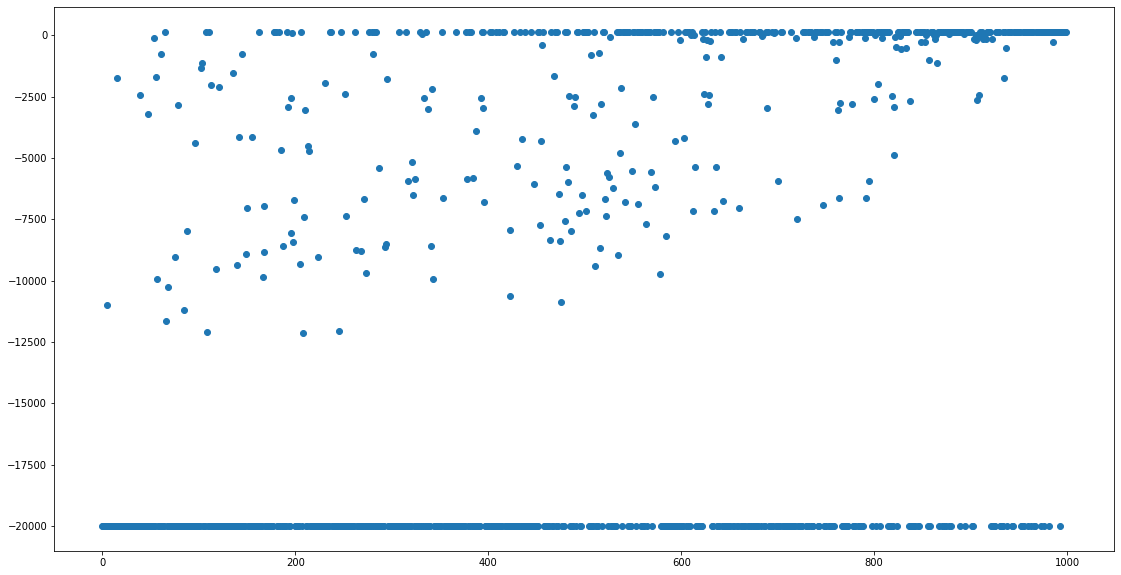

In [16]:
reward = list(filter(lambda x: x>-20000, total_reward))
plt.figure(figsize=(19, 10))
plt.plot(total_reward, 'o')

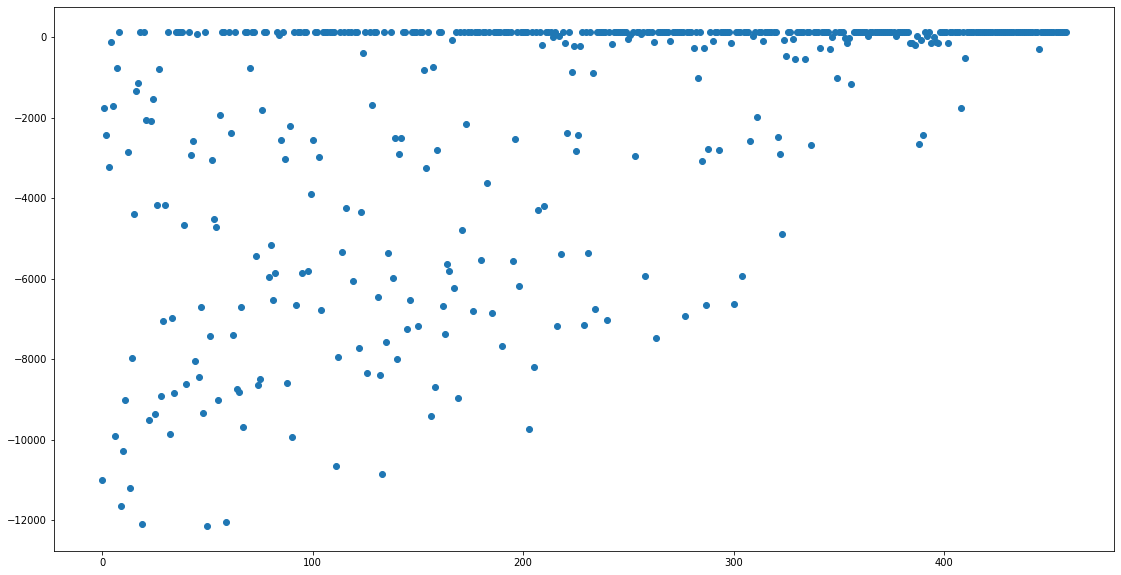

In [18]:
# Q['0.000564_93.914350_1.366027_516.528926_0.000000_0.100000']
plt.figure(figsize=(19, 10))
plt.plot(reward, 'o')

In [10]:
# np.argmax(Q['0.000909_103.305785_1.652893_625.000000_0.000000_0.100000'])

In [11]:
# reward = list(filter(lambda x: x>=-17000 and x<=-1000, total_reward))
# plt.plot(reward)

In [12]:
# env.reset()
# env.run(8)

In [13]:
env.encoded_state()

'1:0.000826_58.313423_1.652893_426.883410'

In [14]:
Q[env.encoded_state()]

[-0.05779992164740975,
 -0.026208021410053562,
 -8.918411928238168e-06,
 -0.01719850035375998,
 -0.011837948928854303,
 -0.02873439347210649,
 -0.0020370684374398707,
 -0.02044047421371431,
 -20000]